In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.70


In [3]:
import torch
from gcpds_cv_pykit.segmentation.datasets import SeedGermination
from gcpds_cv_pykit.segmentation.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.segmentation.visuals import random_sample_visualization
from gcpds_cv_pykit.segmentation.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.segmentation.baseline.models import DeepLabV3Plus
from gcpds_cv_pykit.segmentation.baseline import PerformanceModels

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
SeedGermination('lucasiturriago/seeds/versions/1')

Path to downloaded dataset files: /kaggle/input/seeds
Original dataset folder '/kaggle/input/seeds' is read-only. Using it directly.


'/kaggle/input/seeds'

In [6]:
!mkdir -p /kaggle/working/datasets/seeds/
!cp -r /kaggle/input/seeds/ /kaggle/working/datasets/

In [7]:
config = {"Dir of dataset":"./datasets/seeds","Batch size": 36,"Image size":(256,256),"Epochs":61,
          "Input size":(3,256,256),"Number of classes":3,"Single class train":None,"Single class test":None,
          "Single class valid":None,"Images folder":"images","Data augmentation":True,"Device":"cuda:0",
          "AMixPre":True,"Model":"DeepLabV3+","Pretrained":True,"Save results":True,"Train phases":True}

In [8]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Train/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 2458


Organizing masks: 100%|██████████| 2458/2458 [00:00<00:00, 81366.31it/s]


In [9]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Valid/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 231


Organizing masks: 100%|██████████| 231/231 [00:00<00:00, 64687.16it/s]


In [10]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/seeds/Test/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 118


Organizing masks: 100%|██████████| 118/118 [00:00<00:00, 66674.91it/s]


Images: torch.Size([36, 3, 256, 256]), Masks: torch.Size([36, 3, 256, 256])


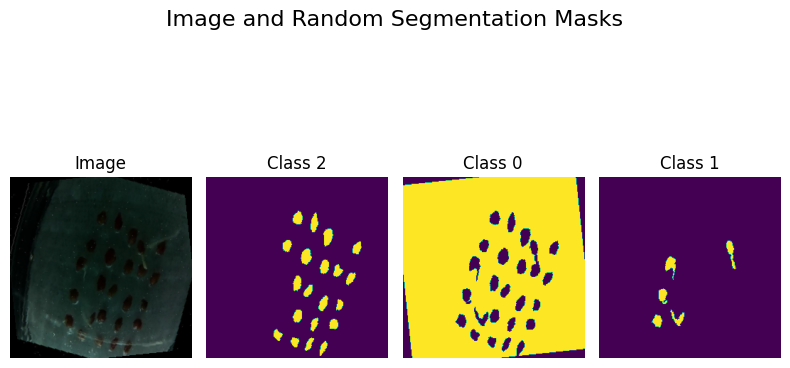

In [11]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

## ResNet34 backbone

### DICE Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "DICE"
config["Backbone"] = "resnet34"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-DeepLabV3+-ResNet34-DICE"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 183MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251113_210116-ws0py73j
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-DeepLabV3+-ResNet34-DICE
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/ws0py73j



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]


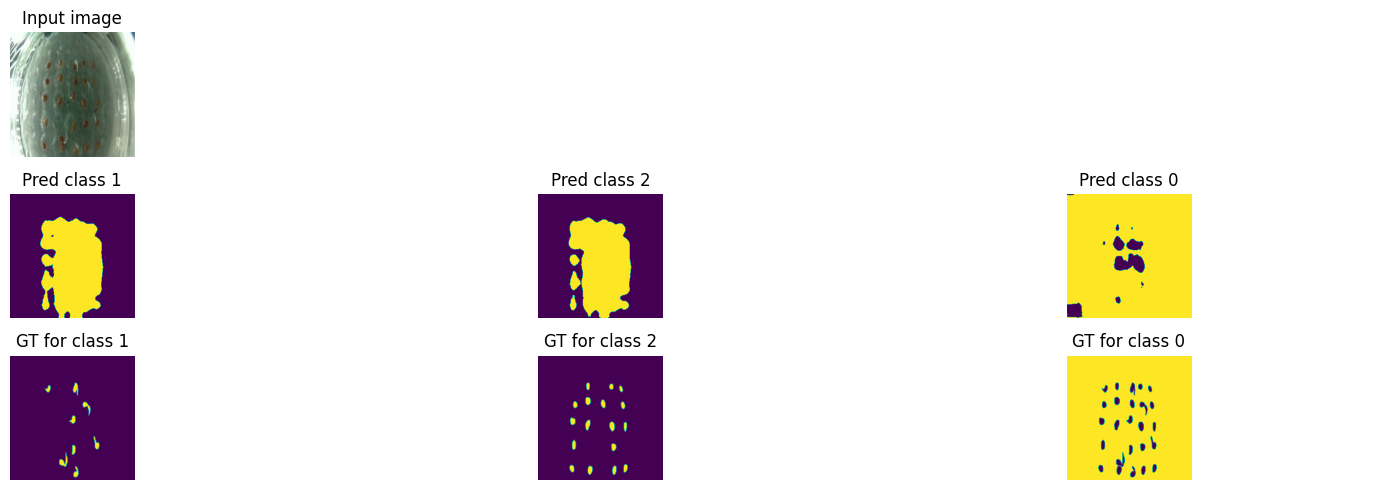

Train loss: 0.69676 | Time: 0m 34s | Val loss: 0.64337
Train_DICE_avg: 0.35622 | Train_Jaccard_avg: 0.29805 | Train_Sensitivity_avg: 0.35668 | Train_Specificity_avg: 0.73229 
Class 0 - Train_DICE: 0.87732 | Train_Jaccard: 0.78864 | Train_Sensitivity: 0.96365 | Train_Specificity: 0.20323 
Class 1 - Train_DICE: 0.03686 | Train_Jaccard: 0.01946 | Train_Sensitivity: 0.01961 | Train_Specificity: 0.99815 
Class 2 - Train_DICE: 0.15447 | Train_Jaccard: 0.08605 | Train_Sensitivity: 0.08678 | Train_Specificity: 0.99549 
Val_DICE_avg: 0.40146 | Val_Jaccard_avg: 0.35608 | Val_Sensitivity_avg: 0.36996 | Val_Specificity_avg: 0.73071 
Class 0 - Val_DICE: 0.96362 | Val_Jaccard: 0.93057 | Val_Sensitivity: 0.97088 | Val_Specificity: 0.19897 
Class 1 - Val_DICE: 0.04563 | Val_Jaccard: 0.02491 | Val_Sensitivity: 0.02520 | Val_Specificity: 0.99889 
Class 2 - Val_DICE: 0.19512 | Val_Jaccard: 0.11274 | Val_Sensitivity: 0.11381 | Val_Specificity: 0.99427 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.59949 | Time: 1m 5s | Val loss: 0.53084
Train_DICE_avg: 0.46866 | Train_Jaccard_avg: 0.41578 | Train_Sensitivity_avg: 0.43599 | Train_Specificity_avg: 0.81388 
Class 0 - Train_DICE: 0.96015 | Train_Jaccard: 0.92423 | Train_Sensitivity: 0.96207 | Train_Specificity: 0.44598 
Class 1 - Train_DICE: 0.07902 | Train_Jaccard: 0.04645 | Train_Sensitivity: 0.04946 | Train_Specificity: 0.99853 
Class 2 - Train_DICE: 0.36682 | Train_Jaccard: 0.27667 | Train_Sensitivity: 0.29645 | Train_Specificity: 0.99713 
Val_DICE_avg: 0.52446 | Val_Jaccard_avg: 0.48443 | Val_Sensitivity_avg: 0.49834 | Val_Specificity_avg: 0.96160 
Class 0 - Val_DICE: 0.99014 | Val_Jaccard: 0.98062 | Val_Sensitivity: 0.98750 | Val_Specificity: 0.88882 
Class 1 - Val_DICE: 0.10818 | Val_Jaccard: 0.06866 | Val_Sensitivity: 0.07948 | Val_Specificity: 0.99754 
Class 2 - Val_DICE: 0.47507 | Val_Jaccard: 0.40400 | Val_Sensitivity: 0.42805 | Val_Specificity: 0.99846 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


Train loss: 0.51621 | Time: 1m 35s | Val loss: 0.50039
Train_DICE_avg: 0.53855 | Train_Jaccard_avg: 0.48752 | Train_Sensitivity_avg: 0.50990 | Train_Specificity_avg: 0.89081 
Class 0 - Train_DICE: 0.97660 | Train_Jaccard: 0.95467 | Train_Sensitivity: 0.97995 | Train_Specificity: 0.67706 
Class 1 - Train_DICE: 0.11905 | Train_Jaccard: 0.07248 | Train_Sensitivity: 0.08081 | Train_Specificity: 0.99789 
Class 2 - Train_DICE: 0.51998 | Train_Jaccard: 0.43543 | Train_Sensitivity: 0.46894 | Train_Specificity: 0.99749 
Val_DICE_avg: 0.53802 | Val_Jaccard_avg: 0.49920 | Val_Sensitivity_avg: 0.51254 | Val_Specificity_avg: 0.96458 
Class 0 - Val_DICE: 0.99167 | Val_Jaccard: 0.98353 | Val_Sensitivity: 0.99042 | Val_Specificity: 0.89780 
Class 1 - Val_DICE: 0.11356 | Val_Jaccard: 0.07252 | Val_Sensitivity: 0.08500 | Val_Specificity: 0.99740 
Class 2 - Val_DICE: 0.50882 | Val_Jaccard: 0.44153 | Val_Sensitivity: 0.46220 | Val_Specificity: 0.99854 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]


Train loss: 0.47955 | Time: 2m 6s | Val loss: 0.48952
Train_DICE_avg: 0.56387 | Train_Jaccard_avg: 0.51260 | Train_Sensitivity_avg: 0.53507 | Train_Specificity_avg: 0.92723 
Class 0 - Train_DICE: 0.98257 | Train_Jaccard: 0.96596 | Train_Sensitivity: 0.98153 | Train_Specificity: 0.78683 
Class 1 - Train_DICE: 0.12836 | Train_Jaccard: 0.07856 | Train_Sensitivity: 0.08875 | Train_Specificity: 0.99770 
Class 2 - Train_DICE: 0.58070 | Train_Jaccard: 0.49326 | Train_Sensitivity: 0.53492 | Train_Specificity: 0.99715 
Val_DICE_avg: 0.54492 | Val_Jaccard_avg: 0.50623 | Val_Sensitivity_avg: 0.51988 | Val_Specificity_avg: 0.96678 
Class 0 - Val_DICE: 0.99294 | Val_Jaccard: 0.98602 | Val_Sensitivity: 0.99175 | Val_Specificity: 0.90833 
Class 1 - Val_DICE: 0.11638 | Val_Jaccard: 0.07457 | Val_Sensitivity: 0.08673 | Val_Specificity: 0.99749 
Class 2 - Val_DICE: 0.52543 | Val_Jaccard: 0.45810 | Val_Sensitivity: 0.48117 | Val_Specificity: 0.99453 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


Train loss: 0.44575 | Time: 2m 36s | Val loss: 0.44529
Train_DICE_avg: 0.59643 | Train_Jaccard_avg: 0.54360 | Train_Sensitivity_avg: 0.56755 | Train_Specificity_avg: 0.94883 
Class 0 - Train_DICE: 0.98559 | Train_Jaccard: 0.97178 | Train_Sensitivity: 0.98184 | Train_Specificity: 0.85191 
Class 1 - Train_DICE: 0.13521 | Train_Jaccard: 0.08300 | Train_Sensitivity: 0.09338 | Train_Specificity: 0.99774 
Class 2 - Train_DICE: 0.66848 | Train_Jaccard: 0.57602 | Train_Sensitivity: 0.62745 | Train_Specificity: 0.99684 
Val_DICE_avg: 0.58978 | Val_Jaccard_avg: 0.54822 | Val_Sensitivity_avg: 0.56463 | Val_Specificity_avg: 0.97223 
Class 0 - Val_DICE: 0.99392 | Val_Jaccard: 0.98796 | Val_Sensitivity: 0.99228 | Val_Specificity: 0.92295 
Class 1 - Val_DICE: 0.12683 | Val_Jaccard: 0.08101 | Val_Sensitivity: 0.09302 | Val_Specificity: 0.99759 
Class 2 - Val_DICE: 0.64858 | Val_Jaccard: 0.57571 | Val_Sensitivity: 0.60860 | Val_Specificity: 0.99614 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


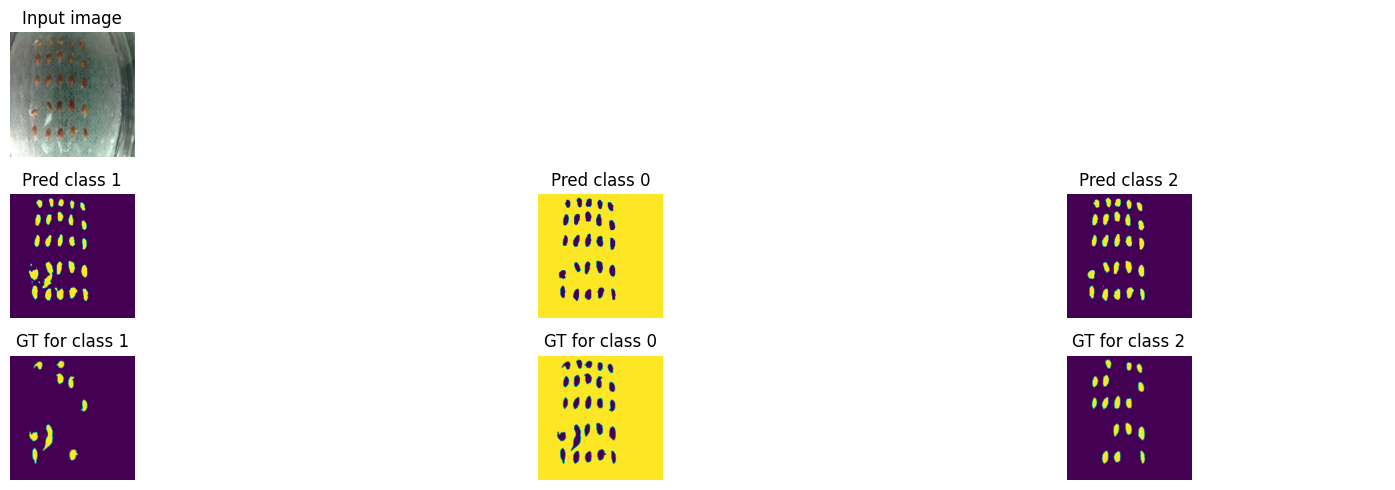

Train loss: 0.42246 | Time: 3m 7s | Val loss: 0.41532
Train_DICE_avg: 0.61299 | Train_Jaccard_avg: 0.55865 | Train_Sensitivity_avg: 0.58346 | Train_Specificity_avg: 0.95861 
Class 0 - Train_DICE: 0.98651 | Train_Jaccard: 0.97354 | Train_Sensitivity: 0.98105 | Train_Specificity: 0.88153 
Class 1 - Train_DICE: 0.14666 | Train_Jaccard: 0.09074 | Train_Sensitivity: 0.10254 | Train_Specificity: 0.99767 
Class 2 - Train_DICE: 0.70581 | Train_Jaccard: 0.61167 | Train_Sensitivity: 0.66679 | Train_Specificity: 0.99664 
Val_DICE_avg: 0.62186 | Val_Jaccard_avg: 0.57612 | Val_Sensitivity_avg: 0.59651 | Val_Specificity_avg: 0.97859 
Class 0 - Val_DICE: 0.99465 | Val_Jaccard: 0.98940 | Val_Sensitivity: 0.99236 | Val_Specificity: 0.94264 
Class 1 - Val_DICE: 0.14954 | Val_Jaccard: 0.09616 | Val_Sensitivity: 0.11307 | Val_Specificity: 0.99742 
Class 2 - Val_DICE: 0.72138 | Val_Jaccard: 0.64280 | Val_Sensitivity: 0.68408 | Val_Specificity: 0.99571 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Train loss: 0.40068 | Time: 3m 38s | Val loss: 0.39759
Train_DICE_avg: 0.62852 | Train_Jaccard_avg: 0.57221 | Train_Sensitivity_avg: 0.60020 | Train_Specificity_avg: 0.96501 
Class 0 - Train_DICE: 0.98709 | Train_Jaccard: 0.97468 | Train_Sensitivity: 0.97996 | Train_Specificity: 0.90109 
Class 1 - Train_DICE: 0.16790 | Train_Jaccard: 0.10592 | Train_Sensitivity: 0.12347 | Train_Specificity: 0.99761 
Class 2 - Train_DICE: 0.73056 | Train_Jaccard: 0.63604 | Train_Sensitivity: 0.69718 | Train_Specificity: 0.99635 
Val_DICE_avg: 0.63211 | Val_Jaccard_avg: 0.58482 | Val_Sensitivity_avg: 0.60790 | Val_Specificity_avg: 0.98087 
Class 0 - Val_DICE: 0.99486 | Val_Jaccard: 0.98982 | Val_Sensitivity: 0.99224 | Val_Specificity: 0.94795 
Class 1 - Val_DICE: 0.17723 | Val_Jaccard: 0.11763 | Val_Sensitivity: 0.13939 | Val_Specificity: 0.99774 
Class 2 - Val_DICE: 0.72425 | Val_Jaccard: 0.64700 | Val_Sensitivity: 0.69209 | Val_Specificity: 0.99693 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.38603 | Time: 4m 8s | Val loss: 0.38197
Train_DICE_avg: 0.64137 | Train_Jaccard_avg: 0.58302 | Train_Sensitivity_avg: 0.61541 | Train_Specificity_avg: 0.96764 
Class 0 - Train_DICE: 0.98725 | Train_Jaccard: 0.97498 | Train_Sensitivity: 0.97987 | Train_Specificity: 0.90926 
Class 1 - Train_DICE: 0.20280 | Train_Jaccard: 0.13319 | Train_Sensitivity: 0.16535 | Train_Specificity: 0.99732 
Class 2 - Train_DICE: 0.73406 | Train_Jaccard: 0.64089 | Train_Sensitivity: 0.70100 | Train_Specificity: 0.99633 
Val_DICE_avg: 0.64475 | Val_Jaccard_avg: 0.59638 | Val_Sensitivity_avg: 0.63016 | Val_Specificity_avg: 0.98063 
Class 0 - Val_DICE: 0.99477 | Val_Jaccard: 0.98965 | Val_Sensitivity: 0.99226 | Val_Specificity: 0.94787 
Class 1 - Val_DICE: 0.21463 | Val_Jaccard: 0.15184 | Val_Sensitivity: 0.21052 | Val_Specificity: 0.99687 
Class 2 - Val_DICE: 0.72485 | Val_Jaccard: 0.64764 | Val_Sensitivity: 0.68770 | Val_Specificity: 0.99714 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.37226 | Time: 4m 39s | Val loss: 0.37412
Train_DICE_avg: 0.65467 | Train_Jaccard_avg: 0.59399 | Train_Sensitivity_avg: 0.63159 | Train_Specificity_avg: 0.96997 
Class 0 - Train_DICE: 0.98709 | Train_Jaccard: 0.97467 | Train_Sensitivity: 0.97910 | Train_Specificity: 0.91662 
Class 1 - Train_DICE: 0.23518 | Train_Jaccard: 0.15910 | Train_Sensitivity: 0.20643 | Train_Specificity: 0.99689 
Class 2 - Train_DICE: 0.74174 | Train_Jaccard: 0.64819 | Train_Sensitivity: 0.70923 | Train_Specificity: 0.99639 
Val_DICE_avg: 0.65334 | Val_Jaccard_avg: 0.60321 | Val_Sensitivity_avg: 0.63109 | Val_Specificity_avg: 0.98374 
Class 0 - Val_DICE: 0.99491 | Val_Jaccard: 0.98991 | Val_Sensitivity: 0.99191 | Val_Specificity: 0.95683 
Class 1 - Val_DICE: 0.23836 | Val_Jaccard: 0.16913 | Val_Sensitivity: 0.21077 | Val_Specificity: 0.99717 
Class 2 - Val_DICE: 0.72674 | Val_Jaccard: 0.65058 | Val_Sensitivity: 0.69059 | Val_Specificity: 0.99722 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


Train loss: 0.35058 | Time: 5m 10s | Val loss: 0.33185
Train_DICE_avg: 0.67863 | Train_Jaccard_avg: 0.61245 | Train_Sensitivity_avg: 0.65638 | Train_Specificity_avg: 0.97349 
Class 0 - Train_DICE: 0.98725 | Train_Jaccard: 0.97499 | Train_Sensitivity: 0.97866 | Train_Specificity: 0.92728 
Class 1 - Train_DICE: 0.25910 | Train_Jaccard: 0.17820 | Train_Sensitivity: 0.23832 | Train_Specificity: 0.99670 
Class 2 - Train_DICE: 0.78954 | Train_Jaccard: 0.68416 | Train_Sensitivity: 0.75217 | Train_Specificity: 0.99649 
Val_DICE_avg: 0.69592 | Val_Jaccard_avg: 0.63716 | Val_Sensitivity_avg: 0.67915 | Val_Specificity_avg: 0.98513 
Class 0 - Val_DICE: 0.99497 | Val_Jaccard: 0.99003 | Val_Sensitivity: 0.99165 | Val_Specificity: 0.96112 
Class 1 - Val_DICE: 0.26442 | Val_Jaccard: 0.19044 | Val_Sensitivity: 0.23501 | Val_Specificity: 0.99737 
Class 2 - Val_DICE: 0.82839 | Val_Jaccard: 0.73102 | Val_Sensitivity: 0.81080 | Val_Specificity: 0.99689 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


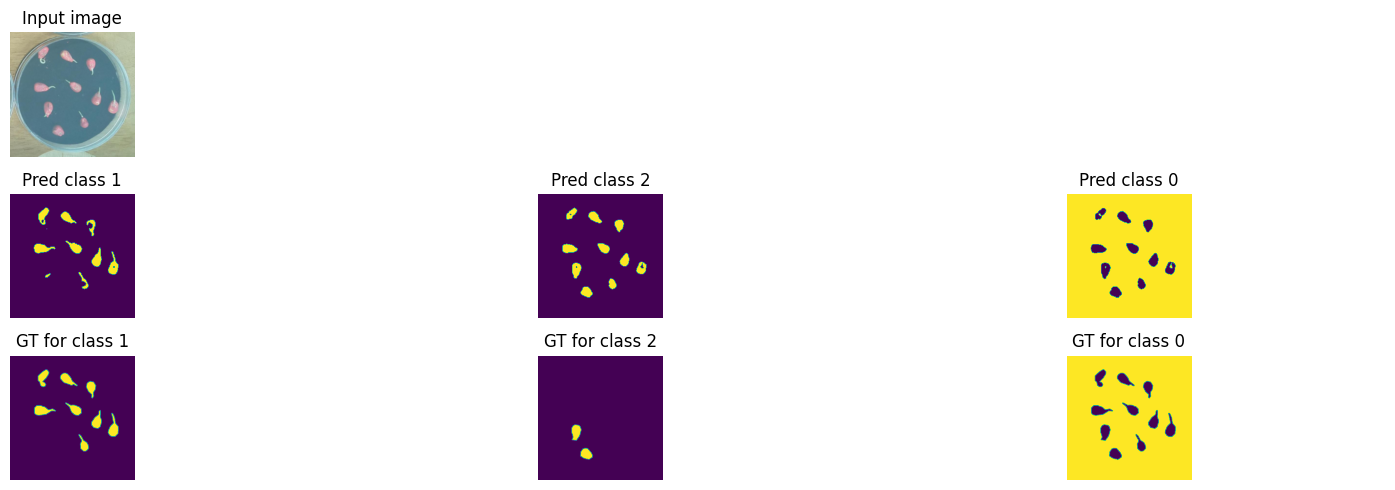

Train loss: 0.32973 | Time: 5m 47s | Val loss: 0.32285
Train_DICE_avg: 0.69268 | Train_Jaccard_avg: 0.62544 | Train_Sensitivity_avg: 0.67374 | Train_Specificity_avg: 0.97384 
Class 0 - Train_DICE: 0.98809 | Train_Jaccard: 0.97662 | Train_Sensitivity: 0.98069 | Train_Specificity: 0.92853 
Class 1 - Train_DICE: 0.27392 | Train_Jaccard: 0.19169 | Train_Sensitivity: 0.25648 | Train_Specificity: 0.99672 
Class 2 - Train_DICE: 0.81603 | Train_Jaccard: 0.70800 | Train_Sensitivity: 0.78406 | Train_Specificity: 0.99628 
Val_DICE_avg: 0.70032 | Val_Jaccard_avg: 0.64250 | Val_Sensitivity_avg: 0.67550 | Val_Specificity_avg: 0.97592 
Class 0 - Val_DICE: 0.99540 | Val_Jaccard: 0.99089 | Val_Sensitivity: 0.99336 | Val_Specificity: 0.93278 
Class 1 - Val_DICE: 0.26701 | Val_Jaccard: 0.19341 | Val_Sensitivity: 0.22417 | Val_Specificity: 0.99785 
Class 2 - Val_DICE: 0.83853 | Val_Jaccard: 0.74319 | Val_Sensitivity: 0.80896 | Val_Specificity: 0.99714 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]


Train loss: 0.31958 | Time: 6m 24s | Val loss: 0.31300
Train_DICE_avg: 0.69856 | Train_Jaccard_avg: 0.63152 | Train_Sensitivity_avg: 0.68116 | Train_Specificity_avg: 0.97186 
Class 0 - Train_DICE: 0.98860 | Train_Jaccard: 0.97760 | Train_Sensitivity: 0.98220 | Train_Specificity: 0.92250 
Class 1 - Train_DICE: 0.28626 | Train_Jaccard: 0.20364 | Train_Sensitivity: 0.27065 | Train_Specificity: 0.99682 
Class 2 - Train_DICE: 0.82083 | Train_Jaccard: 0.71332 | Train_Sensitivity: 0.79062 | Train_Specificity: 0.99626 
Val_DICE_avg: 0.70842 | Val_Jaccard_avg: 0.65021 | Val_Sensitivity_avg: 0.69791 | Val_Specificity_avg: 0.96950 
Class 0 - Val_DICE: 0.99547 | Val_Jaccard: 0.99102 | Val_Sensitivity: 0.99393 | Val_Specificity: 0.91466 
Class 1 - Val_DICE: 0.28765 | Val_Jaccard: 0.21199 | Val_Sensitivity: 0.27908 | Val_Specificity: 0.99698 
Class 2 - Val_DICE: 0.84215 | Val_Jaccard: 0.74761 | Val_Sensitivity: 0.82073 | Val_Specificity: 0.99686 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.31333 | Time: 7m 1s | Val loss: 0.30951
Train_DICE_avg: 0.70228 | Train_Jaccard_avg: 0.63501 | Train_Sensitivity_avg: 0.68735 | Train_Specificity_avg: 0.97044 
Class 0 - Train_DICE: 0.98880 | Train_Jaccard: 0.97800 | Train_Sensitivity: 0.98284 | Train_Specificity: 0.91840 
Class 1 - Train_DICE: 0.29361 | Train_Jaccard: 0.20953 | Train_Sensitivity: 0.27955 | Train_Specificity: 0.99680 
Class 2 - Train_DICE: 0.82443 | Train_Jaccard: 0.71749 | Train_Sensitivity: 0.79967 | Train_Specificity: 0.99613 
Val_DICE_avg: 0.70988 | Val_Jaccard_avg: 0.65116 | Val_Sensitivity_avg: 0.69518 | Val_Specificity_avg: 0.96239 
Class 0 - Val_DICE: 0.99545 | Val_Jaccard: 0.99097 | Val_Sensitivity: 0.99446 | Val_Specificity: 0.89304 
Class 1 - Val_DICE: 0.29276 | Val_Jaccard: 0.21629 | Val_Sensitivity: 0.29126 | Val_Specificity: 0.99688 
Class 2 - Val_DICE: 0.84142 | Val_Jaccard: 0.74623 | Val_Sensitivity: 0.79982 | Val_Specificity: 0.99726 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Train loss: 0.30802 | Time: 7m 38s | Val loss: 0.30565
Train_DICE_avg: 0.70641 | Train_Jaccard_avg: 0.63928 | Train_Sensitivity_avg: 0.69152 | Train_Specificity_avg: 0.96706 
Class 0 - Train_DICE: 0.98905 | Train_Jaccard: 0.97847 | Train_Sensitivity: 0.98397 | Train_Specificity: 0.90805 
Class 1 - Train_DICE: 0.30274 | Train_Jaccard: 0.21811 | Train_Sensitivity: 0.28966 | Train_Specificity: 0.99690 
Class 2 - Train_DICE: 0.82744 | Train_Jaccard: 0.72125 | Train_Sensitivity: 0.80092 | Train_Specificity: 0.99623 
Val_DICE_avg: 0.71272 | Val_Jaccard_avg: 0.65450 | Val_Sensitivity_avg: 0.69359 | Val_Specificity_avg: 0.96224 
Class 0 - Val_DICE: 0.99548 | Val_Jaccard: 0.99104 | Val_Sensitivity: 0.99454 | Val_Specificity: 0.89214 
Class 1 - Val_DICE: 0.29674 | Val_Jaccard: 0.22027 | Val_Sensitivity: 0.26203 | Val_Specificity: 0.99758 
Class 2 - Val_DICE: 0.84595 | Val_Jaccard: 0.75220 | Val_Sensitivity: 0.82419 | Val_Specificity: 0.99699 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.30475 | Time: 8m 14s | Val loss: 0.30007
Train_DICE_avg: 0.70824 | Train_Jaccard_avg: 0.64125 | Train_Sensitivity_avg: 0.69460 | Train_Specificity_avg: 0.96698 
Class 0 - Train_DICE: 0.98943 | Train_Jaccard: 0.97921 | Train_Sensitivity: 0.98469 | Train_Specificity: 0.90792 
Class 1 - Train_DICE: 0.30510 | Train_Jaccard: 0.22008 | Train_Sensitivity: 0.29463 | Train_Specificity: 0.99680 
Class 2 - Train_DICE: 0.83018 | Train_Jaccard: 0.72445 | Train_Sensitivity: 0.80448 | Train_Specificity: 0.99621 
Val_DICE_avg: 0.71730 | Val_Jaccard_avg: 0.65905 | Val_Sensitivity_avg: 0.70582 | Val_Specificity_avg: 0.96087 
Class 0 - Val_DICE: 0.99551 | Val_Jaccard: 0.99110 | Val_Sensitivity: 0.99472 | Val_Specificity: 0.88836 
Class 1 - Val_DICE: 0.30938 | Val_Jaccard: 0.23204 | Val_Sensitivity: 0.30270 | Val_Specificity: 0.99709 
Class 2 - Val_DICE: 0.84702 | Val_Jaccard: 0.75400 | Val_Sensitivity: 0.82004 | Val_Specificity: 0.99715 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


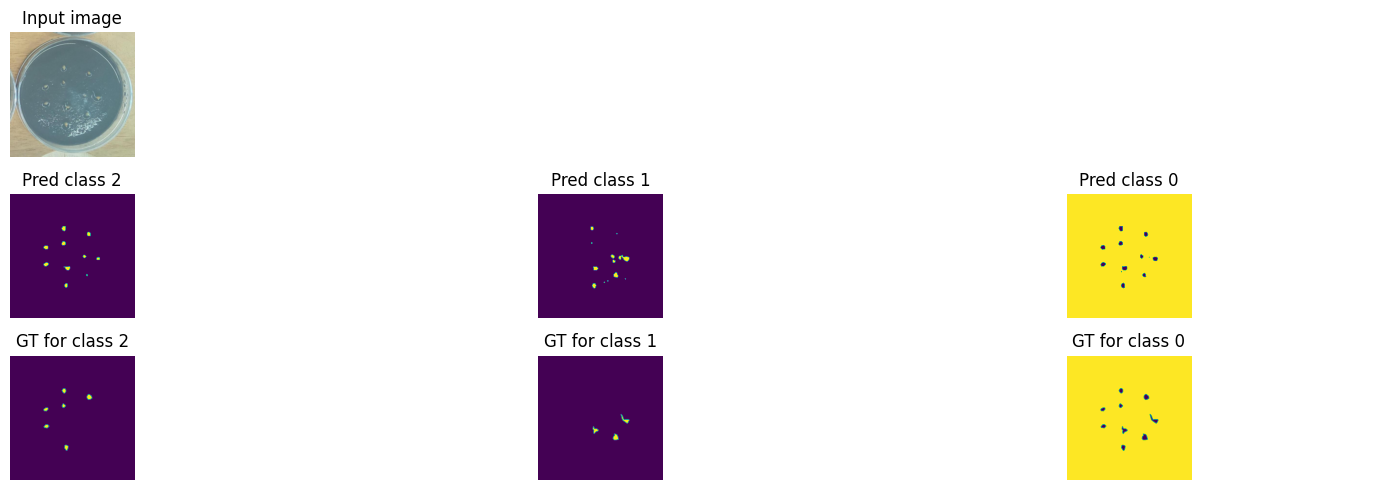

Train loss: 0.30187 | Time: 8m 52s | Val loss: 0.29884
Train_DICE_avg: 0.71110 | Train_Jaccard_avg: 0.64409 | Train_Sensitivity_avg: 0.69850 | Train_Specificity_avg: 0.96525 
Class 0 - Train_DICE: 0.98959 | Train_Jaccard: 0.97953 | Train_Sensitivity: 0.98519 | Train_Specificity: 0.90256 
Class 1 - Train_DICE: 0.31211 | Train_Jaccard: 0.22635 | Train_Sensitivity: 0.30369 | Train_Specificity: 0.99690 
Class 2 - Train_DICE: 0.83159 | Train_Jaccard: 0.72638 | Train_Sensitivity: 0.80662 | Train_Specificity: 0.99628 
Val_DICE_avg: 0.72249 | Val_Jaccard_avg: 0.66401 | Val_Sensitivity_avg: 0.70141 | Val_Specificity_avg: 0.95559 
Class 0 - Val_DICE: 0.99554 | Val_Jaccard: 0.99115 | Val_Sensitivity: 0.99527 | Val_Specificity: 0.87193 
Class 1 - Val_DICE: 0.32500 | Val_Jaccard: 0.24742 | Val_Sensitivity: 0.29983 | Val_Specificity: 0.99760 
Class 2 - Val_DICE: 0.84694 | Val_Jaccard: 0.75347 | Val_Sensitivity: 0.80914 | Val_Specificity: 0.99726 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


Train loss: 0.29866 | Time: 9m 29s | Val loss: 0.29306
Train_DICE_avg: 0.71323 | Train_Jaccard_avg: 0.64658 | Train_Sensitivity_avg: 0.70229 | Train_Specificity_avg: 0.96555 
Class 0 - Train_DICE: 0.98989 | Train_Jaccard: 0.98010 | Train_Sensitivity: 0.98597 | Train_Specificity: 0.90352 
Class 1 - Train_DICE: 0.31632 | Train_Jaccard: 0.23121 | Train_Sensitivity: 0.30998 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.83348 | Train_Jaccard: 0.72844 | Train_Sensitivity: 0.81091 | Train_Specificity: 0.99617 
Val_DICE_avg: 0.72425 | Val_Jaccard_avg: 0.66698 | Val_Sensitivity_avg: 0.71345 | Val_Specificity_avg: 0.95864 
Class 0 - Val_DICE: 0.99575 | Val_Jaccard: 0.99157 | Val_Sensitivity: 0.99548 | Val_Specificity: 0.88131 
Class 1 - Val_DICE: 0.32629 | Val_Jaccard: 0.25077 | Val_Sensitivity: 0.32071 | Val_Specificity: 0.99747 
Class 2 - Val_DICE: 0.85070 | Val_Jaccard: 0.75860 | Val_Sensitivity: 0.82415 | Val_Specificity: 0.99713 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


Train loss: 0.29643 | Time: 10m 6s | Val loss: 0.29039
Train_DICE_avg: 0.71623 | Train_Jaccard_avg: 0.64936 | Train_Sensitivity_avg: 0.70529 | Train_Specificity_avg: 0.96494 
Class 0 - Train_DICE: 0.98986 | Train_Jaccard: 0.98003 | Train_Sensitivity: 0.98586 | Train_Specificity: 0.90170 
Class 1 - Train_DICE: 0.32505 | Train_Jaccard: 0.23891 | Train_Sensitivity: 0.31966 | Train_Specificity: 0.99689 
Class 2 - Train_DICE: 0.83380 | Train_Jaccard: 0.72913 | Train_Sensitivity: 0.81035 | Train_Specificity: 0.99622 
Val_DICE_avg: 0.72843 | Val_Jaccard_avg: 0.67150 | Val_Sensitivity_avg: 0.72156 | Val_Specificity_avg: 0.95662 
Class 0 - Val_DICE: 0.99585 | Val_Jaccard: 0.99177 | Val_Sensitivity: 0.99570 | Val_Specificity: 0.87525 
Class 1 - Val_DICE: 0.33901 | Val_Jaccard: 0.26485 | Val_Sensitivity: 0.35214 | Val_Specificity: 0.99740 
Class 2 - Val_DICE: 0.85043 | Val_Jaccard: 0.75788 | Val_Sensitivity: 0.81685 | Val_Specificity: 0.99721 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


Train loss: 0.29164 | Time: 10m 42s | Val loss: 0.24937
Train_DICE_avg: 0.72552 | Train_Jaccard_avg: 0.65982 | Train_Sensitivity_avg: 0.72298 | Train_Specificity_avg: 0.96649 
Class 0 - Train_DICE: 0.99006 | Train_Jaccard: 0.98043 | Train_Sensitivity: 0.98581 | Train_Specificity: 0.90635 
Class 1 - Train_DICE: 0.34935 | Train_Jaccard: 0.26585 | Train_Sensitivity: 0.36735 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.83714 | Train_Jaccard: 0.73317 | Train_Sensitivity: 0.81579 | Train_Specificity: 0.99617 
Val_DICE_avg: 0.77051 | Val_Jaccard_avg: 0.71817 | Val_Sensitivity_avg: 0.79938 | Val_Specificity_avg: 0.95243 
Class 0 - Val_DICE: 0.99565 | Val_Jaccard: 0.99137 | Val_Sensitivity: 0.99580 | Val_Specificity: 0.86306 
Class 1 - Val_DICE: 0.46643 | Val_Jaccard: 0.40665 | Val_Sensitivity: 0.58532 | Val_Specificity: 0.99694 
Class 2 - Val_DICE: 0.84946 | Val_Jaccard: 0.75649 | Val_Sensitivity: 0.81702 | Val_Specificity: 0.99729 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]


Train loss: 0.26995 | Time: 11m 19s | Val loss: 0.24719
Train_DICE_avg: 0.75400 | Train_Jaccard_avg: 0.68996 | Train_Sensitivity_avg: 0.77424 | Train_Specificity_avg: 0.96725 
Class 0 - Train_DICE: 0.99002 | Train_Jaccard: 0.98034 | Train_Sensitivity: 0.98550 | Train_Specificity: 0.90901 
Class 1 - Train_DICE: 0.43608 | Train_Jaccard: 0.35823 | Train_Sensitivity: 0.52084 | Train_Specificity: 0.99670 
Class 2 - Train_DICE: 0.83591 | Train_Jaccard: 0.73130 | Train_Sensitivity: 0.81638 | Train_Specificity: 0.99605 
Val_DICE_avg: 0.77141 | Val_Jaccard_avg: 0.71916 | Val_Sensitivity_avg: 0.79644 | Val_Specificity_avg: 0.96229 
Class 0 - Val_DICE: 0.99609 | Val_Jaccard: 0.99224 | Val_Sensitivity: 0.99576 | Val_Specificity: 0.89280 
Class 1 - Val_DICE: 0.46465 | Val_Jaccard: 0.40325 | Val_Sensitivity: 0.55649 | Val_Specificity: 0.99717 
Class 2 - Val_DICE: 0.85348 | Val_Jaccard: 0.76198 | Val_Sensitivity: 0.83708 | Val_Specificity: 0.99690 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


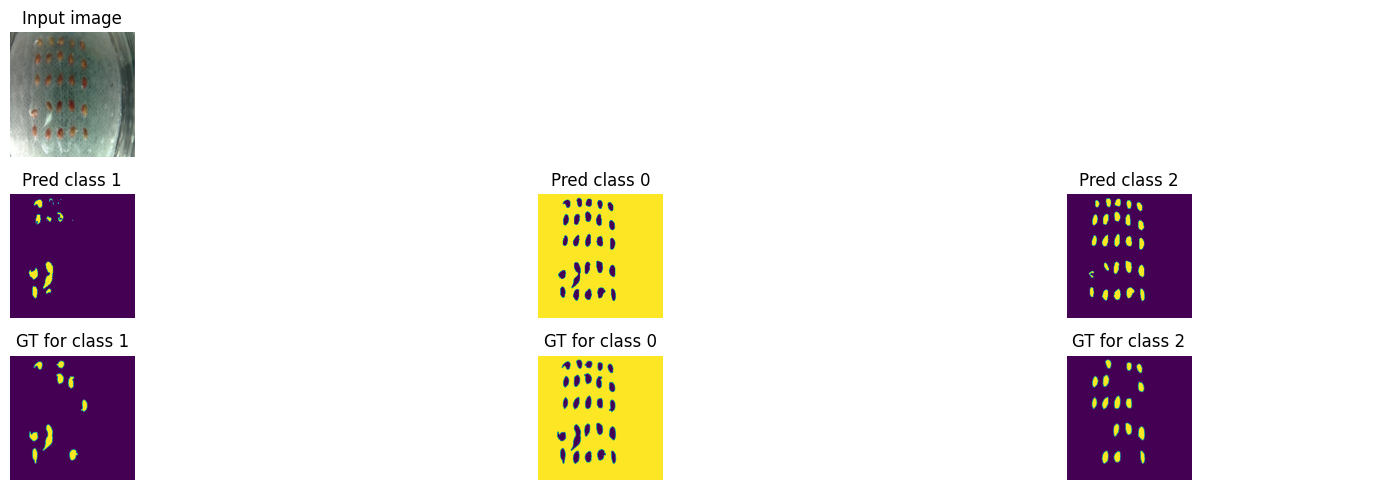

Train loss: 0.25707 | Time: 11m 59s | Val loss: 0.21538
Train_DICE_avg: 0.77211 | Train_Jaccard_avg: 0.70896 | Train_Sensitivity_avg: 0.80081 | Train_Specificity_avg: 0.96547 
Class 0 - Train_DICE: 0.99020 | Train_Jaccard: 0.98071 | Train_Sensitivity: 0.98644 | Train_Specificity: 0.90384 
Class 1 - Train_DICE: 0.49004 | Train_Jaccard: 0.41439 | Train_Sensitivity: 0.59941 | Train_Specificity: 0.99649 
Class 2 - Train_DICE: 0.83610 | Train_Jaccard: 0.73177 | Train_Sensitivity: 0.81657 | Train_Specificity: 0.99609 
Val_DICE_avg: 0.80185 | Val_Jaccard_avg: 0.75043 | Val_Sensitivity_avg: 0.83002 | Val_Specificity_avg: 0.96189 
Class 0 - Val_DICE: 0.99612 | Val_Jaccard: 0.99230 | Val_Sensitivity: 0.99608 | Val_Specificity: 0.89124 
Class 1 - Val_DICE: 0.55235 | Val_Jaccard: 0.49246 | Val_Sensitivity: 0.65293 | Val_Specificity: 0.99744 
Class 2 - Val_DICE: 0.85708 | Val_Jaccard: 0.76654 | Val_Sensitivity: 0.84106 | Val_Specificity: 0.99698 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.24688 | Time: 12m 38s | Val loss: 0.21147
Train_DICE_avg: 0.78068 | Train_Jaccard_avg: 0.71800 | Train_Sensitivity_avg: 0.80783 | Train_Specificity_avg: 0.96484 
Class 0 - Train_DICE: 0.99065 | Train_Jaccard: 0.98157 | Train_Sensitivity: 0.98738 | Train_Specificity: 0.90173 
Class 1 - Train_DICE: 0.51373 | Train_Jaccard: 0.43810 | Train_Sensitivity: 0.61592 | Train_Specificity: 0.99669 
Class 2 - Train_DICE: 0.83766 | Train_Jaccard: 0.73433 | Train_Sensitivity: 0.82019 | Train_Specificity: 0.99609 
Val_DICE_avg: 0.80315 | Val_Jaccard_avg: 0.75156 | Val_Sensitivity_avg: 0.82497 | Val_Specificity_avg: 0.95698 
Class 0 - Val_DICE: 0.99601 | Val_Jaccard: 0.99207 | Val_Sensitivity: 0.99633 | Val_Specificity: 0.87639 
Class 1 - Val_DICE: 0.55512 | Val_Jaccard: 0.49451 | Val_Sensitivity: 0.64044 | Val_Specificity: 0.99753 
Class 2 - Val_DICE: 0.85834 | Val_Jaccard: 0.76810 | Val_Sensitivity: 0.83812 | Val_Specificity: 0.99702 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


Train loss: 0.24515 | Time: 13m 17s | Val loss: 0.20905
Train_DICE_avg: 0.78087 | Train_Jaccard_avg: 0.71794 | Train_Sensitivity_avg: 0.80682 | Train_Specificity_avg: 0.96411 
Class 0 - Train_DICE: 0.99048 | Train_Jaccard: 0.98125 | Train_Sensitivity: 0.98745 | Train_Specificity: 0.89947 
Class 1 - Train_DICE: 0.51136 | Train_Jaccard: 0.43460 | Train_Sensitivity: 0.61024 | Train_Specificity: 0.99672 
Class 2 - Train_DICE: 0.84076 | Train_Jaccard: 0.73797 | Train_Sensitivity: 0.82275 | Train_Specificity: 0.99612 
Val_DICE_avg: 0.80767 | Val_Jaccard_avg: 0.75532 | Val_Sensitivity_avg: 0.83563 | Val_Specificity_avg: 0.95879 
Class 0 - Val_DICE: 0.99604 | Val_Jaccard: 0.99214 | Val_Sensitivity: 0.99619 | Val_Specificity: 0.88220 
Class 1 - Val_DICE: 0.56890 | Val_Jaccard: 0.50592 | Val_Sensitivity: 0.66239 | Val_Specificity: 0.99730 
Class 2 - Val_DICE: 0.85807 | Val_Jaccard: 0.76790 | Val_Sensitivity: 0.84830 | Val_Specificity: 0.99687 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]


Train loss: 0.24347 | Time: 13m 56s | Val loss: 0.20777
Train_DICE_avg: 0.78529 | Train_Jaccard_avg: 0.72326 | Train_Sensitivity_avg: 0.81836 | Train_Specificity_avg: 0.96383 
Class 0 - Train_DICE: 0.99075 | Train_Jaccard: 0.98177 | Train_Sensitivity: 0.98811 | Train_Specificity: 0.89864 
Class 1 - Train_DICE: 0.52492 | Train_Jaccard: 0.45056 | Train_Sensitivity: 0.64593 | Train_Specificity: 0.99670 
Class 2 - Train_DICE: 0.84022 | Train_Jaccard: 0.73746 | Train_Sensitivity: 0.82104 | Train_Specificity: 0.99615 
Val_DICE_avg: 0.80796 | Val_Jaccard_avg: 0.75725 | Val_Sensitivity_avg: 0.84440 | Val_Specificity_avg: 0.95639 
Class 0 - Val_DICE: 0.99604 | Val_Jaccard: 0.99214 | Val_Sensitivity: 0.99650 | Val_Specificity: 0.87483 
Class 1 - Val_DICE: 0.56788 | Val_Jaccard: 0.50922 | Val_Sensitivity: 0.70202 | Val_Specificity: 0.99700 
Class 2 - Val_DICE: 0.85995 | Val_Jaccard: 0.77040 | Val_Sensitivity: 0.83470 | Val_Specificity: 0.99734 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.23898 | Time: 14m 35s | Val loss: 0.20571
Train_DICE_avg: 0.78621 | Train_Jaccard_avg: 0.72365 | Train_Sensitivity_avg: 0.81447 | Train_Specificity_avg: 0.96297 
Class 0 - Train_DICE: 0.99074 | Train_Jaccard: 0.98175 | Train_Sensitivity: 0.98817 | Train_Specificity: 0.89605 
Class 1 - Train_DICE: 0.52451 | Train_Jaccard: 0.44776 | Train_Sensitivity: 0.62673 | Train_Specificity: 0.99681 
Class 2 - Train_DICE: 0.84338 | Train_Jaccard: 0.74145 | Train_Sensitivity: 0.82852 | Train_Specificity: 0.99605 
Val_DICE_avg: 0.80871 | Val_Jaccard_avg: 0.75800 | Val_Sensitivity_avg: 0.84112 | Val_Specificity_avg: 0.95838 
Class 0 - Val_DICE: 0.99615 | Val_Jaccard: 0.99236 | Val_Sensitivity: 0.99669 | Val_Specificity: 0.88107 
Class 1 - Val_DICE: 0.56408 | Val_Jaccard: 0.50340 | Val_Sensitivity: 0.65697 | Val_Specificity: 0.99765 
Class 2 - Val_DICE: 0.86590 | Val_Jaccard: 0.77826 | Val_Sensitivity: 0.86970 | Val_Specificity: 0.99641 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


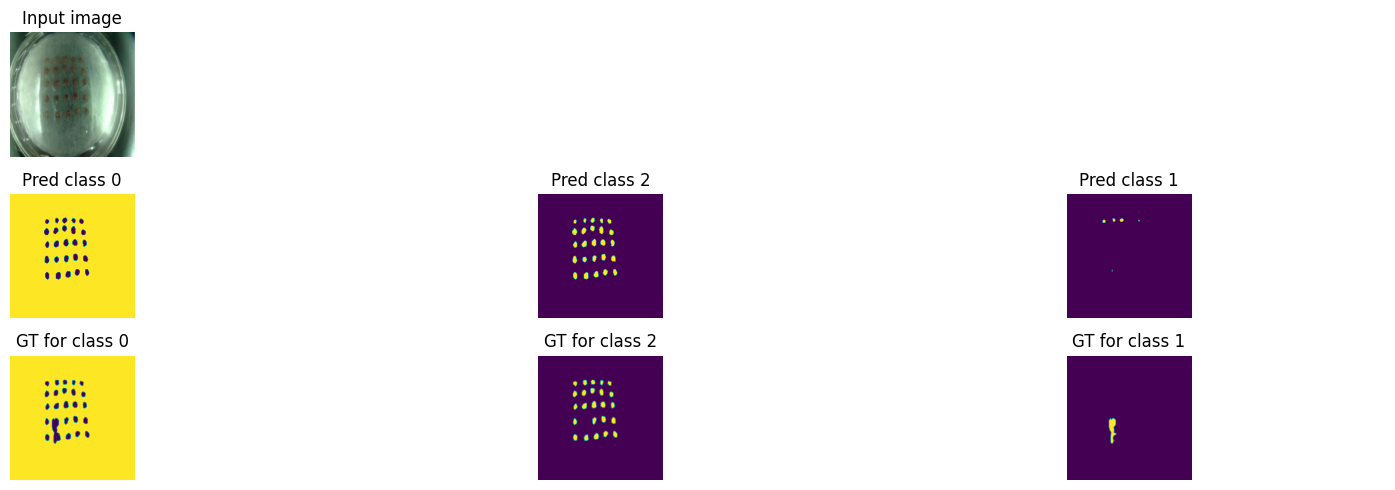

Train loss: 0.23620 | Time: 15m 15s | Val loss: 0.20110
Train_DICE_avg: 0.79070 | Train_Jaccard_avg: 0.72886 | Train_Sensitivity_avg: 0.82192 | Train_Specificity_avg: 0.96257 
Class 0 - Train_DICE: 0.99082 | Train_Jaccard: 0.98191 | Train_Sensitivity: 0.98850 | Train_Specificity: 0.89489 
Class 1 - Train_DICE: 0.53639 | Train_Jaccard: 0.46123 | Train_Sensitivity: 0.64734 | Train_Specificity: 0.99672 
Class 2 - Train_DICE: 0.84489 | Train_Jaccard: 0.74344 | Train_Sensitivity: 0.82992 | Train_Specificity: 0.99611 
Val_DICE_avg: 0.81259 | Val_Jaccard_avg: 0.76160 | Val_Sensitivity_avg: 0.84171 | Val_Specificity_avg: 0.95760 
Class 0 - Val_DICE: 0.99619 | Val_Jaccard: 0.99242 | Val_Sensitivity: 0.99661 | Val_Specificity: 0.87888 
Class 1 - Val_DICE: 0.57525 | Val_Jaccard: 0.51480 | Val_Sensitivity: 0.66338 | Val_Specificity: 0.99756 
Class 2 - Val_DICE: 0.86635 | Val_Jaccard: 0.77757 | Val_Sensitivity: 0.86514 | Val_Specificity: 0.99635 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


Train loss: 0.23220 | Time: 15m 54s | Val loss: 0.19957
Train_DICE_avg: 0.79446 | Train_Jaccard_avg: 0.73323 | Train_Sensitivity_avg: 0.83139 | Train_Specificity_avg: 0.96354 
Class 0 - Train_DICE: 0.99073 | Train_Jaccard: 0.98173 | Train_Sensitivity: 0.98809 | Train_Specificity: 0.89791 
Class 1 - Train_DICE: 0.54779 | Train_Jaccard: 0.47465 | Train_Sensitivity: 0.67524 | Train_Specificity: 0.99667 
Class 2 - Train_DICE: 0.84486 | Train_Jaccard: 0.74330 | Train_Sensitivity: 0.83083 | Train_Specificity: 0.99604 
Val_DICE_avg: 0.81558 | Val_Jaccard_avg: 0.76521 | Val_Sensitivity_avg: 0.84207 | Val_Specificity_avg: 0.96096 
Class 0 - Val_DICE: 0.99626 | Val_Jaccard: 0.99257 | Val_Sensitivity: 0.99638 | Val_Specificity: 0.88856 
Class 1 - Val_DICE: 0.58102 | Val_Jaccard: 0.51998 | Val_Sensitivity: 0.66626 | Val_Specificity: 0.99742 
Class 2 - Val_DICE: 0.86947 | Val_Jaccard: 0.78306 | Val_Sensitivity: 0.86358 | Val_Specificity: 0.99689 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.23083 | Time: 16m 33s | Val loss: 0.20156
Train_DICE_avg: 0.79615 | Train_Jaccard_avg: 0.73449 | Train_Sensitivity_avg: 0.83112 | Train_Specificity_avg: 0.96300 
Class 0 - Train_DICE: 0.99086 | Train_Jaccard: 0.98199 | Train_Sensitivity: 0.98859 | Train_Specificity: 0.89608 
Class 1 - Train_DICE: 0.55130 | Train_Jaccard: 0.47614 | Train_Sensitivity: 0.67481 | Train_Specificity: 0.99672 
Class 2 - Train_DICE: 0.84628 | Train_Jaccard: 0.74534 | Train_Sensitivity: 0.82997 | Train_Specificity: 0.99621 
Val_DICE_avg: 0.81183 | Val_Jaccard_avg: 0.76198 | Val_Sensitivity_avg: 0.84328 | Val_Specificity_avg: 0.95877 
Class 0 - Val_DICE: 0.99623 | Val_Jaccard: 0.99251 | Val_Sensitivity: 0.99661 | Val_Specificity: 0.88213 
Class 1 - Val_DICE: 0.56873 | Val_Jaccard: 0.50955 | Val_Sensitivity: 0.66743 | Val_Specificity: 0.99747 
Class 2 - Val_DICE: 0.87054 | Val_Jaccard: 0.78387 | Val_Sensitivity: 0.86582 | Val_Specificity: 0.99671 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Train loss: 0.22794 | Time: 17m 11s | Val loss: 0.19887
Train_DICE_avg: 0.80047 | Train_Jaccard_avg: 0.73994 | Train_Sensitivity_avg: 0.83648 | Train_Specificity_avg: 0.96282 
Class 0 - Train_DICE: 0.99121 | Train_Jaccard: 0.98266 | Train_Sensitivity: 0.98928 | Train_Specificity: 0.89566 
Class 1 - Train_DICE: 0.56196 | Train_Jaccard: 0.48915 | Train_Sensitivity: 0.68586 | Train_Specificity: 0.99668 
Class 2 - Train_DICE: 0.84824 | Train_Jaccard: 0.74800 | Train_Sensitivity: 0.83431 | Train_Specificity: 0.99611 
Val_DICE_avg: 0.81472 | Val_Jaccard_avg: 0.76503 | Val_Sensitivity_avg: 0.85046 | Val_Specificity_avg: 0.95738 
Class 0 - Val_DICE: 0.99622 | Val_Jaccard: 0.99249 | Val_Sensitivity: 0.99686 | Val_Specificity: 0.87770 
Class 1 - Val_DICE: 0.57784 | Val_Jaccard: 0.51902 | Val_Sensitivity: 0.68417 | Val_Specificity: 0.99765 
Class 2 - Val_DICE: 0.87009 | Val_Jaccard: 0.78359 | Val_Sensitivity: 0.87033 | Val_Specificity: 0.99678 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


Train loss: 0.22716 | Time: 17m 50s | Val loss: 0.19819
Train_DICE_avg: 0.80135 | Train_Jaccard_avg: 0.74128 | Train_Sensitivity_avg: 0.84057 | Train_Specificity_avg: 0.96314 
Class 0 - Train_DICE: 0.99107 | Train_Jaccard: 0.98240 | Train_Sensitivity: 0.98901 | Train_Specificity: 0.89657 
Class 1 - Train_DICE: 0.56414 | Train_Jaccard: 0.49238 | Train_Sensitivity: 0.69650 | Train_Specificity: 0.99682 
Class 2 - Train_DICE: 0.84884 | Train_Jaccard: 0.74905 | Train_Sensitivity: 0.83621 | Train_Specificity: 0.99603 
Val_DICE_avg: 0.81593 | Val_Jaccard_avg: 0.76686 | Val_Sensitivity_avg: 0.85930 | Val_Specificity_avg: 0.96311 
Class 0 - Val_DICE: 0.99631 | Val_Jaccard: 0.99268 | Val_Sensitivity: 0.99639 | Val_Specificity: 0.89539 
Class 1 - Val_DICE: 0.58125 | Val_Jaccard: 0.52426 | Val_Sensitivity: 0.69880 | Val_Specificity: 0.99739 
Class 2 - Val_DICE: 0.87024 | Val_Jaccard: 0.78364 | Val_Sensitivity: 0.88269 | Val_Specificity: 0.99654 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]


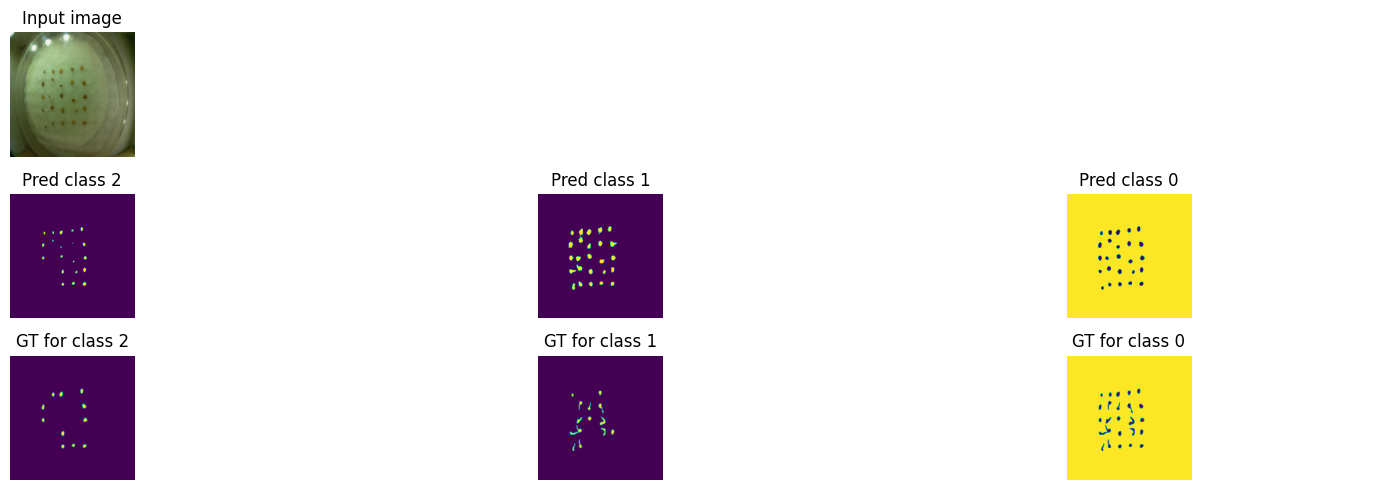

Train loss: 0.22758 | Time: 18m 31s | Val loss: 0.19792
Train_DICE_avg: 0.79894 | Train_Jaccard_avg: 0.73912 | Train_Sensitivity_avg: 0.83733 | Train_Specificity_avg: 0.96315 
Class 0 - Train_DICE: 0.99130 | Train_Jaccard: 0.98284 | Train_Sensitivity: 0.98943 | Train_Specificity: 0.89654 
Class 1 - Train_DICE: 0.55499 | Train_Jaccard: 0.48306 | Train_Sensitivity: 0.68529 | Train_Specificity: 0.99671 
Class 2 - Train_DICE: 0.85053 | Train_Jaccard: 0.75145 | Train_Sensitivity: 0.83727 | Train_Specificity: 0.99620 
Val_DICE_avg: 0.82020 | Val_Jaccard_avg: 0.77013 | Val_Sensitivity_avg: 0.85198 | Val_Specificity_avg: 0.95760 
Class 0 - Val_DICE: 0.99625 | Val_Jaccard: 0.99255 | Val_Sensitivity: 0.99675 | Val_Specificity: 0.87867 
Class 1 - Val_DICE: 0.59156 | Val_Jaccard: 0.53122 | Val_Sensitivity: 0.67612 | Val_Specificity: 0.99768 
Class 2 - Val_DICE: 0.87278 | Val_Jaccard: 0.78662 | Val_Sensitivity: 0.88306 | Val_Specificity: 0.99645 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]


Train loss: 0.22468 | Time: 19m 10s | Val loss: 0.16525
Train_DICE_avg: 0.80256 | Train_Jaccard_avg: 0.74247 | Train_Sensitivity_avg: 0.84144 | Train_Specificity_avg: 0.96253 
Class 0 - Train_DICE: 0.99110 | Train_Jaccard: 0.98246 | Train_Sensitivity: 0.98895 | Train_Specificity: 0.89480 
Class 1 - Train_DICE: 0.56591 | Train_Jaccard: 0.49331 | Train_Sensitivity: 0.69733 | Train_Specificity: 0.99665 
Class 2 - Train_DICE: 0.85068 | Train_Jaccard: 0.75163 | Train_Sensitivity: 0.83805 | Train_Specificity: 0.99615 
Val_DICE_avg: 0.84800 | Val_Jaccard_avg: 0.79936 | Val_Sensitivity_avg: 0.90000 | Val_Specificity_avg: 0.95689 
Class 0 - Val_DICE: 0.99624 | Val_Jaccard: 0.99252 | Val_Sensitivity: 0.99676 | Val_Specificity: 0.87746 
Class 1 - Val_DICE: 0.67953 | Val_Jaccard: 0.62423 | Val_Sensitivity: 0.85674 | Val_Specificity: 0.99578 
Class 2 - Val_DICE: 0.86822 | Val_Jaccard: 0.78133 | Val_Sensitivity: 0.84649 | Val_Specificity: 0.99742 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


Train loss: 0.21598 | Time: 19m 50s | Val loss: 0.16128
Train_DICE_avg: 0.81557 | Train_Jaccard_avg: 0.75649 | Train_Sensitivity_avg: 0.86139 | Train_Specificity_avg: 0.96359 
Class 0 - Train_DICE: 0.99123 | Train_Jaccard: 0.98270 | Train_Sensitivity: 0.98915 | Train_Specificity: 0.89811 
Class 1 - Train_DICE: 0.60368 | Train_Jaccard: 0.53343 | Train_Sensitivity: 0.75618 | Train_Specificity: 0.99638 
Class 2 - Train_DICE: 0.85181 | Train_Jaccard: 0.75335 | Train_Sensitivity: 0.83886 | Train_Specificity: 0.99628 
Val_DICE_avg: 0.85382 | Val_Jaccard_avg: 0.80526 | Val_Sensitivity_avg: 0.89404 | Val_Specificity_avg: 0.95980 
Class 0 - Val_DICE: 0.99636 | Val_Jaccard: 0.99276 | Val_Sensitivity: 0.99688 | Val_Specificity: 0.88555 
Class 1 - Val_DICE: 0.69353 | Val_Jaccard: 0.63724 | Val_Sensitivity: 0.80915 | Val_Specificity: 0.99730 
Class 2 - Val_DICE: 0.87158 | Val_Jaccard: 0.78579 | Val_Sensitivity: 0.87609 | Val_Specificity: 0.99655 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.21120 | Time: 20m 29s | Val loss: 0.15923
Train_DICE_avg: 0.81699 | Train_Jaccard_avg: 0.75772 | Train_Sensitivity_avg: 0.86280 | Train_Specificity_avg: 0.96290 
Class 0 - Train_DICE: 0.99111 | Train_Jaccard: 0.98247 | Train_Sensitivity: 0.98911 | Train_Specificity: 0.89614 
Class 1 - Train_DICE: 0.60913 | Train_Jaccard: 0.53825 | Train_Sensitivity: 0.76173 | Train_Specificity: 0.99635 
Class 2 - Train_DICE: 0.85073 | Train_Jaccard: 0.75244 | Train_Sensitivity: 0.83756 | Train_Specificity: 0.99620 
Val_DICE_avg: 0.85397 | Val_Jaccard_avg: 0.80541 | Val_Sensitivity_avg: 0.90093 | Val_Specificity_avg: 0.95984 
Class 0 - Val_DICE: 0.99631 | Val_Jaccard: 0.99268 | Val_Sensitivity: 0.99667 | Val_Specificity: 0.88601 
Class 1 - Val_DICE: 0.69326 | Val_Jaccard: 0.63680 | Val_Sensitivity: 0.83486 | Val_Specificity: 0.99667 
Class 2 - Val_DICE: 0.87233 | Val_Jaccard: 0.78677 | Val_Sensitivity: 0.87124 | Val_Specificity: 0.99683 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


Train loss: 0.20723 | Time: 21m 9s | Val loss: 0.15795
Train_DICE_avg: 0.81887 | Train_Jaccard_avg: 0.75946 | Train_Sensitivity_avg: 0.86137 | Train_Specificity_avg: 0.96313 
Class 0 - Train_DICE: 0.99123 | Train_Jaccard: 0.98271 | Train_Sensitivity: 0.98937 | Train_Specificity: 0.89665 
Class 1 - Train_DICE: 0.61172 | Train_Jaccard: 0.53971 | Train_Sensitivity: 0.75335 | Train_Specificity: 0.99649 
Class 2 - Train_DICE: 0.85366 | Train_Jaccard: 0.75598 | Train_Sensitivity: 0.84139 | Train_Specificity: 0.99624 
Val_DICE_avg: 0.85487 | Val_Jaccard_avg: 0.80589 | Val_Sensitivity_avg: 0.89393 | Val_Specificity_avg: 0.95387 
Class 0 - Val_DICE: 0.99617 | Val_Jaccard: 0.99239 | Val_Sensitivity: 0.99737 | Val_Specificity: 0.86727 
Class 1 - Val_DICE: 0.69789 | Val_Jaccard: 0.63960 | Val_Sensitivity: 0.81589 | Val_Specificity: 0.99743 
Class 2 - Val_DICE: 0.87056 | Val_Jaccard: 0.78567 | Val_Sensitivity: 0.86853 | Val_Specificity: 0.99690 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


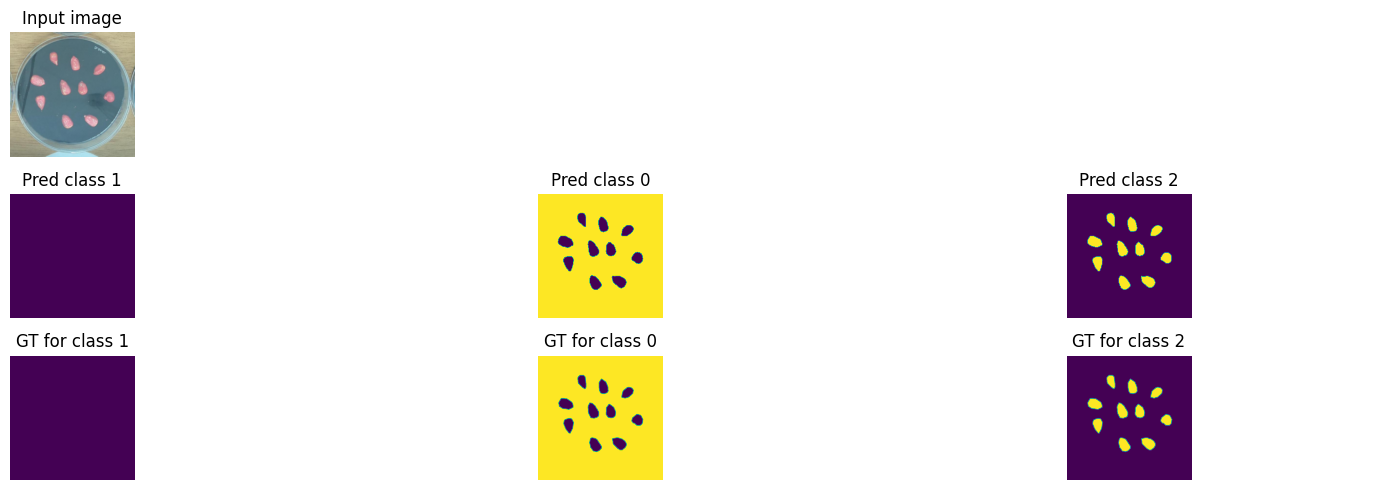

Train loss: 0.20226 | Time: 21m 49s | Val loss: 0.16738
Train_DICE_avg: 0.82275 | Train_Jaccard_avg: 0.76356 | Train_Sensitivity_avg: 0.86336 | Train_Specificity_avg: 0.96310 
Class 0 - Train_DICE: 0.99145 | Train_Jaccard: 0.98314 | Train_Sensitivity: 0.98986 | Train_Specificity: 0.89637 
Class 1 - Train_DICE: 0.62105 | Train_Jaccard: 0.54898 | Train_Sensitivity: 0.75663 | Train_Specificity: 0.99670 
Class 2 - Train_DICE: 0.85574 | Train_Jaccard: 0.75858 | Train_Sensitivity: 0.84358 | Train_Specificity: 0.99623 
Val_DICE_avg: 0.84660 | Val_Jaccard_avg: 0.79817 | Val_Sensitivity_avg: 0.89097 | Val_Specificity_avg: 0.95660 
Class 0 - Val_DICE: 0.99628 | Val_Jaccard: 0.99261 | Val_Sensitivity: 0.99709 | Val_Specificity: 0.87580 
Class 1 - Val_DICE: 0.67876 | Val_Jaccard: 0.62092 | Val_Sensitivity: 0.79990 | Val_Specificity: 0.99747 
Class 2 - Val_DICE: 0.86475 | Val_Jaccard: 0.78097 | Val_Sensitivity: 0.87591 | Val_Specificity: 0.99654 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


Train loss: 0.21007 | Time: 22m 28s | Val loss: 0.16699
Train_DICE_avg: 0.82150 | Train_Jaccard_avg: 0.76264 | Train_Sensitivity_avg: 0.86609 | Train_Specificity_avg: 0.96292 
Class 0 - Train_DICE: 0.99159 | Train_Jaccard: 0.98341 | Train_Sensitivity: 0.99003 | Train_Specificity: 0.89590 
Class 1 - Train_DICE: 0.61803 | Train_Jaccard: 0.54685 | Train_Sensitivity: 0.76430 | Train_Specificity: 0.99660 
Class 2 - Train_DICE: 0.85488 | Train_Jaccard: 0.75767 | Train_Sensitivity: 0.84394 | Train_Specificity: 0.99625 
Val_DICE_avg: 0.84925 | Val_Jaccard_avg: 0.79999 | Val_Sensitivity_avg: 0.88470 | Val_Specificity_avg: 0.95610 
Class 0 - Val_DICE: 0.99630 | Val_Jaccard: 0.99265 | Val_Sensitivity: 0.99704 | Val_Specificity: 0.87389 
Class 1 - Val_DICE: 0.67532 | Val_Jaccard: 0.61539 | Val_Sensitivity: 0.79068 | Val_Specificity: 0.99746 
Class 2 - Val_DICE: 0.87614 | Val_Jaccard: 0.79192 | Val_Sensitivity: 0.86636 | Val_Specificity: 0.99694 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.20405 | Time: 23m 8s | Val loss: 0.15107
Train_DICE_avg: 0.82394 | Train_Jaccard_avg: 0.76497 | Train_Sensitivity_avg: 0.86687 | Train_Specificity_avg: 0.96387 
Class 0 - Train_DICE: 0.99146 | Train_Jaccard: 0.98315 | Train_Sensitivity: 0.98961 | Train_Specificity: 0.89867 
Class 1 - Train_DICE: 0.62419 | Train_Jaccard: 0.55243 | Train_Sensitivity: 0.76595 | Train_Specificity: 0.99675 
Class 2 - Train_DICE: 0.85618 | Train_Jaccard: 0.75934 | Train_Sensitivity: 0.84505 | Train_Specificity: 0.99618 
Val_DICE_avg: 0.86311 | Val_Jaccard_avg: 0.81500 | Val_Sensitivity_avg: 0.90091 | Val_Specificity_avg: 0.95694 
Class 0 - Val_DICE: 0.99637 | Val_Jaccard: 0.99279 | Val_Sensitivity: 0.99700 | Val_Specificity: 0.87650 
Class 1 - Val_DICE: 0.71447 | Val_Jaccard: 0.65683 | Val_Sensitivity: 0.83008 | Val_Specificity: 0.99734 
Class 2 - Val_DICE: 0.87849 | Val_Jaccard: 0.79538 | Val_Sensitivity: 0.87565 | Val_Specificity: 0.99699 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


Train loss: 0.20557 | Time: 23m 47s | Val loss: 0.15376
Train_DICE_avg: 0.82467 | Train_Jaccard_avg: 0.76587 | Train_Sensitivity_avg: 0.86923 | Train_Specificity_avg: 0.96281 
Class 0 - Train_DICE: 0.99153 | Train_Jaccard: 0.98329 | Train_Sensitivity: 0.98997 | Train_Specificity: 0.89548 
Class 1 - Train_DICE: 0.62512 | Train_Jaccard: 0.55354 | Train_Sensitivity: 0.77271 | Train_Specificity: 0.99664 
Class 2 - Train_DICE: 0.85735 | Train_Jaccard: 0.76078 | Train_Sensitivity: 0.84500 | Train_Specificity: 0.99629 
Val_DICE_avg: 0.86000 | Val_Jaccard_avg: 0.81261 | Val_Sensitivity_avg: 0.90659 | Val_Specificity_avg: 0.95800 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99283 | Val_Sensitivity: 0.99690 | Val_Specificity: 0.87997 
Class 1 - Val_DICE: 0.70470 | Val_Jaccard: 0.64931 | Val_Sensitivity: 0.84481 | Val_Specificity: 0.99712 
Class 2 - Val_DICE: 0.87890 | Val_Jaccard: 0.79571 | Val_Sensitivity: 0.87805 | Val_Specificity: 0.99691 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.20063 | Time: 24m 27s | Val loss: 0.15353
Train_DICE_avg: 0.82433 | Train_Jaccard_avg: 0.76548 | Train_Sensitivity_avg: 0.86580 | Train_Specificity_avg: 0.96245 
Class 0 - Train_DICE: 0.99162 | Train_Jaccard: 0.98346 | Train_Sensitivity: 0.99019 | Train_Specificity: 0.89435 
Class 1 - Train_DICE: 0.62356 | Train_Jaccard: 0.55160 | Train_Sensitivity: 0.75939 | Train_Specificity: 0.99684 
Class 2 - Train_DICE: 0.85783 | Train_Jaccard: 0.76140 | Train_Sensitivity: 0.84782 | Train_Specificity: 0.99617 
Val_DICE_avg: 0.85936 | Val_Jaccard_avg: 0.81133 | Val_Sensitivity_avg: 0.90204 | Val_Specificity_avg: 0.95941 
Class 0 - Val_DICE: 0.99639 | Val_Jaccard: 0.99283 | Val_Sensitivity: 0.99687 | Val_Specificity: 0.88411 
Class 1 - Val_DICE: 0.70369 | Val_Jaccard: 0.64675 | Val_Sensitivity: 0.83161 | Val_Specificity: 0.99726 
Class 2 - Val_DICE: 0.87799 | Val_Jaccard: 0.79441 | Val_Sensitivity: 0.87764 | Val_Specificity: 0.99686 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]


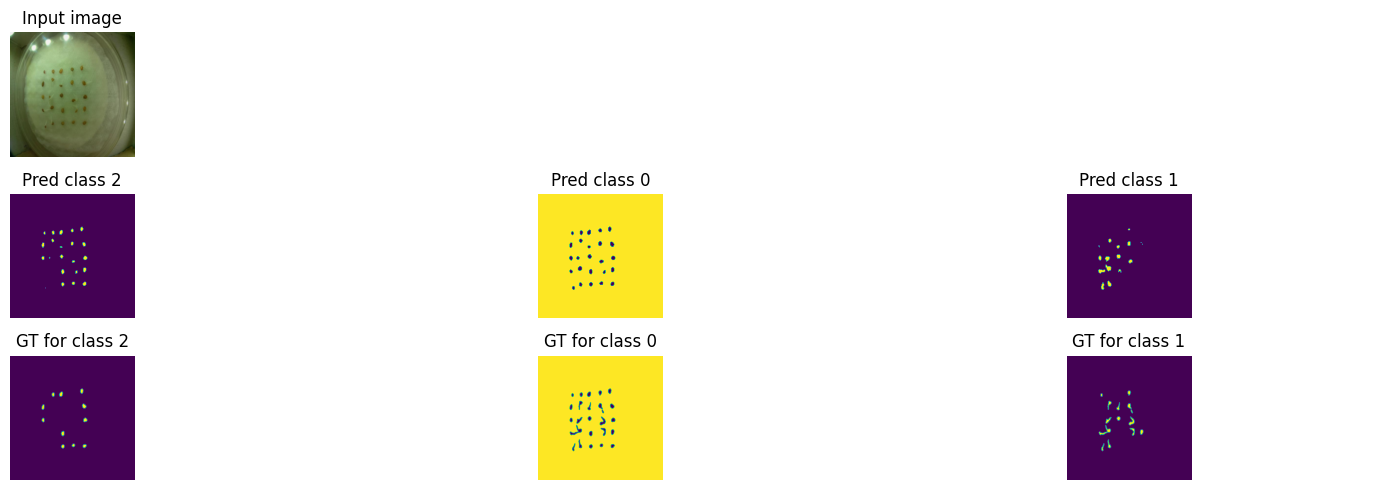

Train loss: 0.19687 | Time: 25m 7s | Val loss: 0.14880
Train_DICE_avg: 0.82829 | Train_Jaccard_avg: 0.76951 | Train_Sensitivity_avg: 0.86473 | Train_Specificity_avg: 0.96405 
Class 0 - Train_DICE: 0.99168 | Train_Jaccard: 0.98358 | Train_Sensitivity: 0.99016 | Train_Specificity: 0.89902 
Class 1 - Train_DICE: 0.63304 | Train_Jaccard: 0.56003 | Train_Sensitivity: 0.75385 | Train_Specificity: 0.99690 
Class 2 - Train_DICE: 0.86014 | Train_Jaccard: 0.76490 | Train_Sensitivity: 0.85019 | Train_Specificity: 0.99624 
Val_DICE_avg: 0.86471 | Val_Jaccard_avg: 0.81704 | Val_Sensitivity_avg: 0.90506 | Val_Specificity_avg: 0.95891 
Class 0 - Val_DICE: 0.99641 | Val_Jaccard: 0.99287 | Val_Sensitivity: 0.99699 | Val_Specificity: 0.88253 
Class 1 - Val_DICE: 0.71597 | Val_Jaccard: 0.65837 | Val_Sensitivity: 0.83269 | Val_Specificity: 0.99746 
Class 2 - Val_DICE: 0.88174 | Val_Jaccard: 0.79986 | Val_Sensitivity: 0.88549 | Val_Specificity: 0.99675 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


Train loss: 0.19925 | Time: 25m 46s | Val loss: 0.14924
Train_DICE_avg: 0.82697 | Train_Jaccard_avg: 0.76819 | Train_Sensitivity_avg: 0.86585 | Train_Specificity_avg: 0.96336 
Class 0 - Train_DICE: 0.99164 | Train_Jaccard: 0.98350 | Train_Sensitivity: 0.99010 | Train_Specificity: 0.89700 
Class 1 - Train_DICE: 0.62936 | Train_Jaccard: 0.55672 | Train_Sensitivity: 0.75838 | Train_Specificity: 0.99683 
Class 2 - Train_DICE: 0.85992 | Train_Jaccard: 0.76435 | Train_Sensitivity: 0.84908 | Train_Specificity: 0.99626 
Val_DICE_avg: 0.86467 | Val_Jaccard_avg: 0.81587 | Val_Sensitivity_avg: 0.90103 | Val_Specificity_avg: 0.95911 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99292 | Val_Sensitivity: 0.99705 | Val_Specificity: 0.88317 
Class 1 - Val_DICE: 0.71727 | Val_Jaccard: 0.65631 | Val_Sensitivity: 0.81324 | Val_Specificity: 0.99774 
Class 2 - Val_DICE: 0.88031 | Val_Jaccard: 0.79837 | Val_Sensitivity: 0.89280 | Val_Specificity: 0.99642 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Train loss: 0.19820 | Time: 26m 26s | Val loss: 0.14671
Train_DICE_avg: 0.82803 | Train_Jaccard_avg: 0.76819 | Train_Sensitivity_avg: 0.86434 | Train_Specificity_avg: 0.96400 
Class 0 - Train_DICE: 0.99165 | Train_Jaccard: 0.98351 | Train_Sensitivity: 0.99000 | Train_Specificity: 0.89892 
Class 1 - Train_DICE: 0.63300 | Train_Jaccard: 0.55717 | Train_Sensitivity: 0.75386 | Train_Specificity: 0.99685 
Class 2 - Train_DICE: 0.85944 | Train_Jaccard: 0.76388 | Train_Sensitivity: 0.84916 | Train_Specificity: 0.99623 
Val_DICE_avg: 0.86720 | Val_Jaccard_avg: 0.81969 | Val_Sensitivity_avg: 0.90662 | Val_Specificity_avg: 0.95994 
Class 0 - Val_DICE: 0.99645 | Val_Jaccard: 0.99295 | Val_Sensitivity: 0.99691 | Val_Specificity: 0.88557 
Class 1 - Val_DICE: 0.72321 | Val_Jaccard: 0.66588 | Val_Sensitivity: 0.83526 | Val_Specificity: 0.99749 
Class 2 - Val_DICE: 0.88194 | Val_Jaccard: 0.80025 | Val_Sensitivity: 0.88768 | Val_Specificity: 0.99674 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.19720 | Time: 27m 6s | Val loss: 0.14903
Train_DICE_avg: 0.83159 | Train_Jaccard_avg: 0.77296 | Train_Sensitivity_avg: 0.86812 | Train_Specificity_avg: 0.96337 
Class 0 - Train_DICE: 0.99181 | Train_Jaccard: 0.98383 | Train_Sensitivity: 0.99048 | Train_Specificity: 0.89692 
Class 1 - Train_DICE: 0.64098 | Train_Jaccard: 0.56749 | Train_Sensitivity: 0.76200 | Train_Specificity: 0.99690 
Class 2 - Train_DICE: 0.86198 | Train_Jaccard: 0.76757 | Train_Sensitivity: 0.85188 | Train_Specificity: 0.99629 
Val_DICE_avg: 0.86430 | Val_Jaccard_avg: 0.81611 | Val_Sensitivity_avg: 0.90021 | Val_Specificity_avg: 0.95615 
Class 0 - Val_DICE: 0.99642 | Val_Jaccard: 0.99288 | Val_Sensitivity: 0.99718 | Val_Specificity: 0.87423 
Class 1 - Val_DICE: 0.71538 | Val_Jaccard: 0.65661 | Val_Sensitivity: 0.81563 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.88111 | Val_Jaccard: 0.79884 | Val_Sensitivity: 0.88783 | Val_Specificity: 0.99660 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.19463 | Time: 27m 45s | Val loss: 0.14563
Train_DICE_avg: 0.83318 | Train_Jaccard_avg: 0.77458 | Train_Sensitivity_avg: 0.86886 | Train_Specificity_avg: 0.96377 
Class 0 - Train_DICE: 0.99167 | Train_Jaccard: 0.98357 | Train_Sensitivity: 0.99020 | Train_Specificity: 0.89804 
Class 1 - Train_DICE: 0.64515 | Train_Jaccard: 0.57171 | Train_Sensitivity: 0.76359 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.86270 | Train_Jaccard: 0.76846 | Train_Sensitivity: 0.85280 | Train_Specificity: 0.99632 
Val_DICE_avg: 0.86734 | Val_Jaccard_avg: 0.81918 | Val_Sensitivity_avg: 0.90473 | Val_Specificity_avg: 0.95980 
Class 0 - Val_DICE: 0.99651 | Val_Jaccard: 0.99307 | Val_Sensitivity: 0.99698 | Val_Specificity: 0.88519 
Class 1 - Val_DICE: 0.72258 | Val_Jaccard: 0.66277 | Val_Sensitivity: 0.82431 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.88292 | Val_Jaccard: 0.80172 | Val_Sensitivity: 0.89291 | Val_Specificity: 0.99656 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


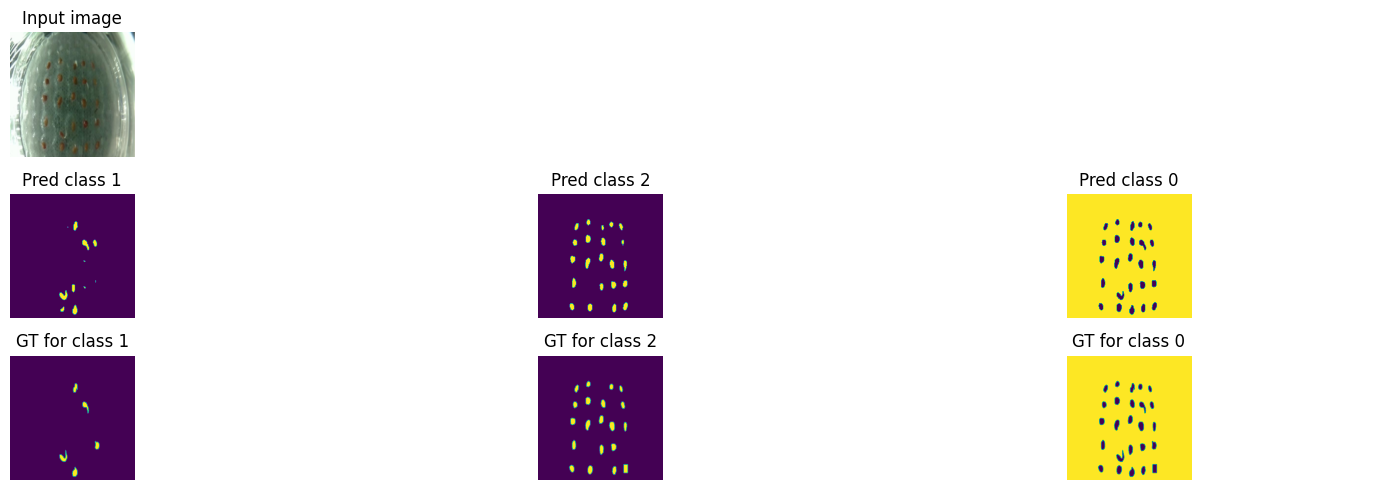

Train loss: 0.19267 | Time: 28m 25s | Val loss: 0.14473
Train_DICE_avg: 0.83055 | Train_Jaccard_avg: 0.77194 | Train_Sensitivity_avg: 0.86776 | Train_Specificity_avg: 0.96346 
Class 0 - Train_DICE: 0.99180 | Train_Jaccard: 0.98381 | Train_Sensitivity: 0.99061 | Train_Specificity: 0.89710 
Class 1 - Train_DICE: 0.63712 | Train_Jaccard: 0.56337 | Train_Sensitivity: 0.75898 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.86273 | Train_Jaccard: 0.76864 | Train_Sensitivity: 0.85369 | Train_Specificity: 0.99629 
Val_DICE_avg: 0.86871 | Val_Jaccard_avg: 0.82070 | Val_Sensitivity_avg: 0.90431 | Val_Specificity_avg: 0.95821 
Class 0 - Val_DICE: 0.99646 | Val_Jaccard: 0.99296 | Val_Sensitivity: 0.99716 | Val_Specificity: 0.88020 
Class 1 - Val_DICE: 0.72676 | Val_Jaccard: 0.66693 | Val_Sensitivity: 0.82750 | Val_Specificity: 0.99769 
Class 2 - Val_DICE: 0.88290 | Val_Jaccard: 0.80221 | Val_Sensitivity: 0.88826 | Val_Specificity: 0.99675 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]


Train loss: 0.19212 | Time: 29m 5s | Val loss: 0.14880
Train_DICE_avg: 0.83241 | Train_Jaccard_avg: 0.77368 | Train_Sensitivity_avg: 0.86900 | Train_Specificity_avg: 0.96446 
Class 0 - Train_DICE: 0.99190 | Train_Jaccard: 0.98401 | Train_Sensitivity: 0.99033 | Train_Specificity: 0.90010 
Class 1 - Train_DICE: 0.64166 | Train_Jaccard: 0.56735 | Train_Sensitivity: 0.76132 | Train_Specificity: 0.99701 
Class 2 - Train_DICE: 0.86367 | Train_Jaccard: 0.76968 | Train_Sensitivity: 0.85536 | Train_Specificity: 0.99628 
Val_DICE_avg: 0.86470 | Val_Jaccard_avg: 0.81729 | Val_Sensitivity_avg: 0.90457 | Val_Specificity_avg: 0.95800 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99292 | Val_Sensitivity: 0.99703 | Val_Specificity: 0.87982 
Class 1 - Val_DICE: 0.71554 | Val_Jaccard: 0.65862 | Val_Sensitivity: 0.82770 | Val_Specificity: 0.99752 
Class 2 - Val_DICE: 0.88211 | Val_Jaccard: 0.80034 | Val_Sensitivity: 0.88898 | Val_Specificity: 0.99665 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.19231 | Time: 29m 44s | Val loss: 0.14636
Train_DICE_avg: 0.83472 | Train_Jaccard_avg: 0.77631 | Train_Sensitivity_avg: 0.87258 | Train_Specificity_avg: 0.96418 
Class 0 - Train_DICE: 0.99187 | Train_Jaccard: 0.98396 | Train_Sensitivity: 0.99049 | Train_Specificity: 0.89923 
Class 1 - Train_DICE: 0.64875 | Train_Jaccard: 0.57513 | Train_Sensitivity: 0.77358 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.86353 | Train_Jaccard: 0.76983 | Train_Sensitivity: 0.85367 | Train_Specificity: 0.99635 
Val_DICE_avg: 0.86682 | Val_Jaccard_avg: 0.81994 | Val_Sensitivity_avg: 0.90516 | Val_Specificity_avg: 0.95937 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99298 | Val_Sensitivity: 0.99707 | Val_Specificity: 0.88365 
Class 1 - Val_DICE: 0.71953 | Val_Jaccard: 0.66313 | Val_Sensitivity: 0.83763 | Val_Specificity: 0.99747 
Class 2 - Val_DICE: 0.88446 | Val_Jaccard: 0.80372 | Val_Sensitivity: 0.88080 | Val_Specificity: 0.99699 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


Train loss: 0.19031 | Time: 30m 23s | Val loss: 0.14629
Train_DICE_avg: 0.83486 | Train_Jaccard_avg: 0.77580 | Train_Sensitivity_avg: 0.86815 | Train_Specificity_avg: 0.96413 
Class 0 - Train_DICE: 0.99187 | Train_Jaccard: 0.98396 | Train_Sensitivity: 0.99029 | Train_Specificity: 0.89911 
Class 1 - Train_DICE: 0.64882 | Train_Jaccard: 0.57328 | Train_Sensitivity: 0.75864 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.86390 | Train_Jaccard: 0.77018 | Train_Sensitivity: 0.85553 | Train_Specificity: 0.99624 
Val_DICE_avg: 0.86684 | Val_Jaccard_avg: 0.81951 | Val_Sensitivity_avg: 0.90471 | Val_Specificity_avg: 0.95741 
Class 0 - Val_DICE: 0.99640 | Val_Jaccard: 0.99284 | Val_Sensitivity: 0.99716 | Val_Specificity: 0.87783 
Class 1 - Val_DICE: 0.72224 | Val_Jaccard: 0.66525 | Val_Sensitivity: 0.83613 | Val_Specificity: 0.99749 
Class 2 - Val_DICE: 0.88187 | Val_Jaccard: 0.80045 | Val_Sensitivity: 0.88082 | Val_Specificity: 0.99691 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Train loss: 0.18906 | Time: 31m 3s | Val loss: 0.14490
Train_DICE_avg: 0.83376 | Train_Jaccard_avg: 0.77490 | Train_Sensitivity_avg: 0.86706 | Train_Specificity_avg: 0.96426 
Class 0 - Train_DICE: 0.99183 | Train_Jaccard: 0.98387 | Train_Sensitivity: 0.99052 | Train_Specificity: 0.89941 
Class 1 - Train_DICE: 0.64536 | Train_Jaccard: 0.57025 | Train_Sensitivity: 0.75401 | Train_Specificity: 0.99708 
Class 2 - Train_DICE: 0.86408 | Train_Jaccard: 0.77058 | Train_Sensitivity: 0.85665 | Train_Specificity: 0.99629 
Val_DICE_avg: 0.86886 | Val_Jaccard_avg: 0.82183 | Val_Sensitivity_avg: 0.90763 | Val_Specificity_avg: 0.95924 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99299 | Val_Sensitivity: 0.99705 | Val_Specificity: 0.88334 
Class 1 - Val_DICE: 0.72646 | Val_Jaccard: 0.66923 | Val_Sensitivity: 0.84031 | Val_Specificity: 0.99752 
Class 2 - Val_DICE: 0.88364 | Val_Jaccard: 0.80327 | Val_Sensitivity: 0.88555 | Val_Specificity: 0.99684 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


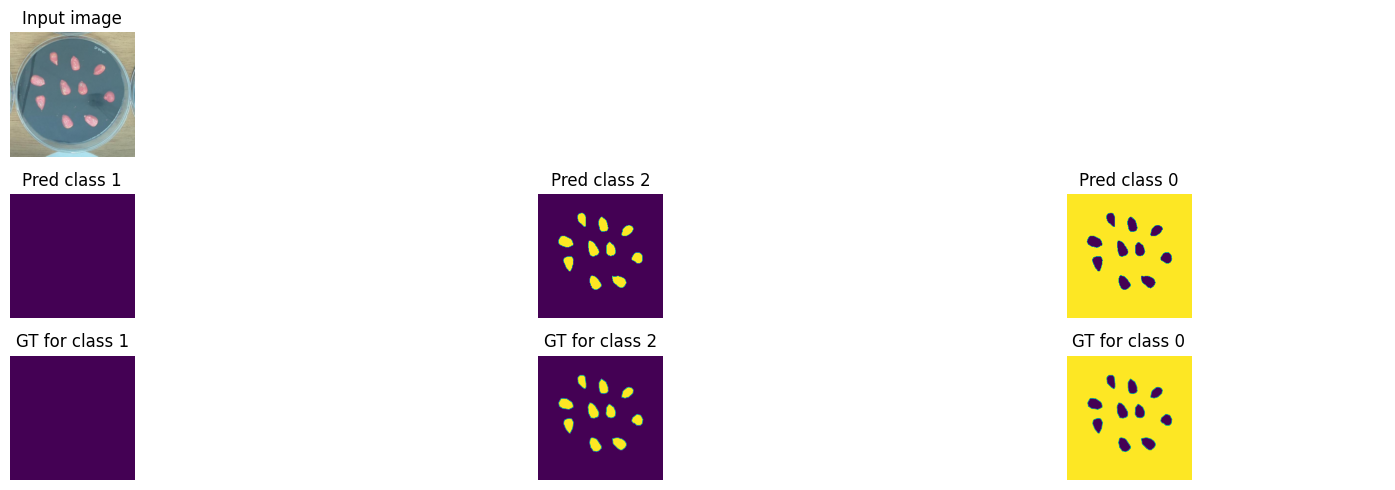

Train loss: 0.19255 | Time: 31m 43s | Val loss: 0.14326
Train_DICE_avg: 0.83350 | Train_Jaccard_avg: 0.77495 | Train_Sensitivity_avg: 0.86862 | Train_Specificity_avg: 0.96309 
Class 0 - Train_DICE: 0.99201 | Train_Jaccard: 0.98421 | Train_Sensitivity: 0.99085 | Train_Specificity: 0.89586 
Class 1 - Train_DICE: 0.64378 | Train_Jaccard: 0.56924 | Train_Sensitivity: 0.75783 | Train_Specificity: 0.99710 
Class 2 - Train_DICE: 0.86472 | Train_Jaccard: 0.77141 | Train_Sensitivity: 0.85718 | Train_Specificity: 0.99631 
Val_DICE_avg: 0.87080 | Val_Jaccard_avg: 0.82289 | Val_Sensitivity_avg: 0.90050 | Val_Specificity_avg: 0.95729 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99291 | Val_Sensitivity: 0.99718 | Val_Specificity: 0.87726 
Class 1 - Val_DICE: 0.73031 | Val_Jaccard: 0.67017 | Val_Sensitivity: 0.82101 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.88566 | Val_Jaccard: 0.80560 | Val_Sensitivity: 0.88331 | Val_Specificity: 0.99695 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


Train loss: 0.19152 | Time: 32m 23s | Val loss: 0.14228
Train_DICE_avg: 0.83539 | Train_Jaccard_avg: 0.77681 | Train_Sensitivity_avg: 0.87133 | Train_Specificity_avg: 0.96414 
Class 0 - Train_DICE: 0.99188 | Train_Jaccard: 0.98397 | Train_Sensitivity: 0.99043 | Train_Specificity: 0.89911 
Class 1 - Train_DICE: 0.65109 | Train_Jaccard: 0.57715 | Train_Sensitivity: 0.76964 | Train_Specificity: 0.99699 
Class 2 - Train_DICE: 0.86321 | Train_Jaccard: 0.76932 | Train_Sensitivity: 0.85390 | Train_Specificity: 0.99634 
Val_DICE_avg: 0.87107 | Val_Jaccard_avg: 0.82349 | Val_Sensitivity_avg: 0.90275 | Val_Specificity_avg: 0.95588 
Class 0 - Val_DICE: 0.99640 | Val_Jaccard: 0.99285 | Val_Sensitivity: 0.99725 | Val_Specificity: 0.87296 
Class 1 - Val_DICE: 0.73099 | Val_Jaccard: 0.67195 | Val_Sensitivity: 0.83082 | Val_Specificity: 0.99756 
Class 2 - Val_DICE: 0.88580 | Val_Jaccard: 0.80567 | Val_Sensitivity: 0.88018 | Val_Specificity: 0.99712 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Train loss: 0.18700 | Time: 33m 2s | Val loss: 0.14331
Train_DICE_avg: 0.83812 | Train_Jaccard_avg: 0.77921 | Train_Sensitivity_avg: 0.87167 | Train_Specificity_avg: 0.96463 
Class 0 - Train_DICE: 0.99182 | Train_Jaccard: 0.98385 | Train_Sensitivity: 0.99024 | Train_Specificity: 0.90056 
Class 1 - Train_DICE: 0.65741 | Train_Jaccard: 0.58189 | Train_Sensitivity: 0.76803 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.86513 | Train_Jaccard: 0.77189 | Train_Sensitivity: 0.85675 | Train_Specificity: 0.99628 
Val_DICE_avg: 0.87035 | Val_Jaccard_avg: 0.82226 | Val_Sensitivity_avg: 0.90429 | Val_Specificity_avg: 0.95841 
Class 0 - Val_DICE: 0.99645 | Val_Jaccard: 0.99295 | Val_Sensitivity: 0.99714 | Val_Specificity: 0.88083 
Class 1 - Val_DICE: 0.73075 | Val_Jaccard: 0.67047 | Val_Sensitivity: 0.82689 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.88384 | Val_Jaccard: 0.80336 | Val_Sensitivity: 0.88885 | Val_Specificity: 0.99674 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.18670 | Time: 33m 42s | Val loss: 0.14317
Train_DICE_avg: 0.83802 | Train_Jaccard_avg: 0.77955 | Train_Sensitivity_avg: 0.87376 | Train_Specificity_avg: 0.96465 
Class 0 - Train_DICE: 0.99185 | Train_Jaccard: 0.98392 | Train_Sensitivity: 0.99040 | Train_Specificity: 0.90062 
Class 1 - Train_DICE: 0.65634 | Train_Jaccard: 0.58177 | Train_Sensitivity: 0.77067 | Train_Specificity: 0.99709 
Class 2 - Train_DICE: 0.86586 | Train_Jaccard: 0.77298 | Train_Sensitivity: 0.86022 | Train_Specificity: 0.99624 
Val_DICE_avg: 0.87271 | Val_Jaccard_avg: 0.82407 | Val_Sensitivity_avg: 0.90147 | Val_Specificity_avg: 0.95841 
Class 0 - Val_DICE: 0.99644 | Val_Jaccard: 0.99293 | Val_Sensitivity: 0.99705 | Val_Specificity: 0.88082 
Class 1 - Val_DICE: 0.73760 | Val_Jaccard: 0.67546 | Val_Sensitivity: 0.81920 | Val_Specificity: 0.99767 
Class 2 - Val_DICE: 0.88408 | Val_Jaccard: 0.80382 | Val_Sensitivity: 0.88816 | Val_Specificity: 0.99672 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.18787 | Time: 34m 21s | Val loss: 0.14287
Train_DICE_avg: 0.83683 | Train_Jaccard_avg: 0.77843 | Train_Sensitivity_avg: 0.87216 | Train_Specificity_avg: 0.96383 
Class 0 - Train_DICE: 0.99172 | Train_Jaccard: 0.98366 | Train_Sensitivity: 0.99042 | Train_Specificity: 0.89800 
Class 1 - Train_DICE: 0.65262 | Train_Jaccard: 0.57833 | Train_Sensitivity: 0.76910 | Train_Specificity: 0.99710 
Class 2 - Train_DICE: 0.86614 | Train_Jaccard: 0.77329 | Train_Sensitivity: 0.85694 | Train_Specificity: 0.99638 
Val_DICE_avg: 0.87117 | Val_Jaccard_avg: 0.82288 | Val_Sensitivity_avg: 0.90432 | Val_Specificity_avg: 0.95941 
Class 0 - Val_DICE: 0.99647 | Val_Jaccard: 0.99299 | Val_Sensitivity: 0.99703 | Val_Specificity: 0.88394 
Class 1 - Val_DICE: 0.73283 | Val_Jaccard: 0.67180 | Val_Sensitivity: 0.82438 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.88420 | Val_Jaccard: 0.80383 | Val_Sensitivity: 0.89155 | Val_Specificity: 0.99667 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


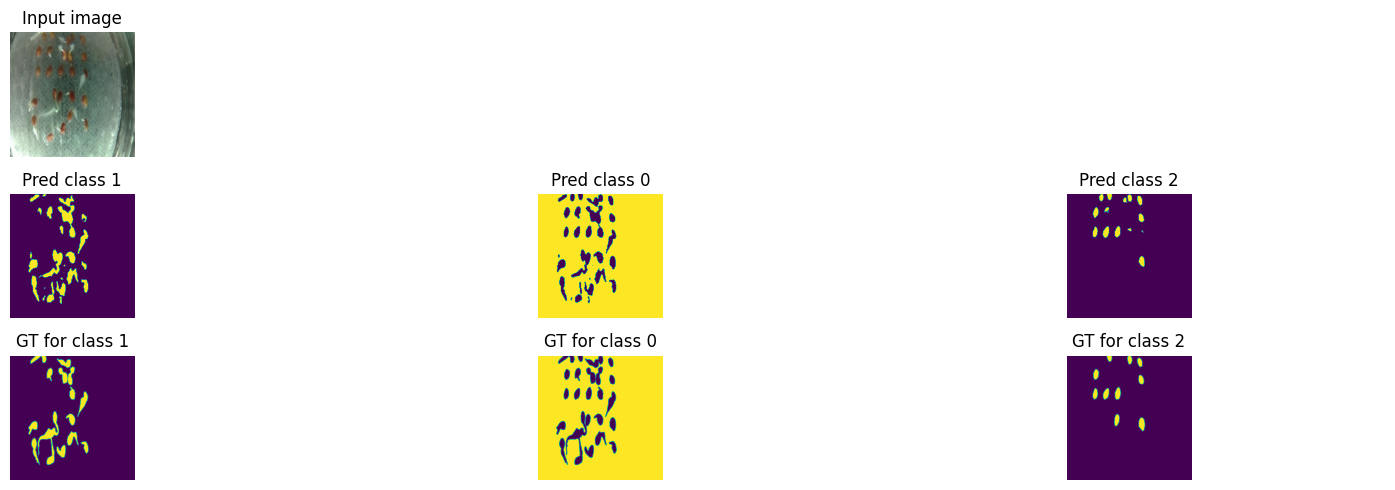

Train loss: 0.18931 | Time: 35m 1s | Val loss: 0.14210
Train_DICE_avg: 0.83632 | Train_Jaccard_avg: 0.77811 | Train_Sensitivity_avg: 0.87252 | Train_Specificity_avg: 0.96475 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98420 | Train_Sensitivity: 0.99062 | Train_Specificity: 0.90089 
Class 1 - Train_DICE: 0.65088 | Train_Jaccard: 0.57658 | Train_Sensitivity: 0.76967 | Train_Specificity: 0.99700 
Class 2 - Train_DICE: 0.86607 | Train_Jaccard: 0.77355 | Train_Sensitivity: 0.85726 | Train_Specificity: 0.99636 
Val_DICE_avg: 0.87134 | Val_Jaccard_avg: 0.82310 | Val_Sensitivity_avg: 0.90279 | Val_Specificity_avg: 0.95834 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99302 | Val_Sensitivity: 0.99711 | Val_Specificity: 0.88066 
Class 1 - Val_DICE: 0.73366 | Val_Jaccard: 0.67265 | Val_Sensitivity: 0.82131 | Val_Specificity: 0.99774 
Class 2 - Val_DICE: 0.88386 | Val_Jaccard: 0.80363 | Val_Sensitivity: 0.88995 | Val_Specificity: 0.99661 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.18631 | Time: 35m 41s | Val loss: 0.13969
Train_DICE_avg: 0.83693 | Train_Jaccard_avg: 0.77843 | Train_Sensitivity_avg: 0.87116 | Train_Specificity_avg: 0.96457 
Class 0 - Train_DICE: 0.99188 | Train_Jaccard: 0.98398 | Train_Sensitivity: 0.99040 | Train_Specificity: 0.90030 
Class 1 - Train_DICE: 0.65281 | Train_Jaccard: 0.57764 | Train_Sensitivity: 0.76520 | Train_Specificity: 0.99708 
Class 2 - Train_DICE: 0.86611 | Train_Jaccard: 0.77367 | Train_Sensitivity: 0.85789 | Train_Specificity: 0.99632 
Val_DICE_avg: 0.87357 | Val_Jaccard_avg: 0.82594 | Val_Sensitivity_avg: 0.90642 | Val_Specificity_avg: 0.95894 
Class 0 - Val_DICE: 0.99650 | Val_Jaccard: 0.99305 | Val_Sensitivity: 0.99711 | Val_Specificity: 0.88228 
Class 1 - Val_DICE: 0.73812 | Val_Jaccard: 0.67841 | Val_Sensitivity: 0.83646 | Val_Specificity: 0.99759 
Class 2 - Val_DICE: 0.88609 | Val_Jaccard: 0.80638 | Val_Sensitivity: 0.88569 | Val_Specificity: 0.99694 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.18828 | Time: 36m 21s | Val loss: 0.13992
Train_DICE_avg: 0.83815 | Train_Jaccard_avg: 0.77986 | Train_Sensitivity_avg: 0.87194 | Train_Specificity_avg: 0.96363 
Class 0 - Train_DICE: 0.99208 | Train_Jaccard: 0.98436 | Train_Sensitivity: 0.99091 | Train_Specificity: 0.89746 
Class 1 - Train_DICE: 0.65541 | Train_Jaccard: 0.58086 | Train_Sensitivity: 0.76537 | Train_Specificity: 0.99710 
Class 2 - Train_DICE: 0.86696 | Train_Jaccard: 0.77437 | Train_Sensitivity: 0.85953 | Train_Specificity: 0.99632 
Val_DICE_avg: 0.87335 | Val_Jaccard_avg: 0.82537 | Val_Sensitivity_avg: 0.90264 | Val_Specificity_avg: 0.95702 
Class 0 - Val_DICE: 0.99643 | Val_Jaccard: 0.99291 | Val_Sensitivity: 0.99722 | Val_Specificity: 0.87647 
Class 1 - Val_DICE: 0.73713 | Val_Jaccard: 0.67639 | Val_Sensitivity: 0.82209 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.88648 | Val_Jaccard: 0.80679 | Val_Sensitivity: 0.88862 | Val_Specificity: 0.99693 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


Train loss: 0.18587 | Time: 37m 0s | Val loss: 0.13418
Train_DICE_avg: 0.83947 | Train_Jaccard_avg: 0.78135 | Train_Sensitivity_avg: 0.87323 | Train_Specificity_avg: 0.96473 
Class 0 - Train_DICE: 0.99208 | Train_Jaccard: 0.98437 | Train_Sensitivity: 0.99079 | Train_Specificity: 0.90079 
Class 1 - Train_DICE: 0.65970 | Train_Jaccard: 0.58497 | Train_Sensitivity: 0.76932 | Train_Specificity: 0.99708 
Class 2 - Train_DICE: 0.86663 | Train_Jaccard: 0.77472 | Train_Sensitivity: 0.85958 | Train_Specificity: 0.99633 
Val_DICE_avg: 0.87904 | Val_Jaccard_avg: 0.83081 | Val_Sensitivity_avg: 0.90832 | Val_Specificity_avg: 0.95725 
Class 0 - Val_DICE: 0.99645 | Val_Jaccard: 0.99294 | Val_Sensitivity: 0.99720 | Val_Specificity: 0.87718 
Class 1 - Val_DICE: 0.75499 | Val_Jaccard: 0.69370 | Val_Sensitivity: 0.83980 | Val_Specificity: 0.99767 
Class 2 - Val_DICE: 0.88569 | Val_Jaccard: 0.80579 | Val_Sensitivity: 0.88795 | Val_Specificity: 0.99690 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]


Train loss: 0.18584 | Time: 37m 40s | Val loss: 0.13411
Train_DICE_avg: 0.83851 | Train_Jaccard_avg: 0.78017 | Train_Sensitivity_avg: 0.87384 | Train_Specificity_avg: 0.96397 
Class 0 - Train_DICE: 0.99221 | Train_Jaccard: 0.98460 | Train_Sensitivity: 0.99098 | Train_Specificity: 0.89848 
Class 1 - Train_DICE: 0.65555 | Train_Jaccard: 0.57988 | Train_Sensitivity: 0.77070 | Train_Specificity: 0.99708 
Class 2 - Train_DICE: 0.86779 | Train_Jaccard: 0.77602 | Train_Sensitivity: 0.85983 | Train_Specificity: 0.99636 
Val_DICE_avg: 0.87901 | Val_Jaccard_avg: 0.83115 | Val_Sensitivity_avg: 0.91086 | Val_Specificity_avg: 0.95917 
Class 0 - Val_DICE: 0.99648 | Val_Jaccard: 0.99300 | Val_Sensitivity: 0.99712 | Val_Specificity: 0.88301 
Class 1 - Val_DICE: 0.75416 | Val_Jaccard: 0.69381 | Val_Sensitivity: 0.84801 | Val_Specificity: 0.99758 
Class 2 - Val_DICE: 0.88638 | Val_Jaccard: 0.80665 | Val_Sensitivity: 0.88746 | Val_Specificity: 0.99693 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]


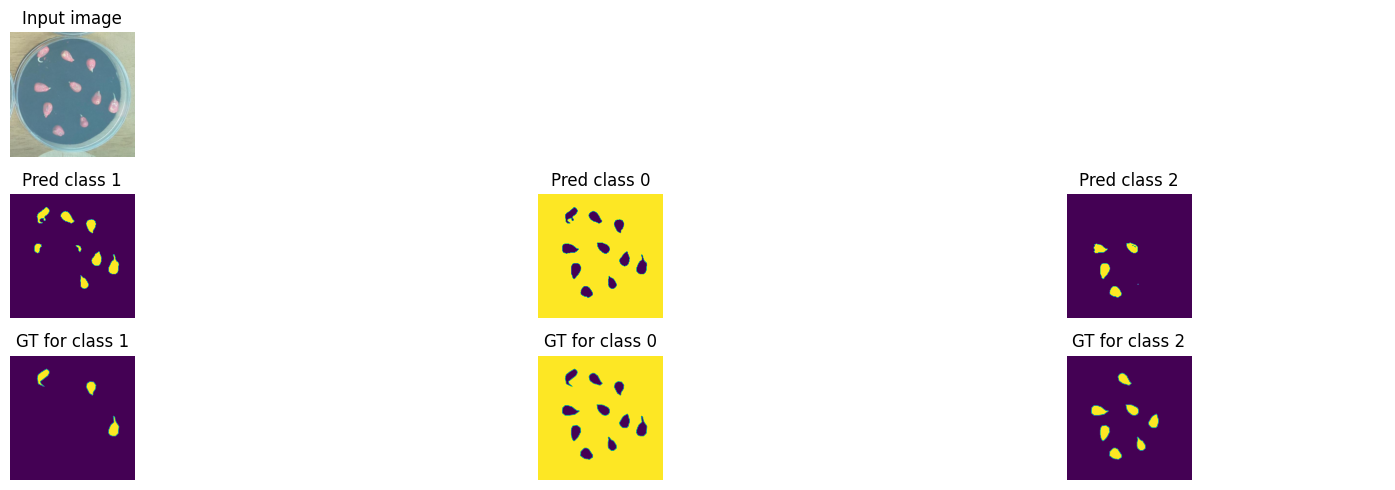

Train loss: 0.18497 | Time: 38m 20s | Val loss: 0.13382
Train_DICE_avg: 0.84032 | Train_Jaccard_avg: 0.78226 | Train_Sensitivity_avg: 0.87432 | Train_Specificity_avg: 0.96500 
Class 0 - Train_DICE: 0.99200 | Train_Jaccard: 0.98419 | Train_Sensitivity: 0.99049 | Train_Specificity: 0.90155 
Class 1 - Train_DICE: 0.66133 | Train_Jaccard: 0.58706 | Train_Sensitivity: 0.77241 | Train_Specificity: 0.99712 
Class 2 - Train_DICE: 0.86763 | Train_Jaccard: 0.77554 | Train_Sensitivity: 0.86007 | Train_Specificity: 0.99632 
Val_DICE_avg: 0.87992 | Val_Jaccard_avg: 0.83163 | Val_Sensitivity_avg: 0.91110 | Val_Specificity_avg: 0.95921 
Class 0 - Val_DICE: 0.99649 | Val_Jaccard: 0.99302 | Val_Sensitivity: 0.99712 | Val_Specificity: 0.88311 
Class 1 - Val_DICE: 0.75685 | Val_Jaccard: 0.69514 | Val_Sensitivity: 0.84645 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.88641 | Val_Jaccard: 0.80672 | Val_Sensitivity: 0.88974 | Val_Specificity: 0.99688 


wandb: uploading artifact best_model
wandb: uploading history steps 59-60, summary, console lines 787-797
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▂▃▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇██████████████████
wandb:       Training Jaccard ▁▂▂▃▃▄▄▄▄▅▅▅▅▆▆▇▇▇▇▇▇▇██████████████████
wandb:          Training Loss █▇▆▅▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▂▃▃▃▅▅▅▅▅▅▅▆▇▇▇▇▇▇▇▇███████████████████
wandb:   Training Specificity ▁▄▇▇██▇▇▇▇▇▇▇▇▆▆▆▆▆▇▆▆▆▇▆▇▆▇▇▆▇▇▇▆▇▇▇▇▇▇
wandb:        Validation DICE ▁▁▁▂▃▃▄▄▅▅▅▅▅▆▇▇▇▇▇▇▇███▇███████████████
wandb:     Validation Jaccard ▁▁▂▃▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇██████████████████
wandb:        Validation Loss ██▇▆▆▅▄▄▄▃▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▁▁▂▃▃▄▄▄▄▅▅▇▇▇▇▇▇▇▇████████████████████
wandb: Validation Specificity ▃▄▅▇▇██▆▃▃▂▁▃▃▂▂▂▃▂▃▂▃▃▁▂▂▂▃▂▃▂▂▂▂▂▂▂▂▂▂
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.84032
wan


Training complete!


In [13]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = DeepLabV3Plus(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]



Global Performance Metrics:
Loss mean: 0.14680, std: 0.03048
Dice Coefficient mean: 0.84338, std: 0.13331
Jaccard Index mean: 0.78820, std: 0.14717
Sensitivity mean: 0.85950, std: 0.12740
Specificity mean: 0.95481, std: 0.03633

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99569, std: 0.00231
Jaccard mean: 0.99143, std: 0.00455
Sensitivity mean: 0.99583, std: 0.00230
Specificity mean: 0.87144, std: 0.10879

Class 1:
Dice mean: 0.67955, std: 0.36603
Jaccard mean: 0.61753, std: 0.37524
Sensitivity mean: 0.70593, std: 0.37110
Specificity mean: 0.99732, std: 0.00473

Class 2:
Dice mean: 0.85488, std: 0.08589
Jaccard mean: 0.75564, std: 0.11983
Sensitivity mean: 0.87672, std: 0.09741
Specificity mean: 0.99568, std: 0.00309


### Cross-Entropy Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Backbone"] = "resnet34"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-DeepLabV3+-ResNet34-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.19 GB
GPU Memory - Reserved: 1.13 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251113_213953-4c2i4651
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-DeepLabV3+-ResNet34-CrossEntropy
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/4c2i4651



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


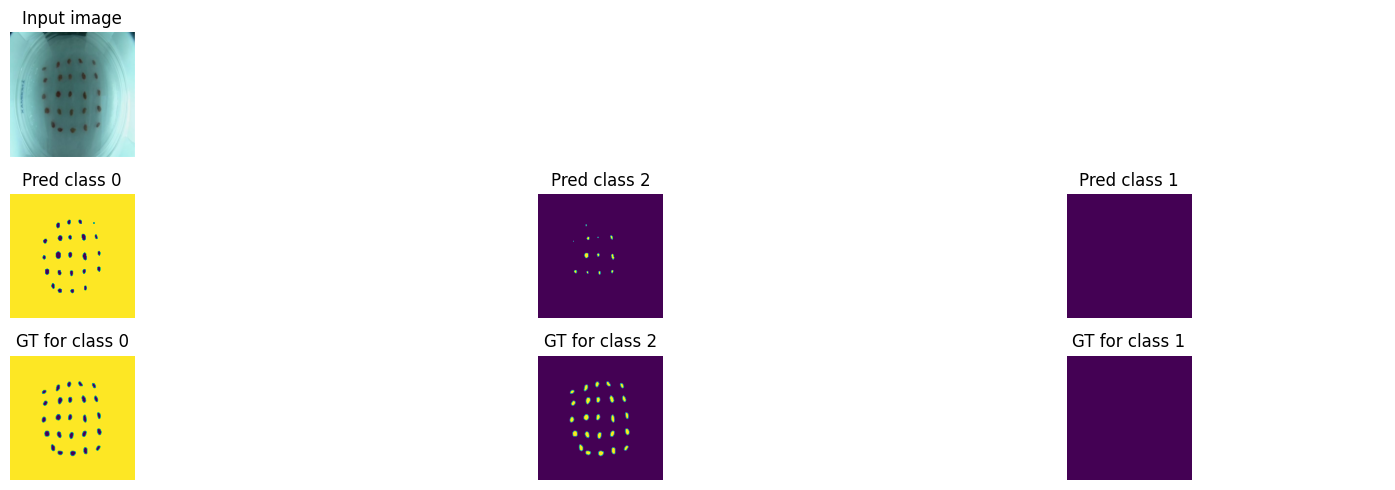

Train loss: 0.52252 | Time: 0m 31s | Val loss: 0.38159
Train_DICE_avg: 0.26395 | Train_Jaccard_avg: 0.22049 | Train_Sensitivity_avg: 0.76039 | Train_Specificity_avg: 0.70362 
Class 0 - Train_DICE: 0.64786 | Train_Jaccard: 0.53641 | Train_Sensitivity: 0.99392 | Train_Specificity: 0.16418 
Class 1 - Train_DICE: 0.11701 | Train_Jaccard: 0.10894 | Train_Sensitivity: 0.38572 | Train_Specificity: 0.98644 
Class 2 - Train_DICE: 0.02697 | Train_Jaccard: 0.01612 | Train_Sensitivity: 0.90153 | Train_Specificity: 0.96025 
Val_DICE_avg: 0.46569 | Val_Jaccard_avg: 0.43637 | Val_Sensitivity_avg: 0.88803 | Val_Specificity_avg: 0.73192 
Class 0 - Val_DICE: 0.94652 | Val_Jaccard: 0.90415 | Val_Sensitivity: 0.99737 | Val_Specificity: 0.24540 
Class 1 - Val_DICE: 0.32560 | Val_Jaccard: 0.32117 | Val_Sensitivity: 0.73677 | Val_Specificity: 0.98897 
Class 2 - Val_DICE: 0.12495 | Val_Jaccard: 0.08381 | Val_Sensitivity: 0.92995 | Val_Specificity: 0.96139 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]


Train loss: 0.28096 | Time: 1m 1s | Val loss: 0.21721
Train_DICE_avg: 0.47337 | Train_Jaccard_avg: 0.43691 | Train_Sensitivity_avg: 0.94281 | Train_Specificity_avg: 0.80752 
Class 0 - Train_DICE: 0.96091 | Train_Jaccard: 0.92654 | Train_Sensitivity: 0.99292 | Train_Specificity: 0.47018 
Class 1 - Train_DICE: 0.25466 | Train_Jaccard: 0.25410 | Train_Sensitivity: 0.92267 | Train_Specificity: 0.98594 
Class 2 - Train_DICE: 0.20453 | Train_Jaccard: 0.13007 | Train_Sensitivity: 0.91282 | Train_Specificity: 0.96645 
Val_DICE_avg: 0.61612 | Val_Jaccard_avg: 0.57007 | Val_Sensitivity_avg: 0.96602 | Val_Specificity_avg: 0.83496 
Class 0 - Val_DICE: 0.98528 | Val_Jaccard: 0.97129 | Val_Sensitivity: 0.99716 | Val_Specificity: 0.54515 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.39483 | Val_Jaccard: 0.27067 | Val_Sensitivity: 0.90092 | Val_Specificity: 0.97139 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Train loss: 0.18535 | Time: 1m 32s | Val loss: 0.14161
Train_DICE_avg: 0.56128 | Train_Jaccard_avg: 0.51205 | Train_Sensitivity_avg: 0.95565 | Train_Specificity_avg: 0.85968 
Class 0 - Train_DICE: 0.97978 | Train_Jaccard: 0.96063 | Train_Sensitivity: 0.99133 | Train_Specificity: 0.61854 
Class 1 - Train_DICE: 0.26867 | Train_Jaccard: 0.26856 | Train_Sensitivity: 0.98256 | Train_Specificity: 0.98584 
Class 2 - Train_DICE: 0.43539 | Train_Jaccard: 0.30697 | Train_Sensitivity: 0.89308 | Train_Specificity: 0.97466 
Val_DICE_avg: 0.64837 | Val_Jaccard_avg: 0.60020 | Val_Sensitivity_avg: 0.96516 | Val_Specificity_avg: 0.86216 
Class 0 - Val_DICE: 0.98894 | Val_Jaccard: 0.97822 | Val_Sensitivity: 0.99710 | Val_Specificity: 0.62235 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.48792 | Val_Jaccard: 0.35414 | Val_Sensitivity: 0.89837 | Val_Specificity: 0.97579 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Train loss: 0.13593 | Time: 2m 3s | Val loss: 0.10921
Train_DICE_avg: 0.59525 | Train_Jaccard_avg: 0.54575 | Train_Sensitivity_avg: 0.95684 | Train_Specificity_avg: 0.88288 
Class 0 - Train_DICE: 0.98402 | Train_Jaccard: 0.96870 | Train_Sensitivity: 0.99094 | Train_Specificity: 0.68419 
Class 1 - Train_DICE: 0.28133 | Train_Jaccard: 0.28125 | Train_Sensitivity: 0.99135 | Train_Specificity: 0.98592 
Class 2 - Train_DICE: 0.52039 | Train_Jaccard: 0.38729 | Train_Sensitivity: 0.88823 | Train_Specificity: 0.97853 
Val_DICE_avg: 0.66578 | Val_Jaccard_avg: 0.61874 | Val_Sensitivity_avg: 0.96443 | Val_Specificity_avg: 0.85398 
Class 0 - Val_DICE: 0.98902 | Val_Jaccard: 0.97837 | Val_Sensitivity: 0.99736 | Val_Specificity: 0.59447 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.54005 | Val_Jaccard: 0.40959 | Val_Sensitivity: 0.89594 | Val_Specificity: 0.97912 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]


Train loss: 0.10738 | Time: 2m 33s | Val loss: 0.08504
Train_DICE_avg: 0.60798 | Train_Jaccard_avg: 0.55943 | Train_Sensitivity_avg: 0.95279 | Train_Specificity_avg: 0.89088 
Class 0 - Train_DICE: 0.98589 | Train_Jaccard: 0.97228 | Train_Sensitivity: 0.99138 | Train_Specificity: 0.70638 
Class 1 - Train_DICE: 0.27488 | Train_Jaccard: 0.27484 | Train_Sensitivity: 0.99020 | Train_Specificity: 0.98558 
Class 2 - Train_DICE: 0.56318 | Train_Jaccard: 0.43116 | Train_Sensitivity: 0.87681 | Train_Specificity: 0.98070 
Val_DICE_avg: 0.66860 | Val_Jaccard_avg: 0.62066 | Val_Sensitivity_avg: 0.95953 | Val_Specificity_avg: 0.85976 
Class 0 - Val_DICE: 0.99011 | Val_Jaccard: 0.98047 | Val_Sensitivity: 0.99751 | Val_Specificity: 0.61192 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.54743 | Val_Jaccard: 0.41325 | Val_Sensitivity: 0.88109 | Val_Specificity: 0.97904 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


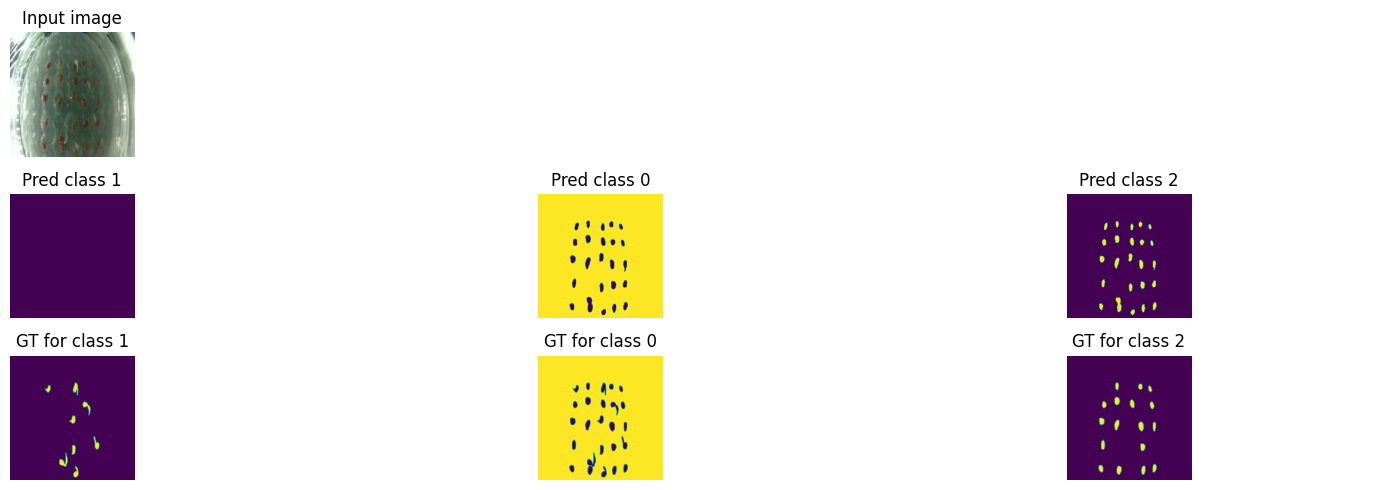

Train loss: 0.08955 | Time: 3m 4s | Val loss: 0.07215
Train_DICE_avg: 0.61600 | Train_Jaccard_avg: 0.56791 | Train_Sensitivity_avg: 0.95146 | Train_Specificity_avg: 0.89517 
Class 0 - Train_DICE: 0.98674 | Train_Jaccard: 0.97392 | Train_Sensitivity: 0.99159 | Train_Specificity: 0.71823 
Class 1 - Train_DICE: 0.27528 | Train_Jaccard: 0.27524 | Train_Sensitivity: 0.99553 | Train_Specificity: 0.98555 
Class 2 - Train_DICE: 0.58599 | Train_Jaccard: 0.45455 | Train_Sensitivity: 0.86727 | Train_Specificity: 0.98173 
Val_DICE_avg: 0.64683 | Val_Jaccard_avg: 0.59882 | Val_Sensitivity_avg: 0.92133 | Val_Specificity_avg: 0.86617 
Class 0 - Val_DICE: 0.99095 | Val_Jaccard: 0.98211 | Val_Sensitivity: 0.99753 | Val_Specificity: 0.63045 
Class 1 - Val_DICE: 0.38740 | Val_Jaccard: 0.38735 | Val_Sensitivity: 0.88571 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.56215 | Val_Jaccard: 0.42700 | Val_Sensitivity: 0.88074 | Val_Specificity: 0.97973 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]


Train loss: 0.07709 | Time: 3m 34s | Val loss: 0.06245
Train_DICE_avg: 0.62145 | Train_Jaccard_avg: 0.57260 | Train_Sensitivity_avg: 0.94928 | Train_Specificity_avg: 0.89809 
Class 0 - Train_DICE: 0.98740 | Train_Jaccard: 0.97522 | Train_Sensitivity: 0.99194 | Train_Specificity: 0.72657 
Class 1 - Train_DICE: 0.27254 | Train_Jaccard: 0.27250 | Train_Sensitivity: 0.99216 | Train_Specificity: 0.98544 
Class 2 - Train_DICE: 0.60442 | Train_Jaccard: 0.47008 | Train_Sensitivity: 0.86373 | Train_Specificity: 0.98227 
Val_DICE_avg: 0.68061 | Val_Jaccard_avg: 0.63057 | Val_Sensitivity_avg: 0.95734 | Val_Specificity_avg: 0.85508 
Class 0 - Val_DICE: 0.99048 | Val_Jaccard: 0.98120 | Val_Sensitivity: 0.99785 | Val_Specificity: 0.59682 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.58311 | Val_Jaccard: 0.44226 | Val_Sensitivity: 0.87417 | Val_Specificity: 0.98009 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]


Train loss: 0.06818 | Time: 4m 5s | Val loss: 0.05414
Train_DICE_avg: 0.63127 | Train_Jaccard_avg: 0.58236 | Train_Sensitivity_avg: 0.94989 | Train_Specificity_avg: 0.90269 
Class 0 - Train_DICE: 0.98781 | Train_Jaccard: 0.97601 | Train_Sensitivity: 0.99196 | Train_Specificity: 0.73864 
Class 1 - Train_DICE: 0.27821 | Train_Jaccard: 0.27813 | Train_Sensitivity: 0.99492 | Train_Specificity: 0.98598 
Class 2 - Train_DICE: 0.62780 | Train_Jaccard: 0.49293 | Train_Sensitivity: 0.86280 | Train_Specificity: 0.98344 
Val_DICE_avg: 0.68784 | Val_Jaccard_avg: 0.63783 | Val_Sensitivity_avg: 0.95686 | Val_Specificity_avg: 0.86453 
Class 0 - Val_DICE: 0.99121 | Val_Jaccard: 0.98263 | Val_Sensitivity: 0.99773 | Val_Specificity: 0.62424 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60404 | Val_Jaccard: 0.46262 | Val_Sensitivity: 0.87283 | Val_Specificity: 0.98101 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.06134 | Time: 4m 35s | Val loss: 0.04911
Train_DICE_avg: 0.64009 | Train_Jaccard_avg: 0.59082 | Train_Sensitivity_avg: 0.95069 | Train_Specificity_avg: 0.90483 
Class 0 - Train_DICE: 0.98829 | Train_Jaccard: 0.97693 | Train_Sensitivity: 0.99253 | Train_Specificity: 0.74497 
Class 1 - Train_DICE: 0.29012 | Train_Jaccard: 0.29007 | Train_Sensitivity: 0.99637 | Train_Specificity: 0.98569 
Class 2 - Train_DICE: 0.64184 | Train_Jaccard: 0.50545 | Train_Sensitivity: 0.86317 | Train_Specificity: 0.98384 
Val_DICE_avg: 0.68755 | Val_Jaccard_avg: 0.63636 | Val_Sensitivity_avg: 0.95711 | Val_Specificity_avg: 0.86160 
Class 0 - Val_DICE: 0.99118 | Val_Jaccard: 0.98259 | Val_Sensitivity: 0.99794 | Val_Specificity: 0.61612 
Class 1 - Val_DICE: 0.46842 | Val_Jaccard: 0.46834 | Val_Sensitivity: 0.99048 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60304 | Val_Jaccard: 0.45815 | Val_Sensitivity: 0.88293 | Val_Specificity: 0.98034 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


Train loss: 0.05606 | Time: 5m 6s | Val loss: 0.04390
Train_DICE_avg: 0.63884 | Train_Jaccard_avg: 0.58941 | Train_Sensitivity_avg: 0.95255 | Train_Specificity_avg: 0.90394 
Class 0 - Train_DICE: 0.98859 | Train_Jaccard: 0.97752 | Train_Sensitivity: 0.99288 | Train_Specificity: 0.74216 
Class 1 - Train_DICE: 0.27673 | Train_Jaccard: 0.27669 | Train_Sensitivity: 0.99488 | Train_Specificity: 0.98567 
Class 2 - Train_DICE: 0.65122 | Train_Jaccard: 0.51402 | Train_Sensitivity: 0.86987 | Train_Specificity: 0.98399 
Val_DICE_avg: 0.69158 | Val_Jaccard_avg: 0.64045 | Val_Sensitivity_avg: 0.96478 | Val_Specificity_avg: 0.85996 
Class 0 - Val_DICE: 0.99127 | Val_Jaccard: 0.98274 | Val_Sensitivity: 0.99803 | Val_Specificity: 0.61091 
Class 1 - Val_DICE: 0.46830 | Val_Jaccard: 0.46828 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.61518 | Val_Jaccard: 0.47032 | Val_Sensitivity: 0.89630 | Val_Specificity: 0.98064 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


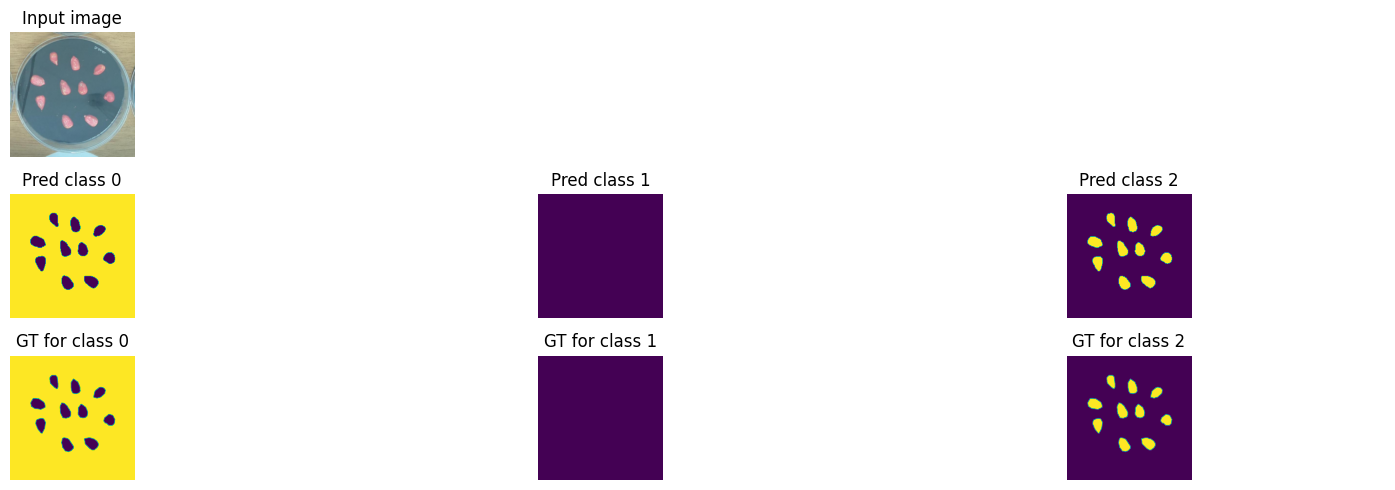

Train loss: 0.04728 | Time: 5m 43s | Val loss: 0.03338
Train_DICE_avg: 0.64435 | Train_Jaccard_avg: 0.59522 | Train_Sensitivity_avg: 0.95512 | Train_Specificity_avg: 0.90578 
Class 0 - Train_DICE: 0.98900 | Train_Jaccard: 0.97832 | Train_Sensitivity: 0.99325 | Train_Specificity: 0.74706 
Class 1 - Train_DICE: 0.27623 | Train_Jaccard: 0.27587 | Train_Sensitivity: 0.99370 | Train_Specificity: 0.98567 
Class 2 - Train_DICE: 0.66783 | Train_Jaccard: 0.53148 | Train_Sensitivity: 0.87841 | Train_Specificity: 0.98462 
Val_DICE_avg: 0.70740 | Val_Jaccard_avg: 0.65678 | Val_Sensitivity_avg: 0.96382 | Val_Specificity_avg: 0.86117 
Class 0 - Val_DICE: 0.99156 | Val_Jaccard: 0.98330 | Val_Sensitivity: 0.99810 | Val_Specificity: 0.61244 
Class 1 - Val_DICE: 0.46957 | Val_Jaccard: 0.46893 | Val_Sensitivity: 0.99309 | Val_Specificity: 0.98839 
Class 2 - Val_DICE: 0.66107 | Val_Jaccard: 0.51810 | Val_Sensitivity: 0.90027 | Val_Specificity: 0.98267 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.03997 | Time: 6m 19s | Val loss: 0.02903
Train_DICE_avg: 0.65476 | Train_Jaccard_avg: 0.60542 | Train_Sensitivity_avg: 0.95112 | Train_Specificity_avg: 0.90861 
Class 0 - Train_DICE: 0.98923 | Train_Jaccard: 0.97877 | Train_Sensitivity: 0.99319 | Train_Specificity: 0.75428 
Class 1 - Train_DICE: 0.28814 | Train_Jaccard: 0.28543 | Train_Sensitivity: 0.98140 | Train_Specificity: 0.98598 
Class 2 - Train_DICE: 0.68691 | Train_Jaccard: 0.55207 | Train_Sensitivity: 0.87879 | Train_Specificity: 0.98558 
Val_DICE_avg: 0.71721 | Val_Jaccard_avg: 0.66426 | Val_Sensitivity_avg: 0.96472 | Val_Specificity_avg: 0.85317 
Class 0 - Val_DICE: 0.99062 | Val_Jaccard: 0.98148 | Val_Sensitivity: 0.99858 | Val_Specificity: 0.58725 
Class 1 - Val_DICE: 0.49229 | Val_Jaccard: 0.48235 | Val_Sensitivity: 0.96992 | Val_Specificity: 0.98913 
Class 2 - Val_DICE: 0.66873 | Val_Jaccard: 0.52896 | Val_Sensitivity: 0.92566 | Val_Specificity: 0.98313 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.03553 | Time: 6m 56s | Val loss: 0.02603
Train_DICE_avg: 0.65945 | Train_Jaccard_avg: 0.60886 | Train_Sensitivity_avg: 0.94716 | Train_Specificity_avg: 0.90693 
Class 0 - Train_DICE: 0.98976 | Train_Jaccard: 0.97978 | Train_Sensitivity: 0.99417 | Train_Specificity: 0.74957 
Class 1 - Train_DICE: 0.29070 | Train_Jaccard: 0.28281 | Train_Sensitivity: 0.95856 | Train_Specificity: 0.98556 
Class 2 - Train_DICE: 0.69789 | Train_Jaccard: 0.56399 | Train_Sensitivity: 0.88874 | Train_Specificity: 0.98567 
Val_DICE_avg: 0.72724 | Val_Jaccard_avg: 0.67410 | Val_Sensitivity_avg: 0.96632 | Val_Specificity_avg: 0.86098 
Class 0 - Val_DICE: 0.99159 | Val_Jaccard: 0.98336 | Val_Sensitivity: 0.99853 | Val_Specificity: 0.60956 
Class 1 - Val_DICE: 0.50302 | Val_Jaccard: 0.48927 | Val_Sensitivity: 0.96996 | Val_Specificity: 0.98945 
Class 2 - Val_DICE: 0.68712 | Val_Jaccard: 0.54969 | Val_Sensitivity: 0.93046 | Val_Specificity: 0.98394 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.03384 | Time: 7m 33s | Val loss: 0.02442
Train_DICE_avg: 0.66562 | Train_Jaccard_avg: 0.61380 | Train_Sensitivity_avg: 0.94335 | Train_Specificity_avg: 0.90807 
Class 0 - Train_DICE: 0.98977 | Train_Jaccard: 0.97982 | Train_Sensitivity: 0.99400 | Train_Specificity: 0.75198 
Class 1 - Train_DICE: 0.30153 | Train_Jaccard: 0.28817 | Train_Sensitivity: 0.94391 | Train_Specificity: 0.98614 
Class 2 - Train_DICE: 0.70557 | Train_Jaccard: 0.57340 | Train_Sensitivity: 0.89214 | Train_Specificity: 0.98610 
Val_DICE_avg: 0.73520 | Val_Jaccard_avg: 0.67754 | Val_Sensitivity_avg: 0.95729 | Val_Specificity_avg: 0.85963 
Class 0 - Val_DICE: 0.99155 | Val_Jaccard: 0.98329 | Val_Sensitivity: 0.99882 | Val_Specificity: 0.60515 
Class 1 - Val_DICE: 0.53462 | Val_Jaccard: 0.50801 | Val_Sensitivity: 0.93590 | Val_Specificity: 0.99056 
Class 2 - Val_DICE: 0.67943 | Val_Jaccard: 0.54131 | Val_Sensitivity: 0.93714 | Val_Specificity: 0.98318 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


Train loss: 0.03223 | Time: 8m 9s | Val loss: 0.02282
Train_DICE_avg: 0.67892 | Train_Jaccard_avg: 0.62520 | Train_Sensitivity_avg: 0.94019 | Train_Specificity_avg: 0.90881 
Class 0 - Train_DICE: 0.98981 | Train_Jaccard: 0.97989 | Train_Sensitivity: 0.99425 | Train_Specificity: 0.75286 
Class 1 - Train_DICE: 0.33399 | Train_Jaccard: 0.31280 | Train_Sensitivity: 0.93052 | Train_Specificity: 0.98691 
Class 2 - Train_DICE: 0.71294 | Train_Jaccard: 0.58293 | Train_Sensitivity: 0.89579 | Train_Specificity: 0.98665 
Val_DICE_avg: 0.73424 | Val_Jaccard_avg: 0.67629 | Val_Sensitivity_avg: 0.96055 | Val_Specificity_avg: 0.86313 
Class 0 - Val_DICE: 0.99198 | Val_Jaccard: 0.98412 | Val_Sensitivity: 0.99879 | Val_Specificity: 0.61589 
Class 1 - Val_DICE: 0.53735 | Val_Jaccard: 0.50978 | Val_Sensitivity: 0.93877 | Val_Specificity: 0.99047 
Class 2 - Val_DICE: 0.67338 | Val_Jaccard: 0.53497 | Val_Sensitivity: 0.94407 | Val_Specificity: 0.98303 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]


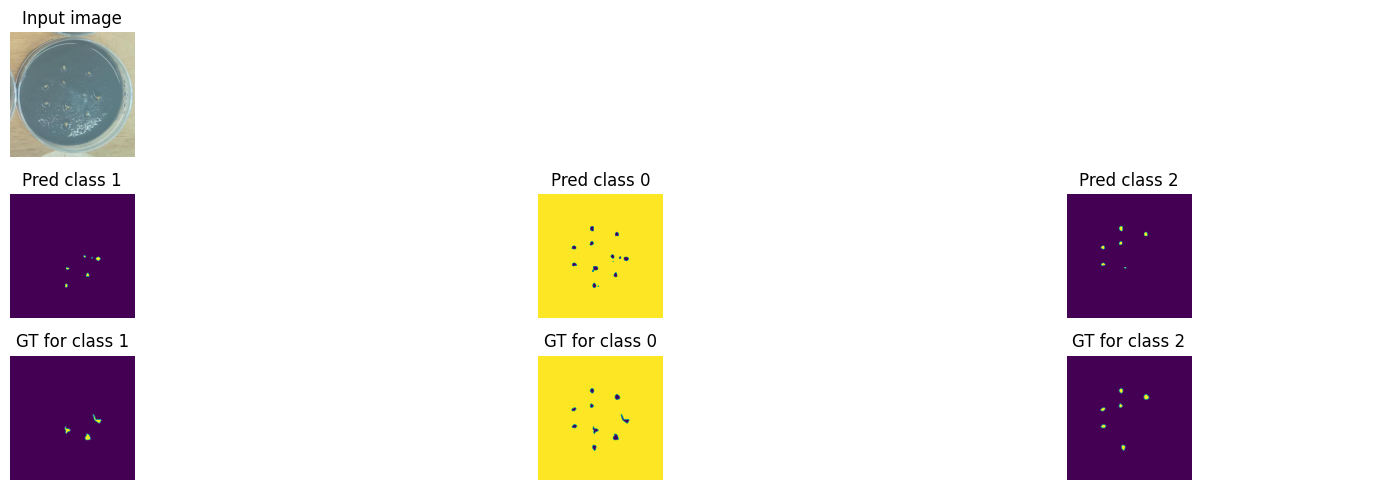

Train loss: 0.03084 | Time: 8m 47s | Val loss: 0.02224
Train_DICE_avg: 0.68378 | Train_Jaccard_avg: 0.62945 | Train_Sensitivity_avg: 0.93486 | Train_Specificity_avg: 0.91098 
Class 0 - Train_DICE: 0.99024 | Train_Jaccard: 0.98073 | Train_Sensitivity: 0.99467 | Train_Specificity: 0.75922 
Class 1 - Train_DICE: 0.34192 | Train_Jaccard: 0.31705 | Train_Sensitivity: 0.91082 | Train_Specificity: 0.98683 
Class 2 - Train_DICE: 0.71917 | Train_Jaccard: 0.59058 | Train_Sensitivity: 0.89910 | Train_Specificity: 0.98689 
Val_DICE_avg: 0.75019 | Val_Jaccard_avg: 0.68839 | Val_Sensitivity_avg: 0.95665 | Val_Specificity_avg: 0.85749 
Class 0 - Val_DICE: 0.99143 | Val_Jaccard: 0.98305 | Val_Sensitivity: 0.99902 | Val_Specificity: 0.59769 
Class 1 - Val_DICE: 0.58563 | Val_Jaccard: 0.54428 | Val_Sensitivity: 0.92179 | Val_Specificity: 0.99134 
Class 2 - Val_DICE: 0.67351 | Val_Jaccard: 0.53783 | Val_Sensitivity: 0.94915 | Val_Specificity: 0.98343 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


Train loss: 0.02983 | Time: 9m 23s | Val loss: 0.02153
Train_DICE_avg: 0.68570 | Train_Jaccard_avg: 0.63005 | Train_Sensitivity_avg: 0.93528 | Train_Specificity_avg: 0.91134 
Class 0 - Train_DICE: 0.99042 | Train_Jaccard: 0.98107 | Train_Sensitivity: 0.99482 | Train_Specificity: 0.75986 
Class 1 - Train_DICE: 0.34426 | Train_Jaccard: 0.31580 | Train_Sensitivity: 0.91213 | Train_Specificity: 0.98718 
Class 2 - Train_DICE: 0.72241 | Train_Jaccard: 0.59328 | Train_Sensitivity: 0.89888 | Train_Specificity: 0.98698 
Val_DICE_avg: 0.74139 | Val_Jaccard_avg: 0.68025 | Val_Sensitivity_avg: 0.95087 | Val_Specificity_avg: 0.86572 
Class 0 - Val_DICE: 0.99210 | Val_Jaccard: 0.98437 | Val_Sensitivity: 0.99892 | Val_Specificity: 0.62259 
Class 1 - Val_DICE: 0.55393 | Val_Jaccard: 0.51607 | Val_Sensitivity: 0.90413 | Val_Specificity: 0.99140 
Class 2 - Val_DICE: 0.67813 | Val_Jaccard: 0.54030 | Val_Sensitivity: 0.94956 | Val_Specificity: 0.98317 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Train loss: 0.02911 | Time: 10m 0s | Val loss: 0.02101
Train_DICE_avg: 0.68918 | Train_Jaccard_avg: 0.63297 | Train_Sensitivity_avg: 0.93284 | Train_Specificity_avg: 0.91149 
Class 0 - Train_DICE: 0.99056 | Train_Jaccard: 0.98135 | Train_Sensitivity: 0.99506 | Train_Specificity: 0.76007 
Class 1 - Train_DICE: 0.35052 | Train_Jaccard: 0.31912 | Train_Sensitivity: 0.90243 | Train_Specificity: 0.98727 
Class 2 - Train_DICE: 0.72645 | Train_Jaccard: 0.59844 | Train_Sensitivity: 0.90103 | Train_Specificity: 0.98713 
Val_DICE_avg: 0.75643 | Val_Jaccard_avg: 0.69364 | Val_Sensitivity_avg: 0.95962 | Val_Specificity_avg: 0.86026 
Class 0 - Val_DICE: 0.99166 | Val_Jaccard: 0.98351 | Val_Sensitivity: 0.99907 | Val_Specificity: 0.60576 
Class 1 - Val_DICE: 0.58845 | Val_Jaccard: 0.54717 | Val_Sensitivity: 0.93559 | Val_Specificity: 0.99153 
Class 2 - Val_DICE: 0.68919 | Val_Jaccard: 0.55026 | Val_Sensitivity: 0.94420 | Val_Specificity: 0.98349 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.02841 | Time: 10m 37s | Val loss: 0.02046
Train_DICE_avg: 0.69338 | Train_Jaccard_avg: 0.63626 | Train_Sensitivity_avg: 0.93330 | Train_Specificity_avg: 0.91123 
Class 0 - Train_DICE: 0.99069 | Train_Jaccard: 0.98161 | Train_Sensitivity: 0.99520 | Train_Specificity: 0.75899 
Class 1 - Train_DICE: 0.35871 | Train_Jaccard: 0.32421 | Train_Sensitivity: 0.90381 | Train_Specificity: 0.98746 
Class 2 - Train_DICE: 0.73074 | Train_Jaccard: 0.60297 | Train_Sensitivity: 0.90088 | Train_Specificity: 0.98725 
Val_DICE_avg: 0.76119 | Val_Jaccard_avg: 0.69901 | Val_Sensitivity_avg: 0.96297 | Val_Specificity_avg: 0.86359 
Class 0 - Val_DICE: 0.99206 | Val_Jaccard: 0.98427 | Val_Sensitivity: 0.99906 | Val_Specificity: 0.61533 
Class 1 - Val_DICE: 0.59554 | Val_Jaccard: 0.55455 | Val_Sensitivity: 0.94163 | Val_Specificity: 0.99163 
Class 2 - Val_DICE: 0.69597 | Val_Jaccard: 0.55822 | Val_Sensitivity: 0.94821 | Val_Specificity: 0.98380 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]


Train loss: 0.02751 | Time: 11m 14s | Val loss: 0.02028
Train_DICE_avg: 0.69995 | Train_Jaccard_avg: 0.64197 | Train_Sensitivity_avg: 0.93458 | Train_Specificity_avg: 0.91085 
Class 0 - Train_DICE: 0.99090 | Train_Jaccard: 0.98201 | Train_Sensitivity: 0.99547 | Train_Specificity: 0.75769 
Class 1 - Train_DICE: 0.37433 | Train_Jaccard: 0.33728 | Train_Sensitivity: 0.90350 | Train_Specificity: 0.98749 
Class 2 - Train_DICE: 0.73461 | Train_Jaccard: 0.60662 | Train_Sensitivity: 0.90476 | Train_Specificity: 0.98737 
Val_DICE_avg: 0.77588 | Val_Jaccard_avg: 0.71089 | Val_Sensitivity_avg: 0.95769 | Val_Specificity_avg: 0.85750 
Class 0 - Val_DICE: 0.99140 | Val_Jaccard: 0.98299 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.59581 
Class 1 - Val_DICE: 0.62275 | Val_Jaccard: 0.57417 | Val_Sensitivity: 0.92569 | Val_Specificity: 0.99247 
Class 2 - Val_DICE: 0.71349 | Val_Jaccard: 0.57550 | Val_Sensitivity: 0.94815 | Val_Specificity: 0.98422 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


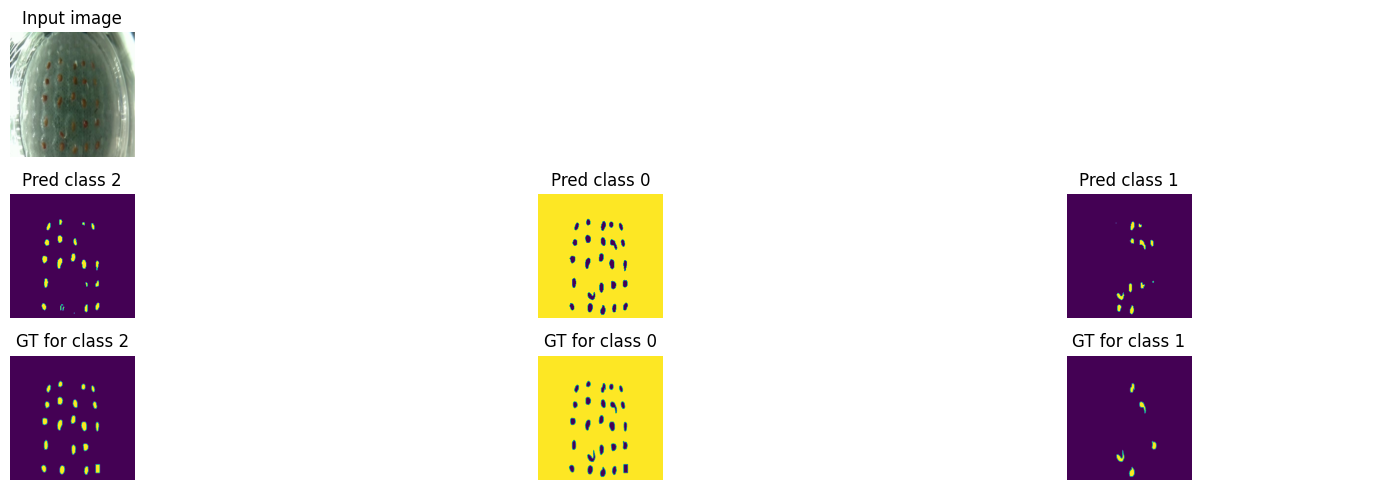

Train loss: 0.02742 | Time: 11m 53s | Val loss: 0.02075
Train_DICE_avg: 0.69855 | Train_Jaccard_avg: 0.64051 | Train_Sensitivity_avg: 0.93590 | Train_Specificity_avg: 0.91103 
Class 0 - Train_DICE: 0.99083 | Train_Jaccard: 0.98187 | Train_Sensitivity: 0.99558 | Train_Specificity: 0.75850 
Class 1 - Train_DICE: 0.37139 | Train_Jaccard: 0.33312 | Train_Sensitivity: 0.90732 | Train_Specificity: 0.98738 
Class 2 - Train_DICE: 0.73344 | Train_Jaccard: 0.60654 | Train_Sensitivity: 0.90480 | Train_Specificity: 0.98721 
Val_DICE_avg: 0.75550 | Val_Jaccard_avg: 0.68722 | Val_Sensitivity_avg: 0.93387 | Val_Specificity_avg: 0.85137 
Class 0 - Val_DICE: 0.99089 | Val_Jaccard: 0.98198 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.57849 
Class 1 - Val_DICE: 0.59328 | Val_Jaccard: 0.53557 | Val_Sensitivity: 0.83755 | Val_Specificity: 0.99320 
Class 2 - Val_DICE: 0.68233 | Val_Jaccard: 0.54411 | Val_Sensitivity: 0.96477 | Val_Specificity: 0.98243 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.02648 | Time: 12m 32s | Val loss: 0.01936
Train_DICE_avg: 0.70494 | Train_Jaccard_avg: 0.64596 | Train_Sensitivity_avg: 0.93503 | Train_Specificity_avg: 0.91098 
Class 0 - Train_DICE: 0.99092 | Train_Jaccard: 0.98204 | Train_Sensitivity: 0.99566 | Train_Specificity: 0.75731 
Class 1 - Train_DICE: 0.38300 | Train_Jaccard: 0.34064 | Train_Sensitivity: 0.90172 | Train_Specificity: 0.98792 
Class 2 - Train_DICE: 0.74089 | Train_Jaccard: 0.61519 | Train_Sensitivity: 0.90773 | Train_Specificity: 0.98772 
Val_DICE_avg: 0.77403 | Val_Jaccard_avg: 0.70894 | Val_Sensitivity_avg: 0.95703 | Val_Specificity_avg: 0.85845 
Class 0 - Val_DICE: 0.99143 | Val_Jaccard: 0.98305 | Val_Sensitivity: 0.99924 | Val_Specificity: 0.59826 
Class 1 - Val_DICE: 0.63077 | Val_Jaccard: 0.57714 | Val_Sensitivity: 0.91094 | Val_Specificity: 0.99306 
Class 2 - Val_DICE: 0.69990 | Val_Jaccard: 0.56663 | Val_Sensitivity: 0.96092 | Val_Specificity: 0.98404 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Train loss: 0.02591 | Time: 13m 12s | Val loss: 0.01900
Train_DICE_avg: 0.71233 | Train_Jaccard_avg: 0.65242 | Train_Sensitivity_avg: 0.93594 | Train_Specificity_avg: 0.91371 
Class 0 - Train_DICE: 0.99119 | Train_Jaccard: 0.98258 | Train_Sensitivity: 0.99565 | Train_Specificity: 0.76498 
Class 1 - Train_DICE: 0.39837 | Train_Jaccard: 0.35307 | Train_Sensitivity: 0.90307 | Train_Specificity: 0.98820 
Class 2 - Train_DICE: 0.74743 | Train_Jaccard: 0.62161 | Train_Sensitivity: 0.90909 | Train_Specificity: 0.98794 
Val_DICE_avg: 0.78013 | Val_Jaccard_avg: 0.71704 | Val_Sensitivity_avg: 0.96218 | Val_Specificity_avg: 0.85668 
Class 0 - Val_DICE: 0.99127 | Val_Jaccard: 0.98274 | Val_Sensitivity: 0.99924 | Val_Specificity: 0.59193 
Class 1 - Val_DICE: 0.61461 | Val_Jaccard: 0.56637 | Val_Sensitivity: 0.93787 | Val_Specificity: 0.99259 
Class 2 - Val_DICE: 0.73451 | Val_Jaccard: 0.60201 | Val_Sensitivity: 0.94944 | Val_Specificity: 0.98553 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


Train loss: 0.02536 | Time: 13m 51s | Val loss: 0.01861
Train_DICE_avg: 0.71564 | Train_Jaccard_avg: 0.65546 | Train_Sensitivity_avg: 0.93942 | Train_Specificity_avg: 0.91081 
Class 0 - Train_DICE: 0.99119 | Train_Jaccard: 0.98258 | Train_Sensitivity: 0.99598 | Train_Specificity: 0.75689 
Class 1 - Train_DICE: 0.40784 | Train_Jaccard: 0.36181 | Train_Sensitivity: 0.90868 | Train_Specificity: 0.98787 
Class 2 - Train_DICE: 0.74790 | Train_Jaccard: 0.62201 | Train_Sensitivity: 0.91360 | Train_Specificity: 0.98767 
Val_DICE_avg: 0.78233 | Val_Jaccard_avg: 0.71696 | Val_Sensitivity_avg: 0.95970 | Val_Specificity_avg: 0.85865 
Class 0 - Val_DICE: 0.99140 | Val_Jaccard: 0.98299 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.59817 
Class 1 - Val_DICE: 0.63219 | Val_Jaccard: 0.57985 | Val_Sensitivity: 0.92406 | Val_Specificity: 0.99300 
Class 2 - Val_DICE: 0.72339 | Val_Jaccard: 0.58804 | Val_Sensitivity: 0.95580 | Val_Specificity: 0.98479 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]


Train loss: 0.02494 | Time: 14m 29s | Val loss: 0.01840
Train_DICE_avg: 0.71651 | Train_Jaccard_avg: 0.65625 | Train_Sensitivity_avg: 0.93063 | Train_Specificity_avg: 0.91522 
Class 0 - Train_DICE: 0.99139 | Train_Jaccard: 0.98297 | Train_Sensitivity: 0.99598 | Train_Specificity: 0.76903 
Class 1 - Train_DICE: 0.40740 | Train_Jaccard: 0.35931 | Train_Sensitivity: 0.88675 | Train_Specificity: 0.98845 
Class 2 - Train_DICE: 0.75074 | Train_Jaccard: 0.62648 | Train_Sensitivity: 0.90917 | Train_Specificity: 0.98820 
Val_DICE_avg: 0.77740 | Val_Jaccard_avg: 0.71286 | Val_Sensitivity_avg: 0.95973 | Val_Specificity_avg: 0.86608 
Class 0 - Val_DICE: 0.99224 | Val_Jaccard: 0.98464 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.62090 
Class 1 - Val_DICE: 0.62459 | Val_Jaccard: 0.57493 | Val_Sensitivity: 0.93166 | Val_Specificity: 0.99273 
Class 2 - Val_DICE: 0.71535 | Val_Jaccard: 0.57901 | Val_Sensitivity: 0.94827 | Val_Specificity: 0.98461 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]


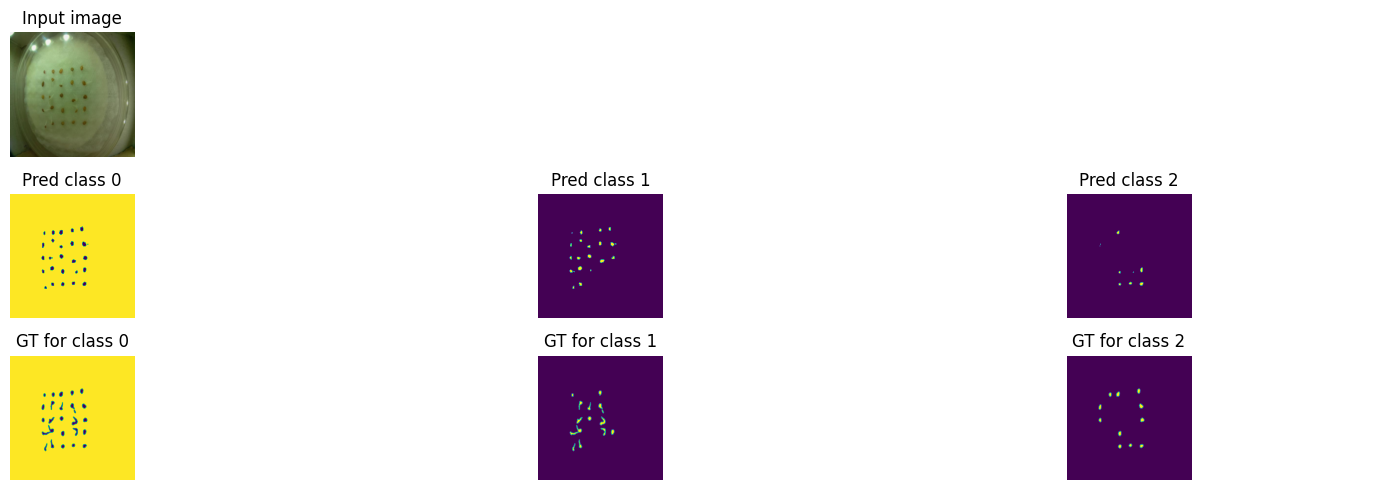

Train loss: 0.02448 | Time: 15m 9s | Val loss: 0.01796
Train_DICE_avg: 0.72278 | Train_Jaccard_avg: 0.66218 | Train_Sensitivity_avg: 0.93697 | Train_Specificity_avg: 0.91329 
Class 0 - Train_DICE: 0.99153 | Train_Jaccard: 0.98325 | Train_Sensitivity: 0.99620 | Train_Specificity: 0.76348 
Class 1 - Train_DICE: 0.42271 | Train_Jaccard: 0.37332 | Train_Sensitivity: 0.90182 | Train_Specificity: 0.98821 
Class 2 - Train_DICE: 0.75410 | Train_Jaccard: 0.62996 | Train_Sensitivity: 0.91290 | Train_Specificity: 0.98817 
Val_DICE_avg: 0.78305 | Val_Jaccard_avg: 0.71641 | Val_Sensitivity_avg: 0.96109 | Val_Specificity_avg: 0.86482 
Class 0 - Val_DICE: 0.99199 | Val_Jaccard: 0.98415 | Val_Sensitivity: 0.99920 | Val_Specificity: 0.61694 
Class 1 - Val_DICE: 0.64163 | Val_Jaccard: 0.58648 | Val_Sensitivity: 0.92690 | Val_Specificity: 0.99309 
Class 2 - Val_DICE: 0.71554 | Val_Jaccard: 0.57860 | Val_Sensitivity: 0.95716 | Val_Specificity: 0.98444 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


Train loss: 0.02403 | Time: 15m 48s | Val loss: 0.01806
Train_DICE_avg: 0.72523 | Train_Jaccard_avg: 0.66456 | Train_Sensitivity_avg: 0.93945 | Train_Specificity_avg: 0.91720 
Class 0 - Train_DICE: 0.99181 | Train_Jaccard: 0.98378 | Train_Sensitivity: 0.99615 | Train_Specificity: 0.77428 
Class 1 - Train_DICE: 0.42415 | Train_Jaccard: 0.37391 | Train_Sensitivity: 0.91015 | Train_Specificity: 0.98877 
Class 2 - Train_DICE: 0.75975 | Train_Jaccard: 0.63600 | Train_Sensitivity: 0.91203 | Train_Specificity: 0.98856 
Val_DICE_avg: 0.78761 | Val_Jaccard_avg: 0.72221 | Val_Sensitivity_avg: 0.96331 | Val_Specificity_avg: 0.86190 
Class 0 - Val_DICE: 0.99173 | Val_Jaccard: 0.98364 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.60759 
Class 1 - Val_DICE: 0.63750 | Val_Jaccard: 0.58468 | Val_Sensitivity: 0.93261 | Val_Specificity: 0.99307 
Class 2 - Val_DICE: 0.73360 | Val_Jaccard: 0.59831 | Val_Sensitivity: 0.95811 | Val_Specificity: 0.98505 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.02391 | Time: 16m 27s | Val loss: 0.01858
Train_DICE_avg: 0.72855 | Train_Jaccard_avg: 0.66694 | Train_Sensitivity_avg: 0.93352 | Train_Specificity_avg: 0.91647 
Class 0 - Train_DICE: 0.99159 | Train_Jaccard: 0.98336 | Train_Sensitivity: 0.99616 | Train_Specificity: 0.77235 
Class 1 - Train_DICE: 0.43341 | Train_Jaccard: 0.38122 | Train_Sensitivity: 0.88966 | Train_Specificity: 0.98879 
Class 2 - Train_DICE: 0.76064 | Train_Jaccard: 0.63624 | Train_Sensitivity: 0.91473 | Train_Specificity: 0.98827 
Val_DICE_avg: 0.77810 | Val_Jaccard_avg: 0.70893 | Val_Sensitivity_avg: 0.94024 | Val_Specificity_avg: 0.86206 
Class 0 - Val_DICE: 0.99185 | Val_Jaccard: 0.98387 | Val_Sensitivity: 0.99928 | Val_Specificity: 0.60895 
Class 1 - Val_DICE: 0.65005 | Val_Jaccard: 0.58643 | Val_Sensitivity: 0.85115 | Val_Specificity: 0.99387 
Class 2 - Val_DICE: 0.69239 | Val_Jaccard: 0.55650 | Val_Sensitivity: 0.97029 | Val_Specificity: 0.98336 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


Train loss: 0.02350 | Time: 17m 6s | Val loss: 0.01778
Train_DICE_avg: 0.72792 | Train_Jaccard_avg: 0.66611 | Train_Sensitivity_avg: 0.93751 | Train_Specificity_avg: 0.91449 
Class 0 - Train_DICE: 0.99177 | Train_Jaccard: 0.98372 | Train_Sensitivity: 0.99639 | Train_Specificity: 0.76642 
Class 1 - Train_DICE: 0.43249 | Train_Jaccard: 0.37901 | Train_Sensitivity: 0.89900 | Train_Specificity: 0.98869 
Class 2 - Train_DICE: 0.75948 | Train_Jaccard: 0.63562 | Train_Sensitivity: 0.91714 | Train_Specificity: 0.98837 
Val_DICE_avg: 0.79049 | Val_Jaccard_avg: 0.72419 | Val_Sensitivity_avg: 0.96348 | Val_Specificity_avg: 0.86648 
Class 0 - Val_DICE: 0.99216 | Val_Jaccard: 0.98448 | Val_Sensitivity: 0.99919 | Val_Specificity: 0.62150 
Class 1 - Val_DICE: 0.64079 | Val_Jaccard: 0.58743 | Val_Sensitivity: 0.93743 | Val_Specificity: 0.99307 
Class 2 - Val_DICE: 0.73851 | Val_Jaccard: 0.60068 | Val_Sensitivity: 0.95383 | Val_Specificity: 0.98487 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.02340 | Time: 17m 45s | Val loss: 0.01789
Train_DICE_avg: 0.73208 | Train_Jaccard_avg: 0.67025 | Train_Sensitivity_avg: 0.93799 | Train_Specificity_avg: 0.91601 
Class 0 - Train_DICE: 0.99182 | Train_Jaccard: 0.98381 | Train_Sensitivity: 0.99637 | Train_Specificity: 0.77121 
Class 1 - Train_DICE: 0.44288 | Train_Jaccard: 0.38996 | Train_Sensitivity: 0.90030 | Train_Specificity: 0.98860 
Class 2 - Train_DICE: 0.76155 | Train_Jaccard: 0.63698 | Train_Sensitivity: 0.91730 | Train_Specificity: 0.98820 
Val_DICE_avg: 0.79668 | Val_Jaccard_avg: 0.73182 | Val_Sensitivity_avg: 0.96823 | Val_Specificity_avg: 0.86248 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98376 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.60864 
Class 1 - Val_DICE: 0.64417 | Val_Jaccard: 0.59049 | Val_Sensitivity: 0.95561 | Val_Specificity: 0.99273 
Class 2 - Val_DICE: 0.75408 | Val_Jaccard: 0.62122 | Val_Sensitivity: 0.94986 | Val_Specificity: 0.98608 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


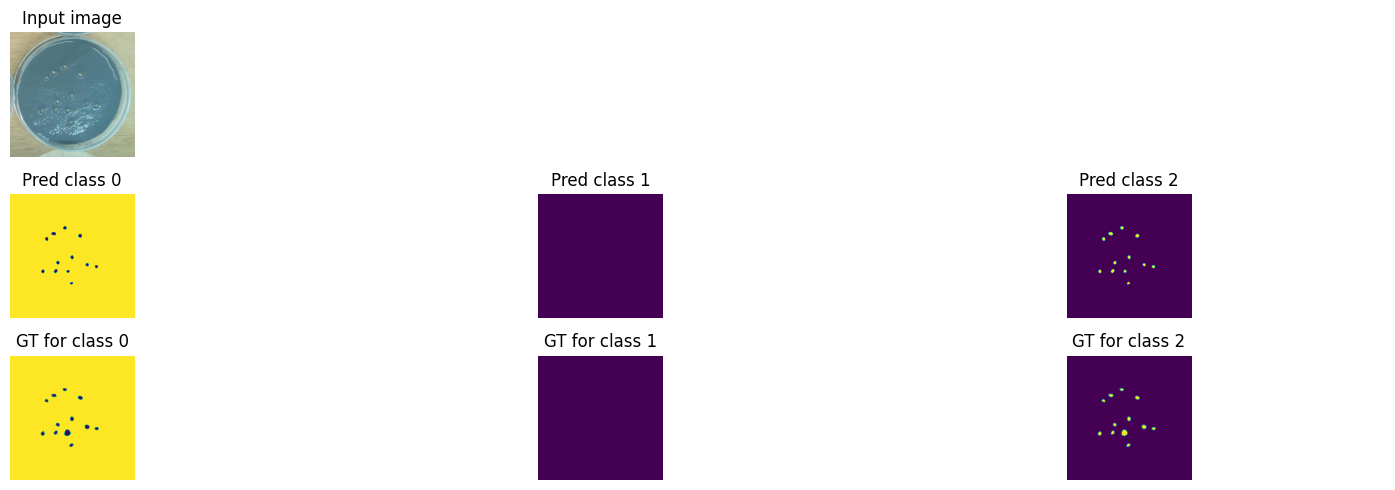

Train loss: 0.02304 | Time: 18m 26s | Val loss: 0.01729
Train_DICE_avg: 0.73200 | Train_Jaccard_avg: 0.66950 | Train_Sensitivity_avg: 0.93834 | Train_Specificity_avg: 0.91470 
Class 0 - Train_DICE: 0.99182 | Train_Jaccard: 0.98381 | Train_Sensitivity: 0.99655 | Train_Specificity: 0.76732 
Class 1 - Train_DICE: 0.44153 | Train_Jaccard: 0.38632 | Train_Sensitivity: 0.90076 | Train_Specificity: 0.98863 
Class 2 - Train_DICE: 0.76264 | Train_Jaccard: 0.63838 | Train_Sensitivity: 0.91769 | Train_Specificity: 0.98816 
Val_DICE_avg: 0.79488 | Val_Jaccard_avg: 0.72620 | Val_Sensitivity_avg: 0.96245 | Val_Specificity_avg: 0.86713 
Class 0 - Val_DICE: 0.99228 | Val_Jaccard: 0.98471 | Val_Sensitivity: 0.99923 | Val_Specificity: 0.62339 
Class 1 - Val_DICE: 0.66722 | Val_Jaccard: 0.60658 | Val_Sensitivity: 0.92394 | Val_Specificity: 0.99365 
Class 2 - Val_DICE: 0.72515 | Val_Jaccard: 0.58731 | Val_Sensitivity: 0.96418 | Val_Specificity: 0.98436 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


Train loss: 0.02276 | Time: 19m 5s | Val loss: 0.01707
Train_DICE_avg: 0.73552 | Train_Jaccard_avg: 0.67354 | Train_Sensitivity_avg: 0.93986 | Train_Specificity_avg: 0.91605 
Class 0 - Train_DICE: 0.99187 | Train_Jaccard: 0.98391 | Train_Sensitivity: 0.99648 | Train_Specificity: 0.77086 
Class 1 - Train_DICE: 0.44789 | Train_Jaccard: 0.39375 | Train_Sensitivity: 0.90375 | Train_Specificity: 0.98894 
Class 2 - Train_DICE: 0.76679 | Train_Jaccard: 0.64298 | Train_Sensitivity: 0.91936 | Train_Specificity: 0.98835 
Val_DICE_avg: 0.79425 | Val_Jaccard_avg: 0.72749 | Val_Sensitivity_avg: 0.96929 | Val_Specificity_avg: 0.86478 
Class 0 - Val_DICE: 0.99198 | Val_Jaccard: 0.98413 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.61607 
Class 1 - Val_DICE: 0.65986 | Val_Jaccard: 0.60332 | Val_Sensitivity: 0.94387 | Val_Specificity: 0.99343 
Class 2 - Val_DICE: 0.73091 | Val_Jaccard: 0.59500 | Val_Sensitivity: 0.96474 | Val_Specificity: 0.98486 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.02250 | Time: 19m 45s | Val loss: 0.01732
Train_DICE_avg: 0.73554 | Train_Jaccard_avg: 0.67287 | Train_Sensitivity_avg: 0.94201 | Train_Specificity_avg: 0.91686 
Class 0 - Train_DICE: 0.99213 | Train_Jaccard: 0.98441 | Train_Sensitivity: 0.99665 | Train_Specificity: 0.77341 
Class 1 - Train_DICE: 0.44766 | Train_Jaccard: 0.39110 | Train_Sensitivity: 0.90727 | Train_Specificity: 0.98879 
Class 2 - Train_DICE: 0.76684 | Train_Jaccard: 0.64311 | Train_Sensitivity: 0.92210 | Train_Specificity: 0.98838 
Val_DICE_avg: 0.80588 | Val_Jaccard_avg: 0.73755 | Val_Sensitivity_avg: 0.95666 | Val_Specificity_avg: 0.85916 
Class 0 - Val_DICE: 0.99136 | Val_Jaccard: 0.98291 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.59824 
Class 1 - Val_DICE: 0.69345 | Val_Jaccard: 0.63082 | Val_Sensitivity: 0.90051 | Val_Specificity: 0.99438 
Class 2 - Val_DICE: 0.73284 | Val_Jaccard: 0.59893 | Val_Sensitivity: 0.97013 | Val_Specificity: 0.98487 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]


Train loss: 0.02210 | Time: 20m 24s | Val loss: 0.01747
Train_DICE_avg: 0.74532 | Train_Jaccard_avg: 0.68291 | Train_Sensitivity_avg: 0.93916 | Train_Specificity_avg: 0.91990 
Class 0 - Train_DICE: 0.99219 | Train_Jaccard: 0.98454 | Train_Sensitivity: 0.99658 | Train_Specificity: 0.78157 
Class 1 - Train_DICE: 0.46794 | Train_Jaccard: 0.41063 | Train_Sensitivity: 0.89928 | Train_Specificity: 0.98941 
Class 2 - Train_DICE: 0.77582 | Train_Jaccard: 0.65357 | Train_Sensitivity: 0.92161 | Train_Specificity: 0.98873 
Val_DICE_avg: 0.79559 | Val_Jaccard_avg: 0.73036 | Val_Sensitivity_avg: 0.95919 | Val_Specificity_avg: 0.86386 
Class 0 - Val_DICE: 0.99198 | Val_Jaccard: 0.98412 | Val_Sensitivity: 0.99924 | Val_Specificity: 0.61269 
Class 1 - Val_DICE: 0.64319 | Val_Jaccard: 0.58789 | Val_Sensitivity: 0.92444 | Val_Specificity: 0.99299 
Class 2 - Val_DICE: 0.75160 | Val_Jaccard: 0.61908 | Val_Sensitivity: 0.95388 | Val_Specificity: 0.98590 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]


Train loss: 0.02170 | Time: 21m 4s | Val loss: 0.01674
Train_DICE_avg: 0.74657 | Train_Jaccard_avg: 0.68389 | Train_Sensitivity_avg: 0.94205 | Train_Specificity_avg: 0.91706 
Class 0 - Train_DICE: 0.99213 | Train_Jaccard: 0.98441 | Train_Sensitivity: 0.99680 | Train_Specificity: 0.77346 
Class 1 - Train_DICE: 0.47336 | Train_Jaccard: 0.41486 | Train_Sensitivity: 0.90380 | Train_Specificity: 0.98919 
Class 2 - Train_DICE: 0.77423 | Train_Jaccard: 0.65241 | Train_Sensitivity: 0.92556 | Train_Specificity: 0.98852 
Val_DICE_avg: 0.80691 | Val_Jaccard_avg: 0.73944 | Val_Sensitivity_avg: 0.96699 | Val_Specificity_avg: 0.86519 
Class 0 - Val_DICE: 0.99203 | Val_Jaccard: 0.98422 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.61644 
Class 1 - Val_DICE: 0.68775 | Val_Jaccard: 0.62818 | Val_Sensitivity: 0.93611 | Val_Specificity: 0.99387 
Class 2 - Val_DICE: 0.74096 | Val_Jaccard: 0.60591 | Val_Sensitivity: 0.96556 | Val_Specificity: 0.98525 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]


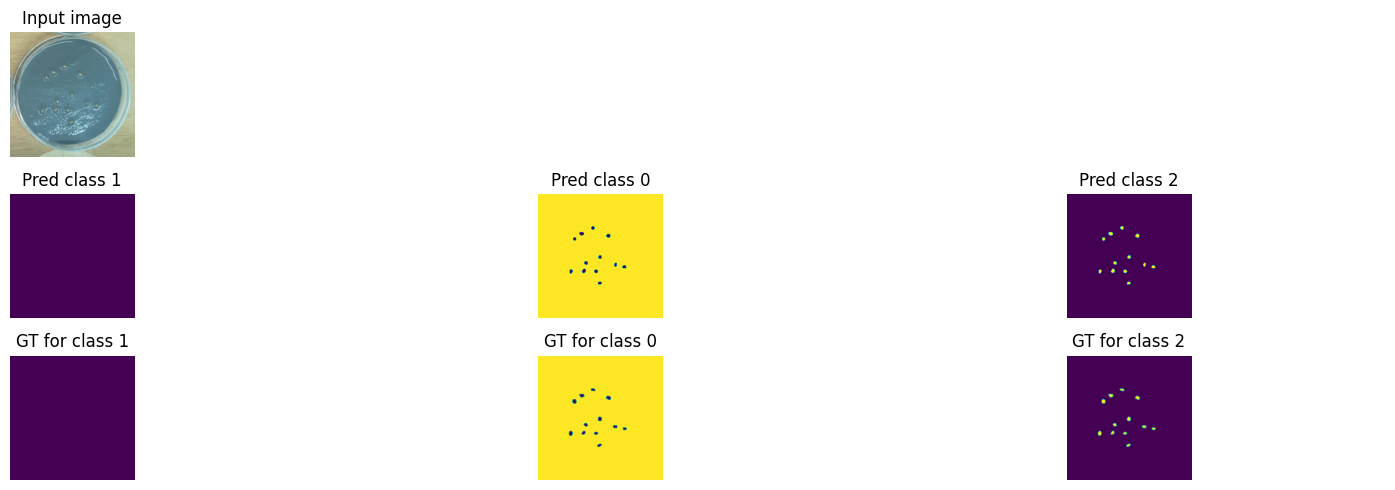

Train loss: 0.02162 | Time: 21m 44s | Val loss: 0.01662
Train_DICE_avg: 0.74814 | Train_Jaccard_avg: 0.68442 | Train_Sensitivity_avg: 0.94141 | Train_Specificity_avg: 0.91729 
Class 0 - Train_DICE: 0.99219 | Train_Jaccard: 0.98454 | Train_Sensitivity: 0.99674 | Train_Specificity: 0.77412 
Class 1 - Train_DICE: 0.47636 | Train_Jaccard: 0.41563 | Train_Sensitivity: 0.90153 | Train_Specificity: 0.98923 
Class 2 - Train_DICE: 0.77587 | Train_Jaccard: 0.65309 | Train_Sensitivity: 0.92594 | Train_Specificity: 0.98853 
Val_DICE_avg: 0.80990 | Val_Jaccard_avg: 0.74159 | Val_Sensitivity_avg: 0.95935 | Val_Specificity_avg: 0.86166 
Class 0 - Val_DICE: 0.99174 | Val_Jaccard: 0.98365 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.60570 
Class 1 - Val_DICE: 0.69314 | Val_Jaccard: 0.63025 | Val_Sensitivity: 0.91594 | Val_Specificity: 0.99395 
Class 2 - Val_DICE: 0.74481 | Val_Jaccard: 0.61086 | Val_Sensitivity: 0.96275 | Val_Specificity: 0.98535 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


Train loss: 0.02132 | Time: 22m 23s | Val loss: 0.01671
Train_DICE_avg: 0.74600 | Train_Jaccard_avg: 0.68233 | Train_Sensitivity_avg: 0.94188 | Train_Specificity_avg: 0.91633 
Class 0 - Train_DICE: 0.99225 | Train_Jaccard: 0.98465 | Train_Sensitivity: 0.99690 | Train_Specificity: 0.77137 
Class 1 - Train_DICE: 0.46955 | Train_Jaccard: 0.40888 | Train_Sensitivity: 0.90073 | Train_Specificity: 0.98909 
Class 2 - Train_DICE: 0.77619 | Train_Jaccard: 0.65347 | Train_Sensitivity: 0.92801 | Train_Specificity: 0.98853 
Val_DICE_avg: 0.80756 | Val_Jaccard_avg: 0.74197 | Val_Sensitivity_avg: 0.96680 | Val_Specificity_avg: 0.86215 
Class 0 - Val_DICE: 0.99165 | Val_Jaccard: 0.98349 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.60659 
Class 1 - Val_DICE: 0.67112 | Val_Jaccard: 0.61407 | Val_Sensitivity: 0.94450 | Val_Specificity: 0.99363 
Class 2 - Val_DICE: 0.75991 | Val_Jaccard: 0.62836 | Val_Sensitivity: 0.95656 | Val_Specificity: 0.98624 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


Train loss: 0.02112 | Time: 23m 3s | Val loss: 0.01616
Train_DICE_avg: 0.75026 | Train_Jaccard_avg: 0.68681 | Train_Sensitivity_avg: 0.94456 | Train_Specificity_avg: 0.91660 
Class 0 - Train_DICE: 0.99230 | Train_Jaccard: 0.98476 | Train_Sensitivity: 0.99692 | Train_Specificity: 0.77179 
Class 1 - Train_DICE: 0.48151 | Train_Jaccard: 0.42070 | Train_Sensitivity: 0.90735 | Train_Specificity: 0.98937 
Class 2 - Train_DICE: 0.77697 | Train_Jaccard: 0.65496 | Train_Sensitivity: 0.92940 | Train_Specificity: 0.98865 
Val_DICE_avg: 0.81402 | Val_Jaccard_avg: 0.74628 | Val_Sensitivity_avg: 0.96619 | Val_Specificity_avg: 0.86190 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98376 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.60614 
Class 1 - Val_DICE: 0.69877 | Val_Jaccard: 0.63466 | Val_Sensitivity: 0.93180 | Val_Specificity: 0.99371 
Class 2 - Val_DICE: 0.75148 | Val_Jaccard: 0.62041 | Val_Sensitivity: 0.96742 | Val_Specificity: 0.98584 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.02085 | Time: 23m 43s | Val loss: 0.01653
Train_DICE_avg: 0.75283 | Train_Jaccard_avg: 0.68953 | Train_Sensitivity_avg: 0.94303 | Train_Specificity_avg: 0.91842 
Class 0 - Train_DICE: 0.99243 | Train_Jaccard: 0.98500 | Train_Sensitivity: 0.99692 | Train_Specificity: 0.77689 
Class 1 - Train_DICE: 0.48477 | Train_Jaccard: 0.42347 | Train_Sensitivity: 0.90480 | Train_Specificity: 0.98946 
Class 2 - Train_DICE: 0.78129 | Train_Jaccard: 0.66012 | Train_Sensitivity: 0.92736 | Train_Specificity: 0.98891 
Val_DICE_avg: 0.80747 | Val_Jaccard_avg: 0.74025 | Val_Sensitivity_avg: 0.97053 | Val_Specificity_avg: 0.86872 
Class 0 - Val_DICE: 0.99230 | Val_Jaccard: 0.98475 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.62710 
Class 1 - Val_DICE: 0.68693 | Val_Jaccard: 0.62729 | Val_Sensitivity: 0.94778 | Val_Specificity: 0.99370 
Class 2 - Val_DICE: 0.74317 | Val_Jaccard: 0.60872 | Val_Sensitivity: 0.96452 | Val_Specificity: 0.98537 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.02089 | Time: 24m 22s | Val loss: 0.01600
Train_DICE_avg: 0.75265 | Train_Jaccard_avg: 0.68914 | Train_Sensitivity_avg: 0.94260 | Train_Specificity_avg: 0.91793 
Class 0 - Train_DICE: 0.99235 | Train_Jaccard: 0.98486 | Train_Sensitivity: 0.99688 | Train_Specificity: 0.77524 
Class 1 - Train_DICE: 0.48286 | Train_Jaccard: 0.42058 | Train_Sensitivity: 0.90113 | Train_Specificity: 0.98968 
Class 2 - Train_DICE: 0.78273 | Train_Jaccard: 0.66198 | Train_Sensitivity: 0.92981 | Train_Specificity: 0.98888 
Val_DICE_avg: 0.81507 | Val_Jaccard_avg: 0.74654 | Val_Sensitivity_avg: 0.96513 | Val_Specificity_avg: 0.86393 
Class 0 - Val_DICE: 0.99190 | Val_Jaccard: 0.98397 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.61240 
Class 1 - Val_DICE: 0.70656 | Val_Jaccard: 0.64284 | Val_Sensitivity: 0.93124 | Val_Specificity: 0.99388 
Class 2 - Val_DICE: 0.74675 | Val_Jaccard: 0.61281 | Val_Sensitivity: 0.96480 | Val_Specificity: 0.98550 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


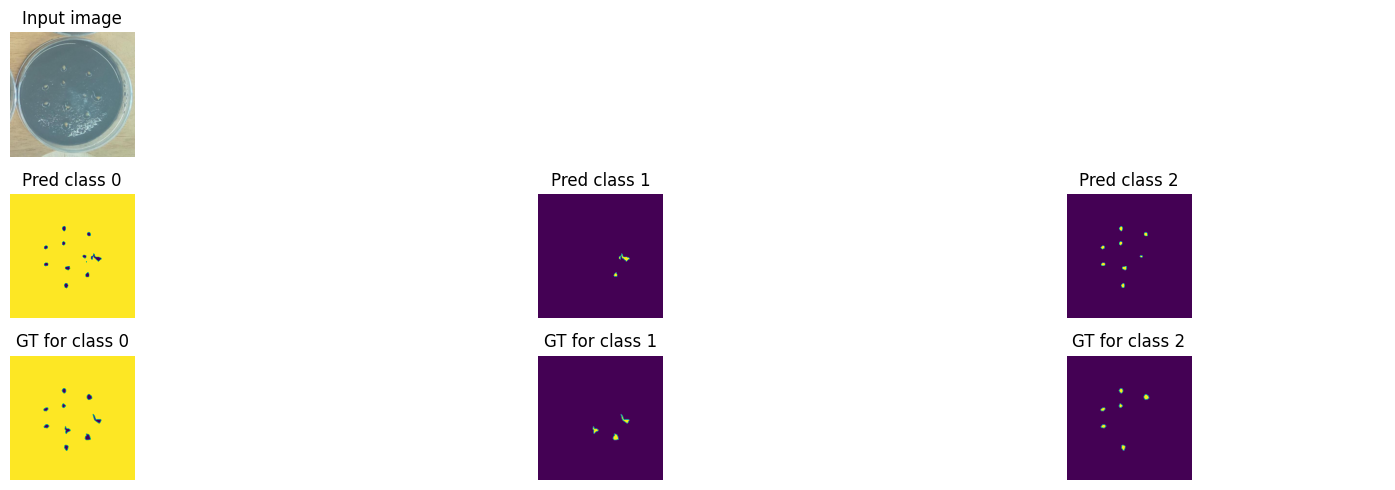

Train loss: 0.02060 | Time: 25m 2s | Val loss: 0.01588
Train_DICE_avg: 0.75363 | Train_Jaccard_avg: 0.68955 | Train_Sensitivity_avg: 0.94467 | Train_Specificity_avg: 0.91717 
Class 0 - Train_DICE: 0.99237 | Train_Jaccard: 0.98488 | Train_Sensitivity: 0.99709 | Train_Specificity: 0.77370 
Class 1 - Train_DICE: 0.48632 | Train_Jaccard: 0.42355 | Train_Sensitivity: 0.90468 | Train_Specificity: 0.98929 
Class 2 - Train_DICE: 0.78221 | Train_Jaccard: 0.66021 | Train_Sensitivity: 0.93223 | Train_Specificity: 0.98852 
Val_DICE_avg: 0.81507 | Val_Jaccard_avg: 0.74641 | Val_Sensitivity_avg: 0.96485 | Val_Specificity_avg: 0.86467 
Class 0 - Val_DICE: 0.99204 | Val_Jaccard: 0.98424 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.61457 
Class 1 - Val_DICE: 0.70547 | Val_Jaccard: 0.64171 | Val_Sensitivity: 0.92463 | Val_Specificity: 0.99419 
Class 2 - Val_DICE: 0.74771 | Val_Jaccard: 0.61329 | Val_Sensitivity: 0.97058 | Val_Specificity: 0.98524 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]


Train loss: 0.02041 | Time: 25m 42s | Val loss: 0.01562
Train_DICE_avg: 0.75696 | Train_Jaccard_avg: 0.69302 | Train_Sensitivity_avg: 0.94507 | Train_Specificity_avg: 0.91895 
Class 0 - Train_DICE: 0.99245 | Train_Jaccard: 0.98505 | Train_Sensitivity: 0.99698 | Train_Specificity: 0.77834 
Class 1 - Train_DICE: 0.49305 | Train_Jaccard: 0.42942 | Train_Sensitivity: 0.90599 | Train_Specificity: 0.98968 
Class 2 - Train_DICE: 0.78539 | Train_Jaccard: 0.66459 | Train_Sensitivity: 0.93223 | Train_Specificity: 0.98882 
Val_DICE_avg: 0.81339 | Val_Jaccard_avg: 0.74412 | Val_Sensitivity_avg: 0.96735 | Val_Specificity_avg: 0.86618 
Class 0 - Val_DICE: 0.99212 | Val_Jaccard: 0.98439 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.61923 
Class 1 - Val_DICE: 0.70359 | Val_Jaccard: 0.63904 | Val_Sensitivity: 0.93163 | Val_Specificity: 0.99405 
Class 2 - Val_DICE: 0.74446 | Val_Jaccard: 0.60892 | Val_Sensitivity: 0.97107 | Val_Specificity: 0.98525 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


Train loss: 0.02033 | Time: 26m 22s | Val loss: 0.01584
Train_DICE_avg: 0.75853 | Train_Jaccard_avg: 0.69500 | Train_Sensitivity_avg: 0.94356 | Train_Specificity_avg: 0.91992 
Class 0 - Train_DICE: 0.99258 | Train_Jaccard: 0.98530 | Train_Sensitivity: 0.99695 | Train_Specificity: 0.78095 
Class 1 - Train_DICE: 0.49516 | Train_Jaccard: 0.43182 | Train_Sensitivity: 0.90093 | Train_Specificity: 0.98982 
Class 2 - Train_DICE: 0.78784 | Train_Jaccard: 0.66787 | Train_Sensitivity: 0.93279 | Train_Specificity: 0.98898 
Val_DICE_avg: 0.81569 | Val_Jaccard_avg: 0.74620 | Val_Sensitivity_avg: 0.96311 | Val_Specificity_avg: 0.86472 
Class 0 - Val_DICE: 0.99202 | Val_Jaccard: 0.98420 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61455 
Class 1 - Val_DICE: 0.71211 | Val_Jaccard: 0.64520 | Val_Sensitivity: 0.91627 | Val_Specificity: 0.99438 
Class 2 - Val_DICE: 0.74296 | Val_Jaccard: 0.60920 | Val_Sensitivity: 0.97371 | Val_Specificity: 0.98521 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.02032 | Time: 27m 1s | Val loss: 0.01593
Train_DICE_avg: 0.75851 | Train_Jaccard_avg: 0.69437 | Train_Sensitivity_avg: 0.94642 | Train_Specificity_avg: 0.91713 
Class 0 - Train_DICE: 0.99241 | Train_Jaccard: 0.98496 | Train_Sensitivity: 0.99703 | Train_Specificity: 0.77307 
Class 1 - Train_DICE: 0.49758 | Train_Jaccard: 0.43362 | Train_Sensitivity: 0.90977 | Train_Specificity: 0.98955 
Class 2 - Train_DICE: 0.78554 | Train_Jaccard: 0.66452 | Train_Sensitivity: 0.93247 | Train_Specificity: 0.98876 
Val_DICE_avg: 0.81265 | Val_Jaccard_avg: 0.74481 | Val_Sensitivity_avg: 0.96758 | Val_Specificity_avg: 0.86519 
Class 0 - Val_DICE: 0.99202 | Val_Jaccard: 0.98421 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.61610 
Class 1 - Val_DICE: 0.69067 | Val_Jaccard: 0.62989 | Val_Sensitivity: 0.94126 | Val_Specificity: 0.99361 
Class 2 - Val_DICE: 0.75526 | Val_Jaccard: 0.62034 | Val_Sensitivity: 0.96215 | Val_Specificity: 0.98585 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.02014 | Time: 27m 40s | Val loss: 0.01573
Train_DICE_avg: 0.76132 | Train_Jaccard_avg: 0.69723 | Train_Sensitivity_avg: 0.94889 | Train_Specificity_avg: 0.91682 
Class 0 - Train_DICE: 0.99240 | Train_Jaccard: 0.98495 | Train_Sensitivity: 0.99719 | Train_Specificity: 0.77225 
Class 1 - Train_DICE: 0.50470 | Train_Jaccard: 0.44077 | Train_Sensitivity: 0.91642 | Train_Specificity: 0.98950 
Class 2 - Train_DICE: 0.78686 | Train_Jaccard: 0.66596 | Train_Sensitivity: 0.93306 | Train_Specificity: 0.98870 
Val_DICE_avg: 0.81424 | Val_Jaccard_avg: 0.74520 | Val_Sensitivity_avg: 0.96748 | Val_Specificity_avg: 0.86682 
Class 0 - Val_DICE: 0.99221 | Val_Jaccard: 0.98459 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.62115 
Class 1 - Val_DICE: 0.70145 | Val_Jaccard: 0.63679 | Val_Sensitivity: 0.93351 | Val_Specificity: 0.99383 
Class 2 - Val_DICE: 0.74905 | Val_Jaccard: 0.61422 | Val_Sensitivity: 0.96966 | Val_Specificity: 0.98549 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


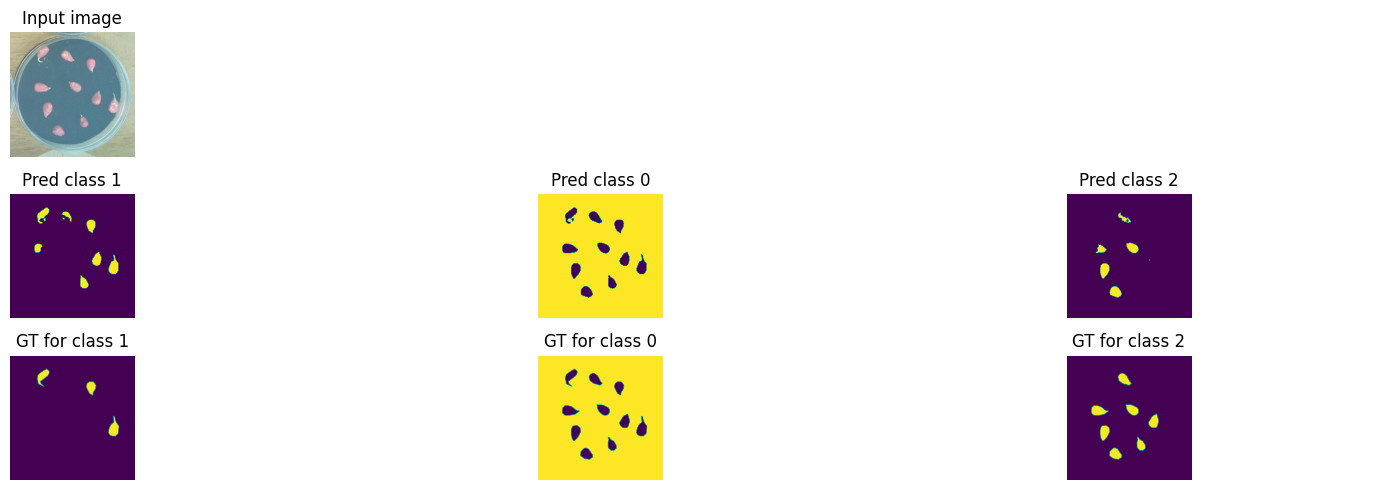

Train loss: 0.01994 | Time: 28m 21s | Val loss: 0.01581
Train_DICE_avg: 0.76377 | Train_Jaccard_avg: 0.69945 | Train_Sensitivity_avg: 0.94780 | Train_Specificity_avg: 0.91872 
Class 0 - Train_DICE: 0.99251 | Train_Jaccard: 0.98515 | Train_Sensitivity: 0.99706 | Train_Specificity: 0.77739 
Class 1 - Train_DICE: 0.50913 | Train_Jaccard: 0.44333 | Train_Sensitivity: 0.91161 | Train_Specificity: 0.98984 
Class 2 - Train_DICE: 0.78966 | Train_Jaccard: 0.66987 | Train_Sensitivity: 0.93473 | Train_Specificity: 0.98892 
Val_DICE_avg: 0.81592 | Val_Jaccard_avg: 0.74575 | Val_Sensitivity_avg: 0.96368 | Val_Specificity_avg: 0.86649 
Class 0 - Val_DICE: 0.99226 | Val_Jaccard: 0.98468 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.62035 
Class 1 - Val_DICE: 0.71481 | Val_Jaccard: 0.64695 | Val_Sensitivity: 0.91784 | Val_Specificity: 0.99418 
Class 2 - Val_DICE: 0.74069 | Val_Jaccard: 0.60562 | Val_Sensitivity: 0.97386 | Val_Specificity: 0.98495 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.01979 | Time: 29m 1s | Val loss: 0.01578
Train_DICE_avg: 0.75983 | Train_Jaccard_avg: 0.69597 | Train_Sensitivity_avg: 0.94501 | Train_Specificity_avg: 0.91778 
Class 0 - Train_DICE: 0.99254 | Train_Jaccard: 0.98522 | Train_Sensitivity: 0.99715 | Train_Specificity: 0.77471 
Class 1 - Train_DICE: 0.49836 | Train_Jaccard: 0.43431 | Train_Sensitivity: 0.90378 | Train_Specificity: 0.98964 
Class 2 - Train_DICE: 0.78859 | Train_Jaccard: 0.66837 | Train_Sensitivity: 0.93412 | Train_Specificity: 0.98898 
Val_DICE_avg: 0.82070 | Val_Jaccard_avg: 0.75193 | Val_Sensitivity_avg: 0.96433 | Val_Specificity_avg: 0.86414 
Class 0 - Val_DICE: 0.99194 | Val_Jaccard: 0.98405 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61252 
Class 1 - Val_DICE: 0.71802 | Val_Jaccard: 0.65225 | Val_Sensitivity: 0.92163 | Val_Specificity: 0.99425 
Class 2 - Val_DICE: 0.75214 | Val_Jaccard: 0.61950 | Val_Sensitivity: 0.97200 | Val_Specificity: 0.98564 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Train loss: 0.02007 | Time: 29m 40s | Val loss: 0.01577
Train_DICE_avg: 0.76127 | Train_Jaccard_avg: 0.69674 | Train_Sensitivity_avg: 0.94579 | Train_Specificity_avg: 0.91946 
Class 0 - Train_DICE: 0.99249 | Train_Jaccard: 0.98513 | Train_Sensitivity: 0.99708 | Train_Specificity: 0.78010 
Class 1 - Train_DICE: 0.50268 | Train_Jaccard: 0.43640 | Train_Sensitivity: 0.90682 | Train_Specificity: 0.98949 
Class 2 - Train_DICE: 0.78863 | Train_Jaccard: 0.66869 | Train_Sensitivity: 0.93348 | Train_Specificity: 0.98880 
Val_DICE_avg: 0.81924 | Val_Jaccard_avg: 0.74882 | Val_Sensitivity_avg: 0.96330 | Val_Specificity_avg: 0.86518 
Class 0 - Val_DICE: 0.99207 | Val_Jaccard: 0.98430 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.61605 
Class 1 - Val_DICE: 0.72361 | Val_Jaccard: 0.65517 | Val_Sensitivity: 0.91489 | Val_Specificity: 0.99452 
Class 2 - Val_DICE: 0.74204 | Val_Jaccard: 0.60700 | Val_Sensitivity: 0.97565 | Val_Specificity: 0.98498 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


Train loss: 0.01979 | Time: 30m 19s | Val loss: 0.01569
Train_DICE_avg: 0.76630 | Train_Jaccard_avg: 0.70234 | Train_Sensitivity_avg: 0.94639 | Train_Specificity_avg: 0.92004 
Class 0 - Train_DICE: 0.99258 | Train_Jaccard: 0.98530 | Train_Sensitivity: 0.99715 | Train_Specificity: 0.78114 
Class 1 - Train_DICE: 0.51532 | Train_Jaccard: 0.44970 | Train_Sensitivity: 0.90660 | Train_Specificity: 0.98989 
Class 2 - Train_DICE: 0.79100 | Train_Jaccard: 0.67202 | Train_Sensitivity: 0.93544 | Train_Specificity: 0.98910 
Val_DICE_avg: 0.81557 | Val_Jaccard_avg: 0.74510 | Val_Sensitivity_avg: 0.95938 | Val_Specificity_avg: 0.86543 
Class 0 - Val_DICE: 0.99211 | Val_Jaccard: 0.98438 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.61695 
Class 1 - Val_DICE: 0.71264 | Val_Jaccard: 0.64438 | Val_Sensitivity: 0.90198 | Val_Specificity: 0.99450 
Class 2 - Val_DICE: 0.74196 | Val_Jaccard: 0.60655 | Val_Sensitivity: 0.97683 | Val_Specificity: 0.98483 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


Train loss: 0.01971 | Time: 30m 59s | Val loss: 0.01568
Train_DICE_avg: 0.76164 | Train_Jaccard_avg: 0.69726 | Train_Sensitivity_avg: 0.94613 | Train_Specificity_avg: 0.91653 
Class 0 - Train_DICE: 0.99253 | Train_Jaccard: 0.98520 | Train_Sensitivity: 0.99727 | Train_Specificity: 0.77135 
Class 1 - Train_DICE: 0.50487 | Train_Jaccard: 0.43915 | Train_Sensitivity: 0.90589 | Train_Specificity: 0.98952 
Class 2 - Train_DICE: 0.78752 | Train_Jaccard: 0.66743 | Train_Sensitivity: 0.93523 | Train_Specificity: 0.98873 
Val_DICE_avg: 0.81919 | Val_Jaccard_avg: 0.74889 | Val_Sensitivity_avg: 0.96199 | Val_Specificity_avg: 0.86568 
Class 0 - Val_DICE: 0.99206 | Val_Jaccard: 0.98428 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61739 
Class 1 - Val_DICE: 0.72217 | Val_Jaccard: 0.65395 | Val_Sensitivity: 0.91206 | Val_Specificity: 0.99448 
Class 2 - Val_DICE: 0.74333 | Val_Jaccard: 0.60843 | Val_Sensitivity: 0.97455 | Val_Specificity: 0.98518 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


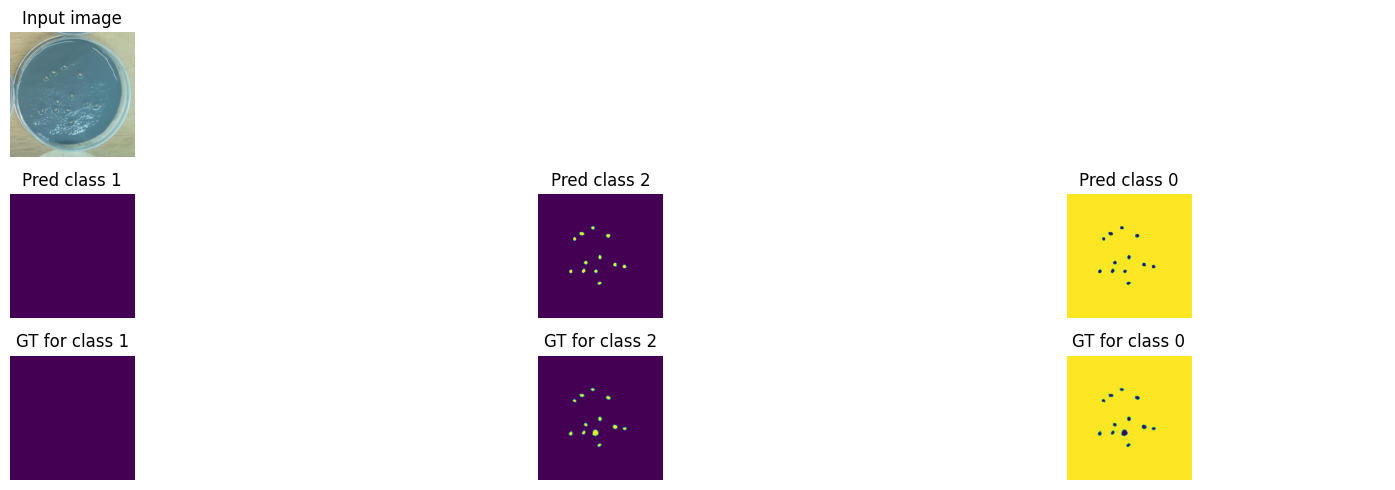

Train loss: 0.01948 | Time: 31m 39s | Val loss: 0.01539
Train_DICE_avg: 0.76615 | Train_Jaccard_avg: 0.70163 | Train_Sensitivity_avg: 0.94732 | Train_Specificity_avg: 0.92005 
Class 0 - Train_DICE: 0.99262 | Train_Jaccard: 0.98538 | Train_Sensitivity: 0.99716 | Train_Specificity: 0.78135 
Class 1 - Train_DICE: 0.51323 | Train_Jaccard: 0.44595 | Train_Sensitivity: 0.90903 | Train_Specificity: 0.98973 
Class 2 - Train_DICE: 0.79261 | Train_Jaccard: 0.67356 | Train_Sensitivity: 0.93576 | Train_Specificity: 0.98908 
Val_DICE_avg: 0.82255 | Val_Jaccard_avg: 0.75353 | Val_Sensitivity_avg: 0.96869 | Val_Specificity_avg: 0.86372 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98410 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61107 
Class 1 - Val_DICE: 0.71628 | Val_Jaccard: 0.64889 | Val_Sensitivity: 0.93472 | Val_Specificity: 0.99415 
Class 2 - Val_DICE: 0.75941 | Val_Jaccard: 0.62760 | Val_Sensitivity: 0.97200 | Val_Specificity: 0.98595 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]


Train loss: 0.01951 | Time: 32m 19s | Val loss: 0.01564
Train_DICE_avg: 0.76804 | Train_Jaccard_avg: 0.70380 | Train_Sensitivity_avg: 0.94854 | Train_Specificity_avg: 0.91877 
Class 0 - Train_DICE: 0.99256 | Train_Jaccard: 0.98526 | Train_Sensitivity: 0.99716 | Train_Specificity: 0.77743 
Class 1 - Train_DICE: 0.51809 | Train_Jaccard: 0.45160 | Train_Sensitivity: 0.91085 | Train_Specificity: 0.98988 
Class 2 - Train_DICE: 0.79347 | Train_Jaccard: 0.67453 | Train_Sensitivity: 0.93760 | Train_Specificity: 0.98899 
Val_DICE_avg: 0.82278 | Val_Jaccard_avg: 0.75216 | Val_Sensitivity_avg: 0.95941 | Val_Specificity_avg: 0.86369 
Class 0 - Val_DICE: 0.99193 | Val_Jaccard: 0.98402 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.61108 
Class 1 - Val_DICE: 0.73110 | Val_Jaccard: 0.66039 | Val_Sensitivity: 0.90413 | Val_Specificity: 0.99472 
Class 2 - Val_DICE: 0.74532 | Val_Jaccard: 0.61207 | Val_Sensitivity: 0.97471 | Val_Specificity: 0.98525 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]


Train loss: 0.01936 | Time: 32m 58s | Val loss: 0.01557
Train_DICE_avg: 0.77152 | Train_Jaccard_avg: 0.70701 | Train_Sensitivity_avg: 0.94689 | Train_Specificity_avg: 0.91996 
Class 0 - Train_DICE: 0.99254 | Train_Jaccard: 0.98522 | Train_Sensitivity: 0.99715 | Train_Specificity: 0.78051 
Class 1 - Train_DICE: 0.52780 | Train_Jaccard: 0.46053 | Train_Sensitivity: 0.90672 | Train_Specificity: 0.99032 
Class 2 - Train_DICE: 0.79423 | Train_Jaccard: 0.67528 | Train_Sensitivity: 0.93680 | Train_Specificity: 0.98904 
Val_DICE_avg: 0.82139 | Val_Jaccard_avg: 0.75178 | Val_Sensitivity_avg: 0.96345 | Val_Specificity_avg: 0.86555 
Class 0 - Val_DICE: 0.99204 | Val_Jaccard: 0.98425 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61676 
Class 1 - Val_DICE: 0.71669 | Val_Jaccard: 0.65032 | Val_Sensitivity: 0.92107 | Val_Specificity: 0.99430 
Class 2 - Val_DICE: 0.75542 | Val_Jaccard: 0.62077 | Val_Sensitivity: 0.96991 | Val_Specificity: 0.98560 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


Train loss: 0.01948 | Time: 33m 38s | Val loss: 0.01530
Train_DICE_avg: 0.76797 | Train_Jaccard_avg: 0.70373 | Train_Sensitivity_avg: 0.94702 | Train_Specificity_avg: 0.91922 
Class 0 - Train_DICE: 0.99262 | Train_Jaccard: 0.98538 | Train_Sensitivity: 0.99714 | Train_Specificity: 0.77844 
Class 1 - Train_DICE: 0.51602 | Train_Jaccard: 0.44938 | Train_Sensitivity: 0.90931 | Train_Specificity: 0.99011 
Class 2 - Train_DICE: 0.79525 | Train_Jaccard: 0.67642 | Train_Sensitivity: 0.93461 | Train_Specificity: 0.98910 
Val_DICE_avg: 0.82219 | Val_Jaccard_avg: 0.75217 | Val_Sensitivity_avg: 0.96603 | Val_Specificity_avg: 0.86540 
Class 0 - Val_DICE: 0.99205 | Val_Jaccard: 0.98426 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.61633 
Class 1 - Val_DICE: 0.72448 | Val_Jaccard: 0.65526 | Val_Sensitivity: 0.92349 | Val_Specificity: 0.99438 
Class 2 - Val_DICE: 0.75005 | Val_Jaccard: 0.61700 | Val_Sensitivity: 0.97523 | Val_Specificity: 0.98549 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Train loss: 0.01910 | Time: 34m 17s | Val loss: 0.01540
Train_DICE_avg: 0.77215 | Train_Jaccard_avg: 0.70798 | Train_Sensitivity_avg: 0.94729 | Train_Specificity_avg: 0.92150 
Class 0 - Train_DICE: 0.99271 | Train_Jaccard: 0.98556 | Train_Sensitivity: 0.99721 | Train_Specificity: 0.78492 
Class 1 - Train_DICE: 0.52780 | Train_Jaccard: 0.46054 | Train_Sensitivity: 0.90832 | Train_Specificity: 0.99030 
Class 2 - Train_DICE: 0.79593 | Train_Jaccard: 0.67785 | Train_Sensitivity: 0.93634 | Train_Specificity: 0.98927 
Val_DICE_avg: 0.82240 | Val_Jaccard_avg: 0.75232 | Val_Sensitivity_avg: 0.96531 | Val_Specificity_avg: 0.86675 
Class 0 - Val_DICE: 0.99225 | Val_Jaccard: 0.98465 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62047 
Class 1 - Val_DICE: 0.72301 | Val_Jaccard: 0.65392 | Val_Sensitivity: 0.92226 | Val_Specificity: 0.99430 
Class 2 - Val_DICE: 0.75195 | Val_Jaccard: 0.61839 | Val_Sensitivity: 0.97432 | Val_Specificity: 0.98548 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


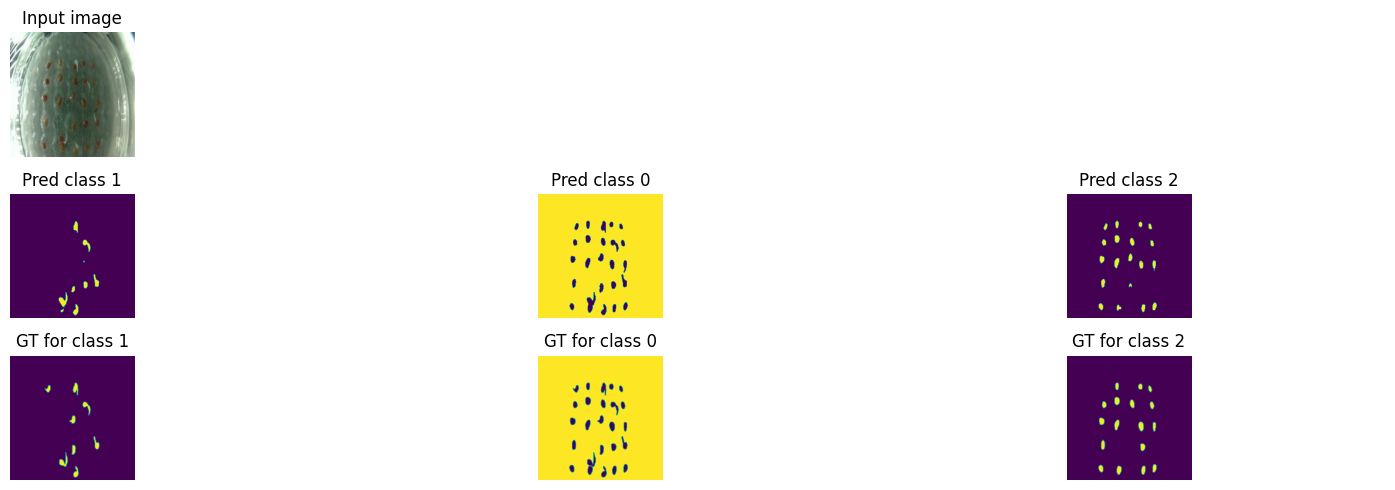

Train loss: 0.01928 | Time: 34m 57s | Val loss: 0.01536
Train_DICE_avg: 0.76926 | Train_Jaccard_avg: 0.70457 | Train_Sensitivity_avg: 0.94759 | Train_Specificity_avg: 0.91892 
Class 0 - Train_DICE: 0.99266 | Train_Jaccard: 0.98545 | Train_Sensitivity: 0.99726 | Train_Specificity: 0.77785 
Class 1 - Train_DICE: 0.51891 | Train_Jaccard: 0.45088 | Train_Sensitivity: 0.90846 | Train_Specificity: 0.98974 
Class 2 - Train_DICE: 0.79620 | Train_Jaccard: 0.67737 | Train_Sensitivity: 0.93705 | Train_Specificity: 0.98916 
Val_DICE_avg: 0.81998 | Val_Jaccard_avg: 0.75120 | Val_Sensitivity_avg: 0.96369 | Val_Specificity_avg: 0.86606 
Class 0 - Val_DICE: 0.99211 | Val_Jaccard: 0.98438 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61808 
Class 1 - Val_DICE: 0.70758 | Val_Jaccard: 0.64229 | Val_Sensitivity: 0.91995 | Val_Specificity: 0.99422 
Class 2 - Val_DICE: 0.76023 | Val_Jaccard: 0.62691 | Val_Sensitivity: 0.97175 | Val_Specificity: 0.98588 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


Train loss: 0.01913 | Time: 35m 36s | Val loss: 0.01541
Train_DICE_avg: 0.76858 | Train_Jaccard_avg: 0.70347 | Train_Sensitivity_avg: 0.94673 | Train_Specificity_avg: 0.91861 
Class 0 - Train_DICE: 0.99265 | Train_Jaccard: 0.98543 | Train_Sensitivity: 0.99732 | Train_Specificity: 0.77693 
Class 1 - Train_DICE: 0.51887 | Train_Jaccard: 0.45054 | Train_Sensitivity: 0.90586 | Train_Specificity: 0.99000 
Class 2 - Train_DICE: 0.79423 | Train_Jaccard: 0.67445 | Train_Sensitivity: 0.93700 | Train_Specificity: 0.98891 
Val_DICE_avg: 0.81955 | Val_Jaccard_avg: 0.75002 | Val_Sensitivity_avg: 0.96216 | Val_Specificity_avg: 0.86508 
Class 0 - Val_DICE: 0.99204 | Val_Jaccard: 0.98424 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.61533 
Class 1 - Val_DICE: 0.71647 | Val_Jaccard: 0.64937 | Val_Sensitivity: 0.91355 | Val_Specificity: 0.99448 
Class 2 - Val_DICE: 0.75014 | Val_Jaccard: 0.61645 | Val_Sensitivity: 0.97354 | Val_Specificity: 0.98542 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


Train loss: 0.01915 | Time: 36m 16s | Val loss: 0.01543
Train_DICE_avg: 0.76684 | Train_Jaccard_avg: 0.70231 | Train_Sensitivity_avg: 0.94483 | Train_Specificity_avg: 0.92053 
Class 0 - Train_DICE: 0.99278 | Train_Jaccard: 0.98568 | Train_Sensitivity: 0.99726 | Train_Specificity: 0.78271 
Class 1 - Train_DICE: 0.51390 | Train_Jaccard: 0.44586 | Train_Sensitivity: 0.89907 | Train_Specificity: 0.98983 
Class 2 - Train_DICE: 0.79383 | Train_Jaccard: 0.67538 | Train_Sensitivity: 0.93816 | Train_Specificity: 0.98904 
Val_DICE_avg: 0.82356 | Val_Jaccard_avg: 0.75367 | Val_Sensitivity_avg: 0.96341 | Val_Specificity_avg: 0.86586 
Class 0 - Val_DICE: 0.99205 | Val_Jaccard: 0.98426 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.61751 
Class 1 - Val_DICE: 0.72520 | Val_Jaccard: 0.65802 | Val_Sensitivity: 0.91419 | Val_Specificity: 0.99477 
Class 2 - Val_DICE: 0.75343 | Val_Jaccard: 0.61873 | Val_Sensitivity: 0.97666 | Val_Specificity: 0.98529 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.01912 | Time: 36m 55s | Val loss: 0.01517
Train_DICE_avg: 0.77305 | Train_Jaccard_avg: 0.70922 | Train_Sensitivity_avg: 0.94701 | Train_Specificity_avg: 0.92044 
Class 0 - Train_DICE: 0.99270 | Train_Jaccard: 0.98554 | Train_Sensitivity: 0.99721 | Train_Specificity: 0.78180 
Class 1 - Train_DICE: 0.52780 | Train_Jaccard: 0.46114 | Train_Sensitivity: 0.90797 | Train_Specificity: 0.99024 
Class 2 - Train_DICE: 0.79865 | Train_Jaccard: 0.68097 | Train_Sensitivity: 0.93583 | Train_Specificity: 0.98930 
Val_DICE_avg: 0.82178 | Val_Jaccard_avg: 0.75242 | Val_Sensitivity_avg: 0.96803 | Val_Specificity_avg: 0.86539 
Class 0 - Val_DICE: 0.99204 | Val_Jaccard: 0.98425 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.61616 
Class 1 - Val_DICE: 0.71641 | Val_Jaccard: 0.65002 | Val_Sensitivity: 0.93067 | Val_Specificity: 0.99435 
Class 2 - Val_DICE: 0.75688 | Val_Jaccard: 0.62300 | Val_Sensitivity: 0.97403 | Val_Specificity: 0.98567 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]


Train loss: 0.01905 | Time: 37m 35s | Val loss: 0.01526
Train_DICE_avg: 0.77424 | Train_Jaccard_avg: 0.71030 | Train_Sensitivity_avg: 0.94901 | Train_Specificity_avg: 0.92095 
Class 0 - Train_DICE: 0.99274 | Train_Jaccard: 0.98562 | Train_Sensitivity: 0.99715 | Train_Specificity: 0.78322 
Class 1 - Train_DICE: 0.53002 | Train_Jaccard: 0.46246 | Train_Sensitivity: 0.91192 | Train_Specificity: 0.99020 
Class 2 - Train_DICE: 0.79994 | Train_Jaccard: 0.68282 | Train_Sensitivity: 0.93795 | Train_Specificity: 0.98944 
Val_DICE_avg: 0.82509 | Val_Jaccard_avg: 0.75581 | Val_Sensitivity_avg: 0.96961 | Val_Specificity_avg: 0.86476 
Class 0 - Val_DICE: 0.99200 | Val_Jaccard: 0.98416 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.61408 
Class 1 - Val_DICE: 0.72282 | Val_Jaccard: 0.65576 | Val_Sensitivity: 0.93594 | Val_Specificity: 0.99435 
Class 2 - Val_DICE: 0.76044 | Val_Jaccard: 0.62750 | Val_Sensitivity: 0.97350 | Val_Specificity: 0.98585 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


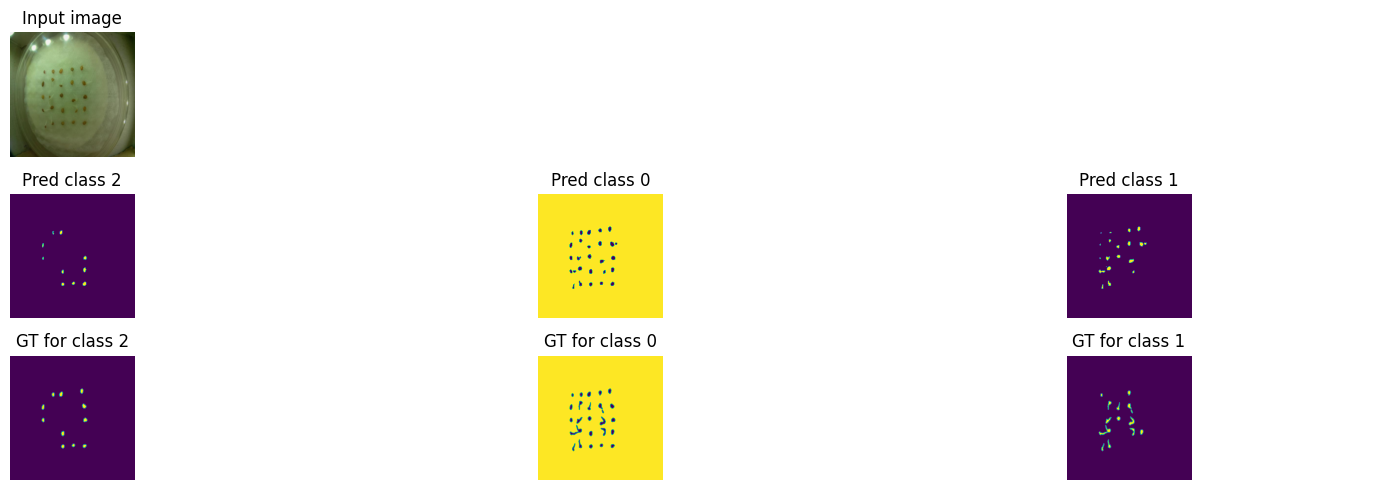

Train loss: 0.01903 | Time: 38m 15s | Val loss: 0.01534
Train_DICE_avg: 0.76942 | Train_Jaccard_avg: 0.70506 | Train_Sensitivity_avg: 0.94889 | Train_Specificity_avg: 0.92025 
Class 0 - Train_DICE: 0.99276 | Train_Jaccard: 0.98565 | Train_Sensitivity: 0.99725 | Train_Specificity: 0.78158 
Class 1 - Train_DICE: 0.52042 | Train_Jaccard: 0.45235 | Train_Sensitivity: 0.91063 | Train_Specificity: 0.98991 
Class 2 - Train_DICE: 0.79509 | Train_Jaccard: 0.67718 | Train_Sensitivity: 0.93880 | Train_Specificity: 0.98927 
Val_DICE_avg: 0.82408 | Val_Jaccard_avg: 0.75435 | Val_Sensitivity_avg: 0.96673 | Val_Specificity_avg: 0.86578 
Class 0 - Val_DICE: 0.99211 | Val_Jaccard: 0.98438 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.61735 
Class 1 - Val_DICE: 0.72465 | Val_Jaccard: 0.65718 | Val_Sensitivity: 0.92696 | Val_Specificity: 0.99439 
Class 2 - Val_DICE: 0.75549 | Val_Jaccard: 0.62149 | Val_Sensitivity: 0.97387 | Val_Specificity: 0.98559 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇████████████████
wandb:       Training Jaccard ▁▃▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇██████████████
wandb:          Training Loss █▆▅▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▄██▇▆▇█▆▅▄▂▂▂▂▂▁▃▃▂▃▄▄▄▄▅▄▅▅▄▆▅▅▅▅▅▅▅▅▅▆
wandb:   Training Specificity ▁▄▆▆▇▇▇▇▇▇▇▇▇▇▇▇████████████████████████
wandb:        Validation DICE ▁▂▃▂▃▄▄▄▅▅▆▅▆▆▆▇▆▇▇▆▇▇▇▇▇█▇█▇███████████
wandb:     Validation Jaccard ▁▂▃▃▂▄▄▅▅▅▅▆▆▅▇▆▇▇▆▇▇▇██████████████████
wandb:        Validation Loss █▅▄▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▇▇▆▆▇▇▆▆▄▆▆▁▆▇▆▆▇▂█▇▆█▆█▇▇▇█▇▇▇█▆▇▇▇▇▇██
wandb: Validation Specificity ▁▇▅▆▇▇▆▅▆▆▆▇▆▄▆▇▇▇█▇▆▇▇▇▇█▇▇▇▇▇▇▇▇▇█▇▇▇▇
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.76942
wandb:       Training Jaccard 0.70506
wandb:          Training Loss 0.01


Training complete!


In [17]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [18]:
model = DeepLabV3Plus(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [19]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]



Global Performance Metrics:
Loss mean: 0.01559, std: 0.00158
Dice Coefficient mean: 0.84695, std: 0.12217
Jaccard Index mean: 0.78839, std: 0.13784
Sensitivity mean: 0.85636, std: 0.12246
Specificity mean: 0.95399, std: 0.03692

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99588, std: 0.00226
Jaccard mean: 0.99181, std: 0.00446
Sensitivity mean: 0.99613, std: 0.00281
Specificity mean: 0.86732, std: 0.11192

Class 1:
Dice mean: 0.68572, std: 0.33349
Jaccard mean: 0.61037, std: 0.35072
Sensitivity mean: 0.71385, std: 0.32903
Specificity mean: 0.99834, std: 0.00344

Class 2:
Dice mean: 0.85924, std: 0.08985
Jaccard mean: 0.76300, std: 0.12293
Sensitivity mean: 0.85909, std: 0.12053
Specificity mean: 0.99631, std: 0.00270


### Focal Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Backbone"] = "resnet34"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-DeepLabV3+-ResNet34-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.29 GB
GPU Memory - Reserved: 1.42 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251113_221827-0bkwn502
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-DeepLabV3+-ResNet34-Focal
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/0bkwn502



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]


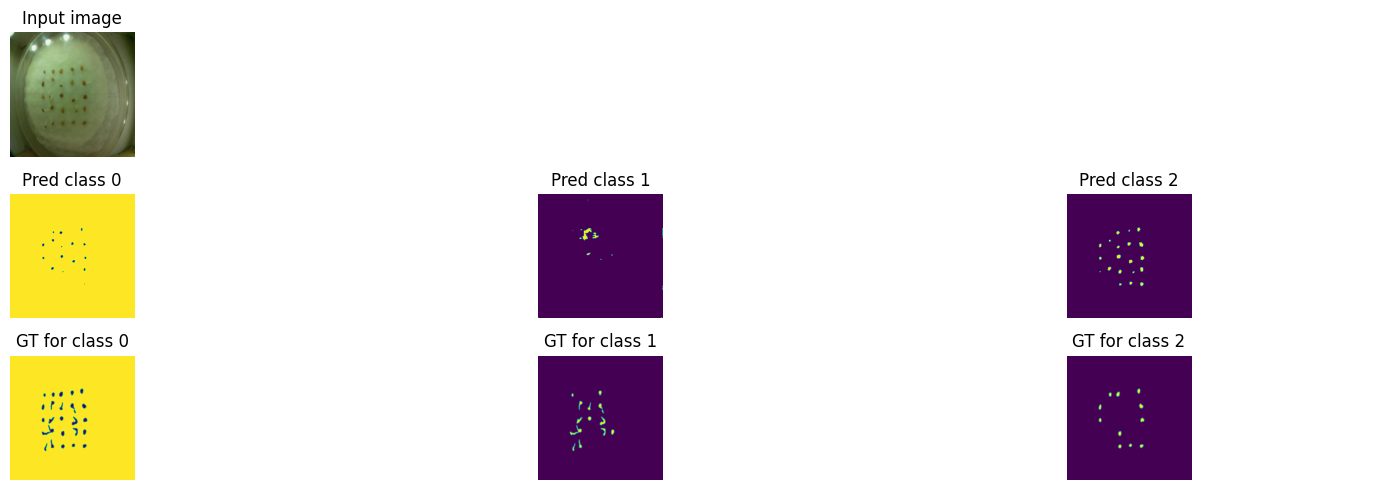

Train loss: 0.04724 | Time: 0m 31s | Val loss: 0.02952
Train_DICE_avg: 0.28551 | Train_Jaccard_avg: 0.23697 | Train_Sensitivity_avg: 0.65238 | Train_Specificity_avg: 0.71853 
Class 0 - Train_DICE: 0.62834 | Train_Jaccard: 0.53934 | Train_Sensitivity: 0.98190 | Train_Specificity: 0.20534 
Class 1 - Train_DICE: 0.09627 | Train_Jaccard: 0.08967 | Train_Sensitivity: 0.35735 | Train_Specificity: 0.98620 
Class 2 - Train_DICE: 0.13192 | Train_Jaccard: 0.08190 | Train_Sensitivity: 0.61790 | Train_Specificity: 0.96405 
Val_DICE_avg: 0.52640 | Val_Jaccard_avg: 0.47628 | Val_Sensitivity_avg: 0.80892 | Val_Specificity_avg: 0.76608 
Class 0 - Val_DICE: 0.95477 | Val_Jaccard: 0.91691 | Val_Sensitivity: 0.99773 | Val_Specificity: 0.33776 
Class 1 - Val_DICE: 0.26930 | Val_Jaccard: 0.26377 | Val_Sensitivity: 0.66464 | Val_Specificity: 0.98917 
Class 2 - Val_DICE: 0.35513 | Val_Jaccard: 0.24817 | Val_Sensitivity: 0.76439 | Val_Specificity: 0.97132 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]


Train loss: 0.01560 | Time: 1m 3s | Val loss: 0.01114
Train_DICE_avg: 0.56458 | Train_Jaccard_avg: 0.51558 | Train_Sensitivity_avg: 0.91119 | Train_Specificity_avg: 0.84742 
Class 0 - Train_DICE: 0.97645 | Train_Jaccard: 0.95439 | Train_Sensitivity: 0.98766 | Train_Specificity: 0.58007 
Class 1 - Train_DICE: 0.25814 | Train_Jaccard: 0.25714 | Train_Sensitivity: 0.91039 | Train_Specificity: 0.98565 
Class 2 - Train_DICE: 0.45914 | Train_Jaccard: 0.33522 | Train_Sensitivity: 0.83552 | Train_Specificity: 0.97652 
Val_DICE_avg: 0.66384 | Val_Jaccard_avg: 0.61462 | Val_Sensitivity_avg: 0.89104 | Val_Specificity_avg: 0.81268 
Class 0 - Val_DICE: 0.98247 | Val_Jaccard: 0.96581 | Val_Sensitivity: 0.99743 | Val_Specificity: 0.46787 
Class 1 - Val_DICE: 0.42630 | Val_Jaccard: 0.42366 | Val_Sensitivity: 0.89902 | Val_Specificity: 0.98841 
Class 2 - Val_DICE: 0.58275 | Val_Jaccard: 0.45438 | Val_Sensitivity: 0.77668 | Val_Specificity: 0.98176 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


Train loss: 0.00970 | Time: 1m 34s | Val loss: 0.00709
Train_DICE_avg: 0.60899 | Train_Jaccard_avg: 0.56067 | Train_Sensitivity_avg: 0.93133 | Train_Specificity_avg: 0.87875 
Class 0 - Train_DICE: 0.98313 | Train_Jaccard: 0.96706 | Train_Sensitivity: 0.98814 | Train_Specificity: 0.66852 
Class 1 - Train_DICE: 0.26483 | Train_Jaccard: 0.26424 | Train_Sensitivity: 0.94648 | Train_Specificity: 0.98573 
Class 2 - Train_DICE: 0.57900 | Train_Jaccard: 0.45072 | Train_Sensitivity: 0.85937 | Train_Specificity: 0.98201 
Val_DICE_avg: 0.67688 | Val_Jaccard_avg: 0.63066 | Val_Sensitivity_avg: 0.93729 | Val_Specificity_avg: 0.85058 
Class 0 - Val_DICE: 0.98989 | Val_Jaccard: 0.98004 | Val_Sensitivity: 0.99740 | Val_Specificity: 0.58129 
Class 1 - Val_DICE: 0.44805 | Val_Jaccard: 0.44632 | Val_Sensitivity: 0.96080 | Val_Specificity: 0.98837 
Class 2 - Val_DICE: 0.59270 | Val_Jaccard: 0.46562 | Val_Sensitivity: 0.85366 | Val_Specificity: 0.98210 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.00734 | Time: 2m 5s | Val loss: 0.00537
Train_DICE_avg: 0.62570 | Train_Jaccard_avg: 0.57890 | Train_Sensitivity_avg: 0.94580 | Train_Specificity_avg: 0.89320 
Class 0 - Train_DICE: 0.98559 | Train_Jaccard: 0.97173 | Train_Sensitivity: 0.98892 | Train_Specificity: 0.71032 
Class 1 - Train_DICE: 0.28260 | Train_Jaccard: 0.28241 | Train_Sensitivity: 0.98090 | Train_Specificity: 0.98575 
Class 2 - Train_DICE: 0.60891 | Train_Jaccard: 0.48257 | Train_Sensitivity: 0.86757 | Train_Specificity: 0.98353 
Val_DICE_avg: 0.68744 | Val_Jaccard_avg: 0.64149 | Val_Sensitivity_avg: 0.94657 | Val_Specificity_avg: 0.86672 
Class 0 - Val_DICE: 0.99045 | Val_Jaccard: 0.98114 | Val_Sensitivity: 0.99724 | Val_Specificity: 0.62942 
Class 1 - Val_DICE: 0.46855 | Val_Jaccard: 0.46840 | Val_Sensitivity: 0.97914 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.60332 | Val_Jaccard: 0.47494 | Val_Sensitivity: 0.86333 | Val_Specificity: 0.98239 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


Train loss: 0.00626 | Time: 2m 36s | Val loss: 0.00455
Train_DICE_avg: 0.63386 | Train_Jaccard_avg: 0.58738 | Train_Sensitivity_avg: 0.93913 | Train_Specificity_avg: 0.90166 
Class 0 - Train_DICE: 0.98674 | Train_Jaccard: 0.97395 | Train_Sensitivity: 0.98995 | Train_Specificity: 0.73465 
Class 1 - Train_DICE: 0.28279 | Train_Jaccard: 0.28216 | Train_Sensitivity: 0.96768 | Train_Specificity: 0.98579 
Class 2 - Train_DICE: 0.63204 | Train_Jaccard: 0.50603 | Train_Sensitivity: 0.85977 | Train_Specificity: 0.98454 
Val_DICE_avg: 0.70187 | Val_Jaccard_avg: 0.65348 | Val_Sensitivity_avg: 0.93917 | Val_Specificity_avg: 0.86359 
Class 0 - Val_DICE: 0.99080 | Val_Jaccard: 0.98183 | Val_Sensitivity: 0.99763 | Val_Specificity: 0.61879 
Class 1 - Val_DICE: 0.47035 | Val_Jaccard: 0.46933 | Val_Sensitivity: 0.95199 | Val_Specificity: 0.98840 
Class 2 - Val_DICE: 0.64446 | Val_Jaccard: 0.50929 | Val_Sensitivity: 0.86790 | Val_Specificity: 0.98359 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


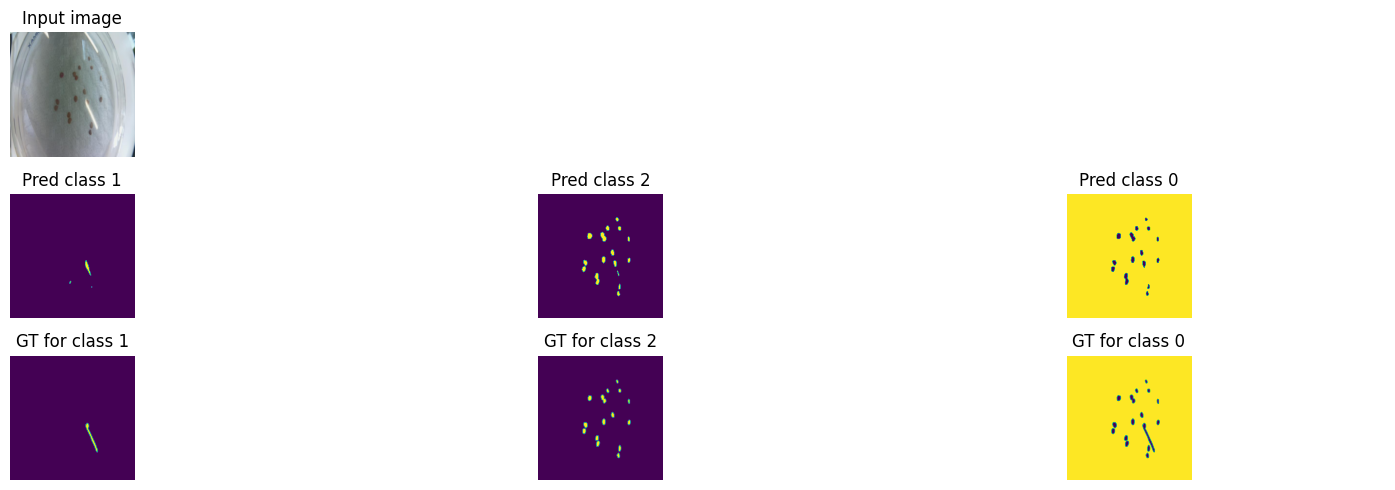

Train loss: 0.00555 | Time: 3m 8s | Val loss: 0.00405
Train_DICE_avg: 0.63503 | Train_Jaccard_avg: 0.58782 | Train_Sensitivity_avg: 0.93343 | Train_Specificity_avg: 0.90452 
Class 0 - Train_DICE: 0.98780 | Train_Jaccard: 0.97601 | Train_Sensitivity: 0.99065 | Train_Specificity: 0.74272 
Class 1 - Train_DICE: 0.27189 | Train_Jaccard: 0.27009 | Train_Sensitivity: 0.95434 | Train_Specificity: 0.98577 
Class 2 - Train_DICE: 0.64538 | Train_Jaccard: 0.51735 | Train_Sensitivity: 0.85530 | Train_Specificity: 0.98506 
Val_DICE_avg: 0.71455 | Val_Jaccard_avg: 0.66290 | Val_Sensitivity_avg: 0.93451 | Val_Specificity_avg: 0.86093 
Class 0 - Val_DICE: 0.99079 | Val_Jaccard: 0.98180 | Val_Sensitivity: 0.99783 | Val_Specificity: 0.60980 
Class 1 - Val_DICE: 0.48074 | Val_Jaccard: 0.47357 | Val_Sensitivity: 0.93369 | Val_Specificity: 0.98894 
Class 2 - Val_DICE: 0.67213 | Val_Jaccard: 0.53333 | Val_Sensitivity: 0.87200 | Val_Specificity: 0.98404 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Train loss: 0.00511 | Time: 3m 38s | Val loss: 0.00360
Train_DICE_avg: 0.64098 | Train_Jaccard_avg: 0.59177 | Train_Sensitivity_avg: 0.91833 | Train_Specificity_avg: 0.90752 
Class 0 - Train_DICE: 0.98817 | Train_Jaccard: 0.97672 | Train_Sensitivity: 0.99109 | Train_Specificity: 0.75124 
Class 1 - Train_DICE: 0.27347 | Train_Jaccard: 0.26664 | Train_Sensitivity: 0.90332 | Train_Specificity: 0.98596 
Class 2 - Train_DICE: 0.66130 | Train_Jaccard: 0.53194 | Train_Sensitivity: 0.86058 | Train_Specificity: 0.98536 
Val_DICE_avg: 0.70935 | Val_Jaccard_avg: 0.65550 | Val_Sensitivity_avg: 0.92334 | Val_Specificity_avg: 0.86298 
Class 0 - Val_DICE: 0.99121 | Val_Jaccard: 0.98263 | Val_Sensitivity: 0.99802 | Val_Specificity: 0.61528 
Class 1 - Val_DICE: 0.45381 | Val_Jaccard: 0.44008 | Val_Sensitivity: 0.89612 | Val_Specificity: 0.98944 
Class 2 - Val_DICE: 0.68303 | Val_Jaccard: 0.54379 | Val_Sensitivity: 0.87586 | Val_Specificity: 0.98422 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.00473 | Time: 4m 9s | Val loss: 0.00334
Train_DICE_avg: 0.64967 | Train_Jaccard_avg: 0.59914 | Train_Sensitivity_avg: 0.91590 | Train_Specificity_avg: 0.90975 
Class 0 - Train_DICE: 0.98875 | Train_Jaccard: 0.97784 | Train_Sensitivity: 0.99169 | Train_Specificity: 0.75725 
Class 1 - Train_DICE: 0.28297 | Train_Jaccard: 0.27191 | Train_Sensitivity: 0.89537 | Train_Specificity: 0.98612 
Class 2 - Train_DICE: 0.67728 | Train_Jaccard: 0.54766 | Train_Sensitivity: 0.86063 | Train_Specificity: 0.98588 
Val_DICE_avg: 0.71751 | Val_Jaccard_avg: 0.65915 | Val_Sensitivity_avg: 0.91585 | Val_Specificity_avg: 0.86373 
Class 0 - Val_DICE: 0.99147 | Val_Jaccard: 0.98314 | Val_Sensitivity: 0.99819 | Val_Specificity: 0.61700 
Class 1 - Val_DICE: 0.48455 | Val_Jaccard: 0.45731 | Val_Sensitivity: 0.85951 | Val_Specificity: 0.99058 
Class 2 - Val_DICE: 0.67650 | Val_Jaccard: 0.53700 | Val_Sensitivity: 0.88986 | Val_Specificity: 0.98360 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.00448 | Time: 4m 40s | Val loss: 0.00313
Train_DICE_avg: 0.65653 | Train_Jaccard_avg: 0.60410 | Train_Sensitivity_avg: 0.90912 | Train_Specificity_avg: 0.91234 
Class 0 - Train_DICE: 0.98896 | Train_Jaccard: 0.97825 | Train_Sensitivity: 0.99174 | Train_Specificity: 0.76408 
Class 1 - Train_DICE: 0.29193 | Train_Jaccard: 0.27553 | Train_Sensitivity: 0.87335 | Train_Specificity: 0.98660 
Class 2 - Train_DICE: 0.68869 | Train_Jaccard: 0.55852 | Train_Sensitivity: 0.86228 | Train_Specificity: 0.98633 
Val_DICE_avg: 0.71407 | Val_Jaccard_avg: 0.65574 | Val_Sensitivity_avg: 0.90986 | Val_Specificity_avg: 0.86618 
Class 0 - Val_DICE: 0.99199 | Val_Jaccard: 0.98414 | Val_Sensitivity: 0.99815 | Val_Specificity: 0.62437 
Class 1 - Val_DICE: 0.46075 | Val_Jaccard: 0.43525 | Val_Sensitivity: 0.84608 | Val_Specificity: 0.99053 
Class 2 - Val_DICE: 0.68946 | Val_Jaccard: 0.54783 | Val_Sensitivity: 0.88535 | Val_Specificity: 0.98363 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Train loss: 0.00423 | Time: 5m 11s | Val loss: 0.00291
Train_DICE_avg: 0.66019 | Train_Jaccard_avg: 0.60632 | Train_Sensitivity_avg: 0.90287 | Train_Specificity_avg: 0.91180 
Class 0 - Train_DICE: 0.98926 | Train_Jaccard: 0.97882 | Train_Sensitivity: 0.99215 | Train_Specificity: 0.76236 
Class 1 - Train_DICE: 0.29277 | Train_Jaccard: 0.27170 | Train_Sensitivity: 0.85112 | Train_Specificity: 0.98642 
Class 2 - Train_DICE: 0.69856 | Train_Jaccard: 0.56844 | Train_Sensitivity: 0.86534 | Train_Specificity: 0.98663 
Val_DICE_avg: 0.72121 | Val_Jaccard_avg: 0.66006 | Val_Sensitivity_avg: 0.91083 | Val_Specificity_avg: 0.86615 
Class 0 - Val_DICE: 0.99195 | Val_Jaccard: 0.98408 | Val_Sensitivity: 0.99844 | Val_Specificity: 0.62391 
Class 1 - Val_DICE: 0.49111 | Val_Jaccard: 0.45537 | Val_Sensitivity: 0.82871 | Val_Specificity: 0.99121 
Class 2 - Val_DICE: 0.68057 | Val_Jaccard: 0.54073 | Val_Sensitivity: 0.90536 | Val_Specificity: 0.98332 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


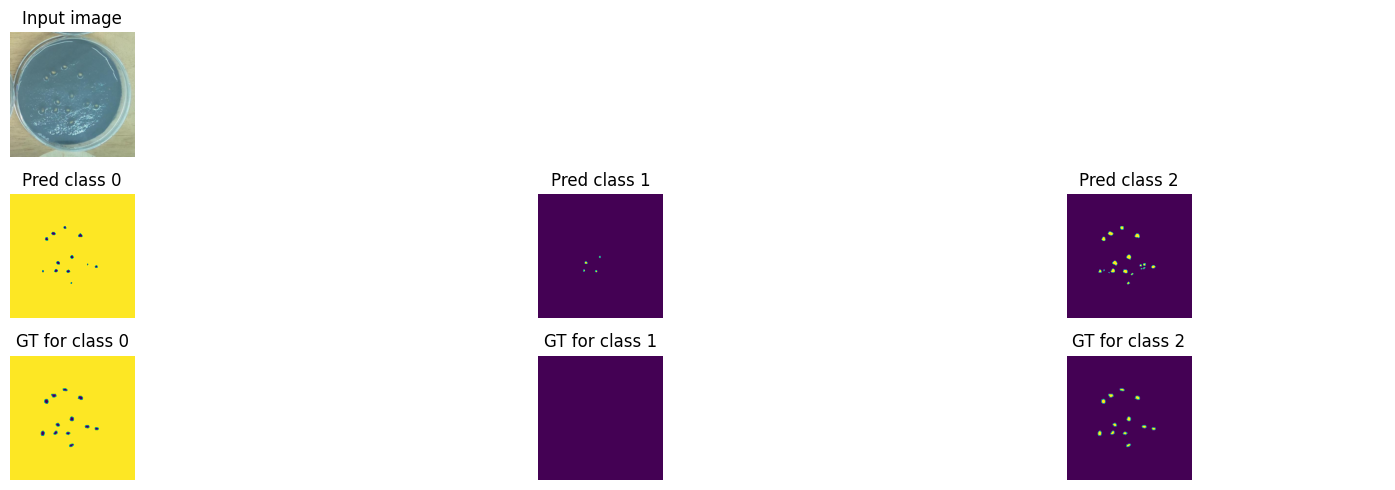

Train loss: 0.00386 | Time: 5m 48s | Val loss: 0.00267
Train_DICE_avg: 0.66987 | Train_Jaccard_avg: 0.61454 | Train_Sensitivity_avg: 0.90128 | Train_Specificity_avg: 0.91351 
Class 0 - Train_DICE: 0.98978 | Train_Jaccard: 0.97985 | Train_Sensitivity: 0.99263 | Train_Specificity: 0.76701 
Class 1 - Train_DICE: 0.31240 | Train_Jaccard: 0.28578 | Train_Sensitivity: 0.84183 | Train_Specificity: 0.98669 
Class 2 - Train_DICE: 0.70742 | Train_Jaccard: 0.57799 | Train_Sensitivity: 0.86939 | Train_Specificity: 0.98683 
Val_DICE_avg: 0.73320 | Val_Jaccard_avg: 0.66879 | Val_Sensitivity_avg: 0.89727 | Val_Specificity_avg: 0.85500 
Class 0 - Val_DICE: 0.99122 | Val_Jaccard: 0.98264 | Val_Sensitivity: 0.99877 | Val_Specificity: 0.58908 
Class 1 - Val_DICE: 0.51401 | Val_Jaccard: 0.46834 | Val_Sensitivity: 0.78689 | Val_Specificity: 0.99218 
Class 2 - Val_DICE: 0.69436 | Val_Jaccard: 0.55539 | Val_Sensitivity: 0.90615 | Val_Specificity: 0.98375 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.00358 | Time: 6m 25s | Val loss: 0.00240
Train_DICE_avg: 0.67630 | Train_Jaccard_avg: 0.61937 | Train_Sensitivity_avg: 0.89870 | Train_Specificity_avg: 0.91381 
Class 0 - Train_DICE: 0.98990 | Train_Jaccard: 0.98008 | Train_Sensitivity: 0.99282 | Train_Specificity: 0.76696 
Class 1 - Train_DICE: 0.32183 | Train_Jaccard: 0.28892 | Train_Sensitivity: 0.83323 | Train_Specificity: 0.98716 
Class 2 - Train_DICE: 0.71718 | Train_Jaccard: 0.58911 | Train_Sensitivity: 0.87005 | Train_Specificity: 0.98730 
Val_DICE_avg: 0.74069 | Val_Jaccard_avg: 0.67853 | Val_Sensitivity_avg: 0.90781 | Val_Specificity_avg: 0.86239 
Class 0 - Val_DICE: 0.99191 | Val_Jaccard: 0.98399 | Val_Sensitivity: 0.99868 | Val_Specificity: 0.61018 
Class 1 - Val_DICE: 0.50961 | Val_Jaccard: 0.46604 | Val_Sensitivity: 0.81228 | Val_Specificity: 0.99199 
Class 2 - Val_DICE: 0.72054 | Val_Jaccard: 0.58556 | Val_Sensitivity: 0.91246 | Val_Specificity: 0.98501 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


Train loss: 0.00344 | Time: 7m 2s | Val loss: 0.00225
Train_DICE_avg: 0.68867 | Train_Jaccard_avg: 0.63112 | Train_Sensitivity_avg: 0.90280 | Train_Specificity_avg: 0.91546 
Class 0 - Train_DICE: 0.99018 | Train_Jaccard: 0.98062 | Train_Sensitivity: 0.99328 | Train_Specificity: 0.77120 
Class 1 - Train_DICE: 0.35136 | Train_Jaccard: 0.31455 | Train_Sensitivity: 0.84210 | Train_Specificity: 0.98749 
Class 2 - Train_DICE: 0.72447 | Train_Jaccard: 0.59818 | Train_Sensitivity: 0.87301 | Train_Specificity: 0.98770 
Val_DICE_avg: 0.72970 | Val_Jaccard_avg: 0.66600 | Val_Sensitivity_avg: 0.90066 | Val_Specificity_avg: 0.86498 
Class 0 - Val_DICE: 0.99218 | Val_Jaccard: 0.98453 | Val_Sensitivity: 0.99880 | Val_Specificity: 0.61867 
Class 1 - Val_DICE: 0.48764 | Val_Jaccard: 0.44258 | Val_Sensitivity: 0.78539 | Val_Specificity: 0.99227 
Class 2 - Val_DICE: 0.70926 | Val_Jaccard: 0.57089 | Val_Sensitivity: 0.91780 | Val_Specificity: 0.98400 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]


Train loss: 0.00335 | Time: 7m 39s | Val loss: 0.00230
Train_DICE_avg: 0.68896 | Train_Jaccard_avg: 0.63029 | Train_Sensitivity_avg: 0.90118 | Train_Specificity_avg: 0.91558 
Class 0 - Train_DICE: 0.99026 | Train_Jaccard: 0.98077 | Train_Sensitivity: 0.99338 | Train_Specificity: 0.77141 
Class 1 - Train_DICE: 0.34409 | Train_Jaccard: 0.30517 | Train_Sensitivity: 0.83742 | Train_Specificity: 0.98755 
Class 2 - Train_DICE: 0.73252 | Train_Jaccard: 0.60491 | Train_Sensitivity: 0.87274 | Train_Specificity: 0.98778 
Val_DICE_avg: 0.76098 | Val_Jaccard_avg: 0.69825 | Val_Sensitivity_avg: 0.91802 | Val_Specificity_avg: 0.85814 
Class 0 - Val_DICE: 0.99168 | Val_Jaccard: 0.98353 | Val_Sensitivity: 0.99895 | Val_Specificity: 0.59674 
Class 1 - Val_DICE: 0.56370 | Val_Jaccard: 0.51661 | Val_Sensitivity: 0.83970 | Val_Specificity: 0.99237 
Class 2 - Val_DICE: 0.72756 | Val_Jaccard: 0.59461 | Val_Sensitivity: 0.91542 | Val_Specificity: 0.98532 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.00321 | Time: 8m 16s | Val loss: 0.00228
Train_DICE_avg: 0.69759 | Train_Jaccard_avg: 0.63850 | Train_Sensitivity_avg: 0.90796 | Train_Specificity_avg: 0.91578 
Class 0 - Train_DICE: 0.99061 | Train_Jaccard: 0.98145 | Train_Sensitivity: 0.99384 | Train_Specificity: 0.77159 
Class 1 - Train_DICE: 0.36468 | Train_Jaccard: 0.32301 | Train_Sensitivity: 0.85005 | Train_Specificity: 0.98773 
Class 2 - Train_DICE: 0.73749 | Train_Jaccard: 0.61105 | Train_Sensitivity: 0.87998 | Train_Specificity: 0.98801 
Val_DICE_avg: 0.75817 | Val_Jaccard_avg: 0.69196 | Val_Sensitivity_avg: 0.90245 | Val_Specificity_avg: 0.85758 
Class 0 - Val_DICE: 0.99161 | Val_Jaccard: 0.98340 | Val_Sensitivity: 0.99902 | Val_Specificity: 0.59552 
Class 1 - Val_DICE: 0.57331 | Val_Jaccard: 0.51895 | Val_Sensitivity: 0.79506 | Val_Specificity: 0.99317 
Class 2 - Val_DICE: 0.70960 | Val_Jaccard: 0.57355 | Val_Sensitivity: 0.91327 | Val_Specificity: 0.98405 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


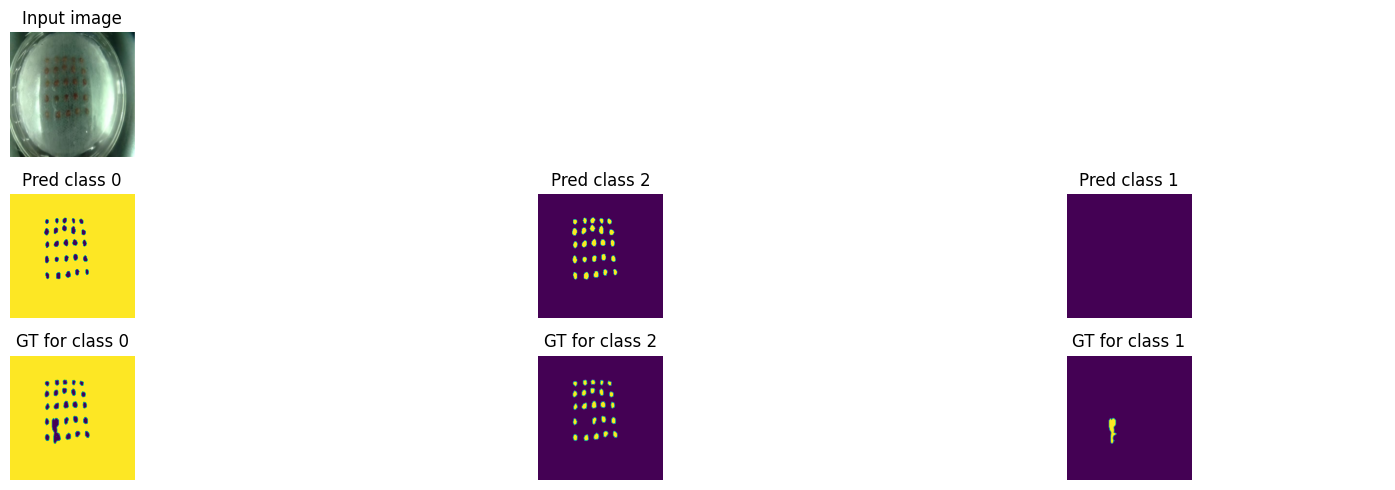

Train loss: 0.00314 | Time: 8m 54s | Val loss: 0.00215
Train_DICE_avg: 0.69429 | Train_Jaccard_avg: 0.63491 | Train_Sensitivity_avg: 0.90558 | Train_Specificity_avg: 0.91508 
Class 0 - Train_DICE: 0.99084 | Train_Jaccard: 0.98189 | Train_Sensitivity: 0.99429 | Train_Specificity: 0.76990 
Class 1 - Train_DICE: 0.35602 | Train_Jaccard: 0.31372 | Train_Sensitivity: 0.83896 | Train_Specificity: 0.98757 
Class 2 - Train_DICE: 0.73602 | Train_Jaccard: 0.60911 | Train_Sensitivity: 0.88348 | Train_Specificity: 0.98777 
Val_DICE_avg: 0.75370 | Val_Jaccard_avg: 0.68858 | Val_Sensitivity_avg: 0.91771 | Val_Specificity_avg: 0.86478 
Class 0 - Val_DICE: 0.99224 | Val_Jaccard: 0.98464 | Val_Sensitivity: 0.99895 | Val_Specificity: 0.61700 
Class 1 - Val_DICE: 0.55129 | Val_Jaccard: 0.50016 | Val_Sensitivity: 0.82560 | Val_Specificity: 0.99289 
Class 2 - Val_DICE: 0.71758 | Val_Jaccard: 0.58096 | Val_Sensitivity: 0.92858 | Val_Specificity: 0.98446 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


Train loss: 0.00310 | Time: 9m 31s | Val loss: 0.00207
Train_DICE_avg: 0.70633 | Train_Jaccard_avg: 0.64644 | Train_Sensitivity_avg: 0.90878 | Train_Specificity_avg: 0.91540 
Class 0 - Train_DICE: 0.99080 | Train_Jaccard: 0.98181 | Train_Sensitivity: 0.99414 | Train_Specificity: 0.76990 
Class 1 - Train_DICE: 0.38508 | Train_Jaccard: 0.34002 | Train_Sensitivity: 0.84860 | Train_Specificity: 0.98809 
Class 2 - Train_DICE: 0.74313 | Train_Jaccard: 0.61748 | Train_Sensitivity: 0.88360 | Train_Specificity: 0.98819 
Val_DICE_avg: 0.77965 | Val_Jaccard_avg: 0.71837 | Val_Sensitivity_avg: 0.94917 | Val_Specificity_avg: 0.86587 
Class 0 - Val_DICE: 0.99224 | Val_Jaccard: 0.98463 | Val_Sensitivity: 0.99891 | Val_Specificity: 0.61918 
Class 1 - Val_DICE: 0.59832 | Val_Jaccard: 0.55450 | Val_Sensitivity: 0.93056 | Val_Specificity: 0.99223 
Class 2 - Val_DICE: 0.74838 | Val_Jaccard: 0.61598 | Val_Sensitivity: 0.91805 | Val_Specificity: 0.98620 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.00304 | Time: 10m 8s | Val loss: 0.00207
Train_DICE_avg: 0.70317 | Train_Jaccard_avg: 0.64339 | Train_Sensitivity_avg: 0.90917 | Train_Specificity_avg: 0.91762 
Class 0 - Train_DICE: 0.99105 | Train_Jaccard: 0.98230 | Train_Sensitivity: 0.99422 | Train_Specificity: 0.77637 
Class 1 - Train_DICE: 0.37348 | Train_Jaccard: 0.32829 | Train_Sensitivity: 0.84723 | Train_Specificity: 0.98817 
Class 2 - Train_DICE: 0.74499 | Train_Jaccard: 0.61956 | Train_Sensitivity: 0.88605 | Train_Specificity: 0.98831 
Val_DICE_avg: 0.78834 | Val_Jaccard_avg: 0.72372 | Val_Sensitivity_avg: 0.94566 | Val_Specificity_avg: 0.86749 
Class 0 - Val_DICE: 0.99225 | Val_Jaccard: 0.98466 | Val_Sensitivity: 0.99898 | Val_Specificity: 0.62426 
Class 1 - Val_DICE: 0.63439 | Val_Jaccard: 0.58243 | Val_Sensitivity: 0.91288 | Val_Specificity: 0.99280 
Class 2 - Val_DICE: 0.73836 | Val_Jaccard: 0.60406 | Val_Sensitivity: 0.92512 | Val_Specificity: 0.98541 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.00300 | Time: 10m 45s | Val loss: 0.00207
Train_DICE_avg: 0.71004 | Train_Jaccard_avg: 0.65020 | Train_Sensitivity_avg: 0.91115 | Train_Specificity_avg: 0.91796 
Class 0 - Train_DICE: 0.99105 | Train_Jaccard: 0.98231 | Train_Sensitivity: 0.99445 | Train_Specificity: 0.77721 
Class 1 - Train_DICE: 0.38963 | Train_Jaccard: 0.34311 | Train_Sensitivity: 0.85370 | Train_Specificity: 0.98814 
Class 2 - Train_DICE: 0.74943 | Train_Jaccard: 0.62518 | Train_Sensitivity: 0.88529 | Train_Specificity: 0.98852 
Val_DICE_avg: 0.76822 | Val_Jaccard_avg: 0.70326 | Val_Sensitivity_avg: 0.92596 | Val_Specificity_avg: 0.86517 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98455 | Val_Sensitivity: 0.99905 | Val_Specificity: 0.61790 
Class 1 - Val_DICE: 0.59057 | Val_Jaccard: 0.53873 | Val_Sensitivity: 0.84639 | Val_Specificity: 0.99336 
Class 2 - Val_DICE: 0.72191 | Val_Jaccard: 0.58651 | Val_Sensitivity: 0.93242 | Val_Specificity: 0.98424 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]


Train loss: 0.00295 | Time: 11m 22s | Val loss: 0.00207
Train_DICE_avg: 0.70829 | Train_Jaccard_avg: 0.64803 | Train_Sensitivity_avg: 0.91187 | Train_Specificity_avg: 0.91842 
Class 0 - Train_DICE: 0.99131 | Train_Jaccard: 0.98282 | Train_Sensitivity: 0.99458 | Train_Specificity: 0.77900 
Class 1 - Train_DICE: 0.38716 | Train_Jaccard: 0.34006 | Train_Sensitivity: 0.85476 | Train_Specificity: 0.98798 
Class 2 - Train_DICE: 0.74642 | Train_Jaccard: 0.62122 | Train_Sensitivity: 0.88627 | Train_Specificity: 0.98829 
Val_DICE_avg: 0.77353 | Val_Jaccard_avg: 0.70669 | Val_Sensitivity_avg: 0.92011 | Val_Specificity_avg: 0.86004 
Class 0 - Val_DICE: 0.99178 | Val_Jaccard: 0.98373 | Val_Sensitivity: 0.99914 | Val_Specificity: 0.60159 
Class 1 - Val_DICE: 0.60485 | Val_Jaccard: 0.54686 | Val_Sensitivity: 0.82324 | Val_Specificity: 0.99381 
Class 2 - Val_DICE: 0.72396 | Val_Jaccard: 0.58947 | Val_Sensitivity: 0.93795 | Val_Specificity: 0.98471 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


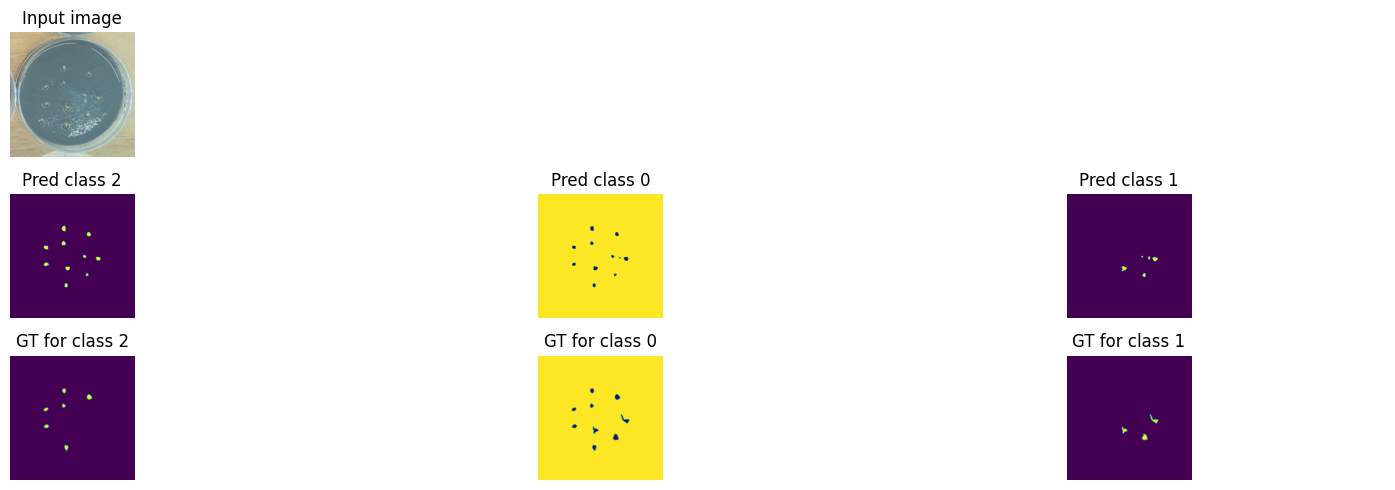

Train loss: 0.00293 | Time: 12m 2s | Val loss: 0.00196
Train_DICE_avg: 0.71299 | Train_Jaccard_avg: 0.65264 | Train_Sensitivity_avg: 0.91065 | Train_Specificity_avg: 0.91863 
Class 0 - Train_DICE: 0.99120 | Train_Jaccard: 0.98261 | Train_Sensitivity: 0.99458 | Train_Specificity: 0.77895 
Class 1 - Train_DICE: 0.39517 | Train_Jaccard: 0.34676 | Train_Sensitivity: 0.84930 | Train_Specificity: 0.98832 
Class 2 - Train_DICE: 0.75260 | Train_Jaccard: 0.62855 | Train_Sensitivity: 0.88809 | Train_Specificity: 0.98862 
Val_DICE_avg: 0.79634 | Val_Jaccard_avg: 0.73389 | Val_Sensitivity_avg: 0.94569 | Val_Specificity_avg: 0.86023 
Class 0 - Val_DICE: 0.99155 | Val_Jaccard: 0.98328 | Val_Sensitivity: 0.99910 | Val_Specificity: 0.60070 
Class 1 - Val_DICE: 0.63538 | Val_Jaccard: 0.58348 | Val_Sensitivity: 0.90892 | Val_Specificity: 0.99314 
Class 2 - Val_DICE: 0.76209 | Val_Jaccard: 0.63490 | Val_Sensitivity: 0.92904 | Val_Specificity: 0.98685 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.00281 | Time: 12m 41s | Val loss: 0.00193
Train_DICE_avg: 0.71460 | Train_Jaccard_avg: 0.65358 | Train_Sensitivity_avg: 0.91615 | Train_Specificity_avg: 0.91835 
Class 0 - Train_DICE: 0.99167 | Train_Jaccard: 0.98352 | Train_Sensitivity: 0.99507 | Train_Specificity: 0.77874 
Class 1 - Train_DICE: 0.39882 | Train_Jaccard: 0.34915 | Train_Sensitivity: 0.85917 | Train_Specificity: 0.98801 
Class 2 - Train_DICE: 0.75333 | Train_Jaccard: 0.62806 | Train_Sensitivity: 0.89422 | Train_Specificity: 0.98829 
Val_DICE_avg: 0.79083 | Val_Jaccard_avg: 0.72668 | Val_Sensitivity_avg: 0.94274 | Val_Specificity_avg: 0.86432 
Class 0 - Val_DICE: 0.99210 | Val_Jaccard: 0.98436 | Val_Sensitivity: 0.99914 | Val_Specificity: 0.61407 
Class 1 - Val_DICE: 0.63397 | Val_Jaccard: 0.58091 | Val_Sensitivity: 0.89530 | Val_Specificity: 0.99330 
Class 2 - Val_DICE: 0.74641 | Val_Jaccard: 0.61476 | Val_Sensitivity: 0.93380 | Val_Specificity: 0.98560 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.00276 | Time: 13m 20s | Val loss: 0.00197
Train_DICE_avg: 0.72151 | Train_Jaccard_avg: 0.65996 | Train_Sensitivity_avg: 0.91622 | Train_Specificity_avg: 0.91753 
Class 0 - Train_DICE: 0.99155 | Train_Jaccard: 0.98329 | Train_Sensitivity: 0.99524 | Train_Specificity: 0.77564 
Class 1 - Train_DICE: 0.41317 | Train_Jaccard: 0.36123 | Train_Sensitivity: 0.85928 | Train_Specificity: 0.98835 
Class 2 - Train_DICE: 0.75979 | Train_Jaccard: 0.63536 | Train_Sensitivity: 0.89416 | Train_Specificity: 0.98859 
Val_DICE_avg: 0.77574 | Val_Jaccard_avg: 0.70892 | Val_Sensitivity_avg: 0.91731 | Val_Specificity_avg: 0.86071 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98376 | Val_Sensitivity: 0.99921 | Val_Specificity: 0.60310 
Class 1 - Val_DICE: 0.59831 | Val_Jaccard: 0.53875 | Val_Sensitivity: 0.79828 | Val_Specificity: 0.99429 
Class 2 - Val_DICE: 0.73713 | Val_Jaccard: 0.60425 | Val_Sensitivity: 0.95444 | Val_Specificity: 0.98473 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]


Train loss: 0.00273 | Time: 14m 0s | Val loss: 0.00187
Train_DICE_avg: 0.72706 | Train_Jaccard_avg: 0.66529 | Train_Sensitivity_avg: 0.91652 | Train_Specificity_avg: 0.92063 
Class 0 - Train_DICE: 0.99170 | Train_Jaccard: 0.98357 | Train_Sensitivity: 0.99504 | Train_Specificity: 0.78450 
Class 1 - Train_DICE: 0.42629 | Train_Jaccard: 0.37299 | Train_Sensitivity: 0.85877 | Train_Specificity: 0.98875 
Class 2 - Train_DICE: 0.76320 | Train_Jaccard: 0.63930 | Train_Sensitivity: 0.89575 | Train_Specificity: 0.98865 
Val_DICE_avg: 0.79189 | Val_Jaccard_avg: 0.72376 | Val_Sensitivity_avg: 0.94130 | Val_Specificity_avg: 0.86863 
Class 0 - Val_DICE: 0.99237 | Val_Jaccard: 0.98488 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.62761 
Class 1 - Val_DICE: 0.66107 | Val_Jaccard: 0.60213 | Val_Sensitivity: 0.88254 | Val_Specificity: 0.99372 
Class 2 - Val_DICE: 0.72223 | Val_Jaccard: 0.58426 | Val_Sensitivity: 0.94211 | Val_Specificity: 0.98457 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]


Train loss: 0.00268 | Time: 14m 39s | Val loss: 0.00184
Train_DICE_avg: 0.72229 | Train_Jaccard_avg: 0.66065 | Train_Sensitivity_avg: 0.91512 | Train_Specificity_avg: 0.91945 
Class 0 - Train_DICE: 0.99186 | Train_Jaccard: 0.98388 | Train_Sensitivity: 0.99540 | Train_Specificity: 0.78102 
Class 1 - Train_DICE: 0.41072 | Train_Jaccard: 0.35679 | Train_Sensitivity: 0.85042 | Train_Specificity: 0.98857 
Class 2 - Train_DICE: 0.76428 | Train_Jaccard: 0.64128 | Train_Sensitivity: 0.89954 | Train_Specificity: 0.98875 
Val_DICE_avg: 0.79411 | Val_Jaccard_avg: 0.72836 | Val_Sensitivity_avg: 0.95032 | Val_Specificity_avg: 0.86906 
Class 0 - Val_DICE: 0.99220 | Val_Jaccard: 0.98456 | Val_Sensitivity: 0.99915 | Val_Specificity: 0.62794 
Class 1 - Val_DICE: 0.65485 | Val_Jaccard: 0.59856 | Val_Sensitivity: 0.89962 | Val_Specificity: 0.99386 
Class 2 - Val_DICE: 0.73527 | Val_Jaccard: 0.60195 | Val_Sensitivity: 0.95219 | Val_Specificity: 0.98538 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


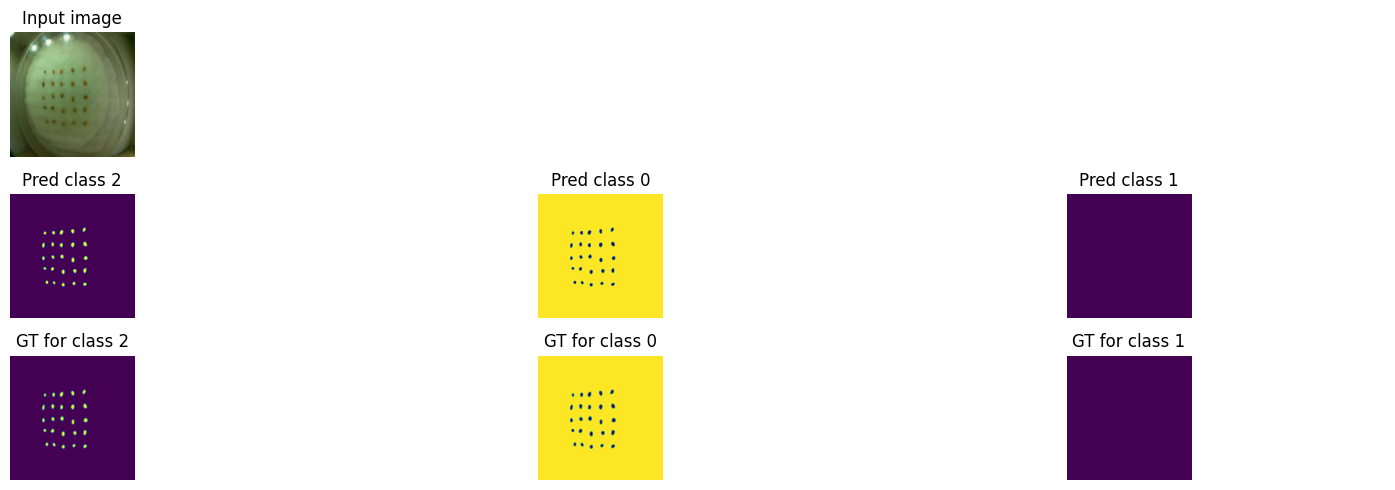

Train loss: 0.00265 | Time: 15m 19s | Val loss: 0.00184
Train_DICE_avg: 0.72614 | Train_Jaccard_avg: 0.66447 | Train_Sensitivity_avg: 0.91775 | Train_Specificity_avg: 0.92001 
Class 0 - Train_DICE: 0.99188 | Train_Jaccard: 0.98394 | Train_Sensitivity: 0.99537 | Train_Specificity: 0.78272 
Class 1 - Train_DICE: 0.42141 | Train_Jaccard: 0.36796 | Train_Sensitivity: 0.85951 | Train_Specificity: 0.98855 
Class 2 - Train_DICE: 0.76512 | Train_Jaccard: 0.64152 | Train_Sensitivity: 0.89836 | Train_Specificity: 0.98876 
Val_DICE_avg: 0.79835 | Val_Jaccard_avg: 0.73217 | Val_Sensitivity_avg: 0.94520 | Val_Specificity_avg: 0.86974 
Class 0 - Val_DICE: 0.99265 | Val_Jaccard: 0.98543 | Val_Sensitivity: 0.99911 | Val_Specificity: 0.63038 
Class 1 - Val_DICE: 0.66075 | Val_Jaccard: 0.60415 | Val_Sensitivity: 0.89677 | Val_Specificity: 0.99353 
Class 2 - Val_DICE: 0.74167 | Val_Jaccard: 0.60694 | Val_Sensitivity: 0.93973 | Val_Specificity: 0.98532 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Train loss: 0.00258 | Time: 15m 58s | Val loss: 0.00184
Train_DICE_avg: 0.73211 | Train_Jaccard_avg: 0.66989 | Train_Sensitivity_avg: 0.91311 | Train_Specificity_avg: 0.92074 
Class 0 - Train_DICE: 0.99212 | Train_Jaccard: 0.98440 | Train_Sensitivity: 0.99568 | Train_Specificity: 0.78450 
Class 1 - Train_DICE: 0.43436 | Train_Jaccard: 0.37813 | Train_Sensitivity: 0.84336 | Train_Specificity: 0.98881 
Class 2 - Train_DICE: 0.76983 | Train_Jaccard: 0.64713 | Train_Sensitivity: 0.90028 | Train_Specificity: 0.98892 
Val_DICE_avg: 0.79189 | Val_Jaccard_avg: 0.72575 | Val_Sensitivity_avg: 0.94176 | Val_Specificity_avg: 0.86550 
Class 0 - Val_DICE: 0.99217 | Val_Jaccard: 0.98449 | Val_Sensitivity: 0.99920 | Val_Specificity: 0.61683 
Class 1 - Val_DICE: 0.63582 | Val_Jaccard: 0.57764 | Val_Sensitivity: 0.87556 | Val_Specificity: 0.99391 
Class 2 - Val_DICE: 0.74769 | Val_Jaccard: 0.61512 | Val_Sensitivity: 0.95052 | Val_Specificity: 0.98575 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


Train loss: 0.00255 | Time: 16m 38s | Val loss: 0.00192
Train_DICE_avg: 0.73260 | Train_Jaccard_avg: 0.66981 | Train_Sensitivity_avg: 0.91988 | Train_Specificity_avg: 0.92098 
Class 0 - Train_DICE: 0.99211 | Train_Jaccard: 0.98438 | Train_Sensitivity: 0.99556 | Train_Specificity: 0.78518 
Class 1 - Train_DICE: 0.43504 | Train_Jaccard: 0.37788 | Train_Sensitivity: 0.86146 | Train_Specificity: 0.98884 
Class 2 - Train_DICE: 0.77065 | Train_Jaccard: 0.64717 | Train_Sensitivity: 0.90261 | Train_Specificity: 0.98892 
Val_DICE_avg: 0.78974 | Val_Jaccard_avg: 0.72109 | Val_Sensitivity_avg: 0.93425 | Val_Specificity_avg: 0.86536 
Class 0 - Val_DICE: 0.99200 | Val_Jaccard: 0.98416 | Val_Sensitivity: 0.99928 | Val_Specificity: 0.61725 
Class 1 - Val_DICE: 0.66885 | Val_Jaccard: 0.60270 | Val_Sensitivity: 0.84086 | Val_Specificity: 0.99470 
Class 2 - Val_DICE: 0.70839 | Val_Jaccard: 0.57642 | Val_Sensitivity: 0.96261 | Val_Specificity: 0.98413 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


Train loss: 0.00255 | Time: 17m 17s | Val loss: 0.00177
Train_DICE_avg: 0.73534 | Train_Jaccard_avg: 0.67300 | Train_Sensitivity_avg: 0.91810 | Train_Specificity_avg: 0.92229 
Class 0 - Train_DICE: 0.99220 | Train_Jaccard: 0.98456 | Train_Sensitivity: 0.99564 | Train_Specificity: 0.78861 
Class 1 - Train_DICE: 0.44192 | Train_Jaccard: 0.38536 | Train_Sensitivity: 0.85866 | Train_Specificity: 0.98919 
Class 2 - Train_DICE: 0.77190 | Train_Jaccard: 0.64909 | Train_Sensitivity: 0.90000 | Train_Specificity: 0.98906 
Val_DICE_avg: 0.79543 | Val_Jaccard_avg: 0.72703 | Val_Sensitivity_avg: 0.94524 | Val_Specificity_avg: 0.86838 
Class 0 - Val_DICE: 0.99234 | Val_Jaccard: 0.98484 | Val_Sensitivity: 0.99923 | Val_Specificity: 0.62640 
Class 1 - Val_DICE: 0.66942 | Val_Jaccard: 0.60767 | Val_Sensitivity: 0.87508 | Val_Specificity: 0.99435 
Class 2 - Val_DICE: 0.72451 | Val_Jaccard: 0.58858 | Val_Sensitivity: 0.96141 | Val_Specificity: 0.98439 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.00249 | Time: 17m 56s | Val loss: 0.00177
Train_DICE_avg: 0.73918 | Train_Jaccard_avg: 0.67631 | Train_Sensitivity_avg: 0.91916 | Train_Specificity_avg: 0.92001 
Class 0 - Train_DICE: 0.99216 | Train_Jaccard: 0.98448 | Train_Sensitivity: 0.99579 | Train_Specificity: 0.78212 
Class 1 - Train_DICE: 0.45013 | Train_Jaccard: 0.39124 | Train_Sensitivity: 0.85655 | Train_Specificity: 0.98894 
Class 2 - Train_DICE: 0.77525 | Train_Jaccard: 0.65321 | Train_Sensitivity: 0.90515 | Train_Specificity: 0.98897 
Val_DICE_avg: 0.80038 | Val_Jaccard_avg: 0.73399 | Val_Sensitivity_avg: 0.94593 | Val_Specificity_avg: 0.86458 
Class 0 - Val_DICE: 0.99207 | Val_Jaccard: 0.98430 | Val_Sensitivity: 0.99923 | Val_Specificity: 0.61429 
Class 1 - Val_DICE: 0.65713 | Val_Jaccard: 0.59883 | Val_Sensitivity: 0.89870 | Val_Specificity: 0.99364 
Class 2 - Val_DICE: 0.75193 | Val_Jaccard: 0.61886 | Val_Sensitivity: 0.93985 | Val_Specificity: 0.98582 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]


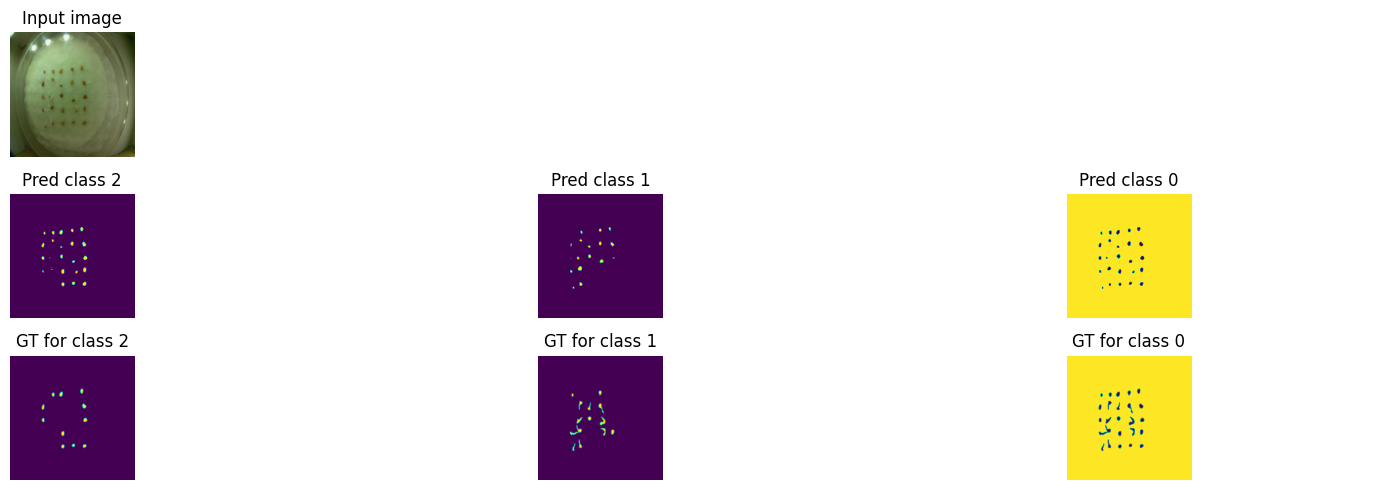

Train loss: 0.00248 | Time: 18m 37s | Val loss: 0.00175
Train_DICE_avg: 0.73620 | Train_Jaccard_avg: 0.67336 | Train_Sensitivity_avg: 0.91984 | Train_Specificity_avg: 0.92004 
Class 0 - Train_DICE: 0.99226 | Train_Jaccard: 0.98467 | Train_Sensitivity: 0.99586 | Train_Specificity: 0.78241 
Class 1 - Train_DICE: 0.44216 | Train_Jaccard: 0.38414 | Train_Sensitivity: 0.85694 | Train_Specificity: 0.98880 
Class 2 - Train_DICE: 0.77419 | Train_Jaccard: 0.65127 | Train_Sensitivity: 0.90673 | Train_Specificity: 0.98891 
Val_DICE_avg: 0.81040 | Val_Jaccard_avg: 0.74243 | Val_Sensitivity_avg: 0.95994 | Val_Specificity_avg: 0.86922 
Class 0 - Val_DICE: 0.99250 | Val_Jaccard: 0.98515 | Val_Sensitivity: 0.99921 | Val_Specificity: 0.62830 
Class 1 - Val_DICE: 0.68362 | Val_Jaccard: 0.62256 | Val_Sensitivity: 0.93153 | Val_Specificity: 0.99373 
Class 2 - Val_DICE: 0.75506 | Val_Jaccard: 0.61958 | Val_Sensitivity: 0.94907 | Val_Specificity: 0.98563 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.00244 | Time: 19m 17s | Val loss: 0.00180
Train_DICE_avg: 0.74181 | Train_Jaccard_avg: 0.67949 | Train_Sensitivity_avg: 0.92183 | Train_Specificity_avg: 0.92214 
Class 0 - Train_DICE: 0.99231 | Train_Jaccard: 0.98477 | Train_Sensitivity: 0.99585 | Train_Specificity: 0.78815 
Class 1 - Train_DICE: 0.45417 | Train_Jaccard: 0.39632 | Train_Sensitivity: 0.86390 | Train_Specificity: 0.98911 
Class 2 - Train_DICE: 0.77894 | Train_Jaccard: 0.65737 | Train_Sensitivity: 0.90574 | Train_Specificity: 0.98916 
Val_DICE_avg: 0.79762 | Val_Jaccard_avg: 0.72612 | Val_Sensitivity_avg: 0.94028 | Val_Specificity_avg: 0.86844 
Class 0 - Val_DICE: 0.99227 | Val_Jaccard: 0.98471 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.62678 
Class 1 - Val_DICE: 0.68384 | Val_Jaccard: 0.61525 | Val_Sensitivity: 0.85276 | Val_Specificity: 0.99463 
Class 2 - Val_DICE: 0.71675 | Val_Jaccard: 0.57841 | Val_Sensitivity: 0.96882 | Val_Specificity: 0.98390 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.00240 | Time: 19m 57s | Val loss: 0.00172
Train_DICE_avg: 0.74465 | Train_Jaccard_avg: 0.68154 | Train_Sensitivity_avg: 0.92093 | Train_Specificity_avg: 0.92377 
Class 0 - Train_DICE: 0.99249 | Train_Jaccard: 0.98512 | Train_Sensitivity: 0.99587 | Train_Specificity: 0.79231 
Class 1 - Train_DICE: 0.46093 | Train_Jaccard: 0.40012 | Train_Sensitivity: 0.85738 | Train_Specificity: 0.98970 
Class 2 - Train_DICE: 0.78053 | Train_Jaccard: 0.65937 | Train_Sensitivity: 0.90954 | Train_Specificity: 0.98929 
Val_DICE_avg: 0.80232 | Val_Jaccard_avg: 0.73285 | Val_Sensitivity_avg: 0.93864 | Val_Specificity_avg: 0.86843 
Class 0 - Val_DICE: 0.99234 | Val_Jaccard: 0.98483 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.62553 
Class 1 - Val_DICE: 0.67027 | Val_Jaccard: 0.60220 | Val_Sensitivity: 0.86056 | Val_Specificity: 0.99427 
Class 2 - Val_DICE: 0.74436 | Val_Jaccard: 0.61152 | Val_Sensitivity: 0.95608 | Val_Specificity: 0.98550 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]


Train loss: 0.00235 | Time: 20m 37s | Val loss: 0.00169
Train_DICE_avg: 0.74689 | Train_Jaccard_avg: 0.68350 | Train_Sensitivity_avg: 0.92230 | Train_Specificity_avg: 0.92206 
Class 0 - Train_DICE: 0.99255 | Train_Jaccard: 0.98523 | Train_Sensitivity: 0.99606 | Train_Specificity: 0.78764 
Class 1 - Train_DICE: 0.46420 | Train_Jaccard: 0.40265 | Train_Sensitivity: 0.86333 | Train_Specificity: 0.98920 
Class 2 - Train_DICE: 0.78391 | Train_Jaccard: 0.66260 | Train_Sensitivity: 0.90750 | Train_Specificity: 0.98936 
Val_DICE_avg: 0.80715 | Val_Jaccard_avg: 0.73914 | Val_Sensitivity_avg: 0.94806 | Val_Specificity_avg: 0.86645 
Class 0 - Val_DICE: 0.99213 | Val_Jaccard: 0.98442 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.61937 
Class 1 - Val_DICE: 0.67967 | Val_Jaccard: 0.61583 | Val_Sensitivity: 0.88689 | Val_Specificity: 0.99424 
Class 2 - Val_DICE: 0.74964 | Val_Jaccard: 0.61716 | Val_Sensitivity: 0.95804 | Val_Specificity: 0.98574 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.00235 | Time: 21m 17s | Val loss: 0.00172
Train_DICE_avg: 0.75177 | Train_Jaccard_avg: 0.68848 | Train_Sensitivity_avg: 0.92389 | Train_Specificity_avg: 0.92198 
Class 0 - Train_DICE: 0.99253 | Train_Jaccard: 0.98521 | Train_Sensitivity: 0.99614 | Train_Specificity: 0.78679 
Class 1 - Train_DICE: 0.47879 | Train_Jaccard: 0.41678 | Train_Sensitivity: 0.86574 | Train_Specificity: 0.98974 
Class 2 - Train_DICE: 0.78400 | Train_Jaccard: 0.66344 | Train_Sensitivity: 0.90979 | Train_Specificity: 0.98941 
Val_DICE_avg: 0.81918 | Val_Jaccard_avg: 0.75346 | Val_Sensitivity_avg: 0.95704 | Val_Specificity_avg: 0.86451 
Class 0 - Val_DICE: 0.99190 | Val_Jaccard: 0.98397 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.61269 
Class 1 - Val_DICE: 0.69232 | Val_Jaccard: 0.63321 | Val_Sensitivity: 0.92170 | Val_Specificity: 0.99406 
Class 2 - Val_DICE: 0.77332 | Val_Jaccard: 0.64321 | Val_Sensitivity: 0.95009 | Val_Specificity: 0.98680 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


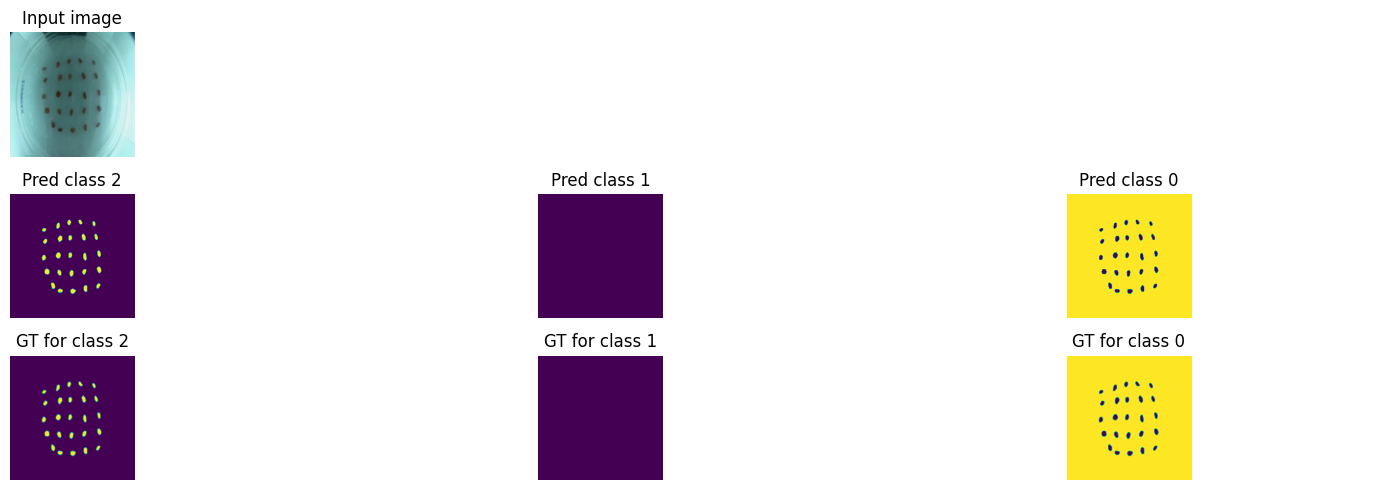

Train loss: 0.00229 | Time: 21m 57s | Val loss: 0.00172
Train_DICE_avg: 0.74964 | Train_Jaccard_avg: 0.68588 | Train_Sensitivity_avg: 0.92670 | Train_Specificity_avg: 0.92198 
Class 0 - Train_DICE: 0.99260 | Train_Jaccard: 0.98534 | Train_Sensitivity: 0.99617 | Train_Specificity: 0.78735 
Class 1 - Train_DICE: 0.47159 | Train_Jaccard: 0.40963 | Train_Sensitivity: 0.87234 | Train_Specificity: 0.98946 
Class 2 - Train_DICE: 0.78472 | Train_Jaccard: 0.66266 | Train_Sensitivity: 0.91159 | Train_Specificity: 0.98913 
Val_DICE_avg: 0.80885 | Val_Jaccard_avg: 0.73821 | Val_Sensitivity_avg: 0.94702 | Val_Specificity_avg: 0.86921 
Class 0 - Val_DICE: 0.99235 | Val_Jaccard: 0.98486 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.62848 
Class 1 - Val_DICE: 0.69812 | Val_Jaccard: 0.63156 | Val_Sensitivity: 0.87891 | Val_Specificity: 0.99458 
Class 2 - Val_DICE: 0.73608 | Val_Jaccard: 0.59821 | Val_Sensitivity: 0.96286 | Val_Specificity: 0.98457 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]


Train loss: 0.00227 | Time: 22m 37s | Val loss: 0.00166
Train_DICE_avg: 0.75227 | Train_Jaccard_avg: 0.68835 | Train_Sensitivity_avg: 0.92538 | Train_Specificity_avg: 0.92118 
Class 0 - Train_DICE: 0.99265 | Train_Jaccard: 0.98544 | Train_Sensitivity: 0.99635 | Train_Specificity: 0.78483 
Class 1 - Train_DICE: 0.47784 | Train_Jaccard: 0.41394 | Train_Sensitivity: 0.86675 | Train_Specificity: 0.98950 
Class 2 - Train_DICE: 0.78632 | Train_Jaccard: 0.66568 | Train_Sensitivity: 0.91304 | Train_Specificity: 0.98920 
Val_DICE_avg: 0.80862 | Val_Jaccard_avg: 0.73896 | Val_Sensitivity_avg: 0.94317 | Val_Specificity_avg: 0.86497 
Class 0 - Val_DICE: 0.99215 | Val_Jaccard: 0.98447 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.61496 
Class 1 - Val_DICE: 0.68081 | Val_Jaccard: 0.61339 | Val_Sensitivity: 0.86570 | Val_Specificity: 0.99470 
Class 2 - Val_DICE: 0.75289 | Val_Jaccard: 0.61902 | Val_Sensitivity: 0.96448 | Val_Specificity: 0.98525 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.00226 | Time: 23m 17s | Val loss: 0.00161
Train_DICE_avg: 0.75784 | Train_Jaccard_avg: 0.69426 | Train_Sensitivity_avg: 0.92695 | Train_Specificity_avg: 0.92484 
Class 0 - Train_DICE: 0.99267 | Train_Jaccard: 0.98548 | Train_Sensitivity: 0.99614 | Train_Specificity: 0.79509 
Class 1 - Train_DICE: 0.49046 | Train_Jaccard: 0.42679 | Train_Sensitivity: 0.87195 | Train_Specificity: 0.98993 
Class 2 - Train_DICE: 0.79041 | Train_Jaccard: 0.67050 | Train_Sensitivity: 0.91276 | Train_Specificity: 0.98950 
Val_DICE_avg: 0.82051 | Val_Jaccard_avg: 0.75021 | Val_Sensitivity_avg: 0.95703 | Val_Specificity_avg: 0.86821 
Class 0 - Val_DICE: 0.99243 | Val_Jaccard: 0.98501 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.62485 
Class 1 - Val_DICE: 0.71947 | Val_Jaccard: 0.65042 | Val_Sensitivity: 0.91190 | Val_Specificity: 0.99433 
Class 2 - Val_DICE: 0.74964 | Val_Jaccard: 0.61520 | Val_Sensitivity: 0.95992 | Val_Specificity: 0.98546 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]


Train loss: 0.00222 | Time: 23m 57s | Val loss: 0.00162
Train_DICE_avg: 0.75672 | Train_Jaccard_avg: 0.69276 | Train_Sensitivity_avg: 0.92435 | Train_Specificity_avg: 0.92451 
Class 0 - Train_DICE: 0.99284 | Train_Jaccard: 0.98581 | Train_Sensitivity: 0.99620 | Train_Specificity: 0.79412 
Class 1 - Train_DICE: 0.48511 | Train_Jaccard: 0.41991 | Train_Sensitivity: 0.86021 | Train_Specificity: 0.98990 
Class 2 - Train_DICE: 0.79220 | Train_Jaccard: 0.67255 | Train_Sensitivity: 0.91665 | Train_Specificity: 0.98951 
Val_DICE_avg: 0.82367 | Val_Jaccard_avg: 0.75504 | Val_Sensitivity_avg: 0.95929 | Val_Specificity_avg: 0.87121 
Class 0 - Val_DICE: 0.99250 | Val_Jaccard: 0.98516 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.63325 
Class 1 - Val_DICE: 0.71805 | Val_Jaccard: 0.65378 | Val_Sensitivity: 0.92016 | Val_Specificity: 0.99457 
Class 2 - Val_DICE: 0.76047 | Val_Jaccard: 0.62619 | Val_Sensitivity: 0.95842 | Val_Specificity: 0.98579 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]


Train loss: 0.00220 | Time: 24m 37s | Val loss: 0.00161
Train_DICE_avg: 0.75953 | Train_Jaccard_avg: 0.69594 | Train_Sensitivity_avg: 0.92882 | Train_Specificity_avg: 0.92307 
Class 0 - Train_DICE: 0.99280 | Train_Jaccard: 0.98574 | Train_Sensitivity: 0.99650 | Train_Specificity: 0.78987 
Class 1 - Train_DICE: 0.49204 | Train_Jaccard: 0.42771 | Train_Sensitivity: 0.87377 | Train_Specificity: 0.98982 
Class 2 - Train_DICE: 0.79374 | Train_Jaccard: 0.67438 | Train_Sensitivity: 0.91620 | Train_Specificity: 0.98953 
Val_DICE_avg: 0.81580 | Val_Jaccard_avg: 0.74480 | Val_Sensitivity_avg: 0.94757 | Val_Specificity_avg: 0.86677 
Class 0 - Val_DICE: 0.99228 | Val_Jaccard: 0.98472 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62079 
Class 1 - Val_DICE: 0.71574 | Val_Jaccard: 0.64590 | Val_Sensitivity: 0.87681 | Val_Specificity: 0.99477 
Class 2 - Val_DICE: 0.73938 | Val_Jaccard: 0.60378 | Val_Sensitivity: 0.96656 | Val_Specificity: 0.98476 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


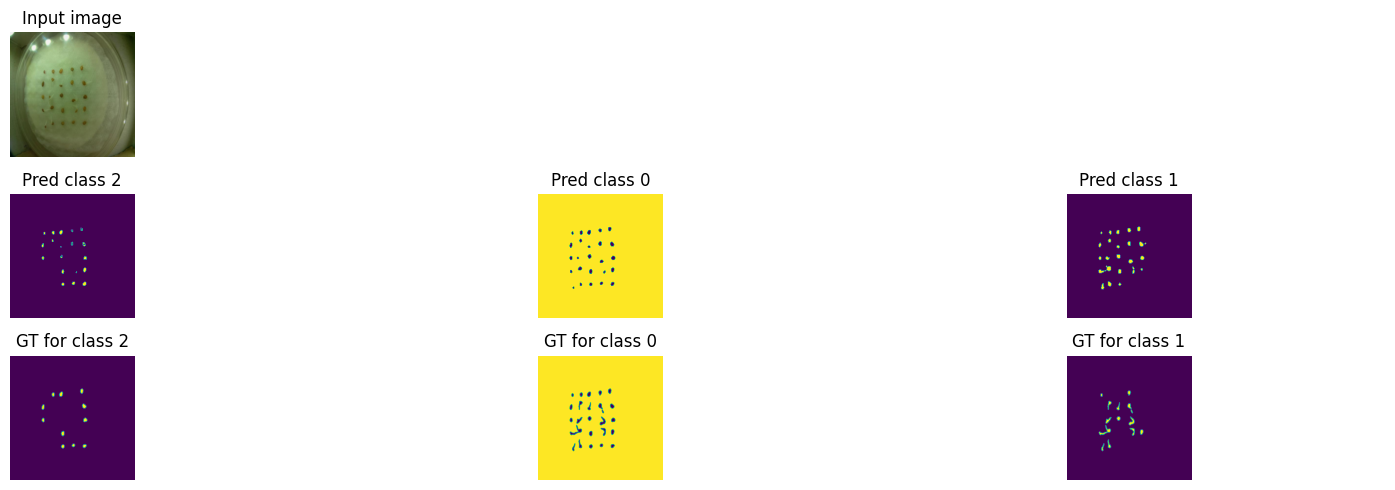

Train loss: 0.00226 | Time: 25m 17s | Val loss: 0.00162
Train_DICE_avg: 0.76070 | Train_Jaccard_avg: 0.69647 | Train_Sensitivity_avg: 0.92297 | Train_Specificity_avg: 0.92534 
Class 0 - Train_DICE: 0.99264 | Train_Jaccard: 0.98542 | Train_Sensitivity: 0.99597 | Train_Specificity: 0.79646 
Class 1 - Train_DICE: 0.49602 | Train_Jaccard: 0.43002 | Train_Sensitivity: 0.86078 | Train_Specificity: 0.98993 
Class 2 - Train_DICE: 0.79344 | Train_Jaccard: 0.67396 | Train_Sensitivity: 0.91215 | Train_Specificity: 0.98963 
Val_DICE_avg: 0.82185 | Val_Jaccard_avg: 0.75175 | Val_Sensitivity_avg: 0.95376 | Val_Specificity_avg: 0.86767 
Class 0 - Val_DICE: 0.99228 | Val_Jaccard: 0.98471 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62314 
Class 1 - Val_DICE: 0.73133 | Val_Jaccard: 0.66468 | Val_Sensitivity: 0.89517 | Val_Specificity: 0.99493 
Class 2 - Val_DICE: 0.74196 | Val_Jaccard: 0.60585 | Val_Sensitivity: 0.96676 | Val_Specificity: 0.98493 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.00219 | Time: 25m 57s | Val loss: 0.00162
Train_DICE_avg: 0.76485 | Train_Jaccard_avg: 0.70044 | Train_Sensitivity_avg: 0.92686 | Train_Specificity_avg: 0.92395 
Class 0 - Train_DICE: 0.99268 | Train_Jaccard: 0.98549 | Train_Sensitivity: 0.99630 | Train_Specificity: 0.79191 
Class 1 - Train_DICE: 0.50765 | Train_Jaccard: 0.44045 | Train_Sensitivity: 0.86690 | Train_Specificity: 0.99034 
Class 2 - Train_DICE: 0.79423 | Train_Jaccard: 0.67539 | Train_Sensitivity: 0.91736 | Train_Specificity: 0.98959 
Val_DICE_avg: 0.82399 | Val_Jaccard_avg: 0.75606 | Val_Sensitivity_avg: 0.95960 | Val_Specificity_avg: 0.86778 
Class 0 - Val_DICE: 0.99222 | Val_Jaccard: 0.98461 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62252 
Class 1 - Val_DICE: 0.71407 | Val_Jaccard: 0.64945 | Val_Sensitivity: 0.92062 | Val_Specificity: 0.99454 
Class 2 - Val_DICE: 0.76568 | Val_Jaccard: 0.63411 | Val_Sensitivity: 0.95885 | Val_Specificity: 0.98629 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


Train loss: 0.00215 | Time: 26m 37s | Val loss: 0.00160
Train_DICE_avg: 0.76556 | Train_Jaccard_avg: 0.70119 | Train_Sensitivity_avg: 0.92696 | Train_Specificity_avg: 0.92468 
Class 0 - Train_DICE: 0.99288 | Train_Jaccard: 0.98588 | Train_Sensitivity: 0.99645 | Train_Specificity: 0.79431 
Class 1 - Train_DICE: 0.50780 | Train_Jaccard: 0.44055 | Train_Sensitivity: 0.86651 | Train_Specificity: 0.99007 
Class 2 - Train_DICE: 0.79601 | Train_Jaccard: 0.67715 | Train_Sensitivity: 0.91791 | Train_Specificity: 0.98966 
Val_DICE_avg: 0.82726 | Val_Jaccard_avg: 0.75794 | Val_Sensitivity_avg: 0.94845 | Val_Specificity_avg: 0.86322 
Class 0 - Val_DICE: 0.99188 | Val_Jaccard: 0.98393 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.60853 
Class 1 - Val_DICE: 0.71969 | Val_Jaccard: 0.65015 | Val_Sensitivity: 0.88208 | Val_Specificity: 0.99506 
Class 2 - Val_DICE: 0.77019 | Val_Jaccard: 0.63975 | Val_Sensitivity: 0.96387 | Val_Specificity: 0.98608 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


Train loss: 0.00213 | Time: 27m 18s | Val loss: 0.00156
Train_DICE_avg: 0.76358 | Train_Jaccard_avg: 0.69971 | Train_Sensitivity_avg: 0.92599 | Train_Specificity_avg: 0.92627 
Class 0 - Train_DICE: 0.99296 | Train_Jaccard: 0.98605 | Train_Sensitivity: 0.99645 | Train_Specificity: 0.79877 
Class 1 - Train_DICE: 0.49793 | Train_Jaccard: 0.43057 | Train_Sensitivity: 0.86415 | Train_Specificity: 0.99012 
Class 2 - Train_DICE: 0.79985 | Train_Jaccard: 0.68251 | Train_Sensitivity: 0.91737 | Train_Specificity: 0.98993 
Val_DICE_avg: 0.82846 | Val_Jaccard_avg: 0.75875 | Val_Sensitivity_avg: 0.95574 | Val_Specificity_avg: 0.86628 
Class 0 - Val_DICE: 0.99214 | Val_Jaccard: 0.98445 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.61800 
Class 1 - Val_DICE: 0.72474 | Val_Jaccard: 0.65486 | Val_Sensitivity: 0.90416 | Val_Specificity: 0.99474 
Class 2 - Val_DICE: 0.76851 | Val_Jaccard: 0.63695 | Val_Sensitivity: 0.96370 | Val_Specificity: 0.98610 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


Train loss: 0.00214 | Time: 27m 58s | Val loss: 0.00157
Train_DICE_avg: 0.76278 | Train_Jaccard_avg: 0.69807 | Train_Sensitivity_avg: 0.92753 | Train_Specificity_avg: 0.92376 
Class 0 - Train_DICE: 0.99288 | Train_Jaccard: 0.98588 | Train_Sensitivity: 0.99646 | Train_Specificity: 0.79191 
Class 1 - Train_DICE: 0.49787 | Train_Jaccard: 0.42962 | Train_Sensitivity: 0.86668 | Train_Specificity: 0.98991 
Class 2 - Train_DICE: 0.79758 | Train_Jaccard: 0.67872 | Train_Sensitivity: 0.91945 | Train_Specificity: 0.98947 
Val_DICE_avg: 0.82912 | Val_Jaccard_avg: 0.75912 | Val_Sensitivity_avg: 0.95276 | Val_Specificity_avg: 0.86685 
Class 0 - Val_DICE: 0.99225 | Val_Jaccard: 0.98466 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.61995 
Class 1 - Val_DICE: 0.73743 | Val_Jaccard: 0.66739 | Val_Sensitivity: 0.89654 | Val_Specificity: 0.99488 
Class 2 - Val_DICE: 0.75768 | Val_Jaccard: 0.62532 | Val_Sensitivity: 0.96237 | Val_Specificity: 0.98573 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]


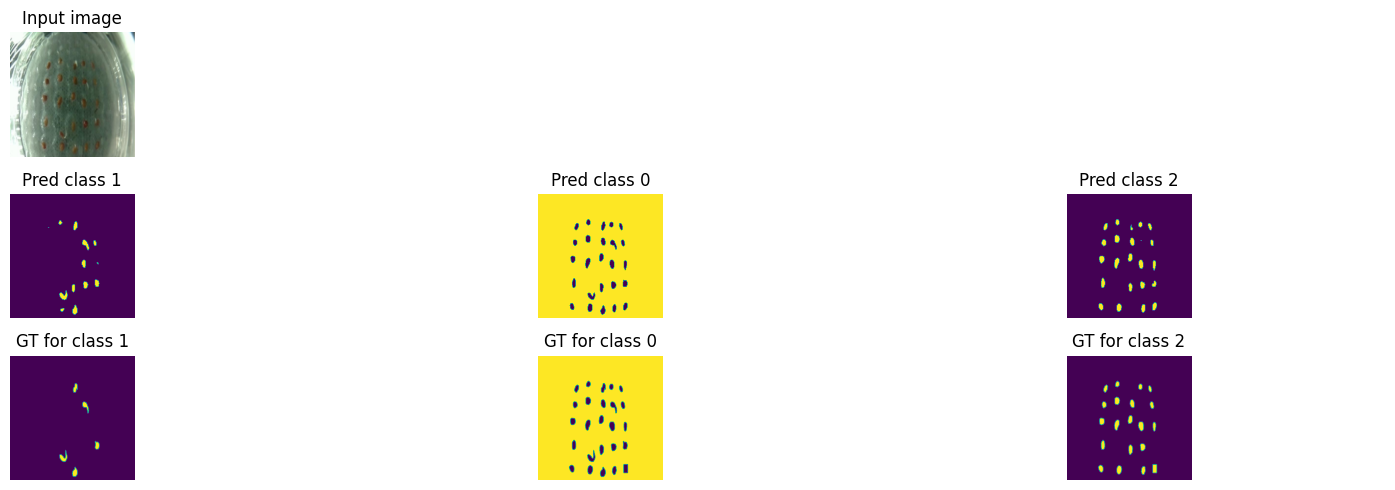

Train loss: 0.00210 | Time: 28m 38s | Val loss: 0.00158
Train_DICE_avg: 0.76671 | Train_Jaccard_avg: 0.70283 | Train_Sensitivity_avg: 0.92827 | Train_Specificity_avg: 0.92603 
Class 0 - Train_DICE: 0.99294 | Train_Jaccard: 0.98600 | Train_Sensitivity: 0.99657 | Train_Specificity: 0.79825 
Class 1 - Train_DICE: 0.50674 | Train_Jaccard: 0.43953 | Train_Sensitivity: 0.86899 | Train_Specificity: 0.99008 
Class 2 - Train_DICE: 0.80046 | Train_Jaccard: 0.68296 | Train_Sensitivity: 0.91924 | Train_Specificity: 0.98974 
Val_DICE_avg: 0.81677 | Val_Jaccard_avg: 0.74614 | Val_Sensitivity_avg: 0.94783 | Val_Specificity_avg: 0.86822 
Class 0 - Val_DICE: 0.99232 | Val_Jaccard: 0.98480 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62437 
Class 1 - Val_DICE: 0.70760 | Val_Jaccard: 0.63734 | Val_Sensitivity: 0.87519 | Val_Specificity: 0.99483 
Class 2 - Val_DICE: 0.75038 | Val_Jaccard: 0.61629 | Val_Sensitivity: 0.96895 | Val_Specificity: 0.98545 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


Train loss: 0.00208 | Time: 29m 18s | Val loss: 0.00154
Train_DICE_avg: 0.76461 | Train_Jaccard_avg: 0.69993 | Train_Sensitivity_avg: 0.93171 | Train_Specificity_avg: 0.92174 
Class 0 - Train_DICE: 0.99290 | Train_Jaccard: 0.98593 | Train_Sensitivity: 0.99673 | Train_Specificity: 0.78626 
Class 1 - Train_DICE: 0.50438 | Train_Jaccard: 0.43624 | Train_Sensitivity: 0.87505 | Train_Specificity: 0.98965 
Class 2 - Train_DICE: 0.79654 | Train_Jaccard: 0.67761 | Train_Sensitivity: 0.92334 | Train_Specificity: 0.98932 
Val_DICE_avg: 0.82610 | Val_Jaccard_avg: 0.75657 | Val_Sensitivity_avg: 0.95593 | Val_Specificity_avg: 0.86670 
Class 0 - Val_DICE: 0.99214 | Val_Jaccard: 0.98445 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.61928 
Class 1 - Val_DICE: 0.72746 | Val_Jaccard: 0.65810 | Val_Sensitivity: 0.90153 | Val_Specificity: 0.99485 
Class 2 - Val_DICE: 0.75869 | Val_Jaccard: 0.62715 | Val_Sensitivity: 0.96690 | Val_Specificity: 0.98597 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.00207 | Time: 29m 57s | Val loss: 0.00157
Train_DICE_avg: 0.77003 | Train_Jaccard_avg: 0.70566 | Train_Sensitivity_avg: 0.92876 | Train_Specificity_avg: 0.92636 
Class 0 - Train_DICE: 0.99299 | Train_Jaccard: 0.98611 | Train_Sensitivity: 0.99648 | Train_Specificity: 0.79850 
Class 1 - Train_DICE: 0.51453 | Train_Jaccard: 0.44497 | Train_Sensitivity: 0.86820 | Train_Specificity: 0.99057 
Class 2 - Train_DICE: 0.80258 | Train_Jaccard: 0.68590 | Train_Sensitivity: 0.92160 | Train_Specificity: 0.99000 
Val_DICE_avg: 0.82626 | Val_Jaccard_avg: 0.75683 | Val_Sensitivity_avg: 0.95508 | Val_Specificity_avg: 0.86687 
Class 0 - Val_DICE: 0.99220 | Val_Jaccard: 0.98456 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.61974 
Class 1 - Val_DICE: 0.72428 | Val_Jaccard: 0.65438 | Val_Sensitivity: 0.89848 | Val_Specificity: 0.99484 
Class 2 - Val_DICE: 0.76229 | Val_Jaccard: 0.63156 | Val_Sensitivity: 0.96742 | Val_Specificity: 0.98604 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.00207 | Time: 30m 37s | Val loss: 0.00156
Train_DICE_avg: 0.76376 | Train_Jaccard_avg: 0.69918 | Train_Sensitivity_avg: 0.92887 | Train_Specificity_avg: 0.92150 
Class 0 - Train_DICE: 0.99290 | Train_Jaccard: 0.98593 | Train_Sensitivity: 0.99668 | Train_Specificity: 0.78530 
Class 1 - Train_DICE: 0.50115 | Train_Jaccard: 0.43305 | Train_Sensitivity: 0.86477 | Train_Specificity: 0.98981 
Class 2 - Train_DICE: 0.79722 | Train_Jaccard: 0.67856 | Train_Sensitivity: 0.92516 | Train_Specificity: 0.98939 
Val_DICE_avg: 0.82022 | Val_Jaccard_avg: 0.75008 | Val_Sensitivity_avg: 0.95112 | Val_Specificity_avg: 0.87084 
Class 0 - Val_DICE: 0.99254 | Val_Jaccard: 0.98524 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.63207 
Class 1 - Val_DICE: 0.71075 | Val_Jaccard: 0.64167 | Val_Sensitivity: 0.88854 | Val_Specificity: 0.99478 
Class 2 - Val_DICE: 0.75736 | Val_Jaccard: 0.62333 | Val_Sensitivity: 0.96548 | Val_Specificity: 0.98567 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]


Train loss: 0.00205 | Time: 31m 17s | Val loss: 0.00154
Train_DICE_avg: 0.76761 | Train_Jaccard_avg: 0.70333 | Train_Sensitivity_avg: 0.92978 | Train_Specificity_avg: 0.92500 
Class 0 - Train_DICE: 0.99303 | Train_Jaccard: 0.98618 | Train_Sensitivity: 0.99667 | Train_Specificity: 0.79512 
Class 1 - Train_DICE: 0.50856 | Train_Jaccard: 0.44002 | Train_Sensitivity: 0.87244 | Train_Specificity: 0.99015 
Class 2 - Train_DICE: 0.80125 | Train_Jaccard: 0.68378 | Train_Sensitivity: 0.92025 | Train_Specificity: 0.98972 
Val_DICE_avg: 0.82239 | Val_Jaccard_avg: 0.75254 | Val_Sensitivity_avg: 0.95306 | Val_Specificity_avg: 0.86919 
Class 0 - Val_DICE: 0.99237 | Val_Jaccard: 0.98490 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62695 
Class 1 - Val_DICE: 0.71491 | Val_Jaccard: 0.64593 | Val_Sensitivity: 0.89217 | Val_Specificity: 0.99484 
Class 2 - Val_DICE: 0.75989 | Val_Jaccard: 0.62680 | Val_Sensitivity: 0.96766 | Val_Specificity: 0.98580 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


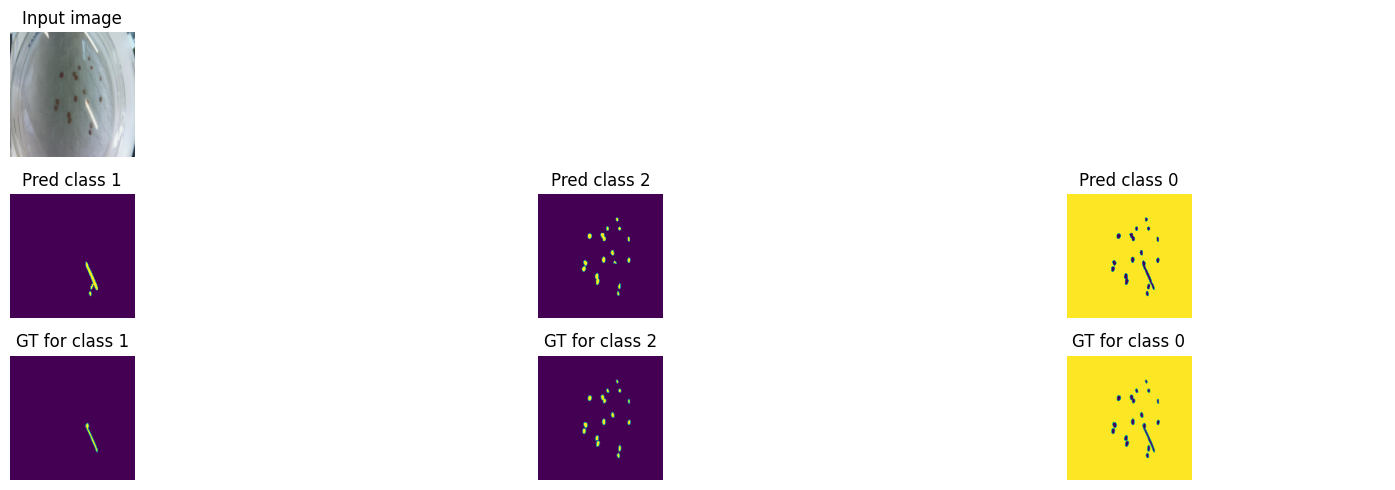

Train loss: 0.00205 | Time: 31m 57s | Val loss: 0.00156
Train_DICE_avg: 0.77332 | Train_Jaccard_avg: 0.70916 | Train_Sensitivity_avg: 0.93119 | Train_Specificity_avg: 0.92532 
Class 0 - Train_DICE: 0.99295 | Train_Jaccard: 0.98603 | Train_Sensitivity: 0.99654 | Train_Specificity: 0.79566 
Class 1 - Train_DICE: 0.52461 | Train_Jaccard: 0.45550 | Train_Sensitivity: 0.87354 | Train_Specificity: 0.99049 
Class 2 - Train_DICE: 0.80241 | Train_Jaccard: 0.68594 | Train_Sensitivity: 0.92349 | Train_Specificity: 0.98980 
Val_DICE_avg: 0.83479 | Val_Jaccard_avg: 0.76504 | Val_Sensitivity_avg: 0.95660 | Val_Specificity_avg: 0.86498 
Class 0 - Val_DICE: 0.99196 | Val_Jaccard: 0.98410 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.61369 
Class 1 - Val_DICE: 0.74951 | Val_Jaccard: 0.67927 | Val_Sensitivity: 0.90138 | Val_Specificity: 0.99525 
Class 2 - Val_DICE: 0.76290 | Val_Jaccard: 0.63175 | Val_Sensitivity: 0.96903 | Val_Specificity: 0.98600 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]


Train loss: 0.00205 | Time: 32m 37s | Val loss: 0.00155
Train_DICE_avg: 0.77134 | Train_Jaccard_avg: 0.70673 | Train_Sensitivity_avg: 0.92901 | Train_Specificity_avg: 0.92427 
Class 0 - Train_DICE: 0.99296 | Train_Jaccard: 0.98605 | Train_Sensitivity: 0.99660 | Train_Specificity: 0.79266 
Class 1 - Train_DICE: 0.51900 | Train_Jaccard: 0.44888 | Train_Sensitivity: 0.86813 | Train_Specificity: 0.99031 
Class 2 - Train_DICE: 0.80206 | Train_Jaccard: 0.68527 | Train_Sensitivity: 0.92229 | Train_Specificity: 0.98983 
Val_DICE_avg: 0.82884 | Val_Jaccard_avg: 0.75854 | Val_Sensitivity_avg: 0.95475 | Val_Specificity_avg: 0.86956 
Class 0 - Val_DICE: 0.99243 | Val_Jaccard: 0.98502 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62807 
Class 1 - Val_DICE: 0.73587 | Val_Jaccard: 0.66674 | Val_Sensitivity: 0.89533 | Val_Specificity: 0.99506 
Class 2 - Val_DICE: 0.75823 | Val_Jaccard: 0.62387 | Val_Sensitivity: 0.96957 | Val_Specificity: 0.98555 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.00206 | Time: 33m 17s | Val loss: 0.00156
Train_DICE_avg: 0.77020 | Train_Jaccard_avg: 0.70573 | Train_Sensitivity_avg: 0.92886 | Train_Specificity_avg: 0.92350 
Class 0 - Train_DICE: 0.99289 | Train_Jaccard: 0.98591 | Train_Sensitivity: 0.99660 | Train_Specificity: 0.79058 
Class 1 - Train_DICE: 0.51612 | Train_Jaccard: 0.44697 | Train_Sensitivity: 0.86606 | Train_Specificity: 0.99035 
Class 2 - Train_DICE: 0.80160 | Train_Jaccard: 0.68432 | Train_Sensitivity: 0.92393 | Train_Specificity: 0.98957 
Val_DICE_avg: 0.82108 | Val_Jaccard_avg: 0.75023 | Val_Sensitivity_avg: 0.94700 | Val_Specificity_avg: 0.86700 
Class 0 - Val_DICE: 0.99227 | Val_Jaccard: 0.98470 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62047 
Class 1 - Val_DICE: 0.71988 | Val_Jaccard: 0.64916 | Val_Sensitivity: 0.86870 | Val_Specificity: 0.99513 
Class 2 - Val_DICE: 0.75110 | Val_Jaccard: 0.61683 | Val_Sensitivity: 0.97292 | Val_Specificity: 0.98540 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.00203 | Time: 33m 57s | Val loss: 0.00155
Train_DICE_avg: 0.77281 | Train_Jaccard_avg: 0.70840 | Train_Sensitivity_avg: 0.92962 | Train_Specificity_avg: 0.92534 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98613 | Train_Sensitivity: 0.99656 | Train_Specificity: 0.79585 
Class 1 - Train_DICE: 0.52153 | Train_Jaccard: 0.45146 | Train_Sensitivity: 0.86842 | Train_Specificity: 0.99036 
Class 2 - Train_DICE: 0.80389 | Train_Jaccard: 0.68761 | Train_Sensitivity: 0.92389 | Train_Specificity: 0.98981 
Val_DICE_avg: 0.82698 | Val_Jaccard_avg: 0.75674 | Val_Sensitivity_avg: 0.95583 | Val_Specificity_avg: 0.86945 
Class 0 - Val_DICE: 0.99238 | Val_Jaccard: 0.98491 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.62761 
Class 1 - Val_DICE: 0.73065 | Val_Jaccard: 0.66026 | Val_Sensitivity: 0.89723 | Val_Specificity: 0.99490 
Class 2 - Val_DICE: 0.75790 | Val_Jaccard: 0.62505 | Val_Sensitivity: 0.97091 | Val_Specificity: 0.98582 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.00202 | Time: 34m 36s | Val loss: 0.00155
Train_DICE_avg: 0.77637 | Train_Jaccard_avg: 0.71232 | Train_Sensitivity_avg: 0.93083 | Train_Specificity_avg: 0.92637 
Class 0 - Train_DICE: 0.99304 | Train_Jaccard: 0.98621 | Train_Sensitivity: 0.99660 | Train_Specificity: 0.79849 
Class 1 - Train_DICE: 0.52933 | Train_Jaccard: 0.45939 | Train_Sensitivity: 0.87381 | Train_Specificity: 0.99051 
Class 2 - Train_DICE: 0.80674 | Train_Jaccard: 0.69135 | Train_Sensitivity: 0.92208 | Train_Specificity: 0.99011 
Val_DICE_avg: 0.83111 | Val_Jaccard_avg: 0.76125 | Val_Sensitivity_avg: 0.96132 | Val_Specificity_avg: 0.86899 
Class 0 - Val_DICE: 0.99243 | Val_Jaccard: 0.98502 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.62622 
Class 1 - Val_DICE: 0.74107 | Val_Jaccard: 0.67090 | Val_Sensitivity: 0.91413 | Val_Specificity: 0.99481 
Class 2 - Val_DICE: 0.75983 | Val_Jaccard: 0.62783 | Val_Sensitivity: 0.97049 | Val_Specificity: 0.98594 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]


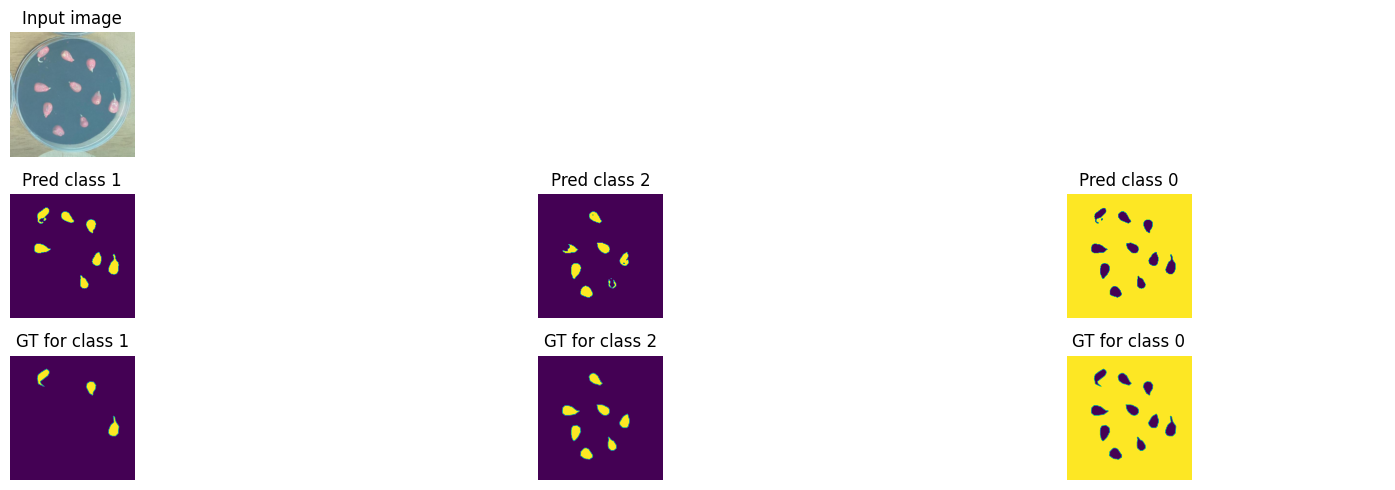

Train loss: 0.00202 | Time: 35m 17s | Val loss: 0.00150
Train_DICE_avg: 0.76990 | Train_Jaccard_avg: 0.70522 | Train_Sensitivity_avg: 0.92848 | Train_Specificity_avg: 0.92402 
Class 0 - Train_DICE: 0.99297 | Train_Jaccard: 0.98606 | Train_Sensitivity: 0.99674 | Train_Specificity: 0.79237 
Class 1 - Train_DICE: 0.51446 | Train_Jaccard: 0.44463 | Train_Sensitivity: 0.86197 | Train_Specificity: 0.99014 
Class 2 - Train_DICE: 0.80229 | Train_Jaccard: 0.68497 | Train_Sensitivity: 0.92672 | Train_Specificity: 0.98955 
Val_DICE_avg: 0.82470 | Val_Jaccard_avg: 0.75411 | Val_Sensitivity_avg: 0.95230 | Val_Specificity_avg: 0.86872 
Class 0 - Val_DICE: 0.99242 | Val_Jaccard: 0.98499 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.62546 
Class 1 - Val_DICE: 0.71970 | Val_Jaccard: 0.64823 | Val_Sensitivity: 0.88839 | Val_Specificity: 0.99486 
Class 2 - Val_DICE: 0.76198 | Val_Jaccard: 0.62909 | Val_Sensitivity: 0.96916 | Val_Specificity: 0.98583 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]


Train loss: 0.00202 | Time: 35m 57s | Val loss: 0.00152
Train_DICE_avg: 0.77521 | Train_Jaccard_avg: 0.71102 | Train_Sensitivity_avg: 0.93315 | Train_Specificity_avg: 0.92477 
Class 0 - Train_DICE: 0.99302 | Train_Jaccard: 0.98616 | Train_Sensitivity: 0.99661 | Train_Specificity: 0.79401 
Class 1 - Train_DICE: 0.52752 | Train_Jaccard: 0.45764 | Train_Sensitivity: 0.87902 | Train_Specificity: 0.99034 
Class 2 - Train_DICE: 0.80509 | Train_Jaccard: 0.68925 | Train_Sensitivity: 0.92382 | Train_Specificity: 0.98997 
Val_DICE_avg: 0.82956 | Val_Jaccard_avg: 0.75864 | Val_Sensitivity_avg: 0.94991 | Val_Specificity_avg: 0.86646 
Class 0 - Val_DICE: 0.99216 | Val_Jaccard: 0.98449 | Val_Sensitivity: 0.99939 | Val_Specificity: 0.61846 
Class 1 - Val_DICE: 0.74180 | Val_Jaccard: 0.66950 | Val_Sensitivity: 0.87744 | Val_Specificity: 0.99537 
Class 2 - Val_DICE: 0.75472 | Val_Jaccard: 0.62193 | Val_Sensitivity: 0.97289 | Val_Specificity: 0.98555 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]


Train loss: 0.00200 | Time: 36m 37s | Val loss: 0.00150
Train_DICE_avg: 0.77401 | Train_Jaccard_avg: 0.70985 | Train_Sensitivity_avg: 0.92656 | Train_Specificity_avg: 0.92608 
Class 0 - Train_DICE: 0.99306 | Train_Jaccard: 0.98625 | Train_Sensitivity: 0.99669 | Train_Specificity: 0.79784 
Class 1 - Train_DICE: 0.52242 | Train_Jaccard: 0.45237 | Train_Sensitivity: 0.85854 | Train_Specificity: 0.99047 
Class 2 - Train_DICE: 0.80653 | Train_Jaccard: 0.69094 | Train_Sensitivity: 0.92446 | Train_Specificity: 0.98993 
Val_DICE_avg: 0.82980 | Val_Jaccard_avg: 0.75856 | Val_Sensitivity_avg: 0.95219 | Val_Specificity_avg: 0.86721 
Class 0 - Val_DICE: 0.99219 | Val_Jaccard: 0.98455 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62089 
Class 1 - Val_DICE: 0.73924 | Val_Jaccard: 0.66657 | Val_Sensitivity: 0.88920 | Val_Specificity: 0.99503 
Class 2 - Val_DICE: 0.75797 | Val_Jaccard: 0.62455 | Val_Sensitivity: 0.96801 | Val_Specificity: 0.98572 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


Train loss: 0.00202 | Time: 37m 16s | Val loss: 0.00150
Train_DICE_avg: 0.77264 | Train_Jaccard_avg: 0.70819 | Train_Sensitivity_avg: 0.93239 | Train_Specificity_avg: 0.92473 
Class 0 - Train_DICE: 0.99300 | Train_Jaccard: 0.98613 | Train_Sensitivity: 0.99669 | Train_Specificity: 0.79416 
Class 1 - Train_DICE: 0.51970 | Train_Jaccard: 0.44979 | Train_Sensitivity: 0.87541 | Train_Specificity: 0.99022 
Class 2 - Train_DICE: 0.80522 | Train_Jaccard: 0.68865 | Train_Sensitivity: 0.92506 | Train_Specificity: 0.98979 
Val_DICE_avg: 0.83081 | Val_Jaccard_avg: 0.76025 | Val_Sensitivity_avg: 0.95483 | Val_Specificity_avg: 0.86851 
Class 0 - Val_DICE: 0.99235 | Val_Jaccard: 0.98485 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.62467 
Class 1 - Val_DICE: 0.73964 | Val_Jaccard: 0.66851 | Val_Sensitivity: 0.89781 | Val_Specificity: 0.99504 
Class 2 - Val_DICE: 0.76045 | Val_Jaccard: 0.62739 | Val_Sensitivity: 0.96730 | Val_Specificity: 0.98583 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]


Train loss: 0.00201 | Time: 37m 56s | Val loss: 0.00149
Train_DICE_avg: 0.77405 | Train_Jaccard_avg: 0.70918 | Train_Sensitivity_avg: 0.93087 | Train_Specificity_avg: 0.92518 
Class 0 - Train_DICE: 0.99307 | Train_Jaccard: 0.98626 | Train_Sensitivity: 0.99663 | Train_Specificity: 0.79512 
Class 1 - Train_DICE: 0.52342 | Train_Jaccard: 0.45200 | Train_Sensitivity: 0.87227 | Train_Specificity: 0.99054 
Class 2 - Train_DICE: 0.80568 | Train_Jaccard: 0.68930 | Train_Sensitivity: 0.92370 | Train_Specificity: 0.98988 
Val_DICE_avg: 0.83137 | Val_Jaccard_avg: 0.76140 | Val_Sensitivity_avg: 0.95777 | Val_Specificity_avg: 0.86788 
Class 0 - Val_DICE: 0.99227 | Val_Jaccard: 0.98470 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.62274 
Class 1 - Val_DICE: 0.73671 | Val_Jaccard: 0.66697 | Val_Sensitivity: 0.90714 | Val_Specificity: 0.99497 
Class 2 - Val_DICE: 0.76512 | Val_Jaccard: 0.63254 | Val_Sensitivity: 0.96681 | Val_Specificity: 0.98592 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


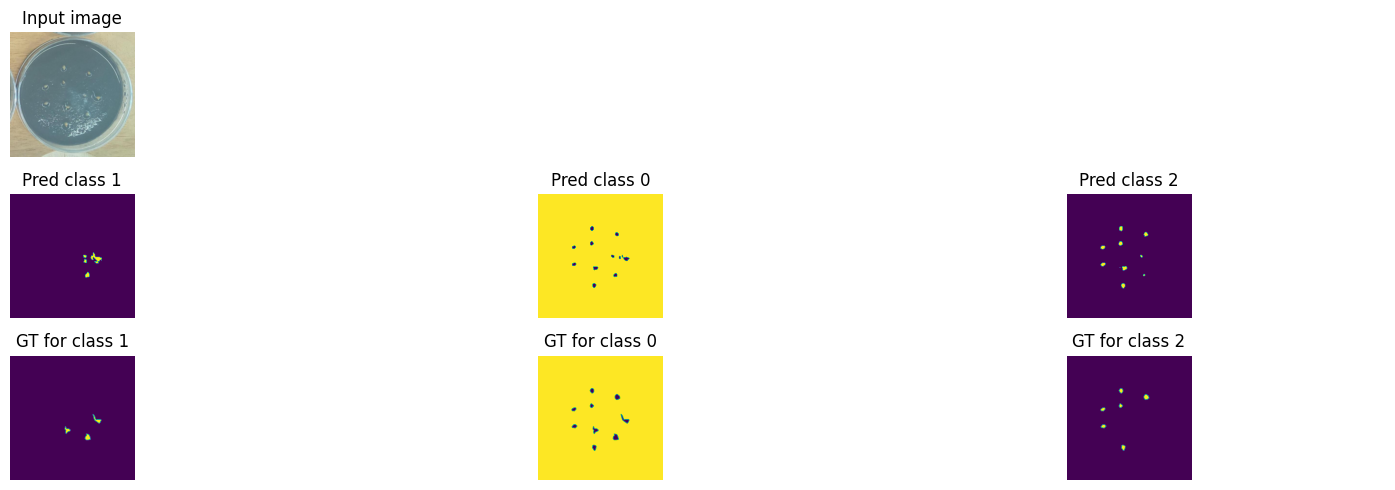

Train loss: 0.00199 | Time: 38m 36s | Val loss: 0.00149
Train_DICE_avg: 0.77357 | Train_Jaccard_avg: 0.70890 | Train_Sensitivity_avg: 0.93047 | Train_Specificity_avg: 0.92477 
Class 0 - Train_DICE: 0.99309 | Train_Jaccard: 0.98631 | Train_Sensitivity: 0.99673 | Train_Specificity: 0.79394 
Class 1 - Train_DICE: 0.52218 | Train_Jaccard: 0.45095 | Train_Sensitivity: 0.86656 | Train_Specificity: 0.99047 
Class 2 - Train_DICE: 0.80543 | Train_Jaccard: 0.68946 | Train_Sensitivity: 0.92812 | Train_Specificity: 0.98991 
Val_DICE_avg: 0.82986 | Val_Jaccard_avg: 0.76007 | Val_Sensitivity_avg: 0.95841 | Val_Specificity_avg: 0.86866 
Class 0 - Val_DICE: 0.99236 | Val_Jaccard: 0.98487 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.62521 
Class 1 - Val_DICE: 0.73529 | Val_Jaccard: 0.66626 | Val_Sensitivity: 0.91012 | Val_Specificity: 0.99483 
Class 2 - Val_DICE: 0.76194 | Val_Jaccard: 0.62908 | Val_Sensitivity: 0.96575 | Val_Specificity: 0.98594 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▂▃▃▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████████
wandb:       Training Jaccard ▁▃▃▄▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇██████████████
wandb:          Training Loss █▅▄▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▃▆█▇▆▃▁▁▂▁▂▂▃▃▃▄▄▄▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▅▆▅▆▅▆▆
wandb:   Training Specificity ▁▃▄▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇█▇▇█████▇████████
wandb:        Validation DICE ▁▂▂▃▃▃▃▄▄▄▅▅▆▆▅▇▆▆▆▆▆▆▇▇▇▇██▇██▇████████
wandb:     Validation Jaccard ▁▂▂▃▃▃▄▄▃▅▅▆▅▇▆▆▇▆▆▇▇▇▇▇████████████████
wandb:        Validation Loss █▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▆▆▅▄▃▃▃▄▂▇▆▄▄▆▆▆▆▅▆█▆▆█▇█▇▇█▇▇▇▇▇█▇█▇▇▇
wandb: Validation Specificity ▁▆▇▇▇▇▆▇▇▆▇█▇▇▇▇█▇▇████▇▇▇███▇▇█▇█▇██▇██
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.77357
wandb:       Training Jaccard 0.7089
wandb:          Training Loss 0.001


Training complete!


In [21]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [22]:
model = DeepLabV3Plus(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [23]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]



Global Performance Metrics:
Loss mean: 0.00155, std: 0.00022
Dice Coefficient mean: 0.84420, std: 0.11457
Jaccard Index mean: 0.78324, std: 0.12807
Sensitivity mean: 0.90832, std: 0.09597
Specificity mean: 0.93927, std: 0.04692

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99580, std: 0.00223
Jaccard mean: 0.99165, std: 0.00440
Sensitivity mean: 0.99727, std: 0.00211
Specificity mean: 0.82738, std: 0.14012

Class 1:
Dice mean: 0.67755, std: 0.32237
Jaccard mean: 0.59591, std: 0.33565
Sensitivity mean: 0.82179, std: 0.26916
Specificity mean: 0.99560, std: 0.00698

Class 2:
Dice mean: 0.85924, std: 0.08429
Jaccard mean: 0.76216, std: 0.11961
Sensitivity mean: 0.90590, std: 0.08921
Specificity mean: 0.99482, std: 0.00334


### Tversky Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Backbone"] = "resnet34"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-DeepLabV3+-ResNet34-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.38 GB
GPU Memory - Reserved: 1.71 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251113_225723-gsyenw69
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-DeepLabV3+-ResNet34-Tversky
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/gsyenw69



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]


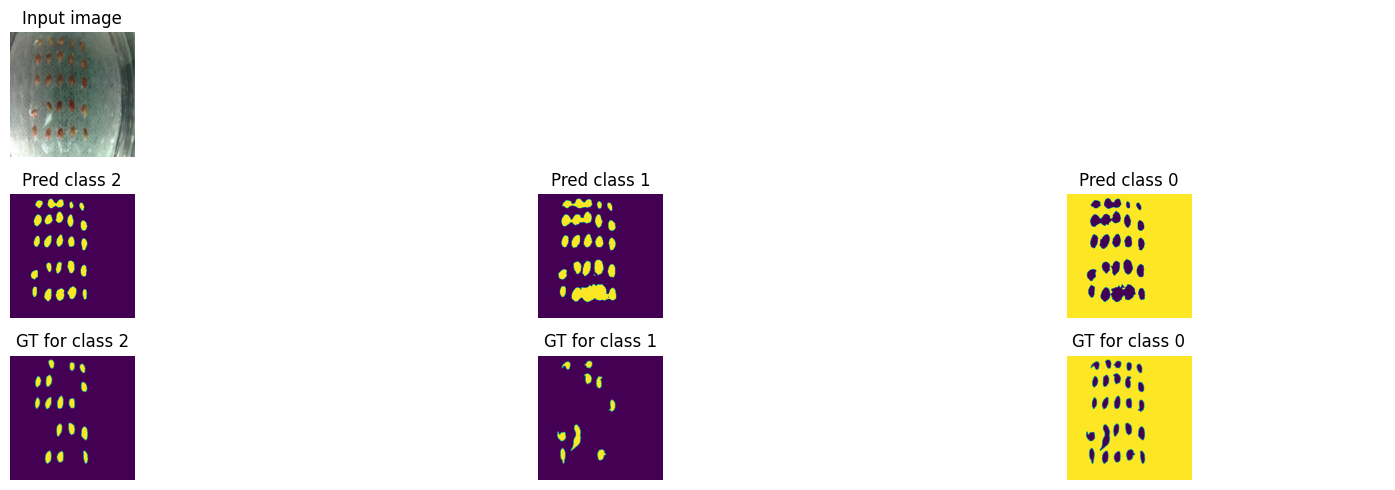

Train loss: 0.68112 | Time: 0m 31s | Val loss: 0.59893
Train_DICE_avg: 0.36698 | Train_Jaccard_avg: 0.30518 | Train_Sensitivity_avg: 0.37810 | Train_Specificity_avg: 0.73828 
Class 0 - Train_DICE: 0.86341 | Train_Jaccard: 0.76880 | Train_Sensitivity: 0.97663 | Train_Specificity: 0.22208 
Class 1 - Train_DICE: 0.04246 | Train_Jaccard: 0.02315 | Train_Sensitivity: 0.02361 | Train_Specificity: 0.99791 
Class 2 - Train_DICE: 0.19506 | Train_Jaccard: 0.12360 | Train_Sensitivity: 0.13407 | Train_Specificity: 0.99484 
Val_DICE_avg: 0.46411 | Val_Jaccard_avg: 0.42516 | Val_Sensitivity_avg: 0.45131 | Val_Specificity_avg: 0.79367 
Class 0 - Val_DICE: 0.97582 | Val_Jaccard: 0.95329 | Val_Sensitivity: 0.98939 | Val_Specificity: 0.38712 
Class 1 - Val_DICE: 0.07616 | Val_Jaccard: 0.04744 | Val_Sensitivity: 0.05271 | Val_Specificity: 0.99812 
Class 2 - Val_DICE: 0.34036 | Val_Jaccard: 0.27477 | Val_Sensitivity: 0.31183 | Val_Specificity: 0.99579 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


Train loss: 0.57907 | Time: 1m 2s | Val loss: 0.53961
Train_DICE_avg: 0.48336 | Train_Jaccard_avg: 0.43449 | Train_Sensitivity_avg: 0.47417 | Train_Specificity_avg: 0.83202 
Class 0 - Train_DICE: 0.95825 | Train_Jaccard: 0.92127 | Train_Sensitivity: 0.98765 | Train_Specificity: 0.50189 
Class 1 - Train_DICE: 0.08683 | Train_Jaccard: 0.05216 | Train_Sensitivity: 0.05732 | Train_Specificity: 0.99829 
Class 2 - Train_DICE: 0.40501 | Train_Jaccard: 0.33004 | Train_Sensitivity: 0.37753 | Train_Specificity: 0.99587 
Val_DICE_avg: 0.49959 | Val_Jaccard_avg: 0.46650 | Val_Sensitivity_avg: 0.48594 | Val_Specificity_avg: 0.94926 
Class 0 - Val_DICE: 0.99073 | Val_Jaccard: 0.98191 | Val_Sensitivity: 0.99232 | Val_Specificity: 0.85311 
Class 1 - Val_DICE: 0.09269 | Val_Jaccard: 0.05884 | Val_Sensitivity: 0.06993 | Val_Specificity: 0.99773 
Class 2 - Val_DICE: 0.41536 | Val_Jaccard: 0.35876 | Val_Sensitivity: 0.39559 | Val_Specificity: 0.99693 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]


Train loss: 0.52731 | Time: 1m 33s | Val loss: 0.52934
Train_DICE_avg: 0.51873 | Train_Jaccard_avg: 0.47318 | Train_Sensitivity_avg: 0.50613 | Train_Specificity_avg: 0.88554 
Class 0 - Train_DICE: 0.97672 | Train_Jaccard: 0.95500 | Train_Sensitivity: 0.98829 | Train_Specificity: 0.66265 
Class 1 - Train_DICE: 0.10472 | Train_Jaccard: 0.06350 | Train_Sensitivity: 0.07136 | Train_Specificity: 0.99798 
Class 2 - Train_DICE: 0.47474 | Train_Jaccard: 0.40106 | Train_Sensitivity: 0.45875 | Train_Specificity: 0.99599 
Val_DICE_avg: 0.50728 | Val_Jaccard_avg: 0.47377 | Val_Sensitivity_avg: 0.49064 | Val_Specificity_avg: 0.94972 
Class 0 - Val_DICE: 0.99155 | Val_Jaccard: 0.98338 | Val_Sensitivity: 0.99342 | Val_Specificity: 0.85360 
Class 1 - Val_DICE: 0.10218 | Val_Jaccard: 0.06488 | Val_Sensitivity: 0.07568 | Val_Specificity: 0.99773 
Class 2 - Val_DICE: 0.42811 | Val_Jaccard: 0.37304 | Val_Sensitivity: 0.40283 | Val_Specificity: 0.99782 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]


Train loss: 0.49766 | Time: 2m 4s | Val loss: 0.52218
Train_DICE_avg: 0.54928 | Train_Jaccard_avg: 0.50075 | Train_Sensitivity_avg: 0.53322 | Train_Specificity_avg: 0.91217 
Class 0 - Train_DICE: 0.98213 | Train_Jaccard: 0.96518 | Train_Sensitivity: 0.98805 | Train_Specificity: 0.74306 
Class 1 - Train_DICE: 0.12203 | Train_Jaccard: 0.07382 | Train_Sensitivity: 0.08331 | Train_Specificity: 0.99758 
Class 2 - Train_DICE: 0.54369 | Train_Jaccard: 0.46326 | Train_Sensitivity: 0.52830 | Train_Specificity: 0.99588 
Val_DICE_avg: 0.51587 | Val_Jaccard_avg: 0.48033 | Val_Sensitivity_avg: 0.49709 | Val_Specificity_avg: 0.95870 
Class 0 - Val_DICE: 0.99261 | Val_Jaccard: 0.98540 | Val_Sensitivity: 0.99319 | Val_Specificity: 0.88110 
Class 1 - Val_DICE: 0.12034 | Val_Jaccard: 0.07552 | Val_Sensitivity: 0.08722 | Val_Specificity: 0.99725 
Class 2 - Val_DICE: 0.43464 | Val_Jaccard: 0.38006 | Val_Sensitivity: 0.41087 | Val_Specificity: 0.99776 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]


Train loss: 0.47155 | Time: 2m 35s | Val loss: 0.50435
Train_DICE_avg: 0.57386 | Train_Jaccard_avg: 0.52231 | Train_Sensitivity_avg: 0.55688 | Train_Specificity_avg: 0.92439 
Class 0 - Train_DICE: 0.98459 | Train_Jaccard: 0.96986 | Train_Sensitivity: 0.98791 | Train_Specificity: 0.78077 
Class 1 - Train_DICE: 0.13774 | Train_Jaccard: 0.08342 | Train_Sensitivity: 0.09517 | Train_Specificity: 0.99722 
Class 2 - Train_DICE: 0.59924 | Train_Jaccard: 0.51364 | Train_Sensitivity: 0.58757 | Train_Specificity: 0.99518 
Val_DICE_avg: 0.54101 | Val_Jaccard_avg: 0.50064 | Val_Sensitivity_avg: 0.52081 | Val_Specificity_avg: 0.95888 
Class 0 - Val_DICE: 0.99331 | Val_Jaccard: 0.98677 | Val_Sensitivity: 0.99372 | Val_Specificity: 0.88311 
Class 1 - Val_DICE: 0.13912 | Val_Jaccard: 0.08706 | Val_Sensitivity: 0.10208 | Val_Specificity: 0.99693 
Class 2 - Val_DICE: 0.49060 | Val_Jaccard: 0.42810 | Val_Sensitivity: 0.46664 | Val_Specificity: 0.99659 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]


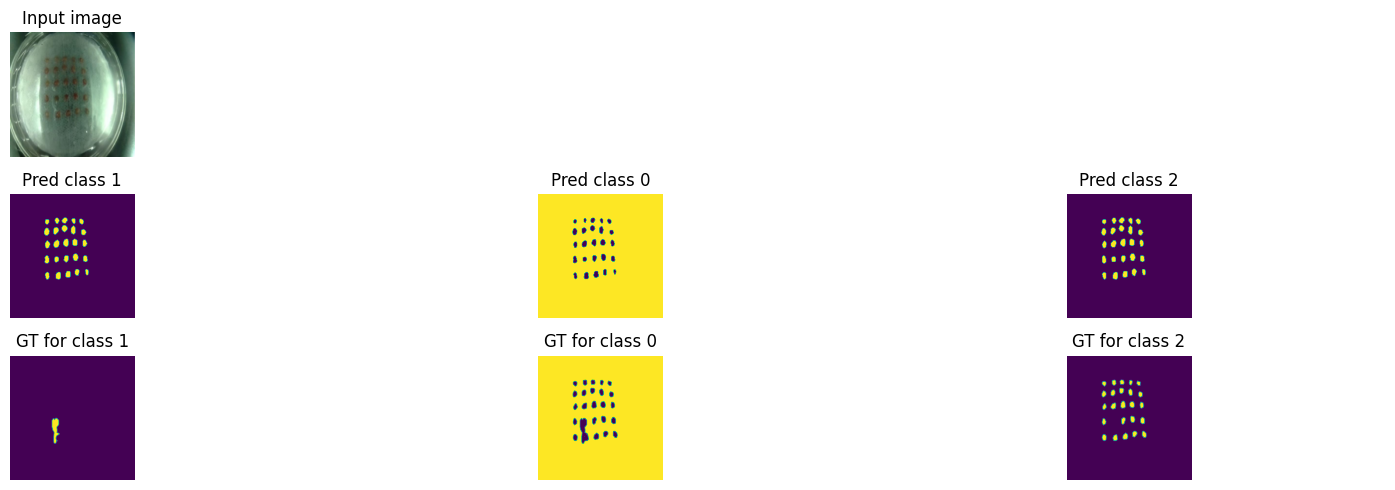

Train loss: 0.44935 | Time: 3m 7s | Val loss: 0.45212
Train_DICE_avg: 0.59969 | Train_Jaccard_avg: 0.54460 | Train_Sensitivity_avg: 0.58278 | Train_Specificity_avg: 0.93160 
Class 0 - Train_DICE: 0.98555 | Train_Jaccard: 0.97171 | Train_Sensitivity: 0.98751 | Train_Specificity: 0.80265 
Class 1 - Train_DICE: 0.15544 | Train_Jaccard: 0.09469 | Train_Sensitivity: 0.11147 | Train_Specificity: 0.99682 
Class 2 - Train_DICE: 0.65810 | Train_Jaccard: 0.56741 | Train_Sensitivity: 0.64935 | Train_Specificity: 0.99531 
Val_DICE_avg: 0.59463 | Val_Jaccard_avg: 0.54909 | Val_Sensitivity_avg: 0.58107 | Val_Specificity_avg: 0.95996 
Class 0 - Val_DICE: 0.99383 | Val_Jaccard: 0.98783 | Val_Sensitivity: 0.99383 | Val_Specificity: 0.88749 
Class 1 - Val_DICE: 0.15013 | Val_Jaccard: 0.09418 | Val_Sensitivity: 0.11638 | Val_Specificity: 0.99645 
Class 2 - Val_DICE: 0.63994 | Val_Jaccard: 0.56526 | Val_Sensitivity: 0.63300 | Val_Specificity: 0.99595 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]


Train loss: 0.42417 | Time: 3m 38s | Val loss: 0.41159
Train_DICE_avg: 0.61732 | Train_Jaccard_avg: 0.56011 | Train_Sensitivity_avg: 0.60608 | Train_Specificity_avg: 0.93746 
Class 0 - Train_DICE: 0.98673 | Train_Jaccard: 0.97398 | Train_Sensitivity: 0.98746 | Train_Specificity: 0.82123 
Class 1 - Train_DICE: 0.16508 | Train_Jaccard: 0.10123 | Train_Sensitivity: 0.13247 | Train_Specificity: 0.99639 
Class 2 - Train_DICE: 0.70016 | Train_Jaccard: 0.60513 | Train_Sensitivity: 0.69832 | Train_Specificity: 0.99478 
Val_DICE_avg: 0.62260 | Val_Jaccard_avg: 0.57230 | Val_Sensitivity_avg: 0.61698 | Val_Specificity_avg: 0.95908 
Class 0 - Val_DICE: 0.99463 | Val_Jaccard: 0.98935 | Val_Sensitivity: 0.99405 | Val_Specificity: 0.88617 
Class 1 - Val_DICE: 0.16344 | Val_Jaccard: 0.10315 | Val_Sensitivity: 0.13927 | Val_Specificity: 0.99611 
Class 2 - Val_DICE: 0.70973 | Val_Jaccard: 0.62441 | Val_Sensitivity: 0.71764 | Val_Specificity: 0.99498 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]


Train loss: 0.39890 | Time: 4m 9s | Val loss: 0.39647
Train_DICE_avg: 0.63333 | Train_Jaccard_avg: 0.57342 | Train_Sensitivity_avg: 0.62928 | Train_Specificity_avg: 0.94686 
Class 0 - Train_DICE: 0.98762 | Train_Jaccard: 0.97569 | Train_Sensitivity: 0.98684 | Train_Specificity: 0.85018 
Class 1 - Train_DICE: 0.18107 | Train_Jaccard: 0.11316 | Train_Sensitivity: 0.16331 | Train_Specificity: 0.99612 
Class 2 - Train_DICE: 0.73131 | Train_Jaccard: 0.63142 | Train_Sensitivity: 0.73771 | Train_Specificity: 0.99430 
Val_DICE_avg: 0.63360 | Val_Jaccard_avg: 0.58023 | Val_Sensitivity_avg: 0.63273 | Val_Specificity_avg: 0.96179 
Class 0 - Val_DICE: 0.99476 | Val_Jaccard: 0.98963 | Val_Sensitivity: 0.99428 | Val_Specificity: 0.89453 
Class 1 - Val_DICE: 0.19010 | Val_Jaccard: 0.12095 | Val_Sensitivity: 0.18132 | Val_Specificity: 0.99544 
Class 2 - Val_DICE: 0.71594 | Val_Jaccard: 0.63011 | Val_Sensitivity: 0.72260 | Val_Specificity: 0.99541 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.37402 | Time: 4m 39s | Val loss: 0.35307
Train_DICE_avg: 0.65743 | Train_Jaccard_avg: 0.59220 | Train_Sensitivity_avg: 0.66395 | Train_Specificity_avg: 0.94913 
Class 0 - Train_DICE: 0.98797 | Train_Jaccard: 0.97637 | Train_Sensitivity: 0.98667 | Train_Specificity: 0.85771 
Class 1 - Train_DICE: 0.20660 | Train_Jaccard: 0.13294 | Train_Sensitivity: 0.21901 | Train_Specificity: 0.99543 
Class 2 - Train_DICE: 0.77773 | Train_Jaccard: 0.66727 | Train_Sensitivity: 0.78616 | Train_Specificity: 0.99424 
Val_DICE_avg: 0.67657 | Val_Jaccard_avg: 0.61684 | Val_Sensitivity_avg: 0.68807 | Val_Specificity_avg: 0.96070 
Class 0 - Val_DICE: 0.99499 | Val_Jaccard: 0.99008 | Val_Sensitivity: 0.99433 | Val_Specificity: 0.89181 
Class 1 - Val_DICE: 0.21406 | Val_Jaccard: 0.14277 | Val_Sensitivity: 0.23603 | Val_Specificity: 0.99505 
Class 2 - Val_DICE: 0.82066 | Val_Jaccard: 0.71766 | Val_Sensitivity: 0.83384 | Val_Specificity: 0.99524 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


Train loss: 0.34831 | Time: 5m 10s | Val loss: 0.34143
Train_DICE_avg: 0.67357 | Train_Jaccard_avg: 0.60562 | Train_Sensitivity_avg: 0.68851 | Train_Specificity_avg: 0.94904 
Class 0 - Train_DICE: 0.98820 | Train_Jaccard: 0.97683 | Train_Sensitivity: 0.98717 | Train_Specificity: 0.85771 
Class 1 - Train_DICE: 0.23061 | Train_Jaccard: 0.15257 | Train_Sensitivity: 0.25779 | Train_Specificity: 0.99540 
Class 2 - Train_DICE: 0.80191 | Train_Jaccard: 0.68745 | Train_Sensitivity: 0.82058 | Train_Specificity: 0.99401 
Val_DICE_avg: 0.68658 | Val_Jaccard_avg: 0.62669 | Val_Sensitivity_avg: 0.68869 | Val_Specificity_avg: 0.95218 
Class 0 - Val_DICE: 0.99501 | Val_Jaccard: 0.99011 | Val_Sensitivity: 0.99477 | Val_Specificity: 0.86562 
Class 1 - Val_DICE: 0.23738 | Val_Jaccard: 0.16443 | Val_Sensitivity: 0.23520 | Val_Specificity: 0.99585 
Class 2 - Val_DICE: 0.82736 | Val_Jaccard: 0.72552 | Val_Sensitivity: 0.83609 | Val_Specificity: 0.99507 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


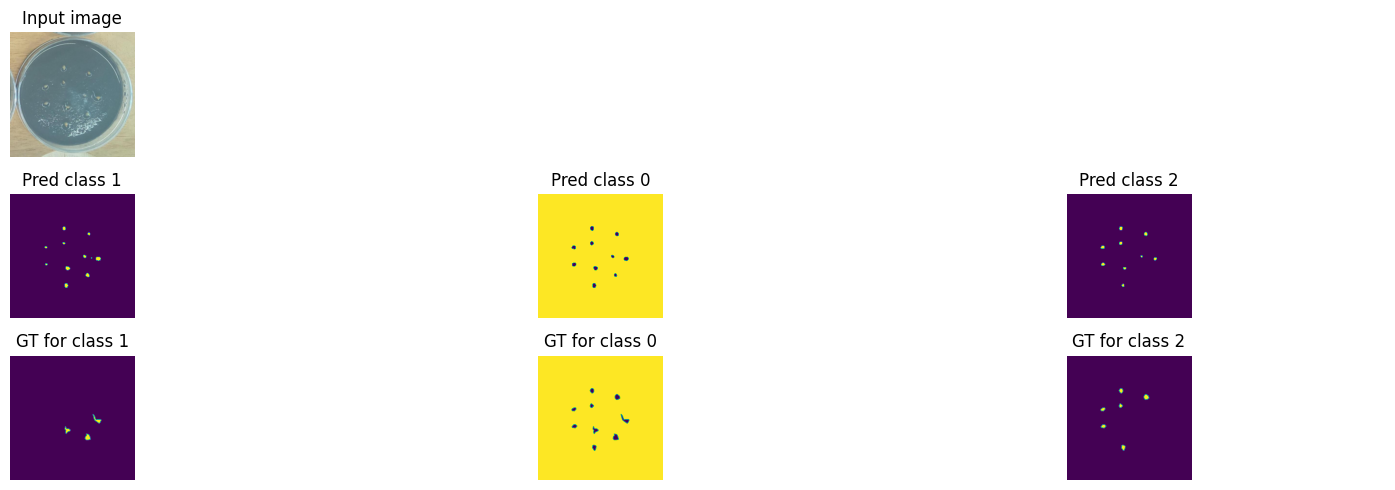

Train loss: 0.33603 | Time: 5m 48s | Val loss: 0.32473
Train_DICE_avg: 0.67993 | Train_Jaccard_avg: 0.61170 | Train_Sensitivity_avg: 0.69985 | Train_Specificity_avg: 0.94784 
Class 0 - Train_DICE: 0.98862 | Train_Jaccard: 0.97763 | Train_Sensitivity: 0.98824 | Train_Specificity: 0.85427 
Class 1 - Train_DICE: 0.24593 | Train_Jaccard: 0.16699 | Train_Sensitivity: 0.28074 | Train_Specificity: 0.99542 
Class 2 - Train_DICE: 0.80524 | Train_Jaccard: 0.69049 | Train_Sensitivity: 0.83056 | Train_Specificity: 0.99384 
Val_DICE_avg: 0.68990 | Val_Jaccard_avg: 0.62937 | Val_Sensitivity_avg: 0.71253 | Val_Specificity_avg: 0.95538 
Class 0 - Val_DICE: 0.99511 | Val_Jaccard: 0.99030 | Val_Sensitivity: 0.99499 | Val_Specificity: 0.87600 
Class 1 - Val_DICE: 0.24858 | Val_Jaccard: 0.17577 | Val_Sensitivity: 0.28770 | Val_Specificity: 0.99525 
Class 2 - Val_DICE: 0.82601 | Val_Jaccard: 0.72205 | Val_Sensitivity: 0.85488 | Val_Specificity: 0.99490 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]


Train loss: 0.32425 | Time: 6m 24s | Val loss: 0.31782
Train_DICE_avg: 0.68776 | Train_Jaccard_avg: 0.61911 | Train_Sensitivity_avg: 0.71138 | Train_Specificity_avg: 0.94650 
Class 0 - Train_DICE: 0.98897 | Train_Jaccard: 0.97831 | Train_Sensitivity: 0.98905 | Train_Specificity: 0.85032 
Class 1 - Train_DICE: 0.26614 | Train_Jaccard: 0.18563 | Train_Sensitivity: 0.30569 | Train_Specificity: 0.99550 
Class 2 - Train_DICE: 0.80816 | Train_Jaccard: 0.69339 | Train_Sensitivity: 0.83940 | Train_Specificity: 0.99367 
Val_DICE_avg: 0.69624 | Val_Jaccard_avg: 0.63585 | Val_Sensitivity_avg: 0.72113 | Val_Specificity_avg: 0.95034 
Class 0 - Val_DICE: 0.99501 | Val_Jaccard: 0.99013 | Val_Sensitivity: 0.99544 | Val_Specificity: 0.86053 
Class 1 - Val_DICE: 0.26381 | Val_Jaccard: 0.19020 | Val_Sensitivity: 0.31077 | Val_Specificity: 0.99566 
Class 2 - Val_DICE: 0.82989 | Val_Jaccard: 0.72723 | Val_Sensitivity: 0.85717 | Val_Specificity: 0.99481 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]


Train loss: 0.31731 | Time: 7m 1s | Val loss: 0.31097
Train_DICE_avg: 0.69240 | Train_Jaccard_avg: 0.62367 | Train_Sensitivity_avg: 0.71923 | Train_Specificity_avg: 0.94397 
Class 0 - Train_DICE: 0.98871 | Train_Jaccard: 0.97781 | Train_Sensitivity: 0.98958 | Train_Specificity: 0.84268 
Class 1 - Train_DICE: 0.27658 | Train_Jaccard: 0.19560 | Train_Sensitivity: 0.32129 | Train_Specificity: 0.99559 
Class 2 - Train_DICE: 0.81191 | Train_Jaccard: 0.69758 | Train_Sensitivity: 0.84682 | Train_Specificity: 0.99364 
Val_DICE_avg: 0.69868 | Val_Jaccard_avg: 0.63711 | Val_Sensitivity_avg: 0.72598 | Val_Specificity_avg: 0.94879 
Class 0 - Val_DICE: 0.99524 | Val_Jaccard: 0.99055 | Val_Sensitivity: 0.99578 | Val_Specificity: 0.85642 
Class 1 - Val_DICE: 0.27268 | Val_Jaccard: 0.19695 | Val_Sensitivity: 0.31379 | Val_Specificity: 0.99565 
Class 2 - Val_DICE: 0.82812 | Val_Jaccard: 0.72381 | Val_Sensitivity: 0.86837 | Val_Specificity: 0.99430 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]


Train loss: 0.31262 | Time: 7m 38s | Val loss: 0.30203
Train_DICE_avg: 0.69533 | Train_Jaccard_avg: 0.62641 | Train_Sensitivity_avg: 0.72309 | Train_Specificity_avg: 0.94396 
Class 0 - Train_DICE: 0.98929 | Train_Jaccard: 0.97893 | Train_Sensitivity: 0.99032 | Train_Specificity: 0.84262 
Class 1 - Train_DICE: 0.28438 | Train_Jaccard: 0.20205 | Train_Sensitivity: 0.33049 | Train_Specificity: 0.99568 
Class 2 - Train_DICE: 0.81231 | Train_Jaccard: 0.69824 | Train_Sensitivity: 0.84845 | Train_Specificity: 0.99357 
Val_DICE_avg: 0.70949 | Val_Jaccard_avg: 0.64824 | Val_Sensitivity_avg: 0.74180 | Val_Specificity_avg: 0.94749 
Class 0 - Val_DICE: 0.99531 | Val_Jaccard: 0.99069 | Val_Sensitivity: 0.99607 | Val_Specificity: 0.85245 
Class 1 - Val_DICE: 0.30231 | Val_Jaccard: 0.22819 | Val_Sensitivity: 0.35111 | Val_Specificity: 0.99621 
Class 2 - Val_DICE: 0.83086 | Val_Jaccard: 0.72585 | Val_Sensitivity: 0.87820 | Val_Specificity: 0.99381 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]


Train loss: 0.30821 | Time: 8m 15s | Val loss: 0.30171
Train_DICE_avg: 0.69942 | Train_Jaccard_avg: 0.63074 | Train_Sensitivity_avg: 0.73440 | Train_Specificity_avg: 0.94218 
Class 0 - Train_DICE: 0.98931 | Train_Jaccard: 0.97896 | Train_Sensitivity: 0.99063 | Train_Specificity: 0.83754 
Class 1 - Train_DICE: 0.29472 | Train_Jaccard: 0.21305 | Train_Sensitivity: 0.35831 | Train_Specificity: 0.99561 
Class 2 - Train_DICE: 0.81424 | Train_Jaccard: 0.70021 | Train_Sensitivity: 0.85427 | Train_Specificity: 0.99338 
Val_DICE_avg: 0.71500 | Val_Jaccard_avg: 0.65438 | Val_Sensitivity_avg: 0.75359 | Val_Specificity_avg: 0.94304 
Class 0 - Val_DICE: 0.99520 | Val_Jaccard: 0.99048 | Val_Sensitivity: 0.99667 | Val_Specificity: 0.83874 
Class 1 - Val_DICE: 0.32595 | Val_Jaccard: 0.25481 | Val_Sensitivity: 0.37029 | Val_Specificity: 0.99679 
Class 2 - Val_DICE: 0.82385 | Val_Jaccard: 0.71784 | Val_Sensitivity: 0.89382 | Val_Specificity: 0.99359 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]


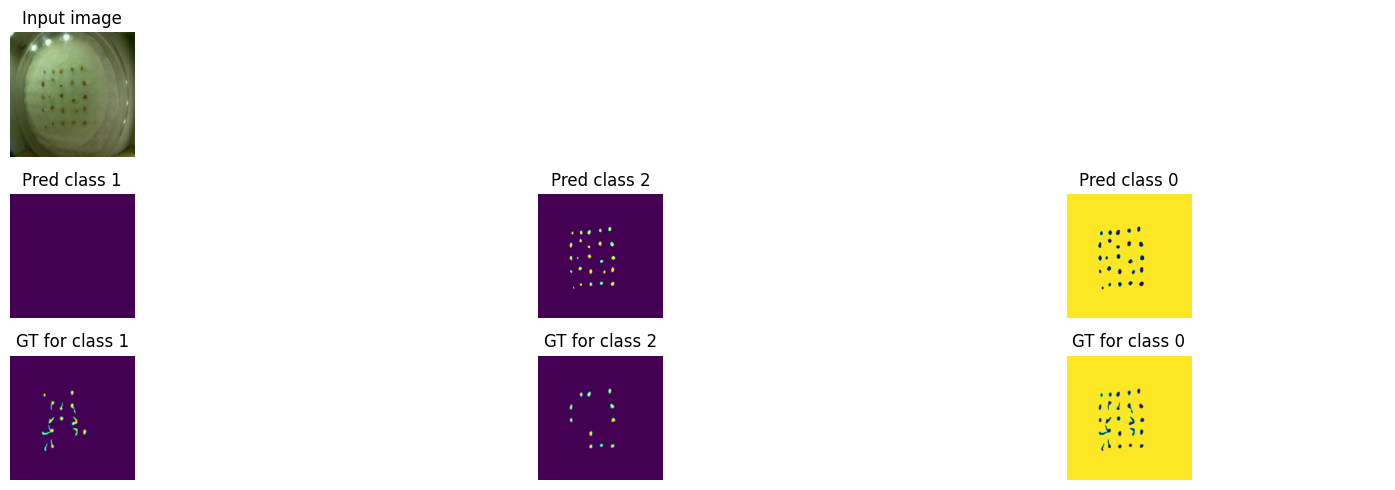

Train loss: 0.29155 | Time: 8m 53s | Val loss: 0.24298
Train_DICE_avg: 0.72744 | Train_Jaccard_avg: 0.66080 | Train_Sensitivity_avg: 0.78318 | Train_Specificity_avg: 0.94439 
Class 0 - Train_DICE: 0.98924 | Train_Jaccard: 0.97882 | Train_Sensitivity: 0.99005 | Train_Specificity: 0.84436 
Class 1 - Train_DICE: 0.37921 | Train_Jaccard: 0.30355 | Train_Sensitivity: 0.49997 | Train_Specificity: 0.99554 
Class 2 - Train_DICE: 0.81386 | Train_Jaccard: 0.70004 | Train_Sensitivity: 0.85951 | Train_Specificity: 0.99326 
Val_DICE_avg: 0.78136 | Val_Jaccard_avg: 0.72631 | Val_Sensitivity_avg: 0.85427 | Val_Specificity_avg: 0.93846 
Class 0 - Val_DICE: 0.99515 | Val_Jaccard: 0.99038 | Val_Sensitivity: 0.99649 | Val_Specificity: 0.82531 
Class 1 - Val_DICE: 0.51329 | Val_Jaccard: 0.45445 | Val_Sensitivity: 0.68838 | Val_Specificity: 0.99582 
Class 2 - Val_DICE: 0.83565 | Val_Jaccard: 0.73408 | Val_Sensitivity: 0.87793 | Val_Specificity: 0.99424 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]


Train loss: 0.26415 | Time: 9m 30s | Val loss: 0.22477
Train_DICE_avg: 0.75708 | Train_Jaccard_avg: 0.69229 | Train_Sensitivity_avg: 0.83291 | Train_Specificity_avg: 0.94455 
Class 0 - Train_DICE: 0.98928 | Train_Jaccard: 0.97891 | Train_Sensitivity: 0.99000 | Train_Specificity: 0.84504 
Class 1 - Train_DICE: 0.46703 | Train_Jaccard: 0.39648 | Train_Sensitivity: 0.64771 | Train_Specificity: 0.99542 
Class 2 - Train_DICE: 0.81492 | Train_Jaccard: 0.70148 | Train_Sensitivity: 0.86103 | Train_Specificity: 0.99320 
Val_DICE_avg: 0.78497 | Val_Jaccard_avg: 0.72812 | Val_Sensitivity_avg: 0.85207 | Val_Specificity_avg: 0.93802 
Class 0 - Val_DICE: 0.99529 | Val_Jaccard: 0.99065 | Val_Sensitivity: 0.99709 | Val_Specificity: 0.82415 
Class 1 - Val_DICE: 0.52884 | Val_Jaccard: 0.46937 | Val_Sensitivity: 0.66406 | Val_Specificity: 0.99668 
Class 2 - Val_DICE: 0.83079 | Val_Jaccard: 0.72433 | Val_Sensitivity: 0.89508 | Val_Specificity: 0.99324 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]


Train loss: 0.25596 | Time: 10m 6s | Val loss: 0.21873
Train_DICE_avg: 0.76474 | Train_Jaccard_avg: 0.69991 | Train_Sensitivity_avg: 0.84077 | Train_Specificity_avg: 0.94030 
Class 0 - Train_DICE: 0.98916 | Train_Jaccard: 0.97868 | Train_Sensitivity: 0.99092 | Train_Specificity: 0.83221 
Class 1 - Train_DICE: 0.48804 | Train_Jaccard: 0.41692 | Train_Sensitivity: 0.66723 | Train_Specificity: 0.99539 
Class 2 - Train_DICE: 0.81704 | Train_Jaccard: 0.70414 | Train_Sensitivity: 0.86416 | Train_Specificity: 0.99332 
Val_DICE_avg: 0.78658 | Val_Jaccard_avg: 0.73015 | Val_Sensitivity_avg: 0.85724 | Val_Specificity_avg: 0.93975 
Class 0 - Val_DICE: 0.99529 | Val_Jaccard: 0.99065 | Val_Sensitivity: 0.99701 | Val_Specificity: 0.82954 
Class 1 - Val_DICE: 0.53173 | Val_Jaccard: 0.47182 | Val_Sensitivity: 0.67471 | Val_Specificity: 0.99645 
Class 2 - Val_DICE: 0.83271 | Val_Jaccard: 0.72798 | Val_Sensitivity: 0.90000 | Val_Specificity: 0.99325 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


Train loss: 0.25328 | Time: 10m 43s | Val loss: 0.21739
Train_DICE_avg: 0.76803 | Train_Jaccard_avg: 0.70352 | Train_Sensitivity_avg: 0.84599 | Train_Specificity_avg: 0.93975 
Class 0 - Train_DICE: 0.98954 | Train_Jaccard: 0.97941 | Train_Sensitivity: 0.99164 | Train_Specificity: 0.83058 
Class 1 - Train_DICE: 0.49652 | Train_Jaccard: 0.42597 | Train_Sensitivity: 0.67855 | Train_Specificity: 0.99551 
Class 2 - Train_DICE: 0.81802 | Train_Jaccard: 0.70518 | Train_Sensitivity: 0.86778 | Train_Specificity: 0.99318 
Val_DICE_avg: 0.78803 | Val_Jaccard_avg: 0.73105 | Val_Sensitivity_avg: 0.85929 | Val_Specificity_avg: 0.94145 
Class 0 - Val_DICE: 0.99544 | Val_Jaccard: 0.99095 | Val_Sensitivity: 0.99678 | Val_Specificity: 0.83490 
Class 1 - Val_DICE: 0.53351 | Val_Jaccard: 0.47151 | Val_Sensitivity: 0.68067 | Val_Specificity: 0.99620 
Class 2 - Val_DICE: 0.83513 | Val_Jaccard: 0.73070 | Val_Sensitivity: 0.90041 | Val_Specificity: 0.99325 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


Train loss: 0.24772 | Time: 11m 20s | Val loss: 0.21238
Train_DICE_avg: 0.77004 | Train_Jaccard_avg: 0.70625 | Train_Sensitivity_avg: 0.85179 | Train_Specificity_avg: 0.94075 
Class 0 - Train_DICE: 0.98940 | Train_Jaccard: 0.97914 | Train_Sensitivity: 0.99143 | Train_Specificity: 0.83352 
Class 1 - Train_DICE: 0.50038 | Train_Jaccard: 0.43100 | Train_Sensitivity: 0.69683 | Train_Specificity: 0.99534 
Class 2 - Train_DICE: 0.82032 | Train_Jaccard: 0.70861 | Train_Sensitivity: 0.86712 | Train_Specificity: 0.99338 
Val_DICE_avg: 0.79582 | Val_Jaccard_avg: 0.74217 | Val_Sensitivity_avg: 0.86946 | Val_Specificity_avg: 0.93617 
Class 0 - Val_DICE: 0.99516 | Val_Jaccard: 0.99039 | Val_Sensitivity: 0.99720 | Val_Specificity: 0.81807 
Class 1 - Val_DICE: 0.54448 | Val_Jaccard: 0.48588 | Val_Sensitivity: 0.72789 | Val_Specificity: 0.99578 
Class 2 - Val_DICE: 0.84782 | Val_Jaccard: 0.75023 | Val_Sensitivity: 0.88330 | Val_Specificity: 0.99465 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


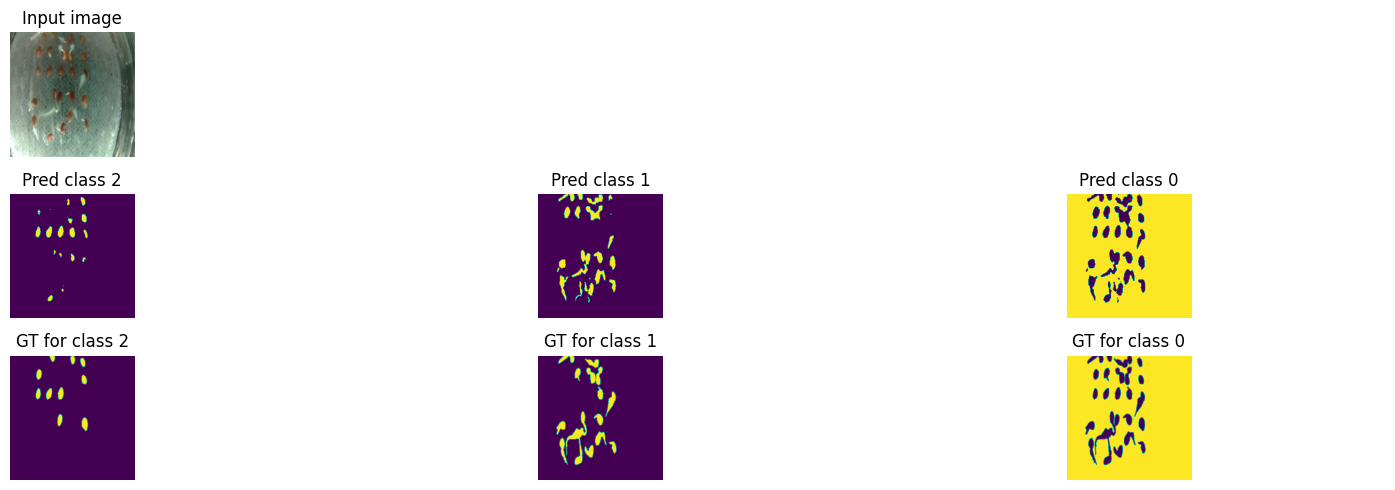

Train loss: 0.23823 | Time: 12m 0s | Val loss: 0.17625
Train_DICE_avg: 0.78095 | Train_Jaccard_avg: 0.71698 | Train_Sensitivity_avg: 0.86727 | Train_Specificity_avg: 0.94014 
Class 0 - Train_DICE: 0.98927 | Train_Jaccard: 0.97889 | Train_Sensitivity: 0.99150 | Train_Specificity: 0.83187 
Class 1 - Train_DICE: 0.53388 | Train_Jaccard: 0.46402 | Train_Sensitivity: 0.74103 | Train_Specificity: 0.99524 
Class 2 - Train_DICE: 0.81970 | Train_Jaccard: 0.70802 | Train_Sensitivity: 0.86929 | Train_Specificity: 0.99332 
Val_DICE_avg: 0.82628 | Val_Jaccard_avg: 0.77136 | Val_Sensitivity_avg: 0.90800 | Val_Specificity_avg: 0.93748 
Class 0 - Val_DICE: 0.99504 | Val_Jaccard: 0.99016 | Val_Sensitivity: 0.99728 | Val_Specificity: 0.82296 
Class 1 - Val_DICE: 0.64465 | Val_Jaccard: 0.58611 | Val_Sensitivity: 0.83006 | Val_Specificity: 0.99548 
Class 2 - Val_DICE: 0.83913 | Val_Jaccard: 0.73783 | Val_Sensitivity: 0.89665 | Val_Specificity: 0.99400 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]


Train loss: 0.23028 | Time: 12m 39s | Val loss: 0.17168
Train_DICE_avg: 0.79018 | Train_Jaccard_avg: 0.72731 | Train_Sensitivity_avg: 0.87982 | Train_Specificity_avg: 0.93986 
Class 0 - Train_DICE: 0.98951 | Train_Jaccard: 0.97936 | Train_Sensitivity: 0.99202 | Train_Specificity: 0.83104 
Class 1 - Train_DICE: 0.55898 | Train_Jaccard: 0.49114 | Train_Sensitivity: 0.77700 | Train_Specificity: 0.99512 
Class 2 - Train_DICE: 0.82205 | Train_Jaccard: 0.71142 | Train_Sensitivity: 0.87044 | Train_Specificity: 0.99341 
Val_DICE_avg: 0.83523 | Val_Jaccard_avg: 0.78129 | Val_Sensitivity_avg: 0.90237 | Val_Specificity_avg: 0.92896 
Class 0 - Val_DICE: 0.99475 | Val_Jaccard: 0.98958 | Val_Sensitivity: 0.99753 | Val_Specificity: 0.79654 
Class 1 - Val_DICE: 0.66416 | Val_Jaccard: 0.60450 | Val_Sensitivity: 0.81463 | Val_Specificity: 0.99580 
Class 2 - Val_DICE: 0.84679 | Val_Jaccard: 0.74980 | Val_Sensitivity: 0.89496 | Val_Specificity: 0.99452 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]


Train loss: 0.22698 | Time: 13m 18s | Val loss: 0.17070
Train_DICE_avg: 0.79404 | Train_Jaccard_avg: 0.73105 | Train_Sensitivity_avg: 0.88298 | Train_Specificity_avg: 0.93843 
Class 0 - Train_DICE: 0.98938 | Train_Jaccard: 0.97911 | Train_Sensitivity: 0.99217 | Train_Specificity: 0.82654 
Class 1 - Train_DICE: 0.56947 | Train_Jaccard: 0.50124 | Train_Sensitivity: 0.78422 | Train_Specificity: 0.99533 
Class 2 - Train_DICE: 0.82327 | Train_Jaccard: 0.71280 | Train_Sensitivity: 0.87256 | Train_Specificity: 0.99342 
Val_DICE_avg: 0.83355 | Val_Jaccard_avg: 0.77882 | Val_Sensitivity_avg: 0.90344 | Val_Specificity_avg: 0.93099 
Class 0 - Val_DICE: 0.99483 | Val_Jaccard: 0.98974 | Val_Sensitivity: 0.99760 | Val_Specificity: 0.80281 
Class 1 - Val_DICE: 0.66670 | Val_Jaccard: 0.60762 | Val_Sensitivity: 0.80069 | Val_Specificity: 0.99638 
Class 2 - Val_DICE: 0.83912 | Val_Jaccard: 0.73910 | Val_Sensitivity: 0.91203 | Val_Specificity: 0.99377 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


Train loss: 0.22541 | Time: 13m 57s | Val loss: 0.16812
Train_DICE_avg: 0.79531 | Train_Jaccard_avg: 0.73354 | Train_Sensitivity_avg: 0.89175 | Train_Specificity_avg: 0.93698 
Class 0 - Train_DICE: 0.98930 | Train_Jaccard: 0.97894 | Train_Sensitivity: 0.99242 | Train_Specificity: 0.82244 
Class 1 - Train_DICE: 0.57239 | Train_Jaccard: 0.50724 | Train_Sensitivity: 0.81031 | Train_Specificity: 0.99501 
Class 2 - Train_DICE: 0.82425 | Train_Jaccard: 0.71444 | Train_Sensitivity: 0.87253 | Train_Specificity: 0.99348 
Val_DICE_avg: 0.83396 | Val_Jaccard_avg: 0.78139 | Val_Sensitivity_avg: 0.92080 | Val_Specificity_avg: 0.93218 
Class 0 - Val_DICE: 0.99499 | Val_Jaccard: 0.99006 | Val_Sensitivity: 0.99744 | Val_Specificity: 0.80669 
Class 1 - Val_DICE: 0.65938 | Val_Jaccard: 0.60420 | Val_Sensitivity: 0.87075 | Val_Specificity: 0.99518 
Class 2 - Val_DICE: 0.84751 | Val_Jaccard: 0.74992 | Val_Sensitivity: 0.89420 | Val_Specificity: 0.99468 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]


Train loss: 0.22206 | Time: 14m 36s | Val loss: 0.16186
Train_DICE_avg: 0.79912 | Train_Jaccard_avg: 0.73735 | Train_Sensitivity_avg: 0.89351 | Train_Specificity_avg: 0.93720 
Class 0 - Train_DICE: 0.98934 | Train_Jaccard: 0.97902 | Train_Sensitivity: 0.99258 | Train_Specificity: 0.82293 
Class 1 - Train_DICE: 0.58286 | Train_Jaccard: 0.51741 | Train_Sensitivity: 0.81387 | Train_Specificity: 0.99519 
Class 2 - Train_DICE: 0.82515 | Train_Jaccard: 0.71564 | Train_Sensitivity: 0.87407 | Train_Specificity: 0.99349 
Val_DICE_avg: 0.84094 | Val_Jaccard_avg: 0.78605 | Val_Sensitivity_avg: 0.91558 | Val_Specificity_avg: 0.93032 
Class 0 - Val_DICE: 0.99488 | Val_Jaccard: 0.98984 | Val_Sensitivity: 0.99772 | Val_Specificity: 0.80074 
Class 1 - Val_DICE: 0.68408 | Val_Jaccard: 0.62394 | Val_Sensitivity: 0.83992 | Val_Specificity: 0.99623 
Class 2 - Val_DICE: 0.84386 | Val_Jaccard: 0.74437 | Val_Sensitivity: 0.90908 | Val_Specificity: 0.99399 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]


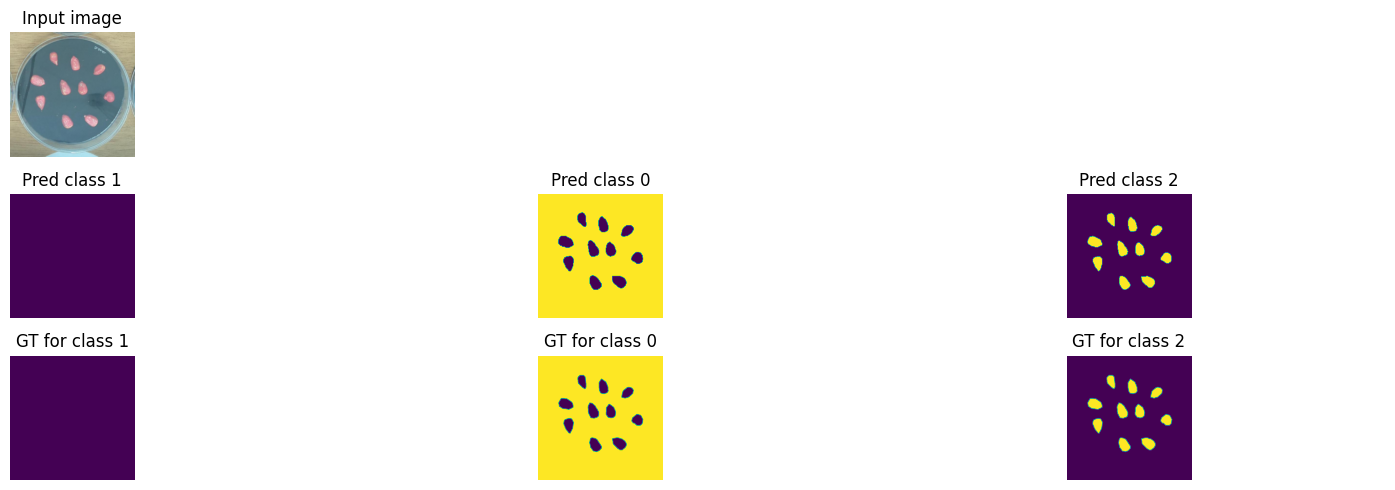

Train loss: 0.21853 | Time: 15m 16s | Val loss: 0.16563
Train_DICE_avg: 0.80203 | Train_Jaccard_avg: 0.74022 | Train_Sensitivity_avg: 0.89396 | Train_Specificity_avg: 0.93729 
Class 0 - Train_DICE: 0.98944 | Train_Jaccard: 0.97923 | Train_Sensitivity: 0.99284 | Train_Specificity: 0.82291 
Class 1 - Train_DICE: 0.58882 | Train_Jaccard: 0.52239 | Train_Sensitivity: 0.81287 | Train_Specificity: 0.99537 
Class 2 - Train_DICE: 0.82783 | Train_Jaccard: 0.71905 | Train_Sensitivity: 0.87617 | Train_Specificity: 0.99358 
Val_DICE_avg: 0.83721 | Val_Jaccard_avg: 0.78551 | Val_Sensitivity_avg: 0.92661 | Val_Specificity_avg: 0.92914 
Class 0 - Val_DICE: 0.99499 | Val_Jaccard: 0.99006 | Val_Sensitivity: 0.99759 | Val_Specificity: 0.79721 
Class 1 - Val_DICE: 0.66405 | Val_Jaccard: 0.61048 | Val_Sensitivity: 0.88107 | Val_Specificity: 0.99566 
Class 2 - Val_DICE: 0.85258 | Val_Jaccard: 0.75599 | Val_Sensitivity: 0.90116 | Val_Specificity: 0.99456 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


Train loss: 0.21938 | Time: 15m 55s | Val loss: 0.15674
Train_DICE_avg: 0.79935 | Train_Jaccard_avg: 0.73795 | Train_Sensitivity_avg: 0.89120 | Train_Specificity_avg: 0.93876 
Class 0 - Train_DICE: 0.98969 | Train_Jaccard: 0.97971 | Train_Sensitivity: 0.99271 | Train_Specificity: 0.82737 
Class 1 - Train_DICE: 0.57915 | Train_Jaccard: 0.51304 | Train_Sensitivity: 0.80435 | Train_Specificity: 0.99531 
Class 2 - Train_DICE: 0.82921 | Train_Jaccard: 0.72109 | Train_Sensitivity: 0.87653 | Train_Specificity: 0.99360 
Val_DICE_avg: 0.84494 | Val_Jaccard_avg: 0.79094 | Val_Sensitivity_avg: 0.92798 | Val_Specificity_avg: 0.93413 
Class 0 - Val_DICE: 0.99515 | Val_Jaccard: 0.99038 | Val_Sensitivity: 0.99767 | Val_Specificity: 0.81228 
Class 1 - Val_DICE: 0.69088 | Val_Jaccard: 0.63179 | Val_Sensitivity: 0.88164 | Val_Specificity: 0.99569 
Class 2 - Val_DICE: 0.84879 | Val_Jaccard: 0.75064 | Val_Sensitivity: 0.90463 | Val_Specificity: 0.99443 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Train loss: 0.21489 | Time: 16m 34s | Val loss: 0.15531
Train_DICE_avg: 0.80495 | Train_Jaccard_avg: 0.74271 | Train_Sensitivity_avg: 0.89147 | Train_Specificity_avg: 0.93690 
Class 0 - Train_DICE: 0.98969 | Train_Jaccard: 0.97971 | Train_Sensitivity: 0.99286 | Train_Specificity: 0.82157 
Class 1 - Train_DICE: 0.59544 | Train_Jaccard: 0.52689 | Train_Sensitivity: 0.80395 | Train_Specificity: 0.99544 
Class 2 - Train_DICE: 0.82973 | Train_Jaccard: 0.72152 | Train_Sensitivity: 0.87760 | Train_Specificity: 0.99368 
Val_DICE_avg: 0.85060 | Val_Jaccard_avg: 0.79807 | Val_Sensitivity_avg: 0.92169 | Val_Specificity_avg: 0.92829 
Class 0 - Val_DICE: 0.99489 | Val_Jaccard: 0.98986 | Val_Sensitivity: 0.99769 | Val_Specificity: 0.79393 
Class 1 - Val_DICE: 0.69977 | Val_Jaccard: 0.64104 | Val_Sensitivity: 0.86805 | Val_Specificity: 0.99603 
Class 2 - Val_DICE: 0.85713 | Val_Jaccard: 0.76332 | Val_Sensitivity: 0.89934 | Val_Specificity: 0.99490 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]


Train loss: 0.21378 | Time: 17m 13s | Val loss: 0.15051
Train_DICE_avg: 0.80743 | Train_Jaccard_avg: 0.74497 | Train_Sensitivity_avg: 0.89506 | Train_Specificity_avg: 0.93627 
Class 0 - Train_DICE: 0.98953 | Train_Jaccard: 0.97941 | Train_Sensitivity: 0.99313 | Train_Specificity: 0.81972 
Class 1 - Train_DICE: 0.60042 | Train_Jaccard: 0.53080 | Train_Sensitivity: 0.80942 | Train_Specificity: 0.99550 
Class 2 - Train_DICE: 0.83233 | Train_Jaccard: 0.72469 | Train_Sensitivity: 0.88261 | Train_Specificity: 0.99359 
Val_DICE_avg: 0.85511 | Val_Jaccard_avg: 0.80220 | Val_Sensitivity_avg: 0.92272 | Val_Specificity_avg: 0.92869 
Class 0 - Val_DICE: 0.99486 | Val_Jaccard: 0.98979 | Val_Sensitivity: 0.99789 | Val_Specificity: 0.79517 
Class 1 - Val_DICE: 0.71159 | Val_Jaccard: 0.65194 | Val_Sensitivity: 0.86490 | Val_Specificity: 0.99619 
Class 2 - Val_DICE: 0.85888 | Val_Jaccard: 0.76485 | Val_Sensitivity: 0.90537 | Val_Specificity: 0.99470 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Train loss: 0.20835 | Time: 17m 52s | Val loss: 0.16051
Train_DICE_avg: 0.80978 | Train_Jaccard_avg: 0.74725 | Train_Sensitivity_avg: 0.89174 | Train_Specificity_avg: 0.93805 
Class 0 - Train_DICE: 0.98988 | Train_Jaccard: 0.98007 | Train_Sensitivity: 0.99324 | Train_Specificity: 0.82486 
Class 1 - Train_DICE: 0.60556 | Train_Jaccard: 0.53466 | Train_Sensitivity: 0.79776 | Train_Specificity: 0.99570 
Class 2 - Train_DICE: 0.83389 | Train_Jaccard: 0.72701 | Train_Sensitivity: 0.88423 | Train_Specificity: 0.99360 
Val_DICE_avg: 0.84163 | Val_Jaccard_avg: 0.78775 | Val_Sensitivity_avg: 0.91806 | Val_Specificity_avg: 0.92956 
Class 0 - Val_DICE: 0.99493 | Val_Jaccard: 0.98993 | Val_Sensitivity: 0.99790 | Val_Specificity: 0.79816 
Class 1 - Val_DICE: 0.67917 | Val_Jaccard: 0.61969 | Val_Sensitivity: 0.83704 | Val_Specificity: 0.99638 
Class 2 - Val_DICE: 0.85079 | Val_Jaccard: 0.75363 | Val_Sensitivity: 0.91924 | Val_Specificity: 0.99413 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


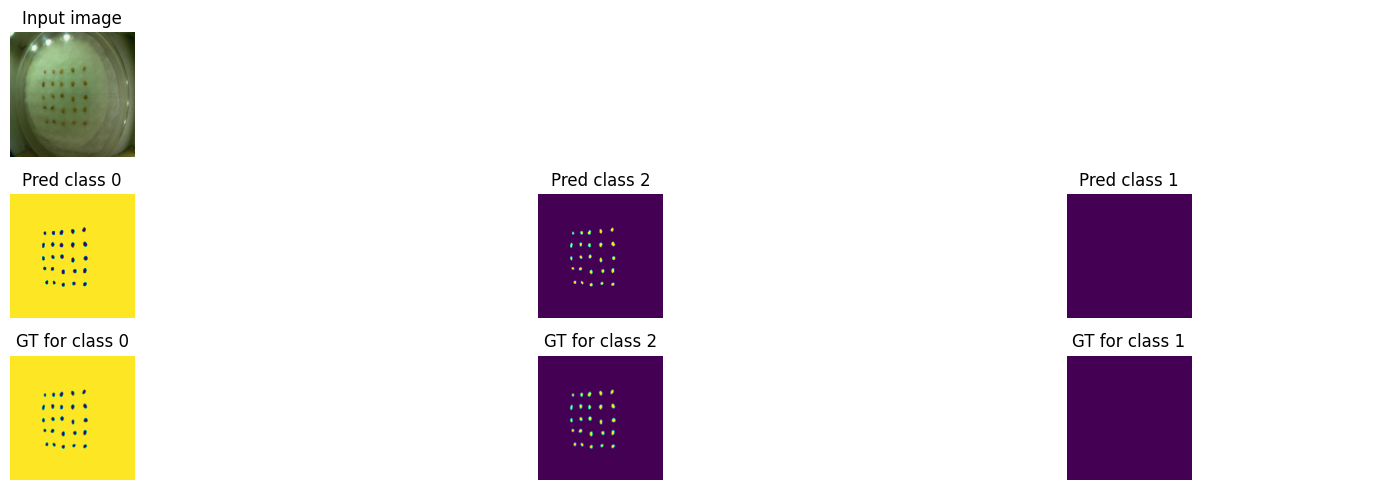

Train loss: 0.20813 | Time: 18m 32s | Val loss: 0.14943
Train_DICE_avg: 0.80987 | Train_Jaccard_avg: 0.74732 | Train_Sensitivity_avg: 0.89812 | Train_Specificity_avg: 0.93782 
Class 0 - Train_DICE: 0.98955 | Train_Jaccard: 0.97943 | Train_Sensitivity: 0.99315 | Train_Specificity: 0.82419 
Class 1 - Train_DICE: 0.60734 | Train_Jaccard: 0.53699 | Train_Sensitivity: 0.81844 | Train_Specificity: 0.99563 
Class 2 - Train_DICE: 0.83272 | Train_Jaccard: 0.72554 | Train_Sensitivity: 0.88277 | Train_Specificity: 0.99365 
Val_DICE_avg: 0.85497 | Val_Jaccard_avg: 0.80195 | Val_Sensitivity_avg: 0.92540 | Val_Specificity_avg: 0.93110 
Class 0 - Val_DICE: 0.99482 | Val_Jaccard: 0.98973 | Val_Sensitivity: 0.99803 | Val_Specificity: 0.80195 
Class 1 - Val_DICE: 0.71386 | Val_Jaccard: 0.65441 | Val_Sensitivity: 0.87221 | Val_Specificity: 0.99638 
Class 2 - Val_DICE: 0.85623 | Val_Jaccard: 0.76171 | Val_Sensitivity: 0.90597 | Val_Specificity: 0.99495 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


Train loss: 0.20989 | Time: 19m 12s | Val loss: 0.15191
Train_DICE_avg: 0.80757 | Train_Jaccard_avg: 0.74535 | Train_Sensitivity_avg: 0.89243 | Train_Specificity_avg: 0.93797 
Class 0 - Train_DICE: 0.98971 | Train_Jaccard: 0.97974 | Train_Sensitivity: 0.99335 | Train_Specificity: 0.82461 
Class 1 - Train_DICE: 0.59831 | Train_Jaccard: 0.52797 | Train_Sensitivity: 0.80059 | Train_Specificity: 0.99560 
Class 2 - Train_DICE: 0.83470 | Train_Jaccard: 0.72833 | Train_Sensitivity: 0.88334 | Train_Specificity: 0.99372 
Val_DICE_avg: 0.85308 | Val_Jaccard_avg: 0.80120 | Val_Sensitivity_avg: 0.92769 | Val_Specificity_avg: 0.93253 
Class 0 - Val_DICE: 0.99508 | Val_Jaccard: 0.99024 | Val_Sensitivity: 0.99777 | Val_Specificity: 0.80667 
Class 1 - Val_DICE: 0.70467 | Val_Jaccard: 0.64723 | Val_Sensitivity: 0.87671 | Val_Specificity: 0.99610 
Class 2 - Val_DICE: 0.85947 | Val_Jaccard: 0.76613 | Val_Sensitivity: 0.90860 | Val_Specificity: 0.99481 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Train loss: 0.20461 | Time: 19m 51s | Val loss: 0.15735
Train_DICE_avg: 0.81302 | Train_Jaccard_avg: 0.75044 | Train_Sensitivity_avg: 0.89541 | Train_Specificity_avg: 0.93764 
Class 0 - Train_DICE: 0.98978 | Train_Jaccard: 0.97987 | Train_Sensitivity: 0.99329 | Train_Specificity: 0.82360 
Class 1 - Train_DICE: 0.61312 | Train_Jaccard: 0.54129 | Train_Sensitivity: 0.80646 | Train_Specificity: 0.99565 
Class 2 - Train_DICE: 0.83617 | Train_Jaccard: 0.73015 | Train_Sensitivity: 0.88648 | Train_Specificity: 0.99367 
Val_DICE_avg: 0.84955 | Val_Jaccard_avg: 0.79797 | Val_Sensitivity_avg: 0.92348 | Val_Specificity_avg: 0.92349 
Class 0 - Val_DICE: 0.99457 | Val_Jaccard: 0.98922 | Val_Sensitivity: 0.99803 | Val_Specificity: 0.77940 
Class 1 - Val_DICE: 0.69546 | Val_Jaccard: 0.63966 | Val_Sensitivity: 0.87058 | Val_Specificity: 0.99622 
Class 2 - Val_DICE: 0.85863 | Val_Jaccard: 0.76503 | Val_Sensitivity: 0.90185 | Val_Specificity: 0.99484 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


Train loss: 0.20560 | Time: 20m 31s | Val loss: 0.14967
Train_DICE_avg: 0.81431 | Train_Jaccard_avg: 0.75230 | Train_Sensitivity_avg: 0.90126 | Train_Specificity_avg: 0.93637 
Class 0 - Train_DICE: 0.98988 | Train_Jaccard: 0.98006 | Train_Sensitivity: 0.99348 | Train_Specificity: 0.81965 
Class 1 - Train_DICE: 0.61611 | Train_Jaccard: 0.54563 | Train_Sensitivity: 0.82232 | Train_Specificity: 0.99568 
Class 2 - Train_DICE: 0.83694 | Train_Jaccard: 0.73123 | Train_Sensitivity: 0.88799 | Train_Specificity: 0.99376 
Val_DICE_avg: 0.85389 | Val_Jaccard_avg: 0.80292 | Val_Sensitivity_avg: 0.93011 | Val_Specificity_avg: 0.92777 
Class 0 - Val_DICE: 0.99485 | Val_Jaccard: 0.98978 | Val_Sensitivity: 0.99778 | Val_Specificity: 0.79208 
Class 1 - Val_DICE: 0.70259 | Val_Jaccard: 0.64567 | Val_Sensitivity: 0.88789 | Val_Specificity: 0.99603 
Class 2 - Val_DICE: 0.86423 | Val_Jaccard: 0.77330 | Val_Sensitivity: 0.90465 | Val_Specificity: 0.99519 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]


Train loss: 0.20181 | Time: 21m 10s | Val loss: 0.14788
Train_DICE_avg: 0.81312 | Train_Jaccard_avg: 0.75091 | Train_Sensitivity_avg: 0.89527 | Train_Specificity_avg: 0.93725 
Class 0 - Train_DICE: 0.98968 | Train_Jaccard: 0.97968 | Train_Sensitivity: 0.99344 | Train_Specificity: 0.82218 
Class 1 - Train_DICE: 0.61139 | Train_Jaccard: 0.54020 | Train_Sensitivity: 0.80514 | Train_Specificity: 0.99582 
Class 2 - Train_DICE: 0.83829 | Train_Jaccard: 0.73285 | Train_Sensitivity: 0.88723 | Train_Specificity: 0.99374 
Val_DICE_avg: 0.85449 | Val_Jaccard_avg: 0.80320 | Val_Sensitivity_avg: 0.92874 | Val_Specificity_avg: 0.93062 
Class 0 - Val_DICE: 0.99497 | Val_Jaccard: 0.99003 | Val_Sensitivity: 0.99802 | Val_Specificity: 0.80062 
Class 1 - Val_DICE: 0.71065 | Val_Jaccard: 0.65473 | Val_Sensitivity: 0.86972 | Val_Specificity: 0.99663 
Class 2 - Val_DICE: 0.85783 | Val_Jaccard: 0.76485 | Val_Sensitivity: 0.91849 | Val_Specificity: 0.99462 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


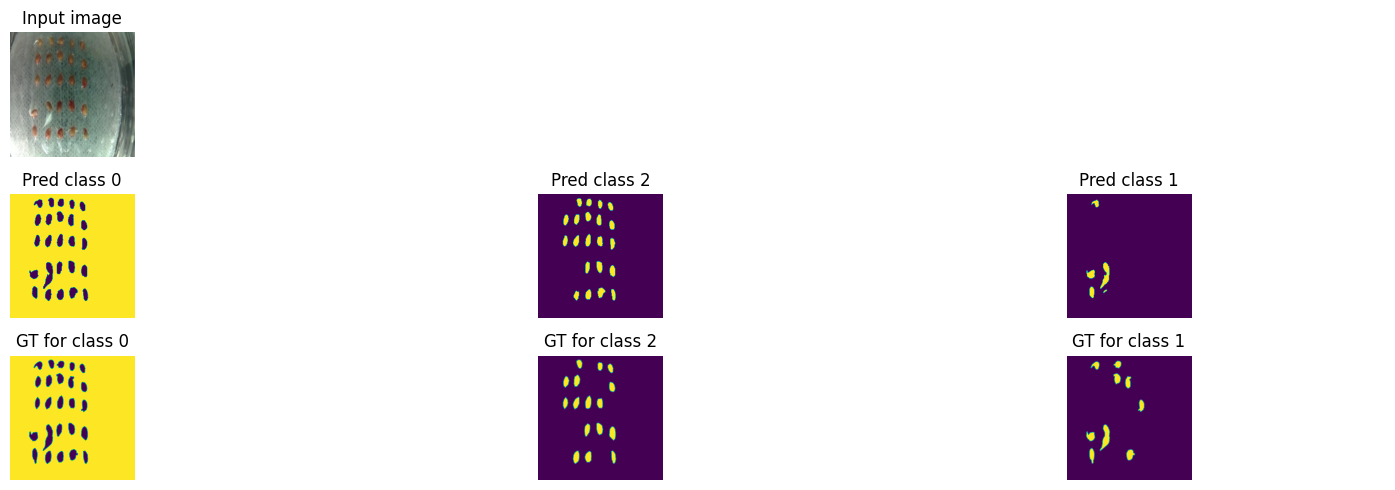

Train loss: 0.20227 | Time: 21m 51s | Val loss: 0.14532
Train_DICE_avg: 0.81658 | Train_Jaccard_avg: 0.75390 | Train_Sensitivity_avg: 0.89642 | Train_Specificity_avg: 0.93678 
Class 0 - Train_DICE: 0.98999 | Train_Jaccard: 0.98029 | Train_Sensitivity: 0.99380 | Train_Specificity: 0.82077 
Class 1 - Train_DICE: 0.61995 | Train_Jaccard: 0.54672 | Train_Sensitivity: 0.80470 | Train_Specificity: 0.99588 
Class 2 - Train_DICE: 0.83979 | Train_Jaccard: 0.73468 | Train_Sensitivity: 0.89076 | Train_Specificity: 0.99371 
Val_DICE_avg: 0.85840 | Val_Jaccard_avg: 0.80740 | Val_Sensitivity_avg: 0.93110 | Val_Specificity_avg: 0.92851 
Class 0 - Val_DICE: 0.99487 | Val_Jaccard: 0.98981 | Val_Sensitivity: 0.99789 | Val_Specificity: 0.79414 
Class 1 - Val_DICE: 0.71567 | Val_Jaccard: 0.65819 | Val_Sensitivity: 0.88620 | Val_Specificity: 0.99622 
Class 2 - Val_DICE: 0.86465 | Val_Jaccard: 0.77421 | Val_Sensitivity: 0.90921 | Val_Specificity: 0.99516 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


Train loss: 0.20209 | Time: 22m 30s | Val loss: 0.15067
Train_DICE_avg: 0.81255 | Train_Jaccard_avg: 0.75021 | Train_Sensitivity_avg: 0.89211 | Train_Specificity_avg: 0.93872 
Class 0 - Train_DICE: 0.99007 | Train_Jaccard: 0.98044 | Train_Sensitivity: 0.99350 | Train_Specificity: 0.82650 
Class 1 - Train_DICE: 0.60650 | Train_Jaccard: 0.53377 | Train_Sensitivity: 0.79248 | Train_Specificity: 0.99587 
Class 2 - Train_DICE: 0.84107 | Train_Jaccard: 0.73641 | Train_Sensitivity: 0.89035 | Train_Specificity: 0.99379 
Val_DICE_avg: 0.85101 | Val_Jaccard_avg: 0.79915 | Val_Sensitivity_avg: 0.92957 | Val_Specificity_avg: 0.93204 
Class 0 - Val_DICE: 0.99511 | Val_Jaccard: 0.99030 | Val_Sensitivity: 0.99785 | Val_Specificity: 0.80535 
Class 1 - Val_DICE: 0.69918 | Val_Jaccard: 0.64218 | Val_Sensitivity: 0.87985 | Val_Specificity: 0.99621 
Class 2 - Val_DICE: 0.85874 | Val_Jaccard: 0.76498 | Val_Sensitivity: 0.91102 | Val_Specificity: 0.99455 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]


Train loss: 0.19892 | Time: 23m 10s | Val loss: 0.14740
Train_DICE_avg: 0.81738 | Train_Jaccard_avg: 0.75557 | Train_Sensitivity_avg: 0.90350 | Train_Specificity_avg: 0.93836 
Class 0 - Train_DICE: 0.99005 | Train_Jaccard: 0.98040 | Train_Sensitivity: 0.99382 | Train_Specificity: 0.82553 
Class 1 - Train_DICE: 0.62213 | Train_Jaccard: 0.55082 | Train_Sensitivity: 0.82726 | Train_Specificity: 0.99570 
Class 2 - Train_DICE: 0.83997 | Train_Jaccard: 0.73548 | Train_Sensitivity: 0.88941 | Train_Specificity: 0.99385 
Val_DICE_avg: 0.85391 | Val_Jaccard_avg: 0.80165 | Val_Sensitivity_avg: 0.93132 | Val_Specificity_avg: 0.92976 
Class 0 - Val_DICE: 0.99494 | Val_Jaccard: 0.98995 | Val_Sensitivity: 0.99796 | Val_Specificity: 0.79807 
Class 1 - Val_DICE: 0.70713 | Val_Jaccard: 0.64743 | Val_Sensitivity: 0.87401 | Val_Specificity: 0.99650 
Class 2 - Val_DICE: 0.85967 | Val_Jaccard: 0.76757 | Val_Sensitivity: 0.92198 | Val_Specificity: 0.99472 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]


Train loss: 0.19835 | Time: 23m 49s | Val loss: 0.14648
Train_DICE_avg: 0.81997 | Train_Jaccard_avg: 0.75797 | Train_Sensitivity_avg: 0.90188 | Train_Specificity_avg: 0.93863 
Class 0 - Train_DICE: 0.99007 | Train_Jaccard: 0.98044 | Train_Sensitivity: 0.99360 | Train_Specificity: 0.82617 
Class 1 - Train_DICE: 0.62797 | Train_Jaccard: 0.55561 | Train_Sensitivity: 0.81901 | Train_Specificity: 0.99591 
Class 2 - Train_DICE: 0.84187 | Train_Jaccard: 0.73787 | Train_Sensitivity: 0.89302 | Train_Specificity: 0.99382 
Val_DICE_avg: 0.85395 | Val_Jaccard_avg: 0.80257 | Val_Sensitivity_avg: 0.93987 | Val_Specificity_avg: 0.93207 
Class 0 - Val_DICE: 0.99513 | Val_Jaccard: 0.99033 | Val_Sensitivity: 0.99788 | Val_Specificity: 0.80506 
Class 1 - Val_DICE: 0.70328 | Val_Jaccard: 0.64625 | Val_Sensitivity: 0.90528 | Val_Specificity: 0.99629 
Class 2 - Val_DICE: 0.86345 | Val_Jaccard: 0.77112 | Val_Sensitivity: 0.91646 | Val_Specificity: 0.99485 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]


Train loss: 0.19546 | Time: 24m 30s | Val loss: 0.14234
Train_DICE_avg: 0.82172 | Train_Jaccard_avg: 0.75981 | Train_Sensitivity_avg: 0.90075 | Train_Specificity_avg: 0.93611 
Class 0 - Train_DICE: 0.99010 | Train_Jaccard: 0.98049 | Train_Sensitivity: 0.99400 | Train_Specificity: 0.81852 
Class 1 - Train_DICE: 0.63183 | Train_Jaccard: 0.55917 | Train_Sensitivity: 0.81264 | Train_Specificity: 0.99606 
Class 2 - Train_DICE: 0.84324 | Train_Jaccard: 0.73977 | Train_Sensitivity: 0.89562 | Train_Specificity: 0.99375 
Val_DICE_avg: 0.86206 | Val_Jaccard_avg: 0.81038 | Val_Sensitivity_avg: 0.92707 | Val_Specificity_avg: 0.92646 
Class 0 - Val_DICE: 0.99478 | Val_Jaccard: 0.98964 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.78772 
Class 1 - Val_DICE: 0.72819 | Val_Jaccard: 0.66927 | Val_Sensitivity: 0.86233 | Val_Specificity: 0.99689 
Class 2 - Val_DICE: 0.86320 | Val_Jaccard: 0.77223 | Val_Sensitivity: 0.92070 | Val_Specificity: 0.99477 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]


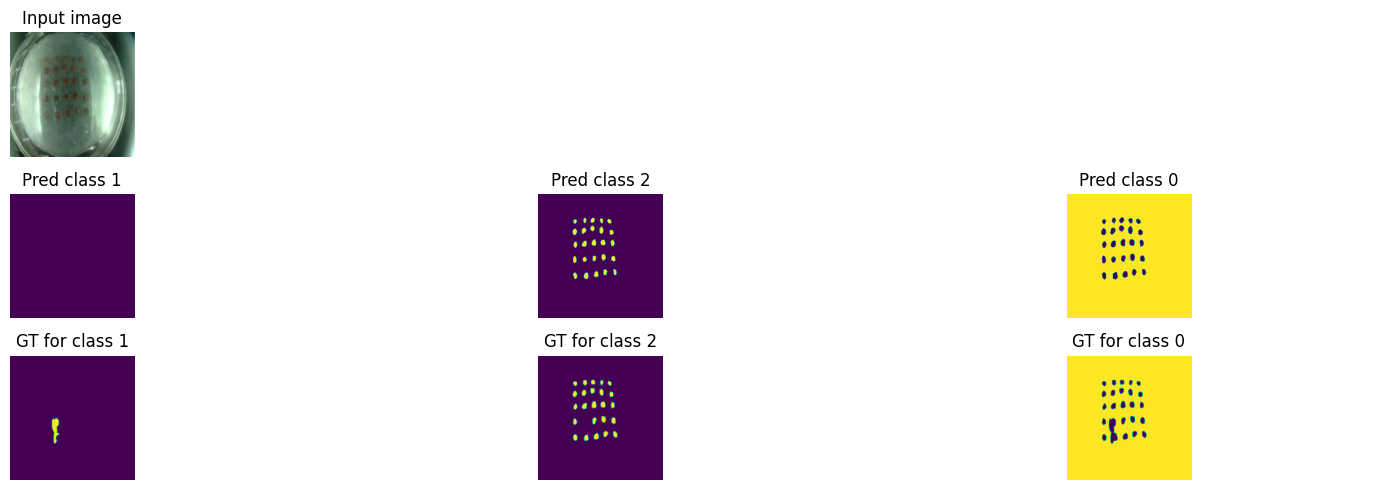

Train loss: 0.19477 | Time: 25m 10s | Val loss: 0.14064
Train_DICE_avg: 0.82293 | Train_Jaccard_avg: 0.76088 | Train_Sensitivity_avg: 0.90115 | Train_Specificity_avg: 0.93945 
Class 0 - Train_DICE: 0.99006 | Train_Jaccard: 0.98043 | Train_Sensitivity: 0.99368 | Train_Specificity: 0.82847 
Class 1 - Train_DICE: 0.63399 | Train_Jaccard: 0.56056 | Train_Sensitivity: 0.81543 | Train_Specificity: 0.99599 
Class 2 - Train_DICE: 0.84475 | Train_Jaccard: 0.74166 | Train_Sensitivity: 0.89434 | Train_Specificity: 0.99389 
Val_DICE_avg: 0.86104 | Val_Jaccard_avg: 0.80869 | Val_Sensitivity_avg: 0.93268 | Val_Specificity_avg: 0.93185 
Class 0 - Val_DICE: 0.99514 | Val_Jaccard: 0.99036 | Val_Sensitivity: 0.99798 | Val_Specificity: 0.80452 
Class 1 - Val_DICE: 0.73001 | Val_Jaccard: 0.67092 | Val_Sensitivity: 0.87504 | Val_Specificity: 0.99669 
Class 2 - Val_DICE: 0.85797 | Val_Jaccard: 0.76479 | Val_Sensitivity: 0.92502 | Val_Specificity: 0.99434 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]


Train loss: 0.19266 | Time: 25m 51s | Val loss: 0.13845
Train_DICE_avg: 0.82184 | Train_Jaccard_avg: 0.76008 | Train_Sensitivity_avg: 0.90195 | Train_Specificity_avg: 0.93777 
Class 0 - Train_DICE: 0.98997 | Train_Jaccard: 0.98025 | Train_Sensitivity: 0.99393 | Train_Specificity: 0.82335 
Class 1 - Train_DICE: 0.63096 | Train_Jaccard: 0.55825 | Train_Sensitivity: 0.81795 | Train_Specificity: 0.99599 
Class 2 - Train_DICE: 0.84457 | Train_Jaccard: 0.74174 | Train_Sensitivity: 0.89398 | Train_Specificity: 0.99397 
Val_DICE_avg: 0.86251 | Val_Jaccard_avg: 0.81014 | Val_Sensitivity_avg: 0.93356 | Val_Specificity_avg: 0.93240 
Class 0 - Val_DICE: 0.99506 | Val_Jaccard: 0.99020 | Val_Sensitivity: 0.99809 | Val_Specificity: 0.80589 
Class 1 - Val_DICE: 0.73538 | Val_Jaccard: 0.67589 | Val_Sensitivity: 0.87298 | Val_Specificity: 0.99692 
Class 2 - Val_DICE: 0.85709 | Val_Jaccard: 0.76434 | Val_Sensitivity: 0.92962 | Val_Specificity: 0.99439 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]


Train loss: 0.18952 | Time: 26m 31s | Val loss: 0.13726
Train_DICE_avg: 0.82381 | Train_Jaccard_avg: 0.76188 | Train_Sensitivity_avg: 0.90259 | Train_Specificity_avg: 0.93960 
Class 0 - Train_DICE: 0.99024 | Train_Jaccard: 0.98077 | Train_Sensitivity: 0.99388 | Train_Specificity: 0.82885 
Class 1 - Train_DICE: 0.63615 | Train_Jaccard: 0.56266 | Train_Sensitivity: 0.81666 | Train_Specificity: 0.99610 
Class 2 - Train_DICE: 0.84504 | Train_Jaccard: 0.74222 | Train_Sensitivity: 0.89723 | Train_Specificity: 0.99384 
Val_DICE_avg: 0.86414 | Val_Jaccard_avg: 0.81176 | Val_Sensitivity_avg: 0.93183 | Val_Specificity_avg: 0.93271 
Class 0 - Val_DICE: 0.99519 | Val_Jaccard: 0.99044 | Val_Sensitivity: 0.99798 | Val_Specificity: 0.80686 
Class 1 - Val_DICE: 0.73687 | Val_Jaccard: 0.67605 | Val_Sensitivity: 0.87189 | Val_Specificity: 0.99670 
Class 2 - Val_DICE: 0.86037 | Val_Jaccard: 0.76878 | Val_Sensitivity: 0.92561 | Val_Specificity: 0.99457 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]


Train loss: 0.19204 | Time: 27m 11s | Val loss: 0.13593
Train_DICE_avg: 0.82783 | Train_Jaccard_avg: 0.76614 | Train_Sensitivity_avg: 0.90691 | Train_Specificity_avg: 0.93880 
Class 0 - Train_DICE: 0.99034 | Train_Jaccard: 0.98096 | Train_Sensitivity: 0.99392 | Train_Specificity: 0.82646 
Class 1 - Train_DICE: 0.64645 | Train_Jaccard: 0.57298 | Train_Sensitivity: 0.82917 | Train_Specificity: 0.99604 
Class 2 - Train_DICE: 0.84670 | Train_Jaccard: 0.74447 | Train_Sensitivity: 0.89764 | Train_Specificity: 0.99391 
Val_DICE_avg: 0.86658 | Val_Jaccard_avg: 0.81526 | Val_Sensitivity_avg: 0.93661 | Val_Specificity_avg: 0.93107 
Class 0 - Val_DICE: 0.99511 | Val_Jaccard: 0.99030 | Val_Sensitivity: 0.99802 | Val_Specificity: 0.80165 
Class 1 - Val_DICE: 0.73571 | Val_Jaccard: 0.67575 | Val_Sensitivity: 0.88968 | Val_Specificity: 0.99657 
Class 2 - Val_DICE: 0.86892 | Val_Jaccard: 0.77973 | Val_Sensitivity: 0.92213 | Val_Specificity: 0.99497 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]


Train loss: 0.18731 | Time: 27m 52s | Val loss: 0.13453
Train_DICE_avg: 0.83127 | Train_Jaccard_avg: 0.76974 | Train_Sensitivity_avg: 0.90822 | Train_Specificity_avg: 0.93917 
Class 0 - Train_DICE: 0.99035 | Train_Jaccard: 0.98098 | Train_Sensitivity: 0.99402 | Train_Specificity: 0.82731 
Class 1 - Train_DICE: 0.65549 | Train_Jaccard: 0.58200 | Train_Sensitivity: 0.83162 | Train_Specificity: 0.99620 
Class 2 - Train_DICE: 0.84798 | Train_Jaccard: 0.74623 | Train_Sensitivity: 0.89901 | Train_Specificity: 0.99399 
Val_DICE_avg: 0.86846 | Val_Jaccard_avg: 0.81661 | Val_Sensitivity_avg: 0.93089 | Val_Specificity_avg: 0.92932 
Class 0 - Val_DICE: 0.99495 | Val_Jaccard: 0.98998 | Val_Sensitivity: 0.99818 | Val_Specificity: 0.79628 
Class 1 - Val_DICE: 0.74400 | Val_Jaccard: 0.68340 | Val_Sensitivity: 0.86884 | Val_Specificity: 0.99688 
Class 2 - Val_DICE: 0.86643 | Val_Jaccard: 0.77643 | Val_Sensitivity: 0.92566 | Val_Specificity: 0.99480 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]


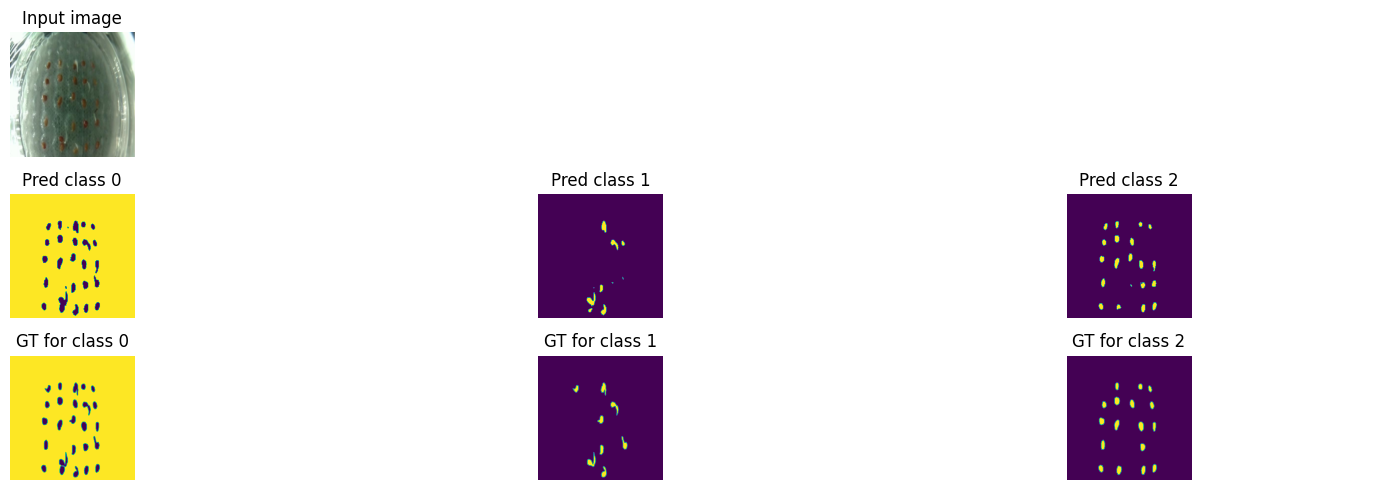

Train loss: 0.18785 | Time: 28m 33s | Val loss: 0.13555
Train_DICE_avg: 0.82909 | Train_Jaccard_avg: 0.76761 | Train_Sensitivity_avg: 0.91063 | Train_Specificity_avg: 0.93955 
Class 0 - Train_DICE: 0.99016 | Train_Jaccard: 0.98062 | Train_Sensitivity: 0.99382 | Train_Specificity: 0.82871 
Class 1 - Train_DICE: 0.64986 | Train_Jaccard: 0.57678 | Train_Sensitivity: 0.84125 | Train_Specificity: 0.99596 
Class 2 - Train_DICE: 0.84725 | Train_Jaccard: 0.74543 | Train_Sensitivity: 0.89682 | Train_Specificity: 0.99398 
Val_DICE_avg: 0.86580 | Val_Jaccard_avg: 0.81413 | Val_Sensitivity_avg: 0.93668 | Val_Specificity_avg: 0.93089 
Class 0 - Val_DICE: 0.99504 | Val_Jaccard: 0.99015 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.80113 
Class 1 - Val_DICE: 0.73345 | Val_Jaccard: 0.67298 | Val_Sensitivity: 0.88973 | Val_Specificity: 0.99653 
Class 2 - Val_DICE: 0.86893 | Val_Jaccard: 0.77925 | Val_Sensitivity: 0.92225 | Val_Specificity: 0.99502 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]


Train loss: 0.18712 | Time: 29m 13s | Val loss: 0.13442
Train_DICE_avg: 0.83101 | Train_Jaccard_avg: 0.76945 | Train_Sensitivity_avg: 0.91060 | Train_Specificity_avg: 0.93911 
Class 0 - Train_DICE: 0.99015 | Train_Jaccard: 0.98059 | Train_Sensitivity: 0.99390 | Train_Specificity: 0.82729 
Class 1 - Train_DICE: 0.65526 | Train_Jaccard: 0.58184 | Train_Sensitivity: 0.83800 | Train_Specificity: 0.99610 
Class 2 - Train_DICE: 0.84763 | Train_Jaccard: 0.74591 | Train_Sensitivity: 0.89989 | Train_Specificity: 0.99394 
Val_DICE_avg: 0.86821 | Val_Jaccard_avg: 0.81724 | Val_Sensitivity_avg: 0.93587 | Val_Specificity_avg: 0.93015 
Class 0 - Val_DICE: 0.99501 | Val_Jaccard: 0.99010 | Val_Sensitivity: 0.99814 | Val_Specificity: 0.79868 
Class 1 - Val_DICE: 0.73936 | Val_Jaccard: 0.67960 | Val_Sensitivity: 0.88477 | Val_Specificity: 0.99681 
Class 2 - Val_DICE: 0.87027 | Val_Jaccard: 0.78202 | Val_Sensitivity: 0.92472 | Val_Specificity: 0.99497 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]


Train loss: 0.18518 | Time: 29m 54s | Val loss: 0.13451
Train_DICE_avg: 0.83262 | Train_Jaccard_avg: 0.77132 | Train_Sensitivity_avg: 0.90999 | Train_Specificity_avg: 0.93856 
Class 0 - Train_DICE: 0.99025 | Train_Jaccard: 0.98079 | Train_Sensitivity: 0.99411 | Train_Specificity: 0.82548 
Class 1 - Train_DICE: 0.65735 | Train_Jaccard: 0.58379 | Train_Sensitivity: 0.83606 | Train_Specificity: 0.99614 
Class 2 - Train_DICE: 0.85024 | Train_Jaccard: 0.74937 | Train_Sensitivity: 0.89981 | Train_Specificity: 0.99406 
Val_DICE_avg: 0.86709 | Val_Jaccard_avg: 0.81571 | Val_Sensitivity_avg: 0.93643 | Val_Specificity_avg: 0.93298 
Class 0 - Val_DICE: 0.99516 | Val_Jaccard: 0.99039 | Val_Sensitivity: 0.99807 | Val_Specificity: 0.80743 
Class 1 - Val_DICE: 0.73891 | Val_Jaccard: 0.67929 | Val_Sensitivity: 0.88517 | Val_Specificity: 0.99671 
Class 2 - Val_DICE: 0.86720 | Val_Jaccard: 0.77744 | Val_Sensitivity: 0.92605 | Val_Specificity: 0.99480 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]


Train loss: 0.18609 | Time: 30m 34s | Val loss: 0.13180
Train_DICE_avg: 0.82830 | Train_Jaccard_avg: 0.76682 | Train_Sensitivity_avg: 0.90781 | Train_Specificity_avg: 0.93877 
Class 0 - Train_DICE: 0.99012 | Train_Jaccard: 0.98053 | Train_Sensitivity: 0.99395 | Train_Specificity: 0.82613 
Class 1 - Train_DICE: 0.64565 | Train_Jaccard: 0.57190 | Train_Sensitivity: 0.83053 | Train_Specificity: 0.99610 
Class 2 - Train_DICE: 0.84912 | Train_Jaccard: 0.74802 | Train_Sensitivity: 0.89895 | Train_Specificity: 0.99407 
Val_DICE_avg: 0.87000 | Val_Jaccard_avg: 0.81860 | Val_Sensitivity_avg: 0.93844 | Val_Specificity_avg: 0.93118 
Class 0 - Val_DICE: 0.99503 | Val_Jaccard: 0.99014 | Val_Sensitivity: 0.99815 | Val_Specificity: 0.80188 
Class 1 - Val_DICE: 0.74627 | Val_Jaccard: 0.68613 | Val_Sensitivity: 0.88951 | Val_Specificity: 0.99681 
Class 2 - Val_DICE: 0.86871 | Val_Jaccard: 0.77954 | Val_Sensitivity: 0.92765 | Val_Specificity: 0.99485 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]


Train loss: 0.18394 | Time: 31m 15s | Val loss: 0.13119
Train_DICE_avg: 0.83185 | Train_Jaccard_avg: 0.77034 | Train_Sensitivity_avg: 0.90825 | Train_Specificity_avg: 0.94161 
Class 0 - Train_DICE: 0.99043 | Train_Jaccard: 0.98113 | Train_Sensitivity: 0.99385 | Train_Specificity: 0.83471 
Class 1 - Train_DICE: 0.65537 | Train_Jaccard: 0.58142 | Train_Sensitivity: 0.82942 | Train_Specificity: 0.99619 
Class 2 - Train_DICE: 0.84975 | Train_Jaccard: 0.74848 | Train_Sensitivity: 0.90148 | Train_Specificity: 0.99392 
Val_DICE_avg: 0.87100 | Val_Jaccard_avg: 0.81939 | Val_Sensitivity_avg: 0.93647 | Val_Specificity_avg: 0.93224 
Class 0 - Val_DICE: 0.99517 | Val_Jaccard: 0.99042 | Val_Sensitivity: 0.99806 | Val_Specificity: 0.80517 
Class 1 - Val_DICE: 0.75017 | Val_Jaccard: 0.68936 | Val_Sensitivity: 0.88181 | Val_Specificity: 0.99690 
Class 2 - Val_DICE: 0.86765 | Val_Jaccard: 0.77838 | Val_Sensitivity: 0.92954 | Val_Specificity: 0.99465 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]


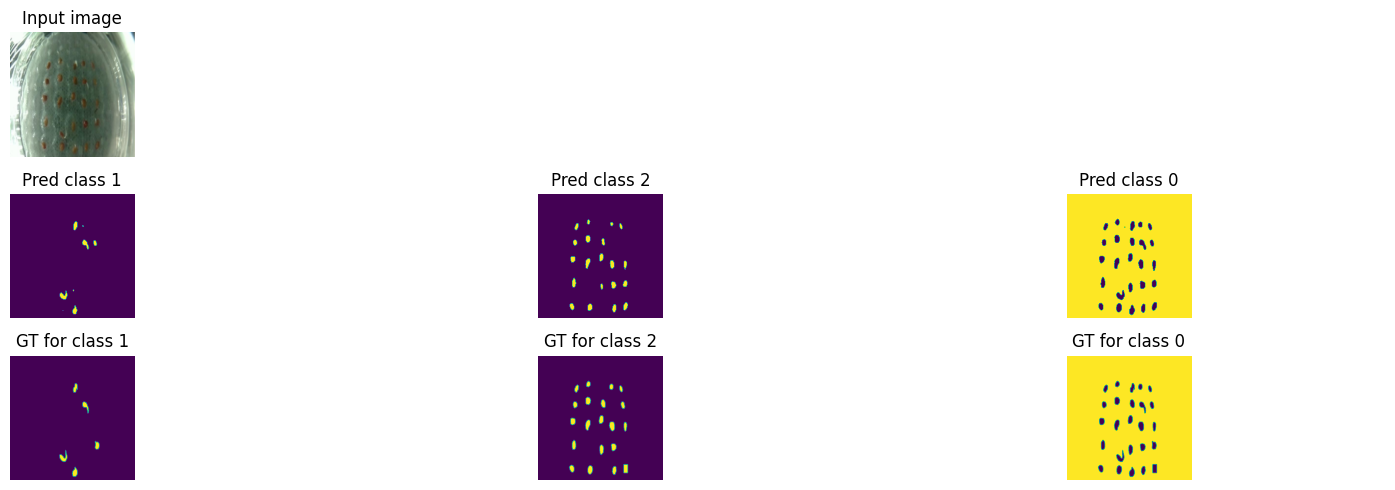

Train loss: 0.18398 | Time: 31m 55s | Val loss: 0.13142
Train_DICE_avg: 0.83311 | Train_Jaccard_avg: 0.77190 | Train_Sensitivity_avg: 0.91087 | Train_Specificity_avg: 0.93796 
Class 0 - Train_DICE: 0.99025 | Train_Jaccard: 0.98079 | Train_Sensitivity: 0.99438 | Train_Specificity: 0.82369 
Class 1 - Train_DICE: 0.65866 | Train_Jaccard: 0.58520 | Train_Sensitivity: 0.83548 | Train_Specificity: 0.99625 
Class 2 - Train_DICE: 0.85042 | Train_Jaccard: 0.74970 | Train_Sensitivity: 0.90276 | Train_Specificity: 0.99395 
Val_DICE_avg: 0.87083 | Val_Jaccard_avg: 0.81948 | Val_Sensitivity_avg: 0.93631 | Val_Specificity_avg: 0.93138 
Class 0 - Val_DICE: 0.99509 | Val_Jaccard: 0.99024 | Val_Sensitivity: 0.99807 | Val_Specificity: 0.80250 
Class 1 - Val_DICE: 0.74746 | Val_Jaccard: 0.68722 | Val_Sensitivity: 0.88275 | Val_Specificity: 0.99679 
Class 2 - Val_DICE: 0.86995 | Val_Jaccard: 0.78097 | Val_Sensitivity: 0.92810 | Val_Specificity: 0.99486 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]


Train loss: 0.18180 | Time: 32m 35s | Val loss: 0.13194
Train_DICE_avg: 0.83227 | Train_Jaccard_avg: 0.77090 | Train_Sensitivity_avg: 0.90779 | Train_Specificity_avg: 0.93943 
Class 0 - Train_DICE: 0.99012 | Train_Jaccard: 0.98053 | Train_Sensitivity: 0.99366 | Train_Specificity: 0.82808 
Class 1 - Train_DICE: 0.65601 | Train_Jaccard: 0.58216 | Train_Sensitivity: 0.82762 | Train_Specificity: 0.99619 
Class 2 - Train_DICE: 0.85067 | Train_Jaccard: 0.75000 | Train_Sensitivity: 0.90208 | Train_Specificity: 0.99402 
Val_DICE_avg: 0.86933 | Val_Jaccard_avg: 0.81796 | Val_Sensitivity_avg: 0.93923 | Val_Specificity_avg: 0.93332 
Class 0 - Val_DICE: 0.99517 | Val_Jaccard: 0.99041 | Val_Sensitivity: 0.99809 | Val_Specificity: 0.80837 
Class 1 - Val_DICE: 0.74629 | Val_Jaccard: 0.68667 | Val_Sensitivity: 0.88800 | Val_Specificity: 0.99680 
Class 2 - Val_DICE: 0.86653 | Val_Jaccard: 0.77680 | Val_Sensitivity: 0.93159 | Val_Specificity: 0.99478 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]


Train loss: 0.18152 | Time: 33m 15s | Val loss: 0.12973
Train_DICE_avg: 0.83094 | Train_Jaccard_avg: 0.76927 | Train_Sensitivity_avg: 0.90657 | Train_Specificity_avg: 0.93835 
Class 0 - Train_DICE: 0.99014 | Train_Jaccard: 0.98057 | Train_Sensitivity: 0.99412 | Train_Specificity: 0.82481 
Class 1 - Train_DICE: 0.65234 | Train_Jaccard: 0.57769 | Train_Sensitivity: 0.82418 | Train_Specificity: 0.99624 
Class 2 - Train_DICE: 0.85033 | Train_Jaccard: 0.74956 | Train_Sensitivity: 0.90141 | Train_Specificity: 0.99401 
Val_DICE_avg: 0.87207 | Val_Jaccard_avg: 0.82087 | Val_Sensitivity_avg: 0.93761 | Val_Specificity_avg: 0.93287 
Class 0 - Val_DICE: 0.99513 | Val_Jaccard: 0.99033 | Val_Sensitivity: 0.99811 | Val_Specificity: 0.80679 
Class 1 - Val_DICE: 0.75186 | Val_Jaccard: 0.69107 | Val_Sensitivity: 0.88376 | Val_Specificity: 0.99686 
Class 2 - Val_DICE: 0.86921 | Val_Jaccard: 0.78120 | Val_Sensitivity: 0.93096 | Val_Specificity: 0.99497 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]


Train loss: 0.18199 | Time: 33m 55s | Val loss: 0.13057
Train_DICE_avg: 0.83444 | Train_Jaccard_avg: 0.77298 | Train_Sensitivity_avg: 0.90812 | Train_Specificity_avg: 0.93880 
Class 0 - Train_DICE: 0.99030 | Train_Jaccard: 0.98088 | Train_Sensitivity: 0.99410 | Train_Specificity: 0.82609 
Class 1 - Train_DICE: 0.66166 | Train_Jaccard: 0.58702 | Train_Sensitivity: 0.82658 | Train_Specificity: 0.99636 
Class 2 - Train_DICE: 0.85137 | Train_Jaccard: 0.75104 | Train_Sensitivity: 0.90367 | Train_Specificity: 0.99395 
Val_DICE_avg: 0.87148 | Val_Jaccard_avg: 0.82020 | Val_Sensitivity_avg: 0.93743 | Val_Specificity_avg: 0.93163 
Class 0 - Val_DICE: 0.99503 | Val_Jaccard: 0.99014 | Val_Sensitivity: 0.99818 | Val_Specificity: 0.80309 
Class 1 - Val_DICE: 0.74919 | Val_Jaccard: 0.68836 | Val_Sensitivity: 0.88557 | Val_Specificity: 0.99679 
Class 2 - Val_DICE: 0.87024 | Val_Jaccard: 0.78209 | Val_Sensitivity: 0.92854 | Val_Specificity: 0.99501 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]


Train loss: 0.17988 | Time: 34m 35s | Val loss: 0.13213
Train_DICE_avg: 0.83236 | Train_Jaccard_avg: 0.77100 | Train_Sensitivity_avg: 0.90956 | Train_Specificity_avg: 0.94052 
Class 0 - Train_DICE: 0.99050 | Train_Jaccard: 0.98126 | Train_Sensitivity: 0.99402 | Train_Specificity: 0.83132 
Class 1 - Train_DICE: 0.65497 | Train_Jaccard: 0.58085 | Train_Sensitivity: 0.83143 | Train_Specificity: 0.99624 
Class 2 - Train_DICE: 0.85160 | Train_Jaccard: 0.75090 | Train_Sensitivity: 0.90323 | Train_Specificity: 0.99399 
Val_DICE_avg: 0.87038 | Val_Jaccard_avg: 0.81969 | Val_Sensitivity_avg: 0.93755 | Val_Specificity_avg: 0.93152 
Class 0 - Val_DICE: 0.99506 | Val_Jaccard: 0.99019 | Val_Sensitivity: 0.99815 | Val_Specificity: 0.80271 
Class 1 - Val_DICE: 0.74513 | Val_Jaccard: 0.68592 | Val_Sensitivity: 0.88634 | Val_Specificity: 0.99682 
Class 2 - Val_DICE: 0.87095 | Val_Jaccard: 0.78295 | Val_Sensitivity: 0.92817 | Val_Specificity: 0.99504 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]


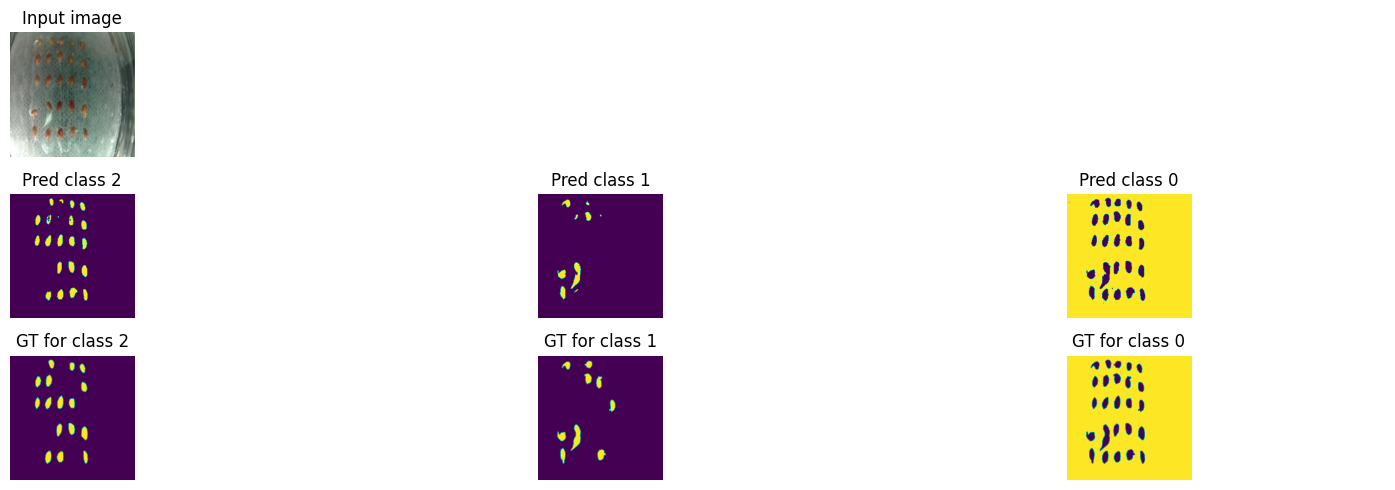

Train loss: 0.18288 | Time: 35m 16s | Val loss: 0.13086
Train_DICE_avg: 0.83416 | Train_Jaccard_avg: 0.77276 | Train_Sensitivity_avg: 0.91157 | Train_Specificity_avg: 0.93804 
Class 0 - Train_DICE: 0.99035 | Train_Jaccard: 0.98099 | Train_Sensitivity: 0.99425 | Train_Specificity: 0.82387 
Class 1 - Train_DICE: 0.66079 | Train_Jaccard: 0.58633 | Train_Sensitivity: 0.83752 | Train_Specificity: 0.99624 
Class 2 - Train_DICE: 0.85135 | Train_Jaccard: 0.75095 | Train_Sensitivity: 0.90294 | Train_Specificity: 0.99402 
Val_DICE_avg: 0.87185 | Val_Jaccard_avg: 0.82060 | Val_Sensitivity_avg: 0.93651 | Val_Specificity_avg: 0.93035 
Class 0 - Val_DICE: 0.99499 | Val_Jaccard: 0.99006 | Val_Sensitivity: 0.99825 | Val_Specificity: 0.79919 
Class 1 - Val_DICE: 0.75146 | Val_Jaccard: 0.69137 | Val_Sensitivity: 0.87953 | Val_Specificity: 0.99699 
Class 2 - Val_DICE: 0.86909 | Val_Jaccard: 0.78036 | Val_Sensitivity: 0.93176 | Val_Specificity: 0.99488 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]


Train loss: 0.17994 | Time: 35m 56s | Val loss: 0.13038
Train_DICE_avg: 0.83815 | Train_Jaccard_avg: 0.77716 | Train_Sensitivity_avg: 0.91419 | Train_Specificity_avg: 0.93990 
Class 0 - Train_DICE: 0.99052 | Train_Jaccard: 0.98131 | Train_Sensitivity: 0.99420 | Train_Specificity: 0.82935 
Class 1 - Train_DICE: 0.67129 | Train_Jaccard: 0.59745 | Train_Sensitivity: 0.84450 | Train_Specificity: 0.99629 
Class 2 - Train_DICE: 0.85263 | Train_Jaccard: 0.75273 | Train_Sensitivity: 0.90386 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.87217 | Val_Jaccard_avg: 0.82183 | Val_Sensitivity_avg: 0.93920 | Val_Specificity_avg: 0.93158 
Class 0 - Val_DICE: 0.99510 | Val_Jaccard: 0.99028 | Val_Sensitivity: 0.99817 | Val_Specificity: 0.80275 
Class 1 - Val_DICE: 0.74889 | Val_Jaccard: 0.69016 | Val_Sensitivity: 0.89029 | Val_Specificity: 0.99683 
Class 2 - Val_DICE: 0.87253 | Val_Jaccard: 0.78505 | Val_Sensitivity: 0.92914 | Val_Specificity: 0.99517 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]


Train loss: 0.18053 | Time: 36m 36s | Val loss: 0.13052
Train_DICE_avg: 0.83632 | Train_Jaccard_avg: 0.77508 | Train_Sensitivity_avg: 0.91157 | Train_Specificity_avg: 0.94028 
Class 0 - Train_DICE: 0.99051 | Train_Jaccard: 0.98128 | Train_Sensitivity: 0.99415 | Train_Specificity: 0.83053 
Class 1 - Train_DICE: 0.66612 | Train_Jaccard: 0.59139 | Train_Sensitivity: 0.83502 | Train_Specificity: 0.99631 
Class 2 - Train_DICE: 0.85233 | Train_Jaccard: 0.75255 | Train_Sensitivity: 0.90554 | Train_Specificity: 0.99399 
Val_DICE_avg: 0.87156 | Val_Jaccard_avg: 0.82058 | Val_Sensitivity_avg: 0.93844 | Val_Specificity_avg: 0.93332 
Class 0 - Val_DICE: 0.99524 | Val_Jaccard: 0.99055 | Val_Sensitivity: 0.99809 | Val_Specificity: 0.80820 
Class 1 - Val_DICE: 0.75057 | Val_Jaccard: 0.69096 | Val_Sensitivity: 0.88503 | Val_Specificity: 0.99683 
Class 2 - Val_DICE: 0.86888 | Val_Jaccard: 0.78022 | Val_Sensitivity: 0.93221 | Val_Specificity: 0.99492 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]


Train loss: 0.18231 | Time: 37m 15s | Val loss: 0.13260
Train_DICE_avg: 0.83516 | Train_Jaccard_avg: 0.77452 | Train_Sensitivity_avg: 0.91487 | Train_Specificity_avg: 0.94029 
Class 0 - Train_DICE: 0.99041 | Train_Jaccard: 0.98110 | Train_Sensitivity: 0.99398 | Train_Specificity: 0.83051 
Class 1 - Train_DICE: 0.66202 | Train_Jaccard: 0.58896 | Train_Sensitivity: 0.84855 | Train_Specificity: 0.99619 
Class 2 - Train_DICE: 0.85306 | Train_Jaccard: 0.75350 | Train_Sensitivity: 0.90206 | Train_Specificity: 0.99418 
Val_DICE_avg: 0.87001 | Val_Jaccard_avg: 0.81953 | Val_Sensitivity_avg: 0.93725 | Val_Specificity_avg: 0.92948 
Class 0 - Val_DICE: 0.99499 | Val_Jaccard: 0.99006 | Val_Sensitivity: 0.99821 | Val_Specificity: 0.79656 
Class 1 - Val_DICE: 0.74259 | Val_Jaccard: 0.68328 | Val_Sensitivity: 0.88744 | Val_Specificity: 0.99666 
Class 2 - Val_DICE: 0.87246 | Val_Jaccard: 0.78525 | Val_Sensitivity: 0.92611 | Val_Specificity: 0.99522 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]


Train loss: 0.17665 | Time: 37m 56s | Val loss: 0.12959
Train_DICE_avg: 0.83760 | Train_Jaccard_avg: 0.77650 | Train_Sensitivity_avg: 0.91538 | Train_Specificity_avg: 0.94001 
Class 0 - Train_DICE: 0.99036 | Train_Jaccard: 0.98099 | Train_Sensitivity: 0.99410 | Train_Specificity: 0.82971 
Class 1 - Train_DICE: 0.66922 | Train_Jaccard: 0.59484 | Train_Sensitivity: 0.84785 | Train_Specificity: 0.99628 
Class 2 - Train_DICE: 0.85322 | Train_Jaccard: 0.75367 | Train_Sensitivity: 0.90419 | Train_Specificity: 0.99405 
Val_DICE_avg: 0.87286 | Val_Jaccard_avg: 0.82211 | Val_Sensitivity_avg: 0.94012 | Val_Specificity_avg: 0.93287 
Class 0 - Val_DICE: 0.99518 | Val_Jaccard: 0.99044 | Val_Sensitivity: 0.99813 | Val_Specificity: 0.80678 
Class 1 - Val_DICE: 0.75139 | Val_Jaccard: 0.69225 | Val_Sensitivity: 0.89257 | Val_Specificity: 0.99686 
Class 2 - Val_DICE: 0.87202 | Val_Jaccard: 0.78364 | Val_Sensitivity: 0.92966 | Val_Specificity: 0.99497 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]


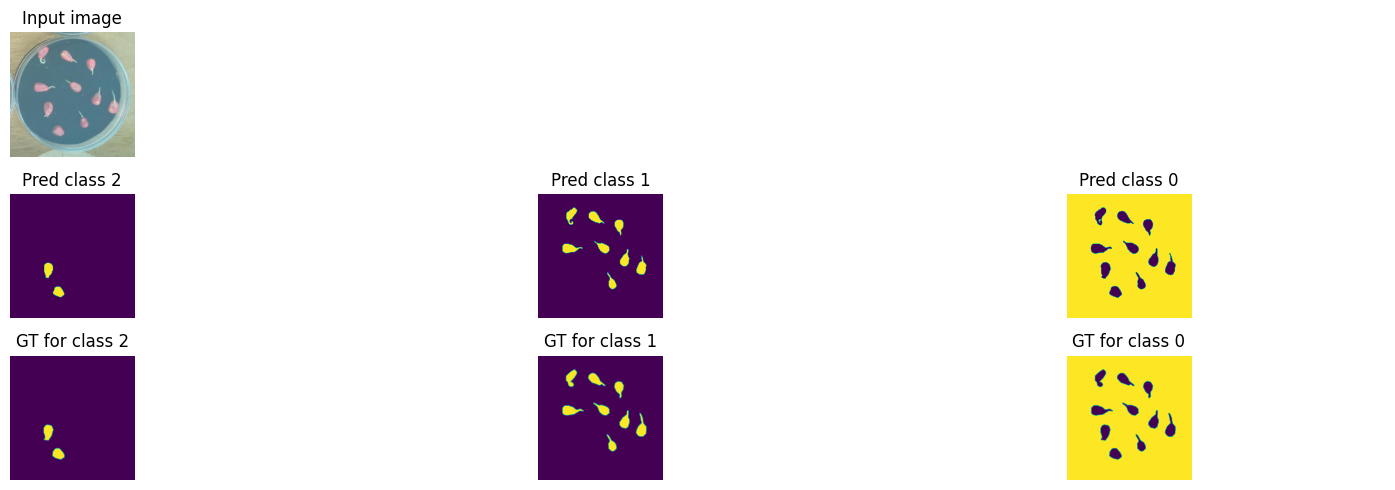

Train loss: 0.18117 | Time: 38m 36s | Val loss: 0.13019
Train_DICE_avg: 0.83754 | Train_Jaccard_avg: 0.77642 | Train_Sensitivity_avg: 0.91355 | Train_Specificity_avg: 0.93970 
Class 0 - Train_DICE: 0.99050 | Train_Jaccard: 0.98127 | Train_Sensitivity: 0.99440 | Train_Specificity: 0.82874 
Class 1 - Train_DICE: 0.66864 | Train_Jaccard: 0.59406 | Train_Sensitivity: 0.84228 | Train_Specificity: 0.99626 
Class 2 - Train_DICE: 0.85347 | Train_Jaccard: 0.75393 | Train_Sensitivity: 0.90396 | Train_Specificity: 0.99410 
Val_DICE_avg: 0.87231 | Val_Jaccard_avg: 0.82150 | Val_Sensitivity_avg: 0.93944 | Val_Specificity_avg: 0.93227 
Class 0 - Val_DICE: 0.99516 | Val_Jaccard: 0.99039 | Val_Sensitivity: 0.99813 | Val_Specificity: 0.80502 
Class 1 - Val_DICE: 0.75021 | Val_Jaccard: 0.69079 | Val_Sensitivity: 0.89016 | Val_Specificity: 0.99687 
Class 2 - Val_DICE: 0.87157 | Val_Jaccard: 0.78333 | Val_Sensitivity: 0.93002 | Val_Specificity: 0.99492 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▃▃▄▄▅▅▅▅▆▇▇▇▇▇▇▇▇▇███▇█████████████████
wandb:       Training Jaccard ▁▂▂▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇███████████████
wandb:          Training Loss █▆▆▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▂▂▂▃▄▅▅▅▆▇▇▇▇▇█████████████████████████
wandb:   Training Specificity ▁▄▆▇▇███████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
wandb:        Validation DICE ▁▁▁▂▃▄▄▅▅▅▆▆▆▇▇▇▇█▇█████████████████████
wandb:     Validation Jaccard ▁▁▂▃▃▄▄▄▄▅▆▆▆▇▇▇█▇██████████████████████
wandb:        Validation Loss ███▇▇▆▅▄▄▄▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▁▂▃▃▄▅▅▅▅▇▇█▇▇█████████████████████████
wandb: Validation Specificity ▆▆▇▇███▆▇▆▅▃▃▄▄▂▂▃▁▂▂▂▁▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.83754
wandb:       Training Jaccard 0.77642
wandb:          Training Loss 0.18


Training complete!


In [25]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [26]:
model = DeepLabV3Plus(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [27]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]



Global Performance Metrics:
Loss mean: 0.14275, std: 0.02934
Dice Coefficient mean: 0.83803, std: 0.13541
Jaccard Index mean: 0.78116, std: 0.14927
Sensitivity mean: 0.82302, std: 0.13372
Specificity mean: 0.96921, std: 0.03333

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99492, std: 0.00263
Jaccard mean: 0.98990, std: 0.00517
Sensitivity mean: 0.99274, std: 0.00388
Specificity mean: 0.91200, std: 0.10011

Class 1:
Dice mean: 0.67387, std: 0.36869
Jaccard mean: 0.61218, std: 0.37847
Sensitivity mean: 0.65644, std: 0.37615
Specificity mean: 0.99849, std: 0.00305

Class 2:
Dice mean: 0.84532, std: 0.08851
Jaccard mean: 0.74141, std: 0.12033
Sensitivity mean: 0.81989, std: 0.10562
Specificity mean: 0.99713, std: 0.00248


## MobileNetV3 backbone

### DICE Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "DICE"
config["Backbone"] = "mobilenetv3"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-DeepLabV3+-MobileNetV3-DICE"]

Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth


Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.48 GB
GPU Memory - Reserved: 1.99 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


100%|██████████| 21.1M/21.1M [00:00<00:00, 179MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251113_233625-4bomrbmg
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-DeepLabV3+-MobileNetV3-DICE
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/4bomrbmg



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


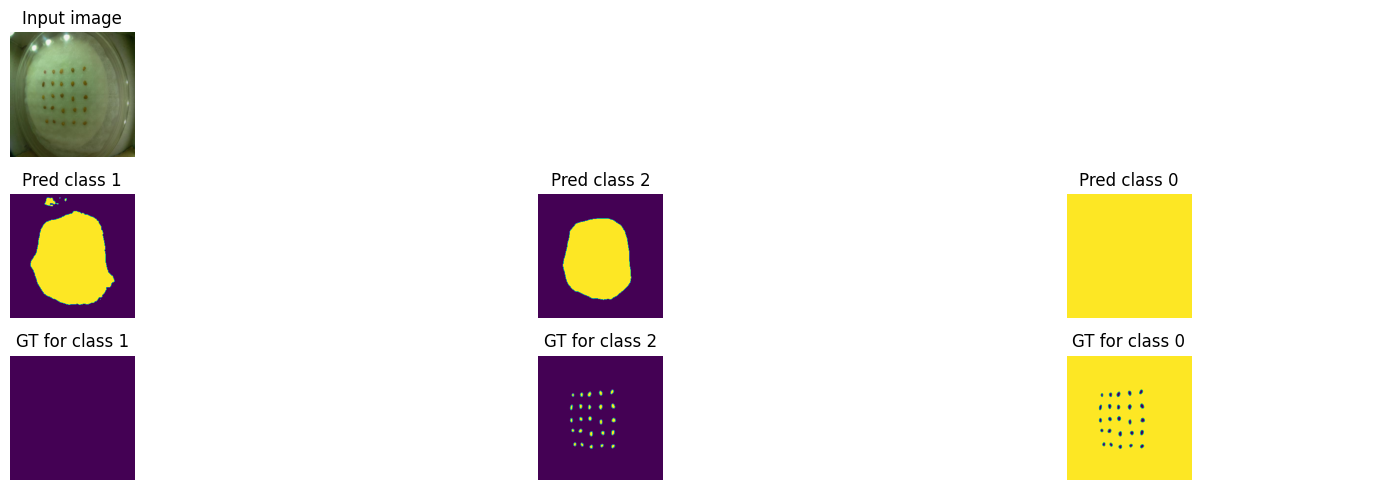

Train loss: 0.69074 | Time: 0m 27s | Val loss: 0.65969
Train_DICE_avg: 0.37236 | Train_Jaccard_avg: 0.32036 | Train_Sensitivity_avg: 0.35160 | Train_Specificity_avg: 0.74415 
Class 0 - Train_DICE: 0.91666 | Train_Jaccard: 0.85047 | Train_Sensitivity: 0.94347 | Train_Specificity: 0.23743 
Class 1 - Train_DICE: 0.03695 | Train_Jaccard: 0.01954 | Train_Sensitivity: 0.01962 | Train_Specificity: 0.99877 
Class 2 - Train_DICE: 0.16346 | Train_Jaccard: 0.09106 | Train_Sensitivity: 0.09169 | Train_Specificity: 0.99624 
Val_DICE_avg: 0.39282 | Val_Jaccard_avg: 0.35536 | Val_Sensitivity_avg: 0.35780 | Val_Specificity_avg: 0.90669 
Class 0 - Val_DICE: 0.97604 | Val_Jaccard: 0.95367 | Val_Sensitivity: 0.96076 | Val_Specificity: 0.72120 
Class 1 - Val_DICE: 0.03931 | Val_Jaccard: 0.02115 | Val_Sensitivity: 0.02119 | Val_Specificity: 0.99968 
Class 2 - Val_DICE: 0.16310 | Val_Jaccard: 0.09127 | Val_Sensitivity: 0.09146 | Val_Specificity: 0.99918 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


Train loss: 0.62572 | Time: 0m 54s | Val loss: 0.59123
Train_DICE_avg: 0.42763 | Train_Jaccard_avg: 0.37497 | Train_Sensitivity_avg: 0.38780 | Train_Specificity_avg: 0.87936 
Class 0 - Train_DICE: 0.95090 | Train_Jaccard: 0.90898 | Train_Sensitivity: 0.93446 | Train_Specificity: 0.64115 
Class 1 - Train_DICE: 0.04194 | Train_Jaccard: 0.02234 | Train_Sensitivity: 0.02242 | Train_Specificity: 0.99954 
Class 2 - Train_DICE: 0.29005 | Train_Jaccard: 0.19358 | Train_Sensitivity: 0.20652 | Train_Specificity: 0.99739 
Val_DICE_avg: 0.46257 | Val_Jaccard_avg: 0.40734 | Val_Sensitivity_avg: 0.51306 | Val_Specificity_avg: 0.98308 
Class 0 - Val_DICE: 0.97833 | Val_Jaccard: 0.95798 | Val_Sensitivity: 0.95990 | Val_Specificity: 0.96776 
Class 1 - Val_DICE: 0.05086 | Val_Jaccard: 0.02787 | Val_Sensitivity: 0.02810 | Val_Specificity: 0.99919 
Class 2 - Val_DICE: 0.35853 | Val_Jaccard: 0.23618 | Val_Sensitivity: 0.55117 | Val_Specificity: 0.98228 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]


Train loss: 0.55156 | Time: 1m 21s | Val loss: 0.56137
Train_DICE_avg: 0.50870 | Train_Jaccard_avg: 0.45054 | Train_Sensitivity_avg: 0.47422 | Train_Specificity_avg: 0.92143 
Class 0 - Train_DICE: 0.96414 | Train_Jaccard: 0.93207 | Train_Sensitivity: 0.94365 | Train_Specificity: 0.77027 
Class 1 - Train_DICE: 0.06811 | Train_Jaccard: 0.03786 | Train_Sensitivity: 0.03937 | Train_Specificity: 0.99900 
Class 2 - Train_DICE: 0.49384 | Train_Jaccard: 0.38170 | Train_Sensitivity: 0.43962 | Train_Specificity: 0.99501 
Val_DICE_avg: 0.49126 | Val_Jaccard_avg: 0.43077 | Val_Sensitivity_avg: 0.55197 | Val_Specificity_avg: 0.97951 
Class 0 - Val_DICE: 0.98207 | Val_Jaccard: 0.96511 | Val_Sensitivity: 0.96570 | Val_Specificity: 0.95911 
Class 1 - Val_DICE: 0.11760 | Val_Jaccard: 0.06931 | Val_Sensitivity: 0.09762 | Val_Specificity: 0.99585 
Class 2 - Val_DICE: 0.37410 | Val_Jaccard: 0.25789 | Val_Sensitivity: 0.59259 | Val_Specificity: 0.98358 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]


Train loss: 0.49760 | Time: 1m 48s | Val loss: 0.49881
Train_DICE_avg: 0.56471 | Train_Jaccard_avg: 0.49959 | Train_Sensitivity_avg: 0.52819 | Train_Specificity_avg: 0.94836 
Class 0 - Train_DICE: 0.97323 | Train_Jaccard: 0.94852 | Train_Sensitivity: 0.95337 | Train_Specificity: 0.85284 
Class 1 - Train_DICE: 0.14310 | Train_Jaccard: 0.08710 | Train_Sensitivity: 0.10099 | Train_Specificity: 0.99789 
Class 2 - Train_DICE: 0.57780 | Train_Jaccard: 0.46316 | Train_Sensitivity: 0.53021 | Train_Specificity: 0.99436 
Val_DICE_avg: 0.55411 | Val_Jaccard_avg: 0.48711 | Val_Sensitivity_avg: 0.61242 | Val_Specificity_avg: 0.98557 
Class 0 - Val_DICE: 0.98278 | Val_Jaccard: 0.96642 | Val_Sensitivity: 0.96667 | Val_Specificity: 0.97887 
Class 1 - Val_DICE: 0.15282 | Val_Jaccard: 0.09670 | Val_Sensitivity: 0.18645 | Val_Specificity: 0.99473 
Class 2 - Val_DICE: 0.52673 | Val_Jaccard: 0.39821 | Val_Sensitivity: 0.68413 | Val_Specificity: 0.98313 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]


Train loss: 0.44753 | Time: 2m 15s | Val loss: 0.44869
Train_DICE_avg: 0.61255 | Train_Jaccard_avg: 0.54228 | Train_Sensitivity_avg: 0.57827 | Train_Specificity_avg: 0.97094 
Class 0 - Train_DICE: 0.97441 | Train_Jaccard: 0.95073 | Train_Sensitivity: 0.95355 | Train_Specificity: 0.92052 
Class 1 - Train_DICE: 0.19858 | Train_Jaccard: 0.13047 | Train_Sensitivity: 0.16335 | Train_Specificity: 0.99744 
Class 2 - Train_DICE: 0.66466 | Train_Jaccard: 0.54563 | Train_Sensitivity: 0.61792 | Train_Specificity: 0.99487 
Val_DICE_avg: 0.59873 | Val_Jaccard_avg: 0.53334 | Val_Sensitivity_avg: 0.63816 | Val_Specificity_avg: 0.98766 
Class 0 - Val_DICE: 0.98578 | Val_Jaccard: 0.97217 | Val_Sensitivity: 0.97241 | Val_Specificity: 0.98298 
Class 1 - Val_DICE: 0.19104 | Val_Jaccard: 0.12695 | Val_Sensitivity: 0.21823 | Val_Specificity: 0.99550 
Class 2 - Val_DICE: 0.61937 | Val_Jaccard: 0.50091 | Val_Sensitivity: 0.72383 | Val_Specificity: 0.98448 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


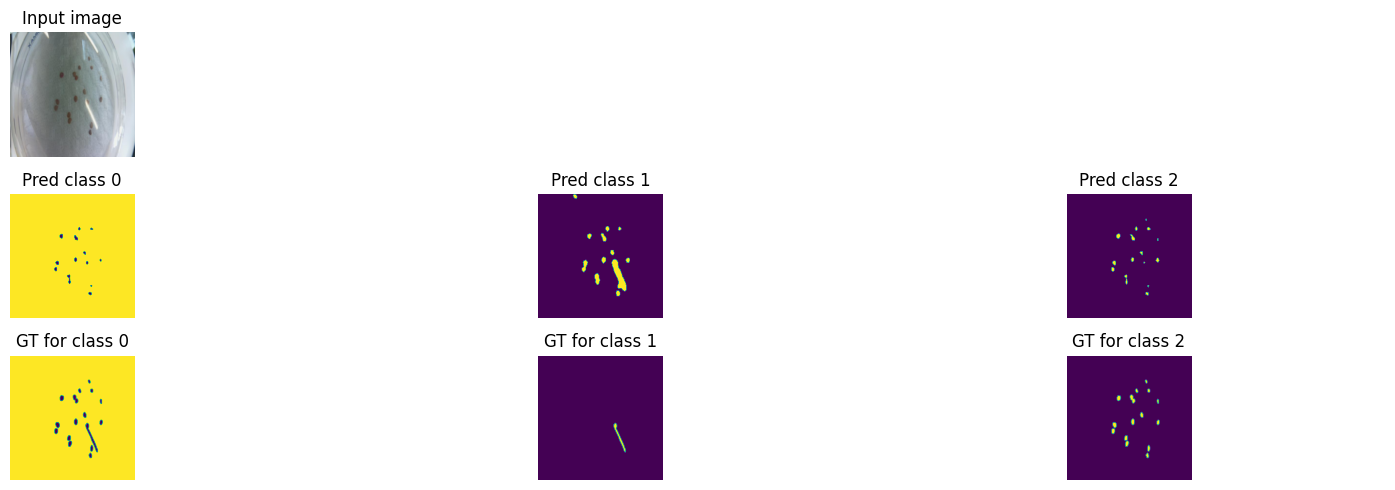

Train loss: 0.41517 | Time: 2m 42s | Val loss: 0.41112
Train_DICE_avg: 0.63323 | Train_Jaccard_avg: 0.56272 | Train_Sensitivity_avg: 0.60390 | Train_Specificity_avg: 0.97414 
Class 0 - Train_DICE: 0.97623 | Train_Jaccard: 0.95409 | Train_Sensitivity: 0.95665 | Train_Specificity: 0.93041 
Class 1 - Train_DICE: 0.23101 | Train_Jaccard: 0.15587 | Train_Sensitivity: 0.19913 | Train_Specificity: 0.99711 
Class 2 - Train_DICE: 0.69244 | Train_Jaccard: 0.57822 | Train_Sensitivity: 0.65590 | Train_Specificity: 0.99490 
Val_DICE_avg: 0.62862 | Val_Jaccard_avg: 0.56695 | Val_Sensitivity_avg: 0.64036 | Val_Specificity_avg: 0.98635 
Class 0 - Val_DICE: 0.98818 | Val_Jaccard: 0.97679 | Val_Sensitivity: 0.97721 | Val_Specificity: 0.97440 
Class 1 - Val_DICE: 0.22307 | Val_Jaccard: 0.15348 | Val_Sensitivity: 0.23020 | Val_Specificity: 0.99620 
Class 2 - Val_DICE: 0.67462 | Val_Jaccard: 0.57059 | Val_Sensitivity: 0.71366 | Val_Specificity: 0.98843 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


Train loss: 0.39560 | Time: 3m 8s | Val loss: 0.39018
Train_DICE_avg: 0.64469 | Train_Jaccard_avg: 0.57436 | Train_Sensitivity_avg: 0.61902 | Train_Specificity_avg: 0.97366 
Class 0 - Train_DICE: 0.97807 | Train_Jaccard: 0.95754 | Train_Sensitivity: 0.96005 | Train_Specificity: 0.92915 
Class 1 - Train_DICE: 0.25534 | Train_Jaccard: 0.17550 | Train_Sensitivity: 0.22877 | Train_Specificity: 0.99685 
Class 2 - Train_DICE: 0.70065 | Train_Jaccard: 0.59006 | Train_Sensitivity: 0.66823 | Train_Specificity: 0.99499 
Val_DICE_avg: 0.64557 | Val_Jaccard_avg: 0.58600 | Val_Sensitivity_avg: 0.64052 | Val_Specificity_avg: 0.98565 
Class 0 - Val_DICE: 0.99051 | Val_Jaccard: 0.98129 | Val_Sensitivity: 0.98201 | Val_Specificity: 0.96605 
Class 1 - Val_DICE: 0.25165 | Val_Jaccard: 0.17913 | Val_Sensitivity: 0.22812 | Val_Specificity: 0.99716 
Class 2 - Val_DICE: 0.69455 | Val_Jaccard: 0.59758 | Val_Sensitivity: 0.71145 | Val_Specificity: 0.99373 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


Train loss: 0.37888 | Time: 3m 34s | Val loss: 0.37922
Train_DICE_avg: 0.65575 | Train_Jaccard_avg: 0.58591 | Train_Sensitivity_avg: 0.63285 | Train_Specificity_avg: 0.97337 
Class 0 - Train_DICE: 0.97964 | Train_Jaccard: 0.96051 | Train_Sensitivity: 0.96324 | Train_Specificity: 0.92815 
Class 1 - Train_DICE: 0.27696 | Train_Jaccard: 0.19476 | Train_Sensitivity: 0.25460 | Train_Specificity: 0.99687 
Class 2 - Train_DICE: 0.71065 | Train_Jaccard: 0.60248 | Train_Sensitivity: 0.68072 | Train_Specificity: 0.99510 
Val_DICE_avg: 0.65151 | Val_Jaccard_avg: 0.59360 | Val_Sensitivity_avg: 0.63785 | Val_Specificity_avg: 0.98130 
Class 0 - Val_DICE: 0.99206 | Val_Jaccard: 0.98433 | Val_Sensitivity: 0.98564 | Val_Specificity: 0.95146 
Class 1 - Val_DICE: 0.25675 | Val_Jaccard: 0.18341 | Val_Sensitivity: 0.21429 | Val_Specificity: 0.99798 
Class 2 - Val_DICE: 0.70573 | Val_Jaccard: 0.61305 | Val_Sensitivity: 0.71361 | Val_Specificity: 0.99445 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


Train loss: 0.36813 | Time: 4m 0s | Val loss: 0.36693
Train_DICE_avg: 0.66315 | Train_Jaccard_avg: 0.59350 | Train_Sensitivity_avg: 0.64326 | Train_Specificity_avg: 0.97293 
Class 0 - Train_DICE: 0.98082 | Train_Jaccard: 0.96273 | Train_Sensitivity: 0.96567 | Train_Specificity: 0.92681 
Class 1 - Train_DICE: 0.28819 | Train_Jaccard: 0.20402 | Train_Sensitivity: 0.27077 | Train_Specificity: 0.99684 
Class 2 - Train_DICE: 0.72044 | Train_Jaccard: 0.61375 | Train_Sensitivity: 0.69335 | Train_Specificity: 0.99513 
Val_DICE_avg: 0.66202 | Val_Jaccard_avg: 0.60563 | Val_Sensitivity_avg: 0.64365 | Val_Specificity_avg: 0.97295 
Class 0 - Val_DICE: 0.99286 | Val_Jaccard: 0.98588 | Val_Sensitivity: 0.98760 | Val_Specificity: 0.92507 
Class 1 - Val_DICE: 0.27893 | Val_Jaccard: 0.20476 | Val_Sensitivity: 0.25604 | Val_Specificity: 0.99737 
Class 2 - Val_DICE: 0.71428 | Val_Jaccard: 0.62625 | Val_Sensitivity: 0.68732 | Val_Specificity: 0.99643 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


Train loss: 0.35778 | Time: 4m 25s | Val loss: 0.36023
Train_DICE_avg: 0.67175 | Train_Jaccard_avg: 0.60099 | Train_Sensitivity_avg: 0.65257 | Train_Specificity_avg: 0.97200 
Class 0 - Train_DICE: 0.98118 | Train_Jaccard: 0.96341 | Train_Sensitivity: 0.96641 | Train_Specificity: 0.92386 
Class 1 - Train_DICE: 0.29649 | Train_Jaccard: 0.21127 | Train_Sensitivity: 0.28247 | Train_Specificity: 0.99679 
Class 2 - Train_DICE: 0.73756 | Train_Jaccard: 0.62828 | Train_Sensitivity: 0.70883 | Train_Specificity: 0.99534 
Val_DICE_avg: 0.66942 | Val_Jaccard_avg: 0.61141 | Val_Sensitivity_avg: 0.65140 | Val_Specificity_avg: 0.97858 
Class 0 - Val_DICE: 0.99249 | Val_Jaccard: 0.98516 | Val_Sensitivity: 0.98655 | Val_Specificity: 0.94226 
Class 1 - Val_DICE: 0.29024 | Val_Jaccard: 0.21439 | Val_Sensitivity: 0.25684 | Val_Specificity: 0.99774 
Class 2 - Val_DICE: 0.72552 | Val_Jaccard: 0.63467 | Val_Sensitivity: 0.71080 | Val_Specificity: 0.99574 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]


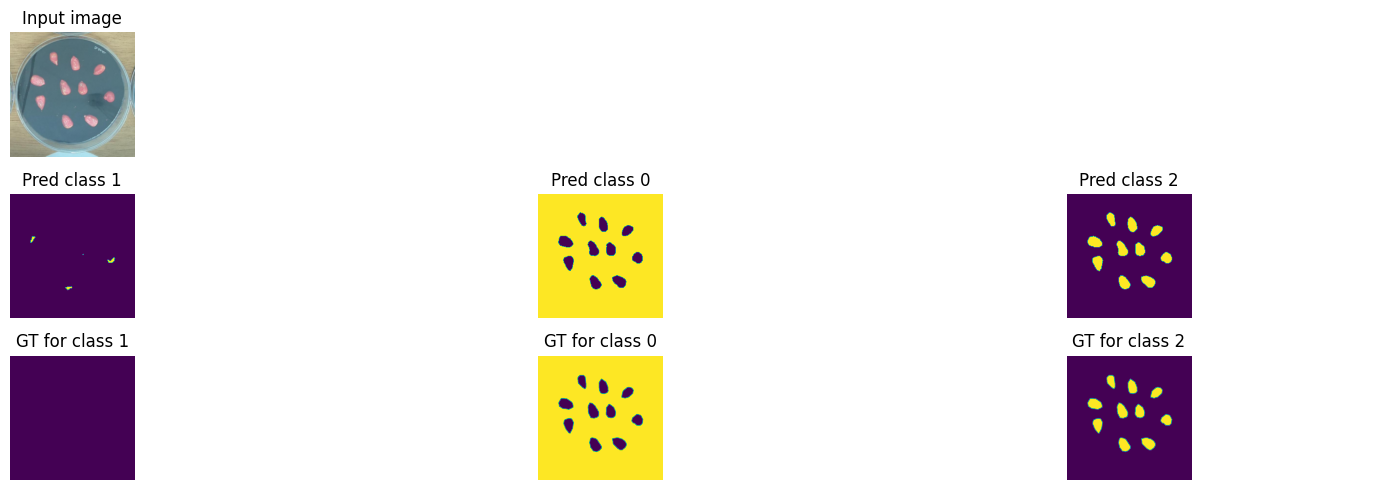

Train loss: 0.33483 | Time: 4m 53s | Val loss: 0.32115
Train_DICE_avg: 0.69485 | Train_Jaccard_avg: 0.62000 | Train_Sensitivity_avg: 0.67728 | Train_Specificity_avg: 0.97036 
Class 0 - Train_DICE: 0.98117 | Train_Jaccard: 0.96339 | Train_Sensitivity: 0.96653 | Train_Specificity: 0.91893 
Class 1 - Train_DICE: 0.30719 | Train_Jaccard: 0.22108 | Train_Sensitivity: 0.29743 | Train_Specificity: 0.99688 
Class 2 - Train_DICE: 0.79619 | Train_Jaccard: 0.67554 | Train_Sensitivity: 0.76789 | Train_Specificity: 0.99526 
Val_DICE_avg: 0.70626 | Val_Jaccard_avg: 0.64231 | Val_Sensitivity_avg: 0.68488 | Val_Specificity_avg: 0.96645 
Class 0 - Val_DICE: 0.99377 | Val_Jaccard: 0.98767 | Val_Sensitivity: 0.98993 | Val_Specificity: 0.90552 
Class 1 - Val_DICE: 0.29849 | Val_Jaccard: 0.22049 | Val_Sensitivity: 0.26169 | Val_Specificity: 0.99779 
Class 2 - Val_DICE: 0.82652 | Val_Jaccard: 0.71877 | Val_Sensitivity: 0.80302 | Val_Specificity: 0.99604 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]


Train loss: 0.32182 | Time: 5m 18s | Val loss: 0.31261
Train_DICE_avg: 0.70197 | Train_Jaccard_avg: 0.62793 | Train_Sensitivity_avg: 0.68661 | Train_Specificity_avg: 0.96667 
Class 0 - Train_DICE: 0.98297 | Train_Jaccard: 0.96680 | Train_Sensitivity: 0.97058 | Train_Specificity: 0.90794 
Class 1 - Train_DICE: 0.31594 | Train_Jaccard: 0.22917 | Train_Sensitivity: 0.30602 | Train_Specificity: 0.99691 
Class 2 - Train_DICE: 0.80699 | Train_Jaccard: 0.68782 | Train_Sensitivity: 0.78324 | Train_Specificity: 0.99516 
Val_DICE_avg: 0.71632 | Val_Jaccard_avg: 0.65362 | Val_Sensitivity_avg: 0.70468 | Val_Specificity_avg: 0.96265 
Class 0 - Val_DICE: 0.99409 | Val_Jaccard: 0.98829 | Val_Sensitivity: 0.99102 | Val_Specificity: 0.89436 
Class 1 - Val_DICE: 0.32190 | Val_Jaccard: 0.24574 | Val_Sensitivity: 0.30605 | Val_Specificity: 0.99755 
Class 2 - Val_DICE: 0.83299 | Val_Jaccard: 0.72683 | Val_Sensitivity: 0.81697 | Val_Specificity: 0.99603 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]


Train loss: 0.31419 | Time: 5m 45s | Val loss: 0.30573
Train_DICE_avg: 0.70706 | Train_Jaccard_avg: 0.63361 | Train_Sensitivity_avg: 0.69501 | Train_Specificity_avg: 0.96196 
Class 0 - Train_DICE: 0.98353 | Train_Jaccard: 0.96786 | Train_Sensitivity: 0.97266 | Train_Specificity: 0.89390 
Class 1 - Train_DICE: 0.32469 | Train_Jaccard: 0.23751 | Train_Sensitivity: 0.31827 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.81296 | Train_Jaccard: 0.69548 | Train_Sensitivity: 0.79411 | Train_Specificity: 0.99504 
Val_DICE_avg: 0.71869 | Val_Jaccard_avg: 0.65589 | Val_Sensitivity_avg: 0.71057 | Val_Specificity_avg: 0.95665 
Class 0 - Val_DICE: 0.99428 | Val_Jaccard: 0.98866 | Val_Sensitivity: 0.99201 | Val_Specificity: 0.87653 
Class 1 - Val_DICE: 0.32588 | Val_Jaccard: 0.24789 | Val_Sensitivity: 0.31442 | Val_Specificity: 0.99752 
Class 2 - Val_DICE: 0.83593 | Val_Jaccard: 0.73112 | Val_Sensitivity: 0.82529 | Val_Specificity: 0.99590 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


Train loss: 0.31030 | Time: 6m 11s | Val loss: 0.30203
Train_DICE_avg: 0.70955 | Train_Jaccard_avg: 0.63626 | Train_Sensitivity_avg: 0.69918 | Train_Specificity_avg: 0.96007 
Class 0 - Train_DICE: 0.98423 | Train_Jaccard: 0.96920 | Train_Sensitivity: 0.97436 | Train_Specificity: 0.88811 
Class 1 - Train_DICE: 0.32903 | Train_Jaccard: 0.24080 | Train_Sensitivity: 0.32690 | Train_Specificity: 0.99697 
Class 2 - Train_DICE: 0.81539 | Train_Jaccard: 0.69877 | Train_Sensitivity: 0.79628 | Train_Specificity: 0.99514 
Val_DICE_avg: 0.72778 | Val_Jaccard_avg: 0.66563 | Val_Sensitivity_avg: 0.71162 | Val_Specificity_avg: 0.95302 
Class 0 - Val_DICE: 0.99462 | Val_Jaccard: 0.98933 | Val_Sensitivity: 0.99321 | Val_Specificity: 0.86486 
Class 1 - Val_DICE: 0.34943 | Val_Jaccard: 0.27159 | Val_Sensitivity: 0.32652 | Val_Specificity: 0.99782 
Class 2 - Val_DICE: 0.83931 | Val_Jaccard: 0.73596 | Val_Sensitivity: 0.81512 | Val_Specificity: 0.99638 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


Train loss: 0.30373 | Time: 6m 38s | Val loss: 0.29028
Train_DICE_avg: 0.71688 | Train_Jaccard_avg: 0.64413 | Train_Sensitivity_avg: 0.70719 | Train_Specificity_avg: 0.95874 
Class 0 - Train_DICE: 0.98539 | Train_Jaccard: 0.97142 | Train_Sensitivity: 0.97697 | Train_Specificity: 0.88406 
Class 1 - Train_DICE: 0.34573 | Train_Jaccard: 0.25652 | Train_Sensitivity: 0.34499 | Train_Specificity: 0.99692 
Class 2 - Train_DICE: 0.81951 | Train_Jaccard: 0.70445 | Train_Sensitivity: 0.79962 | Train_Specificity: 0.99523 
Val_DICE_avg: 0.75611 | Val_Jaccard_avg: 0.69424 | Val_Sensitivity_avg: 0.75542 | Val_Specificity_avg: 0.95610 
Class 0 - Val_DICE: 0.99471 | Val_Jaccard: 0.98950 | Val_Sensitivity: 0.99322 | Val_Specificity: 0.87475 
Class 1 - Val_DICE: 0.42960 | Val_Jaccard: 0.35093 | Val_Sensitivity: 0.44028 | Val_Specificity: 0.99735 
Class 2 - Val_DICE: 0.84402 | Val_Jaccard: 0.74230 | Val_Sensitivity: 0.83277 | Val_Specificity: 0.99621 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


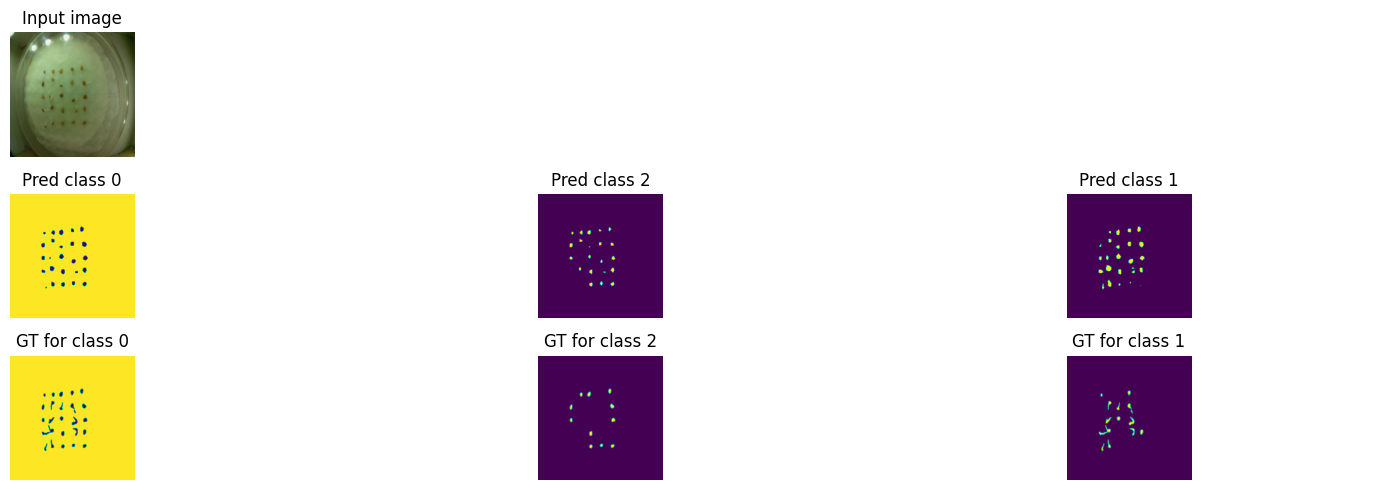

Train loss: 0.29561 | Time: 7m 5s | Val loss: 0.25087
Train_DICE_avg: 0.73368 | Train_Jaccard_avg: 0.66209 | Train_Sensitivity_avg: 0.73270 | Train_Specificity_avg: 0.96016 
Class 0 - Train_DICE: 0.98525 | Train_Jaccard: 0.97115 | Train_Sensitivity: 0.97643 | Train_Specificity: 0.88837 
Class 1 - Train_DICE: 0.39538 | Train_Jaccard: 0.30904 | Train_Sensitivity: 0.41728 | Train_Specificity: 0.99684 
Class 2 - Train_DICE: 0.82041 | Train_Jaccard: 0.70606 | Train_Sensitivity: 0.80439 | Train_Specificity: 0.99526 
Val_DICE_avg: 0.77620 | Val_Jaccard_avg: 0.71462 | Val_Sensitivity_avg: 0.77333 | Val_Specificity_avg: 0.95421 
Class 0 - Val_DICE: 0.99490 | Val_Jaccard: 0.98988 | Val_Sensitivity: 0.99396 | Val_Specificity: 0.86875 
Class 1 - Val_DICE: 0.49290 | Val_Jaccard: 0.41437 | Val_Sensitivity: 0.48419 | Val_Specificity: 0.99793 
Class 2 - Val_DICE: 0.84079 | Val_Jaccard: 0.73961 | Val_Sensitivity: 0.84185 | Val_Specificity: 0.99595 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


Train loss: 0.28340 | Time: 7m 31s | Val loss: 0.23217
Train_DICE_avg: 0.74404 | Train_Jaccard_avg: 0.67226 | Train_Sensitivity_avg: 0.74604 | Train_Specificity_avg: 0.95921 
Class 0 - Train_DICE: 0.98531 | Train_Jaccard: 0.97127 | Train_Sensitivity: 0.97670 | Train_Specificity: 0.88580 
Class 1 - Train_DICE: 0.42656 | Train_Jaccard: 0.33940 | Train_Sensitivity: 0.45756 | Train_Specificity: 0.99663 
Class 2 - Train_DICE: 0.82027 | Train_Jaccard: 0.70610 | Train_Sensitivity: 0.80385 | Train_Specificity: 0.99521 
Val_DICE_avg: 0.78990 | Val_Jaccard_avg: 0.73065 | Val_Sensitivity_avg: 0.80536 | Val_Specificity_avg: 0.95635 
Class 0 - Val_DICE: 0.99484 | Val_Jaccard: 0.98977 | Val_Sensitivity: 0.99361 | Val_Specificity: 0.87584 
Class 1 - Val_DICE: 0.52835 | Val_Jaccard: 0.45637 | Val_Sensitivity: 0.59384 | Val_Specificity: 0.99663 
Class 2 - Val_DICE: 0.84651 | Val_Jaccard: 0.74583 | Val_Sensitivity: 0.82862 | Val_Specificity: 0.99657 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]


Train loss: 0.27693 | Time: 7m 58s | Val loss: 0.23329
Train_DICE_avg: 0.74946 | Train_Jaccard_avg: 0.67917 | Train_Sensitivity_avg: 0.75647 | Train_Specificity_avg: 0.95867 
Class 0 - Train_DICE: 0.98567 | Train_Jaccard: 0.97196 | Train_Sensitivity: 0.97776 | Train_Specificity: 0.88410 
Class 1 - Train_DICE: 0.43959 | Train_Jaccard: 0.35538 | Train_Sensitivity: 0.48583 | Train_Specificity: 0.99656 
Class 2 - Train_DICE: 0.82311 | Train_Jaccard: 0.71017 | Train_Sensitivity: 0.80582 | Train_Specificity: 0.99535 
Val_DICE_avg: 0.79014 | Val_Jaccard_avg: 0.73014 | Val_Sensitivity_avg: 0.79645 | Val_Specificity_avg: 0.95194 
Class 0 - Val_DICE: 0.99501 | Val_Jaccard: 0.99009 | Val_Sensitivity: 0.99447 | Val_Specificity: 0.86190 
Class 1 - Val_DICE: 0.52769 | Val_Jaccard: 0.45256 | Val_Sensitivity: 0.56916 | Val_Specificity: 0.99723 
Class 2 - Val_DICE: 0.84772 | Val_Jaccard: 0.74775 | Val_Sensitivity: 0.82572 | Val_Specificity: 0.99668 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]


Train loss: 0.26409 | Time: 8m 26s | Val loss: 0.18633
Train_DICE_avg: 0.77067 | Train_Jaccard_avg: 0.70105 | Train_Sensitivity_avg: 0.78750 | Train_Specificity_avg: 0.95945 
Class 0 - Train_DICE: 0.98577 | Train_Jaccard: 0.97213 | Train_Sensitivity: 0.97782 | Train_Specificity: 0.88639 
Class 1 - Train_DICE: 0.50220 | Train_Jaccard: 0.41978 | Train_Sensitivity: 0.57687 | Train_Specificity: 0.99667 
Class 2 - Train_DICE: 0.82403 | Train_Jaccard: 0.71122 | Train_Sensitivity: 0.80783 | Train_Specificity: 0.99530 
Val_DICE_avg: 0.83839 | Val_Jaccard_avg: 0.78154 | Val_Sensitivity_avg: 0.87756 | Val_Specificity_avg: 0.95863 
Class 0 - Val_DICE: 0.99503 | Val_Jaccard: 0.99013 | Val_Sensitivity: 0.99373 | Val_Specificity: 0.88300 
Class 1 - Val_DICE: 0.67537 | Val_Jaccard: 0.61081 | Val_Sensitivity: 0.78711 | Val_Specificity: 0.99716 
Class 2 - Val_DICE: 0.84478 | Val_Jaccard: 0.74369 | Val_Sensitivity: 0.85183 | Val_Specificity: 0.99573 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]


Train loss: 0.24351 | Time: 8m 54s | Val loss: 0.18258
Train_DICE_avg: 0.79667 | Train_Jaccard_avg: 0.73018 | Train_Sensitivity_avg: 0.83775 | Train_Specificity_avg: 0.96007 
Class 0 - Train_DICE: 0.98564 | Train_Jaccard: 0.97190 | Train_Sensitivity: 0.97764 | Train_Specificity: 0.88859 
Class 1 - Train_DICE: 0.58075 | Train_Jaccard: 0.50770 | Train_Sensitivity: 0.72710 | Train_Specificity: 0.99631 
Class 2 - Train_DICE: 0.82362 | Train_Jaccard: 0.71094 | Train_Sensitivity: 0.80851 | Train_Specificity: 0.99530 
Val_DICE_avg: 0.83435 | Val_Jaccard_avg: 0.78023 | Val_Sensitivity_avg: 0.87693 | Val_Specificity_avg: 0.95252 
Class 0 - Val_DICE: 0.99515 | Val_Jaccard: 0.99037 | Val_Sensitivity: 0.99492 | Val_Specificity: 0.86404 
Class 1 - Val_DICE: 0.66141 | Val_Jaccard: 0.60393 | Val_Sensitivity: 0.80057 | Val_Specificity: 0.99715 
Class 2 - Val_DICE: 0.84650 | Val_Jaccard: 0.74640 | Val_Sensitivity: 0.83530 | Val_Specificity: 0.99637 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


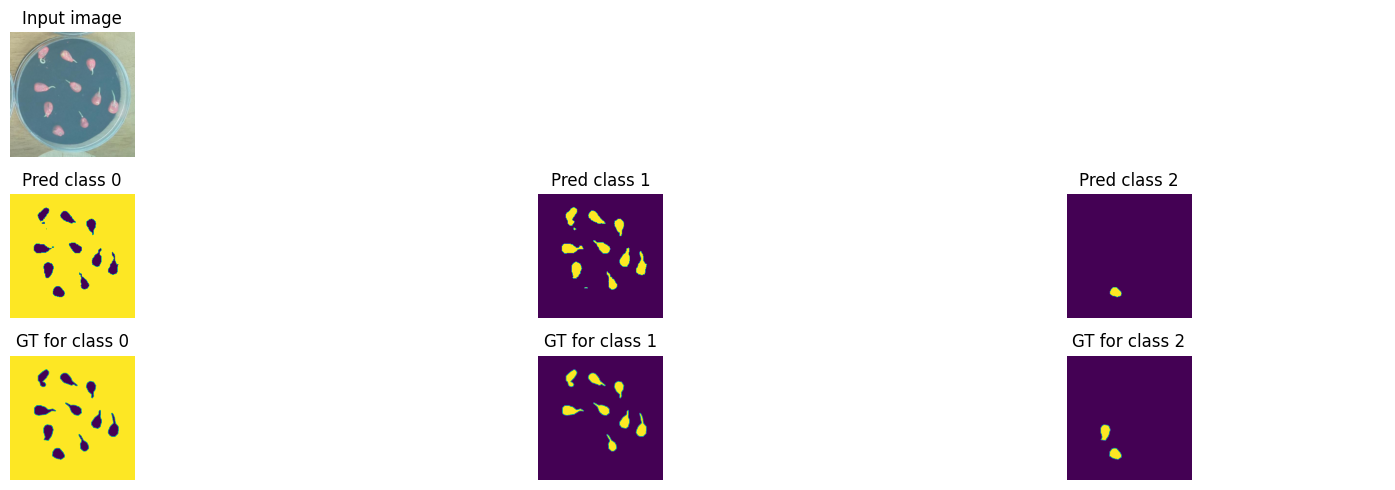

Train loss: 0.23538 | Time: 9m 23s | Val loss: 0.17341
Train_DICE_avg: 0.80300 | Train_Jaccard_avg: 0.73701 | Train_Sensitivity_avg: 0.84600 | Train_Specificity_avg: 0.95809 
Class 0 - Train_DICE: 0.98611 | Train_Jaccard: 0.97280 | Train_Sensitivity: 0.97904 | Train_Specificity: 0.88247 
Class 1 - Train_DICE: 0.59556 | Train_Jaccard: 0.52232 | Train_Sensitivity: 0.74682 | Train_Specificity: 0.99641 
Class 2 - Train_DICE: 0.82733 | Train_Jaccard: 0.71590 | Train_Sensitivity: 0.81214 | Train_Specificity: 0.99540 
Val_DICE_avg: 0.84345 | Val_Jaccard_avg: 0.78922 | Val_Sensitivity_avg: 0.88250 | Val_Specificity_avg: 0.95391 
Class 0 - Val_DICE: 0.99525 | Val_Jaccard: 0.99057 | Val_Sensitivity: 0.99501 | Val_Specificity: 0.86829 
Class 1 - Val_DICE: 0.68597 | Val_Jaccard: 0.62598 | Val_Sensitivity: 0.79428 | Val_Specificity: 0.99740 
Class 2 - Val_DICE: 0.84914 | Val_Jaccard: 0.75109 | Val_Sensitivity: 0.85822 | Val_Specificity: 0.99603 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]


Train loss: 0.23170 | Time: 9m 50s | Val loss: 0.17397
Train_DICE_avg: 0.80712 | Train_Jaccard_avg: 0.74238 | Train_Sensitivity_avg: 0.85633 | Train_Specificity_avg: 0.95688 
Class 0 - Train_DICE: 0.98668 | Train_Jaccard: 0.97390 | Train_Sensitivity: 0.98023 | Train_Specificity: 0.87892 
Class 1 - Train_DICE: 0.60593 | Train_Jaccard: 0.53517 | Train_Sensitivity: 0.77206 | Train_Specificity: 0.99635 
Class 2 - Train_DICE: 0.82874 | Train_Jaccard: 0.71806 | Train_Sensitivity: 0.81670 | Train_Specificity: 0.99536 
Val_DICE_avg: 0.83990 | Val_Jaccard_avg: 0.78625 | Val_Sensitivity_avg: 0.88054 | Val_Specificity_avg: 0.94683 
Class 0 - Val_DICE: 0.99511 | Val_Jaccard: 0.99029 | Val_Sensitivity: 0.99568 | Val_Specificity: 0.84666 
Class 1 - Val_DICE: 0.67293 | Val_Jaccard: 0.61480 | Val_Sensitivity: 0.80924 | Val_Specificity: 0.99718 
Class 2 - Val_DICE: 0.85167 | Val_Jaccard: 0.75365 | Val_Sensitivity: 0.83669 | Val_Specificity: 0.99665 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


Train loss: 0.22968 | Time: 10m 17s | Val loss: 0.17391
Train_DICE_avg: 0.80952 | Train_Jaccard_avg: 0.74408 | Train_Sensitivity_avg: 0.85298 | Train_Specificity_avg: 0.95589 
Class 0 - Train_DICE: 0.98679 | Train_Jaccard: 0.97409 | Train_Sensitivity: 0.98090 | Train_Specificity: 0.87580 
Class 1 - Train_DICE: 0.61324 | Train_Jaccard: 0.53986 | Train_Sensitivity: 0.76491 | Train_Specificity: 0.99638 
Class 2 - Train_DICE: 0.82852 | Train_Jaccard: 0.71828 | Train_Sensitivity: 0.81312 | Train_Specificity: 0.99550 
Val_DICE_avg: 0.84082 | Val_Jaccard_avg: 0.78862 | Val_Sensitivity_avg: 0.88977 | Val_Specificity_avg: 0.94799 
Class 0 - Val_DICE: 0.99525 | Val_Jaccard: 0.99058 | Val_Sensitivity: 0.99567 | Val_Specificity: 0.85035 
Class 1 - Val_DICE: 0.67398 | Val_Jaccard: 0.61935 | Val_Sensitivity: 0.84190 | Val_Specificity: 0.99688 
Class 2 - Val_DICE: 0.85323 | Val_Jaccard: 0.75592 | Val_Sensitivity: 0.83174 | Val_Specificity: 0.99672 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


Train loss: 0.22567 | Time: 10m 44s | Val loss: 0.16406
Train_DICE_avg: 0.81425 | Train_Jaccard_avg: 0.74891 | Train_Sensitivity_avg: 0.85447 | Train_Specificity_avg: 0.95613 
Class 0 - Train_DICE: 0.98709 | Train_Jaccard: 0.97468 | Train_Sensitivity: 0.98126 | Train_Specificity: 0.87631 
Class 1 - Train_DICE: 0.62311 | Train_Jaccard: 0.54888 | Train_Sensitivity: 0.76455 | Train_Specificity: 0.99658 
Class 2 - Train_DICE: 0.83254 | Train_Jaccard: 0.72318 | Train_Sensitivity: 0.81760 | Train_Specificity: 0.99550 
Val_DICE_avg: 0.85001 | Val_Jaccard_avg: 0.79532 | Val_Sensitivity_avg: 0.88525 | Val_Specificity_avg: 0.95008 
Class 0 - Val_DICE: 0.99539 | Val_Jaccard: 0.99085 | Val_Sensitivity: 0.99564 | Val_Specificity: 0.85651 
Class 1 - Val_DICE: 0.70045 | Val_Jaccard: 0.63704 | Val_Sensitivity: 0.80486 | Val_Specificity: 0.99749 
Class 2 - Val_DICE: 0.85417 | Val_Jaccard: 0.75807 | Val_Sensitivity: 0.85525 | Val_Specificity: 0.99623 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Train loss: 0.22284 | Time: 11m 12s | Val loss: 0.16725
Train_DICE_avg: 0.81414 | Train_Jaccard_avg: 0.74934 | Train_Sensitivity_avg: 0.85769 | Train_Specificity_avg: 0.95536 
Class 0 - Train_DICE: 0.98724 | Train_Jaccard: 0.97497 | Train_Sensitivity: 0.98184 | Train_Specificity: 0.87393 
Class 1 - Train_DICE: 0.62237 | Train_Jaccard: 0.54912 | Train_Sensitivity: 0.77264 | Train_Specificity: 0.99660 
Class 2 - Train_DICE: 0.83282 | Train_Jaccard: 0.72394 | Train_Sensitivity: 0.81859 | Train_Specificity: 0.99555 
Val_DICE_avg: 0.84580 | Val_Jaccard_avg: 0.79101 | Val_Sensitivity_avg: 0.87572 | Val_Specificity_avg: 0.94772 
Class 0 - Val_DICE: 0.99534 | Val_Jaccard: 0.99075 | Val_Sensitivity: 0.99597 | Val_Specificity: 0.84911 
Class 1 - Val_DICE: 0.68739 | Val_Jaccard: 0.62395 | Val_Sensitivity: 0.78381 | Val_Specificity: 0.99757 
Class 2 - Val_DICE: 0.85467 | Val_Jaccard: 0.75833 | Val_Sensitivity: 0.84738 | Val_Specificity: 0.99647 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]


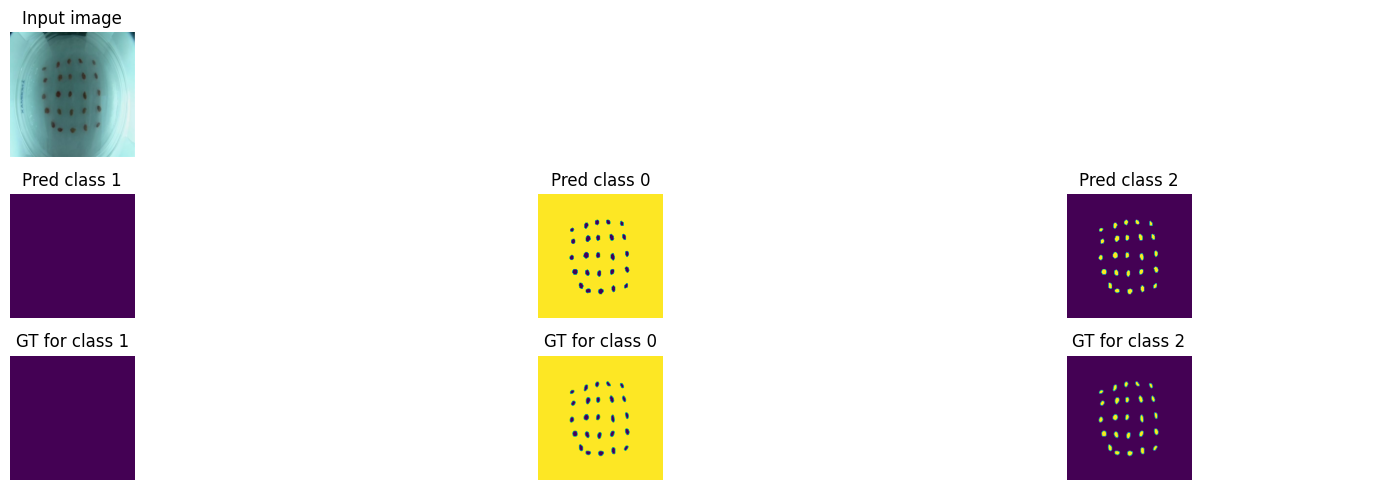

Train loss: 0.21978 | Time: 11m 41s | Val loss: 0.16023
Train_DICE_avg: 0.81816 | Train_Jaccard_avg: 0.75321 | Train_Sensitivity_avg: 0.86049 | Train_Specificity_avg: 0.95696 
Class 0 - Train_DICE: 0.98709 | Train_Jaccard: 0.97469 | Train_Sensitivity: 0.98150 | Train_Specificity: 0.87884 
Class 1 - Train_DICE: 0.63281 | Train_Jaccard: 0.55888 | Train_Sensitivity: 0.77733 | Train_Specificity: 0.99658 
Class 2 - Train_DICE: 0.83456 | Train_Jaccard: 0.72607 | Train_Sensitivity: 0.82266 | Train_Specificity: 0.99544 
Val_DICE_avg: 0.85387 | Val_Jaccard_avg: 0.79990 | Val_Sensitivity_avg: 0.88580 | Val_Specificity_avg: 0.94700 
Class 0 - Val_DICE: 0.99534 | Val_Jaccard: 0.99074 | Val_Sensitivity: 0.99594 | Val_Specificity: 0.84685 
Class 1 - Val_DICE: 0.70732 | Val_Jaccard: 0.64491 | Val_Sensitivity: 0.82367 | Val_Specificity: 0.99727 
Class 2 - Val_DICE: 0.85895 | Val_Jaccard: 0.76403 | Val_Sensitivity: 0.83778 | Val_Specificity: 0.99688 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


Train loss: 0.21924 | Time: 12m 8s | Val loss: 0.16569
Train_DICE_avg: 0.81977 | Train_Jaccard_avg: 0.75546 | Train_Sensitivity_avg: 0.86279 | Train_Specificity_avg: 0.95430 
Class 0 - Train_DICE: 0.98765 | Train_Jaccard: 0.97576 | Train_Sensitivity: 0.98288 | Train_Specificity: 0.87069 
Class 1 - Train_DICE: 0.63439 | Train_Jaccard: 0.56095 | Train_Sensitivity: 0.78341 | Train_Specificity: 0.99655 
Class 2 - Train_DICE: 0.83727 | Train_Jaccard: 0.72966 | Train_Sensitivity: 0.82206 | Train_Specificity: 0.99567 
Val_DICE_avg: 0.84790 | Val_Jaccard_avg: 0.79523 | Val_Sensitivity_avg: 0.89432 | Val_Specificity_avg: 0.95050 
Class 0 - Val_DICE: 0.99541 | Val_Jaccard: 0.99090 | Val_Sensitivity: 0.99567 | Val_Specificity: 0.85824 
Class 1 - Val_DICE: 0.69138 | Val_Jaccard: 0.63343 | Val_Sensitivity: 0.84574 | Val_Specificity: 0.99667 
Class 2 - Val_DICE: 0.85689 | Val_Jaccard: 0.76137 | Val_Sensitivity: 0.84155 | Val_Specificity: 0.99659 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


Train loss: 0.21959 | Time: 12m 36s | Val loss: 0.15917
Train_DICE_avg: 0.81769 | Train_Jaccard_avg: 0.75378 | Train_Sensitivity_avg: 0.86288 | Train_Specificity_avg: 0.95683 
Class 0 - Train_DICE: 0.98750 | Train_Jaccard: 0.97547 | Train_Sensitivity: 0.98228 | Train_Specificity: 0.87831 
Class 1 - Train_DICE: 0.62812 | Train_Jaccard: 0.55571 | Train_Sensitivity: 0.78148 | Train_Specificity: 0.99658 
Class 2 - Train_DICE: 0.83744 | Train_Jaccard: 0.73014 | Train_Sensitivity: 0.82488 | Train_Specificity: 0.99559 
Val_DICE_avg: 0.85519 | Val_Jaccard_avg: 0.80269 | Val_Sensitivity_avg: 0.88967 | Val_Specificity_avg: 0.94520 
Class 0 - Val_DICE: 0.99537 | Val_Jaccard: 0.99081 | Val_Sensitivity: 0.99630 | Val_Specificity: 0.84137 
Class 1 - Val_DICE: 0.70820 | Val_Jaccard: 0.64811 | Val_Sensitivity: 0.82515 | Val_Specificity: 0.99741 
Class 2 - Val_DICE: 0.86199 | Val_Jaccard: 0.76915 | Val_Sensitivity: 0.84756 | Val_Specificity: 0.99681 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


Train loss: 0.21492 | Time: 13m 3s | Val loss: 0.15925
Train_DICE_avg: 0.82217 | Train_Jaccard_avg: 0.75845 | Train_Sensitivity_avg: 0.86532 | Train_Specificity_avg: 0.95458 
Class 0 - Train_DICE: 0.98788 | Train_Jaccard: 0.97621 | Train_Sensitivity: 0.98346 | Train_Specificity: 0.87140 
Class 1 - Train_DICE: 0.63986 | Train_Jaccard: 0.56707 | Train_Sensitivity: 0.78797 | Train_Specificity: 0.99667 
Class 2 - Train_DICE: 0.83877 | Train_Jaccard: 0.73206 | Train_Sensitivity: 0.82453 | Train_Specificity: 0.99567 
Val_DICE_avg: 0.85393 | Val_Jaccard_avg: 0.80115 | Val_Sensitivity_avg: 0.88253 | Val_Specificity_avg: 0.94610 
Class 0 - Val_DICE: 0.99527 | Val_Jaccard: 0.99061 | Val_Sensitivity: 0.99634 | Val_Specificity: 0.84402 
Class 1 - Val_DICE: 0.70449 | Val_Jaccard: 0.64394 | Val_Sensitivity: 0.80323 | Val_Specificity: 0.99742 
Class 2 - Val_DICE: 0.86203 | Val_Jaccard: 0.76890 | Val_Sensitivity: 0.84802 | Val_Specificity: 0.99686 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


Train loss: 0.21410 | Time: 13m 30s | Val loss: 0.16197
Train_DICE_avg: 0.82137 | Train_Jaccard_avg: 0.75741 | Train_Sensitivity_avg: 0.85986 | Train_Specificity_avg: 0.95615 
Class 0 - Train_DICE: 0.98796 | Train_Jaccard: 0.97636 | Train_Sensitivity: 0.98349 | Train_Specificity: 0.87606 
Class 1 - Train_DICE: 0.63575 | Train_Jaccard: 0.56151 | Train_Sensitivity: 0.76966 | Train_Specificity: 0.99671 
Class 2 - Train_DICE: 0.84041 | Train_Jaccard: 0.73437 | Train_Sensitivity: 0.82643 | Train_Specificity: 0.99568 
Val_DICE_avg: 0.85057 | Val_Jaccard_avg: 0.79722 | Val_Sensitivity_avg: 0.88514 | Val_Specificity_avg: 0.95129 
Class 0 - Val_DICE: 0.99557 | Val_Jaccard: 0.99121 | Val_Sensitivity: 0.99589 | Val_Specificity: 0.86010 
Class 1 - Val_DICE: 0.69767 | Val_Jaccard: 0.63563 | Val_Sensitivity: 0.78838 | Val_Specificity: 0.99771 
Class 2 - Val_DICE: 0.85848 | Val_Jaccard: 0.76480 | Val_Sensitivity: 0.87114 | Val_Specificity: 0.99607 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]


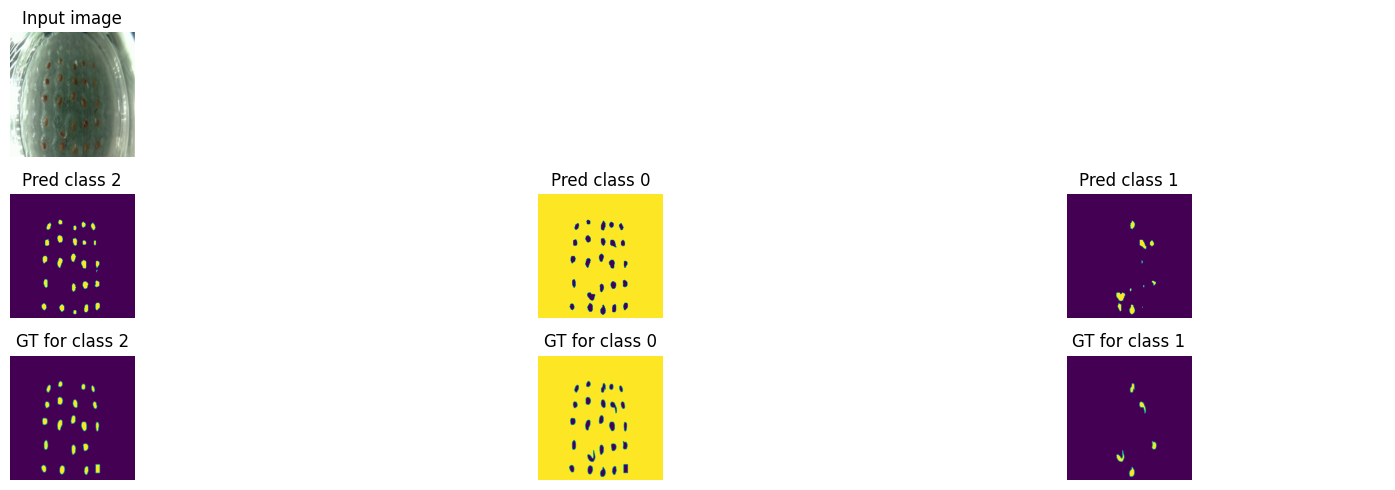

Train loss: 0.21486 | Time: 13m 58s | Val loss: 0.15785
Train_DICE_avg: 0.82093 | Train_Jaccard_avg: 0.75759 | Train_Sensitivity_avg: 0.86398 | Train_Specificity_avg: 0.95554 
Class 0 - Train_DICE: 0.98815 | Train_Jaccard: 0.97672 | Train_Sensitivity: 0.98378 | Train_Specificity: 0.87429 
Class 1 - Train_DICE: 0.63359 | Train_Jaccard: 0.56067 | Train_Sensitivity: 0.78111 | Train_Specificity: 0.99661 
Class 2 - Train_DICE: 0.84106 | Train_Jaccard: 0.73537 | Train_Sensitivity: 0.82705 | Train_Specificity: 0.99573 
Val_DICE_avg: 0.85478 | Val_Jaccard_avg: 0.80254 | Val_Sensitivity_avg: 0.88921 | Val_Specificity_avg: 0.94878 
Class 0 - Val_DICE: 0.99552 | Val_Jaccard: 0.99110 | Val_Sensitivity: 0.99625 | Val_Specificity: 0.85213 
Class 1 - Val_DICE: 0.70492 | Val_Jaccard: 0.64485 | Val_Sensitivity: 0.81209 | Val_Specificity: 0.99748 
Class 2 - Val_DICE: 0.86392 | Val_Jaccard: 0.77166 | Val_Sensitivity: 0.85927 | Val_Specificity: 0.99674 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


Train loss: 0.21134 | Time: 14m 25s | Val loss: 0.15762
Train_DICE_avg: 0.82401 | Train_Jaccard_avg: 0.76060 | Train_Sensitivity_avg: 0.86447 | Train_Specificity_avg: 0.95526 
Class 0 - Train_DICE: 0.98810 | Train_Jaccard: 0.97663 | Train_Sensitivity: 0.98397 | Train_Specificity: 0.87329 
Class 1 - Train_DICE: 0.64163 | Train_Jaccard: 0.56796 | Train_Sensitivity: 0.78090 | Train_Specificity: 0.99671 
Class 2 - Train_DICE: 0.84229 | Train_Jaccard: 0.73721 | Train_Sensitivity: 0.82854 | Train_Specificity: 0.99580 
Val_DICE_avg: 0.85691 | Val_Jaccard_avg: 0.80334 | Val_Sensitivity_avg: 0.88833 | Val_Specificity_avg: 0.94949 
Class 0 - Val_DICE: 0.99552 | Val_Jaccard: 0.99110 | Val_Sensitivity: 0.99613 | Val_Specificity: 0.85435 
Class 1 - Val_DICE: 0.71354 | Val_Jaccard: 0.64919 | Val_Sensitivity: 0.79939 | Val_Specificity: 0.99777 
Class 2 - Val_DICE: 0.86167 | Val_Jaccard: 0.76974 | Val_Sensitivity: 0.86947 | Val_Specificity: 0.99637 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]


Train loss: 0.20871 | Time: 14m 52s | Val loss: 0.15729
Train_DICE_avg: 0.82582 | Train_Jaccard_avg: 0.76220 | Train_Sensitivity_avg: 0.86344 | Train_Specificity_avg: 0.95498 
Class 0 - Train_DICE: 0.98825 | Train_Jaccard: 0.97692 | Train_Sensitivity: 0.98431 | Train_Specificity: 0.87242 
Class 1 - Train_DICE: 0.64629 | Train_Jaccard: 0.57158 | Train_Sensitivity: 0.77461 | Train_Specificity: 0.99683 
Class 2 - Train_DICE: 0.84293 | Train_Jaccard: 0.73809 | Train_Sensitivity: 0.83140 | Train_Specificity: 0.99570 
Val_DICE_avg: 0.85877 | Val_Jaccard_avg: 0.80584 | Val_Sensitivity_avg: 0.88934 | Val_Specificity_avg: 0.94724 
Class 0 - Val_DICE: 0.99551 | Val_Jaccard: 0.99108 | Val_Sensitivity: 0.99620 | Val_Specificity: 0.84762 
Class 1 - Val_DICE: 0.71544 | Val_Jaccard: 0.65270 | Val_Sensitivity: 0.80954 | Val_Specificity: 0.99749 
Class 2 - Val_DICE: 0.86536 | Val_Jaccard: 0.77375 | Val_Sensitivity: 0.86227 | Val_Specificity: 0.99662 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]


Train loss: 0.20845 | Time: 15m 19s | Val loss: 0.15457
Train_DICE_avg: 0.82653 | Train_Jaccard_avg: 0.76302 | Train_Sensitivity_avg: 0.86692 | Train_Specificity_avg: 0.95461 
Class 0 - Train_DICE: 0.98834 | Train_Jaccard: 0.97708 | Train_Sensitivity: 0.98466 | Train_Specificity: 0.87130 
Class 1 - Train_DICE: 0.64803 | Train_Jaccard: 0.57333 | Train_Sensitivity: 0.78705 | Train_Specificity: 0.99672 
Class 2 - Train_DICE: 0.84322 | Train_Jaccard: 0.73865 | Train_Sensitivity: 0.82905 | Train_Specificity: 0.99582 
Val_DICE_avg: 0.85864 | Val_Jaccard_avg: 0.80612 | Val_Sensitivity_avg: 0.88851 | Val_Specificity_avg: 0.95008 
Class 0 - Val_DICE: 0.99560 | Val_Jaccard: 0.99126 | Val_Sensitivity: 0.99624 | Val_Specificity: 0.85595 
Class 1 - Val_DICE: 0.71337 | Val_Jaccard: 0.65067 | Val_Sensitivity: 0.81091 | Val_Specificity: 0.99765 
Class 2 - Val_DICE: 0.86696 | Val_Jaccard: 0.77642 | Val_Sensitivity: 0.85837 | Val_Specificity: 0.99665 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


Train loss: 0.20927 | Time: 15m 46s | Val loss: 0.15150
Train_DICE_avg: 0.82616 | Train_Jaccard_avg: 0.76268 | Train_Sensitivity_avg: 0.86596 | Train_Specificity_avg: 0.95537 
Class 0 - Train_DICE: 0.98859 | Train_Jaccard: 0.97756 | Train_Sensitivity: 0.98489 | Train_Specificity: 0.87359 
Class 1 - Train_DICE: 0.64557 | Train_Jaccard: 0.57031 | Train_Sensitivity: 0.78063 | Train_Specificity: 0.99678 
Class 2 - Train_DICE: 0.84433 | Train_Jaccard: 0.74016 | Train_Sensitivity: 0.83235 | Train_Specificity: 0.99574 
Val_DICE_avg: 0.86144 | Val_Jaccard_avg: 0.80887 | Val_Sensitivity_avg: 0.89117 | Val_Specificity_avg: 0.95062 
Class 0 - Val_DICE: 0.99566 | Val_Jaccard: 0.99139 | Val_Sensitivity: 0.99619 | Val_Specificity: 0.85778 
Class 1 - Val_DICE: 0.71995 | Val_Jaccard: 0.65603 | Val_Sensitivity: 0.80515 | Val_Specificity: 0.99778 
Class 2 - Val_DICE: 0.86870 | Val_Jaccard: 0.77919 | Val_Sensitivity: 0.87218 | Val_Specificity: 0.99631 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


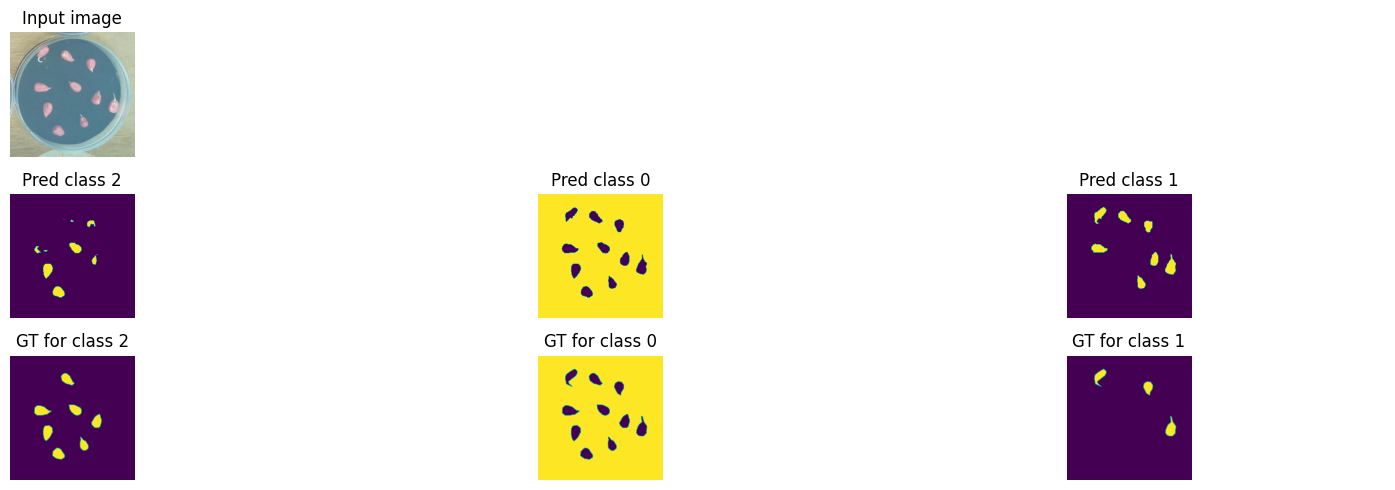

Train loss: 0.20709 | Time: 16m 14s | Val loss: 0.15586
Train_DICE_avg: 0.82933 | Train_Jaccard_avg: 0.76571 | Train_Sensitivity_avg: 0.86353 | Train_Specificity_avg: 0.95501 
Class 0 - Train_DICE: 0.98876 | Train_Jaccard: 0.97789 | Train_Sensitivity: 0.98528 | Train_Specificity: 0.87227 
Class 1 - Train_DICE: 0.65298 | Train_Jaccard: 0.57645 | Train_Sensitivity: 0.77139 | Train_Specificity: 0.99695 
Class 2 - Train_DICE: 0.84625 | Train_Jaccard: 0.74280 | Train_Sensitivity: 0.83391 | Train_Specificity: 0.99582 
Val_DICE_avg: 0.85852 | Val_Jaccard_avg: 0.80498 | Val_Sensitivity_avg: 0.88466 | Val_Specificity_avg: 0.95039 
Class 0 - Val_DICE: 0.99566 | Val_Jaccard: 0.99139 | Val_Sensitivity: 0.99625 | Val_Specificity: 0.85692 
Class 1 - Val_DICE: 0.71389 | Val_Jaccard: 0.64855 | Val_Sensitivity: 0.79178 | Val_Specificity: 0.99781 
Class 2 - Val_DICE: 0.86599 | Val_Jaccard: 0.77501 | Val_Sensitivity: 0.86595 | Val_Specificity: 0.99644 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


Train loss: 0.20355 | Time: 16m 42s | Val loss: 0.15196
Train_DICE_avg: 0.83086 | Train_Jaccard_avg: 0.76741 | Train_Sensitivity_avg: 0.86902 | Train_Specificity_avg: 0.95471 
Class 0 - Train_DICE: 0.98849 | Train_Jaccard: 0.97738 | Train_Sensitivity: 0.98505 | Train_Specificity: 0.87138 
Class 1 - Train_DICE: 0.65803 | Train_Jaccard: 0.58217 | Train_Sensitivity: 0.78885 | Train_Specificity: 0.99687 
Class 2 - Train_DICE: 0.84607 | Train_Jaccard: 0.74269 | Train_Sensitivity: 0.83315 | Train_Specificity: 0.99587 
Val_DICE_avg: 0.86042 | Val_Jaccard_avg: 0.80788 | Val_Sensitivity_avg: 0.88584 | Val_Specificity_avg: 0.94826 
Class 0 - Val_DICE: 0.99559 | Val_Jaccard: 0.99125 | Val_Sensitivity: 0.99637 | Val_Specificity: 0.85050 
Class 1 - Val_DICE: 0.71654 | Val_Jaccard: 0.65294 | Val_Sensitivity: 0.79562 | Val_Specificity: 0.99765 
Class 2 - Val_DICE: 0.86914 | Val_Jaccard: 0.77946 | Val_Sensitivity: 0.86551 | Val_Specificity: 0.99664 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


Train loss: 0.20321 | Time: 17m 9s | Val loss: 0.15336
Train_DICE_avg: 0.83038 | Train_Jaccard_avg: 0.76785 | Train_Sensitivity_avg: 0.87066 | Train_Specificity_avg: 0.95544 
Class 0 - Train_DICE: 0.98874 | Train_Jaccard: 0.97785 | Train_Sensitivity: 0.98531 | Train_Specificity: 0.87366 
Class 1 - Train_DICE: 0.65443 | Train_Jaccard: 0.58053 | Train_Sensitivity: 0.78976 | Train_Specificity: 0.99689 
Class 2 - Train_DICE: 0.84798 | Train_Jaccard: 0.74516 | Train_Sensitivity: 0.83691 | Train_Specificity: 0.99577 
Val_DICE_avg: 0.86007 | Val_Jaccard_avg: 0.80865 | Val_Sensitivity_avg: 0.89825 | Val_Specificity_avg: 0.95425 
Class 0 - Val_DICE: 0.99578 | Val_Jaccard: 0.99162 | Val_Sensitivity: 0.99604 | Val_Specificity: 0.86885 
Class 1 - Val_DICE: 0.71432 | Val_Jaccard: 0.65330 | Val_Sensitivity: 0.81555 | Val_Specificity: 0.99762 
Class 2 - Val_DICE: 0.87012 | Val_Jaccard: 0.78104 | Val_Sensitivity: 0.88315 | Val_Specificity: 0.99628 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]


Train loss: 0.20193 | Time: 17m 37s | Val loss: 0.15028
Train_DICE_avg: 0.83434 | Train_Jaccard_avg: 0.77186 | Train_Sensitivity_avg: 0.87307 | Train_Specificity_avg: 0.95588 
Class 0 - Train_DICE: 0.98897 | Train_Jaccard: 0.97831 | Train_Sensitivity: 0.98579 | Train_Specificity: 0.87486 
Class 1 - Train_DICE: 0.66572 | Train_Jaccard: 0.59130 | Train_Sensitivity: 0.79680 | Train_Specificity: 0.99690 
Class 2 - Train_DICE: 0.84833 | Train_Jaccard: 0.74597 | Train_Sensitivity: 0.83663 | Train_Specificity: 0.99588 
Val_DICE_avg: 0.86287 | Val_Jaccard_avg: 0.81009 | Val_Sensitivity_avg: 0.88960 | Val_Specificity_avg: 0.94941 
Class 0 - Val_DICE: 0.99565 | Val_Jaccard: 0.99135 | Val_Sensitivity: 0.99631 | Val_Specificity: 0.85388 
Class 1 - Val_DICE: 0.72457 | Val_Jaccard: 0.66004 | Val_Sensitivity: 0.80460 | Val_Specificity: 0.99770 
Class 2 - Val_DICE: 0.86839 | Val_Jaccard: 0.77888 | Val_Sensitivity: 0.86789 | Val_Specificity: 0.99666 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


Train loss: 0.20250 | Time: 18m 4s | Val loss: 0.15108
Train_DICE_avg: 0.83171 | Train_Jaccard_avg: 0.76858 | Train_Sensitivity_avg: 0.86612 | Train_Specificity_avg: 0.95596 
Class 0 - Train_DICE: 0.98897 | Train_Jaccard: 0.97830 | Train_Sensitivity: 0.98550 | Train_Specificity: 0.87504 
Class 1 - Train_DICE: 0.65756 | Train_Jaccard: 0.58132 | Train_Sensitivity: 0.77647 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.84861 | Train_Jaccard: 0.74612 | Train_Sensitivity: 0.83637 | Train_Specificity: 0.99585 
Val_DICE_avg: 0.86106 | Val_Jaccard_avg: 0.80778 | Val_Sensitivity_avg: 0.88409 | Val_Specificity_avg: 0.94897 
Class 0 - Val_DICE: 0.99570 | Val_Jaccard: 0.99145 | Val_Sensitivity: 0.99648 | Val_Specificity: 0.85229 
Class 1 - Val_DICE: 0.71765 | Val_Jaccard: 0.65118 | Val_Sensitivity: 0.79440 | Val_Specificity: 0.99783 
Class 2 - Val_DICE: 0.86983 | Val_Jaccard: 0.78071 | Val_Sensitivity: 0.86137 | Val_Specificity: 0.99681 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


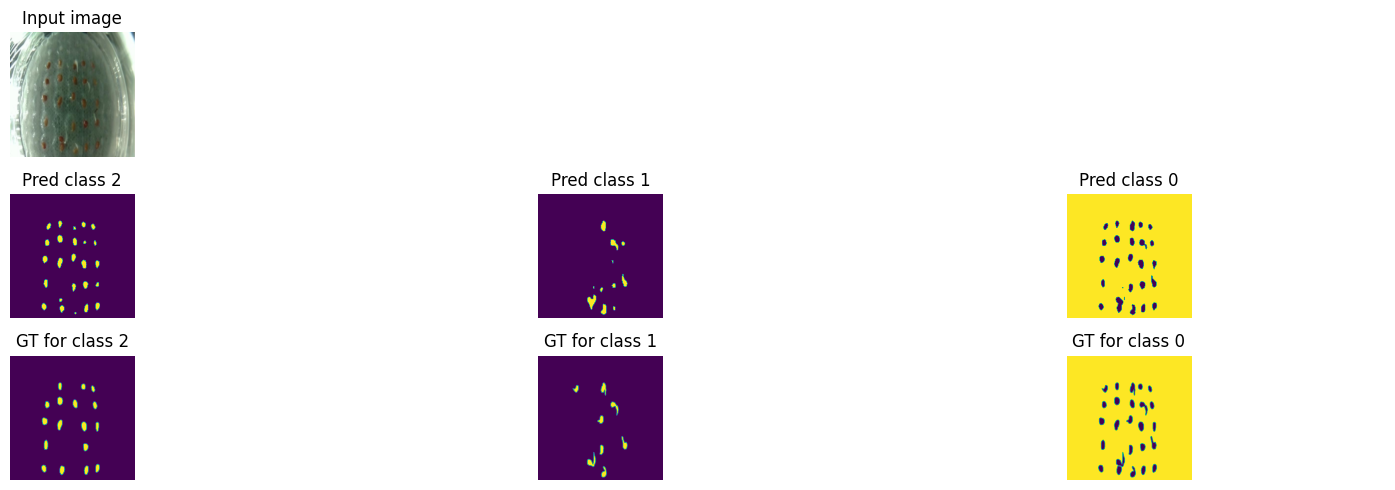

Train loss: 0.20003 | Time: 18m 32s | Val loss: 0.14934
Train_DICE_avg: 0.83420 | Train_Jaccard_avg: 0.77137 | Train_Sensitivity_avg: 0.86979 | Train_Specificity_avg: 0.95565 
Class 0 - Train_DICE: 0.98909 | Train_Jaccard: 0.97853 | Train_Sensitivity: 0.98590 | Train_Specificity: 0.87411 
Class 1 - Train_DICE: 0.66434 | Train_Jaccard: 0.58839 | Train_Sensitivity: 0.78705 | Train_Specificity: 0.99697 
Class 2 - Train_DICE: 0.84917 | Train_Jaccard: 0.74718 | Train_Sensitivity: 0.83643 | Train_Specificity: 0.99587 
Val_DICE_avg: 0.86378 | Val_Jaccard_avg: 0.81141 | Val_Sensitivity_avg: 0.88744 | Val_Specificity_avg: 0.94855 
Class 0 - Val_DICE: 0.99566 | Val_Jaccard: 0.99138 | Val_Sensitivity: 0.99655 | Val_Specificity: 0.85116 
Class 1 - Val_DICE: 0.72427 | Val_Jaccard: 0.66000 | Val_Sensitivity: 0.80438 | Val_Specificity: 0.99757 
Class 2 - Val_DICE: 0.87142 | Val_Jaccard: 0.78284 | Val_Sensitivity: 0.86140 | Val_Specificity: 0.99693 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


Train loss: 0.20304 | Time: 19m 0s | Val loss: 0.15361
Train_DICE_avg: 0.83364 | Train_Jaccard_avg: 0.77099 | Train_Sensitivity_avg: 0.87081 | Train_Specificity_avg: 0.95650 
Class 0 - Train_DICE: 0.98911 | Train_Jaccard: 0.97857 | Train_Sensitivity: 0.98593 | Train_Specificity: 0.87665 
Class 1 - Train_DICE: 0.66239 | Train_Jaccard: 0.58691 | Train_Sensitivity: 0.78866 | Train_Specificity: 0.99698 
Class 2 - Train_DICE: 0.84941 | Train_Jaccard: 0.74748 | Train_Sensitivity: 0.83786 | Train_Specificity: 0.99588 
Val_DICE_avg: 0.85906 | Val_Jaccard_avg: 0.80599 | Val_Sensitivity_avg: 0.88240 | Val_Specificity_avg: 0.95247 
Class 0 - Val_DICE: 0.99577 | Val_Jaccard: 0.99159 | Val_Sensitivity: 0.99612 | Val_Specificity: 0.86319 
Class 1 - Val_DICE: 0.70939 | Val_Jaccard: 0.64287 | Val_Sensitivity: 0.78040 | Val_Specificity: 0.99767 
Class 2 - Val_DICE: 0.87201 | Val_Jaccard: 0.78352 | Val_Sensitivity: 0.87066 | Val_Specificity: 0.99656 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


Train loss: 0.20089 | Time: 19m 28s | Val loss: 0.15142
Train_DICE_avg: 0.83367 | Train_Jaccard_avg: 0.77084 | Train_Sensitivity_avg: 0.86851 | Train_Specificity_avg: 0.95642 
Class 0 - Train_DICE: 0.98910 | Train_Jaccard: 0.97856 | Train_Sensitivity: 0.98593 | Train_Specificity: 0.87639 
Class 1 - Train_DICE: 0.66212 | Train_Jaccard: 0.58618 | Train_Sensitivity: 0.78134 | Train_Specificity: 0.99696 
Class 2 - Train_DICE: 0.84980 | Train_Jaccard: 0.74779 | Train_Sensitivity: 0.83827 | Train_Specificity: 0.99590 
Val_DICE_avg: 0.86213 | Val_Jaccard_avg: 0.80976 | Val_Sensitivity_avg: 0.88700 | Val_Specificity_avg: 0.95064 
Class 0 - Val_DICE: 0.99572 | Val_Jaccard: 0.99150 | Val_Sensitivity: 0.99640 | Val_Specificity: 0.85763 
Class 1 - Val_DICE: 0.71807 | Val_Jaccard: 0.65319 | Val_Sensitivity: 0.79544 | Val_Specificity: 0.99756 
Class 2 - Val_DICE: 0.87261 | Val_Jaccard: 0.78459 | Val_Sensitivity: 0.86916 | Val_Specificity: 0.99673 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


Train loss: 0.20316 | Time: 19m 55s | Val loss: 0.14580
Train_DICE_avg: 0.83493 | Train_Jaccard_avg: 0.77344 | Train_Sensitivity_avg: 0.87614 | Train_Specificity_avg: 0.95642 
Class 0 - Train_DICE: 0.98927 | Train_Jaccard: 0.97889 | Train_Sensitivity: 0.98621 | Train_Specificity: 0.87636 
Class 1 - Train_DICE: 0.66396 | Train_Jaccard: 0.59102 | Train_Sensitivity: 0.80151 | Train_Specificity: 0.99694 
Class 2 - Train_DICE: 0.85157 | Train_Jaccard: 0.75040 | Train_Sensitivity: 0.84071 | Train_Specificity: 0.99596 
Val_DICE_avg: 0.86692 | Val_Jaccard_avg: 0.81425 | Val_Sensitivity_avg: 0.88976 | Val_Specificity_avg: 0.95001 
Class 0 - Val_DICE: 0.99572 | Val_Jaccard: 0.99150 | Val_Sensitivity: 0.99636 | Val_Specificity: 0.85565 
Class 1 - Val_DICE: 0.73278 | Val_Jaccard: 0.66674 | Val_Sensitivity: 0.79849 | Val_Specificity: 0.99774 
Class 2 - Val_DICE: 0.87225 | Val_Jaccard: 0.78451 | Val_Sensitivity: 0.87442 | Val_Specificity: 0.99666 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


Train loss: 0.20106 | Time: 20m 22s | Val loss: 0.14710
Train_DICE_avg: 0.83547 | Train_Jaccard_avg: 0.77320 | Train_Sensitivity_avg: 0.87302 | Train_Specificity_avg: 0.95553 
Class 0 - Train_DICE: 0.98931 | Train_Jaccard: 0.97897 | Train_Sensitivity: 0.98650 | Train_Specificity: 0.87371 
Class 1 - Train_DICE: 0.66667 | Train_Jaccard: 0.59166 | Train_Sensitivity: 0.79490 | Train_Specificity: 0.99693 
Class 2 - Train_DICE: 0.85042 | Train_Jaccard: 0.74896 | Train_Sensitivity: 0.83766 | Train_Specificity: 0.99594 
Val_DICE_avg: 0.86527 | Val_Jaccard_avg: 0.81412 | Val_Sensitivity_avg: 0.89935 | Val_Specificity_avg: 0.95244 
Class 0 - Val_DICE: 0.99580 | Val_Jaccard: 0.99167 | Val_Sensitivity: 0.99628 | Val_Specificity: 0.86313 
Class 1 - Val_DICE: 0.72701 | Val_Jaccard: 0.66555 | Val_Sensitivity: 0.83022 | Val_Specificity: 0.99757 
Class 2 - Val_DICE: 0.87300 | Val_Jaccard: 0.78513 | Val_Sensitivity: 0.87154 | Val_Specificity: 0.99663 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:02<00:00,  3.50it/s]


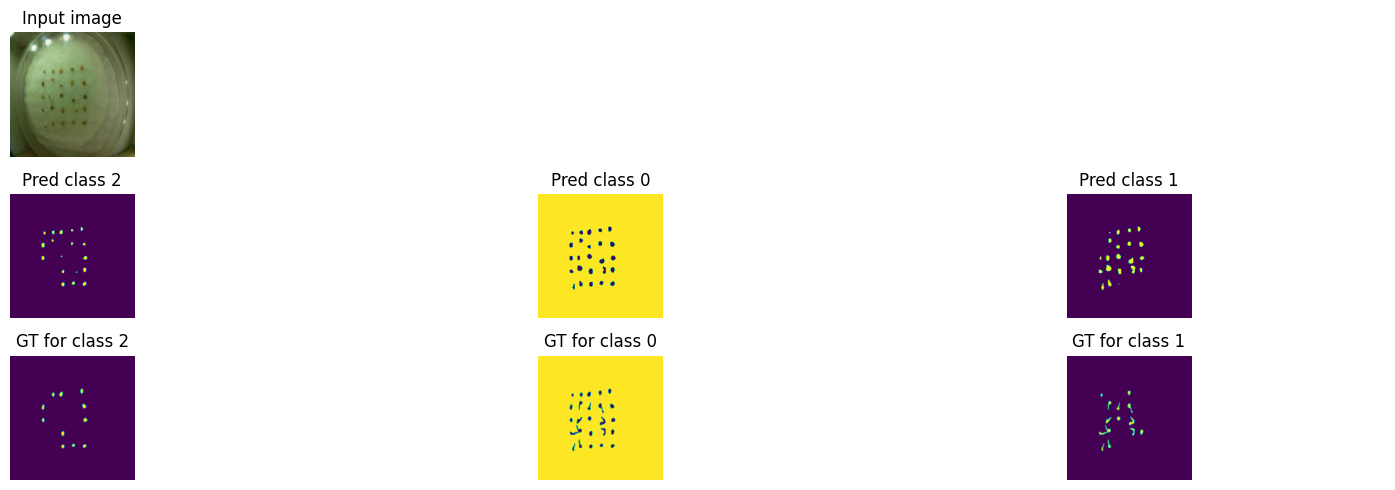

Train loss: 0.19690 | Time: 20m 50s | Val loss: 0.14465
Train_DICE_avg: 0.83756 | Train_Jaccard_avg: 0.77523 | Train_Sensitivity_avg: 0.87315 | Train_Specificity_avg: 0.95574 
Class 0 - Train_DICE: 0.98927 | Train_Jaccard: 0.97889 | Train_Sensitivity: 0.98628 | Train_Specificity: 0.87429 
Class 1 - Train_DICE: 0.67100 | Train_Jaccard: 0.59524 | Train_Sensitivity: 0.79154 | Train_Specificity: 0.99703 
Class 2 - Train_DICE: 0.85242 | Train_Jaccard: 0.75156 | Train_Sensitivity: 0.84163 | Train_Specificity: 0.99591 
Val_DICE_avg: 0.86816 | Val_Jaccard_avg: 0.81649 | Val_Sensitivity_avg: 0.89880 | Val_Specificity_avg: 0.95152 
Class 0 - Val_DICE: 0.99577 | Val_Jaccard: 0.99161 | Val_Sensitivity: 0.99631 | Val_Specificity: 0.86019 
Class 1 - Val_DICE: 0.73449 | Val_Jaccard: 0.67081 | Val_Sensitivity: 0.82941 | Val_Specificity: 0.99766 
Class 2 - Val_DICE: 0.87422 | Val_Jaccard: 0.78704 | Val_Sensitivity: 0.87068 | Val_Specificity: 0.99670 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:01<00:00,  3.56it/s]


Train loss: 0.19499 | Time: 21m 16s | Val loss: 0.14547
Train_DICE_avg: 0.83923 | Train_Jaccard_avg: 0.77658 | Train_Sensitivity_avg: 0.87417 | Train_Specificity_avg: 0.95572 
Class 0 - Train_DICE: 0.98905 | Train_Jaccard: 0.97846 | Train_Sensitivity: 0.98596 | Train_Specificity: 0.87422 
Class 1 - Train_DICE: 0.67617 | Train_Jaccard: 0.59957 | Train_Sensitivity: 0.79457 | Train_Specificity: 0.99704 
Class 2 - Train_DICE: 0.85247 | Train_Jaccard: 0.75171 | Train_Sensitivity: 0.84197 | Train_Specificity: 0.99590 
Val_DICE_avg: 0.86787 | Val_Jaccard_avg: 0.81534 | Val_Sensitivity_avg: 0.89424 | Val_Specificity_avg: 0.95184 
Class 0 - Val_DICE: 0.99580 | Val_Jaccard: 0.99165 | Val_Sensitivity: 0.99631 | Val_Specificity: 0.86123 
Class 1 - Val_DICE: 0.73375 | Val_Jaccard: 0.66744 | Val_Sensitivity: 0.80975 | Val_Specificity: 0.99773 
Class 2 - Val_DICE: 0.87406 | Val_Jaccard: 0.78691 | Val_Sensitivity: 0.87665 | Val_Specificity: 0.99657 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


Train loss: 0.19091 | Time: 21m 43s | Val loss: 0.14359
Train_DICE_avg: 0.83995 | Train_Jaccard_avg: 0.77792 | Train_Sensitivity_avg: 0.87252 | Train_Specificity_avg: 0.95634 
Class 0 - Train_DICE: 0.98934 | Train_Jaccard: 0.97903 | Train_Sensitivity: 0.98646 | Train_Specificity: 0.87591 
Class 1 - Train_DICE: 0.67641 | Train_Jaccard: 0.60060 | Train_Sensitivity: 0.78771 | Train_Specificity: 0.99715 
Class 2 - Train_DICE: 0.85410 | Train_Jaccard: 0.75413 | Train_Sensitivity: 0.84338 | Train_Specificity: 0.99595 
Val_DICE_avg: 0.86903 | Val_Jaccard_avg: 0.81651 | Val_Sensitivity_avg: 0.89096 | Val_Specificity_avg: 0.94993 
Class 0 - Val_DICE: 0.99575 | Val_Jaccard: 0.99156 | Val_Sensitivity: 0.99647 | Val_Specificity: 0.85525 
Class 1 - Val_DICE: 0.73633 | Val_Jaccard: 0.66962 | Val_Sensitivity: 0.80850 | Val_Specificity: 0.99762 
Class 2 - Val_DICE: 0.87501 | Val_Jaccard: 0.78836 | Val_Sensitivity: 0.86789 | Val_Specificity: 0.99692 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


Train loss: 0.19457 | Time: 22m 10s | Val loss: 0.14268
Train_DICE_avg: 0.83940 | Train_Jaccard_avg: 0.77721 | Train_Sensitivity_avg: 0.87418 | Train_Specificity_avg: 0.95639 
Class 0 - Train_DICE: 0.98928 | Train_Jaccard: 0.97890 | Train_Sensitivity: 0.98641 | Train_Specificity: 0.87611 
Class 1 - Train_DICE: 0.67521 | Train_Jaccard: 0.59931 | Train_Sensitivity: 0.79427 | Train_Specificity: 0.99709 
Class 2 - Train_DICE: 0.85371 | Train_Jaccard: 0.75342 | Train_Sensitivity: 0.84185 | Train_Specificity: 0.99596 
Val_DICE_avg: 0.87117 | Val_Jaccard_avg: 0.81888 | Val_Sensitivity_avg: 0.89238 | Val_Specificity_avg: 0.95283 
Class 0 - Val_DICE: 0.99584 | Val_Jaccard: 0.99173 | Val_Sensitivity: 0.99631 | Val_Specificity: 0.86406 
Class 1 - Val_DICE: 0.74214 | Val_Jaccard: 0.67583 | Val_Sensitivity: 0.80458 | Val_Specificity: 0.99774 
Class 2 - Val_DICE: 0.87554 | Val_Jaccard: 0.78907 | Val_Sensitivity: 0.87624 | Val_Specificity: 0.99670 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]


Train loss: 0.19630 | Time: 22m 37s | Val loss: 0.14180
Train_DICE_avg: 0.83902 | Train_Jaccard_avg: 0.77676 | Train_Sensitivity_avg: 0.87149 | Train_Specificity_avg: 0.95464 
Class 0 - Train_DICE: 0.98978 | Train_Jaccard: 0.97986 | Train_Sensitivity: 0.98747 | Train_Specificity: 0.87090 
Class 1 - Train_DICE: 0.67380 | Train_Jaccard: 0.59703 | Train_Sensitivity: 0.78517 | Train_Specificity: 0.99702 
Class 2 - Train_DICE: 0.85349 | Train_Jaccard: 0.75339 | Train_Sensitivity: 0.84184 | Train_Specificity: 0.99600 
Val_DICE_avg: 0.87107 | Val_Jaccard_avg: 0.81895 | Val_Sensitivity_avg: 0.89266 | Val_Specificity_avg: 0.95181 
Class 0 - Val_DICE: 0.99582 | Val_Jaccard: 0.99169 | Val_Sensitivity: 0.99634 | Val_Specificity: 0.86109 
Class 1 - Val_DICE: 0.74133 | Val_Jaccard: 0.67526 | Val_Sensitivity: 0.80492 | Val_Specificity: 0.99771 
Class 2 - Val_DICE: 0.87606 | Val_Jaccard: 0.78991 | Val_Sensitivity: 0.87671 | Val_Specificity: 0.99662 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


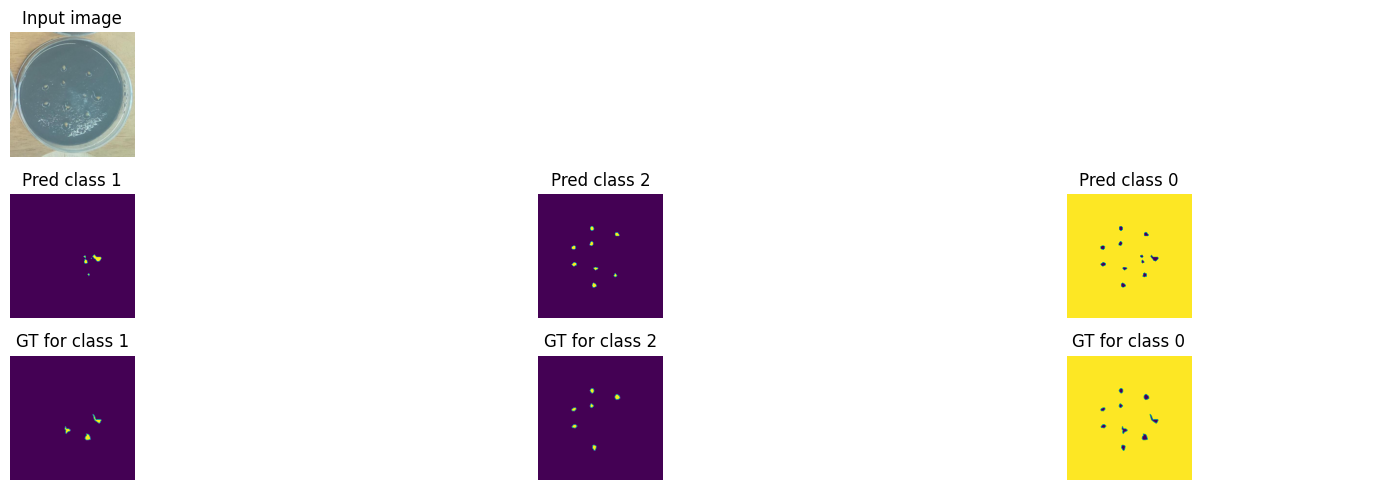

Train loss: 0.19434 | Time: 23m 3s | Val loss: 0.14353
Train_DICE_avg: 0.84038 | Train_Jaccard_avg: 0.77806 | Train_Sensitivity_avg: 0.87212 | Train_Specificity_avg: 0.95733 
Class 0 - Train_DICE: 0.98961 | Train_Jaccard: 0.97953 | Train_Sensitivity: 0.98681 | Train_Specificity: 0.87901 
Class 1 - Train_DICE: 0.67755 | Train_Jaccard: 0.60063 | Train_Sensitivity: 0.78408 | Train_Specificity: 0.99708 
Class 2 - Train_DICE: 0.85398 | Train_Jaccard: 0.75401 | Train_Sensitivity: 0.84548 | Train_Specificity: 0.99591 
Val_DICE_avg: 0.87002 | Val_Jaccard_avg: 0.81762 | Val_Sensitivity_avg: 0.88805 | Val_Specificity_avg: 0.94999 
Class 0 - Val_DICE: 0.99580 | Val_Jaccard: 0.99166 | Val_Sensitivity: 0.99654 | Val_Specificity: 0.85552 
Class 1 - Val_DICE: 0.73874 | Val_Jaccard: 0.67195 | Val_Sensitivity: 0.79535 | Val_Specificity: 0.99778 
Class 2 - Val_DICE: 0.87553 | Val_Jaccard: 0.78925 | Val_Sensitivity: 0.87228 | Val_Specificity: 0.99668 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]


Train loss: 0.19556 | Time: 23m 30s | Val loss: 0.14496
Train_DICE_avg: 0.83930 | Train_Jaccard_avg: 0.77661 | Train_Sensitivity_avg: 0.87153 | Train_Specificity_avg: 0.95574 
Class 0 - Train_DICE: 0.98939 | Train_Jaccard: 0.97912 | Train_Sensitivity: 0.98669 | Train_Specificity: 0.87418 
Class 1 - Train_DICE: 0.67569 | Train_Jaccard: 0.59837 | Train_Sensitivity: 0.78709 | Train_Specificity: 0.99707 
Class 2 - Train_DICE: 0.85284 | Train_Jaccard: 0.75232 | Train_Sensitivity: 0.84081 | Train_Specificity: 0.99597 
Val_DICE_avg: 0.86822 | Val_Jaccard_avg: 0.81559 | Val_Sensitivity_avg: 0.88778 | Val_Specificity_avg: 0.95034 
Class 0 - Val_DICE: 0.99578 | Val_Jaccard: 0.99162 | Val_Sensitivity: 0.99650 | Val_Specificity: 0.85660 
Class 1 - Val_DICE: 0.73318 | Val_Jaccard: 0.66596 | Val_Sensitivity: 0.79473 | Val_Specificity: 0.99763 
Class 2 - Val_DICE: 0.87571 | Val_Jaccard: 0.78918 | Val_Sensitivity: 0.87212 | Val_Specificity: 0.99679 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


Train loss: 0.19391 | Time: 23m 56s | Val loss: 0.14278
Train_DICE_avg: 0.84034 | Train_Jaccard_avg: 0.77789 | Train_Sensitivity_avg: 0.87420 | Train_Specificity_avg: 0.95586 
Class 0 - Train_DICE: 0.98937 | Train_Jaccard: 0.97908 | Train_Sensitivity: 0.98657 | Train_Specificity: 0.87456 
Class 1 - Train_DICE: 0.67668 | Train_Jaccard: 0.59940 | Train_Sensitivity: 0.79251 | Train_Specificity: 0.99700 
Class 2 - Train_DICE: 0.85498 | Train_Jaccard: 0.75520 | Train_Sensitivity: 0.84351 | Train_Specificity: 0.99602 
Val_DICE_avg: 0.87085 | Val_Jaccard_avg: 0.81915 | Val_Sensitivity_avg: 0.89418 | Val_Specificity_avg: 0.95238 
Class 0 - Val_DICE: 0.99585 | Val_Jaccard: 0.99176 | Val_Sensitivity: 0.99633 | Val_Specificity: 0.86273 
Class 1 - Val_DICE: 0.74039 | Val_Jaccard: 0.67553 | Val_Sensitivity: 0.81371 | Val_Specificity: 0.99760 
Class 2 - Val_DICE: 0.87629 | Val_Jaccard: 0.79017 | Val_Sensitivity: 0.87251 | Val_Specificity: 0.99681 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


Train loss: 0.19357 | Time: 24m 23s | Val loss: 0.14139
Train_DICE_avg: 0.84252 | Train_Jaccard_avg: 0.78044 | Train_Sensitivity_avg: 0.87623 | Train_Specificity_avg: 0.95665 
Class 0 - Train_DICE: 0.98964 | Train_Jaccard: 0.97960 | Train_Sensitivity: 0.98689 | Train_Specificity: 0.87685 
Class 1 - Train_DICE: 0.68229 | Train_Jaccard: 0.60529 | Train_Sensitivity: 0.79532 | Train_Specificity: 0.99713 
Class 2 - Train_DICE: 0.85564 | Train_Jaccard: 0.75642 | Train_Sensitivity: 0.84647 | Train_Specificity: 0.99597 
Val_DICE_avg: 0.87163 | Val_Jaccard_avg: 0.81965 | Val_Sensitivity_avg: 0.89666 | Val_Specificity_avg: 0.95127 
Class 0 - Val_DICE: 0.99582 | Val_Jaccard: 0.99170 | Val_Sensitivity: 0.99655 | Val_Specificity: 0.85928 
Class 1 - Val_DICE: 0.74286 | Val_Jaccard: 0.67717 | Val_Sensitivity: 0.82157 | Val_Specificity: 0.99774 
Class 2 - Val_DICE: 0.87622 | Val_Jaccard: 0.79008 | Val_Sensitivity: 0.87187 | Val_Specificity: 0.99679 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


Train loss: 0.19337 | Time: 24m 50s | Val loss: 0.14312
Train_DICE_avg: 0.84308 | Train_Jaccard_avg: 0.78110 | Train_Sensitivity_avg: 0.87836 | Train_Specificity_avg: 0.95727 
Class 0 - Train_DICE: 0.98975 | Train_Jaccard: 0.97981 | Train_Sensitivity: 0.98695 | Train_Specificity: 0.87874 
Class 1 - Train_DICE: 0.68364 | Train_Jaccard: 0.60679 | Train_Sensitivity: 0.80255 | Train_Specificity: 0.99710 
Class 2 - Train_DICE: 0.85586 | Train_Jaccard: 0.75670 | Train_Sensitivity: 0.84558 | Train_Specificity: 0.99597 
Val_DICE_avg: 0.86923 | Val_Jaccard_avg: 0.81792 | Val_Sensitivity_avg: 0.89735 | Val_Specificity_avg: 0.95285 
Class 0 - Val_DICE: 0.99586 | Val_Jaccard: 0.99177 | Val_Sensitivity: 0.99637 | Val_Specificity: 0.86406 
Class 1 - Val_DICE: 0.73509 | Val_Jaccard: 0.67107 | Val_Sensitivity: 0.82320 | Val_Specificity: 0.99768 
Class 2 - Val_DICE: 0.87674 | Val_Jaccard: 0.79093 | Val_Sensitivity: 0.87249 | Val_Specificity: 0.99680 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


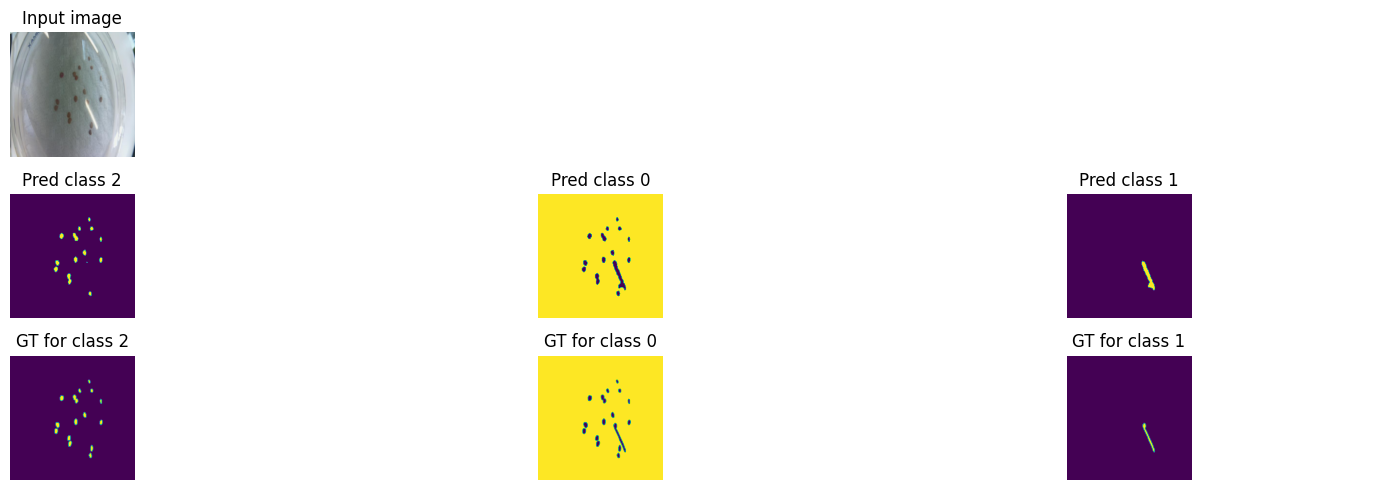

Train loss: 0.19200 | Time: 25m 17s | Val loss: 0.14243
Train_DICE_avg: 0.84295 | Train_Jaccard_avg: 0.78142 | Train_Sensitivity_avg: 0.87923 | Train_Specificity_avg: 0.95823 
Class 0 - Train_DICE: 0.98971 | Train_Jaccard: 0.97974 | Train_Sensitivity: 0.98680 | Train_Specificity: 0.88156 
Class 1 - Train_DICE: 0.68297 | Train_Jaccard: 0.60742 | Train_Sensitivity: 0.80632 | Train_Specificity: 0.99710 
Class 2 - Train_DICE: 0.85615 | Train_Jaccard: 0.75710 | Train_Sensitivity: 0.84456 | Train_Specificity: 0.99604 
Val_DICE_avg: 0.87144 | Val_Jaccard_avg: 0.82028 | Val_Sensitivity_avg: 0.90079 | Val_Specificity_avg: 0.95129 
Class 0 - Val_DICE: 0.99580 | Val_Jaccard: 0.99167 | Val_Sensitivity: 0.99660 | Val_Specificity: 0.85927 
Class 1 - Val_DICE: 0.74132 | Val_Jaccard: 0.67745 | Val_Sensitivity: 0.83133 | Val_Specificity: 0.99782 
Class 2 - Val_DICE: 0.87719 | Val_Jaccard: 0.79171 | Val_Sensitivity: 0.87445 | Val_Specificity: 0.99678 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


Train loss: 0.19176 | Time: 25m 44s | Val loss: 0.14223
Train_DICE_avg: 0.84310 | Train_Jaccard_avg: 0.78119 | Train_Sensitivity_avg: 0.87603 | Train_Specificity_avg: 0.95729 
Class 0 - Train_DICE: 0.98968 | Train_Jaccard: 0.97968 | Train_Sensitivity: 0.98716 | Train_Specificity: 0.87868 
Class 1 - Train_DICE: 0.68397 | Train_Jaccard: 0.60743 | Train_Sensitivity: 0.79449 | Train_Specificity: 0.99722 
Class 2 - Train_DICE: 0.85563 | Train_Jaccard: 0.75647 | Train_Sensitivity: 0.84645 | Train_Specificity: 0.99597 
Val_DICE_avg: 0.87236 | Val_Jaccard_avg: 0.82103 | Val_Sensitivity_avg: 0.89558 | Val_Specificity_avg: 0.94972 
Class 0 - Val_DICE: 0.99578 | Val_Jaccard: 0.99161 | Val_Sensitivity: 0.99662 | Val_Specificity: 0.85443 
Class 1 - Val_DICE: 0.74397 | Val_Jaccard: 0.67964 | Val_Sensitivity: 0.81926 | Val_Specificity: 0.99783 
Class 2 - Val_DICE: 0.87733 | Val_Jaccard: 0.79185 | Val_Sensitivity: 0.87086 | Val_Specificity: 0.99689 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


Train loss: 0.19371 | Time: 26m 11s | Val loss: 0.13952
Train_DICE_avg: 0.84207 | Train_Jaccard_avg: 0.77991 | Train_Sensitivity_avg: 0.87261 | Train_Specificity_avg: 0.95516 
Class 0 - Train_DICE: 0.98960 | Train_Jaccard: 0.97953 | Train_Sensitivity: 0.98723 | Train_Specificity: 0.87226 
Class 1 - Train_DICE: 0.68061 | Train_Jaccard: 0.60334 | Train_Sensitivity: 0.78618 | Train_Specificity: 0.99717 
Class 2 - Train_DICE: 0.85599 | Train_Jaccard: 0.75686 | Train_Sensitivity: 0.84441 | Train_Specificity: 0.99604 
Val_DICE_avg: 0.87290 | Val_Jaccard_avg: 0.82055 | Val_Sensitivity_avg: 0.89322 | Val_Specificity_avg: 0.95119 
Class 0 - Val_DICE: 0.99584 | Val_Jaccard: 0.99173 | Val_Sensitivity: 0.99657 | Val_Specificity: 0.85883 
Class 1 - Val_DICE: 0.74502 | Val_Jaccard: 0.67715 | Val_Sensitivity: 0.80875 | Val_Specificity: 0.99790 
Class 2 - Val_DICE: 0.87785 | Val_Jaccard: 0.79278 | Val_Sensitivity: 0.87433 | Val_Specificity: 0.99684 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]


Train loss: 0.19500 | Time: 26m 39s | Val loss: 0.13872
Train_DICE_avg: 0.84207 | Train_Jaccard_avg: 0.78029 | Train_Sensitivity_avg: 0.87459 | Train_Specificity_avg: 0.95694 
Class 0 - Train_DICE: 0.98983 | Train_Jaccard: 0.97997 | Train_Sensitivity: 0.98721 | Train_Specificity: 0.87764 
Class 1 - Train_DICE: 0.67928 | Train_Jaccard: 0.60260 | Train_Sensitivity: 0.78896 | Train_Specificity: 0.99717 
Class 2 - Train_DICE: 0.85709 | Train_Jaccard: 0.75829 | Train_Sensitivity: 0.84760 | Train_Specificity: 0.99599 
Val_DICE_avg: 0.87400 | Val_Jaccard_avg: 0.82267 | Val_Sensitivity_avg: 0.89862 | Val_Specificity_avg: 0.95220 
Class 0 - Val_DICE: 0.99585 | Val_Jaccard: 0.99177 | Val_Sensitivity: 0.99644 | Val_Specificity: 0.86197 
Class 1 - Val_DICE: 0.74796 | Val_Jaccard: 0.68299 | Val_Sensitivity: 0.82449 | Val_Specificity: 0.99781 
Class 2 - Val_DICE: 0.87820 | Val_Jaccard: 0.79326 | Val_Sensitivity: 0.87493 | Val_Specificity: 0.99681 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


Train loss: 0.19142 | Time: 27m 6s | Val loss: 0.13949
Train_DICE_avg: 0.84271 | Train_Jaccard_avg: 0.78073 | Train_Sensitivity_avg: 0.87516 | Train_Specificity_avg: 0.95651 
Class 0 - Train_DICE: 0.98952 | Train_Jaccard: 0.97936 | Train_Sensitivity: 0.98687 | Train_Specificity: 0.87639 
Class 1 - Train_DICE: 0.68219 | Train_Jaccard: 0.60540 | Train_Sensitivity: 0.79303 | Train_Specificity: 0.99712 
Class 2 - Train_DICE: 0.85641 | Train_Jaccard: 0.75742 | Train_Sensitivity: 0.84559 | Train_Specificity: 0.99602 
Val_DICE_avg: 0.87402 | Val_Jaccard_avg: 0.82228 | Val_Sensitivity_avg: 0.89704 | Val_Specificity_avg: 0.95044 
Class 0 - Val_DICE: 0.99582 | Val_Jaccard: 0.99169 | Val_Sensitivity: 0.99659 | Val_Specificity: 0.85665 
Class 1 - Val_DICE: 0.74811 | Val_Jaccard: 0.68208 | Val_Sensitivity: 0.81722 | Val_Specificity: 0.99792 
Class 2 - Val_DICE: 0.87814 | Val_Jaccard: 0.79305 | Val_Sensitivity: 0.87730 | Val_Specificity: 0.99675 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


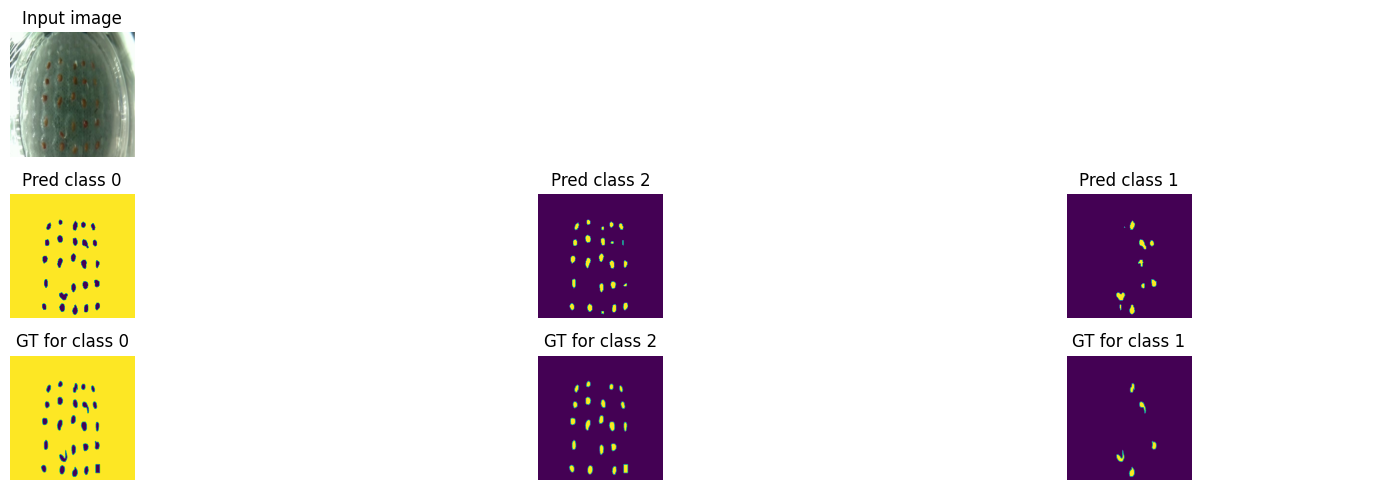

Train loss: 0.18900 | Time: 27m 33s | Val loss: 0.13715
Train_DICE_avg: 0.84459 | Train_Jaccard_avg: 0.78244 | Train_Sensitivity_avg: 0.87472 | Train_Specificity_avg: 0.95647 
Class 0 - Train_DICE: 0.98970 | Train_Jaccard: 0.97972 | Train_Sensitivity: 0.98725 | Train_Specificity: 0.87623 
Class 1 - Train_DICE: 0.68738 | Train_Jaccard: 0.60971 | Train_Sensitivity: 0.78920 | Train_Specificity: 0.99723 
Class 2 - Train_DICE: 0.85669 | Train_Jaccard: 0.75789 | Train_Sensitivity: 0.84771 | Train_Specificity: 0.99597 
Val_DICE_avg: 0.87580 | Val_Jaccard_avg: 0.82382 | Val_Sensitivity_avg: 0.89630 | Val_Specificity_avg: 0.95169 
Class 0 - Val_DICE: 0.99585 | Val_Jaccard: 0.99176 | Val_Sensitivity: 0.99651 | Val_Specificity: 0.86039 
Class 1 - Val_DICE: 0.75313 | Val_Jaccard: 0.68623 | Val_Sensitivity: 0.81790 | Val_Specificity: 0.99782 
Class 2 - Val_DICE: 0.87841 | Val_Jaccard: 0.79347 | Val_Sensitivity: 0.87450 | Val_Specificity: 0.99686 


wandb: uploading artifact best_model; uploading output.log
wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▂▃▄▄▅▅▅▆▆▆▆▆▆▇▇▇███████████████████████
wandb:       Training Jaccard ▁▂▃▄▅▅▅▅▆▆▇▇▇▇▇█████████████████████████
wandb:          Training Loss █▇▆▅▅▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▂▄▄▄▅▅▅▅▅▆▇▇███████████████████████████
wandb:   Training Specificity ▁▇███▇▆▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▄▃▃▃▃
wandb:        Validation DICE ▁▁▃▃▄▄▄▅▅▅▆▆▇▇▇▇████████████████████████
wandb:     Validation Jaccard ▁▂▃▃▃▄▄▅▅▆▆▇▇▇▇▇▇█▇█████████████████████
wandb:        Validation Loss █▇▆▅▅▄▄▄▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▃▃▃▃▄▄▅▅▅▆▆████████████████████████████
wandb: Validation Specificity ▇▇███▇▆▄▃▂▃▂▂▁▁▂▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.84459
wandb:       


Training complete!


In [29]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [30]:
model = DeepLabV3Plus(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [31]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]



Global Performance Metrics:
Loss mean: 0.15774, std: 0.01627
Dice Coefficient mean: 0.83973, std: 0.12689
Jaccard Index mean: 0.78120, std: 0.13993
Sensitivity mean: 0.86975, std: 0.11771
Specificity mean: 0.95240, std: 0.03509

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99519, std: 0.00245
Jaccard mean: 0.99043, std: 0.00483
Sensitivity mean: 0.99524, std: 0.00256
Specificity mean: 0.86468, std: 0.10454

Class 1:
Dice mean: 0.67244, std: 0.35468
Jaccard mean: 0.60316, std: 0.36520
Sensitivity mean: 0.73793, std: 0.33614
Specificity mean: 0.99701, std: 0.00525

Class 2:
Dice mean: 0.85156, std: 0.08273
Jaccard mean: 0.75000, std: 0.11665
Sensitivity mean: 0.87607, std: 0.08765
Specificity mean: 0.99551, std: 0.00281


### Cross-Entropy Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Backbone"] = "mobilenetv3"
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-DeepLabV3+-MobileNetV3-CrossEntropy"]

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.46 GB
GPU Memory - Reserved: 1.81 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251114_000421-hzm796oj
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-DeepLabV3+-MobileNetV3-CrossEntropy
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/hzm796oj



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


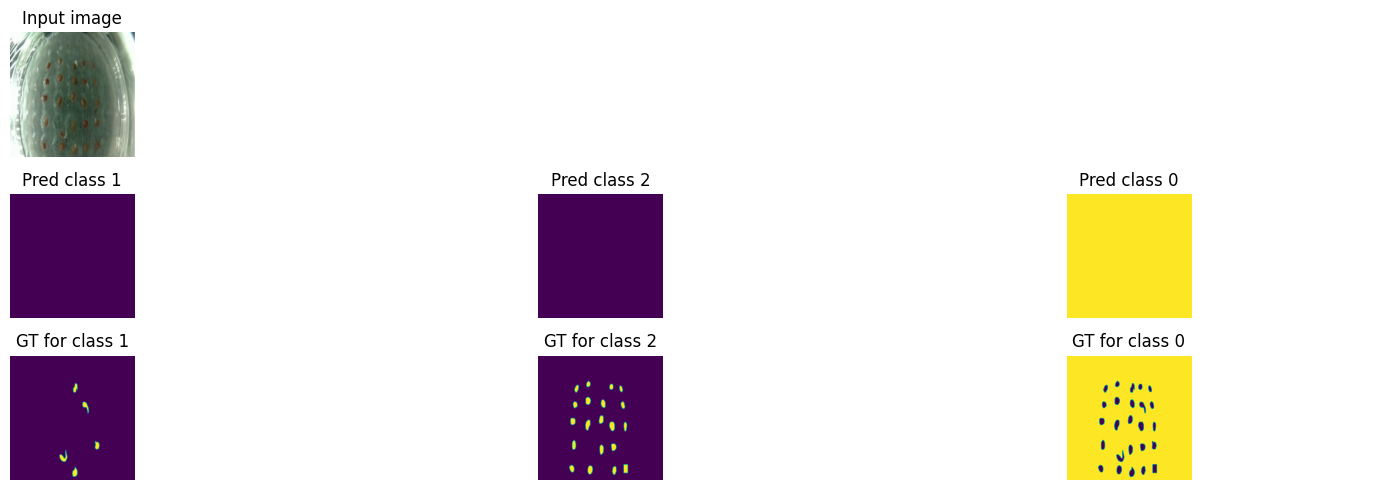

Train loss: 0.49358 | Time: 0m 26s | Val loss: 0.38821
Train_DICE_avg: 0.34575 | Train_Jaccard_avg: 0.30582 | Train_Sensitivity_avg: 0.71409 | Train_Specificity_avg: 0.71992 
Class 0 - Train_DICE: 0.81819 | Train_Jaccard: 0.71968 | Train_Sensitivity: 0.97377 | Train_Specificity: 0.21320 
Class 1 - Train_DICE: 0.18709 | Train_Jaccard: 0.18032 | Train_Sensitivity: 0.58156 | Train_Specificity: 0.98621 
Class 2 - Train_DICE: 0.03197 | Train_Jaccard: 0.01748 | Train_Sensitivity: 0.58693 | Train_Specificity: 0.96035 
Val_DICE_avg: 0.45856 | Val_Jaccard_avg: 0.44565 | Val_Sensitivity_avg: 0.89601 | Val_Specificity_avg: 0.76992 
Class 0 - Val_DICE: 0.96780 | Val_Jaccard: 0.93918 | Val_Sensitivity: 0.98048 | Val_Specificity: 0.36473 
Class 1 - Val_DICE: 0.39634 | Val_Jaccard: 0.39164 | Val_Sensitivity: 0.85045 | Val_Specificity: 0.98924 
Class 2 - Val_DICE: 0.01156 | Val_Jaccard: 0.00614 | Val_Sensitivity: 0.85709 | Val_Specificity: 0.95580 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]


Train loss: 0.27319 | Time: 0m 53s | Val loss: 0.21303
Train_DICE_avg: 0.41826 | Train_Jaccard_avg: 0.40547 | Train_Sensitivity_avg: 0.96196 | Train_Specificity_avg: 0.81141 
Class 0 - Train_DICE: 0.96643 | Train_Jaccard: 0.93570 | Train_Sensitivity: 0.97485 | Train_Specificity: 0.48892 
Class 1 - Train_DICE: 0.27447 | Train_Jaccard: 0.27300 | Train_Sensitivity: 0.95678 | Train_Specificity: 0.98575 
Class 2 - Train_DICE: 0.01387 | Train_Jaccard: 0.00772 | Train_Sensitivity: 0.95427 | Train_Specificity: 0.95957 
Val_DICE_avg: 0.48603 | Val_Jaccard_avg: 0.48093 | Val_Sensitivity_avg: 0.98611 | Val_Specificity_avg: 0.87722 
Class 0 - Val_DICE: 0.98586 | Val_Jaccard: 0.97232 | Val_Sensitivity: 0.97683 | Val_Specificity: 0.68766 
Class 1 - Val_DICE: 0.47205 | Val_Jaccard: 0.47037 | Val_Sensitivity: 0.98149 | Val_Specificity: 0.98844 
Class 2 - Val_DICE: 0.00019 | Val_Jaccard: 0.00009 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.95556 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


Train loss: 0.18339 | Time: 1m 19s | Val loss: 0.14784
Train_DICE_avg: 0.44905 | Train_Jaccard_avg: 0.42872 | Train_Sensitivity_avg: 0.96787 | Train_Specificity_avg: 0.83963 
Class 0 - Train_DICE: 0.97454 | Train_Jaccard: 0.95072 | Train_Sensitivity: 0.98041 | Train_Specificity: 0.57158 
Class 1 - Train_DICE: 0.28282 | Train_Jaccard: 0.28233 | Train_Sensitivity: 0.98474 | Train_Specificity: 0.98582 
Class 2 - Train_DICE: 0.08980 | Train_Jaccard: 0.05312 | Train_Sensitivity: 0.93845 | Train_Specificity: 0.96148 
Val_DICE_avg: 0.48941 | Val_Jaccard_avg: 0.48353 | Val_Sensitivity_avg: 0.97882 | Val_Specificity_avg: 0.91012 
Class 0 - Val_DICE: 0.98780 | Val_Jaccard: 0.97605 | Val_Sensitivity: 0.98010 | Val_Specificity: 0.78621 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.01217 | Val_Jaccard: 0.00627 | Val_Sensitivity: 0.95635 | Val_Specificity: 0.95583 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


Train loss: 0.13930 | Time: 1m 46s | Val loss: 0.11131
Train_DICE_avg: 0.50318 | Train_Jaccard_avg: 0.46688 | Train_Sensitivity_avg: 0.96492 | Train_Specificity_avg: 0.85859 
Class 0 - Train_DICE: 0.97842 | Train_Jaccard: 0.95800 | Train_Sensitivity: 0.98427 | Train_Specificity: 0.62336 
Class 1 - Train_DICE: 0.27877 | Train_Jaccard: 0.27864 | Train_Sensitivity: 0.99114 | Train_Specificity: 0.98583 
Class 2 - Train_DICE: 0.25235 | Train_Jaccard: 0.16400 | Train_Sensitivity: 0.91936 | Train_Specificity: 0.96658 
Val_DICE_avg: 0.51455 | Val_Jaccard_avg: 0.49924 | Val_Sensitivity_avg: 0.97027 | Val_Specificity_avg: 0.90939 
Class 0 - Val_DICE: 0.99039 | Val_Jaccard: 0.98104 | Val_Sensitivity: 0.98552 | Val_Specificity: 0.78208 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.08500 | Val_Jaccard: 0.04841 | Val_Sensitivity: 0.92530 | Val_Specificity: 0.95776 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]


Train loss: 0.11099 | Time: 2m 12s | Val loss: 0.08730
Train_DICE_avg: 0.55707 | Train_Jaccard_avg: 0.50993 | Train_Sensitivity_avg: 0.96164 | Train_Specificity_avg: 0.86898 
Class 0 - Train_DICE: 0.98147 | Train_Jaccard: 0.96380 | Train_Sensitivity: 0.98685 | Train_Specificity: 0.64891 
Class 1 - Train_DICE: 0.28054 | Train_Jaccard: 0.28049 | Train_Sensitivity: 0.99574 | Train_Specificity: 0.98569 
Class 2 - Train_DICE: 0.40919 | Train_Jaccard: 0.28551 | Train_Sensitivity: 0.90232 | Train_Specificity: 0.97235 
Val_DICE_avg: 0.56844 | Val_Jaccard_avg: 0.53438 | Val_Sensitivity_avg: 0.97041 | Val_Specificity_avg: 0.88916 
Class 0 - Val_DICE: 0.99229 | Val_Jaccard: 0.98475 | Val_Sensitivity: 0.99206 | Val_Specificity: 0.71595 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.24478 | Val_Jaccard: 0.15015 | Val_Sensitivity: 0.91916 | Val_Specificity: 0.96320 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


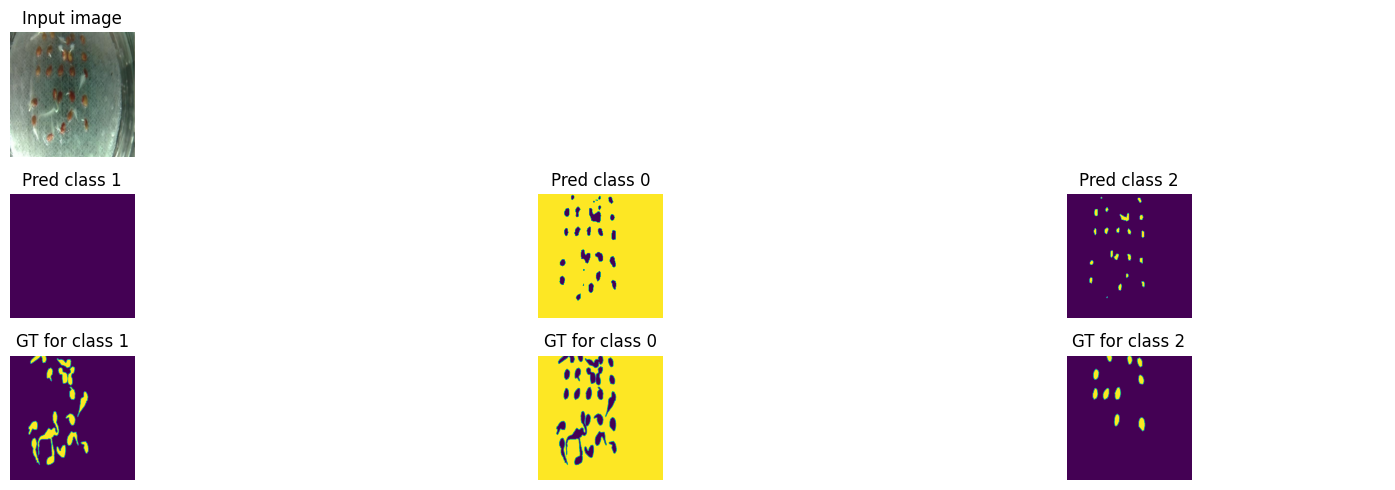

Train loss: 0.09285 | Time: 2m 40s | Val loss: 0.07256
Train_DICE_avg: 0.58370 | Train_Jaccard_avg: 0.53266 | Train_Sensitivity_avg: 0.95907 | Train_Specificity_avg: 0.87695 
Class 0 - Train_DICE: 0.98314 | Train_Jaccard: 0.96698 | Train_Sensitivity: 0.98835 | Train_Specificity: 0.66925 
Class 1 - Train_DICE: 0.27528 | Train_Jaccard: 0.27524 | Train_Sensitivity: 0.99737 | Train_Specificity: 0.98571 
Class 2 - Train_DICE: 0.49267 | Train_Jaccard: 0.35576 | Train_Sensitivity: 0.89150 | Train_Specificity: 0.97590 
Val_DICE_avg: 0.61152 | Val_Jaccard_avg: 0.56797 | Val_Sensitivity_avg: 0.97314 | Val_Specificity_avg: 0.87948 
Class 0 - Val_DICE: 0.99271 | Val_Jaccard: 0.98555 | Val_Sensitivity: 0.99499 | Val_Specificity: 0.68104 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.37361 | Val_Jaccard: 0.25010 | Val_Sensitivity: 0.92442 | Val_Specificity: 0.96907 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]


Train loss: 0.08015 | Time: 3m 7s | Val loss: 0.06180
Train_DICE_avg: 0.59887 | Train_Jaccard_avg: 0.54675 | Train_Sensitivity_avg: 0.96071 | Train_Specificity_avg: 0.87976 
Class 0 - Train_DICE: 0.98431 | Train_Jaccard: 0.96924 | Train_Sensitivity: 0.98978 | Train_Specificity: 0.67640 
Class 1 - Train_DICE: 0.28034 | Train_Jaccard: 0.28031 | Train_Sensitivity: 0.99958 | Train_Specificity: 0.98534 
Class 2 - Train_DICE: 0.53195 | Train_Jaccard: 0.39070 | Train_Sensitivity: 0.89277 | Train_Specificity: 0.97755 
Val_DICE_avg: 0.64215 | Val_Jaccard_avg: 0.59378 | Val_Sensitivity_avg: 0.97519 | Val_Specificity_avg: 0.86064 
Class 0 - Val_DICE: 0.99184 | Val_Jaccard: 0.98384 | Val_Sensitivity: 0.99694 | Val_Specificity: 0.62033 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.46637 | Val_Jaccard: 0.32924 | Val_Sensitivity: 0.92864 | Val_Specificity: 0.97325 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


Train loss: 0.07060 | Time: 3m 33s | Val loss: 0.05434
Train_DICE_avg: 0.60915 | Train_Jaccard_avg: 0.55653 | Train_Sensitivity_avg: 0.96081 | Train_Specificity_avg: 0.88606 
Class 0 - Train_DICE: 0.98517 | Train_Jaccard: 0.97088 | Train_Sensitivity: 0.99029 | Train_Specificity: 0.69317 
Class 1 - Train_DICE: 0.27415 | Train_Jaccard: 0.27411 | Train_Sensitivity: 0.99887 | Train_Specificity: 0.98574 
Class 2 - Train_DICE: 0.56813 | Train_Jaccard: 0.42459 | Train_Sensitivity: 0.89327 | Train_Specificity: 0.97925 
Val_DICE_avg: 0.66204 | Val_Jaccard_avg: 0.61241 | Val_Sensitivity_avg: 0.97557 | Val_Specificity_avg: 0.85846 
Class 0 - Val_DICE: 0.99151 | Val_Jaccard: 0.98321 | Val_Sensitivity: 0.99738 | Val_Specificity: 0.61069 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.52635 | Val_Jaccard: 0.38576 | Val_Sensitivity: 0.92931 | Val_Specificity: 0.97636 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


Train loss: 0.06357 | Time: 4m 0s | Val loss: 0.04802
Train_DICE_avg: 0.61826 | Train_Jaccard_avg: 0.56548 | Train_Sensitivity_avg: 0.96167 | Train_Specificity_avg: 0.88775 
Class 0 - Train_DICE: 0.98563 | Train_Jaccard: 0.97177 | Train_Sensitivity: 0.99108 | Train_Specificity: 0.69741 
Class 1 - Train_DICE: 0.27993 | Train_Jaccard: 0.27983 | Train_Sensitivity: 0.99859 | Train_Specificity: 0.98565 
Class 2 - Train_DICE: 0.58923 | Train_Jaccard: 0.44485 | Train_Sensitivity: 0.89536 | Train_Specificity: 0.98017 
Val_DICE_avg: 0.67250 | Val_Jaccard_avg: 0.62264 | Val_Sensitivity_avg: 0.97811 | Val_Specificity_avg: 0.85729 
Class 0 - Val_DICE: 0.99143 | Val_Jaccard: 0.98306 | Val_Sensitivity: 0.99762 | Val_Specificity: 0.60548 
Class 1 - Val_DICE: 0.46947 | Val_Jaccard: 0.46889 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98837 
Class 2 - Val_DICE: 0.55660 | Val_Jaccard: 0.41599 | Val_Sensitivity: 0.93671 | Val_Specificity: 0.97801 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]


Train loss: 0.05797 | Time: 4m 26s | Val loss: 0.04488
Train_DICE_avg: 0.62451 | Train_Jaccard_avg: 0.57172 | Train_Sensitivity_avg: 0.96067 | Train_Specificity_avg: 0.89034 
Class 0 - Train_DICE: 0.98636 | Train_Jaccard: 0.97318 | Train_Sensitivity: 0.99161 | Train_Specificity: 0.70442 
Class 1 - Train_DICE: 0.27668 | Train_Jaccard: 0.27518 | Train_Sensitivity: 0.99478 | Train_Specificity: 0.98551 
Class 2 - Train_DICE: 0.61048 | Train_Jaccard: 0.46681 | Train_Sensitivity: 0.89561 | Train_Specificity: 0.98107 
Val_DICE_avg: 0.68882 | Val_Jaccard_avg: 0.63564 | Val_Sensitivity_avg: 0.97714 | Val_Specificity_avg: 0.84533 
Class 0 - Val_DICE: 0.99036 | Val_Jaccard: 0.98095 | Val_Sensitivity: 0.99828 | Val_Specificity: 0.56796 
Class 1 - Val_DICE: 0.48208 | Val_Jaccard: 0.47622 | Val_Sensitivity: 0.99810 | Val_Specificity: 0.98880 
Class 2 - Val_DICE: 0.59402 | Val_Jaccard: 0.44975 | Val_Sensitivity: 0.93504 | Val_Specificity: 0.97923 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


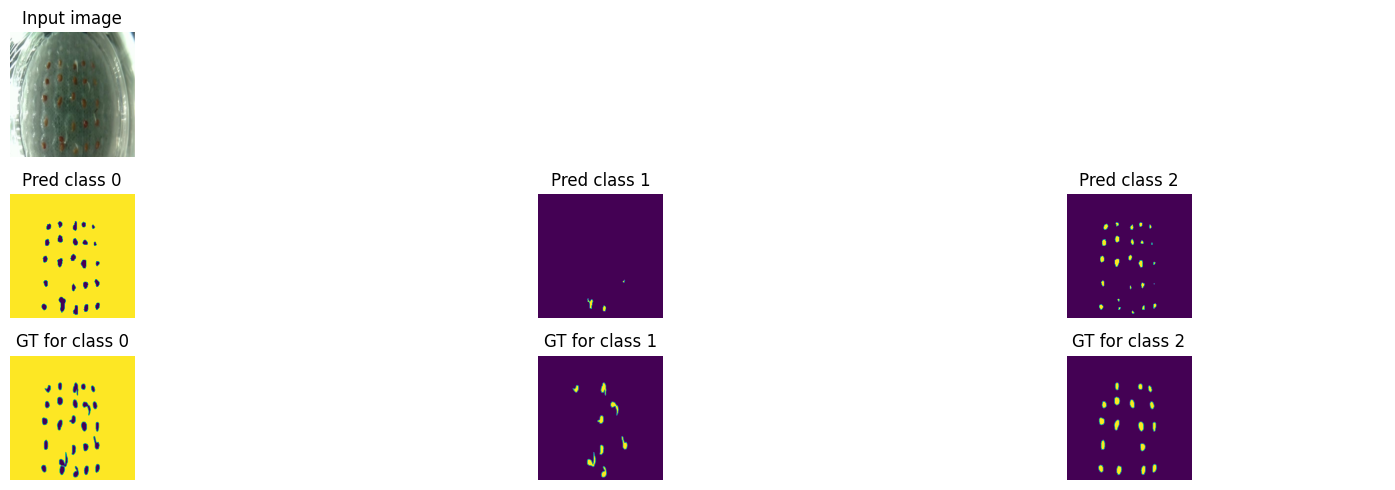

Train loss: 0.04979 | Time: 4m 54s | Val loss: 0.03424
Train_DICE_avg: 0.63810 | Train_Jaccard_avg: 0.58462 | Train_Sensitivity_avg: 0.95852 | Train_Specificity_avg: 0.89462 
Class 0 - Train_DICE: 0.98672 | Train_Jaccard: 0.97389 | Train_Sensitivity: 0.99177 | Train_Specificity: 0.71587 
Class 1 - Train_DICE: 0.29622 | Train_Jaccard: 0.29109 | Train_Sensitivity: 0.98702 | Train_Specificity: 0.98577 
Class 2 - Train_DICE: 0.63137 | Train_Jaccard: 0.48889 | Train_Sensitivity: 0.89679 | Train_Specificity: 0.98222 
Val_DICE_avg: 0.69775 | Val_Jaccard_avg: 0.64348 | Val_Sensitivity_avg: 0.97460 | Val_Specificity_avg: 0.85244 
Class 0 - Val_DICE: 0.99104 | Val_Jaccard: 0.98229 | Val_Sensitivity: 0.99822 | Val_Specificity: 0.58797 
Class 1 - Val_DICE: 0.49032 | Val_Jaccard: 0.48046 | Val_Sensitivity: 0.98891 | Val_Specificity: 0.98939 
Class 2 - Val_DICE: 0.61189 | Val_Jaccard: 0.46768 | Val_Sensitivity: 0.93667 | Val_Specificity: 0.97995 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


Train loss: 0.04225 | Time: 5m 22s | Val loss: 0.02954
Train_DICE_avg: 0.65120 | Train_Jaccard_avg: 0.59613 | Train_Sensitivity_avg: 0.94850 | Train_Specificity_avg: 0.89664 
Class 0 - Train_DICE: 0.98710 | Train_Jaccard: 0.97462 | Train_Sensitivity: 0.99218 | Train_Specificity: 0.71978 
Class 1 - Train_DICE: 0.30839 | Train_Jaccard: 0.29640 | Train_Sensitivity: 0.95884 | Train_Specificity: 0.98642 
Class 2 - Train_DICE: 0.65810 | Train_Jaccard: 0.51737 | Train_Sensitivity: 0.89447 | Train_Specificity: 0.98370 
Val_DICE_avg: 0.70880 | Val_Jaccard_avg: 0.65229 | Val_Sensitivity_avg: 0.96756 | Val_Specificity_avg: 0.85358 
Class 0 - Val_DICE: 0.99101 | Val_Jaccard: 0.98223 | Val_Sensitivity: 0.99862 | Val_Specificity: 0.58983 
Class 1 - Val_DICE: 0.51633 | Val_Jaccard: 0.49799 | Val_Sensitivity: 0.96450 | Val_Specificity: 0.99008 
Class 2 - Val_DICE: 0.61907 | Val_Jaccard: 0.47666 | Val_Sensitivity: 0.93957 | Val_Specificity: 0.98082 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


Train loss: 0.03790 | Time: 5m 50s | Val loss: 0.02726
Train_DICE_avg: 0.65982 | Train_Jaccard_avg: 0.60279 | Train_Sensitivity_avg: 0.94677 | Train_Specificity_avg: 0.89569 
Class 0 - Train_DICE: 0.98773 | Train_Jaccard: 0.97583 | Train_Sensitivity: 0.99293 | Train_Specificity: 0.71639 
Class 1 - Train_DICE: 0.32156 | Train_Jaccard: 0.30282 | Train_Sensitivity: 0.94915 | Train_Specificity: 0.98665 
Class 2 - Train_DICE: 0.67018 | Train_Jaccard: 0.52973 | Train_Sensitivity: 0.89824 | Train_Specificity: 0.98404 
Val_DICE_avg: 0.72113 | Val_Jaccard_avg: 0.65946 | Val_Sensitivity_avg: 0.95840 | Val_Specificity_avg: 0.85509 
Class 0 - Val_DICE: 0.99131 | Val_Jaccard: 0.98281 | Val_Sensitivity: 0.99861 | Val_Specificity: 0.59401 
Class 1 - Val_DICE: 0.54853 | Val_Jaccard: 0.51949 | Val_Sensitivity: 0.93135 | Val_Specificity: 0.99128 
Class 2 - Val_DICE: 0.62354 | Val_Jaccard: 0.47608 | Val_Sensitivity: 0.94525 | Val_Specificity: 0.97998 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]


Train loss: 0.03593 | Time: 6m 18s | Val loss: 0.02515
Train_DICE_avg: 0.67157 | Train_Jaccard_avg: 0.61282 | Train_Sensitivity_avg: 0.94226 | Train_Specificity_avg: 0.89957 
Class 0 - Train_DICE: 0.98801 | Train_Jaccard: 0.97638 | Train_Sensitivity: 0.99297 | Train_Specificity: 0.72718 
Class 1 - Train_DICE: 0.34578 | Train_Jaccard: 0.31991 | Train_Sensitivity: 0.93567 | Train_Specificity: 0.98704 
Class 2 - Train_DICE: 0.68091 | Train_Jaccard: 0.54217 | Train_Sensitivity: 0.89813 | Train_Specificity: 0.98450 
Val_DICE_avg: 0.73544 | Val_Jaccard_avg: 0.67430 | Val_Sensitivity_avg: 0.95987 | Val_Specificity_avg: 0.85393 
Class 0 - Val_DICE: 0.99106 | Val_Jaccard: 0.98234 | Val_Sensitivity: 0.99888 | Val_Specificity: 0.58848 
Class 1 - Val_DICE: 0.55385 | Val_Jaccard: 0.52364 | Val_Sensitivity: 0.94206 | Val_Specificity: 0.99131 
Class 2 - Val_DICE: 0.66141 | Val_Jaccard: 0.51692 | Val_Sensitivity: 0.93865 | Val_Specificity: 0.98199 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


Train loss: 0.03410 | Time: 6m 47s | Val loss: 0.02419
Train_DICE_avg: 0.67650 | Train_Jaccard_avg: 0.61619 | Train_Sensitivity_avg: 0.94193 | Train_Specificity_avg: 0.89670 
Class 0 - Train_DICE: 0.98827 | Train_Jaccard: 0.97688 | Train_Sensitivity: 0.99350 | Train_Specificity: 0.71827 
Class 1 - Train_DICE: 0.35264 | Train_Jaccard: 0.32203 | Train_Sensitivity: 0.93112 | Train_Specificity: 0.98702 
Class 2 - Train_DICE: 0.68858 | Train_Jaccard: 0.54965 | Train_Sensitivity: 0.90116 | Train_Specificity: 0.98480 
Val_DICE_avg: 0.75097 | Val_Jaccard_avg: 0.68930 | Val_Sensitivity_avg: 0.95869 | Val_Specificity_avg: 0.84439 
Class 0 - Val_DICE: 0.99005 | Val_Jaccard: 0.98036 | Val_Sensitivity: 0.99899 | Val_Specificity: 0.55795 
Class 1 - Val_DICE: 0.56408 | Val_Jaccard: 0.52890 | Val_Sensitivity: 0.93873 | Val_Specificity: 0.99139 
Class 2 - Val_DICE: 0.69878 | Val_Jaccard: 0.55866 | Val_Sensitivity: 0.93835 | Val_Specificity: 0.98382 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]


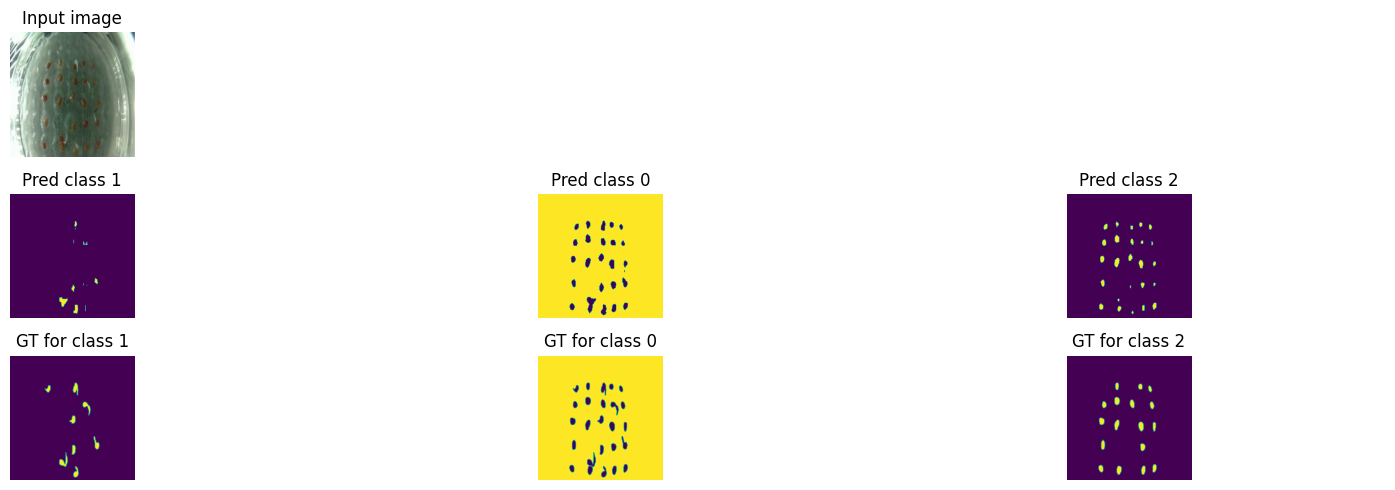

Train loss: 0.03259 | Time: 7m 16s | Val loss: 0.02342
Train_DICE_avg: 0.68036 | Train_Jaccard_avg: 0.61946 | Train_Sensitivity_avg: 0.94082 | Train_Specificity_avg: 0.90001 
Class 0 - Train_DICE: 0.98861 | Train_Jaccard: 0.97753 | Train_Sensitivity: 0.99387 | Train_Specificity: 0.72793 
Class 1 - Train_DICE: 0.35645 | Train_Jaccard: 0.32275 | Train_Sensitivity: 0.92597 | Train_Specificity: 0.98719 
Class 2 - Train_DICE: 0.69603 | Train_Jaccard: 0.55810 | Train_Sensitivity: 0.90261 | Train_Specificity: 0.98493 
Val_DICE_avg: 0.75404 | Val_Jaccard_avg: 0.68923 | Val_Sensitivity_avg: 0.95611 | Val_Specificity_avg: 0.84841 
Class 0 - Val_DICE: 0.99055 | Val_Jaccard: 0.98133 | Val_Sensitivity: 0.99908 | Val_Specificity: 0.57079 
Class 1 - Val_DICE: 0.58141 | Val_Jaccard: 0.54175 | Val_Sensitivity: 0.93431 | Val_Specificity: 0.99137 
Class 2 - Val_DICE: 0.69017 | Val_Jaccard: 0.54462 | Val_Sensitivity: 0.93493 | Val_Specificity: 0.98306 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


Train loss: 0.03140 | Time: 7m 44s | Val loss: 0.02260
Train_DICE_avg: 0.68793 | Train_Jaccard_avg: 0.62612 | Train_Sensitivity_avg: 0.94056 | Train_Specificity_avg: 0.90112 
Class 0 - Train_DICE: 0.98892 | Train_Jaccard: 0.97814 | Train_Sensitivity: 0.99411 | Train_Specificity: 0.73061 
Class 1 - Train_DICE: 0.37234 | Train_Jaccard: 0.33510 | Train_Sensitivity: 0.92151 | Train_Specificity: 0.98744 
Class 2 - Train_DICE: 0.70253 | Train_Jaccard: 0.56513 | Train_Sensitivity: 0.90606 | Train_Specificity: 0.98531 
Val_DICE_avg: 0.75493 | Val_Jaccard_avg: 0.68674 | Val_Sensitivity_avg: 0.95843 | Val_Specificity_avg: 0.85299 
Class 0 - Val_DICE: 0.99090 | Val_Jaccard: 0.98202 | Val_Sensitivity: 0.99907 | Val_Specificity: 0.58460 
Class 1 - Val_DICE: 0.61560 | Val_Jaccard: 0.56477 | Val_Sensitivity: 0.92056 | Val_Specificity: 0.99259 
Class 2 - Val_DICE: 0.65830 | Val_Jaccard: 0.51344 | Val_Sensitivity: 0.95565 | Val_Specificity: 0.98179 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]


Train loss: 0.03080 | Time: 8m 12s | Val loss: 0.02172
Train_DICE_avg: 0.69653 | Train_Jaccard_avg: 0.63412 | Train_Sensitivity_avg: 0.93881 | Train_Specificity_avg: 0.90232 
Class 0 - Train_DICE: 0.98898 | Train_Jaccard: 0.97827 | Train_Sensitivity: 0.99395 | Train_Specificity: 0.73365 
Class 1 - Train_DICE: 0.39227 | Train_Jaccard: 0.35228 | Train_Sensitivity: 0.91691 | Train_Specificity: 0.98757 
Class 2 - Train_DICE: 0.70832 | Train_Jaccard: 0.57180 | Train_Sensitivity: 0.90558 | Train_Specificity: 0.98574 
Val_DICE_avg: 0.75221 | Val_Jaccard_avg: 0.68669 | Val_Sensitivity_avg: 0.96246 | Val_Specificity_avg: 0.86082 
Class 0 - Val_DICE: 0.99191 | Val_Jaccard: 0.98400 | Val_Sensitivity: 0.99892 | Val_Specificity: 0.60841 
Class 1 - Val_DICE: 0.58828 | Val_Jaccard: 0.54525 | Val_Sensitivity: 0.94113 | Val_Specificity: 0.99164 
Class 2 - Val_DICE: 0.67644 | Val_Jaccard: 0.53082 | Val_Sensitivity: 0.94732 | Val_Specificity: 0.98243 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]


Train loss: 0.03024 | Time: 8m 39s | Val loss: 0.02114
Train_DICE_avg: 0.69639 | Train_Jaccard_avg: 0.63412 | Train_Sensitivity_avg: 0.93849 | Train_Specificity_avg: 0.90225 
Class 0 - Train_DICE: 0.98904 | Train_Jaccard: 0.97837 | Train_Sensitivity: 0.99438 | Train_Specificity: 0.73335 
Class 1 - Train_DICE: 0.38957 | Train_Jaccard: 0.34929 | Train_Sensitivity: 0.91174 | Train_Specificity: 0.98775 
Class 2 - Train_DICE: 0.71057 | Train_Jaccard: 0.57471 | Train_Sensitivity: 0.90936 | Train_Specificity: 0.98564 
Val_DICE_avg: 0.76044 | Val_Jaccard_avg: 0.69342 | Val_Sensitivity_avg: 0.95677 | Val_Specificity_avg: 0.85673 
Class 0 - Val_DICE: 0.99134 | Val_Jaccard: 0.98287 | Val_Sensitivity: 0.99908 | Val_Specificity: 0.59472 
Class 1 - Val_DICE: 0.59337 | Val_Jaccard: 0.54513 | Val_Sensitivity: 0.92241 | Val_Specificity: 0.99223 
Class 2 - Val_DICE: 0.69662 | Val_Jaccard: 0.55226 | Val_Sensitivity: 0.94882 | Val_Specificity: 0.98325 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]


Train loss: 0.02944 | Time: 9m 5s | Val loss: 0.02061
Train_DICE_avg: 0.70169 | Train_Jaccard_avg: 0.63851 | Train_Sensitivity_avg: 0.93934 | Train_Specificity_avg: 0.90250 
Class 0 - Train_DICE: 0.98935 | Train_Jaccard: 0.97898 | Train_Sensitivity: 0.99458 | Train_Specificity: 0.73396 
Class 1 - Train_DICE: 0.40069 | Train_Jaccard: 0.35704 | Train_Sensitivity: 0.91420 | Train_Specificity: 0.98768 
Class 2 - Train_DICE: 0.71505 | Train_Jaccard: 0.57953 | Train_Sensitivity: 0.90924 | Train_Specificity: 0.98586 
Val_DICE_avg: 0.77127 | Val_Jaccard_avg: 0.70470 | Val_Sensitivity_avg: 0.96478 | Val_Specificity_avg: 0.85556 
Class 0 - Val_DICE: 0.99122 | Val_Jaccard: 0.98265 | Val_Sensitivity: 0.99913 | Val_Specificity: 0.59085 
Class 1 - Val_DICE: 0.62072 | Val_Jaccard: 0.57275 | Val_Sensitivity: 0.94591 | Val_Specificity: 0.99243 
Class 2 - Val_DICE: 0.70186 | Val_Jaccard: 0.55869 | Val_Sensitivity: 0.94931 | Val_Specificity: 0.98339 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]


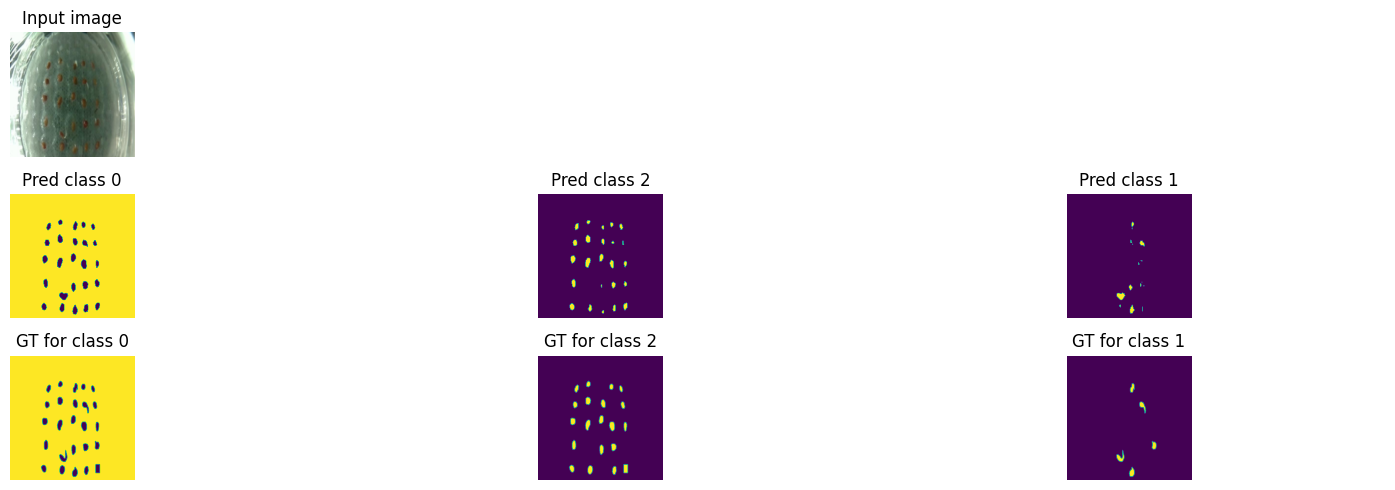

Train loss: 0.02867 | Time: 9m 33s | Val loss: 0.02062
Train_DICE_avg: 0.70156 | Train_Jaccard_avg: 0.63835 | Train_Sensitivity_avg: 0.93837 | Train_Specificity_avg: 0.90294 
Class 0 - Train_DICE: 0.98953 | Train_Jaccard: 0.97933 | Train_Sensitivity: 0.99485 | Train_Specificity: 0.73506 
Class 1 - Train_DICE: 0.39474 | Train_Jaccard: 0.34973 | Train_Sensitivity: 0.91117 | Train_Specificity: 0.98763 
Class 2 - Train_DICE: 0.72041 | Train_Jaccard: 0.58599 | Train_Sensitivity: 0.90909 | Train_Specificity: 0.98613 
Val_DICE_avg: 0.77983 | Val_Jaccard_avg: 0.71134 | Val_Sensitivity_avg: 0.96180 | Val_Specificity_avg: 0.84905 
Class 0 - Val_DICE: 0.99053 | Val_Jaccard: 0.98129 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.57050 
Class 1 - Val_DICE: 0.64594 | Val_Jaccard: 0.58949 | Val_Sensitivity: 0.93371 | Val_Specificity: 0.99281 
Class 2 - Val_DICE: 0.70301 | Val_Jaccard: 0.56322 | Val_Sensitivity: 0.95244 | Val_Specificity: 0.98385 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]


Train loss: 0.02791 | Time: 9m 59s | Val loss: 0.02011
Train_DICE_avg: 0.71104 | Train_Jaccard_avg: 0.64684 | Train_Sensitivity_avg: 0.93676 | Train_Specificity_avg: 0.90305 
Class 0 - Train_DICE: 0.98958 | Train_Jaccard: 0.97943 | Train_Sensitivity: 0.99496 | Train_Specificity: 0.73499 
Class 1 - Train_DICE: 0.41853 | Train_Jaccard: 0.37050 | Train_Sensitivity: 0.90502 | Train_Specificity: 0.98803 
Class 2 - Train_DICE: 0.72501 | Train_Jaccard: 0.59059 | Train_Sensitivity: 0.91030 | Train_Specificity: 0.98613 
Val_DICE_avg: 0.77037 | Val_Jaccard_avg: 0.69975 | Val_Sensitivity_avg: 0.95805 | Val_Specificity_avg: 0.86049 
Class 0 - Val_DICE: 0.99166 | Val_Jaccard: 0.98350 | Val_Sensitivity: 0.99918 | Val_Specificity: 0.60624 
Class 1 - Val_DICE: 0.65289 | Val_Jaccard: 0.59418 | Val_Sensitivity: 0.91209 | Val_Specificity: 0.99331 
Class 2 - Val_DICE: 0.66656 | Val_Jaccard: 0.52157 | Val_Sensitivity: 0.96287 | Val_Specificity: 0.98193 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]


Train loss: 0.02776 | Time: 10m 25s | Val loss: 0.01996
Train_DICE_avg: 0.71070 | Train_Jaccard_avg: 0.64564 | Train_Sensitivity_avg: 0.93765 | Train_Specificity_avg: 0.90404 
Class 0 - Train_DICE: 0.98969 | Train_Jaccard: 0.97963 | Train_Sensitivity: 0.99487 | Train_Specificity: 0.73807 
Class 1 - Train_DICE: 0.41568 | Train_Jaccard: 0.36546 | Train_Sensitivity: 0.90499 | Train_Specificity: 0.98794 
Class 2 - Train_DICE: 0.72674 | Train_Jaccard: 0.59182 | Train_Sensitivity: 0.91310 | Train_Specificity: 0.98613 
Val_DICE_avg: 0.77959 | Val_Jaccard_avg: 0.71217 | Val_Sensitivity_avg: 0.96063 | Val_Specificity_avg: 0.85105 
Class 0 - Val_DICE: 0.99055 | Val_Jaccard: 0.98134 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.57568 
Class 1 - Val_DICE: 0.63744 | Val_Jaccard: 0.58096 | Val_Sensitivity: 0.93231 | Val_Specificity: 0.99271 
Class 2 - Val_DICE: 0.71079 | Val_Jaccard: 0.57423 | Val_Sensitivity: 0.95034 | Val_Specificity: 0.98475 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


Train loss: 0.02718 | Time: 10m 52s | Val loss: 0.01956
Train_DICE_avg: 0.71588 | Train_Jaccard_avg: 0.65136 | Train_Sensitivity_avg: 0.93742 | Train_Specificity_avg: 0.90615 
Class 0 - Train_DICE: 0.98985 | Train_Jaccard: 0.97996 | Train_Sensitivity: 0.99501 | Train_Specificity: 0.74350 
Class 1 - Train_DICE: 0.42601 | Train_Jaccard: 0.37577 | Train_Sensitivity: 0.90597 | Train_Specificity: 0.98844 
Class 2 - Train_DICE: 0.73177 | Train_Jaccard: 0.59836 | Train_Sensitivity: 0.91129 | Train_Specificity: 0.98651 
Val_DICE_avg: 0.78017 | Val_Jaccard_avg: 0.71136 | Val_Sensitivity_avg: 0.96115 | Val_Specificity_avg: 0.85189 
Class 0 - Val_DICE: 0.99091 | Val_Jaccard: 0.98203 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.57865 
Class 1 - Val_DICE: 0.64226 | Val_Jaccard: 0.58437 | Val_Sensitivity: 0.92621 | Val_Specificity: 0.99291 
Class 2 - Val_DICE: 0.70734 | Val_Jaccard: 0.56767 | Val_Sensitivity: 0.95799 | Val_Specificity: 0.98412 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]


Train loss: 0.02676 | Time: 11m 18s | Val loss: 0.01928
Train_DICE_avg: 0.71429 | Train_Jaccard_avg: 0.64940 | Train_Sensitivity_avg: 0.93849 | Train_Specificity_avg: 0.90442 
Class 0 - Train_DICE: 0.98991 | Train_Jaccard: 0.98008 | Train_Sensitivity: 0.99520 | Train_Specificity: 0.73843 
Class 1 - Train_DICE: 0.41750 | Train_Jaccard: 0.36576 | Train_Sensitivity: 0.90596 | Train_Specificity: 0.98823 
Class 2 - Train_DICE: 0.73544 | Train_Jaccard: 0.60236 | Train_Sensitivity: 0.91431 | Train_Specificity: 0.98660 
Val_DICE_avg: 0.77791 | Val_Jaccard_avg: 0.70967 | Val_Sensitivity_avg: 0.96557 | Val_Specificity_avg: 0.85957 
Class 0 - Val_DICE: 0.99156 | Val_Jaccard: 0.98332 | Val_Sensitivity: 0.99920 | Val_Specificity: 0.60235 
Class 1 - Val_DICE: 0.63742 | Val_Jaccard: 0.58306 | Val_Sensitivity: 0.94423 | Val_Specificity: 0.99268 
Class 2 - Val_DICE: 0.70475 | Val_Jaccard: 0.56263 | Val_Sensitivity: 0.95328 | Val_Specificity: 0.98368 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]


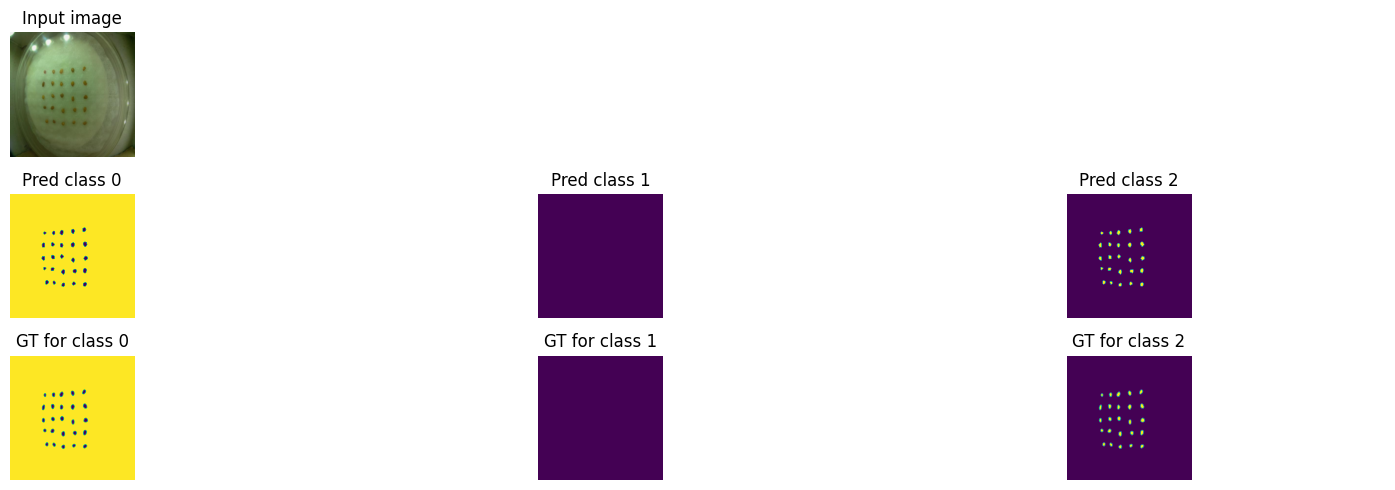

Train loss: 0.02641 | Time: 11m 45s | Val loss: 0.01882
Train_DICE_avg: 0.72217 | Train_Jaccard_avg: 0.65725 | Train_Sensitivity_avg: 0.93975 | Train_Specificity_avg: 0.90623 
Class 0 - Train_DICE: 0.99008 | Train_Jaccard: 0.98039 | Train_Sensitivity: 0.99521 | Train_Specificity: 0.74331 
Class 1 - Train_DICE: 0.43938 | Train_Jaccard: 0.38616 | Train_Sensitivity: 0.90841 | Train_Specificity: 0.98856 
Class 2 - Train_DICE: 0.73706 | Train_Jaccard: 0.60521 | Train_Sensitivity: 0.91563 | Train_Specificity: 0.98683 
Val_DICE_avg: 0.78280 | Val_Jaccard_avg: 0.71265 | Val_Sensitivity_avg: 0.95774 | Val_Specificity_avg: 0.85784 
Class 0 - Val_DICE: 0.99136 | Val_Jaccard: 0.98291 | Val_Sensitivity: 0.99924 | Val_Specificity: 0.59675 
Class 1 - Val_DICE: 0.65566 | Val_Jaccard: 0.59550 | Val_Sensitivity: 0.91168 | Val_Specificity: 0.99336 
Class 2 - Val_DICE: 0.70138 | Val_Jaccard: 0.55954 | Val_Sensitivity: 0.96230 | Val_Specificity: 0.98342 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


Train loss: 0.02600 | Time: 12m 11s | Val loss: 0.01888
Train_DICE_avg: 0.72632 | Train_Jaccard_avg: 0.66085 | Train_Sensitivity_avg: 0.94017 | Train_Specificity_avg: 0.90623 
Class 0 - Train_DICE: 0.99014 | Train_Jaccard: 0.98052 | Train_Sensitivity: 0.99534 | Train_Specificity: 0.74323 
Class 1 - Train_DICE: 0.44631 | Train_Jaccard: 0.39091 | Train_Sensitivity: 0.90860 | Train_Specificity: 0.98842 
Class 2 - Train_DICE: 0.74249 | Train_Jaccard: 0.61112 | Train_Sensitivity: 0.91658 | Train_Specificity: 0.98704 
Val_DICE_avg: 0.78350 | Val_Jaccard_avg: 0.71225 | Val_Sensitivity_avg: 0.95968 | Val_Specificity_avg: 0.85616 
Class 0 - Val_DICE: 0.99127 | Val_Jaccard: 0.98273 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.59177 
Class 1 - Val_DICE: 0.66378 | Val_Jaccard: 0.60196 | Val_Sensitivity: 0.90993 | Val_Specificity: 0.99372 
Class 2 - Val_DICE: 0.69546 | Val_Jaccard: 0.55205 | Val_Sensitivity: 0.96982 | Val_Specificity: 0.98301 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]


Train loss: 0.02566 | Time: 12m 38s | Val loss: 0.01874
Train_DICE_avg: 0.72521 | Train_Jaccard_avg: 0.65999 | Train_Sensitivity_avg: 0.93717 | Train_Specificity_avg: 0.90802 
Class 0 - Train_DICE: 0.99034 | Train_Jaccard: 0.98090 | Train_Sensitivity: 0.99539 | Train_Specificity: 0.74837 
Class 1 - Train_DICE: 0.44318 | Train_Jaccard: 0.38879 | Train_Sensitivity: 0.89951 | Train_Specificity: 0.98875 
Class 2 - Train_DICE: 0.74210 | Train_Jaccard: 0.61028 | Train_Sensitivity: 0.91661 | Train_Specificity: 0.98693 
Val_DICE_avg: 0.77778 | Val_Jaccard_avg: 0.70881 | Val_Sensitivity_avg: 0.96340 | Val_Specificity_avg: 0.85775 
Class 0 - Val_DICE: 0.99142 | Val_Jaccard: 0.98303 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.59669 
Class 1 - Val_DICE: 0.64772 | Val_Jaccard: 0.58961 | Val_Sensitivity: 0.92405 | Val_Specificity: 0.99306 
Class 2 - Val_DICE: 0.69419 | Val_Jaccard: 0.55378 | Val_Sensitivity: 0.96688 | Val_Specificity: 0.98349 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]


Train loss: 0.02546 | Time: 13m 4s | Val loss: 0.01873
Train_DICE_avg: 0.72780 | Train_Jaccard_avg: 0.66213 | Train_Sensitivity_avg: 0.94145 | Train_Specificity_avg: 0.90654 
Class 0 - Train_DICE: 0.99029 | Train_Jaccard: 0.98080 | Train_Sensitivity: 0.99550 | Train_Specificity: 0.74404 
Class 1 - Train_DICE: 0.45038 | Train_Jaccard: 0.39406 | Train_Sensitivity: 0.91000 | Train_Specificity: 0.98862 
Class 2 - Train_DICE: 0.74273 | Train_Jaccard: 0.61154 | Train_Sensitivity: 0.91884 | Train_Specificity: 0.98696 
Val_DICE_avg: 0.78678 | Val_Jaccard_avg: 0.71654 | Val_Sensitivity_avg: 0.95810 | Val_Specificity_avg: 0.85757 
Class 0 - Val_DICE: 0.99130 | Val_Jaccard: 0.98280 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.59563 
Class 1 - Val_DICE: 0.66915 | Val_Jaccard: 0.60931 | Val_Sensitivity: 0.90677 | Val_Specificity: 0.99387 
Class 2 - Val_DICE: 0.69988 | Val_Jaccard: 0.55753 | Val_Sensitivity: 0.96822 | Val_Specificity: 0.98322 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]


Train loss: 0.02492 | Time: 13m 31s | Val loss: 0.01822
Train_DICE_avg: 0.72874 | Train_Jaccard_avg: 0.66297 | Train_Sensitivity_avg: 0.93901 | Train_Specificity_avg: 0.90658 
Class 0 - Train_DICE: 0.99046 | Train_Jaccard: 0.98114 | Train_Sensitivity: 0.99571 | Train_Specificity: 0.74436 
Class 1 - Train_DICE: 0.44808 | Train_Jaccard: 0.39119 | Train_Sensitivity: 0.90019 | Train_Specificity: 0.98847 
Class 2 - Train_DICE: 0.74768 | Train_Jaccard: 0.61656 | Train_Sensitivity: 0.92113 | Train_Specificity: 0.98691 
Val_DICE_avg: 0.78929 | Val_Jaccard_avg: 0.71868 | Val_Sensitivity_avg: 0.96294 | Val_Specificity_avg: 0.86122 
Class 0 - Val_DICE: 0.99180 | Val_Jaccard: 0.98378 | Val_Sensitivity: 0.99925 | Val_Specificity: 0.60688 
Class 1 - Val_DICE: 0.67400 | Val_Jaccard: 0.61188 | Val_Sensitivity: 0.92198 | Val_Specificity: 0.99326 
Class 2 - Val_DICE: 0.70207 | Val_Jaccard: 0.56037 | Val_Sensitivity: 0.96761 | Val_Specificity: 0.98351 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]


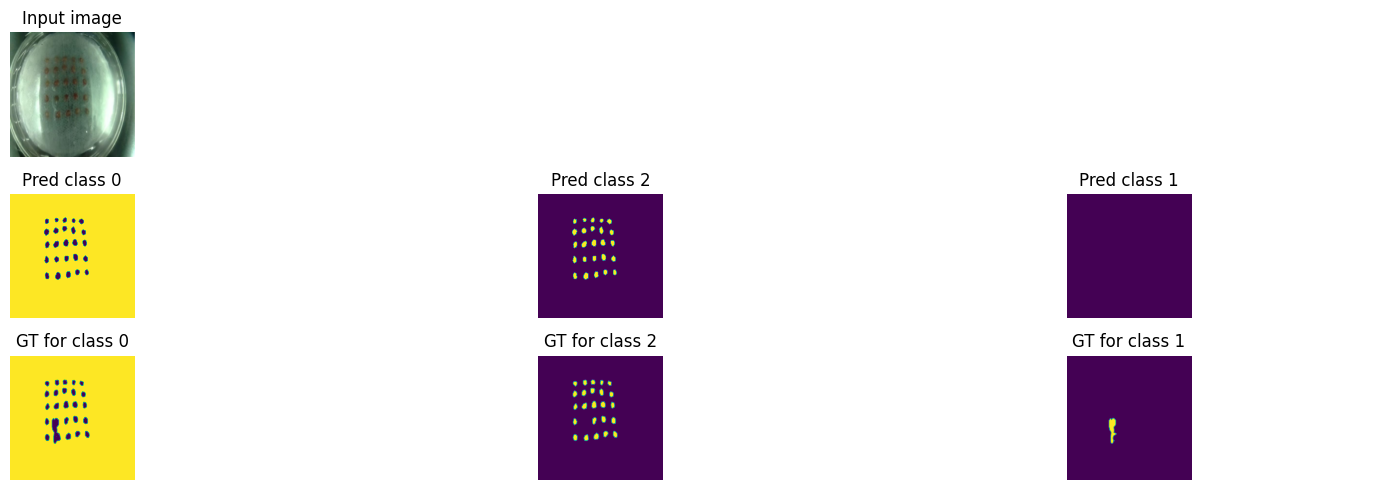

Train loss: 0.02507 | Time: 13m 58s | Val loss: 0.01833
Train_DICE_avg: 0.73206 | Train_Jaccard_avg: 0.66622 | Train_Sensitivity_avg: 0.94093 | Train_Specificity_avg: 0.90772 
Class 0 - Train_DICE: 0.99043 | Train_Jaccard: 0.98109 | Train_Sensitivity: 0.99562 | Train_Specificity: 0.74742 
Class 1 - Train_DICE: 0.45761 | Train_Jaccard: 0.40016 | Train_Sensitivity: 0.90835 | Train_Specificity: 0.98865 
Class 2 - Train_DICE: 0.74813 | Train_Jaccard: 0.61742 | Train_Sensitivity: 0.91883 | Train_Specificity: 0.98708 
Val_DICE_avg: 0.79451 | Val_Jaccard_avg: 0.72445 | Val_Sensitivity_avg: 0.96610 | Val_Specificity_avg: 0.85977 
Class 0 - Val_DICE: 0.99138 | Val_Jaccard: 0.98297 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.60158 
Class 1 - Val_DICE: 0.68142 | Val_Jaccard: 0.62088 | Val_Sensitivity: 0.93301 | Val_Specificity: 0.99383 
Class 2 - Val_DICE: 0.71073 | Val_Jaccard: 0.56950 | Val_Sensitivity: 0.96594 | Val_Specificity: 0.98392 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]


Train loss: 0.02473 | Time: 14m 24s | Val loss: 0.01824
Train_DICE_avg: 0.73151 | Train_Jaccard_avg: 0.66566 | Train_Sensitivity_avg: 0.94134 | Train_Specificity_avg: 0.90761 
Class 0 - Train_DICE: 0.99053 | Train_Jaccard: 0.98128 | Train_Sensitivity: 0.99571 | Train_Specificity: 0.74687 
Class 1 - Train_DICE: 0.45600 | Train_Jaccard: 0.39849 | Train_Sensitivity: 0.90870 | Train_Specificity: 0.98877 
Class 2 - Train_DICE: 0.74800 | Train_Jaccard: 0.61721 | Train_Sensitivity: 0.91962 | Train_Specificity: 0.98718 
Val_DICE_avg: 0.79741 | Val_Jaccard_avg: 0.72815 | Val_Sensitivity_avg: 0.96832 | Val_Specificity_avg: 0.85721 
Class 0 - Val_DICE: 0.99143 | Val_Jaccard: 0.98305 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.59387 
Class 1 - Val_DICE: 0.68195 | Val_Jaccard: 0.62084 | Val_Sensitivity: 0.93796 | Val_Specificity: 0.99350 
Class 2 - Val_DICE: 0.71886 | Val_Jaccard: 0.58057 | Val_Sensitivity: 0.96770 | Val_Specificity: 0.98425 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


Train loss: 0.02462 | Time: 14m 51s | Val loss: 0.01801
Train_DICE_avg: 0.72991 | Train_Jaccard_avg: 0.66414 | Train_Sensitivity_avg: 0.94032 | Train_Specificity_avg: 0.90841 
Class 0 - Train_DICE: 0.99060 | Train_Jaccard: 0.98142 | Train_Sensitivity: 0.99577 | Train_Specificity: 0.74914 
Class 1 - Train_DICE: 0.44910 | Train_Jaccard: 0.39077 | Train_Sensitivity: 0.90331 | Train_Specificity: 0.98874 
Class 2 - Train_DICE: 0.75001 | Train_Jaccard: 0.62022 | Train_Sensitivity: 0.92189 | Train_Specificity: 0.98733 
Val_DICE_avg: 0.79573 | Val_Jaccard_avg: 0.72430 | Val_Sensitivity_avg: 0.95851 | Val_Specificity_avg: 0.85755 
Class 0 - Val_DICE: 0.99128 | Val_Jaccard: 0.98277 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.59486 
Class 1 - Val_DICE: 0.68930 | Val_Jaccard: 0.62379 | Val_Sensitivity: 0.90536 | Val_Specificity: 0.99415 
Class 2 - Val_DICE: 0.70662 | Val_Jaccard: 0.56633 | Val_Sensitivity: 0.97079 | Val_Specificity: 0.98365 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]


Train loss: 0.02434 | Time: 15m 19s | Val loss: 0.01778
Train_DICE_avg: 0.73570 | Train_Jaccard_avg: 0.66977 | Train_Sensitivity_avg: 0.94419 | Train_Specificity_avg: 0.90897 
Class 0 - Train_DICE: 0.99065 | Train_Jaccard: 0.98151 | Train_Sensitivity: 0.99578 | Train_Specificity: 0.75071 
Class 1 - Train_DICE: 0.46351 | Train_Jaccard: 0.40443 | Train_Sensitivity: 0.91402 | Train_Specificity: 0.98885 
Class 2 - Train_DICE: 0.75294 | Train_Jaccard: 0.62338 | Train_Sensitivity: 0.92278 | Train_Specificity: 0.98736 
Val_DICE_avg: 0.80427 | Val_Jaccard_avg: 0.73507 | Val_Sensitivity_avg: 0.96253 | Val_Specificity_avg: 0.85364 
Class 0 - Val_DICE: 0.99087 | Val_Jaccard: 0.98196 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.58194 
Class 1 - Val_DICE: 0.68597 | Val_Jaccard: 0.62434 | Val_Sensitivity: 0.91941 | Val_Specificity: 0.99413 
Class 2 - Val_DICE: 0.73598 | Val_Jaccard: 0.59890 | Val_Sensitivity: 0.96882 | Val_Specificity: 0.98485 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


Train loss: 0.02410 | Time: 15m 48s | Val loss: 0.01748
Train_DICE_avg: 0.74004 | Train_Jaccard_avg: 0.67391 | Train_Sensitivity_avg: 0.94273 | Train_Specificity_avg: 0.90863 
Class 0 - Train_DICE: 0.99065 | Train_Jaccard: 0.98152 | Train_Sensitivity: 0.99576 | Train_Specificity: 0.74905 
Class 1 - Train_DICE: 0.47146 | Train_Jaccard: 0.41111 | Train_Sensitivity: 0.90896 | Train_Specificity: 0.98925 
Class 2 - Train_DICE: 0.75801 | Train_Jaccard: 0.62910 | Train_Sensitivity: 0.92348 | Train_Specificity: 0.98760 
Val_DICE_avg: 0.80126 | Val_Jaccard_avg: 0.73109 | Val_Sensitivity_avg: 0.96695 | Val_Specificity_avg: 0.85903 
Class 0 - Val_DICE: 0.99157 | Val_Jaccard: 0.98333 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.59912 
Class 1 - Val_DICE: 0.69095 | Val_Jaccard: 0.62777 | Val_Sensitivity: 0.93308 | Val_Specificity: 0.99361 
Class 2 - Val_DICE: 0.72124 | Val_Jaccard: 0.58218 | Val_Sensitivity: 0.96846 | Val_Specificity: 0.98437 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


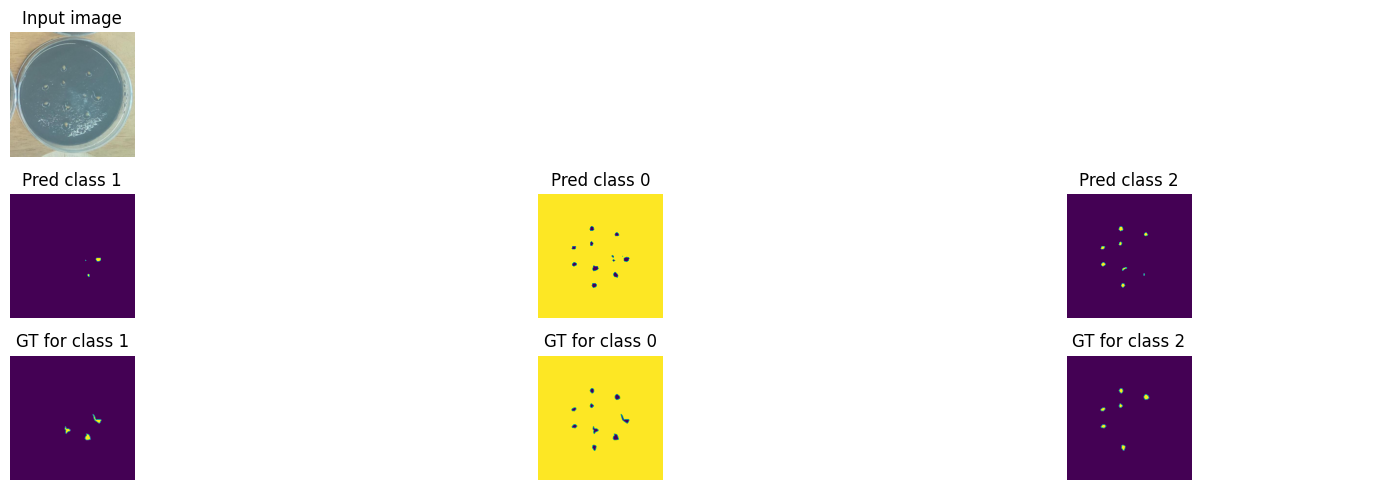

Train loss: 0.02389 | Time: 16m 16s | Val loss: 0.01788
Train_DICE_avg: 0.73623 | Train_Jaccard_avg: 0.66988 | Train_Sensitivity_avg: 0.94120 | Train_Specificity_avg: 0.90859 
Class 0 - Train_DICE: 0.99074 | Train_Jaccard: 0.98169 | Train_Sensitivity: 0.99589 | Train_Specificity: 0.74956 
Class 1 - Train_DICE: 0.46024 | Train_Jaccard: 0.39965 | Train_Sensitivity: 0.90410 | Train_Specificity: 0.98872 
Class 2 - Train_DICE: 0.75773 | Train_Jaccard: 0.62830 | Train_Sensitivity: 0.92362 | Train_Specificity: 0.98748 
Val_DICE_avg: 0.79998 | Val_Jaccard_avg: 0.73078 | Val_Sensitivity_avg: 0.96925 | Val_Specificity_avg: 0.85907 
Class 0 - Val_DICE: 0.99152 | Val_Jaccard: 0.98323 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.59912 
Class 1 - Val_DICE: 0.67940 | Val_Jaccard: 0.61898 | Val_Sensitivity: 0.94033 | Val_Specificity: 0.99357 
Class 2 - Val_DICE: 0.72902 | Val_Jaccard: 0.59013 | Val_Sensitivity: 0.96808 | Val_Specificity: 0.98453 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


Train loss: 0.02363 | Time: 16m 44s | Val loss: 0.01772
Train_DICE_avg: 0.74239 | Train_Jaccard_avg: 0.67613 | Train_Sensitivity_avg: 0.94394 | Train_Specificity_avg: 0.91054 
Class 0 - Train_DICE: 0.99088 | Train_Jaccard: 0.98195 | Train_Sensitivity: 0.99592 | Train_Specificity: 0.75494 
Class 1 - Train_DICE: 0.47597 | Train_Jaccard: 0.41455 | Train_Sensitivity: 0.91285 | Train_Specificity: 0.98904 
Class 2 - Train_DICE: 0.76032 | Train_Jaccard: 0.63188 | Train_Sensitivity: 0.92305 | Train_Specificity: 0.98764 
Val_DICE_avg: 0.80277 | Val_Jaccard_avg: 0.73237 | Val_Sensitivity_avg: 0.96289 | Val_Specificity_avg: 0.85578 
Class 0 - Val_DICE: 0.99120 | Val_Jaccard: 0.98259 | Val_Sensitivity: 0.99938 | Val_Specificity: 0.58894 
Class 1 - Val_DICE: 0.69537 | Val_Jaccard: 0.63084 | Val_Sensitivity: 0.91880 | Val_Specificity: 0.99402 
Class 2 - Val_DICE: 0.72174 | Val_Jaccard: 0.58368 | Val_Sensitivity: 0.97048 | Val_Specificity: 0.98439 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]


Train loss: 0.02340 | Time: 17m 12s | Val loss: 0.01755
Train_DICE_avg: 0.74118 | Train_Jaccard_avg: 0.67465 | Train_Sensitivity_avg: 0.94327 | Train_Specificity_avg: 0.90902 
Class 0 - Train_DICE: 0.99091 | Train_Jaccard: 0.98202 | Train_Sensitivity: 0.99602 | Train_Specificity: 0.75033 
Class 1 - Train_DICE: 0.47378 | Train_Jaccard: 0.41189 | Train_Sensitivity: 0.90690 | Train_Specificity: 0.98922 
Class 2 - Train_DICE: 0.75883 | Train_Jaccard: 0.63005 | Train_Sensitivity: 0.92688 | Train_Specificity: 0.98750 
Val_DICE_avg: 0.80392 | Val_Jaccard_avg: 0.73378 | Val_Sensitivity_avg: 0.96412 | Val_Specificity_avg: 0.85552 
Class 0 - Val_DICE: 0.99103 | Val_Jaccard: 0.98227 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.58766 
Class 1 - Val_DICE: 0.68855 | Val_Jaccard: 0.62452 | Val_Sensitivity: 0.92394 | Val_Specificity: 0.99402 
Class 2 - Val_DICE: 0.73217 | Val_Jaccard: 0.59456 | Val_Sensitivity: 0.96906 | Val_Specificity: 0.98489 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]


Train loss: 0.02318 | Time: 17m 40s | Val loss: 0.01757
Train_DICE_avg: 0.74430 | Train_Jaccard_avg: 0.67772 | Train_Sensitivity_avg: 0.94371 | Train_Specificity_avg: 0.91089 
Class 0 - Train_DICE: 0.99099 | Train_Jaccard: 0.98217 | Train_Sensitivity: 0.99595 | Train_Specificity: 0.75555 
Class 1 - Train_DICE: 0.47938 | Train_Jaccard: 0.41597 | Train_Sensitivity: 0.90913 | Train_Specificity: 0.98932 
Class 2 - Train_DICE: 0.76252 | Train_Jaccard: 0.63501 | Train_Sensitivity: 0.92605 | Train_Specificity: 0.98779 
Val_DICE_avg: 0.79878 | Val_Jaccard_avg: 0.72853 | Val_Sensitivity_avg: 0.96389 | Val_Specificity_avg: 0.85905 
Class 0 - Val_DICE: 0.99147 | Val_Jaccard: 0.98314 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.59896 
Class 1 - Val_DICE: 0.69157 | Val_Jaccard: 0.62717 | Val_Sensitivity: 0.91967 | Val_Specificity: 0.99408 
Class 2 - Val_DICE: 0.71330 | Val_Jaccard: 0.57529 | Val_Sensitivity: 0.97264 | Val_Specificity: 0.98411 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


Train loss: 0.02307 | Time: 18m 8s | Val loss: 0.01760
Train_DICE_avg: 0.74654 | Train_Jaccard_avg: 0.68070 | Train_Sensitivity_avg: 0.94089 | Train_Specificity_avg: 0.91234 
Class 0 - Train_DICE: 0.99103 | Train_Jaccard: 0.98226 | Train_Sensitivity: 0.99603 | Train_Specificity: 0.75960 
Class 1 - Train_DICE: 0.48518 | Train_Jaccard: 0.42343 | Train_Sensitivity: 0.90098 | Train_Specificity: 0.98947 
Class 2 - Train_DICE: 0.76340 | Train_Jaccard: 0.63641 | Train_Sensitivity: 0.92567 | Train_Specificity: 0.98795 
Val_DICE_avg: 0.80407 | Val_Jaccard_avg: 0.73524 | Val_Sensitivity_avg: 0.96299 | Val_Specificity_avg: 0.85653 
Class 0 - Val_DICE: 0.99125 | Val_Jaccard: 0.98269 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.59075 
Class 1 - Val_DICE: 0.67563 | Val_Jaccard: 0.61457 | Val_Sensitivity: 0.92667 | Val_Specificity: 0.99365 
Class 2 - Val_DICE: 0.74534 | Val_Jaccard: 0.60845 | Val_Sensitivity: 0.96296 | Val_Specificity: 0.98519 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


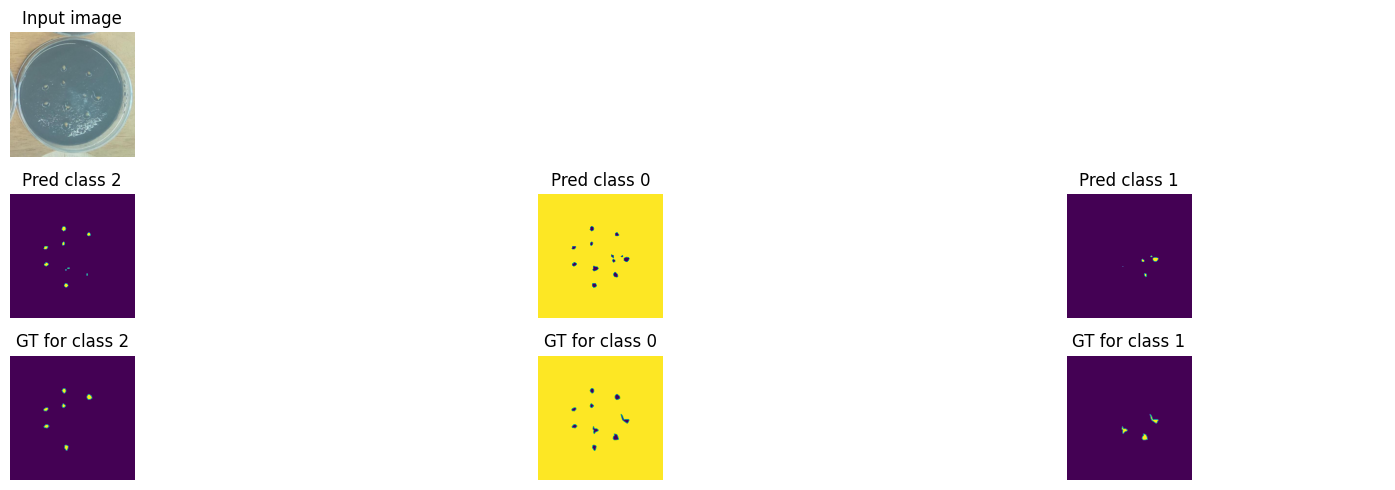

Train loss: 0.02291 | Time: 18m 38s | Val loss: 0.01730
Train_DICE_avg: 0.74682 | Train_Jaccard_avg: 0.68032 | Train_Sensitivity_avg: 0.94435 | Train_Specificity_avg: 0.91127 
Class 0 - Train_DICE: 0.99102 | Train_Jaccard: 0.98224 | Train_Sensitivity: 0.99605 | Train_Specificity: 0.75675 
Class 1 - Train_DICE: 0.48580 | Train_Jaccard: 0.42186 | Train_Sensitivity: 0.90913 | Train_Specificity: 0.98928 
Class 2 - Train_DICE: 0.76365 | Train_Jaccard: 0.63686 | Train_Sensitivity: 0.92786 | Train_Specificity: 0.98778 
Val_DICE_avg: 0.80425 | Val_Jaccard_avg: 0.73301 | Val_Sensitivity_avg: 0.96459 | Val_Specificity_avg: 0.85968 
Class 0 - Val_DICE: 0.99162 | Val_Jaccard: 0.98343 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.60081 
Class 1 - Val_DICE: 0.69646 | Val_Jaccard: 0.63078 | Val_Sensitivity: 0.92067 | Val_Specificity: 0.99407 
Class 2 - Val_DICE: 0.72468 | Val_Jaccard: 0.58481 | Val_Sensitivity: 0.97376 | Val_Specificity: 0.98417 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.02305 | Time: 19m 6s | Val loss: 0.01709
Train_DICE_avg: 0.74956 | Train_Jaccard_avg: 0.68299 | Train_Sensitivity_avg: 0.94350 | Train_Specificity_avg: 0.91194 
Class 0 - Train_DICE: 0.99100 | Train_Jaccard: 0.98220 | Train_Sensitivity: 0.99606 | Train_Specificity: 0.75865 
Class 1 - Train_DICE: 0.49144 | Train_Jaccard: 0.42783 | Train_Sensitivity: 0.90888 | Train_Specificity: 0.98933 
Class 2 - Train_DICE: 0.76623 | Train_Jaccard: 0.63894 | Train_Sensitivity: 0.92556 | Train_Specificity: 0.98785 
Val_DICE_avg: 0.80792 | Val_Jaccard_avg: 0.73866 | Val_Sensitivity_avg: 0.96816 | Val_Specificity_avg: 0.85805 
Class 0 - Val_DICE: 0.99134 | Val_Jaccard: 0.98287 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.59519 
Class 1 - Val_DICE: 0.68788 | Val_Jaccard: 0.62516 | Val_Sensitivity: 0.93578 | Val_Specificity: 0.99379 
Class 2 - Val_DICE: 0.74454 | Val_Jaccard: 0.60796 | Val_Sensitivity: 0.96935 | Val_Specificity: 0.98518 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]


Train loss: 0.02274 | Time: 19m 35s | Val loss: 0.01723
Train_DICE_avg: 0.74936 | Train_Jaccard_avg: 0.68252 | Train_Sensitivity_avg: 0.94225 | Train_Specificity_avg: 0.91073 
Class 0 - Train_DICE: 0.99108 | Train_Jaccard: 0.98236 | Train_Sensitivity: 0.99612 | Train_Specificity: 0.75485 
Class 1 - Train_DICE: 0.49137 | Train_Jaccard: 0.42684 | Train_Sensitivity: 0.90425 | Train_Specificity: 0.98950 
Class 2 - Train_DICE: 0.76563 | Train_Jaccard: 0.63837 | Train_Sensitivity: 0.92637 | Train_Specificity: 0.98785 
Val_DICE_avg: 0.80930 | Val_Jaccard_avg: 0.73919 | Val_Sensitivity_avg: 0.96258 | Val_Specificity_avg: 0.85503 
Class 0 - Val_DICE: 0.99100 | Val_Jaccard: 0.98222 | Val_Sensitivity: 0.99940 | Val_Specificity: 0.58588 
Class 1 - Val_DICE: 0.69903 | Val_Jaccard: 0.63433 | Val_Sensitivity: 0.91503 | Val_Specificity: 0.99425 
Class 2 - Val_DICE: 0.73787 | Val_Jaccard: 0.60102 | Val_Sensitivity: 0.97329 | Val_Specificity: 0.98496 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


Train loss: 0.02281 | Time: 20m 3s | Val loss: 0.01706
Train_DICE_avg: 0.74788 | Train_Jaccard_avg: 0.68148 | Train_Sensitivity_avg: 0.94533 | Train_Specificity_avg: 0.91076 
Class 0 - Train_DICE: 0.99111 | Train_Jaccard: 0.98241 | Train_Sensitivity: 0.99606 | Train_Specificity: 0.75524 
Class 1 - Train_DICE: 0.48735 | Train_Jaccard: 0.42449 | Train_Sensitivity: 0.91051 | Train_Specificity: 0.98928 
Class 2 - Train_DICE: 0.76516 | Train_Jaccard: 0.63754 | Train_Sensitivity: 0.92942 | Train_Specificity: 0.98775 
Val_DICE_avg: 0.80533 | Val_Jaccard_avg: 0.73469 | Val_Sensitivity_avg: 0.96427 | Val_Specificity_avg: 0.86025 
Class 0 - Val_DICE: 0.99159 | Val_Jaccard: 0.98337 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.60224 
Class 1 - Val_DICE: 0.69381 | Val_Jaccard: 0.62893 | Val_Sensitivity: 0.91857 | Val_Specificity: 0.99407 
Class 2 - Val_DICE: 0.73058 | Val_Jaccard: 0.59176 | Val_Sensitivity: 0.97492 | Val_Specificity: 0.98445 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


Train loss: 0.02254 | Time: 20m 31s | Val loss: 0.01687
Train_DICE_avg: 0.75072 | Train_Jaccard_avg: 0.68396 | Train_Sensitivity_avg: 0.94541 | Train_Specificity_avg: 0.91106 
Class 0 - Train_DICE: 0.99104 | Train_Jaccard: 0.98228 | Train_Sensitivity: 0.99618 | Train_Specificity: 0.75598 
Class 1 - Train_DICE: 0.49328 | Train_Jaccard: 0.42878 | Train_Sensitivity: 0.91090 | Train_Specificity: 0.98943 
Class 2 - Train_DICE: 0.76784 | Train_Jaccard: 0.64082 | Train_Sensitivity: 0.92914 | Train_Specificity: 0.98777 
Val_DICE_avg: 0.80532 | Val_Jaccard_avg: 0.73642 | Val_Sensitivity_avg: 0.97110 | Val_Specificity_avg: 0.86223 
Class 0 - Val_DICE: 0.99172 | Val_Jaccard: 0.98362 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.60805 
Class 1 - Val_DICE: 0.68549 | Val_Jaccard: 0.62511 | Val_Sensitivity: 0.94306 | Val_Specificity: 0.99382 
Class 2 - Val_DICE: 0.73874 | Val_Jaccard: 0.60054 | Val_Sensitivity: 0.97092 | Val_Specificity: 0.98481 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]


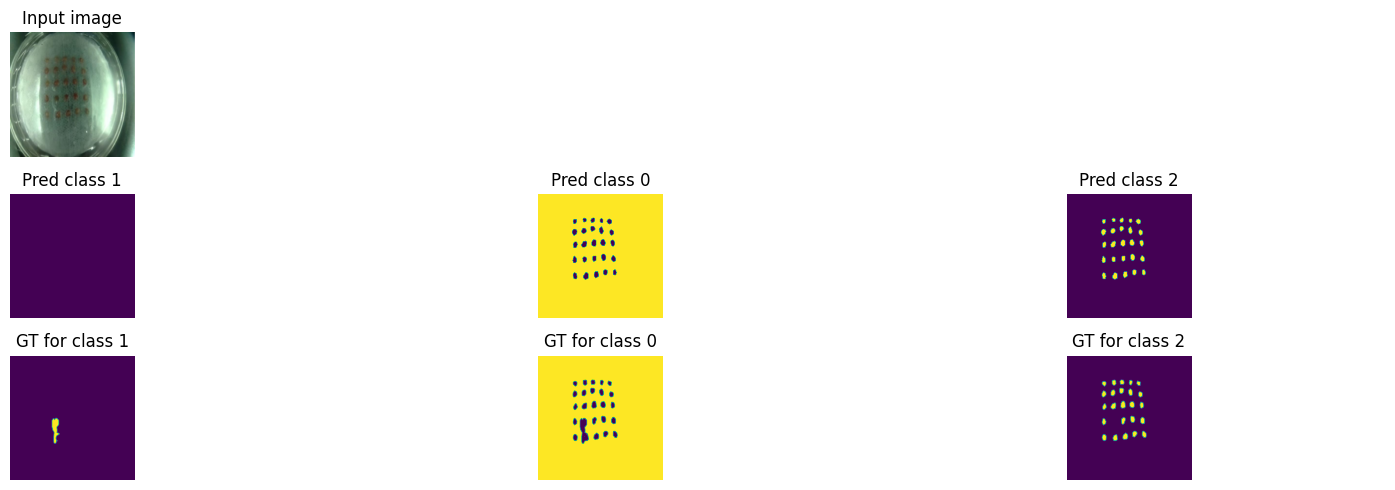

Train loss: 0.02239 | Time: 21m 0s | Val loss: 0.01696
Train_DICE_avg: 0.74944 | Train_Jaccard_avg: 0.68294 | Train_Sensitivity_avg: 0.94508 | Train_Specificity_avg: 0.91185 
Class 0 - Train_DICE: 0.99120 | Train_Jaccard: 0.98259 | Train_Sensitivity: 0.99622 | Train_Specificity: 0.75829 
Class 1 - Train_DICE: 0.48845 | Train_Jaccard: 0.42416 | Train_Sensitivity: 0.90928 | Train_Specificity: 0.98936 
Class 2 - Train_DICE: 0.76868 | Train_Jaccard: 0.64206 | Train_Sensitivity: 0.92973 | Train_Specificity: 0.98789 
Val_DICE_avg: 0.80579 | Val_Jaccard_avg: 0.73487 | Val_Sensitivity_avg: 0.96683 | Val_Specificity_avg: 0.86189 
Class 0 - Val_DICE: 0.99177 | Val_Jaccard: 0.98372 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.60732 
Class 1 - Val_DICE: 0.70291 | Val_Jaccard: 0.63678 | Val_Sensitivity: 0.92382 | Val_Specificity: 0.99417 
Class 2 - Val_DICE: 0.72268 | Val_Jaccard: 0.58410 | Val_Sensitivity: 0.97733 | Val_Specificity: 0.98417 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


Train loss: 0.02253 | Time: 21m 28s | Val loss: 0.01679
Train_DICE_avg: 0.75165 | Train_Jaccard_avg: 0.68521 | Train_Sensitivity_avg: 0.94464 | Train_Specificity_avg: 0.91228 
Class 0 - Train_DICE: 0.99109 | Train_Jaccard: 0.98237 | Train_Sensitivity: 0.99622 | Train_Specificity: 0.75979 
Class 1 - Train_DICE: 0.49334 | Train_Jaccard: 0.42943 | Train_Sensitivity: 0.90892 | Train_Specificity: 0.98924 
Class 2 - Train_DICE: 0.77052 | Train_Jaccard: 0.64383 | Train_Sensitivity: 0.92878 | Train_Specificity: 0.98780 
Val_DICE_avg: 0.80687 | Val_Jaccard_avg: 0.73727 | Val_Sensitivity_avg: 0.96804 | Val_Specificity_avg: 0.86173 
Class 0 - Val_DICE: 0.99173 | Val_Jaccard: 0.98364 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.60652 
Class 1 - Val_DICE: 0.69139 | Val_Jaccard: 0.62850 | Val_Sensitivity: 0.93298 | Val_Specificity: 0.99387 
Class 2 - Val_DICE: 0.73748 | Val_Jaccard: 0.59966 | Val_Sensitivity: 0.97181 | Val_Specificity: 0.98480 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


Train loss: 0.02222 | Time: 21m 56s | Val loss: 0.01712
Train_DICE_avg: 0.75082 | Train_Jaccard_avg: 0.68406 | Train_Sensitivity_avg: 0.94415 | Train_Specificity_avg: 0.91155 
Class 0 - Train_DICE: 0.99124 | Train_Jaccard: 0.98267 | Train_Sensitivity: 0.99627 | Train_Specificity: 0.75752 
Class 1 - Train_DICE: 0.48961 | Train_Jaccard: 0.42443 | Train_Sensitivity: 0.90615 | Train_Specificity: 0.98926 
Class 2 - Train_DICE: 0.77161 | Train_Jaccard: 0.64508 | Train_Sensitivity: 0.93003 | Train_Specificity: 0.98788 
Val_DICE_avg: 0.80694 | Val_Jaccard_avg: 0.73663 | Val_Sensitivity_avg: 0.96839 | Val_Specificity_avg: 0.86234 
Class 0 - Val_DICE: 0.99179 | Val_Jaccard: 0.98375 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.60842 
Class 1 - Val_DICE: 0.69650 | Val_Jaccard: 0.63197 | Val_Sensitivity: 0.93294 | Val_Specificity: 0.99388 
Class 2 - Val_DICE: 0.73254 | Val_Jaccard: 0.59416 | Val_Sensitivity: 0.97290 | Val_Specificity: 0.98471 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]


Train loss: 0.02232 | Time: 22m 23s | Val loss: 0.01702
Train_DICE_avg: 0.75280 | Train_Jaccard_avg: 0.68603 | Train_Sensitivity_avg: 0.94619 | Train_Specificity_avg: 0.91218 
Class 0 - Train_DICE: 0.99124 | Train_Jaccard: 0.98266 | Train_Sensitivity: 0.99612 | Train_Specificity: 0.75892 
Class 1 - Train_DICE: 0.49715 | Train_Jaccard: 0.43141 | Train_Sensitivity: 0.91115 | Train_Specificity: 0.98963 
Class 2 - Train_DICE: 0.77000 | Train_Jaccard: 0.64402 | Train_Sensitivity: 0.93132 | Train_Specificity: 0.98800 
Val_DICE_avg: 0.80647 | Val_Jaccard_avg: 0.73632 | Val_Sensitivity_avg: 0.96788 | Val_Specificity_avg: 0.86272 
Class 0 - Val_DICE: 0.99180 | Val_Jaccard: 0.98378 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.60951 
Class 1 - Val_DICE: 0.69406 | Val_Jaccard: 0.62922 | Val_Sensitivity: 0.93067 | Val_Specificity: 0.99385 
Class 2 - Val_DICE: 0.73354 | Val_Jaccard: 0.59595 | Val_Sensitivity: 0.97365 | Val_Specificity: 0.98481 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


Train loss: 0.02221 | Time: 22m 51s | Val loss: 0.01675
Train_DICE_avg: 0.75717 | Train_Jaccard_avg: 0.69041 | Train_Sensitivity_avg: 0.94521 | Train_Specificity_avg: 0.91227 
Class 0 - Train_DICE: 0.99116 | Train_Jaccard: 0.98252 | Train_Sensitivity: 0.99629 | Train_Specificity: 0.75929 
Class 1 - Train_DICE: 0.50861 | Train_Jaccard: 0.44298 | Train_Sensitivity: 0.90948 | Train_Specificity: 0.98956 
Class 2 - Train_DICE: 0.77172 | Train_Jaccard: 0.64572 | Train_Sensitivity: 0.92986 | Train_Specificity: 0.98795 
Val_DICE_avg: 0.80742 | Val_Jaccard_avg: 0.73643 | Val_Sensitivity_avg: 0.96734 | Val_Specificity_avg: 0.86279 
Class 0 - Val_DICE: 0.99180 | Val_Jaccard: 0.98378 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.60982 
Class 1 - Val_DICE: 0.69826 | Val_Jaccard: 0.63225 | Val_Sensitivity: 0.92996 | Val_Specificity: 0.99394 
Class 2 - Val_DICE: 0.73219 | Val_Jaccard: 0.59326 | Val_Sensitivity: 0.97271 | Val_Specificity: 0.98460 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]


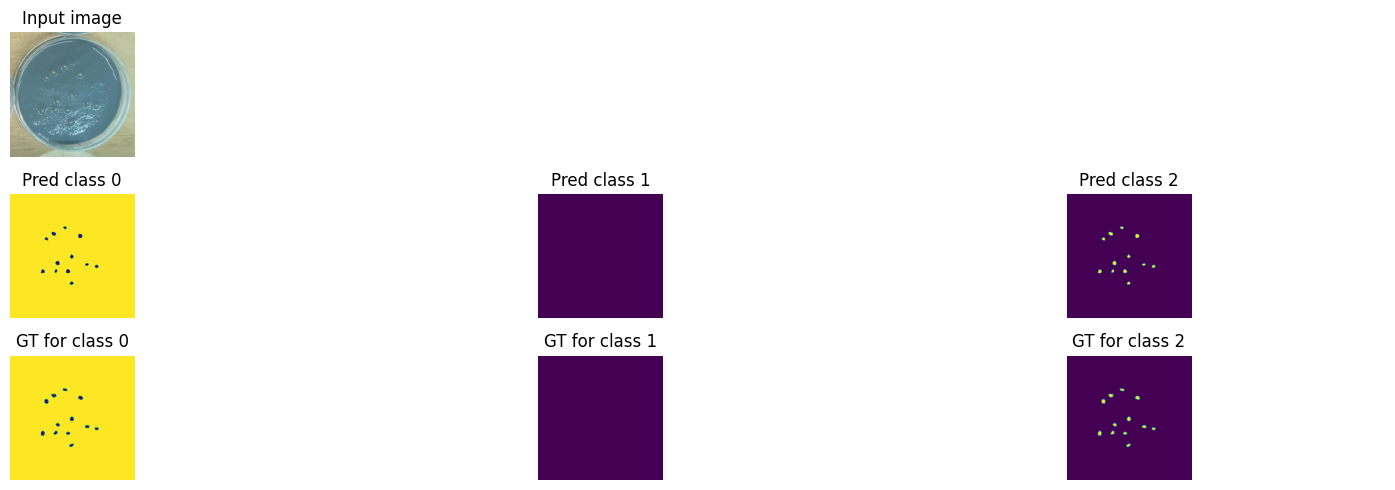

Train loss: 0.02210 | Time: 23m 19s | Val loss: 0.01682
Train_DICE_avg: 0.75016 | Train_Jaccard_avg: 0.68334 | Train_Sensitivity_avg: 0.94598 | Train_Specificity_avg: 0.90943 
Class 0 - Train_DICE: 0.99126 | Train_Jaccard: 0.98270 | Train_Sensitivity: 0.99633 | Train_Specificity: 0.75107 
Class 1 - Train_DICE: 0.49108 | Train_Jaccard: 0.42562 | Train_Sensitivity: 0.91113 | Train_Specificity: 0.98934 
Class 2 - Train_DICE: 0.76814 | Train_Jaccard: 0.64169 | Train_Sensitivity: 0.93049 | Train_Specificity: 0.98789 
Val_DICE_avg: 0.80898 | Val_Jaccard_avg: 0.73902 | Val_Sensitivity_avg: 0.96922 | Val_Specificity_avg: 0.86235 
Class 0 - Val_DICE: 0.99175 | Val_Jaccard: 0.98368 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.60828 
Class 1 - Val_DICE: 0.69884 | Val_Jaccard: 0.63452 | Val_Sensitivity: 0.93349 | Val_Specificity: 0.99392 
Class 2 - Val_DICE: 0.73636 | Val_Jaccard: 0.59885 | Val_Sensitivity: 0.97484 | Val_Specificity: 0.98486 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


Train loss: 0.02211 | Time: 23m 46s | Val loss: 0.01689
Train_DICE_avg: 0.75245 | Train_Jaccard_avg: 0.68532 | Train_Sensitivity_avg: 0.94598 | Train_Specificity_avg: 0.91046 
Class 0 - Train_DICE: 0.99129 | Train_Jaccard: 0.98276 | Train_Sensitivity: 0.99643 | Train_Specificity: 0.75461 
Class 1 - Train_DICE: 0.49758 | Train_Jaccard: 0.43138 | Train_Sensitivity: 0.91007 | Train_Specificity: 0.98911 
Class 2 - Train_DICE: 0.76850 | Train_Jaccard: 0.64182 | Train_Sensitivity: 0.93145 | Train_Specificity: 0.98766 
Val_DICE_avg: 0.81070 | Val_Jaccard_avg: 0.74106 | Val_Sensitivity_avg: 0.96771 | Val_Specificity_avg: 0.85996 
Class 0 - Val_DICE: 0.99155 | Val_Jaccard: 0.98328 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.60098 
Class 1 - Val_DICE: 0.69709 | Val_Jaccard: 0.63408 | Val_Sensitivity: 0.93137 | Val_Specificity: 0.99402 
Class 2 - Val_DICE: 0.74347 | Val_Jaccard: 0.60583 | Val_Sensitivity: 0.97240 | Val_Specificity: 0.98488 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]


Train loss: 0.02216 | Time: 24m 13s | Val loss: 0.01664
Train_DICE_avg: 0.75522 | Train_Jaccard_avg: 0.68833 | Train_Sensitivity_avg: 0.94446 | Train_Specificity_avg: 0.91230 
Class 0 - Train_DICE: 0.99117 | Train_Jaccard: 0.98254 | Train_Sensitivity: 0.99626 | Train_Specificity: 0.75935 
Class 1 - Train_DICE: 0.50133 | Train_Jaccard: 0.43523 | Train_Sensitivity: 0.90742 | Train_Specificity: 0.98951 
Class 2 - Train_DICE: 0.77316 | Train_Jaccard: 0.64724 | Train_Sensitivity: 0.92968 | Train_Specificity: 0.98803 
Val_DICE_avg: 0.81203 | Val_Jaccard_avg: 0.74196 | Val_Sensitivity_avg: 0.96845 | Val_Specificity_avg: 0.85991 
Class 0 - Val_DICE: 0.99156 | Val_Jaccard: 0.98330 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.60069 
Class 1 - Val_DICE: 0.70333 | Val_Jaccard: 0.63846 | Val_Sensitivity: 0.93171 | Val_Specificity: 0.99408 
Class 2 - Val_DICE: 0.74121 | Val_Jaccard: 0.60412 | Val_Sensitivity: 0.97428 | Val_Specificity: 0.98497 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


Train loss: 0.02201 | Time: 24m 40s | Val loss: 0.01668
Train_DICE_avg: 0.75766 | Train_Jaccard_avg: 0.69097 | Train_Sensitivity_avg: 0.94725 | Train_Specificity_avg: 0.91266 
Class 0 - Train_DICE: 0.99128 | Train_Jaccard: 0.98274 | Train_Sensitivity: 0.99626 | Train_Specificity: 0.76028 
Class 1 - Train_DICE: 0.50576 | Train_Jaccard: 0.43976 | Train_Sensitivity: 0.91375 | Train_Specificity: 0.98964 
Class 2 - Train_DICE: 0.77594 | Train_Jaccard: 0.65041 | Train_Sensitivity: 0.93174 | Train_Specificity: 0.98807 
Val_DICE_avg: 0.81015 | Val_Jaccard_avg: 0.73894 | Val_Sensitivity_avg: 0.96703 | Val_Specificity_avg: 0.86187 
Class 0 - Val_DICE: 0.99174 | Val_Jaccard: 0.98367 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.60708 
Class 1 - Val_DICE: 0.70827 | Val_Jaccard: 0.64240 | Val_Sensitivity: 0.92496 | Val_Specificity: 0.99425 
Class 2 - Val_DICE: 0.73045 | Val_Jaccard: 0.59074 | Val_Sensitivity: 0.97678 | Val_Specificity: 0.98426 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


Train loss: 0.02183 | Time: 25m 6s | Val loss: 0.01668
Train_DICE_avg: 0.75711 | Train_Jaccard_avg: 0.68990 | Train_Sensitivity_avg: 0.94730 | Train_Specificity_avg: 0.91137 
Class 0 - Train_DICE: 0.99131 | Train_Jaccard: 0.98281 | Train_Sensitivity: 0.99646 | Train_Specificity: 0.75666 
Class 1 - Train_DICE: 0.50737 | Train_Jaccard: 0.44050 | Train_Sensitivity: 0.91409 | Train_Specificity: 0.98949 
Class 2 - Train_DICE: 0.77266 | Train_Jaccard: 0.64638 | Train_Sensitivity: 0.93134 | Train_Specificity: 0.98796 
Val_DICE_avg: 0.81352 | Val_Jaccard_avg: 0.74369 | Val_Sensitivity_avg: 0.96858 | Val_Specificity_avg: 0.85993 
Class 0 - Val_DICE: 0.99147 | Val_Jaccard: 0.98314 | Val_Sensitivity: 0.99936 | Val_Specificity: 0.60062 
Class 1 - Val_DICE: 0.70539 | Val_Jaccard: 0.64118 | Val_Sensitivity: 0.93489 | Val_Specificity: 0.99406 
Class 2 - Val_DICE: 0.74371 | Val_Jaccard: 0.60676 | Val_Sensitivity: 0.97149 | Val_Specificity: 0.98512 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


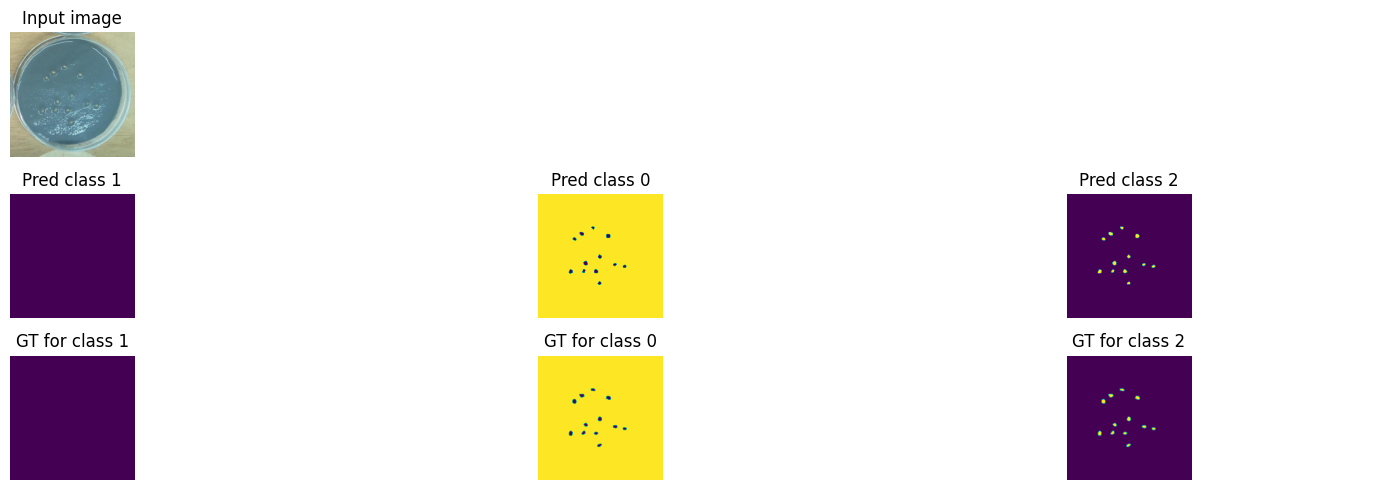

Train loss: 0.02184 | Time: 25m 34s | Val loss: 0.01660
Train_DICE_avg: 0.75328 | Train_Jaccard_avg: 0.68615 | Train_Sensitivity_avg: 0.94573 | Train_Specificity_avg: 0.91219 
Class 0 - Train_DICE: 0.99135 | Train_Jaccard: 0.98289 | Train_Sensitivity: 0.99637 | Train_Specificity: 0.75916 
Class 1 - Train_DICE: 0.49581 | Train_Jaccard: 0.42864 | Train_Sensitivity: 0.90869 | Train_Specificity: 0.98933 
Class 2 - Train_DICE: 0.77268 | Train_Jaccard: 0.64692 | Train_Sensitivity: 0.93213 | Train_Specificity: 0.98807 
Val_DICE_avg: 0.81600 | Val_Jaccard_avg: 0.74567 | Val_Sensitivity_avg: 0.96782 | Val_Specificity_avg: 0.85938 
Class 0 - Val_DICE: 0.99145 | Val_Jaccard: 0.98309 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.59888 
Class 1 - Val_DICE: 0.71476 | Val_Jaccard: 0.64888 | Val_Sensitivity: 0.92898 | Val_Specificity: 0.99419 
Class 2 - Val_DICE: 0.74178 | Val_Jaccard: 0.60504 | Val_Sensitivity: 0.97511 | Val_Specificity: 0.98506 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]


Train loss: 0.02166 | Time: 26m 1s | Val loss: 0.01662
Train_DICE_avg: 0.76078 | Train_Jaccard_avg: 0.69383 | Train_Sensitivity_avg: 0.94608 | Train_Specificity_avg: 0.91235 
Class 0 - Train_DICE: 0.99134 | Train_Jaccard: 0.98286 | Train_Sensitivity: 0.99636 | Train_Specificity: 0.75930 
Class 1 - Train_DICE: 0.51579 | Train_Jaccard: 0.44850 | Train_Sensitivity: 0.90908 | Train_Specificity: 0.98959 
Class 2 - Train_DICE: 0.77520 | Train_Jaccard: 0.65012 | Train_Sensitivity: 0.93281 | Train_Specificity: 0.98816 
Val_DICE_avg: 0.81379 | Val_Jaccard_avg: 0.74365 | Val_Sensitivity_avg: 0.96907 | Val_Specificity_avg: 0.86151 
Class 0 - Val_DICE: 0.99167 | Val_Jaccard: 0.98353 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.60547 
Class 1 - Val_DICE: 0.70744 | Val_Jaccard: 0.64224 | Val_Sensitivity: 0.93529 | Val_Specificity: 0.99403 
Class 2 - Val_DICE: 0.74225 | Val_Jaccard: 0.60520 | Val_Sensitivity: 0.97257 | Val_Specificity: 0.98504 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


Train loss: 0.02177 | Time: 26m 28s | Val loss: 0.01661
Train_DICE_avg: 0.76160 | Train_Jaccard_avg: 0.69494 | Train_Sensitivity_avg: 0.94650 | Train_Specificity_avg: 0.91300 
Class 0 - Train_DICE: 0.99138 | Train_Jaccard: 0.98294 | Train_Sensitivity: 0.99624 | Train_Specificity: 0.76074 
Class 1 - Train_DICE: 0.51809 | Train_Jaccard: 0.45151 | Train_Sensitivity: 0.91057 | Train_Specificity: 0.99001 
Class 2 - Train_DICE: 0.77532 | Train_Jaccard: 0.65039 | Train_Sensitivity: 0.93270 | Train_Specificity: 0.98824 
Val_DICE_avg: 0.81472 | Val_Jaccard_avg: 0.74521 | Val_Sensitivity_avg: 0.96887 | Val_Specificity_avg: 0.85990 
Class 0 - Val_DICE: 0.99150 | Val_Jaccard: 0.98318 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.60042 
Class 1 - Val_DICE: 0.70306 | Val_Jaccard: 0.63881 | Val_Sensitivity: 0.93648 | Val_Specificity: 0.99393 
Class 2 - Val_DICE: 0.74960 | Val_Jaccard: 0.61363 | Val_Sensitivity: 0.97077 | Val_Specificity: 0.98535 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


Train loss: 0.02172 | Time: 26m 54s | Val loss: 0.01639
Train_DICE_avg: 0.75792 | Train_Jaccard_avg: 0.69095 | Train_Sensitivity_avg: 0.94507 | Train_Specificity_avg: 0.91392 
Class 0 - Train_DICE: 0.99140 | Train_Jaccard: 0.98297 | Train_Sensitivity: 0.99637 | Train_Specificity: 0.76374 
Class 1 - Train_DICE: 0.50672 | Train_Jaccard: 0.43920 | Train_Sensitivity: 0.90757 | Train_Specificity: 0.98978 
Class 2 - Train_DICE: 0.77566 | Train_Jaccard: 0.65067 | Train_Sensitivity: 0.93129 | Train_Specificity: 0.98823 
Val_DICE_avg: 0.81437 | Val_Jaccard_avg: 0.74445 | Val_Sensitivity_avg: 0.96988 | Val_Specificity_avg: 0.86071 
Class 0 - Val_DICE: 0.99163 | Val_Jaccard: 0.98344 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.60299 
Class 1 - Val_DICE: 0.70521 | Val_Jaccard: 0.64026 | Val_Sensitivity: 0.93716 | Val_Specificity: 0.99397 
Class 2 - Val_DICE: 0.74627 | Val_Jaccard: 0.60966 | Val_Sensitivity: 0.97313 | Val_Specificity: 0.98517 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]


Train loss: 0.02180 | Time: 27m 20s | Val loss: 0.01638
Train_DICE_avg: 0.75837 | Train_Jaccard_avg: 0.69165 | Train_Sensitivity_avg: 0.94733 | Train_Specificity_avg: 0.91229 
Class 0 - Train_DICE: 0.99136 | Train_Jaccard: 0.98291 | Train_Sensitivity: 0.99630 | Train_Specificity: 0.75909 
Class 1 - Train_DICE: 0.50781 | Train_Jaccard: 0.44073 | Train_Sensitivity: 0.91383 | Train_Specificity: 0.98956 
Class 2 - Train_DICE: 0.77593 | Train_Jaccard: 0.65131 | Train_Sensitivity: 0.93186 | Train_Specificity: 0.98821 
Val_DICE_avg: 0.81569 | Val_Jaccard_avg: 0.74557 | Val_Sensitivity_avg: 0.96991 | Val_Specificity_avg: 0.86046 
Class 0 - Val_DICE: 0.99155 | Val_Jaccard: 0.98329 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.60210 
Class 1 - Val_DICE: 0.70976 | Val_Jaccard: 0.64391 | Val_Sensitivity: 0.93653 | Val_Specificity: 0.99408 
Class 2 - Val_DICE: 0.74576 | Val_Jaccard: 0.60951 | Val_Sensitivity: 0.97381 | Val_Specificity: 0.98521 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


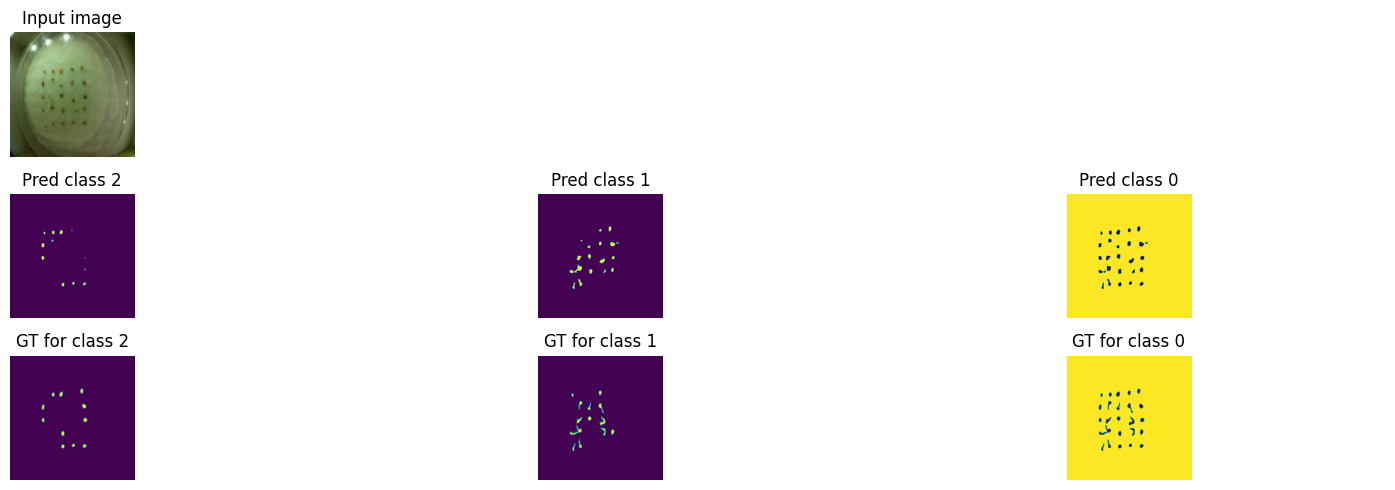

Train loss: 0.02158 | Time: 27m 48s | Val loss: 0.01638
Train_DICE_avg: 0.76006 | Train_Jaccard_avg: 0.69321 | Train_Sensitivity_avg: 0.94760 | Train_Specificity_avg: 0.91183 
Class 0 - Train_DICE: 0.99139 | Train_Jaccard: 0.98295 | Train_Sensitivity: 0.99638 | Train_Specificity: 0.75719 
Class 1 - Train_DICE: 0.51283 | Train_Jaccard: 0.44555 | Train_Sensitivity: 0.91364 | Train_Specificity: 0.98994 
Class 2 - Train_DICE: 0.77597 | Train_Jaccard: 0.65113 | Train_Sensitivity: 0.93279 | Train_Specificity: 0.98837 
Val_DICE_avg: 0.81493 | Val_Jaccard_avg: 0.74494 | Val_Sensitivity_avg: 0.96867 | Val_Specificity_avg: 0.86008 
Class 0 - Val_DICE: 0.99153 | Val_Jaccard: 0.98324 | Val_Sensitivity: 0.99937 | Val_Specificity: 0.60099 
Class 1 - Val_DICE: 0.70769 | Val_Jaccard: 0.64256 | Val_Sensitivity: 0.93188 | Val_Specificity: 0.99415 
Class 2 - Val_DICE: 0.74556 | Val_Jaccard: 0.60902 | Val_Sensitivity: 0.97475 | Val_Specificity: 0.98511 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▂▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇███████████████████
wandb:       Training Jaccard ▁▂▄▄▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇████████████████
wandb:          Training Loss █▆▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▇█▇▆▆▇▆▆▄▃▂▂▂▁▁▁▁▁▂▂▂▂▂▂▃▂▃▂▃▂▃▃▃▃▃▃▃▃▃▃
wandb:   Training Specificity ▁▃▄▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇█▇████████████████████
wandb:        Validation DICE ▁▁▂▄▄▅▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇███████████████████
wandb:     Validation Jaccard ▁▁▂▃▄▅▅▅▆▆▇▆▆▇▇▇▇▇▇▇▇███████████████████
wandb:        Validation Loss █▆▄▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity █▆▄▄▅▆▆▅▄▂▁▂▂▃▂▃▁▃▃▂▄▃▃▃▃▄▃▃▄▄▄▄▄▄▄▄▄▄▄▄
wandb: Validation Specificity ▄█▆▅▃▂▁▂▂▂▁▂▂▁▃▂▃▂▂▂▃▂▂▂▃▂▂▂▂▂▃▃▃▃▃▃▃▃▃▃
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.76006
wandb:       Training Jaccard 0.69321
wandb:          Training Loss 0.02


Training complete!


In [33]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [34]:
model = DeepLabV3Plus(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"],final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [35]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]



Global Performance Metrics:
Loss mean: 0.01622, std: 0.00174
Dice Coefficient mean: 0.84636, std: 0.12315
Jaccard Index mean: 0.78708, std: 0.14011
Sensitivity mean: 0.84988, std: 0.12657
Specificity mean: 0.95358, std: 0.03335

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99549, std: 0.00257
Jaccard mean: 0.99104, std: 0.00506
Sensitivity mean: 0.99538, std: 0.00362
Specificity mean: 0.86618, std: 0.10095

Class 1:
Dice mean: 0.69397, std: 0.33413
Jaccard mean: 0.62151, std: 0.35418
Sensitivity mean: 0.71674, std: 0.33190
Specificity mean: 0.99803, std: 0.00406

Class 2:
Dice mean: 0.84961, std: 0.09163
Jaccard mean: 0.74868, std: 0.12618
Sensitivity mean: 0.83752, std: 0.12146
Specificity mean: 0.99654, std: 0.00221


### Focal Loss

In [ ]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Backbone"] = "mobilenetv3"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-DeepLabV3+-MobileNetV3-Focal"]

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.50 GB
GPU Memory - Reserved: 1.90 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251114_003234-i7x6c5a0
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-DeepLabV3+-MobileNetV3-Focal
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/i7x6c5a0



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]


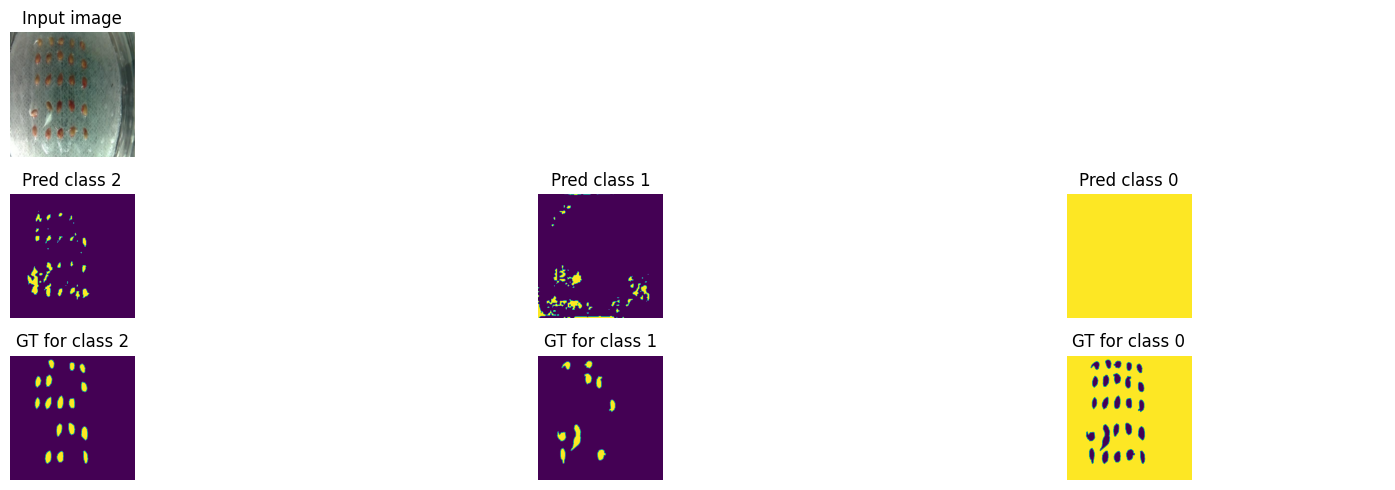

Train loss: 0.04426 | Time: 0m 26s | Val loss: 0.02624
Train_DICE_avg: 0.28272 | Train_Jaccard_avg: 0.24582 | Train_Sensitivity_avg: 0.62800 | Train_Specificity_avg: 0.71215 
Class 0 - Train_DICE: 0.73092 | Train_Jaccard: 0.63734 | Train_Sensitivity: 0.95923 | Train_Specificity: 0.19079 
Class 1 - Train_DICE: 0.09267 | Train_Jaccard: 0.08664 | Train_Sensitivity: 0.35848 | Train_Specificity: 0.98581 
Class 2 - Train_DICE: 0.02457 | Train_Jaccard: 0.01349 | Train_Sensitivity: 0.56627 | Train_Specificity: 0.95985 
Val_DICE_avg: 0.43711 | Val_Jaccard_avg: 0.42844 | Val_Sensitivity_avg: 0.91045 | Val_Specificity_avg: 0.73346 
Class 0 - Val_DICE: 0.97164 | Val_Jaccard: 0.94563 | Val_Sensitivity: 0.97500 | Val_Specificity: 0.25649 
Class 1 - Val_DICE: 0.33968 | Val_Jaccard: 0.33968 | Val_Sensitivity: 0.83175 | Val_Specificity: 0.98833 
Class 2 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 0.92460 | Val_Specificity: 0.95555 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]


Train loss: 0.01719 | Time: 0m 53s | Val loss: 0.01303
Train_DICE_avg: 0.44234 | Train_Jaccard_avg: 0.42048 | Train_Sensitivity_avg: 0.92788 | Train_Specificity_avg: 0.84813 
Class 0 - Train_DICE: 0.97059 | Train_Jaccard: 0.94344 | Train_Sensitivity: 0.95688 | Train_Specificity: 0.59676 
Class 1 - Train_DICE: 0.25749 | Train_Jaccard: 0.25749 | Train_Sensitivity: 0.93921 | Train_Specificity: 0.98567 
Class 2 - Train_DICE: 0.09894 | Train_Jaccard: 0.06052 | Train_Sensitivity: 0.88756 | Train_Specificity: 0.96196 
Val_DICE_avg: 0.49357 | Val_Jaccard_avg: 0.48530 | Val_Sensitivity_avg: 0.96971 | Val_Specificity_avg: 0.91813 
Class 0 - Val_DICE: 0.98664 | Val_Jaccard: 0.97382 | Val_Sensitivity: 0.97606 | Val_Specificity: 0.80983 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.02584 | Val_Jaccard: 0.01383 | Val_Sensitivity: 0.93307 | Val_Specificity: 0.95622 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]


Train loss: 0.01109 | Time: 1m 21s | Val loss: 0.00941
Train_DICE_avg: 0.53821 | Train_Jaccard_avg: 0.49246 | Train_Sensitivity_avg: 0.94453 | Train_Specificity_avg: 0.86646 
Class 0 - Train_DICE: 0.97773 | Train_Jaccard: 0.95673 | Train_Sensitivity: 0.97621 | Train_Specificity: 0.64269 
Class 1 - Train_DICE: 0.26321 | Train_Jaccard: 0.26320 | Train_Sensitivity: 0.97931 | Train_Specificity: 0.98547 
Class 2 - Train_DICE: 0.37368 | Train_Jaccard: 0.25744 | Train_Sensitivity: 0.87808 | Train_Specificity: 0.97122 
Val_DICE_avg: 0.50751 | Val_Jaccard_avg: 0.49395 | Val_Sensitivity_avg: 0.96962 | Val_Specificity_avg: 0.92127 
Class 0 - Val_DICE: 0.98834 | Val_Jaccard: 0.97710 | Val_Sensitivity: 0.97934 | Val_Specificity: 0.81827 
Class 1 - Val_DICE: 0.46825 | Val_Jaccard: 0.46825 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.06594 | Val_Jaccard: 0.03651 | Val_Sensitivity: 0.92950 | Val_Specificity: 0.95721 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


Train loss: 0.00845 | Time: 1m 49s | Val loss: 0.00691
Train_DICE_avg: 0.58489 | Train_Jaccard_avg: 0.53390 | Train_Sensitivity_avg: 0.94795 | Train_Specificity_avg: 0.87595 
Class 0 - Train_DICE: 0.98110 | Train_Jaccard: 0.96312 | Train_Sensitivity: 0.98342 | Train_Specificity: 0.66566 
Class 1 - Train_DICE: 0.27084 | Train_Jaccard: 0.27055 | Train_Sensitivity: 0.98796 | Train_Specificity: 0.98547 
Class 2 - Train_DICE: 0.50272 | Train_Jaccard: 0.36802 | Train_Sensitivity: 0.87245 | Train_Specificity: 0.97672 
Val_DICE_avg: 0.55721 | Val_Jaccard_avg: 0.52660 | Val_Sensitivity_avg: 0.96896 | Val_Specificity_avg: 0.91273 
Class 0 - Val_DICE: 0.99139 | Val_Jaccard: 0.98300 | Val_Sensitivity: 0.98655 | Val_Specificity: 0.78820 
Class 1 - Val_DICE: 0.46829 | Val_Jaccard: 0.46827 | Val_Sensitivity: 0.99956 | Val_Specificity: 0.98834 
Class 2 - Val_DICE: 0.21195 | Val_Jaccard: 0.12851 | Val_Sensitivity: 0.92078 | Val_Specificity: 0.96164 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]


Train loss: 0.00706 | Time: 2m 17s | Val loss: 0.00550
Train_DICE_avg: 0.61008 | Train_Jaccard_avg: 0.55743 | Train_Sensitivity_avg: 0.94637 | Train_Specificity_avg: 0.88447 
Class 0 - Train_DICE: 0.98308 | Train_Jaccard: 0.96689 | Train_Sensitivity: 0.98600 | Train_Specificity: 0.68813 
Class 1 - Train_DICE: 0.27472 | Train_Jaccard: 0.27376 | Train_Sensitivity: 0.98769 | Train_Specificity: 0.98544 
Class 2 - Train_DICE: 0.57244 | Train_Jaccard: 0.43165 | Train_Sensitivity: 0.86541 | Train_Specificity: 0.97983 
Val_DICE_avg: 0.61179 | Val_Jaccard_avg: 0.56631 | Val_Sensitivity_avg: 0.96825 | Val_Specificity_avg: 0.90082 
Class 0 - Val_DICE: 0.99327 | Val_Jaccard: 0.98668 | Val_Sensitivity: 0.99235 | Val_Specificity: 0.74621 
Class 1 - Val_DICE: 0.47524 | Val_Jaccard: 0.47199 | Val_Sensitivity: 0.99400 | Val_Specificity: 0.98853 
Class 2 - Val_DICE: 0.36685 | Val_Jaccard: 0.24027 | Val_Sensitivity: 0.91839 | Val_Specificity: 0.96773 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]


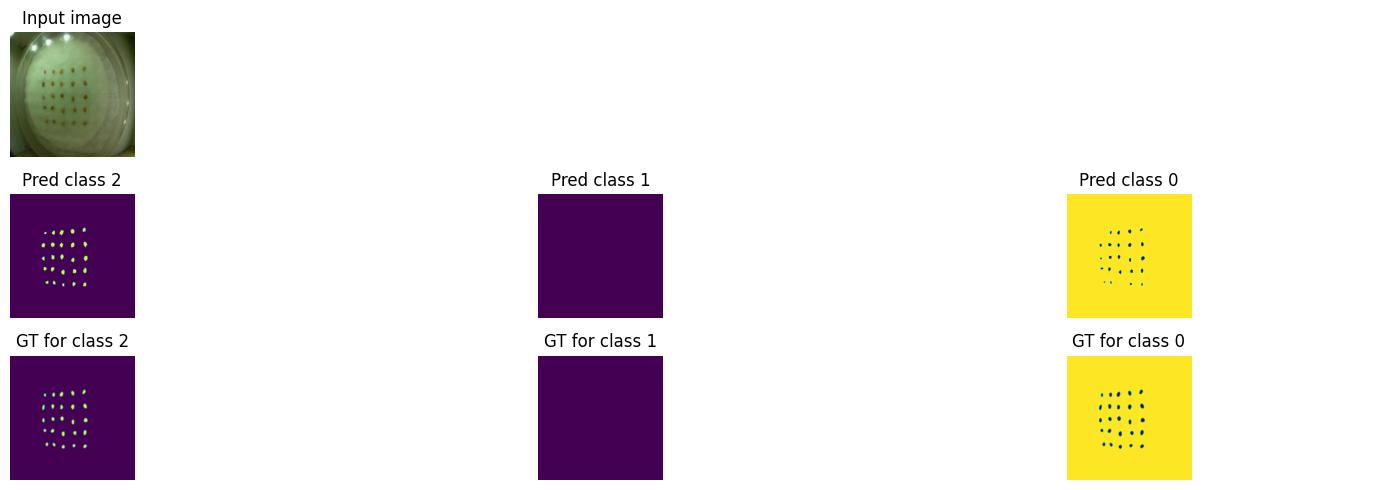

Train loss: 0.00619 | Time: 2m 45s | Val loss: 0.00454
Train_DICE_avg: 0.62988 | Train_Jaccard_avg: 0.57512 | Train_Sensitivity_avg: 0.94364 | Train_Specificity_avg: 0.89016 
Class 0 - Train_DICE: 0.98423 | Train_Jaccard: 0.96911 | Train_Sensitivity: 0.98699 | Train_Specificity: 0.70294 
Class 1 - Train_DICE: 0.29393 | Train_Jaccard: 0.28820 | Train_Sensitivity: 0.97701 | Train_Specificity: 0.98600 
Class 2 - Train_DICE: 0.61146 | Train_Jaccard: 0.46805 | Train_Sensitivity: 0.86694 | Train_Specificity: 0.98155 
Val_DICE_avg: 0.65917 | Val_Jaccard_avg: 0.60460 | Val_Sensitivity_avg: 0.96624 | Val_Specificity_avg: 0.88811 
Class 0 - Val_DICE: 0.99351 | Val_Jaccard: 0.98713 | Val_Sensitivity: 0.99520 | Val_Specificity: 0.70188 
Class 1 - Val_DICE: 0.49255 | Val_Jaccard: 0.48098 | Val_Sensitivity: 0.97909 | Val_Specificity: 0.98922 
Class 2 - Val_DICE: 0.49144 | Val_Jaccard: 0.34570 | Val_Sensitivity: 0.92444 | Val_Specificity: 0.97324 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.00557 | Time: 3m 14s | Val loss: 0.00392
Train_DICE_avg: 0.64451 | Train_Jaccard_avg: 0.58816 | Train_Sensitivity_avg: 0.93823 | Train_Specificity_avg: 0.89161 
Class 0 - Train_DICE: 0.98526 | Train_Jaccard: 0.97108 | Train_Sensitivity: 0.98863 | Train_Specificity: 0.70585 
Class 1 - Train_DICE: 0.31117 | Train_Jaccard: 0.29897 | Train_Sensitivity: 0.95621 | Train_Specificity: 0.98619 
Class 2 - Train_DICE: 0.63709 | Train_Jaccard: 0.49443 | Train_Sensitivity: 0.86985 | Train_Specificity: 0.98278 
Val_DICE_avg: 0.70123 | Val_Jaccard_avg: 0.64140 | Val_Sensitivity_avg: 0.96112 | Val_Specificity_avg: 0.87181 
Class 0 - Val_DICE: 0.99260 | Val_Jaccard: 0.98536 | Val_Sensitivity: 0.99742 | Val_Specificity: 0.64691 
Class 1 - Val_DICE: 0.51842 | Val_Jaccard: 0.49719 | Val_Sensitivity: 0.96633 | Val_Specificity: 0.99027 
Class 2 - Val_DICE: 0.59265 | Val_Jaccard: 0.44164 | Val_Sensitivity: 0.91962 | Val_Specificity: 0.97826 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]


Train loss: 0.00515 | Time: 3m 42s | Val loss: 0.00360
Train_DICE_avg: 0.65305 | Train_Jaccard_avg: 0.59485 | Train_Sensitivity_avg: 0.93458 | Train_Specificity_avg: 0.89439 
Class 0 - Train_DICE: 0.98594 | Train_Jaccard: 0.97238 | Train_Sensitivity: 0.98951 | Train_Specificity: 0.71330 
Class 1 - Train_DICE: 0.31753 | Train_Jaccard: 0.29892 | Train_Sensitivity: 0.94117 | Train_Specificity: 0.98631 
Class 2 - Train_DICE: 0.65569 | Train_Jaccard: 0.51325 | Train_Sensitivity: 0.87305 | Train_Specificity: 0.98355 
Val_DICE_avg: 0.72557 | Val_Jaccard_avg: 0.66255 | Val_Sensitivity_avg: 0.95412 | Val_Specificity_avg: 0.86048 
Class 0 - Val_DICE: 0.99153 | Val_Jaccard: 0.98327 | Val_Sensitivity: 0.99822 | Val_Specificity: 0.60974 
Class 1 - Val_DICE: 0.55655 | Val_Jaccard: 0.52365 | Val_Sensitivity: 0.93916 | Val_Specificity: 0.99132 
Class 2 - Val_DICE: 0.62862 | Val_Jaccard: 0.48073 | Val_Sensitivity: 0.92499 | Val_Specificity: 0.98038 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]


Train loss: 0.00482 | Time: 4m 10s | Val loss: 0.00340
Train_DICE_avg: 0.66238 | Train_Jaccard_avg: 0.60233 | Train_Sensitivity_avg: 0.92826 | Train_Specificity_avg: 0.90025 
Class 0 - Train_DICE: 0.98668 | Train_Jaccard: 0.97381 | Train_Sensitivity: 0.98992 | Train_Specificity: 0.72969 
Class 1 - Train_DICE: 0.33209 | Train_Jaccard: 0.30647 | Train_Sensitivity: 0.91936 | Train_Specificity: 0.98684 
Class 2 - Train_DICE: 0.66837 | Train_Jaccard: 0.52671 | Train_Sensitivity: 0.87549 | Train_Specificity: 0.98422 
Val_DICE_avg: 0.73166 | Val_Jaccard_avg: 0.66618 | Val_Sensitivity_avg: 0.94700 | Val_Specificity_avg: 0.86080 
Class 0 - Val_DICE: 0.99154 | Val_Jaccard: 0.98328 | Val_Sensitivity: 0.99836 | Val_Specificity: 0.61011 
Class 1 - Val_DICE: 0.57493 | Val_Jaccard: 0.53445 | Val_Sensitivity: 0.90629 | Val_Specificity: 0.99199 
Class 2 - Val_DICE: 0.62850 | Val_Jaccard: 0.48082 | Val_Sensitivity: 0.93636 | Val_Specificity: 0.98031 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Train loss: 0.00456 | Time: 4m 38s | Val loss: 0.00315
Train_DICE_avg: 0.67523 | Train_Jaccard_avg: 0.61392 | Train_Sensitivity_avg: 0.92773 | Train_Specificity_avg: 0.89995 
Class 0 - Train_DICE: 0.98693 | Train_Jaccard: 0.97430 | Train_Sensitivity: 0.99047 | Train_Specificity: 0.72777 
Class 1 - Train_DICE: 0.35379 | Train_Jaccard: 0.32284 | Train_Sensitivity: 0.91360 | Train_Specificity: 0.98720 
Class 2 - Train_DICE: 0.68497 | Train_Jaccard: 0.54463 | Train_Sensitivity: 0.87914 | Train_Specificity: 0.98487 
Val_DICE_avg: 0.73931 | Val_Jaccard_avg: 0.67705 | Val_Sensitivity_avg: 0.95254 | Val_Specificity_avg: 0.86236 
Class 0 - Val_DICE: 0.99162 | Val_Jaccard: 0.98342 | Val_Sensitivity: 0.99840 | Val_Specificity: 0.61313 
Class 1 - Val_DICE: 0.55494 | Val_Jaccard: 0.52163 | Val_Sensitivity: 0.93624 | Val_Specificity: 0.99110 
Class 2 - Val_DICE: 0.67138 | Val_Jaccard: 0.52610 | Val_Sensitivity: 0.92297 | Val_Specificity: 0.98285 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


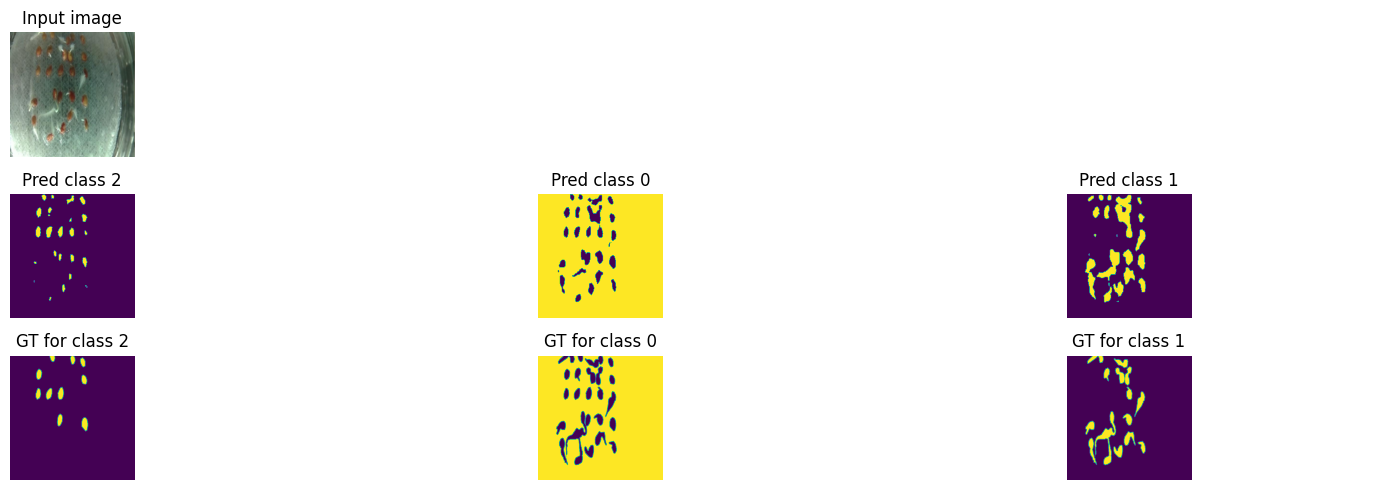

Train loss: 0.00420 | Time: 5m 6s | Val loss: 0.00267
Train_DICE_avg: 0.68083 | Train_Jaccard_avg: 0.61869 | Train_Sensitivity_avg: 0.91900 | Train_Specificity_avg: 0.90473 
Class 0 - Train_DICE: 0.98746 | Train_Jaccard: 0.97532 | Train_Sensitivity: 0.99075 | Train_Specificity: 0.74138 
Class 1 - Train_DICE: 0.36153 | Train_Jaccard: 0.32636 | Train_Sensitivity: 0.88816 | Train_Specificity: 0.98750 
Class 2 - Train_DICE: 0.69350 | Train_Jaccard: 0.55440 | Train_Sensitivity: 0.87808 | Train_Specificity: 0.98531 
Val_DICE_avg: 0.75265 | Val_Jaccard_avg: 0.68659 | Val_Sensitivity_avg: 0.94587 | Val_Specificity_avg: 0.86348 
Class 0 - Val_DICE: 0.99189 | Val_Jaccard: 0.98396 | Val_Sensitivity: 0.99854 | Val_Specificity: 0.61545 
Class 1 - Val_DICE: 0.58502 | Val_Jaccard: 0.54050 | Val_Sensitivity: 0.90876 | Val_Specificity: 0.99225 
Class 2 - Val_DICE: 0.68104 | Val_Jaccard: 0.53530 | Val_Sensitivity: 0.93032 | Val_Specificity: 0.98276 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


Train loss: 0.00385 | Time: 5m 33s | Val loss: 0.00248
Train_DICE_avg: 0.69067 | Train_Jaccard_avg: 0.62662 | Train_Sensitivity_avg: 0.91469 | Train_Specificity_avg: 0.90342 
Class 0 - Train_DICE: 0.98806 | Train_Jaccard: 0.97649 | Train_Sensitivity: 0.99152 | Train_Specificity: 0.73671 
Class 1 - Train_DICE: 0.37702 | Train_Jaccard: 0.33406 | Train_Sensitivity: 0.87126 | Train_Specificity: 0.98774 
Class 2 - Train_DICE: 0.70693 | Train_Jaccard: 0.56931 | Train_Sensitivity: 0.88130 | Train_Specificity: 0.98581 
Val_DICE_avg: 0.76399 | Val_Jaccard_avg: 0.69778 | Val_Sensitivity_avg: 0.94543 | Val_Specificity_avg: 0.86663 
Class 0 - Val_DICE: 0.99195 | Val_Jaccard: 0.98408 | Val_Sensitivity: 0.99863 | Val_Specificity: 0.62358 
Class 1 - Val_DICE: 0.59752 | Val_Jaccard: 0.54971 | Val_Sensitivity: 0.91059 | Val_Specificity: 0.99227 
Class 2 - Val_DICE: 0.70252 | Val_Jaccard: 0.55956 | Val_Sensitivity: 0.92708 | Val_Specificity: 0.98404 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]


Train loss: 0.00369 | Time: 6m 0s | Val loss: 0.00256
Train_DICE_avg: 0.69550 | Train_Jaccard_avg: 0.63102 | Train_Sensitivity_avg: 0.91757 | Train_Specificity_avg: 0.90563 
Class 0 - Train_DICE: 0.98833 | Train_Jaccard: 0.97701 | Train_Sensitivity: 0.99173 | Train_Specificity: 0.74266 
Class 1 - Train_DICE: 0.38444 | Train_Jaccard: 0.33937 | Train_Sensitivity: 0.87666 | Train_Specificity: 0.98798 
Class 2 - Train_DICE: 0.71373 | Train_Jaccard: 0.57667 | Train_Sensitivity: 0.88431 | Train_Specificity: 0.98625 
Val_DICE_avg: 0.76975 | Val_Jaccard_avg: 0.70155 | Val_Sensitivity_avg: 0.92508 | Val_Specificity_avg: 0.86162 
Class 0 - Val_DICE: 0.99172 | Val_Jaccard: 0.98362 | Val_Sensitivity: 0.99877 | Val_Specificity: 0.60798 
Class 1 - Val_DICE: 0.63585 | Val_Jaccard: 0.57970 | Val_Sensitivity: 0.88190 | Val_Specificity: 0.99314 
Class 2 - Val_DICE: 0.68168 | Val_Jaccard: 0.54132 | Val_Sensitivity: 0.89456 | Val_Specificity: 0.98374 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]


Train loss: 0.00356 | Time: 6m 29s | Val loss: 0.00239
Train_DICE_avg: 0.70418 | Train_Jaccard_avg: 0.63928 | Train_Sensitivity_avg: 0.91391 | Train_Specificity_avg: 0.90602 
Class 0 - Train_DICE: 0.98856 | Train_Jaccard: 0.97746 | Train_Sensitivity: 0.99215 | Train_Specificity: 0.74326 
Class 1 - Train_DICE: 0.40336 | Train_Jaccard: 0.35402 | Train_Sensitivity: 0.86493 | Train_Specificity: 0.98801 
Class 2 - Train_DICE: 0.72063 | Train_Jaccard: 0.58636 | Train_Sensitivity: 0.88465 | Train_Specificity: 0.98678 
Val_DICE_avg: 0.78293 | Val_Jaccard_avg: 0.71429 | Val_Sensitivity_avg: 0.94818 | Val_Specificity_avg: 0.86311 
Class 0 - Val_DICE: 0.99160 | Val_Jaccard: 0.98339 | Val_Sensitivity: 0.99892 | Val_Specificity: 0.61159 
Class 1 - Val_DICE: 0.64696 | Val_Jaccard: 0.59003 | Val_Sensitivity: 0.90467 | Val_Specificity: 0.99323 
Class 2 - Val_DICE: 0.71023 | Val_Jaccard: 0.56945 | Val_Sensitivity: 0.94094 | Val_Specificity: 0.98452 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


Train loss: 0.00347 | Time: 6m 57s | Val loss: 0.00230
Train_DICE_avg: 0.70611 | Train_Jaccard_avg: 0.64171 | Train_Sensitivity_avg: 0.91688 | Train_Specificity_avg: 0.90855 
Class 0 - Train_DICE: 0.98886 | Train_Jaccard: 0.97804 | Train_Sensitivity: 0.99241 | Train_Specificity: 0.75069 
Class 1 - Train_DICE: 0.40501 | Train_Jaccard: 0.35623 | Train_Sensitivity: 0.87009 | Train_Specificity: 0.98817 
Class 2 - Train_DICE: 0.72447 | Train_Jaccard: 0.59085 | Train_Sensitivity: 0.88814 | Train_Specificity: 0.98680 
Val_DICE_avg: 0.78012 | Val_Jaccard_avg: 0.71090 | Val_Sensitivity_avg: 0.94146 | Val_Specificity_avg: 0.85933 
Class 0 - Val_DICE: 0.99149 | Val_Jaccard: 0.98318 | Val_Sensitivity: 0.99898 | Val_Specificity: 0.60038 
Class 1 - Val_DICE: 0.63926 | Val_Jaccard: 0.58138 | Val_Sensitivity: 0.87785 | Val_Specificity: 0.99355 
Class 2 - Val_DICE: 0.70961 | Val_Jaccard: 0.56813 | Val_Sensitivity: 0.94757 | Val_Specificity: 0.98407 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]


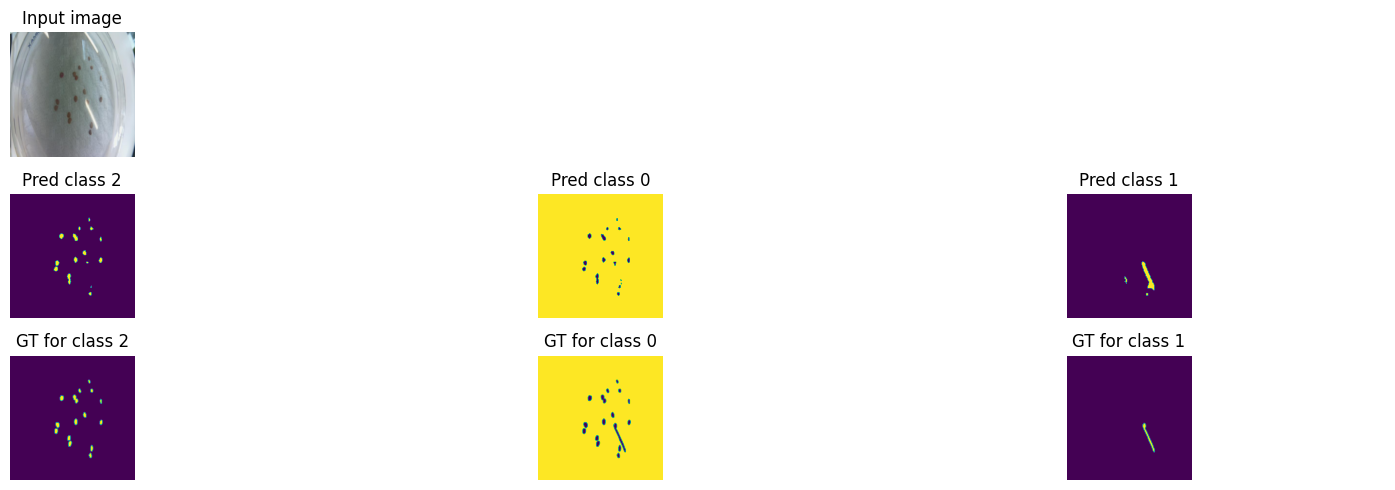

Train loss: 0.00340 | Time: 7m 26s | Val loss: 0.00228
Train_DICE_avg: 0.71076 | Train_Jaccard_avg: 0.64488 | Train_Sensitivity_avg: 0.91556 | Train_Specificity_avg: 0.90746 
Class 0 - Train_DICE: 0.98889 | Train_Jaccard: 0.97809 | Train_Sensitivity: 0.99257 | Train_Specificity: 0.74687 
Class 1 - Train_DICE: 0.41363 | Train_Jaccard: 0.36074 | Train_Sensitivity: 0.86314 | Train_Specificity: 0.98854 
Class 2 - Train_DICE: 0.72978 | Train_Jaccard: 0.59582 | Train_Sensitivity: 0.89095 | Train_Specificity: 0.98697 
Val_DICE_avg: 0.78711 | Val_Jaccard_avg: 0.71957 | Val_Sensitivity_avg: 0.94828 | Val_Specificity_avg: 0.86271 
Class 0 - Val_DICE: 0.99170 | Val_Jaccard: 0.98358 | Val_Sensitivity: 0.99894 | Val_Specificity: 0.61009 
Class 1 - Val_DICE: 0.63752 | Val_Jaccard: 0.58247 | Val_Sensitivity: 0.91644 | Val_Specificity: 0.99278 
Class 2 - Val_DICE: 0.73210 | Val_Jaccard: 0.59266 | Val_Sensitivity: 0.92947 | Val_Specificity: 0.98526 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]


Train loss: 0.00333 | Time: 7m 55s | Val loss: 0.00221
Train_DICE_avg: 0.71320 | Train_Jaccard_avg: 0.64811 | Train_Sensitivity_avg: 0.91726 | Train_Specificity_avg: 0.90884 
Class 0 - Train_DICE: 0.98913 | Train_Jaccard: 0.97856 | Train_Sensitivity: 0.99268 | Train_Specificity: 0.75064 
Class 1 - Train_DICE: 0.41639 | Train_Jaccard: 0.36427 | Train_Sensitivity: 0.86993 | Train_Specificity: 0.98859 
Class 2 - Train_DICE: 0.73408 | Train_Jaccard: 0.60149 | Train_Sensitivity: 0.88916 | Train_Specificity: 0.98730 
Val_DICE_avg: 0.78704 | Val_Jaccard_avg: 0.72008 | Val_Sensitivity_avg: 0.95057 | Val_Specificity_avg: 0.86604 
Class 0 - Val_DICE: 0.99221 | Val_Jaccard: 0.98457 | Val_Sensitivity: 0.99891 | Val_Specificity: 0.62017 
Class 1 - Val_DICE: 0.63250 | Val_Jaccard: 0.57923 | Val_Sensitivity: 0.91944 | Val_Specificity: 0.99290 
Class 2 - Val_DICE: 0.73641 | Val_Jaccard: 0.59642 | Val_Sensitivity: 0.93335 | Val_Specificity: 0.98504 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]


Train loss: 0.00325 | Time: 8m 23s | Val loss: 0.00215
Train_DICE_avg: 0.71500 | Train_Jaccard_avg: 0.64966 | Train_Sensitivity_avg: 0.91764 | Train_Specificity_avg: 0.91161 
Class 0 - Train_DICE: 0.98953 | Train_Jaccard: 0.97933 | Train_Sensitivity: 0.99303 | Train_Specificity: 0.75891 
Class 1 - Train_DICE: 0.41823 | Train_Jaccard: 0.36458 | Train_Sensitivity: 0.86632 | Train_Specificity: 0.98857 
Class 2 - Train_DICE: 0.73724 | Train_Jaccard: 0.60507 | Train_Sensitivity: 0.89356 | Train_Specificity: 0.98736 
Val_DICE_avg: 0.78752 | Val_Jaccard_avg: 0.71962 | Val_Sensitivity_avg: 0.95403 | Val_Specificity_avg: 0.86766 
Class 0 - Val_DICE: 0.99226 | Val_Jaccard: 0.98467 | Val_Sensitivity: 0.99894 | Val_Specificity: 0.62501 
Class 1 - Val_DICE: 0.64288 | Val_Jaccard: 0.58712 | Val_Sensitivity: 0.92189 | Val_Specificity: 0.99305 
Class 2 - Val_DICE: 0.72742 | Val_Jaccard: 0.58707 | Val_Sensitivity: 0.94125 | Val_Specificity: 0.98491 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]


Train loss: 0.00317 | Time: 8m 50s | Val loss: 0.00213
Train_DICE_avg: 0.71969 | Train_Jaccard_avg: 0.65434 | Train_Sensitivity_avg: 0.91757 | Train_Specificity_avg: 0.91101 
Class 0 - Train_DICE: 0.98964 | Train_Jaccard: 0.97954 | Train_Sensitivity: 0.99336 | Train_Specificity: 0.75699 
Class 1 - Train_DICE: 0.42582 | Train_Jaccard: 0.37119 | Train_Sensitivity: 0.86608 | Train_Specificity: 0.98854 
Class 2 - Train_DICE: 0.74363 | Train_Jaccard: 0.61228 | Train_Sensitivity: 0.89328 | Train_Specificity: 0.98749 
Val_DICE_avg: 0.78357 | Val_Jaccard_avg: 0.71359 | Val_Sensitivity_avg: 0.95537 | Val_Specificity_avg: 0.86688 
Class 0 - Val_DICE: 0.99211 | Val_Jaccard: 0.98438 | Val_Sensitivity: 0.99901 | Val_Specificity: 0.62346 
Class 1 - Val_DICE: 0.65140 | Val_Jaccard: 0.59195 | Val_Sensitivity: 0.91200 | Val_Specificity: 0.99337 
Class 2 - Val_DICE: 0.70721 | Val_Jaccard: 0.56443 | Val_Sensitivity: 0.95510 | Val_Specificity: 0.98382 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


Train loss: 0.00309 | Time: 9m 19s | Val loss: 0.00210
Train_DICE_avg: 0.71909 | Train_Jaccard_avg: 0.65390 | Train_Sensitivity_avg: 0.92259 | Train_Specificity_avg: 0.90740 
Class 0 - Train_DICE: 0.98972 | Train_Jaccard: 0.97971 | Train_Sensitivity: 0.99366 | Train_Specificity: 0.74650 
Class 1 - Train_DICE: 0.42737 | Train_Jaccard: 0.37314 | Train_Sensitivity: 0.87555 | Train_Specificity: 0.98838 
Class 2 - Train_DICE: 0.74019 | Train_Jaccard: 0.60886 | Train_Sensitivity: 0.89856 | Train_Specificity: 0.98732 
Val_DICE_avg: 0.79527 | Val_Jaccard_avg: 0.72785 | Val_Sensitivity_avg: 0.95249 | Val_Specificity_avg: 0.86213 
Class 0 - Val_DICE: 0.99166 | Val_Jaccard: 0.98350 | Val_Sensitivity: 0.99914 | Val_Specificity: 0.60760 
Class 1 - Val_DICE: 0.65365 | Val_Jaccard: 0.59729 | Val_Sensitivity: 0.91681 | Val_Specificity: 0.99339 
Class 2 - Val_DICE: 0.74050 | Val_Jaccard: 0.60277 | Val_Sensitivity: 0.94152 | Val_Specificity: 0.98541 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]


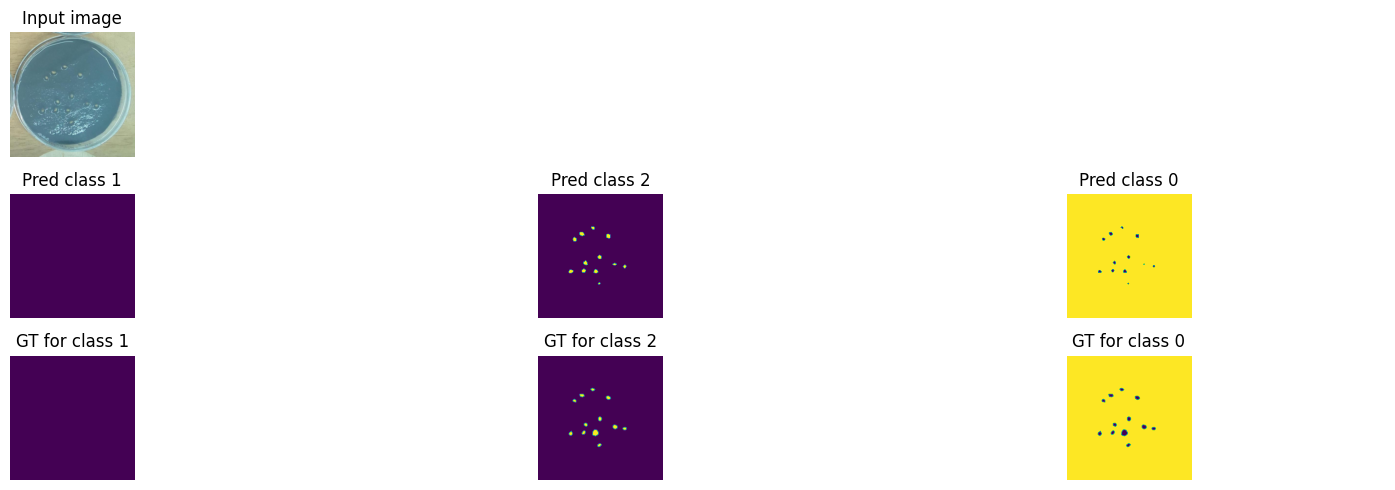

Train loss: 0.00313 | Time: 9m 49s | Val loss: 0.00206
Train_DICE_avg: 0.72610 | Train_Jaccard_avg: 0.65966 | Train_Sensitivity_avg: 0.91696 | Train_Specificity_avg: 0.91003 
Class 0 - Train_DICE: 0.98974 | Train_Jaccard: 0.97975 | Train_Sensitivity: 0.99347 | Train_Specificity: 0.75366 
Class 1 - Train_DICE: 0.44414 | Train_Jaccard: 0.38631 | Train_Sensitivity: 0.86243 | Train_Specificity: 0.98892 
Class 2 - Train_DICE: 0.74441 | Train_Jaccard: 0.61293 | Train_Sensitivity: 0.89499 | Train_Specificity: 0.98753 
Val_DICE_avg: 0.78968 | Val_Jaccard_avg: 0.72033 | Val_Sensitivity_avg: 0.95235 | Val_Specificity_avg: 0.86579 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98411 | Val_Sensitivity: 0.99908 | Val_Specificity: 0.61952 
Class 1 - Val_DICE: 0.66037 | Val_Jaccard: 0.60136 | Val_Sensitivity: 0.90680 | Val_Specificity: 0.99359 
Class 2 - Val_DICE: 0.71670 | Val_Jaccard: 0.57551 | Val_Sensitivity: 0.95119 | Val_Specificity: 0.98427 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]


Train loss: 0.00308 | Time: 10m 18s | Val loss: 0.00207
Train_DICE_avg: 0.72136 | Train_Jaccard_avg: 0.65556 | Train_Sensitivity_avg: 0.91781 | Train_Specificity_avg: 0.91194 
Class 0 - Train_DICE: 0.98985 | Train_Jaccard: 0.97995 | Train_Sensitivity: 0.99334 | Train_Specificity: 0.75944 
Class 1 - Train_DICE: 0.42936 | Train_Jaccard: 0.37305 | Train_Sensitivity: 0.86134 | Train_Specificity: 0.98883 
Class 2 - Train_DICE: 0.74487 | Train_Jaccard: 0.61369 | Train_Sensitivity: 0.89874 | Train_Specificity: 0.98755 
Val_DICE_avg: 0.79373 | Val_Jaccard_avg: 0.72551 | Val_Sensitivity_avg: 0.95007 | Val_Specificity_avg: 0.86499 
Class 0 - Val_DICE: 0.99191 | Val_Jaccard: 0.98400 | Val_Sensitivity: 0.99910 | Val_Specificity: 0.61650 
Class 1 - Val_DICE: 0.65528 | Val_Jaccard: 0.59861 | Val_Sensitivity: 0.90203 | Val_Specificity: 0.99368 
Class 2 - Val_DICE: 0.73401 | Val_Jaccard: 0.59392 | Val_Sensitivity: 0.94910 | Val_Specificity: 0.98480 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]


Train loss: 0.00300 | Time: 10m 46s | Val loss: 0.00209
Train_DICE_avg: 0.72914 | Train_Jaccard_avg: 0.66318 | Train_Sensitivity_avg: 0.91975 | Train_Specificity_avg: 0.91236 
Class 0 - Train_DICE: 0.99003 | Train_Jaccard: 0.98031 | Train_Sensitivity: 0.99374 | Train_Specificity: 0.76044 
Class 1 - Train_DICE: 0.44599 | Train_Jaccard: 0.38832 | Train_Sensitivity: 0.86892 | Train_Specificity: 0.98885 
Class 2 - Train_DICE: 0.75142 | Train_Jaccard: 0.62092 | Train_Sensitivity: 0.89657 | Train_Specificity: 0.98779 
Val_DICE_avg: 0.80339 | Val_Jaccard_avg: 0.73391 | Val_Sensitivity_avg: 0.94692 | Val_Specificity_avg: 0.86286 
Class 0 - Val_DICE: 0.99164 | Val_Jaccard: 0.98347 | Val_Sensitivity: 0.99921 | Val_Specificity: 0.60885 
Class 1 - Val_DICE: 0.68124 | Val_Jaccard: 0.61759 | Val_Sensitivity: 0.88639 | Val_Specificity: 0.99434 
Class 2 - Val_DICE: 0.73729 | Val_Jaccard: 0.60068 | Val_Sensitivity: 0.95515 | Val_Specificity: 0.98540 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]


Train loss: 0.00294 | Time: 11m 12s | Val loss: 0.00198
Train_DICE_avg: 0.73224 | Train_Jaccard_avg: 0.66594 | Train_Sensitivity_avg: 0.91998 | Train_Specificity_avg: 0.91232 
Class 0 - Train_DICE: 0.99014 | Train_Jaccard: 0.98052 | Train_Sensitivity: 0.99388 | Train_Specificity: 0.75980 
Class 1 - Train_DICE: 0.45341 | Train_Jaccard: 0.39382 | Train_Sensitivity: 0.86546 | Train_Specificity: 0.98923 
Class 2 - Train_DICE: 0.75316 | Train_Jaccard: 0.62348 | Train_Sensitivity: 0.90059 | Train_Specificity: 0.98792 
Val_DICE_avg: 0.80017 | Val_Jaccard_avg: 0.73153 | Val_Sensitivity_avg: 0.95636 | Val_Specificity_avg: 0.86333 
Class 0 - Val_DICE: 0.99198 | Val_Jaccard: 0.98413 | Val_Sensitivity: 0.99912 | Val_Specificity: 0.61138 
Class 1 - Val_DICE: 0.66776 | Val_Jaccard: 0.60768 | Val_Sensitivity: 0.91821 | Val_Specificity: 0.99352 
Class 2 - Val_DICE: 0.74078 | Val_Jaccard: 0.60278 | Val_Sensitivity: 0.95174 | Val_Specificity: 0.98508 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


Train loss: 0.00291 | Time: 11m 40s | Val loss: 0.00208
Train_DICE_avg: 0.73004 | Train_Jaccard_avg: 0.66326 | Train_Sensitivity_avg: 0.92048 | Train_Specificity_avg: 0.91092 
Class 0 - Train_DICE: 0.99022 | Train_Jaccard: 0.98069 | Train_Sensitivity: 0.99408 | Train_Specificity: 0.75611 
Class 1 - Train_DICE: 0.44811 | Train_Jaccard: 0.38774 | Train_Sensitivity: 0.86443 | Train_Specificity: 0.98903 
Class 2 - Train_DICE: 0.75177 | Train_Jaccard: 0.62135 | Train_Sensitivity: 0.90293 | Train_Specificity: 0.98762 
Val_DICE_avg: 0.79944 | Val_Jaccard_avg: 0.72955 | Val_Sensitivity_avg: 0.94307 | Val_Specificity_avg: 0.86298 
Class 0 - Val_DICE: 0.99167 | Val_Jaccard: 0.98353 | Val_Sensitivity: 0.99918 | Val_Specificity: 0.60949 
Class 1 - Val_DICE: 0.67691 | Val_Jaccard: 0.61319 | Val_Sensitivity: 0.86992 | Val_Specificity: 0.99459 
Class 2 - Val_DICE: 0.72974 | Val_Jaccard: 0.59191 | Val_Sensitivity: 0.96010 | Val_Specificity: 0.98485 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


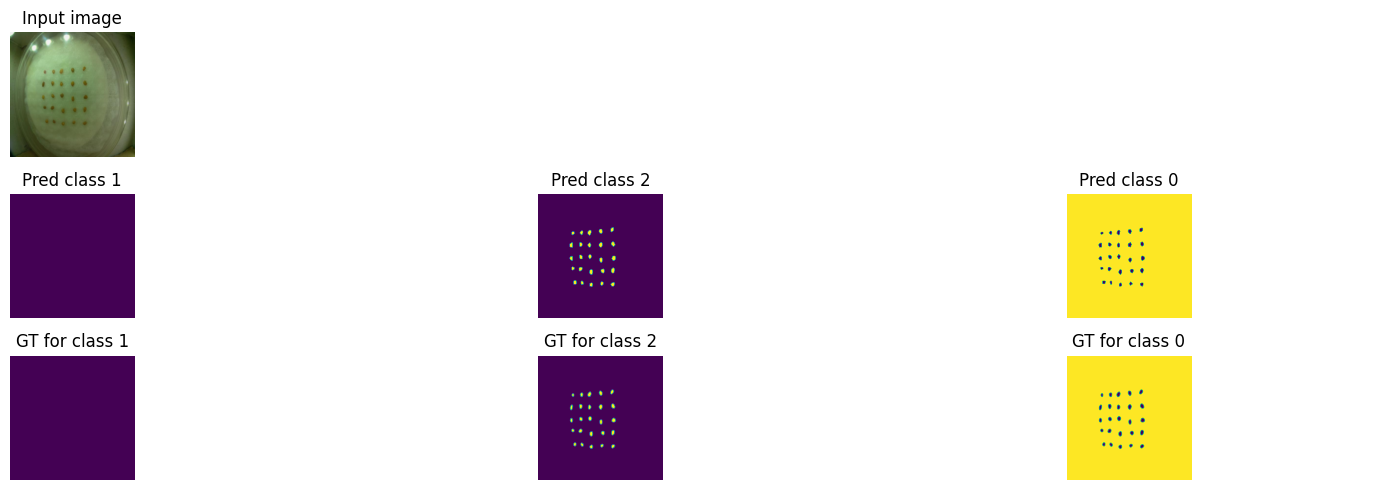

Train loss: 0.00289 | Time: 12m 8s | Val loss: 0.00204
Train_DICE_avg: 0.73249 | Train_Jaccard_avg: 0.66602 | Train_Sensitivity_avg: 0.91718 | Train_Specificity_avg: 0.91328 
Class 0 - Train_DICE: 0.99032 | Train_Jaccard: 0.98088 | Train_Sensitivity: 0.99405 | Train_Specificity: 0.76299 
Class 1 - Train_DICE: 0.45146 | Train_Jaccard: 0.39071 | Train_Sensitivity: 0.85517 | Train_Specificity: 0.98900 
Class 2 - Train_DICE: 0.75569 | Train_Jaccard: 0.62647 | Train_Sensitivity: 0.90232 | Train_Specificity: 0.98784 
Val_DICE_avg: 0.80535 | Val_Jaccard_avg: 0.73938 | Val_Sensitivity_avg: 0.95442 | Val_Specificity_avg: 0.85642 
Class 0 - Val_DICE: 0.99099 | Val_Jaccard: 0.98221 | Val_Sensitivity: 0.99926 | Val_Specificity: 0.58915 
Class 1 - Val_DICE: 0.65751 | Val_Jaccard: 0.60028 | Val_Sensitivity: 0.92669 | Val_Specificity: 0.99338 
Class 2 - Val_DICE: 0.76756 | Val_Jaccard: 0.63566 | Val_Sensitivity: 0.93730 | Val_Specificity: 0.98673 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]


Train loss: 0.00285 | Time: 12m 35s | Val loss: 0.00197
Train_DICE_avg: 0.73924 | Train_Jaccard_avg: 0.67278 | Train_Sensitivity_avg: 0.92128 | Train_Specificity_avg: 0.91427 
Class 0 - Train_DICE: 0.99046 | Train_Jaccard: 0.98114 | Train_Sensitivity: 0.99414 | Train_Specificity: 0.76543 
Class 1 - Train_DICE: 0.46647 | Train_Jaccard: 0.40493 | Train_Sensitivity: 0.86710 | Train_Specificity: 0.98930 
Class 2 - Train_DICE: 0.76078 | Train_Jaccard: 0.63227 | Train_Sensitivity: 0.90258 | Train_Specificity: 0.98807 
Val_DICE_avg: 0.80011 | Val_Jaccard_avg: 0.72973 | Val_Sensitivity_avg: 0.95164 | Val_Specificity_avg: 0.86734 
Class 0 - Val_DICE: 0.99209 | Val_Jaccard: 0.98435 | Val_Sensitivity: 0.99920 | Val_Specificity: 0.62362 
Class 1 - Val_DICE: 0.68974 | Val_Jaccard: 0.62746 | Val_Sensitivity: 0.89413 | Val_Specificity: 0.99444 
Class 2 - Val_DICE: 0.71850 | Val_Jaccard: 0.57739 | Val_Sensitivity: 0.96158 | Val_Specificity: 0.98395 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Train loss: 0.00282 | Time: 13m 3s | Val loss: 0.00194
Train_DICE_avg: 0.73509 | Train_Jaccard_avg: 0.66860 | Train_Sensitivity_avg: 0.92106 | Train_Specificity_avg: 0.91311 
Class 0 - Train_DICE: 0.99056 | Train_Jaccard: 0.98134 | Train_Sensitivity: 0.99419 | Train_Specificity: 0.76207 
Class 1 - Train_DICE: 0.45623 | Train_Jaccard: 0.39509 | Train_Sensitivity: 0.86252 | Train_Specificity: 0.98929 
Class 2 - Train_DICE: 0.75848 | Train_Jaccard: 0.62937 | Train_Sensitivity: 0.90645 | Train_Specificity: 0.98798 
Val_DICE_avg: 0.79167 | Val_Jaccard_avg: 0.72111 | Val_Sensitivity_avg: 0.95150 | Val_Specificity_avg: 0.87043 
Class 0 - Val_DICE: 0.99250 | Val_Jaccard: 0.98515 | Val_Sensitivity: 0.99912 | Val_Specificity: 0.63286 
Class 1 - Val_DICE: 0.65715 | Val_Jaccard: 0.59306 | Val_Sensitivity: 0.89647 | Val_Specificity: 0.99392 
Class 2 - Val_DICE: 0.72535 | Val_Jaccard: 0.58513 | Val_Sensitivity: 0.95889 | Val_Specificity: 0.98451 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


Train loss: 0.00281 | Time: 13m 29s | Val loss: 0.00192
Train_DICE_avg: 0.73643 | Train_Jaccard_avg: 0.67048 | Train_Sensitivity_avg: 0.92357 | Train_Specificity_avg: 0.91271 
Class 0 - Train_DICE: 0.99046 | Train_Jaccard: 0.98115 | Train_Sensitivity: 0.99435 | Train_Specificity: 0.76103 
Class 1 - Train_DICE: 0.45834 | Train_Jaccard: 0.39773 | Train_Sensitivity: 0.87235 | Train_Specificity: 0.98902 
Class 2 - Train_DICE: 0.76050 | Train_Jaccard: 0.63255 | Train_Sensitivity: 0.90403 | Train_Specificity: 0.98810 
Val_DICE_avg: 0.80182 | Val_Jaccard_avg: 0.73101 | Val_Sensitivity_avg: 0.95034 | Val_Specificity_avg: 0.86343 
Class 0 - Val_DICE: 0.99190 | Val_Jaccard: 0.98397 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.61143 
Class 1 - Val_DICE: 0.68328 | Val_Jaccard: 0.61772 | Val_Sensitivity: 0.89053 | Val_Specificity: 0.99411 
Class 2 - Val_DICE: 0.73027 | Val_Jaccard: 0.59133 | Val_Sensitivity: 0.96128 | Val_Specificity: 0.98475 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


Train loss: 0.00277 | Time: 13m 57s | Val loss: 0.00191
Train_DICE_avg: 0.73676 | Train_Jaccard_avg: 0.66998 | Train_Sensitivity_avg: 0.92018 | Train_Specificity_avg: 0.91514 
Class 0 - Train_DICE: 0.99068 | Train_Jaccard: 0.98158 | Train_Sensitivity: 0.99427 | Train_Specificity: 0.76811 
Class 1 - Train_DICE: 0.45666 | Train_Jaccard: 0.39449 | Train_Sensitivity: 0.85898 | Train_Specificity: 0.98928 
Class 2 - Train_DICE: 0.76295 | Train_Jaccard: 0.63387 | Train_Sensitivity: 0.90729 | Train_Specificity: 0.98804 
Val_DICE_avg: 0.80124 | Val_Jaccard_avg: 0.73191 | Val_Sensitivity_avg: 0.95145 | Val_Specificity_avg: 0.86554 
Class 0 - Val_DICE: 0.99210 | Val_Jaccard: 0.98436 | Val_Sensitivity: 0.99921 | Val_Specificity: 0.61738 
Class 1 - Val_DICE: 0.67129 | Val_Jaccard: 0.60845 | Val_Sensitivity: 0.89542 | Val_Specificity: 0.99411 
Class 2 - Val_DICE: 0.74031 | Val_Jaccard: 0.60293 | Val_Sensitivity: 0.95972 | Val_Specificity: 0.98512 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]


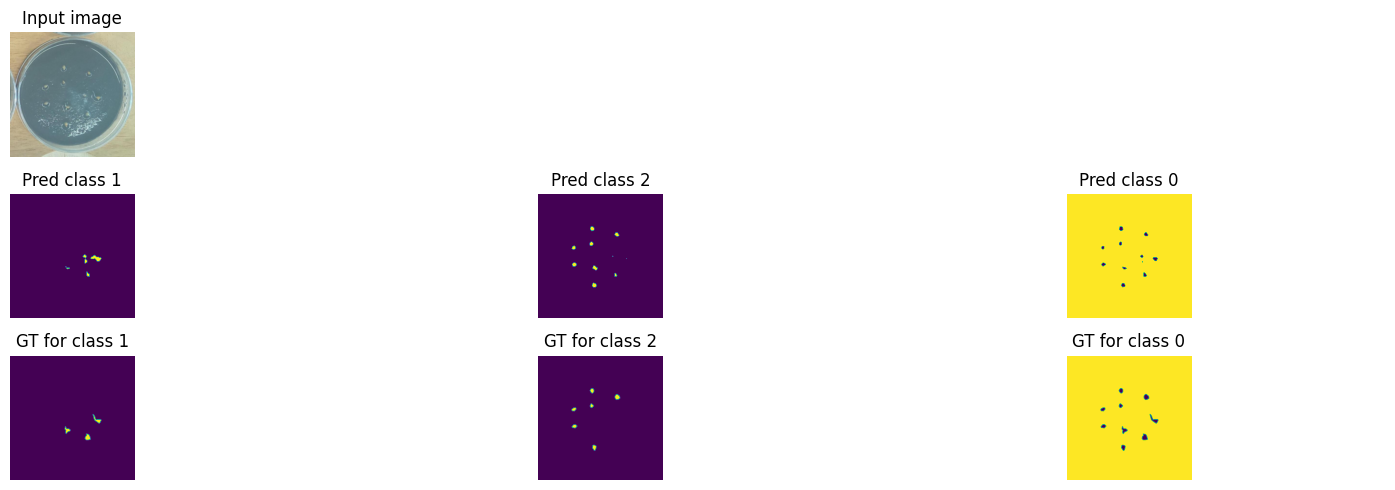

Train loss: 0.00274 | Time: 14m 27s | Val loss: 0.00193
Train_DICE_avg: 0.73838 | Train_Jaccard_avg: 0.67189 | Train_Sensitivity_avg: 0.92020 | Train_Specificity_avg: 0.91375 
Class 0 - Train_DICE: 0.99085 | Train_Jaccard: 0.98192 | Train_Sensitivity: 0.99460 | Train_Specificity: 0.76390 
Class 1 - Train_DICE: 0.46098 | Train_Jaccard: 0.39802 | Train_Sensitivity: 0.85902 | Train_Specificity: 0.98917 
Class 2 - Train_DICE: 0.76332 | Train_Jaccard: 0.63574 | Train_Sensitivity: 0.90697 | Train_Specificity: 0.98819 
Val_DICE_avg: 0.79537 | Val_Jaccard_avg: 0.72436 | Val_Sensitivity_avg: 0.94642 | Val_Specificity_avg: 0.86497 
Class 0 - Val_DICE: 0.99210 | Val_Jaccard: 0.98437 | Val_Sensitivity: 0.99923 | Val_Specificity: 0.61632 
Class 1 - Val_DICE: 0.67500 | Val_Jaccard: 0.60997 | Val_Sensitivity: 0.87384 | Val_Specificity: 0.99440 
Class 2 - Val_DICE: 0.71901 | Val_Jaccard: 0.57873 | Val_Sensitivity: 0.96618 | Val_Specificity: 0.98419 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


Train loss: 0.00274 | Time: 14m 55s | Val loss: 0.00191
Train_DICE_avg: 0.74145 | Train_Jaccard_avg: 0.67505 | Train_Sensitivity_avg: 0.92351 | Train_Specificity_avg: 0.91497 
Class 0 - Train_DICE: 0.99080 | Train_Jaccard: 0.98180 | Train_Sensitivity: 0.99452 | Train_Specificity: 0.76739 
Class 1 - Train_DICE: 0.46623 | Train_Jaccard: 0.40371 | Train_Sensitivity: 0.87065 | Train_Specificity: 0.98919 
Class 2 - Train_DICE: 0.76733 | Train_Jaccard: 0.63965 | Train_Sensitivity: 0.90537 | Train_Specificity: 0.98833 
Val_DICE_avg: 0.80230 | Val_Jaccard_avg: 0.73230 | Val_Sensitivity_avg: 0.95512 | Val_Specificity_avg: 0.86517 
Class 0 - Val_DICE: 0.99209 | Val_Jaccard: 0.98434 | Val_Sensitivity: 0.99922 | Val_Specificity: 0.61664 
Class 1 - Val_DICE: 0.68010 | Val_Jaccard: 0.61624 | Val_Sensitivity: 0.90792 | Val_Specificity: 0.99398 
Class 2 - Val_DICE: 0.73473 | Val_Jaccard: 0.59631 | Val_Sensitivity: 0.95821 | Val_Specificity: 0.98488 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]


Train loss: 0.00270 | Time: 15m 23s | Val loss: 0.00186
Train_DICE_avg: 0.74425 | Train_Jaccard_avg: 0.67751 | Train_Sensitivity_avg: 0.91983 | Train_Specificity_avg: 0.91551 
Class 0 - Train_DICE: 0.99077 | Train_Jaccard: 0.98176 | Train_Sensitivity: 0.99448 | Train_Specificity: 0.76872 
Class 1 - Train_DICE: 0.47625 | Train_Jaccard: 0.41294 | Train_Sensitivity: 0.85450 | Train_Specificity: 0.98963 
Class 2 - Train_DICE: 0.76572 | Train_Jaccard: 0.63784 | Train_Sensitivity: 0.91052 | Train_Specificity: 0.98818 
Val_DICE_avg: 0.81735 | Val_Jaccard_avg: 0.74890 | Val_Sensitivity_avg: 0.95834 | Val_Specificity_avg: 0.85803 
Class 0 - Val_DICE: 0.99148 | Val_Jaccard: 0.98315 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.59404 
Class 1 - Val_DICE: 0.69780 | Val_Jaccard: 0.63382 | Val_Sensitivity: 0.92366 | Val_Specificity: 0.99398 
Class 2 - Val_DICE: 0.76277 | Val_Jaccard: 0.62974 | Val_Sensitivity: 0.95208 | Val_Specificity: 0.98607 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


Train loss: 0.00263 | Time: 15m 50s | Val loss: 0.00185
Train_DICE_avg: 0.74160 | Train_Jaccard_avg: 0.67507 | Train_Sensitivity_avg: 0.92456 | Train_Specificity_avg: 0.91464 
Class 0 - Train_DICE: 0.99104 | Train_Jaccard: 0.98227 | Train_Sensitivity: 0.99478 | Train_Specificity: 0.76602 
Class 1 - Train_DICE: 0.46433 | Train_Jaccard: 0.40027 | Train_Sensitivity: 0.86879 | Train_Specificity: 0.98947 
Class 2 - Train_DICE: 0.76945 | Train_Jaccard: 0.64267 | Train_Sensitivity: 0.91010 | Train_Specificity: 0.98841 
Val_DICE_avg: 0.80927 | Val_Jaccard_avg: 0.74043 | Val_Sensitivity_avg: 0.95616 | Val_Specificity_avg: 0.86237 
Class 0 - Val_DICE: 0.99174 | Val_Jaccard: 0.98367 | Val_Sensitivity: 0.99927 | Val_Specificity: 0.60722 
Class 1 - Val_DICE: 0.68131 | Val_Jaccard: 0.61757 | Val_Sensitivity: 0.91571 | Val_Specificity: 0.99390 
Class 2 - Val_DICE: 0.75476 | Val_Jaccard: 0.62005 | Val_Sensitivity: 0.95351 | Val_Specificity: 0.98598 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


Train loss: 0.00262 | Time: 16m 18s | Val loss: 0.00185
Train_DICE_avg: 0.74574 | Train_Jaccard_avg: 0.67920 | Train_Sensitivity_avg: 0.92355 | Train_Specificity_avg: 0.91568 
Class 0 - Train_DICE: 0.99105 | Train_Jaccard: 0.98229 | Train_Sensitivity: 0.99461 | Train_Specificity: 0.76916 
Class 1 - Train_DICE: 0.47632 | Train_Jaccard: 0.41219 | Train_Sensitivity: 0.86620 | Train_Specificity: 0.98946 
Class 2 - Train_DICE: 0.76987 | Train_Jaccard: 0.64311 | Train_Sensitivity: 0.90985 | Train_Specificity: 0.98843 
Val_DICE_avg: 0.81239 | Val_Jaccard_avg: 0.74110 | Val_Sensitivity_avg: 0.95283 | Val_Specificity_avg: 0.86063 
Class 0 - Val_DICE: 0.99166 | Val_Jaccard: 0.98351 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.60242 
Class 1 - Val_DICE: 0.71064 | Val_Jaccard: 0.64296 | Val_Sensitivity: 0.89152 | Val_Specificity: 0.99465 
Class 2 - Val_DICE: 0.73485 | Val_Jaccard: 0.59683 | Val_Sensitivity: 0.96765 | Val_Specificity: 0.98480 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]


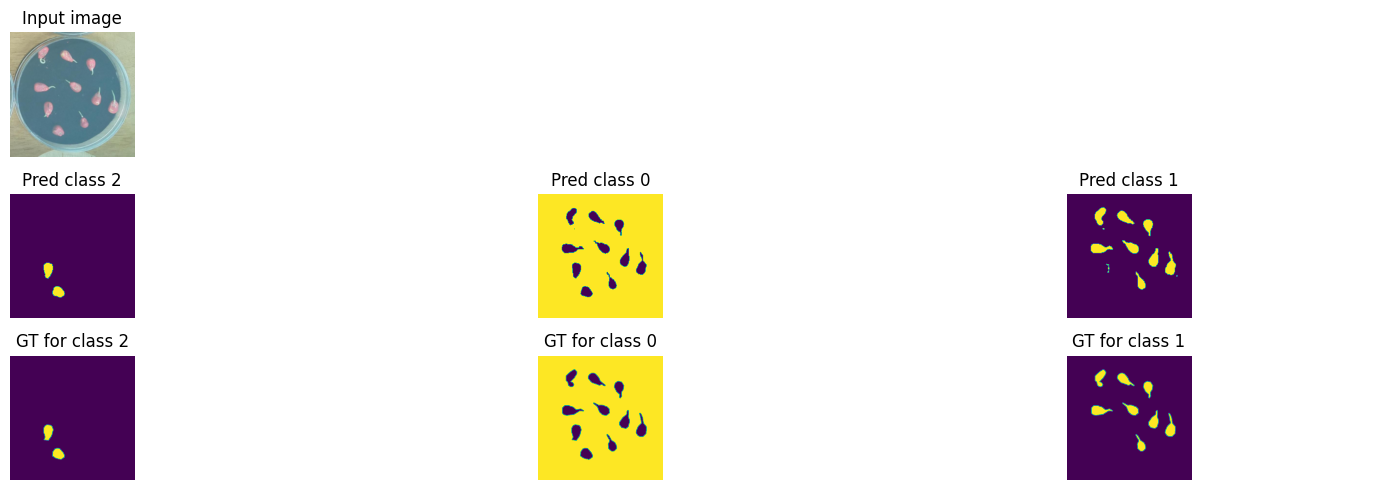

Train loss: 0.00257 | Time: 16m 46s | Val loss: 0.00185
Train_DICE_avg: 0.74778 | Train_Jaccard_avg: 0.68056 | Train_Sensitivity_avg: 0.92611 | Train_Specificity_avg: 0.91425 
Class 0 - Train_DICE: 0.99108 | Train_Jaccard: 0.98236 | Train_Sensitivity: 0.99503 | Train_Specificity: 0.76470 
Class 1 - Train_DICE: 0.48055 | Train_Jaccard: 0.41420 | Train_Sensitivity: 0.87029 | Train_Specificity: 0.98967 
Class 2 - Train_DICE: 0.77172 | Train_Jaccard: 0.64513 | Train_Sensitivity: 0.91302 | Train_Specificity: 0.98839 
Val_DICE_avg: 0.81314 | Val_Jaccard_avg: 0.74375 | Val_Sensitivity_avg: 0.95359 | Val_Specificity_avg: 0.86189 
Class 0 - Val_DICE: 0.99183 | Val_Jaccard: 0.98383 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.60578 
Class 1 - Val_DICE: 0.69037 | Val_Jaccard: 0.62585 | Val_Sensitivity: 0.90412 | Val_Specificity: 0.99438 
Class 2 - Val_DICE: 0.75723 | Val_Jaccard: 0.62158 | Val_Sensitivity: 0.95735 | Val_Specificity: 0.98551 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


Train loss: 0.00256 | Time: 17m 13s | Val loss: 0.00180
Train_DICE_avg: 0.74798 | Train_Jaccard_avg: 0.68106 | Train_Sensitivity_avg: 0.92202 | Train_Specificity_avg: 0.91557 
Class 0 - Train_DICE: 0.99116 | Train_Jaccard: 0.98252 | Train_Sensitivity: 0.99499 | Train_Specificity: 0.76871 
Class 1 - Train_DICE: 0.47997 | Train_Jaccard: 0.41429 | Train_Sensitivity: 0.86064 | Train_Specificity: 0.98959 
Class 2 - Train_DICE: 0.77280 | Train_Jaccard: 0.64637 | Train_Sensitivity: 0.91044 | Train_Specificity: 0.98839 
Val_DICE_avg: 0.81294 | Val_Jaccard_avg: 0.74246 | Val_Sensitivity_avg: 0.95262 | Val_Specificity_avg: 0.86267 
Class 0 - Val_DICE: 0.99187 | Val_Jaccard: 0.98391 | Val_Sensitivity: 0.99928 | Val_Specificity: 0.60845 
Class 1 - Val_DICE: 0.69489 | Val_Jaccard: 0.62812 | Val_Sensitivity: 0.90096 | Val_Specificity: 0.99415 
Class 2 - Val_DICE: 0.75206 | Val_Jaccard: 0.61536 | Val_Sensitivity: 0.95763 | Val_Specificity: 0.98541 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]


Train loss: 0.00253 | Time: 17m 40s | Val loss: 0.00181
Train_DICE_avg: 0.74905 | Train_Jaccard_avg: 0.68189 | Train_Sensitivity_avg: 0.92333 | Train_Specificity_avg: 0.91571 
Class 0 - Train_DICE: 0.99123 | Train_Jaccard: 0.98265 | Train_Sensitivity: 0.99506 | Train_Specificity: 0.76904 
Class 1 - Train_DICE: 0.48199 | Train_Jaccard: 0.41515 | Train_Sensitivity: 0.86086 | Train_Specificity: 0.98958 
Class 2 - Train_DICE: 0.77392 | Train_Jaccard: 0.64786 | Train_Sensitivity: 0.91406 | Train_Specificity: 0.98850 
Val_DICE_avg: 0.80923 | Val_Jaccard_avg: 0.73890 | Val_Sensitivity_avg: 0.95064 | Val_Specificity_avg: 0.86650 
Class 0 - Val_DICE: 0.99212 | Val_Jaccard: 0.98440 | Val_Sensitivity: 0.99928 | Val_Specificity: 0.61997 
Class 1 - Val_DICE: 0.69184 | Val_Jaccard: 0.62661 | Val_Sensitivity: 0.89042 | Val_Specificity: 0.99456 
Class 2 - Val_DICE: 0.74373 | Val_Jaccard: 0.60570 | Val_Sensitivity: 0.96223 | Val_Specificity: 0.98498 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


Train loss: 0.00255 | Time: 18m 7s | Val loss: 0.00178
Train_DICE_avg: 0.75219 | Train_Jaccard_avg: 0.68475 | Train_Sensitivity_avg: 0.92493 | Train_Specificity_avg: 0.91642 
Class 0 - Train_DICE: 0.99116 | Train_Jaccard: 0.98251 | Train_Sensitivity: 0.99490 | Train_Specificity: 0.77086 
Class 1 - Train_DICE: 0.48946 | Train_Jaccard: 0.42204 | Train_Sensitivity: 0.86785 | Train_Specificity: 0.98987 
Class 2 - Train_DICE: 0.77595 | Train_Jaccard: 0.64968 | Train_Sensitivity: 0.91204 | Train_Specificity: 0.98852 
Val_DICE_avg: 0.81500 | Val_Jaccard_avg: 0.74494 | Val_Sensitivity_avg: 0.95045 | Val_Specificity_avg: 0.86530 
Class 0 - Val_DICE: 0.99216 | Val_Jaccard: 0.98447 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.61600 
Class 1 - Val_DICE: 0.70197 | Val_Jaccard: 0.63554 | Val_Sensitivity: 0.88841 | Val_Specificity: 0.99468 
Class 2 - Val_DICE: 0.75087 | Val_Jaccard: 0.61481 | Val_Sensitivity: 0.96363 | Val_Specificity: 0.98521 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]


Train loss: 0.00248 | Time: 18m 34s | Val loss: 0.00178
Train_DICE_avg: 0.75300 | Train_Jaccard_avg: 0.68555 | Train_Sensitivity_avg: 0.92710 | Train_Specificity_avg: 0.91492 
Class 0 - Train_DICE: 0.99138 | Train_Jaccard: 0.98293 | Train_Sensitivity: 0.99527 | Train_Specificity: 0.76671 
Class 1 - Train_DICE: 0.49134 | Train_Jaccard: 0.42321 | Train_Sensitivity: 0.87151 | Train_Specificity: 0.98953 
Class 2 - Train_DICE: 0.77628 | Train_Jaccard: 0.65049 | Train_Sensitivity: 0.91453 | Train_Specificity: 0.98851 
Val_DICE_avg: 0.81447 | Val_Jaccard_avg: 0.74376 | Val_Sensitivity_avg: 0.95369 | Val_Specificity_avg: 0.86330 
Class 0 - Val_DICE: 0.99193 | Val_Jaccard: 0.98403 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.61012 
Class 1 - Val_DICE: 0.70380 | Val_Jaccard: 0.63579 | Val_Sensitivity: 0.89906 | Val_Specificity: 0.99439 
Class 2 - Val_DICE: 0.74768 | Val_Jaccard: 0.61145 | Val_Sensitivity: 0.96271 | Val_Specificity: 0.98538 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


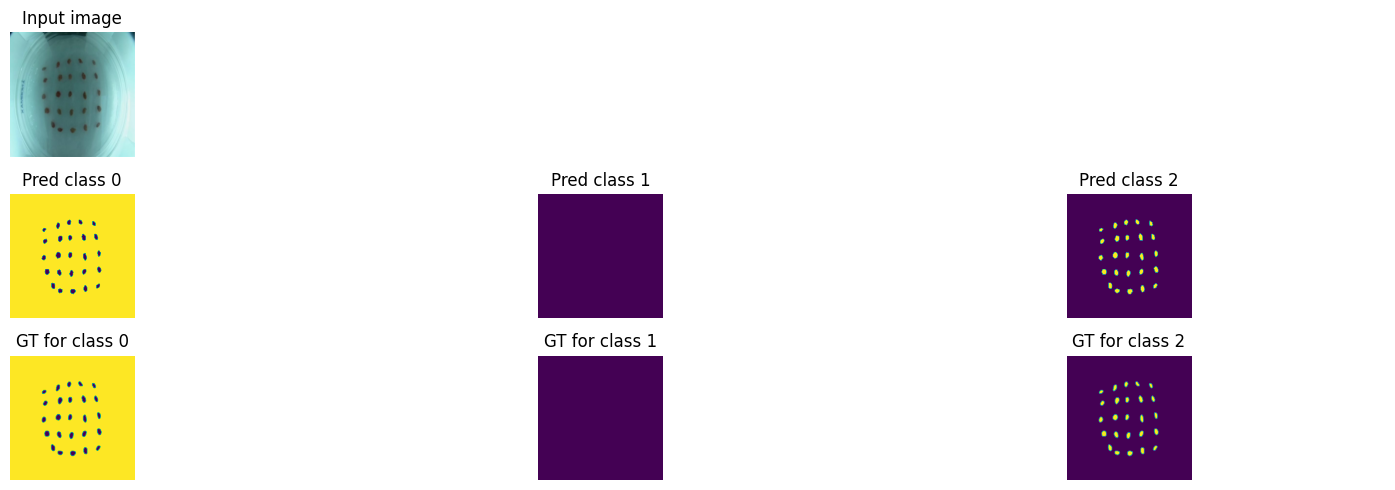

Train loss: 0.00248 | Time: 19m 3s | Val loss: 0.00178
Train_DICE_avg: 0.75412 | Train_Jaccard_avg: 0.68717 | Train_Sensitivity_avg: 0.92626 | Train_Specificity_avg: 0.91631 
Class 0 - Train_DICE: 0.99137 | Train_Jaccard: 0.98292 | Train_Sensitivity: 0.99518 | Train_Specificity: 0.77094 
Class 1 - Train_DICE: 0.49490 | Train_Jaccard: 0.42751 | Train_Sensitivity: 0.86698 | Train_Specificity: 0.98956 
Class 2 - Train_DICE: 0.77610 | Train_Jaccard: 0.65108 | Train_Sensitivity: 0.91663 | Train_Specificity: 0.98844 
Val_DICE_avg: 0.81693 | Val_Jaccard_avg: 0.74510 | Val_Sensitivity_avg: 0.95208 | Val_Specificity_avg: 0.86386 
Class 0 - Val_DICE: 0.99193 | Val_Jaccard: 0.98403 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.61189 
Class 1 - Val_DICE: 0.72136 | Val_Jaccard: 0.65125 | Val_Sensitivity: 0.88708 | Val_Specificity: 0.99490 
Class 2 - Val_DICE: 0.73749 | Val_Jaccard: 0.60001 | Val_Sensitivity: 0.96985 | Val_Specificity: 0.98481 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


Train loss: 0.00247 | Time: 19m 31s | Val loss: 0.00180
Train_DICE_avg: 0.75563 | Train_Jaccard_avg: 0.68855 | Train_Sensitivity_avg: 0.92496 | Train_Specificity_avg: 0.91696 
Class 0 - Train_DICE: 0.99138 | Train_Jaccard: 0.98294 | Train_Sensitivity: 0.99514 | Train_Specificity: 0.77233 
Class 1 - Train_DICE: 0.49553 | Train_Jaccard: 0.42711 | Train_Sensitivity: 0.86422 | Train_Specificity: 0.98982 
Class 2 - Train_DICE: 0.77999 | Train_Jaccard: 0.65559 | Train_Sensitivity: 0.91551 | Train_Specificity: 0.98872 
Val_DICE_avg: 0.81036 | Val_Jaccard_avg: 0.73933 | Val_Sensitivity_avg: 0.95014 | Val_Specificity_avg: 0.86771 
Class 0 - Val_DICE: 0.99218 | Val_Jaccard: 0.98453 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.62390 
Class 1 - Val_DICE: 0.70619 | Val_Jaccard: 0.63990 | Val_Sensitivity: 0.88781 | Val_Specificity: 0.99464 
Class 2 - Val_DICE: 0.73271 | Val_Jaccard: 0.59357 | Val_Sensitivity: 0.96332 | Val_Specificity: 0.98460 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]


Train loss: 0.00243 | Time: 19m 58s | Val loss: 0.00177
Train_DICE_avg: 0.75457 | Train_Jaccard_avg: 0.68742 | Train_Sensitivity_avg: 0.92670 | Train_Specificity_avg: 0.91622 
Class 0 - Train_DICE: 0.99144 | Train_Jaccard: 0.98305 | Train_Sensitivity: 0.99533 | Train_Specificity: 0.77043 
Class 1 - Train_DICE: 0.49571 | Train_Jaccard: 0.42799 | Train_Sensitivity: 0.86636 | Train_Specificity: 0.98978 
Class 2 - Train_DICE: 0.77656 | Train_Jaccard: 0.65123 | Train_Sensitivity: 0.91841 | Train_Specificity: 0.98846 
Val_DICE_avg: 0.81302 | Val_Jaccard_avg: 0.74364 | Val_Sensitivity_avg: 0.95416 | Val_Specificity_avg: 0.86425 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98410 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.61264 
Class 1 - Val_DICE: 0.69042 | Val_Jaccard: 0.62527 | Val_Sensitivity: 0.90202 | Val_Specificity: 0.99446 
Class 2 - Val_DICE: 0.75666 | Val_Jaccard: 0.62154 | Val_Sensitivity: 0.96116 | Val_Specificity: 0.98565 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Train loss: 0.00243 | Time: 20m 25s | Val loss: 0.00174
Train_DICE_avg: 0.75731 | Train_Jaccard_avg: 0.69016 | Train_Sensitivity_avg: 0.92610 | Train_Specificity_avg: 0.91730 
Class 0 - Train_DICE: 0.99142 | Train_Jaccard: 0.98302 | Train_Sensitivity: 0.99535 | Train_Specificity: 0.77338 
Class 1 - Train_DICE: 0.49880 | Train_Jaccard: 0.43008 | Train_Sensitivity: 0.86544 | Train_Specificity: 0.98985 
Class 2 - Train_DICE: 0.78170 | Train_Jaccard: 0.65739 | Train_Sensitivity: 0.91752 | Train_Specificity: 0.98867 
Val_DICE_avg: 0.81819 | Val_Jaccard_avg: 0.74846 | Val_Sensitivity_avg: 0.95724 | Val_Specificity_avg: 0.86635 
Class 0 - Val_DICE: 0.99208 | Val_Jaccard: 0.98433 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.61884 
Class 1 - Val_DICE: 0.70632 | Val_Jaccard: 0.63910 | Val_Sensitivity: 0.91291 | Val_Specificity: 0.99433 
Class 2 - Val_DICE: 0.75617 | Val_Jaccard: 0.62195 | Val_Sensitivity: 0.95952 | Val_Specificity: 0.98589 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]


Train loss: 0.00243 | Time: 20m 54s | Val loss: 0.00174
Train_DICE_avg: 0.76015 | Train_Jaccard_avg: 0.69289 | Train_Sensitivity_avg: 0.92792 | Train_Specificity_avg: 0.91686 
Class 0 - Train_DICE: 0.99143 | Train_Jaccard: 0.98303 | Train_Sensitivity: 0.99528 | Train_Specificity: 0.77189 
Class 1 - Train_DICE: 0.50725 | Train_Jaccard: 0.43811 | Train_Sensitivity: 0.87198 | Train_Specificity: 0.98986 
Class 2 - Train_DICE: 0.78177 | Train_Jaccard: 0.65753 | Train_Sensitivity: 0.91651 | Train_Specificity: 0.98882 
Val_DICE_avg: 0.81652 | Val_Jaccard_avg: 0.74677 | Val_Sensitivity_avg: 0.95729 | Val_Specificity_avg: 0.86664 
Class 0 - Val_DICE: 0.99218 | Val_Jaccard: 0.98451 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.61983 
Class 1 - Val_DICE: 0.70163 | Val_Jaccard: 0.63531 | Val_Sensitivity: 0.91217 | Val_Specificity: 0.99442 
Class 2 - Val_DICE: 0.75576 | Val_Jaccard: 0.62049 | Val_Sensitivity: 0.96041 | Val_Specificity: 0.98567 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


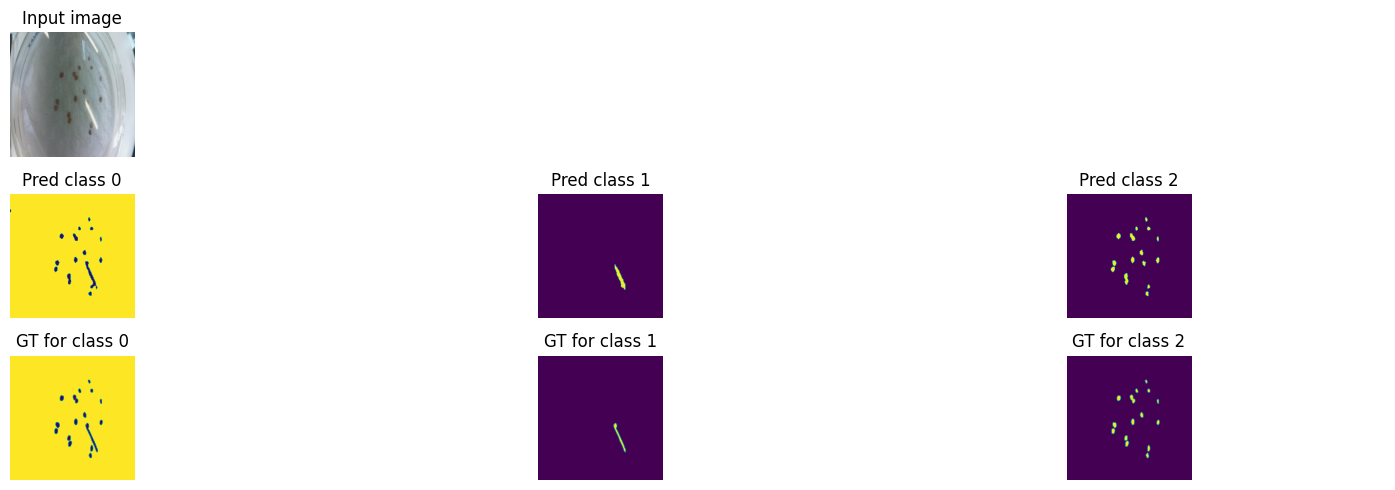

Train loss: 0.00245 | Time: 21m 23s | Val loss: 0.00173
Train_DICE_avg: 0.75874 | Train_Jaccard_avg: 0.69162 | Train_Sensitivity_avg: 0.92438 | Train_Specificity_avg: 0.91801 
Class 0 - Train_DICE: 0.99148 | Train_Jaccard: 0.98313 | Train_Sensitivity: 0.99520 | Train_Specificity: 0.77498 
Class 1 - Train_DICE: 0.50538 | Train_Jaccard: 0.43662 | Train_Sensitivity: 0.86347 | Train_Specificity: 0.99020 
Class 2 - Train_DICE: 0.77936 | Train_Jaccard: 0.65512 | Train_Sensitivity: 0.91448 | Train_Specificity: 0.98886 
Val_DICE_avg: 0.82032 | Val_Jaccard_avg: 0.74915 | Val_Sensitivity_avg: 0.95086 | Val_Specificity_avg: 0.86422 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98412 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.61248 
Class 1 - Val_DICE: 0.71532 | Val_Jaccard: 0.64516 | Val_Sensitivity: 0.88753 | Val_Specificity: 0.99477 
Class 2 - Val_DICE: 0.75365 | Val_Jaccard: 0.61816 | Val_Sensitivity: 0.96572 | Val_Specificity: 0.98541 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Train loss: 0.00241 | Time: 21m 51s | Val loss: 0.00173
Train_DICE_avg: 0.76457 | Train_Jaccard_avg: 0.69731 | Train_Sensitivity_avg: 0.93055 | Train_Specificity_avg: 0.91745 
Class 0 - Train_DICE: 0.99147 | Train_Jaccard: 0.98312 | Train_Sensitivity: 0.99518 | Train_Specificity: 0.77344 
Class 1 - Train_DICE: 0.51946 | Train_Jaccard: 0.44956 | Train_Sensitivity: 0.87791 | Train_Specificity: 0.99000 
Class 2 - Train_DICE: 0.78277 | Train_Jaccard: 0.65925 | Train_Sensitivity: 0.91856 | Train_Specificity: 0.98891 
Val_DICE_avg: 0.81912 | Val_Jaccard_avg: 0.74847 | Val_Sensitivity_avg: 0.95366 | Val_Specificity_avg: 0.86698 
Class 0 - Val_DICE: 0.99210 | Val_Jaccard: 0.98437 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.62062 
Class 1 - Val_DICE: 0.71331 | Val_Jaccard: 0.64416 | Val_Sensitivity: 0.89807 | Val_Specificity: 0.99468 
Class 2 - Val_DICE: 0.75195 | Val_Jaccard: 0.61689 | Val_Sensitivity: 0.96358 | Val_Specificity: 0.98564 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Train loss: 0.00239 | Time: 22m 19s | Val loss: 0.00172
Train_DICE_avg: 0.75877 | Train_Jaccard_avg: 0.69160 | Train_Sensitivity_avg: 0.92825 | Train_Specificity_avg: 0.91588 
Class 0 - Train_DICE: 0.99151 | Train_Jaccard: 0.98319 | Train_Sensitivity: 0.99534 | Train_Specificity: 0.76917 
Class 1 - Train_DICE: 0.50304 | Train_Jaccard: 0.43416 | Train_Sensitivity: 0.87062 | Train_Specificity: 0.98978 
Class 2 - Train_DICE: 0.78176 | Train_Jaccard: 0.65744 | Train_Sensitivity: 0.91879 | Train_Specificity: 0.98871 
Val_DICE_avg: 0.81706 | Val_Jaccard_avg: 0.74579 | Val_Sensitivity_avg: 0.95676 | Val_Specificity_avg: 0.86692 
Class 0 - Val_DICE: 0.99220 | Val_Jaccard: 0.98457 | Val_Sensitivity: 0.99929 | Val_Specificity: 0.62121 
Class 1 - Val_DICE: 0.71829 | Val_Jaccard: 0.64954 | Val_Sensitivity: 0.90145 | Val_Specificity: 0.99458 
Class 2 - Val_DICE: 0.74069 | Val_Jaccard: 0.60327 | Val_Sensitivity: 0.96954 | Val_Specificity: 0.98497 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.00240 | Time: 22m 47s | Val loss: 0.00171
Train_DICE_avg: 0.76087 | Train_Jaccard_avg: 0.69361 | Train_Sensitivity_avg: 0.92402 | Train_Specificity_avg: 0.91789 
Class 0 - Train_DICE: 0.99155 | Train_Jaccard: 0.98328 | Train_Sensitivity: 0.99532 | Train_Specificity: 0.77482 
Class 1 - Train_DICE: 0.50562 | Train_Jaccard: 0.43540 | Train_Sensitivity: 0.85676 | Train_Specificity: 0.98997 
Class 2 - Train_DICE: 0.78543 | Train_Jaccard: 0.66214 | Train_Sensitivity: 0.91998 | Train_Specificity: 0.98888 
Val_DICE_avg: 0.82220 | Val_Jaccard_avg: 0.75220 | Val_Sensitivity_avg: 0.95488 | Val_Specificity_avg: 0.86506 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98412 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.61470 
Class 1 - Val_DICE: 0.71513 | Val_Jaccard: 0.64648 | Val_Sensitivity: 0.90153 | Val_Specificity: 0.99460 
Class 2 - Val_DICE: 0.75950 | Val_Jaccard: 0.62598 | Val_Sensitivity: 0.96378 | Val_Specificity: 0.98589 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


Train loss: 0.00240 | Time: 23m 16s | Val loss: 0.00172
Train_DICE_avg: 0.75807 | Train_Jaccard_avg: 0.69083 | Train_Sensitivity_avg: 0.92723 | Train_Specificity_avg: 0.91607 
Class 0 - Train_DICE: 0.99150 | Train_Jaccard: 0.98318 | Train_Sensitivity: 0.99533 | Train_Specificity: 0.76963 
Class 1 - Train_DICE: 0.49997 | Train_Jaccard: 0.43079 | Train_Sensitivity: 0.87035 | Train_Specificity: 0.98986 
Class 2 - Train_DICE: 0.78274 | Train_Jaccard: 0.65852 | Train_Sensitivity: 0.91600 | Train_Specificity: 0.98874 
Val_DICE_avg: 0.82329 | Val_Jaccard_avg: 0.75245 | Val_Sensitivity_avg: 0.95547 | Val_Specificity_avg: 0.86542 
Class 0 - Val_DICE: 0.99202 | Val_Jaccard: 0.98421 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.61597 
Class 1 - Val_DICE: 0.72421 | Val_Jaccard: 0.65452 | Val_Sensitivity: 0.89971 | Val_Specificity: 0.99470 
Class 2 - Val_DICE: 0.75363 | Val_Jaccard: 0.61863 | Val_Sensitivity: 0.96738 | Val_Specificity: 0.98557 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


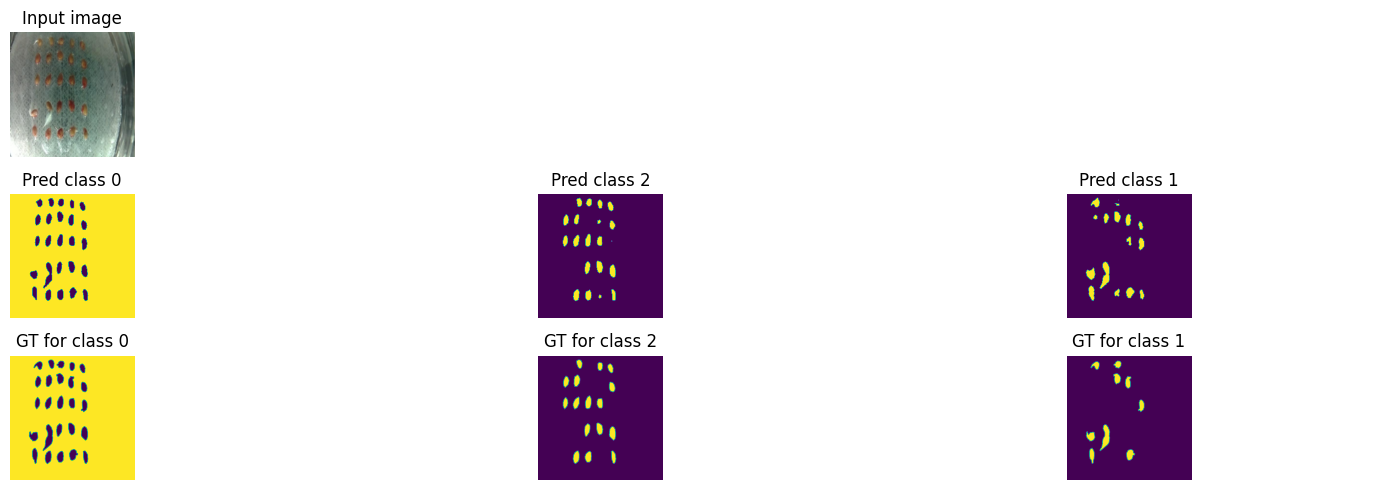

Train loss: 0.00235 | Time: 23m 44s | Val loss: 0.00170
Train_DICE_avg: 0.76024 | Train_Jaccard_avg: 0.69291 | Train_Sensitivity_avg: 0.92669 | Train_Specificity_avg: 0.91560 
Class 0 - Train_DICE: 0.99164 | Train_Jaccard: 0.98344 | Train_Sensitivity: 0.99547 | Train_Specificity: 0.76805 
Class 1 - Train_DICE: 0.50768 | Train_Jaccard: 0.43791 | Train_Sensitivity: 0.86261 | Train_Specificity: 0.99000 
Class 2 - Train_DICE: 0.78139 | Train_Jaccard: 0.65738 | Train_Sensitivity: 0.92200 | Train_Specificity: 0.98877 
Val_DICE_avg: 0.81937 | Val_Jaccard_avg: 0.74821 | Val_Sensitivity_avg: 0.95458 | Val_Specificity_avg: 0.86717 
Class 0 - Val_DICE: 0.99225 | Val_Jaccard: 0.98467 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.62168 
Class 1 - Val_DICE: 0.71713 | Val_Jaccard: 0.64766 | Val_Sensitivity: 0.89813 | Val_Specificity: 0.99463 
Class 2 - Val_DICE: 0.74873 | Val_Jaccard: 0.61229 | Val_Sensitivity: 0.96631 | Val_Specificity: 0.98521 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


Train loss: 0.00235 | Time: 24m 12s | Val loss: 0.00172
Train_DICE_avg: 0.76519 | Train_Jaccard_avg: 0.69766 | Train_Sensitivity_avg: 0.92739 | Train_Specificity_avg: 0.91793 
Class 0 - Train_DICE: 0.99158 | Train_Jaccard: 0.98333 | Train_Sensitivity: 0.99551 | Train_Specificity: 0.77482 
Class 1 - Train_DICE: 0.51556 | Train_Jaccard: 0.44456 | Train_Sensitivity: 0.86820 | Train_Specificity: 0.99007 
Class 2 - Train_DICE: 0.78844 | Train_Jaccard: 0.66509 | Train_Sensitivity: 0.91847 | Train_Specificity: 0.98892 
Val_DICE_avg: 0.82307 | Val_Jaccard_avg: 0.75207 | Val_Sensitivity_avg: 0.95494 | Val_Specificity_avg: 0.86461 
Class 0 - Val_DICE: 0.99196 | Val_Jaccard: 0.98408 | Val_Sensitivity: 0.99934 | Val_Specificity: 0.61352 
Class 1 - Val_DICE: 0.72527 | Val_Jaccard: 0.65541 | Val_Sensitivity: 0.89717 | Val_Specificity: 0.99490 
Class 2 - Val_DICE: 0.75198 | Val_Jaccard: 0.61672 | Val_Sensitivity: 0.96830 | Val_Specificity: 0.98541 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


Train loss: 0.00234 | Time: 24m 41s | Val loss: 0.00170
Train_DICE_avg: 0.76617 | Train_Jaccard_avg: 0.69901 | Train_Sensitivity_avg: 0.93001 | Train_Specificity_avg: 0.91888 
Class 0 - Train_DICE: 0.99168 | Train_Jaccard: 0.98352 | Train_Sensitivity: 0.99539 | Train_Specificity: 0.77764 
Class 1 - Train_DICE: 0.52083 | Train_Jaccard: 0.45053 | Train_Sensitivity: 0.87495 | Train_Specificity: 0.99016 
Class 2 - Train_DICE: 0.78601 | Train_Jaccard: 0.66299 | Train_Sensitivity: 0.91968 | Train_Specificity: 0.98884 
Val_DICE_avg: 0.82415 | Val_Jaccard_avg: 0.75339 | Val_Sensitivity_avg: 0.95624 | Val_Specificity_avg: 0.86504 
Class 0 - Val_DICE: 0.99194 | Val_Jaccard: 0.98404 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.61468 
Class 1 - Val_DICE: 0.72342 | Val_Jaccard: 0.65319 | Val_Sensitivity: 0.90276 | Val_Specificity: 0.99473 
Class 2 - Val_DICE: 0.75709 | Val_Jaccard: 0.62295 | Val_Sensitivity: 0.96664 | Val_Specificity: 0.98572 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


Train loss: 0.00235 | Time: 25m 9s | Val loss: 0.00170
Train_DICE_avg: 0.76556 | Train_Jaccard_avg: 0.69837 | Train_Sensitivity_avg: 0.92778 | Train_Specificity_avg: 0.91849 
Class 0 - Train_DICE: 0.99160 | Train_Jaccard: 0.98338 | Train_Sensitivity: 0.99541 | Train_Specificity: 0.77635 
Class 1 - Train_DICE: 0.51719 | Train_Jaccard: 0.44603 | Train_Sensitivity: 0.87013 | Train_Specificity: 0.99009 
Class 2 - Train_DICE: 0.78789 | Train_Jaccard: 0.66571 | Train_Sensitivity: 0.91780 | Train_Specificity: 0.98902 
Val_DICE_avg: 0.82539 | Val_Jaccard_avg: 0.75397 | Val_Sensitivity_avg: 0.95492 | Val_Specificity_avg: 0.86537 
Class 0 - Val_DICE: 0.99207 | Val_Jaccard: 0.98431 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.61587 
Class 1 - Val_DICE: 0.73239 | Val_Jaccard: 0.66143 | Val_Sensitivity: 0.89605 | Val_Specificity: 0.99491 
Class 2 - Val_DICE: 0.75170 | Val_Jaccard: 0.61618 | Val_Sensitivity: 0.96937 | Val_Specificity: 0.98533 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


Train loss: 0.00235 | Time: 25m 36s | Val loss: 0.00169
Train_DICE_avg: 0.76166 | Train_Jaccard_avg: 0.69437 | Train_Sensitivity_avg: 0.92825 | Train_Specificity_avg: 0.91754 
Class 0 - Train_DICE: 0.99161 | Train_Jaccard: 0.98340 | Train_Sensitivity: 0.99544 | Train_Specificity: 0.77400 
Class 1 - Train_DICE: 0.50657 | Train_Jaccard: 0.43641 | Train_Sensitivity: 0.86938 | Train_Specificity: 0.98991 
Class 2 - Train_DICE: 0.78680 | Train_Jaccard: 0.66332 | Train_Sensitivity: 0.91993 | Train_Specificity: 0.98872 
Val_DICE_avg: 0.82588 | Val_Jaccard_avg: 0.75586 | Val_Sensitivity_avg: 0.95789 | Val_Specificity_avg: 0.86414 
Class 0 - Val_DICE: 0.99189 | Val_Jaccard: 0.98395 | Val_Sensitivity: 0.99932 | Val_Specificity: 0.61170 
Class 1 - Val_DICE: 0.72036 | Val_Jaccard: 0.65085 | Val_Sensitivity: 0.91150 | Val_Specificity: 0.99458 
Class 2 - Val_DICE: 0.76541 | Val_Jaccard: 0.63276 | Val_Sensitivity: 0.96286 | Val_Specificity: 0.98613 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


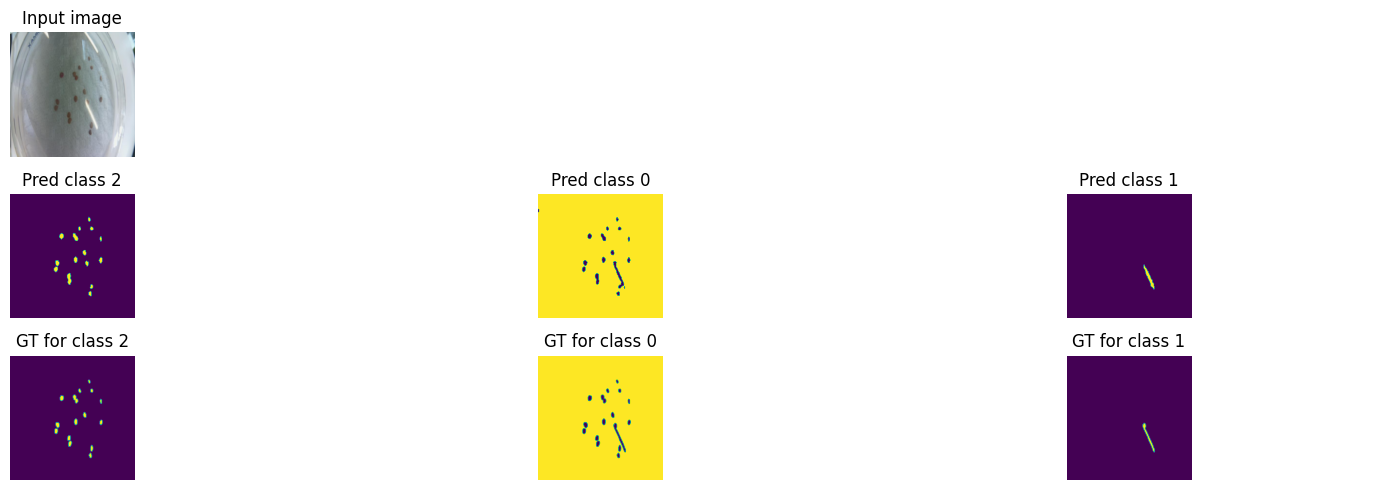

Train loss: 0.00232 | Time: 26m 4s | Val loss: 0.00170
Train_DICE_avg: 0.76519 | Train_Jaccard_avg: 0.69804 | Train_Sensitivity_avg: 0.92888 | Train_Specificity_avg: 0.91682 
Class 0 - Train_DICE: 0.99162 | Train_Jaccard: 0.98342 | Train_Sensitivity: 0.99558 | Train_Specificity: 0.77159 
Class 1 - Train_DICE: 0.51711 | Train_Jaccard: 0.44647 | Train_Sensitivity: 0.86968 | Train_Specificity: 0.99001 
Class 2 - Train_DICE: 0.78684 | Train_Jaccard: 0.66423 | Train_Sensitivity: 0.92140 | Train_Specificity: 0.98886 
Val_DICE_avg: 0.82032 | Val_Jaccard_avg: 0.74965 | Val_Sensitivity_avg: 0.96034 | Val_Specificity_avg: 0.86702 
Class 0 - Val_DICE: 0.99221 | Val_Jaccard: 0.98459 | Val_Sensitivity: 0.99928 | Val_Specificity: 0.62112 
Class 1 - Val_DICE: 0.71356 | Val_Jaccard: 0.64466 | Val_Sensitivity: 0.91680 | Val_Specificity: 0.99441 
Class 2 - Val_DICE: 0.75518 | Val_Jaccard: 0.61969 | Val_Sensitivity: 0.96495 | Val_Specificity: 0.98552 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


Train loss: 0.00232 | Time: 26m 32s | Val loss: 0.00169
Train_DICE_avg: 0.76614 | Train_Jaccard_avg: 0.69873 | Train_Sensitivity_avg: 0.92917 | Train_Specificity_avg: 0.91846 
Class 0 - Train_DICE: 0.99169 | Train_Jaccard: 0.98355 | Train_Sensitivity: 0.99551 | Train_Specificity: 0.77626 
Class 1 - Train_DICE: 0.51936 | Train_Jaccard: 0.44815 | Train_Sensitivity: 0.87221 | Train_Specificity: 0.99016 
Class 2 - Train_DICE: 0.78737 | Train_Jaccard: 0.66449 | Train_Sensitivity: 0.91979 | Train_Specificity: 0.98896 
Val_DICE_avg: 0.82398 | Val_Jaccard_avg: 0.75353 | Val_Sensitivity_avg: 0.95616 | Val_Specificity_avg: 0.86562 
Class 0 - Val_DICE: 0.99212 | Val_Jaccard: 0.98440 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.61661 
Class 1 - Val_DICE: 0.72128 | Val_Jaccard: 0.65243 | Val_Sensitivity: 0.90489 | Val_Specificity: 0.99464 
Class 2 - Val_DICE: 0.75853 | Val_Jaccard: 0.62374 | Val_Sensitivity: 0.96428 | Val_Specificity: 0.98563 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


Train loss: 0.00234 | Time: 27m 0s | Val loss: 0.00168
Train_DICE_avg: 0.76572 | Train_Jaccard_avg: 0.69798 | Train_Sensitivity_avg: 0.93129 | Train_Specificity_avg: 0.91838 
Class 0 - Train_DICE: 0.99168 | Train_Jaccard: 0.98353 | Train_Sensitivity: 0.99547 | Train_Specificity: 0.77661 
Class 1 - Train_DICE: 0.52026 | Train_Jaccard: 0.44877 | Train_Sensitivity: 0.87823 | Train_Specificity: 0.98979 
Class 2 - Train_DICE: 0.78522 | Train_Jaccard: 0.66164 | Train_Sensitivity: 0.92017 | Train_Specificity: 0.98874 
Val_DICE_avg: 0.82397 | Val_Jaccard_avg: 0.75247 | Val_Sensitivity_avg: 0.95891 | Val_Specificity_avg: 0.86505 
Class 0 - Val_DICE: 0.99210 | Val_Jaccard: 0.98436 | Val_Sensitivity: 0.99931 | Val_Specificity: 0.61515 
Class 1 - Val_DICE: 0.72871 | Val_Jaccard: 0.65751 | Val_Sensitivity: 0.90816 | Val_Specificity: 0.99468 
Class 2 - Val_DICE: 0.75110 | Val_Jaccard: 0.61555 | Val_Sensitivity: 0.96925 | Val_Specificity: 0.98532 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


Train loss: 0.00233 | Time: 27m 27s | Val loss: 0.00168
Train_DICE_avg: 0.76432 | Train_Jaccard_avg: 0.69674 | Train_Sensitivity_avg: 0.92826 | Train_Specificity_avg: 0.91862 
Class 0 - Train_DICE: 0.99166 | Train_Jaccard: 0.98348 | Train_Sensitivity: 0.99544 | Train_Specificity: 0.77674 
Class 1 - Train_DICE: 0.51462 | Train_Jaccard: 0.44293 | Train_Sensitivity: 0.86869 | Train_Specificity: 0.99024 
Class 2 - Train_DICE: 0.78668 | Train_Jaccard: 0.66381 | Train_Sensitivity: 0.92065 | Train_Specificity: 0.98888 
Val_DICE_avg: 0.82443 | Val_Jaccard_avg: 0.75336 | Val_Sensitivity_avg: 0.95666 | Val_Specificity_avg: 0.86689 
Class 0 - Val_DICE: 0.99214 | Val_Jaccard: 0.98445 | Val_Sensitivity: 0.99930 | Val_Specificity: 0.62042 
Class 1 - Val_DICE: 0.72713 | Val_Jaccard: 0.65697 | Val_Sensitivity: 0.90353 | Val_Specificity: 0.99473 
Class 2 - Val_DICE: 0.75402 | Val_Jaccard: 0.61867 | Val_Sensitivity: 0.96717 | Val_Specificity: 0.98550 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


Train loss: 0.00234 | Time: 27m 54s | Val loss: 0.00171
Train_DICE_avg: 0.76478 | Train_Jaccard_avg: 0.69763 | Train_Sensitivity_avg: 0.92928 | Train_Specificity_avg: 0.91771 
Class 0 - Train_DICE: 0.99170 | Train_Jaccard: 0.98356 | Train_Sensitivity: 0.99545 | Train_Specificity: 0.77417 
Class 1 - Train_DICE: 0.51645 | Train_Jaccard: 0.44587 | Train_Sensitivity: 0.87174 | Train_Specificity: 0.98999 
Class 2 - Train_DICE: 0.78620 | Train_Jaccard: 0.66347 | Train_Sensitivity: 0.92066 | Train_Specificity: 0.98896 
Val_DICE_avg: 0.82624 | Val_Jaccard_avg: 0.75484 | Val_Sensitivity_avg: 0.95391 | Val_Specificity_avg: 0.86441 
Class 0 - Val_DICE: 0.99197 | Val_Jaccard: 0.98410 | Val_Sensitivity: 0.99935 | Val_Specificity: 0.61292 
Class 1 - Val_DICE: 0.73425 | Val_Jaccard: 0.66343 | Val_Sensitivity: 0.89274 | Val_Specificity: 0.99503 
Class 2 - Val_DICE: 0.75251 | Val_Jaccard: 0.61699 | Val_Sensitivity: 0.96965 | Val_Specificity: 0.98529 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


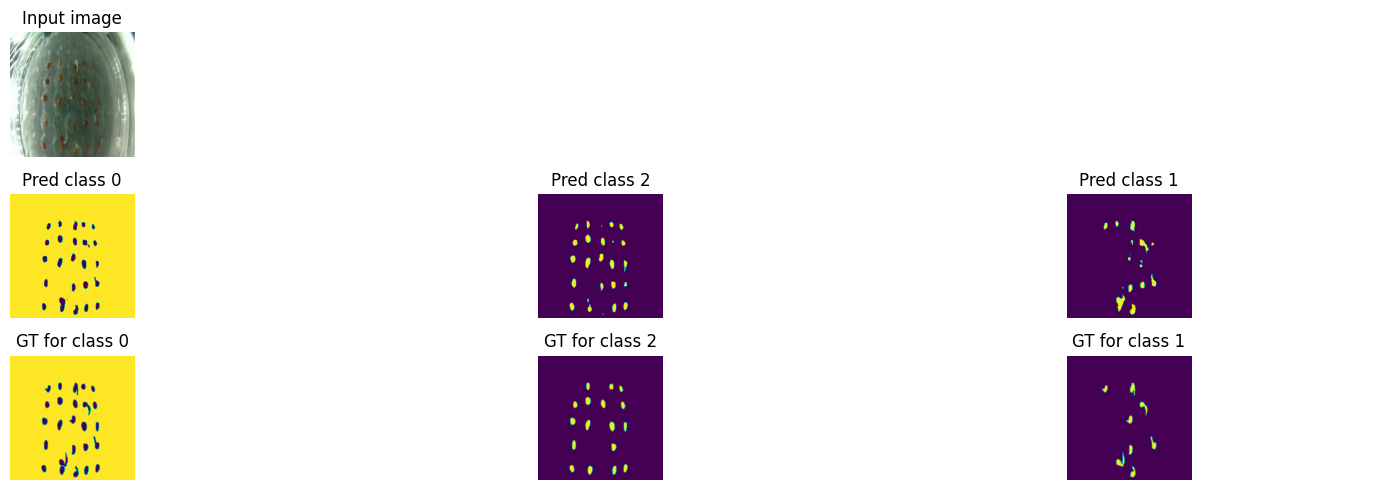

Train loss: 0.00231 | Time: 28m 22s | Val loss: 0.00169
Train_DICE_avg: 0.76218 | Train_Jaccard_avg: 0.69474 | Train_Sensitivity_avg: 0.92811 | Train_Specificity_avg: 0.91722 
Class 0 - Train_DICE: 0.99168 | Train_Jaccard: 0.98352 | Train_Sensitivity: 0.99559 | Train_Specificity: 0.77273 
Class 1 - Train_DICE: 0.50825 | Train_Jaccard: 0.43731 | Train_Sensitivity: 0.86742 | Train_Specificity: 0.98999 
Class 2 - Train_DICE: 0.78662 | Train_Jaccard: 0.66341 | Train_Sensitivity: 0.92133 | Train_Specificity: 0.98894 
Val_DICE_avg: 0.82581 | Val_Jaccard_avg: 0.75505 | Val_Sensitivity_avg: 0.95711 | Val_Specificity_avg: 0.86511 
Class 0 - Val_DICE: 0.99203 | Val_Jaccard: 0.98422 | Val_Sensitivity: 0.99933 | Val_Specificity: 0.61491 
Class 1 - Val_DICE: 0.72801 | Val_Jaccard: 0.65782 | Val_Sensitivity: 0.90400 | Val_Specificity: 0.99486 
Class 2 - Val_DICE: 0.75737 | Val_Jaccard: 0.62311 | Val_Sensitivity: 0.96801 | Val_Specificity: 0.98557 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████████
wandb:       Training Jaccard ▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████████
wandb:          Training Loss █▆▅▅▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▄██▇▆▄▄▂▁▂▁▂▂▂▃▂▂▂▂▂▂▂▃▃▃▃▃▃▄▃▃▄▃▄▄▄▄▄▄▄
wandb:   Training Specificity ▁▃▄▅▅▆▆▆▇▆▇▇▇▇▇▇▇▇▇█████████████████████
wandb:        Validation DICE ▁▁▂▃▄▆▆▆▇▇▇▇▇▇▇█▇▇▇▇▇███████████████████
wandb:     Validation Jaccard ▁▂▃▄▅▆▆▆▇▇▇▇▇▇▇▇▇█▇▇▇▇██████████████████
wandb:        Validation Loss █▆▃▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ███▇▇▄▅▁▅▄▅▆▅▅▅▄▆▅▅▅▄▆▆▆▅▅▅▆▆▆▅▆▆▆▆▆▇▆▆▆
wandb: Validation Specificity █▆▄▂▁▁▂▁▁▁▂▁▂▁▁▂▁▂▂▂▁▁▁▁▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.76218
wandb:       Training Jaccard 0.69474
wandb:          Training Loss 0.00


Training complete!


In [37]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [38]:
model = DeepLabV3Plus(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [39]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]



Global Performance Metrics:
Loss mean: 0.00170, std: 0.00024
Dice Coefficient mean: 0.83972, std: 0.11008
Jaccard Index mean: 0.77503, std: 0.12334
Sensitivity mean: 0.90893, std: 0.09031
Specificity mean: 0.92950, std: 0.04638

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99534, std: 0.00237
Jaccard mean: 0.99074, std: 0.00467
Sensitivity mean: 0.99746, std: 0.00205
Specificity mean: 0.79891, std: 0.13893

Class 1:
Dice mean: 0.67873, std: 0.30798
Jaccard mean: 0.59197, std: 0.32144
Sensitivity mean: 0.83499, std: 0.24470
Specificity mean: 0.99501, std: 0.00815

Class 2:
Dice mean: 0.84509, std: 0.09416
Jaccard mean: 0.74237, std: 0.12917
Sensitivity mean: 0.89433, std: 0.09518
Specificity mean: 0.99457, std: 0.00312


### Tversky Loss

In [ ]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Backbone"] = "mobilenetv3"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["YOUR_WANDB_API_KEY","MasterTests","Seeds-DeepLabV3+-MobileNetV3-Tversky"]

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.55 GB
GPU Memory - Reserved: 1.92 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


wandb: Tracking run with wandb version 0.21.0
wandb: Run data is saved locally in /kaggle/working/wandb/run-20251114_010125-oxt9rvif
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run Seeds-DeepLabV3+-MobileNetV3-Tversky
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/oxt9rvif



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


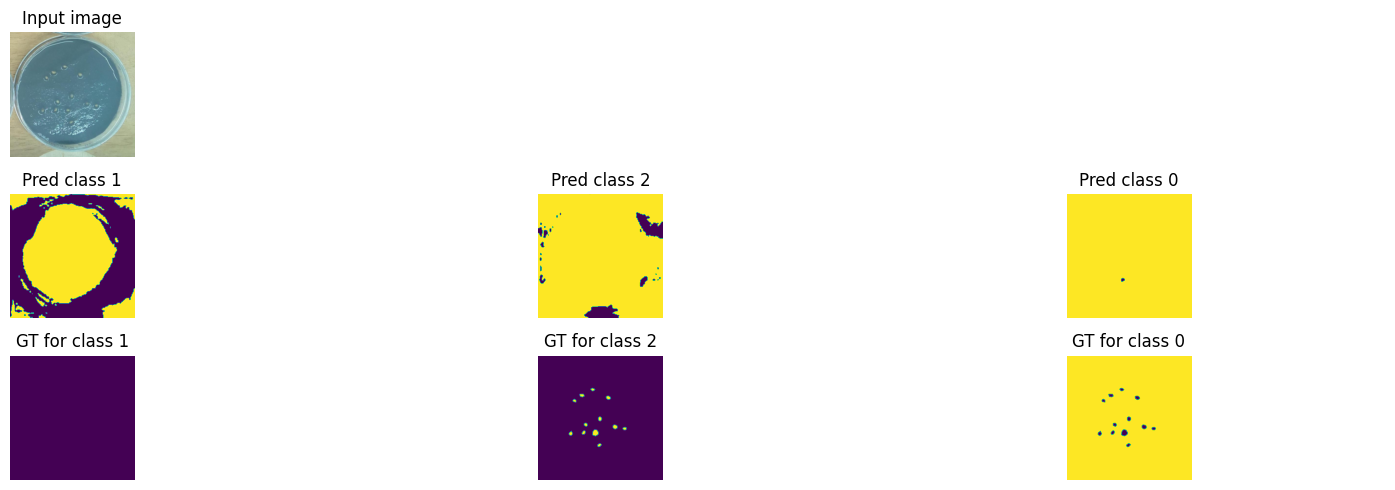

Train loss: 0.69362 | Time: 0m 27s | Val loss: 0.66428
Train_DICE_avg: 0.34542 | Train_Jaccard_avg: 0.28074 | Train_Sensitivity_avg: 0.35585 | Train_Specificity_avg: 0.71615 
Class 0 - Train_DICE: 0.83569 | Train_Jaccard: 0.73142 | Train_Sensitivity: 0.95516 | Train_Specificity: 0.15563 
Class 1 - Train_DICE: 0.03706 | Train_Jaccard: 0.01960 | Train_Sensitivity: 0.01981 | Train_Specificity: 0.99798 
Class 2 - Train_DICE: 0.16351 | Train_Jaccard: 0.09120 | Train_Sensitivity: 0.09257 | Train_Specificity: 0.99484 
Val_DICE_avg: 0.38485 | Val_Jaccard_avg: 0.34499 | Val_Sensitivity_avg: 0.35729 | Val_Specificity_avg: 0.81540 
Class 0 - Val_DICE: 0.96224 | Val_Jaccard: 0.92864 | Val_Sensitivity: 0.96543 | Val_Specificity: 0.44696 
Class 1 - Val_DICE: 0.03920 | Val_Jaccard: 0.02107 | Val_Sensitivity: 0.02109 | Val_Specificity: 0.99981 
Class 2 - Val_DICE: 0.15310 | Val_Jaccard: 0.08525 | Val_Sensitivity: 0.08536 | Val_Specificity: 0.99941 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


Train loss: 0.64005 | Time: 0m 54s | Val loss: 0.59409
Train_DICE_avg: 0.41894 | Train_Jaccard_avg: 0.36159 | Train_Sensitivity_avg: 0.39523 | Train_Specificity_avg: 0.76017 
Class 0 - Train_DICE: 0.93172 | Train_Jaccard: 0.87472 | Train_Sensitivity: 0.95194 | Train_Specificity: 0.28561 
Class 1 - Train_DICE: 0.04641 | Train_Jaccard: 0.02498 | Train_Sensitivity: 0.02526 | Train_Specificity: 0.99925 
Class 2 - Train_DICE: 0.27868 | Train_Jaccard: 0.18505 | Train_Sensitivity: 0.20848 | Train_Specificity: 0.99566 
Val_DICE_avg: 0.46645 | Val_Jaccard_avg: 0.41139 | Val_Sensitivity_avg: 0.51881 | Val_Specificity_avg: 0.87770 
Class 0 - Val_DICE: 0.97368 | Val_Jaccard: 0.94935 | Val_Sensitivity: 0.96299 | Val_Specificity: 0.65749 
Class 1 - Val_DICE: 0.07846 | Val_Jaccard: 0.04467 | Val_Sensitivity: 0.05585 | Val_Specificity: 0.99584 
Class 2 - Val_DICE: 0.34721 | Val_Jaccard: 0.24016 | Val_Sensitivity: 0.53758 | Val_Specificity: 0.97977 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


Train loss: 0.55930 | Time: 1m 22s | Val loss: 0.56941
Train_DICE_avg: 0.51408 | Train_Jaccard_avg: 0.45146 | Train_Sensitivity_avg: 0.50364 | Train_Specificity_avg: 0.82060 
Class 0 - Train_DICE: 0.95531 | Train_Jaccard: 0.91573 | Train_Sensitivity: 0.97412 | Train_Specificity: 0.47074 
Class 1 - Train_DICE: 0.08479 | Train_Jaccard: 0.04862 | Train_Sensitivity: 0.05150 | Train_Specificity: 0.99860 
Class 2 - Train_DICE: 0.50213 | Train_Jaccard: 0.39004 | Train_Sensitivity: 0.48529 | Train_Specificity: 0.99247 
Val_DICE_avg: 0.44903 | Val_Jaccard_avg: 0.40171 | Val_Sensitivity_avg: 0.57830 | Val_Specificity_avg: 0.93957 
Class 0 - Val_DICE: 0.98359 | Val_Jaccard: 0.96796 | Val_Sensitivity: 0.97267 | Val_Specificity: 0.85351 
Class 1 - Val_DICE: 0.07199 | Val_Jaccard: 0.04082 | Val_Sensitivity: 0.10592 | Val_Specificity: 0.99360 
Class 2 - Val_DICE: 0.29150 | Val_Jaccard: 0.19635 | Val_Sensitivity: 0.65632 | Val_Specificity: 0.97161 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


Train loss: 0.49703 | Time: 1m 49s | Val loss: 0.50791
Train_DICE_avg: 0.56460 | Train_Jaccard_avg: 0.50155 | Train_Sensitivity_avg: 0.56006 | Train_Specificity_avg: 0.87948 
Class 0 - Train_DICE: 0.97319 | Train_Jaccard: 0.94823 | Train_Sensitivity: 0.97726 | Train_Specificity: 0.64955 
Class 1 - Train_DICE: 0.13135 | Train_Jaccard: 0.07985 | Train_Sensitivity: 0.09398 | Train_Specificity: 0.99753 
Class 2 - Train_DICE: 0.58925 | Train_Jaccard: 0.47657 | Train_Sensitivity: 0.60894 | Train_Specificity: 0.99136 
Val_DICE_avg: 0.51040 | Val_Jaccard_avg: 0.45303 | Val_Sensitivity_avg: 0.60343 | Val_Specificity_avg: 0.96598 
Class 0 - Val_DICE: 0.98681 | Val_Jaccard: 0.97411 | Val_Sensitivity: 0.97663 | Val_Specificity: 0.92239 
Class 1 - Val_DICE: 0.10659 | Val_Jaccard: 0.06432 | Val_Sensitivity: 0.15371 | Val_Specificity: 0.99417 
Class 2 - Val_DICE: 0.43780 | Val_Jaccard: 0.32067 | Val_Sensitivity: 0.67996 | Val_Specificity: 0.98139 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]


Train loss: 0.45711 | Time: 2m 16s | Val loss: 0.45990
Train_DICE_avg: 0.59342 | Train_Jaccard_avg: 0.52837 | Train_Sensitivity_avg: 0.59661 | Train_Specificity_avg: 0.90803 
Class 0 - Train_DICE: 0.97850 | Train_Jaccard: 0.95822 | Train_Sensitivity: 0.97577 | Train_Specificity: 0.73610 
Class 1 - Train_DICE: 0.17389 | Train_Jaccard: 0.11147 | Train_Sensitivity: 0.15313 | Train_Specificity: 0.99678 
Class 2 - Train_DICE: 0.62788 | Train_Jaccard: 0.51543 | Train_Sensitivity: 0.66094 | Train_Specificity: 0.99122 
Val_DICE_avg: 0.55944 | Val_Jaccard_avg: 0.49980 | Val_Sensitivity_avg: 0.62100 | Val_Specificity_avg: 0.96221 
Class 0 - Val_DICE: 0.98982 | Val_Jaccard: 0.97994 | Val_Sensitivity: 0.98369 | Val_Specificity: 0.90485 
Class 1 - Val_DICE: 0.16438 | Val_Jaccard: 0.11005 | Val_Sensitivity: 0.19064 | Val_Specificity: 0.99559 
Class 2 - Val_DICE: 0.52413 | Val_Jaccard: 0.40941 | Val_Sensitivity: 0.68867 | Val_Specificity: 0.98618 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]


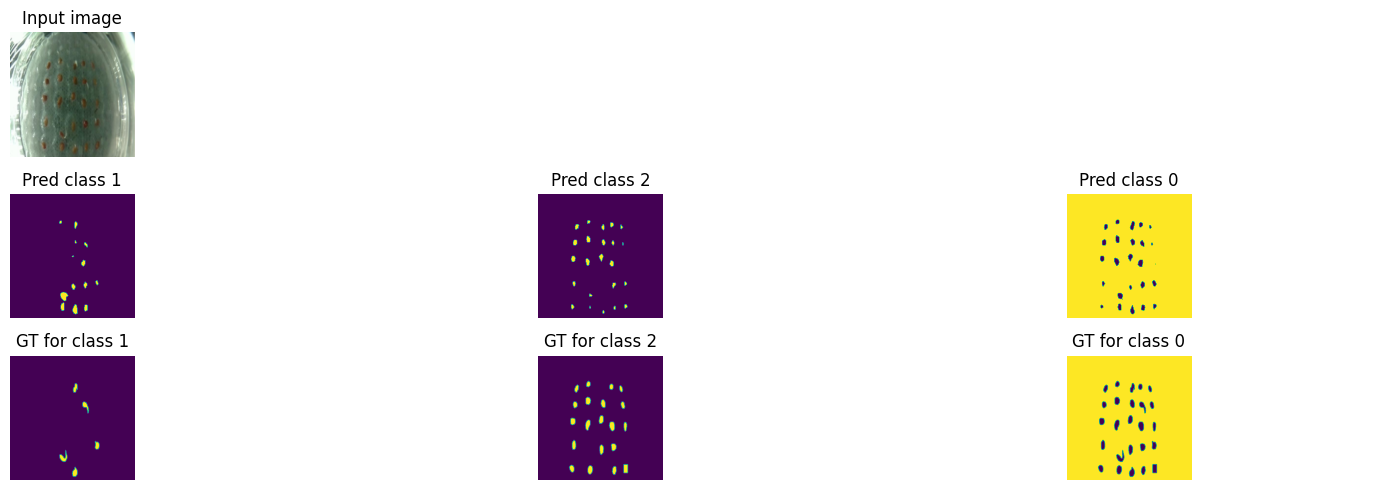

Train loss: 0.42908 | Time: 2m 43s | Val loss: 0.43101
Train_DICE_avg: 0.60999 | Train_Jaccard_avg: 0.54492 | Train_Sensitivity_avg: 0.62536 | Train_Specificity_avg: 0.91597 
Class 0 - Train_DICE: 0.98043 | Train_Jaccard: 0.96187 | Train_Sensitivity: 0.97694 | Train_Specificity: 0.76054 
Class 1 - Train_DICE: 0.20686 | Train_Jaccard: 0.14023 | Train_Sensitivity: 0.21584 | Train_Specificity: 0.99642 
Class 2 - Train_DICE: 0.64268 | Train_Jaccard: 0.53265 | Train_Sensitivity: 0.68332 | Train_Specificity: 0.99095 
Val_DICE_avg: 0.59019 | Val_Jaccard_avg: 0.53402 | Val_Sensitivity_avg: 0.62563 | Val_Specificity_avg: 0.95643 
Class 0 - Val_DICE: 0.99150 | Val_Jaccard: 0.98319 | Val_Sensitivity: 0.98857 | Val_Specificity: 0.88318 
Class 1 - Val_DICE: 0.19667 | Val_Jaccard: 0.13859 | Val_Sensitivity: 0.20798 | Val_Specificity: 0.99636 
Class 2 - Val_DICE: 0.58239 | Val_Jaccard: 0.48028 | Val_Sensitivity: 0.68035 | Val_Specificity: 0.98976 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]


Train loss: 0.41073 | Time: 3m 10s | Val loss: 0.41304
Train_DICE_avg: 0.62008 | Train_Jaccard_avg: 0.55489 | Train_Sensitivity_avg: 0.63973 | Train_Specificity_avg: 0.91787 
Class 0 - Train_DICE: 0.98118 | Train_Jaccard: 0.96331 | Train_Sensitivity: 0.97810 | Train_Specificity: 0.76552 
Class 1 - Train_DICE: 0.22889 | Train_Jaccard: 0.15909 | Train_Sensitivity: 0.24978 | Train_Specificity: 0.99636 
Class 2 - Train_DICE: 0.65017 | Train_Jaccard: 0.54226 | Train_Sensitivity: 0.69132 | Train_Specificity: 0.99172 
Val_DICE_avg: 0.60688 | Val_Jaccard_avg: 0.55216 | Val_Sensitivity_avg: 0.63683 | Val_Specificity_avg: 0.94859 
Class 0 - Val_DICE: 0.99189 | Val_Jaccard: 0.98394 | Val_Sensitivity: 0.99129 | Val_Specificity: 0.85750 
Class 1 - Val_DICE: 0.21800 | Val_Jaccard: 0.15738 | Val_Sensitivity: 0.23458 | Val_Specificity: 0.99663 
Class 2 - Val_DICE: 0.61076 | Val_Jaccard: 0.51516 | Val_Sensitivity: 0.68462 | Val_Specificity: 0.99162 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


Train loss: 0.39810 | Time: 3m 36s | Val loss: 0.40007
Train_DICE_avg: 0.62890 | Train_Jaccard_avg: 0.56318 | Train_Sensitivity_avg: 0.65208 | Train_Specificity_avg: 0.91817 
Class 0 - Train_DICE: 0.98182 | Train_Jaccard: 0.96451 | Train_Sensitivity: 0.97968 | Train_Specificity: 0.76665 
Class 1 - Train_DICE: 0.24497 | Train_Jaccard: 0.17214 | Train_Sensitivity: 0.27575 | Train_Specificity: 0.99617 
Class 2 - Train_DICE: 0.65990 | Train_Jaccard: 0.55289 | Train_Sensitivity: 0.70082 | Train_Specificity: 0.99168 
Val_DICE_avg: 0.62061 | Val_Jaccard_avg: 0.56582 | Val_Sensitivity_avg: 0.64918 | Val_Specificity_avg: 0.94383 
Class 0 - Val_DICE: 0.99256 | Val_Jaccard: 0.98527 | Val_Sensitivity: 0.99320 | Val_Specificity: 0.84224 
Class 1 - Val_DICE: 0.24911 | Val_Jaccard: 0.18473 | Val_Sensitivity: 0.26505 | Val_Specificity: 0.99701 
Class 2 - Val_DICE: 0.62014 | Val_Jaccard: 0.52745 | Val_Sensitivity: 0.68929 | Val_Specificity: 0.99223 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]


Train loss: 0.37851 | Time: 4m 3s | Val loss: 0.37031
Train_DICE_avg: 0.65119 | Train_Jaccard_avg: 0.58280 | Train_Sensitivity_avg: 0.67648 | Train_Specificity_avg: 0.91612 
Class 0 - Train_DICE: 0.98270 | Train_Jaccard: 0.96617 | Train_Sensitivity: 0.98137 | Train_Specificity: 0.76065 
Class 1 - Train_DICE: 0.27307 | Train_Jaccard: 0.19547 | Train_Sensitivity: 0.30829 | Train_Specificity: 0.99610 
Class 2 - Train_DICE: 0.69780 | Train_Jaccard: 0.58675 | Train_Sensitivity: 0.73979 | Train_Specificity: 0.99161 
Val_DICE_avg: 0.65184 | Val_Jaccard_avg: 0.59330 | Val_Sensitivity_avg: 0.67542 | Val_Specificity_avg: 0.92762 
Class 0 - Val_DICE: 0.99242 | Val_Jaccard: 0.98499 | Val_Sensitivity: 0.99434 | Val_Specificity: 0.79303 
Class 1 - Val_DICE: 0.26505 | Val_Jaccard: 0.19530 | Val_Sensitivity: 0.27958 | Val_Specificity: 0.99707 
Class 2 - Val_DICE: 0.69804 | Val_Jaccard: 0.59960 | Val_Sensitivity: 0.75234 | Val_Specificity: 0.99277 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 7/7 [00:01<00:00,  3.50it/s]


Train loss: 0.36594 | Time: 4m 28s | Val loss: 0.36203
Train_DICE_avg: 0.66107 | Train_Jaccard_avg: 0.59110 | Train_Sensitivity_avg: 0.68946 | Train_Specificity_avg: 0.91583 
Class 0 - Train_DICE: 0.98347 | Train_Jaccard: 0.96766 | Train_Sensitivity: 0.98290 | Train_Specificity: 0.75951 
Class 1 - Train_DICE: 0.29238 | Train_Jaccard: 0.20925 | Train_Sensitivity: 0.33504 | Train_Specificity: 0.99596 
Class 2 - Train_DICE: 0.70736 | Train_Jaccard: 0.59641 | Train_Sensitivity: 0.75045 | Train_Specificity: 0.99203 
Val_DICE_avg: 0.66638 | Val_Jaccard_avg: 0.60752 | Val_Sensitivity_avg: 0.68129 | Val_Specificity_avg: 0.92277 
Class 0 - Val_DICE: 0.99196 | Val_Jaccard: 0.98409 | Val_Sensitivity: 0.99494 | Val_Specificity: 0.77767 
Class 1 - Val_DICE: 0.29978 | Val_Jaccard: 0.22573 | Val_Sensitivity: 0.29425 | Val_Specificity: 0.99707 
Class 2 - Val_DICE: 0.70740 | Val_Jaccard: 0.61276 | Val_Sensitivity: 0.75469 | Val_Specificity: 0.99357 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]


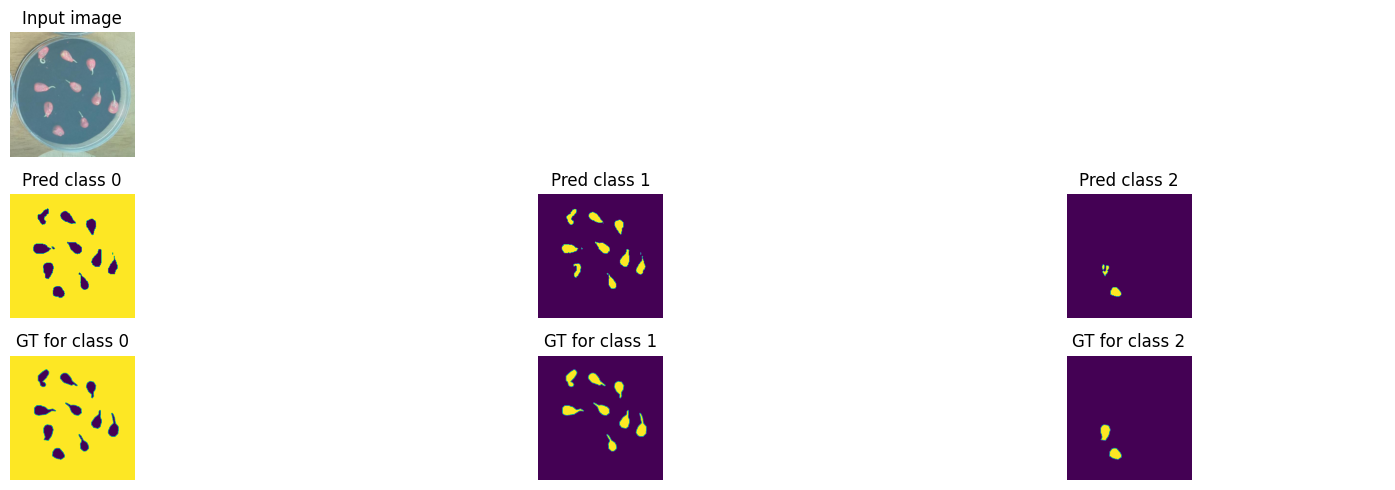

Train loss: 0.35201 | Time: 4m 56s | Val loss: 0.34338
Train_DICE_avg: 0.66926 | Train_Jaccard_avg: 0.59900 | Train_Sensitivity_avg: 0.70297 | Train_Specificity_avg: 0.92117 
Class 0 - Train_DICE: 0.98390 | Train_Jaccard: 0.96849 | Train_Sensitivity: 0.98345 | Train_Specificity: 0.77556 
Class 1 - Train_DICE: 0.30693 | Train_Jaccard: 0.22241 | Train_Sensitivity: 0.36284 | Train_Specificity: 0.99591 
Class 2 - Train_DICE: 0.71695 | Train_Jaccard: 0.60611 | Train_Sensitivity: 0.76263 | Train_Specificity: 0.99204 
Val_DICE_avg: 0.67674 | Val_Jaccard_avg: 0.61579 | Val_Sensitivity_avg: 0.70982 | Val_Specificity_avg: 0.92758 
Class 0 - Val_DICE: 0.99269 | Val_Jaccard: 0.98553 | Val_Sensitivity: 0.99515 | Val_Specificity: 0.79252 
Class 1 - Val_DICE: 0.30078 | Val_Jaccard: 0.22574 | Val_Sensitivity: 0.36670 | Val_Specificity: 0.99629 
Class 2 - Val_DICE: 0.73674 | Val_Jaccard: 0.63609 | Val_Sensitivity: 0.76759 | Val_Specificity: 0.99393 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]


Train loss: 0.32991 | Time: 5m 24s | Val loss: 0.31060
Train_DICE_avg: 0.69249 | Train_Jaccard_avg: 0.61849 | Train_Sensitivity_avg: 0.73283 | Train_Specificity_avg: 0.92281 
Class 0 - Train_DICE: 0.98436 | Train_Jaccard: 0.96938 | Train_Sensitivity: 0.98422 | Train_Specificity: 0.78028 
Class 1 - Train_DICE: 0.31949 | Train_Jaccard: 0.23474 | Train_Sensitivity: 0.39128 | Train_Specificity: 0.99584 
Class 2 - Train_DICE: 0.77361 | Train_Jaccard: 0.65134 | Train_Sensitivity: 0.82299 | Train_Specificity: 0.99231 
Val_DICE_avg: 0.72867 | Val_Jaccard_avg: 0.66316 | Val_Sensitivity_avg: 0.74975 | Val_Specificity_avg: 0.91705 
Class 0 - Val_DICE: 0.99283 | Val_Jaccard: 0.98580 | Val_Sensitivity: 0.99628 | Val_Specificity: 0.76072 
Class 1 - Val_DICE: 0.37143 | Val_Jaccard: 0.29439 | Val_Sensitivity: 0.38657 | Val_Specificity: 0.99674 
Class 2 - Val_DICE: 0.82175 | Val_Jaccard: 0.70928 | Val_Sensitivity: 0.86641 | Val_Specificity: 0.99368 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]


Train loss: 0.31077 | Time: 5m 52s | Val loss: 0.27410
Train_DICE_avg: 0.71929 | Train_Jaccard_avg: 0.64466 | Train_Sensitivity_avg: 0.76650 | Train_Specificity_avg: 0.92239 
Class 0 - Train_DICE: 0.98475 | Train_Jaccard: 0.97013 | Train_Sensitivity: 0.98552 | Train_Specificity: 0.77942 
Class 1 - Train_DICE: 0.38294 | Train_Jaccard: 0.29851 | Train_Sensitivity: 0.46387 | Train_Specificity: 0.99589 
Class 2 - Train_DICE: 0.79019 | Train_Jaccard: 0.66533 | Train_Sensitivity: 0.85011 | Train_Specificity: 0.99185 
Val_DICE_avg: 0.77262 | Val_Jaccard_avg: 0.70765 | Val_Sensitivity_avg: 0.81581 | Val_Specificity_avg: 0.91659 
Class 0 - Val_DICE: 0.99315 | Val_Jaccard: 0.98642 | Val_Sensitivity: 0.99638 | Val_Specificity: 0.75978 
Class 1 - Val_DICE: 0.50651 | Val_Jaccard: 0.43154 | Val_Sensitivity: 0.56443 | Val_Specificity: 0.99687 
Class 2 - Val_DICE: 0.81821 | Val_Jaccard: 0.70499 | Val_Sensitivity: 0.88661 | Val_Specificity: 0.99313 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]


Train loss: 0.29274 | Time: 6m 19s | Val loss: 0.20835
Train_DICE_avg: 0.74518 | Train_Jaccard_avg: 0.67205 | Train_Sensitivity_avg: 0.80347 | Train_Specificity_avg: 0.92256 
Class 0 - Train_DICE: 0.98524 | Train_Jaccard: 0.97108 | Train_Sensitivity: 0.98591 | Train_Specificity: 0.77988 
Class 1 - Train_DICE: 0.45695 | Train_Jaccard: 0.37553 | Train_Sensitivity: 0.57115 | Train_Specificity: 0.99569 
Class 2 - Train_DICE: 0.79335 | Train_Jaccard: 0.66956 | Train_Sensitivity: 0.85335 | Train_Specificity: 0.99211 
Val_DICE_avg: 0.80712 | Val_Jaccard_avg: 0.74575 | Val_Sensitivity_avg: 0.87653 | Val_Specificity_avg: 0.91479 
Class 0 - Val_DICE: 0.99301 | Val_Jaccard: 0.98616 | Val_Sensitivity: 0.99666 | Val_Specificity: 0.75479 
Class 1 - Val_DICE: 0.61246 | Val_Jaccard: 0.54901 | Val_Sensitivity: 0.74851 | Val_Specificity: 0.99620 
Class 2 - Val_DICE: 0.81587 | Val_Jaccard: 0.70208 | Val_Sensitivity: 0.88442 | Val_Specificity: 0.99339 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Train loss: 0.26854 | Time: 6m 46s | Val loss: 0.20742
Train_DICE_avg: 0.76175 | Train_Jaccard_avg: 0.69005 | Train_Sensitivity_avg: 0.83688 | Train_Specificity_avg: 0.92476 
Class 0 - Train_DICE: 0.98531 | Train_Jaccard: 0.97121 | Train_Sensitivity: 0.98578 | Train_Specificity: 0.78689 
Class 1 - Train_DICE: 0.50780 | Train_Jaccard: 0.43143 | Train_Sensitivity: 0.66808 | Train_Specificity: 0.99559 
Class 2 - Train_DICE: 0.79214 | Train_Jaccard: 0.66752 | Train_Sensitivity: 0.85678 | Train_Specificity: 0.99181 
Val_DICE_avg: 0.80793 | Val_Jaccard_avg: 0.74599 | Val_Sensitivity_avg: 0.86280 | Val_Specificity_avg: 0.91352 
Class 0 - Val_DICE: 0.99293 | Val_Jaccard: 0.98599 | Val_Sensitivity: 0.99677 | Val_Specificity: 0.75062 
Class 1 - Val_DICE: 0.61670 | Val_Jaccard: 0.55158 | Val_Sensitivity: 0.70553 | Val_Specificity: 0.99696 
Class 2 - Val_DICE: 0.81417 | Val_Jaccard: 0.70041 | Val_Sensitivity: 0.88611 | Val_Specificity: 0.99299 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


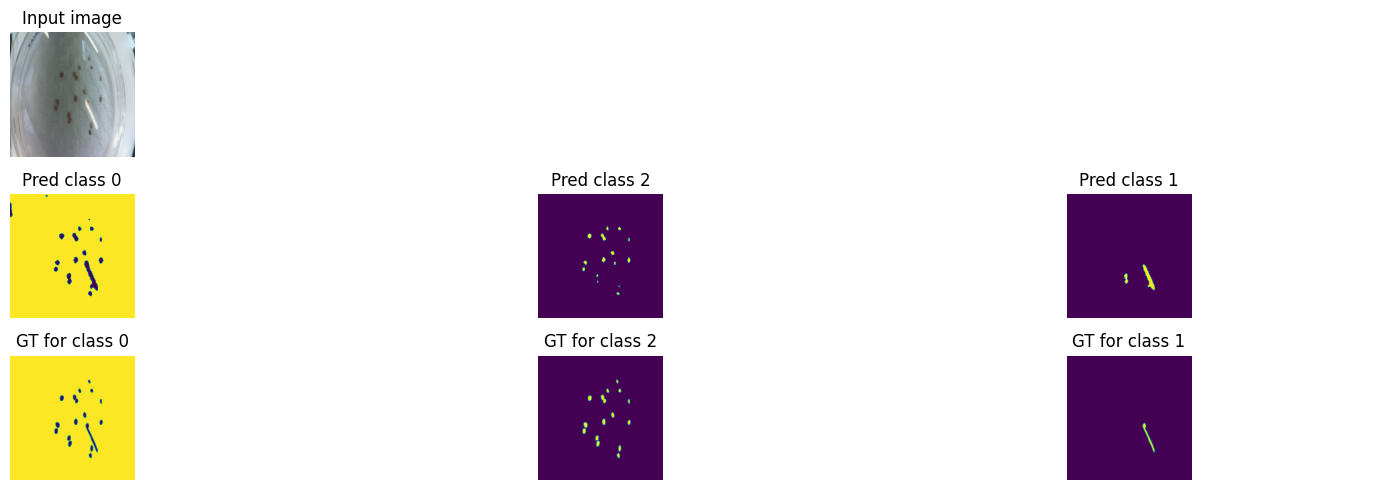

Train loss: 0.25372 | Time: 7m 15s | Val loss: 0.19557
Train_DICE_avg: 0.77653 | Train_Jaccard_avg: 0.70599 | Train_Sensitivity_avg: 0.85741 | Train_Specificity_avg: 0.92013 
Class 0 - Train_DICE: 0.98544 | Train_Jaccard: 0.97143 | Train_Sensitivity: 0.98711 | Train_Specificity: 0.77276 
Class 1 - Train_DICE: 0.54863 | Train_Jaccard: 0.47415 | Train_Sensitivity: 0.72731 | Train_Specificity: 0.99558 
Class 2 - Train_DICE: 0.79553 | Train_Jaccard: 0.67240 | Train_Sensitivity: 0.85780 | Train_Specificity: 0.99206 
Val_DICE_avg: 0.82265 | Val_Jaccard_avg: 0.76027 | Val_Sensitivity_avg: 0.89295 | Val_Specificity_avg: 0.91454 
Class 0 - Val_DICE: 0.99304 | Val_Jaccard: 0.98622 | Val_Sensitivity: 0.99683 | Val_Specificity: 0.75432 
Class 1 - Val_DICE: 0.67060 | Val_Jaccard: 0.60565 | Val_Sensitivity: 0.77521 | Val_Specificity: 0.99683 
Class 2 - Val_DICE: 0.80432 | Val_Jaccard: 0.68893 | Val_Sensitivity: 0.90682 | Val_Specificity: 0.99246 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


Train loss: 0.24053 | Time: 7m 43s | Val loss: 0.17476
Train_DICE_avg: 0.79056 | Train_Jaccard_avg: 0.72075 | Train_Sensitivity_avg: 0.87718 | Train_Specificity_avg: 0.92038 
Class 0 - Train_DICE: 0.98569 | Train_Jaccard: 0.97195 | Train_Sensitivity: 0.98798 | Train_Specificity: 0.77336 
Class 1 - Train_DICE: 0.58666 | Train_Jaccard: 0.51312 | Train_Sensitivity: 0.78148 | Train_Specificity: 0.99563 
Class 2 - Train_DICE: 0.79934 | Train_Jaccard: 0.67717 | Train_Sensitivity: 0.86207 | Train_Specificity: 0.99216 
Val_DICE_avg: 0.83133 | Val_Jaccard_avg: 0.77270 | Val_Sensitivity_avg: 0.90977 | Val_Specificity_avg: 0.91626 
Class 0 - Val_DICE: 0.99317 | Val_Jaccard: 0.98647 | Val_Sensitivity: 0.99699 | Val_Specificity: 0.75888 
Class 1 - Val_DICE: 0.67508 | Val_Jaccard: 0.61666 | Val_Sensitivity: 0.83885 | Val_Specificity: 0.99636 
Class 2 - Val_DICE: 0.82572 | Val_Jaccard: 0.71497 | Val_Sensitivity: 0.89347 | Val_Specificity: 0.99354 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]


Train loss: 0.23583 | Time: 8m 11s | Val loss: 0.17032
Train_DICE_avg: 0.79267 | Train_Jaccard_avg: 0.72385 | Train_Sensitivity_avg: 0.88506 | Train_Specificity_avg: 0.92171 
Class 0 - Train_DICE: 0.98586 | Train_Jaccard: 0.97226 | Train_Sensitivity: 0.98805 | Train_Specificity: 0.77729 
Class 1 - Train_DICE: 0.59142 | Train_Jaccard: 0.51985 | Train_Sensitivity: 0.80295 | Train_Specificity: 0.99555 
Class 2 - Train_DICE: 0.80073 | Train_Jaccard: 0.67942 | Train_Sensitivity: 0.86417 | Train_Specificity: 0.99228 
Val_DICE_avg: 0.83134 | Val_Jaccard_avg: 0.77187 | Val_Sensitivity_avg: 0.91360 | Val_Specificity_avg: 0.91938 
Class 0 - Val_DICE: 0.99360 | Val_Jaccard: 0.98732 | Val_Sensitivity: 0.99679 | Val_Specificity: 0.76876 
Class 1 - Val_DICE: 0.68477 | Val_Jaccard: 0.62587 | Val_Sensitivity: 0.83821 | Val_Specificity: 0.99642 
Class 2 - Val_DICE: 0.81565 | Val_Jaccard: 0.70241 | Val_Sensitivity: 0.90580 | Val_Specificity: 0.99295 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


Train loss: 0.23092 | Time: 8m 39s | Val loss: 0.17475
Train_DICE_avg: 0.79681 | Train_Jaccard_avg: 0.72828 | Train_Sensitivity_avg: 0.88730 | Train_Specificity_avg: 0.92102 
Class 0 - Train_DICE: 0.98578 | Train_Jaccard: 0.97210 | Train_Sensitivity: 0.98857 | Train_Specificity: 0.77512 
Class 1 - Train_DICE: 0.60091 | Train_Jaccard: 0.52954 | Train_Sensitivity: 0.80936 | Train_Specificity: 0.99558 
Class 2 - Train_DICE: 0.80374 | Train_Jaccard: 0.68320 | Train_Sensitivity: 0.86399 | Train_Specificity: 0.99237 
Val_DICE_avg: 0.83228 | Val_Jaccard_avg: 0.77196 | Val_Sensitivity_avg: 0.90457 | Val_Specificity_avg: 0.91380 
Class 0 - Val_DICE: 0.99321 | Val_Jaccard: 0.98655 | Val_Sensitivity: 0.99721 | Val_Specificity: 0.75169 
Class 1 - Val_DICE: 0.68720 | Val_Jaccard: 0.62457 | Val_Sensitivity: 0.80747 | Val_Specificity: 0.99687 
Class 2 - Val_DICE: 0.81643 | Val_Jaccard: 0.70474 | Val_Sensitivity: 0.90903 | Val_Specificity: 0.99284 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]


Train loss: 0.22770 | Time: 9m 6s | Val loss: 0.16874
Train_DICE_avg: 0.79665 | Train_Jaccard_avg: 0.72875 | Train_Sensitivity_avg: 0.88928 | Train_Specificity_avg: 0.92170 
Class 0 - Train_DICE: 0.98599 | Train_Jaccard: 0.97251 | Train_Sensitivity: 0.98870 | Train_Specificity: 0.77725 
Class 1 - Train_DICE: 0.59925 | Train_Jaccard: 0.52933 | Train_Sensitivity: 0.81129 | Train_Specificity: 0.99561 
Class 2 - Train_DICE: 0.80470 | Train_Jaccard: 0.68441 | Train_Sensitivity: 0.86784 | Train_Specificity: 0.99225 
Val_DICE_avg: 0.83732 | Val_Jaccard_avg: 0.78142 | Val_Sensitivity_avg: 0.91336 | Val_Specificity_avg: 0.91481 
Class 0 - Val_DICE: 0.99325 | Val_Jaccard: 0.98663 | Val_Sensitivity: 0.99734 | Val_Specificity: 0.75378 
Class 1 - Val_DICE: 0.68092 | Val_Jaccard: 0.62511 | Val_Sensitivity: 0.85895 | Val_Specificity: 0.99627 
Class 2 - Val_DICE: 0.83779 | Val_Jaccard: 0.73252 | Val_Sensitivity: 0.88380 | Val_Specificity: 0.99439 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


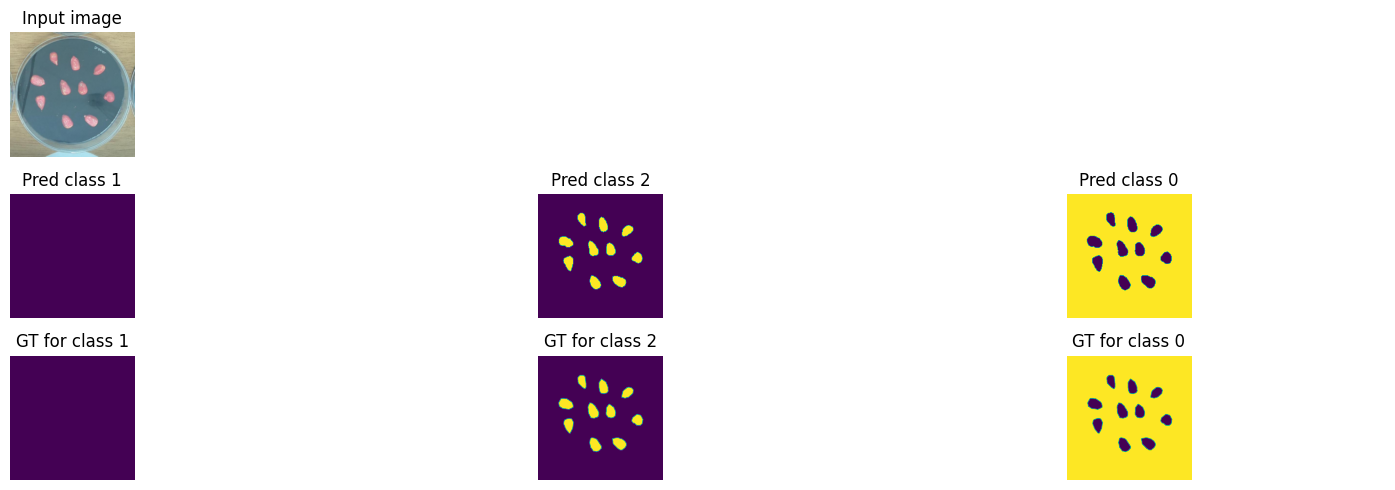

Train loss: 0.22360 | Time: 9m 35s | Val loss: 0.16269
Train_DICE_avg: 0.80013 | Train_Jaccard_avg: 0.73192 | Train_Sensitivity_avg: 0.88744 | Train_Specificity_avg: 0.92056 
Class 0 - Train_DICE: 0.98637 | Train_Jaccard: 0.97324 | Train_Sensitivity: 0.98953 | Train_Specificity: 0.77351 
Class 1 - Train_DICE: 0.60580 | Train_Jaccard: 0.53329 | Train_Sensitivity: 0.80419 | Train_Specificity: 0.99567 
Class 2 - Train_DICE: 0.80822 | Train_Jaccard: 0.68922 | Train_Sensitivity: 0.86860 | Train_Specificity: 0.99250 
Val_DICE_avg: 0.84120 | Val_Jaccard_avg: 0.78259 | Val_Sensitivity_avg: 0.91464 | Val_Specificity_avg: 0.91473 
Class 0 - Val_DICE: 0.99340 | Val_Jaccard: 0.98694 | Val_Sensitivity: 0.99742 | Val_Specificity: 0.75407 
Class 1 - Val_DICE: 0.70031 | Val_Jaccard: 0.63968 | Val_Sensitivity: 0.84117 | Val_Specificity: 0.99673 
Class 2 - Val_DICE: 0.82990 | Val_Jaccard: 0.72116 | Val_Sensitivity: 0.90533 | Val_Specificity: 0.99338 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


Train loss: 0.21926 | Time: 10m 3s | Val loss: 0.15963
Train_DICE_avg: 0.80310 | Train_Jaccard_avg: 0.73474 | Train_Sensitivity_avg: 0.88729 | Train_Specificity_avg: 0.91984 
Class 0 - Train_DICE: 0.98624 | Train_Jaccard: 0.97299 | Train_Sensitivity: 0.98991 | Train_Specificity: 0.77119 
Class 1 - Train_DICE: 0.61277 | Train_Jaccard: 0.53927 | Train_Sensitivity: 0.80114 | Train_Specificity: 0.99584 
Class 2 - Train_DICE: 0.81029 | Train_Jaccard: 0.69196 | Train_Sensitivity: 0.87080 | Train_Specificity: 0.99250 
Val_DICE_avg: 0.84443 | Val_Jaccard_avg: 0.78557 | Val_Sensitivity_avg: 0.90604 | Val_Specificity_avg: 0.91642 
Class 0 - Val_DICE: 0.99352 | Val_Jaccard: 0.98716 | Val_Sensitivity: 0.99731 | Val_Specificity: 0.75890 
Class 1 - Val_DICE: 0.70689 | Val_Jaccard: 0.64245 | Val_Sensitivity: 0.81806 | Val_Specificity: 0.99669 
Class 2 - Val_DICE: 0.83288 | Val_Jaccard: 0.72709 | Val_Sensitivity: 0.90276 | Val_Specificity: 0.99367 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


Train loss: 0.21800 | Time: 10m 30s | Val loss: 0.16119
Train_DICE_avg: 0.80487 | Train_Jaccard_avg: 0.73689 | Train_Sensitivity_avg: 0.89256 | Train_Specificity_avg: 0.92192 
Class 0 - Train_DICE: 0.98664 | Train_Jaccard: 0.97376 | Train_Sensitivity: 0.99025 | Train_Specificity: 0.77745 
Class 1 - Train_DICE: 0.61566 | Train_Jaccard: 0.54221 | Train_Sensitivity: 0.81786 | Train_Specificity: 0.99568 
Class 2 - Train_DICE: 0.81232 | Train_Jaccard: 0.69469 | Train_Sensitivity: 0.86956 | Train_Specificity: 0.99263 
Val_DICE_avg: 0.83997 | Val_Jaccard_avg: 0.78055 | Val_Sensitivity_avg: 0.91451 | Val_Specificity_avg: 0.92084 
Class 0 - Val_DICE: 0.99385 | Val_Jaccard: 0.98783 | Val_Sensitivity: 0.99726 | Val_Specificity: 0.77297 
Class 1 - Val_DICE: 0.70682 | Val_Jaccard: 0.64380 | Val_Sensitivity: 0.83210 | Val_Specificity: 0.99664 
Class 2 - Val_DICE: 0.81923 | Val_Jaccard: 0.71003 | Val_Sensitivity: 0.91417 | Val_Specificity: 0.99291 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


Train loss: 0.21376 | Time: 10m 58s | Val loss: 0.16464
Train_DICE_avg: 0.80556 | Train_Jaccard_avg: 0.73763 | Train_Sensitivity_avg: 0.89120 | Train_Specificity_avg: 0.92178 
Class 0 - Train_DICE: 0.98628 | Train_Jaccard: 0.97308 | Train_Sensitivity: 0.99024 | Train_Specificity: 0.77694 
Class 1 - Train_DICE: 0.61703 | Train_Jaccard: 0.54367 | Train_Sensitivity: 0.80887 | Train_Specificity: 0.99585 
Class 2 - Train_DICE: 0.81337 | Train_Jaccard: 0.69615 | Train_Sensitivity: 0.87449 | Train_Specificity: 0.99256 
Val_DICE_avg: 0.83972 | Val_Jaccard_avg: 0.78152 | Val_Sensitivity_avg: 0.90672 | Val_Specificity_avg: 0.91448 
Class 0 - Val_DICE: 0.99345 | Val_Jaccard: 0.98704 | Val_Sensitivity: 0.99764 | Val_Specificity: 0.75324 
Class 1 - Val_DICE: 0.69503 | Val_Jaccard: 0.63388 | Val_Sensitivity: 0.81678 | Val_Specificity: 0.99665 
Class 2 - Val_DICE: 0.83068 | Val_Jaccard: 0.72365 | Val_Sensitivity: 0.90575 | Val_Specificity: 0.99354 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]


Train loss: 0.21464 | Time: 11m 24s | Val loss: 0.15923
Train_DICE_avg: 0.80862 | Train_Jaccard_avg: 0.74144 | Train_Sensitivity_avg: 0.89582 | Train_Specificity_avg: 0.91899 
Class 0 - Train_DICE: 0.98669 | Train_Jaccard: 0.97386 | Train_Sensitivity: 0.99102 | Train_Specificity: 0.76845 
Class 1 - Train_DICE: 0.62272 | Train_Jaccard: 0.55011 | Train_Sensitivity: 0.82246 | Train_Specificity: 0.99573 
Class 2 - Train_DICE: 0.81646 | Train_Jaccard: 0.70036 | Train_Sensitivity: 0.87398 | Train_Specificity: 0.99279 
Val_DICE_avg: 0.84093 | Val_Jaccard_avg: 0.78452 | Val_Sensitivity_avg: 0.92051 | Val_Specificity_avg: 0.91868 
Class 0 - Val_DICE: 0.99370 | Val_Jaccard: 0.98751 | Val_Sensitivity: 0.99746 | Val_Specificity: 0.76588 
Class 1 - Val_DICE: 0.68862 | Val_Jaccard: 0.62975 | Val_Sensitivity: 0.86320 | Val_Specificity: 0.99616 
Class 2 - Val_DICE: 0.84047 | Val_Jaccard: 0.73630 | Val_Sensitivity: 0.90086 | Val_Specificity: 0.99401 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


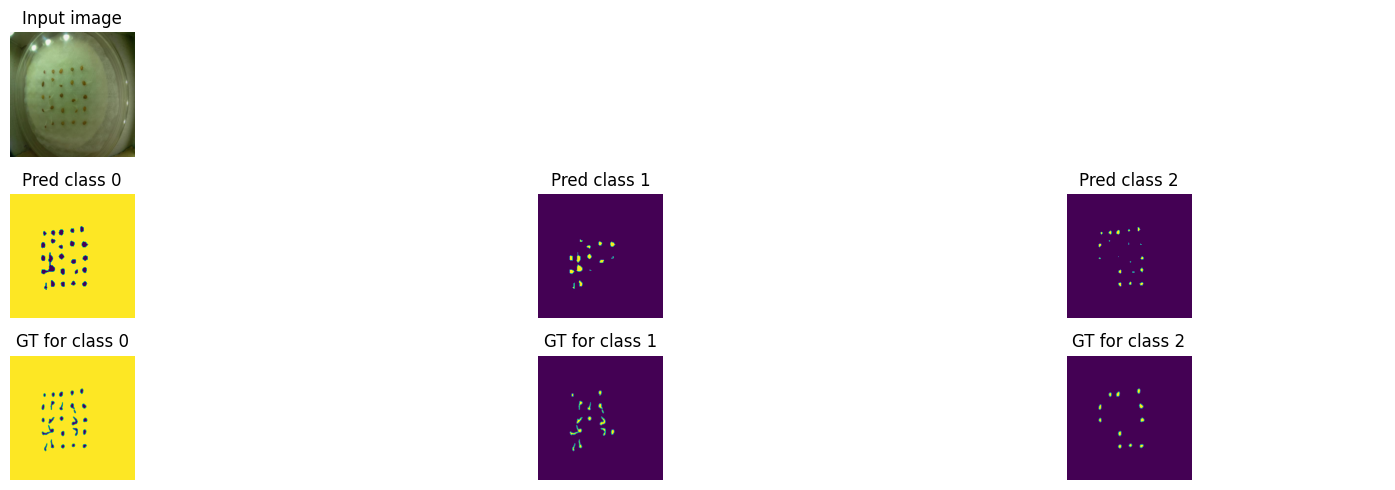

Train loss: 0.21163 | Time: 11m 52s | Val loss: 0.15747
Train_DICE_avg: 0.81037 | Train_Jaccard_avg: 0.74374 | Train_Sensitivity_avg: 0.90112 | Train_Specificity_avg: 0.92151 
Class 0 - Train_DICE: 0.98692 | Train_Jaccard: 0.97431 | Train_Sensitivity: 0.99096 | Train_Specificity: 0.77600 
Class 1 - Train_DICE: 0.62633 | Train_Jaccard: 0.55493 | Train_Sensitivity: 0.83657 | Train_Specificity: 0.99576 
Class 2 - Train_DICE: 0.81786 | Train_Jaccard: 0.70197 | Train_Sensitivity: 0.87584 | Train_Specificity: 0.99278 
Val_DICE_avg: 0.84376 | Val_Jaccard_avg: 0.78735 | Val_Sensitivity_avg: 0.91864 | Val_Specificity_avg: 0.91649 
Class 0 - Val_DICE: 0.99359 | Val_Jaccard: 0.98729 | Val_Sensitivity: 0.99771 | Val_Specificity: 0.75887 
Class 1 - Val_DICE: 0.69613 | Val_Jaccard: 0.63680 | Val_Sensitivity: 0.85029 | Val_Specificity: 0.99658 
Class 2 - Val_DICE: 0.84157 | Val_Jaccard: 0.73796 | Val_Sensitivity: 0.90792 | Val_Specificity: 0.99403 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


Train loss: 0.21185 | Time: 12m 21s | Val loss: 0.15592
Train_DICE_avg: 0.80982 | Train_Jaccard_avg: 0.74322 | Train_Sensitivity_avg: 0.90057 | Train_Specificity_avg: 0.92196 
Class 0 - Train_DICE: 0.98670 | Train_Jaccard: 0.97388 | Train_Sensitivity: 0.99094 | Train_Specificity: 0.77731 
Class 1 - Train_DICE: 0.62497 | Train_Jaccard: 0.55328 | Train_Sensitivity: 0.83439 | Train_Specificity: 0.99579 
Class 2 - Train_DICE: 0.81779 | Train_Jaccard: 0.70249 | Train_Sensitivity: 0.87636 | Train_Specificity: 0.99279 
Val_DICE_avg: 0.84563 | Val_Jaccard_avg: 0.78730 | Val_Sensitivity_avg: 0.91768 | Val_Specificity_avg: 0.91908 
Class 0 - Val_DICE: 0.99379 | Val_Jaccard: 0.98770 | Val_Sensitivity: 0.99757 | Val_Specificity: 0.76713 
Class 1 - Val_DICE: 0.71186 | Val_Jaccard: 0.64871 | Val_Sensitivity: 0.84363 | Val_Specificity: 0.99661 
Class 2 - Val_DICE: 0.83124 | Val_Jaccard: 0.72548 | Val_Sensitivity: 0.91183 | Val_Specificity: 0.99350 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


Train loss: 0.20837 | Time: 12m 49s | Val loss: 0.15194
Train_DICE_avg: 0.81446 | Train_Jaccard_avg: 0.74729 | Train_Sensitivity_avg: 0.89808 | Train_Specificity_avg: 0.92150 
Class 0 - Train_DICE: 0.98704 | Train_Jaccard: 0.97455 | Train_Sensitivity: 0.99139 | Train_Specificity: 0.77571 
Class 1 - Train_DICE: 0.63504 | Train_Jaccard: 0.56019 | Train_Sensitivity: 0.82333 | Train_Specificity: 0.99593 
Class 2 - Train_DICE: 0.82131 | Train_Jaccard: 0.70714 | Train_Sensitivity: 0.87951 | Train_Specificity: 0.99285 
Val_DICE_avg: 0.84780 | Val_Jaccard_avg: 0.78933 | Val_Sensitivity_avg: 0.91842 | Val_Specificity_avg: 0.92322 
Class 0 - Val_DICE: 0.99402 | Val_Jaccard: 0.98816 | Val_Sensitivity: 0.99760 | Val_Specificity: 0.77938 
Class 1 - Val_DICE: 0.71622 | Val_Jaccard: 0.65341 | Val_Sensitivity: 0.83708 | Val_Specificity: 0.99692 
Class 2 - Val_DICE: 0.83318 | Val_Jaccard: 0.72644 | Val_Sensitivity: 0.92057 | Val_Specificity: 0.99336 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


Train loss: 0.20524 | Time: 13m 17s | Val loss: 0.15218
Train_DICE_avg: 0.81412 | Train_Jaccard_avg: 0.74714 | Train_Sensitivity_avg: 0.89683 | Train_Specificity_avg: 0.92320 
Class 0 - Train_DICE: 0.98719 | Train_Jaccard: 0.97483 | Train_Sensitivity: 0.99141 | Train_Specificity: 0.78075 
Class 1 - Train_DICE: 0.63457 | Train_Jaccard: 0.56031 | Train_Sensitivity: 0.81903 | Train_Specificity: 0.99597 
Class 2 - Train_DICE: 0.82061 | Train_Jaccard: 0.70629 | Train_Sensitivity: 0.88005 | Train_Specificity: 0.99288 
Val_DICE_avg: 0.85058 | Val_Jaccard_avg: 0.79483 | Val_Sensitivity_avg: 0.91919 | Val_Specificity_avg: 0.92095 
Class 0 - Val_DICE: 0.99394 | Val_Jaccard: 0.98800 | Val_Sensitivity: 0.99756 | Val_Specificity: 0.77203 
Class 1 - Val_DICE: 0.70984 | Val_Jaccard: 0.64918 | Val_Sensitivity: 0.85067 | Val_Specificity: 0.99660 
Class 2 - Val_DICE: 0.84795 | Val_Jaccard: 0.74731 | Val_Sensitivity: 0.90934 | Val_Specificity: 0.99423 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Train loss: 0.20515 | Time: 13m 44s | Val loss: 0.14934
Train_DICE_avg: 0.81391 | Train_Jaccard_avg: 0.74704 | Train_Sensitivity_avg: 0.89706 | Train_Specificity_avg: 0.92323 
Class 0 - Train_DICE: 0.98726 | Train_Jaccard: 0.97497 | Train_Sensitivity: 0.99160 | Train_Specificity: 0.78081 
Class 1 - Train_DICE: 0.63175 | Train_Jaccard: 0.55721 | Train_Sensitivity: 0.81969 | Train_Specificity: 0.99593 
Class 2 - Train_DICE: 0.82271 | Train_Jaccard: 0.70892 | Train_Sensitivity: 0.87990 | Train_Specificity: 0.99295 
Val_DICE_avg: 0.85129 | Val_Jaccard_avg: 0.79419 | Val_Sensitivity_avg: 0.91627 | Val_Specificity_avg: 0.91958 
Class 0 - Val_DICE: 0.99379 | Val_Jaccard: 0.98770 | Val_Sensitivity: 0.99785 | Val_Specificity: 0.76787 
Class 1 - Val_DICE: 0.71421 | Val_Jaccard: 0.65099 | Val_Sensitivity: 0.83832 | Val_Specificity: 0.99689 
Class 2 - Val_DICE: 0.84587 | Val_Jaccard: 0.74389 | Val_Sensitivity: 0.91263 | Val_Specificity: 0.99399 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


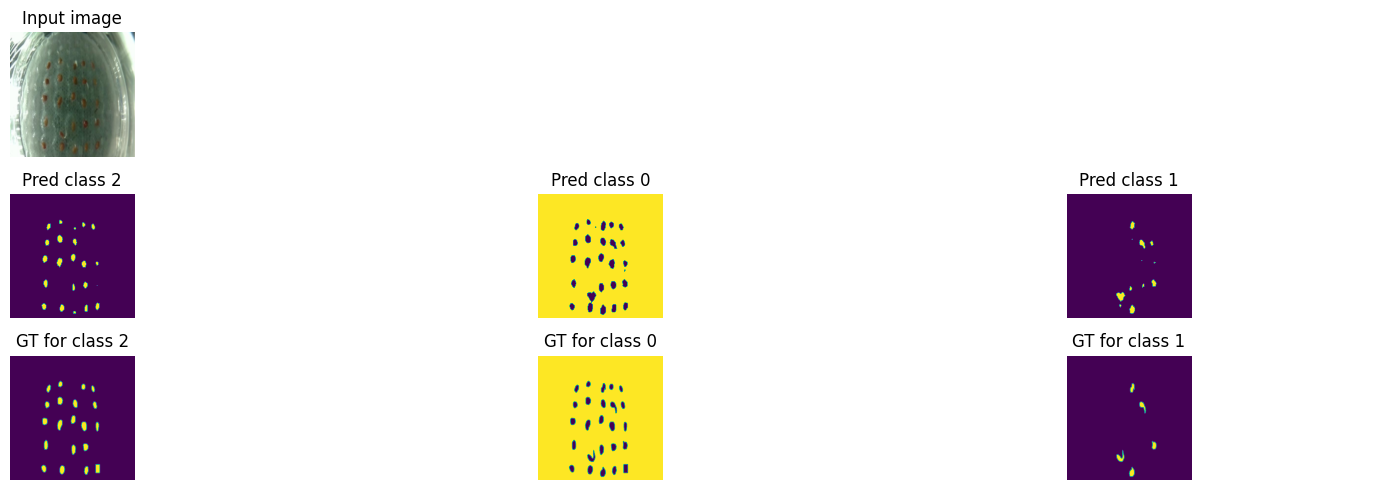

Train loss: 0.20837 | Time: 14m 13s | Val loss: 0.15490
Train_DICE_avg: 0.81591 | Train_Jaccard_avg: 0.74926 | Train_Sensitivity_avg: 0.89866 | Train_Specificity_avg: 0.92365 
Class 0 - Train_DICE: 0.98750 | Train_Jaccard: 0.97543 | Train_Sensitivity: 0.99167 | Train_Specificity: 0.78209 
Class 1 - Train_DICE: 0.63691 | Train_Jaccard: 0.56265 | Train_Sensitivity: 0.82398 | Train_Specificity: 0.99596 
Class 2 - Train_DICE: 0.82333 | Train_Jaccard: 0.70968 | Train_Sensitivity: 0.88033 | Train_Specificity: 0.99291 
Val_DICE_avg: 0.84776 | Val_Jaccard_avg: 0.79021 | Val_Sensitivity_avg: 0.91323 | Val_Specificity_avg: 0.91620 
Class 0 - Val_DICE: 0.99361 | Val_Jaccard: 0.98734 | Val_Sensitivity: 0.99805 | Val_Specificity: 0.75797 
Class 1 - Val_DICE: 0.71408 | Val_Jaccard: 0.65193 | Val_Sensitivity: 0.82187 | Val_Specificity: 0.99723 
Class 2 - Val_DICE: 0.83559 | Val_Jaccard: 0.73137 | Val_Sensitivity: 0.91976 | Val_Specificity: 0.99341 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


Train loss: 0.20250 | Time: 14m 40s | Val loss: 0.15394
Train_DICE_avg: 0.81697 | Train_Jaccard_avg: 0.75062 | Train_Sensitivity_avg: 0.90076 | Train_Specificity_avg: 0.92369 
Class 0 - Train_DICE: 0.98751 | Train_Jaccard: 0.97546 | Train_Sensitivity: 0.99189 | Train_Specificity: 0.78206 
Class 1 - Train_DICE: 0.63880 | Train_Jaccard: 0.56457 | Train_Sensitivity: 0.82690 | Train_Specificity: 0.99603 
Class 2 - Train_DICE: 0.82461 | Train_Jaccard: 0.71182 | Train_Sensitivity: 0.88349 | Train_Specificity: 0.99298 
Val_DICE_avg: 0.84778 | Val_Jaccard_avg: 0.79387 | Val_Sensitivity_avg: 0.92446 | Val_Specificity_avg: 0.92241 
Class 0 - Val_DICE: 0.99400 | Val_Jaccard: 0.98812 | Val_Sensitivity: 0.99781 | Val_Specificity: 0.77619 
Class 1 - Val_DICE: 0.69745 | Val_Jaccard: 0.64159 | Val_Sensitivity: 0.87241 | Val_Specificity: 0.99658 
Class 2 - Val_DICE: 0.85188 | Val_Jaccard: 0.75190 | Val_Sensitivity: 0.90316 | Val_Specificity: 0.99447 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]


Train loss: 0.20099 | Time: 15m 8s | Val loss: 0.14809
Train_DICE_avg: 0.81649 | Train_Jaccard_avg: 0.75012 | Train_Sensitivity_avg: 0.89947 | Train_Specificity_avg: 0.92434 
Class 0 - Train_DICE: 0.98733 | Train_Jaccard: 0.97510 | Train_Sensitivity: 0.99177 | Train_Specificity: 0.78402 
Class 1 - Train_DICE: 0.63749 | Train_Jaccard: 0.56359 | Train_Sensitivity: 0.82393 | Train_Specificity: 0.99600 
Class 2 - Train_DICE: 0.82467 | Train_Jaccard: 0.71167 | Train_Sensitivity: 0.88271 | Train_Specificity: 0.99301 
Val_DICE_avg: 0.85133 | Val_Jaccard_avg: 0.79608 | Val_Sensitivity_avg: 0.92810 | Val_Specificity_avg: 0.92542 
Class 0 - Val_DICE: 0.99408 | Val_Jaccard: 0.98827 | Val_Sensitivity: 0.99773 | Val_Specificity: 0.78536 
Class 1 - Val_DICE: 0.71186 | Val_Jaccard: 0.65327 | Val_Sensitivity: 0.87431 | Val_Specificity: 0.99670 
Class 2 - Val_DICE: 0.84805 | Val_Jaccard: 0.74670 | Val_Sensitivity: 0.91226 | Val_Specificity: 0.99419 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]


Train loss: 0.20204 | Time: 15m 35s | Val loss: 0.15205
Train_DICE_avg: 0.81679 | Train_Jaccard_avg: 0.75049 | Train_Sensitivity_avg: 0.90343 | Train_Specificity_avg: 0.92435 
Class 0 - Train_DICE: 0.98751 | Train_Jaccard: 0.97546 | Train_Sensitivity: 0.99168 | Train_Specificity: 0.78405 
Class 1 - Train_DICE: 0.63760 | Train_Jaccard: 0.56361 | Train_Sensitivity: 0.83781 | Train_Specificity: 0.99589 
Class 2 - Train_DICE: 0.82526 | Train_Jaccard: 0.71241 | Train_Sensitivity: 0.88080 | Train_Specificity: 0.99311 
Val_DICE_avg: 0.85169 | Val_Jaccard_avg: 0.79614 | Val_Sensitivity_avg: 0.91064 | Val_Specificity_avg: 0.91538 
Class 0 - Val_DICE: 0.99343 | Val_Jaccard: 0.98698 | Val_Sensitivity: 0.99818 | Val_Specificity: 0.75452 
Class 1 - Val_DICE: 0.71213 | Val_Jaccard: 0.65115 | Val_Sensitivity: 0.82474 | Val_Specificity: 0.99716 
Class 2 - Val_DICE: 0.84951 | Val_Jaccard: 0.75030 | Val_Sensitivity: 0.90900 | Val_Specificity: 0.99445 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


Train loss: 0.20228 | Time: 16m 3s | Val loss: 0.15064
Train_DICE_avg: 0.81784 | Train_Jaccard_avg: 0.75152 | Train_Sensitivity_avg: 0.90001 | Train_Specificity_avg: 0.92375 
Class 0 - Train_DICE: 0.98765 | Train_Jaccard: 0.97571 | Train_Sensitivity: 0.99212 | Train_Specificity: 0.78215 
Class 1 - Train_DICE: 0.63965 | Train_Jaccard: 0.56503 | Train_Sensitivity: 0.82526 | Train_Specificity: 0.99604 
Class 2 - Train_DICE: 0.82623 | Train_Jaccard: 0.71382 | Train_Sensitivity: 0.88266 | Train_Specificity: 0.99305 
Val_DICE_avg: 0.85142 | Val_Jaccard_avg: 0.79685 | Val_Sensitivity_avg: 0.92094 | Val_Specificity_avg: 0.92149 
Class 0 - Val_DICE: 0.99405 | Val_Jaccard: 0.98820 | Val_Sensitivity: 0.99786 | Val_Specificity: 0.77327 
Class 1 - Val_DICE: 0.70819 | Val_Jaccard: 0.64930 | Val_Sensitivity: 0.85617 | Val_Specificity: 0.99669 
Class 2 - Val_DICE: 0.85204 | Val_Jaccard: 0.75304 | Val_Sensitivity: 0.90879 | Val_Specificity: 0.99449 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


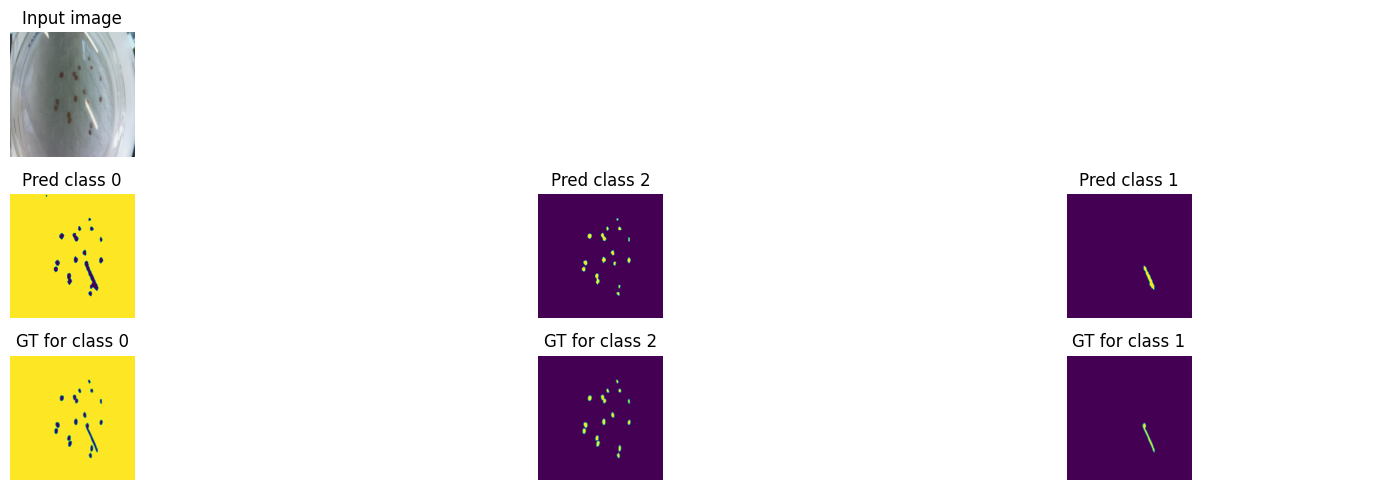

Train loss: 0.19603 | Time: 16m 32s | Val loss: 0.14595
Train_DICE_avg: 0.82204 | Train_Jaccard_avg: 0.75525 | Train_Sensitivity_avg: 0.89974 | Train_Specificity_avg: 0.92475 
Class 0 - Train_DICE: 0.98760 | Train_Jaccard: 0.97562 | Train_Sensitivity: 0.99199 | Train_Specificity: 0.78495 
Class 1 - Train_DICE: 0.65032 | Train_Jaccard: 0.57358 | Train_Sensitivity: 0.82159 | Train_Specificity: 0.99616 
Class 2 - Train_DICE: 0.82820 | Train_Jaccard: 0.71655 | Train_Sensitivity: 0.88566 | Train_Specificity: 0.99315 
Val_DICE_avg: 0.85298 | Val_Jaccard_avg: 0.79528 | Val_Sensitivity_avg: 0.92273 | Val_Specificity_avg: 0.92722 
Class 0 - Val_DICE: 0.99438 | Val_Jaccard: 0.98886 | Val_Sensitivity: 0.99761 | Val_Specificity: 0.79126 
Class 1 - Val_DICE: 0.72083 | Val_Jaccard: 0.65648 | Val_Sensitivity: 0.84795 | Val_Specificity: 0.99678 
Class 2 - Val_DICE: 0.84375 | Val_Jaccard: 0.74051 | Val_Sensitivity: 0.92264 | Val_Specificity: 0.99362 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]


Train loss: 0.19865 | Time: 17m 2s | Val loss: 0.14019
Train_DICE_avg: 0.82196 | Train_Jaccard_avg: 0.75547 | Train_Sensitivity_avg: 0.90209 | Train_Specificity_avg: 0.92522 
Class 0 - Train_DICE: 0.98789 | Train_Jaccard: 0.97619 | Train_Sensitivity: 0.99225 | Train_Specificity: 0.78645 
Class 1 - Train_DICE: 0.64901 | Train_Jaccard: 0.57256 | Train_Sensitivity: 0.82827 | Train_Specificity: 0.99609 
Class 2 - Train_DICE: 0.82897 | Train_Jaccard: 0.71766 | Train_Sensitivity: 0.88574 | Train_Specificity: 0.99313 
Val_DICE_avg: 0.86117 | Val_Jaccard_avg: 0.80506 | Val_Sensitivity_avg: 0.92142 | Val_Specificity_avg: 0.92405 
Class 0 - Val_DICE: 0.99417 | Val_Jaccard: 0.98845 | Val_Sensitivity: 0.99782 | Val_Specificity: 0.78088 
Class 1 - Val_DICE: 0.73649 | Val_Jaccard: 0.67237 | Val_Sensitivity: 0.84995 | Val_Specificity: 0.99694 
Class 2 - Val_DICE: 0.85286 | Val_Jaccard: 0.75437 | Val_Sensitivity: 0.91649 | Val_Specificity: 0.99433 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 7/7 [00:02<00:00,  3.25it/s]


Train loss: 0.19421 | Time: 17m 30s | Val loss: 0.13767
Train_DICE_avg: 0.82640 | Train_Jaccard_avg: 0.76091 | Train_Sensitivity_avg: 0.90741 | Train_Specificity_avg: 0.92485 
Class 0 - Train_DICE: 0.98787 | Train_Jaccard: 0.97616 | Train_Sensitivity: 0.99217 | Train_Specificity: 0.78508 
Class 1 - Train_DICE: 0.65836 | Train_Jaccard: 0.58335 | Train_Sensitivity: 0.84202 | Train_Specificity: 0.99614 
Class 2 - Train_DICE: 0.83298 | Train_Jaccard: 0.72322 | Train_Sensitivity: 0.88804 | Train_Specificity: 0.99334 
Val_DICE_avg: 0.86300 | Val_Jaccard_avg: 0.80720 | Val_Sensitivity_avg: 0.92962 | Val_Specificity_avg: 0.92268 
Class 0 - Val_DICE: 0.99417 | Val_Jaccard: 0.98846 | Val_Sensitivity: 0.99789 | Val_Specificity: 0.77699 
Class 1 - Val_DICE: 0.74288 | Val_Jaccard: 0.68076 | Val_Sensitivity: 0.87180 | Val_Specificity: 0.99692 
Class 2 - Val_DICE: 0.85196 | Val_Jaccard: 0.75239 | Val_Sensitivity: 0.91918 | Val_Specificity: 0.99412 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]


Train loss: 0.19512 | Time: 17m 59s | Val loss: 0.13850
Train_DICE_avg: 0.82364 | Train_Jaccard_avg: 0.75700 | Train_Sensitivity_avg: 0.90439 | Train_Specificity_avg: 0.92422 
Class 0 - Train_DICE: 0.98778 | Train_Jaccard: 0.97598 | Train_Sensitivity: 0.99217 | Train_Specificity: 0.78342 
Class 1 - Train_DICE: 0.65283 | Train_Jaccard: 0.57568 | Train_Sensitivity: 0.83297 | Train_Specificity: 0.99607 
Class 2 - Train_DICE: 0.83031 | Train_Jaccard: 0.71932 | Train_Sensitivity: 0.88803 | Train_Specificity: 0.99316 
Val_DICE_avg: 0.86259 | Val_Jaccard_avg: 0.80647 | Val_Sensitivity_avg: 0.92445 | Val_Specificity_avg: 0.92100 
Class 0 - Val_DICE: 0.99406 | Val_Jaccard: 0.98822 | Val_Sensitivity: 0.99796 | Val_Specificity: 0.77173 
Class 1 - Val_DICE: 0.73705 | Val_Jaccard: 0.67161 | Val_Sensitivity: 0.86545 | Val_Specificity: 0.99658 
Class 2 - Val_DICE: 0.85667 | Val_Jaccard: 0.75958 | Val_Sensitivity: 0.90995 | Val_Specificity: 0.99468 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Train loss: 0.19211 | Time: 18m 27s | Val loss: 0.13910
Train_DICE_avg: 0.82662 | Train_Jaccard_avg: 0.76062 | Train_Sensitivity_avg: 0.90629 | Train_Specificity_avg: 0.92651 
Class 0 - Train_DICE: 0.98818 | Train_Jaccard: 0.97674 | Train_Sensitivity: 0.99230 | Train_Specificity: 0.79013 
Class 1 - Train_DICE: 0.65940 | Train_Jaccard: 0.58268 | Train_Sensitivity: 0.83924 | Train_Specificity: 0.99609 
Class 2 - Train_DICE: 0.83229 | Train_Jaccard: 0.72243 | Train_Sensitivity: 0.88731 | Train_Specificity: 0.99332 
Val_DICE_avg: 0.86277 | Val_Jaccard_avg: 0.80556 | Val_Sensitivity_avg: 0.92242 | Val_Specificity_avg: 0.92117 
Class 0 - Val_DICE: 0.99407 | Val_Jaccard: 0.98825 | Val_Sensitivity: 0.99801 | Val_Specificity: 0.77258 
Class 1 - Val_DICE: 0.74805 | Val_Jaccard: 0.68292 | Val_Sensitivity: 0.84658 | Val_Specificity: 0.99697 
Class 2 - Val_DICE: 0.84618 | Val_Jaccard: 0.74551 | Val_Sensitivity: 0.92266 | Val_Specificity: 0.99397 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


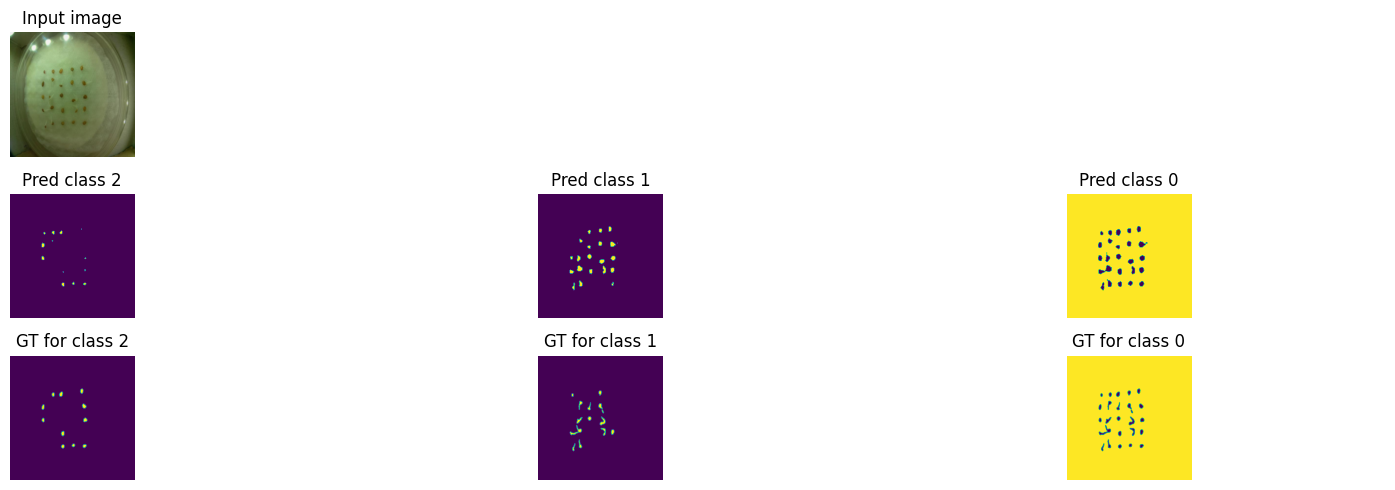

Train loss: 0.19141 | Time: 18m 56s | Val loss: 0.13984
Train_DICE_avg: 0.82843 | Train_Jaccard_avg: 0.76228 | Train_Sensitivity_avg: 0.90579 | Train_Specificity_avg: 0.92566 
Class 0 - Train_DICE: 0.98795 | Train_Jaccard: 0.97630 | Train_Sensitivity: 0.99231 | Train_Specificity: 0.78757 
Class 1 - Train_DICE: 0.66418 | Train_Jaccard: 0.58729 | Train_Sensitivity: 0.83345 | Train_Specificity: 0.99626 
Class 2 - Train_DICE: 0.83315 | Train_Jaccard: 0.72326 | Train_Sensitivity: 0.89162 | Train_Specificity: 0.99316 
Val_DICE_avg: 0.86362 | Val_Jaccard_avg: 0.80737 | Val_Sensitivity_avg: 0.91971 | Val_Specificity_avg: 0.92111 
Class 0 - Val_DICE: 0.99412 | Val_Jaccard: 0.98834 | Val_Sensitivity: 0.99792 | Val_Specificity: 0.77202 
Class 1 - Val_DICE: 0.74212 | Val_Jaccard: 0.67590 | Val_Sensitivity: 0.84206 | Val_Specificity: 0.99680 
Class 2 - Val_DICE: 0.85463 | Val_Jaccard: 0.75788 | Val_Sensitivity: 0.91915 | Val_Specificity: 0.99450 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


Train loss: 0.19107 | Time: 19m 25s | Val loss: 0.13766
Train_DICE_avg: 0.82936 | Train_Jaccard_avg: 0.76326 | Train_Sensitivity_avg: 0.90667 | Train_Specificity_avg: 0.92412 
Class 0 - Train_DICE: 0.98788 | Train_Jaccard: 0.97617 | Train_Sensitivity: 0.99255 | Train_Specificity: 0.78281 
Class 1 - Train_DICE: 0.66506 | Train_Jaccard: 0.58745 | Train_Sensitivity: 0.83794 | Train_Specificity: 0.99618 
Class 2 - Train_DICE: 0.83515 | Train_Jaccard: 0.72617 | Train_Sensitivity: 0.88951 | Train_Specificity: 0.99335 
Val_DICE_avg: 0.86228 | Val_Jaccard_avg: 0.80494 | Val_Sensitivity_avg: 0.92197 | Val_Specificity_avg: 0.92220 
Class 0 - Val_DICE: 0.99410 | Val_Jaccard: 0.98831 | Val_Sensitivity: 0.99798 | Val_Specificity: 0.77560 
Class 1 - Val_DICE: 0.74333 | Val_Jaccard: 0.67623 | Val_Sensitivity: 0.84693 | Val_Specificity: 0.99687 
Class 2 - Val_DICE: 0.84940 | Val_Jaccard: 0.75029 | Val_Sensitivity: 0.92099 | Val_Specificity: 0.99413 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


Train loss: 0.19311 | Time: 19m 54s | Val loss: 0.13609
Train_DICE_avg: 0.82813 | Train_Jaccard_avg: 0.76192 | Train_Sensitivity_avg: 0.90521 | Train_Specificity_avg: 0.92713 
Class 0 - Train_DICE: 0.98851 | Train_Jaccard: 0.97739 | Train_Sensitivity: 0.99243 | Train_Specificity: 0.79200 
Class 1 - Train_DICE: 0.66239 | Train_Jaccard: 0.58464 | Train_Sensitivity: 0.83209 | Train_Specificity: 0.99616 
Class 2 - Train_DICE: 0.83347 | Train_Jaccard: 0.72372 | Train_Sensitivity: 0.89111 | Train_Specificity: 0.99324 
Val_DICE_avg: 0.86575 | Val_Jaccard_avg: 0.81014 | Val_Sensitivity_avg: 0.92893 | Val_Specificity_avg: 0.92103 
Class 0 - Val_DICE: 0.99402 | Val_Jaccard: 0.98814 | Val_Sensitivity: 0.99810 | Val_Specificity: 0.77155 
Class 1 - Val_DICE: 0.74908 | Val_Jaccard: 0.68464 | Val_Sensitivity: 0.86680 | Val_Specificity: 0.99706 
Class 2 - Val_DICE: 0.85414 | Val_Jaccard: 0.75765 | Val_Sensitivity: 0.92188 | Val_Specificity: 0.99448 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]


Train loss: 0.18799 | Time: 20m 23s | Val loss: 0.13428
Train_DICE_avg: 0.82905 | Train_Jaccard_avg: 0.76259 | Train_Sensitivity_avg: 0.90192 | Train_Specificity_avg: 0.92644 
Class 0 - Train_DICE: 0.98811 | Train_Jaccard: 0.97662 | Train_Sensitivity: 0.99260 | Train_Specificity: 0.78975 
Class 1 - Train_DICE: 0.66496 | Train_Jaccard: 0.58657 | Train_Sensitivity: 0.82196 | Train_Specificity: 0.99627 
Class 2 - Train_DICE: 0.83407 | Train_Jaccard: 0.72460 | Train_Sensitivity: 0.89121 | Train_Specificity: 0.99330 
Val_DICE_avg: 0.86555 | Val_Jaccard_avg: 0.80938 | Val_Sensitivity_avg: 0.92886 | Val_Specificity_avg: 0.92335 
Class 0 - Val_DICE: 0.99424 | Val_Jaccard: 0.98858 | Val_Sensitivity: 0.99793 | Val_Specificity: 0.77893 
Class 1 - Val_DICE: 0.75060 | Val_Jaccard: 0.68585 | Val_Sensitivity: 0.86469 | Val_Specificity: 0.99692 
Class 2 - Val_DICE: 0.85182 | Val_Jaccard: 0.75372 | Val_Sensitivity: 0.92396 | Val_Specificity: 0.99421 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]


Train loss: 0.18841 | Time: 20m 51s | Val loss: 0.13326
Train_DICE_avg: 0.83116 | Train_Jaccard_avg: 0.76539 | Train_Sensitivity_avg: 0.90480 | Train_Specificity_avg: 0.92749 
Class 0 - Train_DICE: 0.98834 | Train_Jaccard: 0.97705 | Train_Sensitivity: 0.99256 | Train_Specificity: 0.79280 
Class 1 - Train_DICE: 0.66860 | Train_Jaccard: 0.59110 | Train_Sensitivity: 0.83024 | Train_Specificity: 0.99630 
Class 2 - Train_DICE: 0.83655 | Train_Jaccard: 0.72801 | Train_Sensitivity: 0.89160 | Train_Specificity: 0.99338 
Val_DICE_avg: 0.86758 | Val_Jaccard_avg: 0.81336 | Val_Sensitivity_avg: 0.93174 | Val_Specificity_avg: 0.92226 
Class 0 - Val_DICE: 0.99413 | Val_Jaccard: 0.98836 | Val_Sensitivity: 0.99804 | Val_Specificity: 0.77512 
Class 1 - Val_DICE: 0.74784 | Val_Jaccard: 0.68527 | Val_Sensitivity: 0.88093 | Val_Specificity: 0.99686 
Class 2 - Val_DICE: 0.86077 | Val_Jaccard: 0.76644 | Val_Sensitivity: 0.91624 | Val_Specificity: 0.99482 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


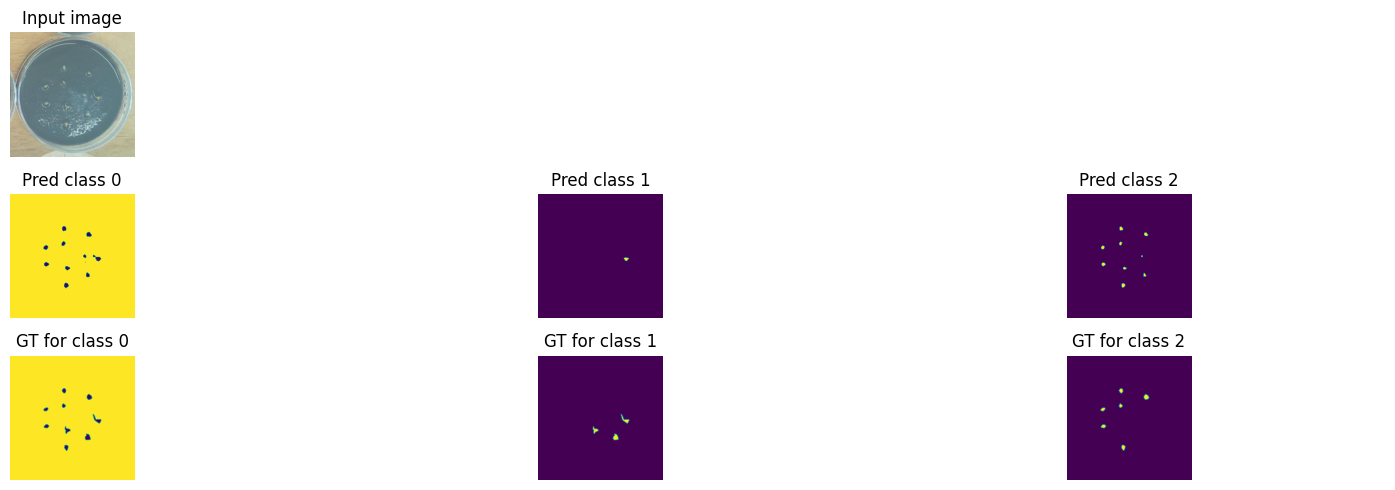

Train loss: 0.18972 | Time: 21m 20s | Val loss: 0.13341
Train_DICE_avg: 0.83243 | Train_Jaccard_avg: 0.76712 | Train_Sensitivity_avg: 0.91037 | Train_Specificity_avg: 0.92719 
Class 0 - Train_DICE: 0.98846 | Train_Jaccard: 0.97730 | Train_Sensitivity: 0.99292 | Train_Specificity: 0.79194 
Class 1 - Train_DICE: 0.67296 | Train_Jaccard: 0.59653 | Train_Sensitivity: 0.84528 | Train_Specificity: 0.99628 
Class 2 - Train_DICE: 0.83585 | Train_Jaccard: 0.72751 | Train_Sensitivity: 0.89292 | Train_Specificity: 0.99335 
Val_DICE_avg: 0.86896 | Val_Jaccard_avg: 0.81404 | Val_Sensitivity_avg: 0.92648 | Val_Specificity_avg: 0.92008 
Class 0 - Val_DICE: 0.99397 | Val_Jaccard: 0.98806 | Val_Sensitivity: 0.99814 | Val_Specificity: 0.76848 
Class 1 - Val_DICE: 0.75288 | Val_Jaccard: 0.68871 | Val_Sensitivity: 0.86647 | Val_Specificity: 0.99702 
Class 2 - Val_DICE: 0.86004 | Val_Jaccard: 0.76536 | Val_Sensitivity: 0.91484 | Val_Specificity: 0.99475 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]


Train loss: 0.18643 | Time: 21m 50s | Val loss: 0.13240
Train_DICE_avg: 0.83175 | Train_Jaccard_avg: 0.76579 | Train_Sensitivity_avg: 0.90711 | Train_Specificity_avg: 0.92820 
Class 0 - Train_DICE: 0.98837 | Train_Jaccard: 0.97712 | Train_Sensitivity: 0.99242 | Train_Specificity: 0.79507 
Class 1 - Train_DICE: 0.67131 | Train_Jaccard: 0.59346 | Train_Sensitivity: 0.83431 | Train_Specificity: 0.99634 
Class 2 - Train_DICE: 0.83556 | Train_Jaccard: 0.72679 | Train_Sensitivity: 0.89460 | Train_Specificity: 0.99320 
Val_DICE_avg: 0.86708 | Val_Jaccard_avg: 0.81131 | Val_Sensitivity_avg: 0.93230 | Val_Specificity_avg: 0.92661 
Class 0 - Val_DICE: 0.99442 | Val_Jaccard: 0.98893 | Val_Sensitivity: 0.99785 | Val_Specificity: 0.78873 
Class 1 - Val_DICE: 0.75041 | Val_Jaccard: 0.68565 | Val_Sensitivity: 0.87717 | Val_Specificity: 0.99674 
Class 2 - Val_DICE: 0.85642 | Val_Jaccard: 0.75933 | Val_Sensitivity: 0.92187 | Val_Specificity: 0.99436 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Train loss: 0.18604 | Time: 22m 19s | Val loss: 0.13221
Train_DICE_avg: 0.83323 | Train_Jaccard_avg: 0.76712 | Train_Sensitivity_avg: 0.90989 | Train_Specificity_avg: 0.92823 
Class 0 - Train_DICE: 0.98807 | Train_Jaccard: 0.97654 | Train_Sensitivity: 0.99239 | Train_Specificity: 0.79505 
Class 1 - Train_DICE: 0.67586 | Train_Jaccard: 0.59751 | Train_Sensitivity: 0.84667 | Train_Specificity: 0.99623 
Class 2 - Train_DICE: 0.83577 | Train_Jaccard: 0.72731 | Train_Sensitivity: 0.89061 | Train_Specificity: 0.99342 
Val_DICE_avg: 0.86815 | Val_Jaccard_avg: 0.81250 | Val_Sensitivity_avg: 0.92817 | Val_Specificity_avg: 0.92501 
Class 0 - Val_DICE: 0.99427 | Val_Jaccard: 0.98864 | Val_Sensitivity: 0.99798 | Val_Specificity: 0.78368 
Class 1 - Val_DICE: 0.75162 | Val_Jaccard: 0.68663 | Val_Sensitivity: 0.86770 | Val_Specificity: 0.99681 
Class 2 - Val_DICE: 0.85858 | Val_Jaccard: 0.76224 | Val_Sensitivity: 0.91884 | Val_Specificity: 0.99454 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


Train loss: 0.18472 | Time: 22m 48s | Val loss: 0.13236
Train_DICE_avg: 0.83436 | Train_Jaccard_avg: 0.76887 | Train_Sensitivity_avg: 0.91022 | Train_Specificity_avg: 0.92613 
Class 0 - Train_DICE: 0.98825 | Train_Jaccard: 0.97688 | Train_Sensitivity: 0.99286 | Train_Specificity: 0.78871 
Class 1 - Train_DICE: 0.67694 | Train_Jaccard: 0.59988 | Train_Sensitivity: 0.84221 | Train_Specificity: 0.99633 
Class 2 - Train_DICE: 0.83788 | Train_Jaccard: 0.72986 | Train_Sensitivity: 0.89558 | Train_Specificity: 0.99333 
Val_DICE_avg: 0.86770 | Val_Jaccard_avg: 0.81237 | Val_Sensitivity_avg: 0.92824 | Val_Specificity_avg: 0.92429 
Class 0 - Val_DICE: 0.99429 | Val_Jaccard: 0.98868 | Val_Sensitivity: 0.99801 | Val_Specificity: 0.78147 
Class 1 - Val_DICE: 0.75125 | Val_Jaccard: 0.68682 | Val_Sensitivity: 0.86477 | Val_Specificity: 0.99689 
Class 2 - Val_DICE: 0.85755 | Val_Jaccard: 0.76162 | Val_Sensitivity: 0.92195 | Val_Specificity: 0.99451 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]


Train loss: 0.18393 | Time: 23m 17s | Val loss: 0.13115
Train_DICE_avg: 0.83557 | Train_Jaccard_avg: 0.77016 | Train_Sensitivity_avg: 0.91066 | Train_Specificity_avg: 0.92645 
Class 0 - Train_DICE: 0.98808 | Train_Jaccard: 0.97656 | Train_Sensitivity: 0.99266 | Train_Specificity: 0.78951 
Class 1 - Train_DICE: 0.68019 | Train_Jaccard: 0.60284 | Train_Sensitivity: 0.84544 | Train_Specificity: 0.99634 
Class 2 - Train_DICE: 0.83845 | Train_Jaccard: 0.73108 | Train_Sensitivity: 0.89387 | Train_Specificity: 0.99350 
Val_DICE_avg: 0.86887 | Val_Jaccard_avg: 0.81348 | Val_Sensitivity_avg: 0.93140 | Val_Specificity_avg: 0.92614 
Class 0 - Val_DICE: 0.99441 | Val_Jaccard: 0.98892 | Val_Sensitivity: 0.99793 | Val_Specificity: 0.78708 
Class 1 - Val_DICE: 0.75302 | Val_Jaccard: 0.68813 | Val_Sensitivity: 0.87450 | Val_Specificity: 0.99685 
Class 2 - Val_DICE: 0.85917 | Val_Jaccard: 0.76339 | Val_Sensitivity: 0.92176 | Val_Specificity: 0.99450 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]


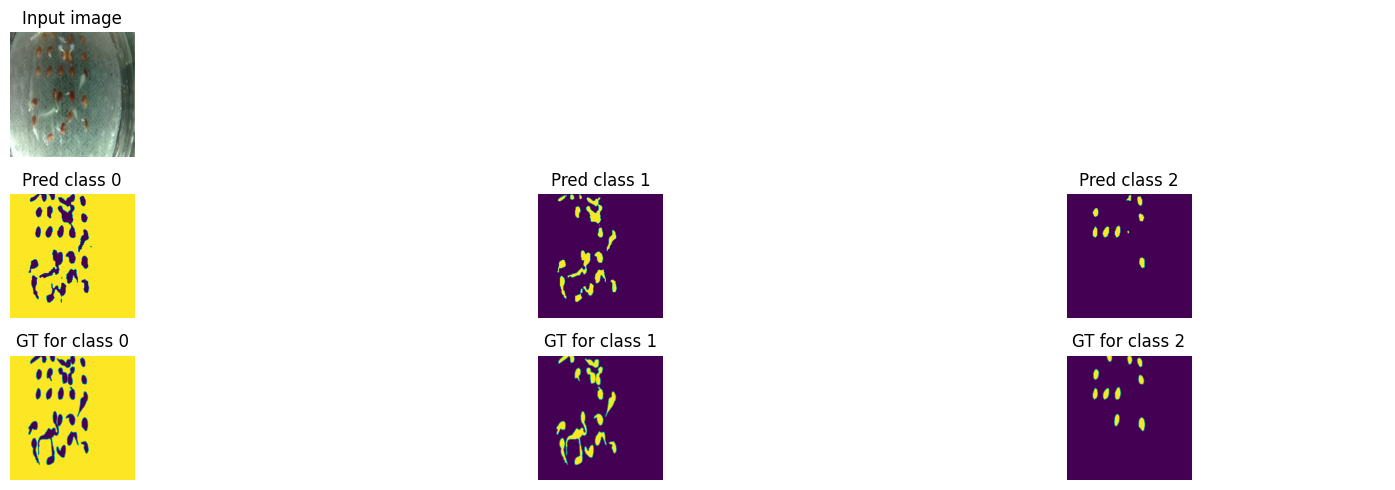

Train loss: 0.18655 | Time: 23m 46s | Val loss: 0.13079
Train_DICE_avg: 0.83288 | Train_Jaccard_avg: 0.76758 | Train_Sensitivity_avg: 0.91102 | Train_Specificity_avg: 0.92709 
Class 0 - Train_DICE: 0.98845 | Train_Jaccard: 0.97728 | Train_Sensitivity: 0.99274 | Train_Specificity: 0.79163 
Class 1 - Train_DICE: 0.67234 | Train_Jaccard: 0.59543 | Train_Sensitivity: 0.84609 | Train_Specificity: 0.99627 
Class 2 - Train_DICE: 0.83784 | Train_Jaccard: 0.73002 | Train_Sensitivity: 0.89424 | Train_Specificity: 0.99336 
Val_DICE_avg: 0.86950 | Val_Jaccard_avg: 0.81448 | Val_Sensitivity_avg: 0.93027 | Val_Specificity_avg: 0.92473 
Class 0 - Val_DICE: 0.99432 | Val_Jaccard: 0.98874 | Val_Sensitivity: 0.99796 | Val_Specificity: 0.78281 
Class 1 - Val_DICE: 0.75420 | Val_Jaccard: 0.69000 | Val_Sensitivity: 0.87210 | Val_Specificity: 0.99688 
Class 2 - Val_DICE: 0.85999 | Val_Jaccard: 0.76471 | Val_Sensitivity: 0.92073 | Val_Specificity: 0.99448 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]


Train loss: 0.18605 | Time: 24m 14s | Val loss: 0.13048
Train_DICE_avg: 0.83326 | Train_Jaccard_avg: 0.76768 | Train_Sensitivity_avg: 0.91371 | Train_Specificity_avg: 0.92719 
Class 0 - Train_DICE: 0.98843 | Train_Jaccard: 0.97722 | Train_Sensitivity: 0.99264 | Train_Specificity: 0.79196 
Class 1 - Train_DICE: 0.67333 | Train_Jaccard: 0.59595 | Train_Sensitivity: 0.85449 | Train_Specificity: 0.99623 
Class 2 - Train_DICE: 0.83802 | Train_Jaccard: 0.72988 | Train_Sensitivity: 0.89400 | Train_Specificity: 0.99337 
Val_DICE_avg: 0.87079 | Val_Jaccard_avg: 0.81425 | Val_Sensitivity_avg: 0.92659 | Val_Specificity_avg: 0.92293 
Class 0 - Val_DICE: 0.99423 | Val_Jaccard: 0.98857 | Val_Sensitivity: 0.99803 | Val_Specificity: 0.77746 
Class 1 - Val_DICE: 0.76351 | Val_Jaccard: 0.69670 | Val_Sensitivity: 0.85654 | Val_Specificity: 0.99715 
Class 2 - Val_DICE: 0.85463 | Val_Jaccard: 0.75747 | Val_Sensitivity: 0.92520 | Val_Specificity: 0.99417 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


Train loss: 0.18114 | Time: 24m 41s | Val loss: 0.13056
Train_DICE_avg: 0.83628 | Train_Jaccard_avg: 0.77031 | Train_Sensitivity_avg: 0.91097 | Train_Specificity_avg: 0.92830 
Class 0 - Train_DICE: 0.98803 | Train_Jaccard: 0.97647 | Train_Sensitivity: 0.99236 | Train_Specificity: 0.79523 
Class 1 - Train_DICE: 0.68297 | Train_Jaccard: 0.60451 | Train_Sensitivity: 0.84539 | Train_Specificity: 0.99631 
Class 2 - Train_DICE: 0.83785 | Train_Jaccard: 0.72996 | Train_Sensitivity: 0.89516 | Train_Specificity: 0.99337 
Val_DICE_avg: 0.86981 | Val_Jaccard_avg: 0.81362 | Val_Sensitivity_avg: 0.92897 | Val_Specificity_avg: 0.92609 
Class 0 - Val_DICE: 0.99444 | Val_Jaccard: 0.98898 | Val_Sensitivity: 0.99794 | Val_Specificity: 0.78710 
Class 1 - Val_DICE: 0.75894 | Val_Jaccard: 0.69274 | Val_Sensitivity: 0.86128 | Val_Specificity: 0.99702 
Class 2 - Val_DICE: 0.85605 | Val_Jaccard: 0.75914 | Val_Sensitivity: 0.92768 | Val_Specificity: 0.99416 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]


Train loss: 0.18260 | Time: 25m 9s | Val loss: 0.12953
Train_DICE_avg: 0.83378 | Train_Jaccard_avg: 0.76779 | Train_Sensitivity_avg: 0.90505 | Train_Specificity_avg: 0.92745 
Class 0 - Train_DICE: 0.98826 | Train_Jaccard: 0.97690 | Train_Sensitivity: 0.99292 | Train_Specificity: 0.79266 
Class 1 - Train_DICE: 0.67523 | Train_Jaccard: 0.59651 | Train_Sensitivity: 0.82768 | Train_Specificity: 0.99632 
Class 2 - Train_DICE: 0.83785 | Train_Jaccard: 0.72995 | Train_Sensitivity: 0.89455 | Train_Specificity: 0.99338 
Val_DICE_avg: 0.87020 | Val_Jaccard_avg: 0.81457 | Val_Sensitivity_avg: 0.92964 | Val_Specificity_avg: 0.92579 
Class 0 - Val_DICE: 0.99438 | Val_Jaccard: 0.98885 | Val_Sensitivity: 0.99792 | Val_Specificity: 0.78603 
Class 1 - Val_DICE: 0.75635 | Val_Jaccard: 0.68984 | Val_Sensitivity: 0.87027 | Val_Specificity: 0.99676 
Class 2 - Val_DICE: 0.85988 | Val_Jaccard: 0.76501 | Val_Sensitivity: 0.92073 | Val_Specificity: 0.99457 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


Train loss: 0.18081 | Time: 25m 37s | Val loss: 0.12855
Train_DICE_avg: 0.83665 | Train_Jaccard_avg: 0.77063 | Train_Sensitivity_avg: 0.91001 | Train_Specificity_avg: 0.92716 
Class 0 - Train_DICE: 0.98819 | Train_Jaccard: 0.97676 | Train_Sensitivity: 0.99266 | Train_Specificity: 0.79171 
Class 1 - Train_DICE: 0.68331 | Train_Jaccard: 0.60419 | Train_Sensitivity: 0.84304 | Train_Specificity: 0.99636 
Class 2 - Train_DICE: 0.83847 | Train_Jaccard: 0.73095 | Train_Sensitivity: 0.89432 | Train_Specificity: 0.99341 
Val_DICE_avg: 0.87227 | Val_Jaccard_avg: 0.81714 | Val_Sensitivity_avg: 0.92766 | Val_Specificity_avg: 0.92411 
Class 0 - Val_DICE: 0.99426 | Val_Jaccard: 0.98863 | Val_Sensitivity: 0.99802 | Val_Specificity: 0.78075 
Class 1 - Val_DICE: 0.76105 | Val_Jaccard: 0.69533 | Val_Sensitivity: 0.86259 | Val_Specificity: 0.99703 
Class 2 - Val_DICE: 0.86150 | Val_Jaccard: 0.76747 | Val_Sensitivity: 0.92237 | Val_Specificity: 0.99455 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]


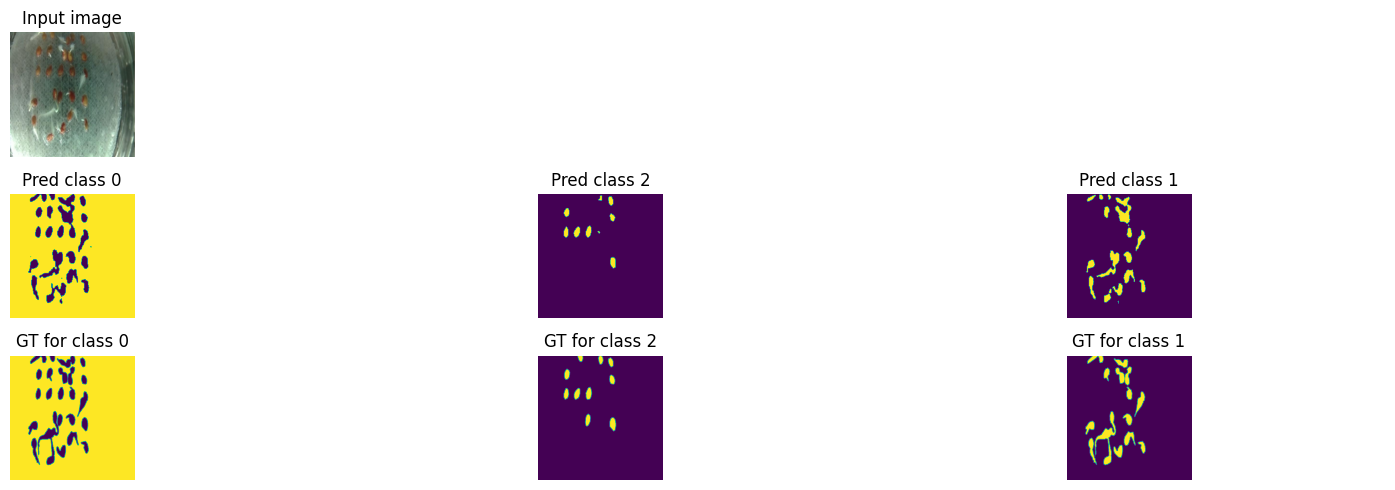

Train loss: 0.18405 | Time: 26m 4s | Val loss: 0.13239
Train_DICE_avg: 0.83718 | Train_Jaccard_avg: 0.77143 | Train_Sensitivity_avg: 0.91031 | Train_Specificity_avg: 0.92758 
Class 0 - Train_DICE: 0.98843 | Train_Jaccard: 0.97723 | Train_Sensitivity: 0.99289 | Train_Specificity: 0.79304 
Class 1 - Train_DICE: 0.68418 | Train_Jaccard: 0.60555 | Train_Sensitivity: 0.84363 | Train_Specificity: 0.99627 
Class 2 - Train_DICE: 0.83894 | Train_Jaccard: 0.73150 | Train_Sensitivity: 0.89440 | Train_Specificity: 0.99343 
Val_DICE_avg: 0.86775 | Val_Jaccard_avg: 0.81281 | Val_Sensitivity_avg: 0.92634 | Val_Specificity_avg: 0.92472 
Class 0 - Val_DICE: 0.99434 | Val_Jaccard: 0.98879 | Val_Sensitivity: 0.99800 | Val_Specificity: 0.78270 
Class 1 - Val_DICE: 0.74878 | Val_Jaccard: 0.68447 | Val_Sensitivity: 0.85728 | Val_Specificity: 0.99697 
Class 2 - Val_DICE: 0.86013 | Val_Jaccard: 0.76516 | Val_Sensitivity: 0.92373 | Val_Specificity: 0.99449 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]


Train loss: 0.18367 | Time: 26m 32s | Val loss: 0.13030
Train_DICE_avg: 0.83701 | Train_Jaccard_avg: 0.77132 | Train_Sensitivity_avg: 0.91006 | Train_Specificity_avg: 0.92640 
Class 0 - Train_DICE: 0.98840 | Train_Jaccard: 0.97717 | Train_Sensitivity: 0.99308 | Train_Specificity: 0.78941 
Class 1 - Train_DICE: 0.68343 | Train_Jaccard: 0.60511 | Train_Sensitivity: 0.83967 | Train_Specificity: 0.99643 
Class 2 - Train_DICE: 0.83919 | Train_Jaccard: 0.73167 | Train_Sensitivity: 0.89743 | Train_Specificity: 0.99335 
Val_DICE_avg: 0.87060 | Val_Jaccard_avg: 0.81652 | Val_Sensitivity_avg: 0.93066 | Val_Specificity_avg: 0.92447 
Class 0 - Val_DICE: 0.99431 | Val_Jaccard: 0.98871 | Val_Sensitivity: 0.99799 | Val_Specificity: 0.78183 
Class 1 - Val_DICE: 0.75453 | Val_Jaccard: 0.69154 | Val_Sensitivity: 0.87337 | Val_Specificity: 0.99682 
Class 2 - Val_DICE: 0.86296 | Val_Jaccard: 0.76930 | Val_Sensitivity: 0.92061 | Val_Specificity: 0.99476 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


Train loss: 0.18252 | Time: 27m 0s | Val loss: 0.13004
Train_DICE_avg: 0.83645 | Train_Jaccard_avg: 0.77098 | Train_Sensitivity_avg: 0.91022 | Train_Specificity_avg: 0.92957 
Class 0 - Train_DICE: 0.98877 | Train_Jaccard: 0.97789 | Train_Sensitivity: 0.99286 | Train_Specificity: 0.79888 
Class 1 - Train_DICE: 0.68082 | Train_Jaccard: 0.60215 | Train_Sensitivity: 0.84083 | Train_Specificity: 0.99642 
Class 2 - Train_DICE: 0.83975 | Train_Jaccard: 0.73289 | Train_Sensitivity: 0.89698 | Train_Specificity: 0.99341 
Val_DICE_avg: 0.87094 | Val_Jaccard_avg: 0.81623 | Val_Sensitivity_avg: 0.92809 | Val_Specificity_avg: 0.92350 
Class 0 - Val_DICE: 0.99424 | Val_Jaccard: 0.98859 | Val_Sensitivity: 0.99807 | Val_Specificity: 0.77883 
Class 1 - Val_DICE: 0.75769 | Val_Jaccard: 0.69320 | Val_Sensitivity: 0.86171 | Val_Specificity: 0.99708 
Class 2 - Val_DICE: 0.86089 | Val_Jaccard: 0.76692 | Val_Sensitivity: 0.92449 | Val_Specificity: 0.99460 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]


Train loss: 0.17977 | Time: 27m 29s | Val loss: 0.12926
Train_DICE_avg: 0.83783 | Train_Jaccard_avg: 0.77222 | Train_Sensitivity_avg: 0.91090 | Train_Specificity_avg: 0.92872 
Class 0 - Train_DICE: 0.98837 | Train_Jaccard: 0.97713 | Train_Sensitivity: 0.99258 | Train_Specificity: 0.79634 
Class 1 - Train_DICE: 0.68461 | Train_Jaccard: 0.60605 | Train_Sensitivity: 0.84355 | Train_Specificity: 0.99637 
Class 2 - Train_DICE: 0.84051 | Train_Jaccard: 0.73349 | Train_Sensitivity: 0.89658 | Train_Specificity: 0.99346 
Val_DICE_avg: 0.87263 | Val_Jaccard_avg: 0.81834 | Val_Sensitivity_avg: 0.93061 | Val_Specificity_avg: 0.92389 
Class 0 - Val_DICE: 0.99425 | Val_Jaccard: 0.98860 | Val_Sensitivity: 0.99804 | Val_Specificity: 0.77993 
Class 1 - Val_DICE: 0.75924 | Val_Jaccard: 0.69503 | Val_Sensitivity: 0.87394 | Val_Specificity: 0.99688 
Class 2 - Val_DICE: 0.86441 | Val_Jaccard: 0.77138 | Val_Sensitivity: 0.91986 | Val_Specificity: 0.99487 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


Train loss: 0.18040 | Time: 27m 58s | Val loss: 0.13125
Train_DICE_avg: 0.83838 | Train_Jaccard_avg: 0.77257 | Train_Sensitivity_avg: 0.91316 | Train_Specificity_avg: 0.92881 
Class 0 - Train_DICE: 0.98853 | Train_Jaccard: 0.97743 | Train_Sensitivity: 0.99281 | Train_Specificity: 0.79667 
Class 1 - Train_DICE: 0.68810 | Train_Jaccard: 0.60916 | Train_Sensitivity: 0.85001 | Train_Specificity: 0.99636 
Class 2 - Train_DICE: 0.83852 | Train_Jaccard: 0.73113 | Train_Sensitivity: 0.89666 | Train_Specificity: 0.99340 
Val_DICE_avg: 0.86973 | Val_Jaccard_avg: 0.81544 | Val_Sensitivity_avg: 0.92797 | Val_Specificity_avg: 0.92422 
Class 0 - Val_DICE: 0.99431 | Val_Jaccard: 0.98872 | Val_Sensitivity: 0.99798 | Val_Specificity: 0.78109 
Class 1 - Val_DICE: 0.75253 | Val_Jaccard: 0.68907 | Val_Sensitivity: 0.86482 | Val_Specificity: 0.99690 
Class 2 - Val_DICE: 0.86235 | Val_Jaccard: 0.76852 | Val_Sensitivity: 0.92110 | Val_Specificity: 0.99465 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]


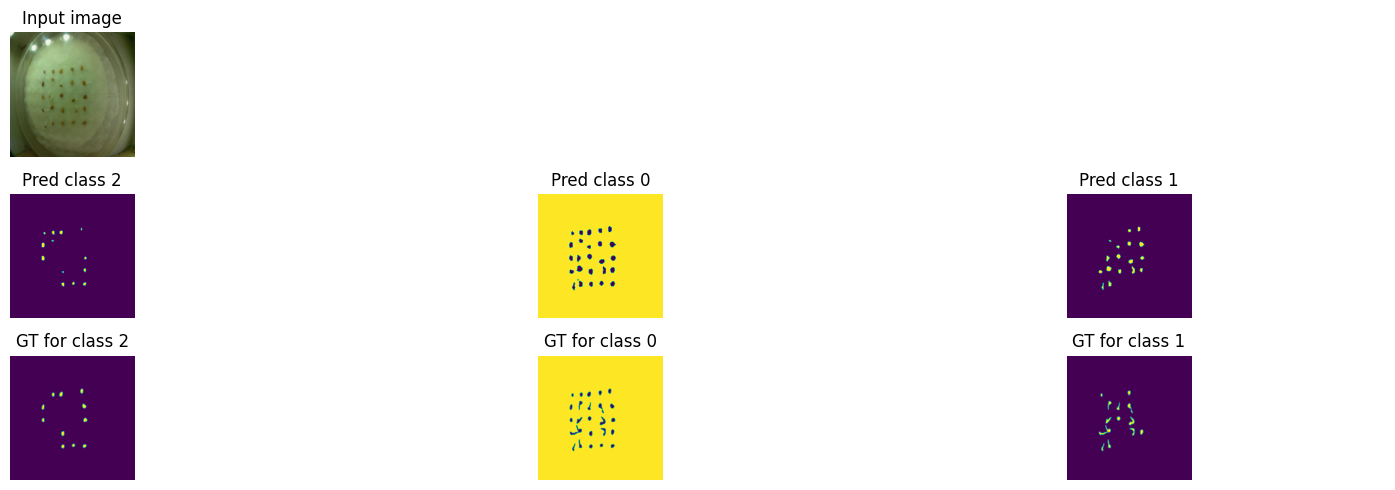

Train loss: 0.18423 | Time: 28m 26s | Val loss: 0.12859
Train_DICE_avg: 0.83489 | Train_Jaccard_avg: 0.76898 | Train_Sensitivity_avg: 0.90847 | Train_Specificity_avg: 0.92815 
Class 0 - Train_DICE: 0.98837 | Train_Jaccard: 0.97713 | Train_Sensitivity: 0.99264 | Train_Specificity: 0.79466 
Class 1 - Train_DICE: 0.67742 | Train_Jaccard: 0.59841 | Train_Sensitivity: 0.83678 | Train_Specificity: 0.99636 
Class 2 - Train_DICE: 0.83886 | Train_Jaccard: 0.73139 | Train_Sensitivity: 0.89598 | Train_Specificity: 0.99342 
Val_DICE_avg: 0.87208 | Val_Jaccard_avg: 0.81736 | Val_Sensitivity_avg: 0.92964 | Val_Specificity_avg: 0.92347 
Class 0 - Val_DICE: 0.99425 | Val_Jaccard: 0.98859 | Val_Sensitivity: 0.99806 | Val_Specificity: 0.77875 
Class 1 - Val_DICE: 0.75905 | Val_Jaccard: 0.69398 | Val_Sensitivity: 0.86820 | Val_Specificity: 0.99694 
Class 2 - Val_DICE: 0.86295 | Val_Jaccard: 0.76950 | Val_Sensitivity: 0.92266 | Val_Specificity: 0.99473 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▃▃▄▄▅▅▅▆▇▇▇▇▇▇█████████████████████████
wandb:       Training Jaccard ▁▃▄▄▄▅▅▆▇▇▇▇▇▇▇█████████████████████████
wandb:          Training Loss █▇▆▅▅▄▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▃▄▄▄▅▅▆▆▇██████████████████████████████
wandb:   Training Specificity ▁▄▆▇▇█▇▇████████████████████████████████
wandb:        Validation DICE ▁▁▂▃▃▄▄▅▅▆▇▇▇▇▇█▇▇██████████████████████
wandb:     Validation Jaccard ▁▁▂▃▄▄▅▅▆▇▇▇▇▇▇▇▇███████████████████████
wandb:        Validation Loss ██▇▆▅▅▄▄▃▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▂▂▃▃▄▄▅▇▇██████████████████████████████
wandb: Validation Specificity ▁▆██▇▅▄▄▄▄▄▄▄▄▄▄▄▄▄▄▅▅▄▄▅▄▄▅▅▄▅▅▅▅▅▅▅▅▅▅
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.83489
wandb:       Training Jaccard 0.76898
wandb:          Training Loss 0.18


Training complete!


In [41]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [42]:
model = DeepLabV3Plus(backbone=config["Backbone"],in_channels=config["Input size"][0],
             out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [43]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]



Global Performance Metrics:
Loss mean: 0.14427, std: 0.02357
Dice Coefficient mean: 0.83943, std: 0.12585
Jaccard Index mean: 0.77828, std: 0.14062
Sensitivity mean: 0.83199, std: 0.12393
Specificity mean: 0.97073, std: 0.03209

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.99414, std: 0.00291
Jaccard mean: 0.98837, std: 0.00571
Sensitivity mean: 0.99104, std: 0.00440
Specificity mean: 0.91672, std: 0.09619

Class 1:
Dice mean: 0.68106, std: 0.34492
Jaccard mean: 0.60950, std: 0.36012
Sensitivity mean: 0.69283, std: 0.33951
Specificity mean: 0.99829, std: 0.00308

Class 2:
Dice mean: 0.84308, std: 0.08222
Jaccard mean: 0.73697, std: 0.11437
Sensitivity mean: 0.81211, std: 0.10138
Specificity mean: 0.99718, std: 0.00209
